# Machine Learning Mini Project - 1

### Domain Knowledege

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

### Problem Statement:

1. What is the relationship between temperature and bike rental demand in the bike-sharing system, and how does this relationship vary with different seasons?
2. Can we predict bike rental demand  based on weather conditions (temperature, humidity, windspeed) and time-related features (hour, day of the week, month)?
3. Are there any interaction effects between multiple weather variables (e.g., temperature and humidity) that significantly influence bike rental demand, and can we incorporate these interactions into a predictive model for better accuracy?

### Libraries used: Sklearn, Matplotlib, Seaborn, Sklearn, and VertezML

Note: I have used vertezML library for experimentation purpose which will be helpful for me to compare with other frameworks like sklearn in terms of performance, how it handles massive computation process, and most importantly it will help me to identify backlogs and improve it.
- Github Repository: https://github.com/ravinthiranpartheepan1407/vertez
- Py Pakage: https://pypi.org/project/vertezml/
- Documentation: www.vertez.org (In Progress)

#### Feel Free to leave any suggestions or feedback if you have any related to any ML math metric!

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vertezml as vz
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score

### Read training data

In [244]:
read_train_dat = pd.read_csv("C:/Users/ravin/KTU/Machine Learning/bike-rental-ML-Model/bike-sharing-demand/train.csv")
read_train_dat.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [245]:
read_train_dat.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [246]:
read_test_dat = pd.read_csv("C:/Users/ravin/KTU/Machine Learning/bike-rental-ML-Model/bike-sharing-demand/test.csv")
read_test_dat.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [247]:
read_test_dat.describe()

season      holiday   workingday      weather         temp  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean      2.493300     0.029108     0.685815     1.436778    20.620607   
std       1.091258     0.168123     0.464226     0.648390     8.059583   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    21.320000   
75%       3.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    40.180000   

             atemp     humidity    windspeed  
count  6493.000000  6493.000000  6493.000000  
mean     24.012865    64.125212    12.631157  
std       8.782741    19.293391     8.250151  
min       0.000000    16.000000     0.000000  
25%      16.665000    49.000000     7.001500  
50%      25.000000    65.000000    11.001400  
75%      31.060000    81.000000    16.997900  
max      50.000000   100.000000    55.998600

### Data Quality Test

- Checking for null values using isna()
- Below you can see there are no null values present in any features

In [248]:
# Checking if there are any null values
check_na_train = read_train_dat.isna().sum()
print(check_na_train)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [249]:
check_na_test = read_test_dat.isna().sum()
print(check_na_test)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


### Data Distribution

- Most of important features follows Gamma Distribution but indicates the presence of kurtosis with negative type.
- Based on the visualization, the tails of the distribution grows slowly and that indicates Platykurtic type which means it has fewer negative or positive value.
- This type of kurtosis follows beta distrbution which looks slightly different from normal distribution.
- In general, most of the values are located in mean and only fewer values are located in the tails.

[Text(0.5, 1.0, 'Frequency of Temp Feature'),
 Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Frequency')]

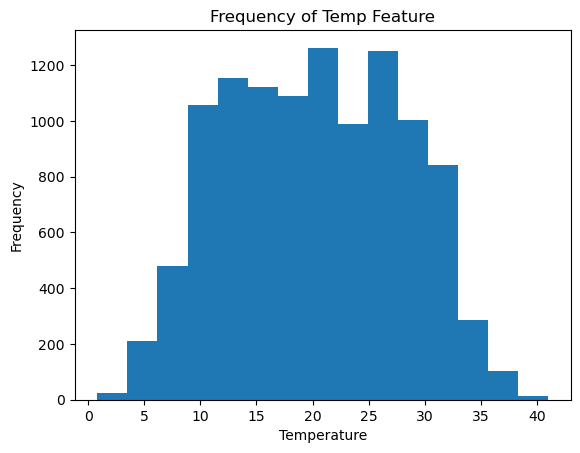

In [250]:
# Chekcing the distribution of features [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed]
# Data Distribution analysis for the feature[temp]
plt.hist(read_train_dat['temp'], bins=15)
plt.gca().set(title="Frequency of Temp Feature", xlabel="Temperature", ylabel="Frequency")

[Text(0.5, 1.0, 'Frequency of aTemp Feature'),
 Text(0.5, 0, 'aTemp'),
 Text(0, 0.5, 'Frequency')]

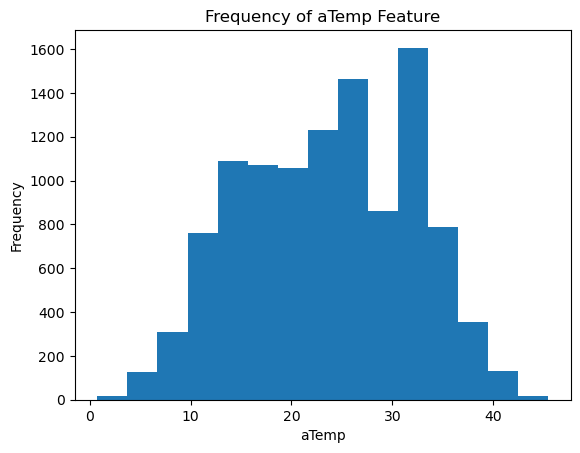

In [251]:
# Chekcing data distribution for the feature[atemp]
plt.hist(read_train_dat['atemp'], bins=15)
plt.gca().set(title="Frequency of aTemp Feature", xlabel="aTemp", ylabel="Frequency")

[Text(0.5, 1.0, 'Frequency of Humidity Feature'),
 Text(0.5, 0, 'Humidity'),
 Text(0, 0.5, 'Frequency')]

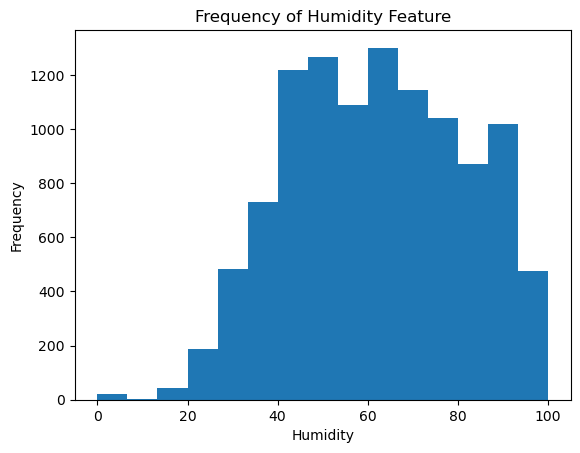

In [252]:
plt.hist(read_train_dat['humidity'], bins=15)
plt.gca().set(title="Frequency of Humidity Feature", xlabel="Humidity", ylabel="Frequency")

[Text(0.5, 1.0, 'Frequency of Windspeed Feature'),
 Text(0.5, 0, 'Windspeed'),
 Text(0, 0.5, 'Frequency')]

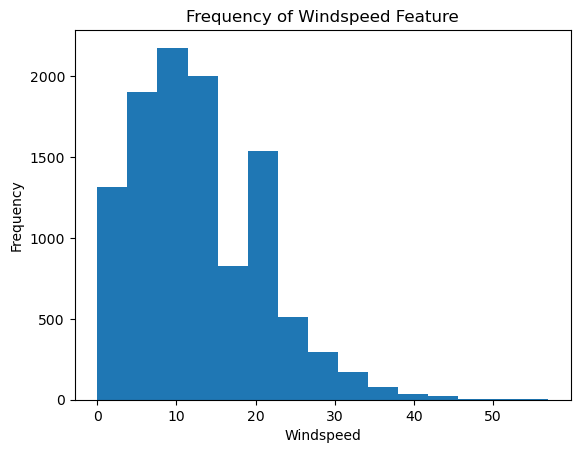

In [253]:
plt.hist(read_train_dat['windspeed'], bins=15)
plt.gca().set(title="Frequency of Windspeed Feature", xlabel="Windspeed", ylabel="Frequency")

### Kurtosis Check

- Kurtosis check using vz.kurtosis()
- If the kurtosis value > 3, it indicates there are extreme values or outliers
- if the kurtosis value is < 3, it indicates the data follows normal distribution but slight different which represents there are only few extreme values.
- if the kurtosis value = 3, then the data follows the normal distribution

In [254]:
kurt_train_temp = vz.kurtosis(read_train_dat['temp'])
print("Kurtosis Value of temperature: ", kurt_train_temp)

Kurtosis Value of temperature:  -7.800590824876997e-05


In [255]:
kurt_train_atemp = vz.kurtosis(read_train_dat['atemp'])
print('Kurotsis value of aTemp: ', kurt_train_atemp)

Kurotsis value of aTemp:  -0.0001458035561740416


In [256]:
kurt_train_humidity = vz.kurtosis(read_train_dat['humidity'])
print("Kurtosis value of Humidity: ", kurt_train_humidity)

Kurtosis value of Humidity:  -0.00683050305038565


In [257]:
kurt_train_windspeed = vz.kurtosis(read_train_dat["windspeed"])
print("Kurtosis value of windpseed: ", kurt_train_windspeed)

Kurtosis value of windpseed:  -1.2497638475702703e-05


### Normalizing Kurtosis

- Normalizing kurtosis level to follow normal distribution

In [258]:
# Refernce: https://www.researchgate.net/post/Is_there_a_transformations_for_normalizing_kurtotic_data
norm_temp = vz.zscore(read_train_dat['temp']) # Using z-score normalization

[Text(0.5, 1.0, 'Frequency of Temperature Feature'),
 Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Frequency')]

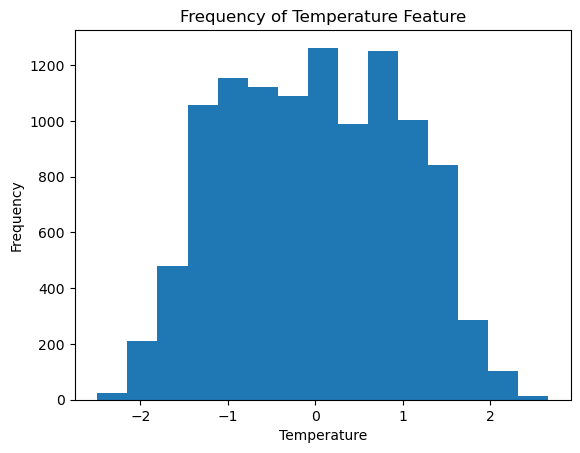

In [259]:
plt.hist(norm_temp, bins=15)
plt.gca().set(title="Frequency of Temperature Feature", xlabel="Temperature", ylabel="Frequency")

In [260]:
kurt_train_norm_temp = vz.kurtosis(norm_temp)
print("Normalized Value of temperature: ", kurt_train_norm_temp)

Normalized Value of temperature:  2.9277282848111227e-61


In [261]:
norm_atemp = vz.zscore(read_train_dat['atemp']) # Using z-score normalization

[Text(0.5, 1.0, 'Frequency of aTemperature Feature'),
 Text(0.5, 0, 'aTemperature'),
 Text(0, 0.5, 'Frequency')]

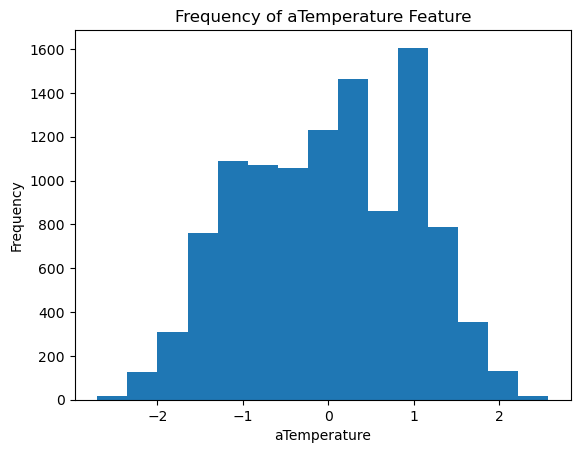

In [262]:
plt.hist(norm_atemp, bins=15)
plt.gca().set(title="Frequency of aTemperature Feature", xlabel="aTemperature", ylabel="Frequency")

In [263]:
kurt_train_norm_atemp = vz.kurtosis(norm_atemp)
print("Normalized Value of atemperature: ", kurt_train_norm_atemp)

Normalized Value of atemperature:  1.2506350475675257e-58


[Text(0.5, 1.0, 'Frequency of Humidity Feature'),
 Text(0.5, 0, 'Humidity'),
 Text(0, 0.5, 'Frequency')]

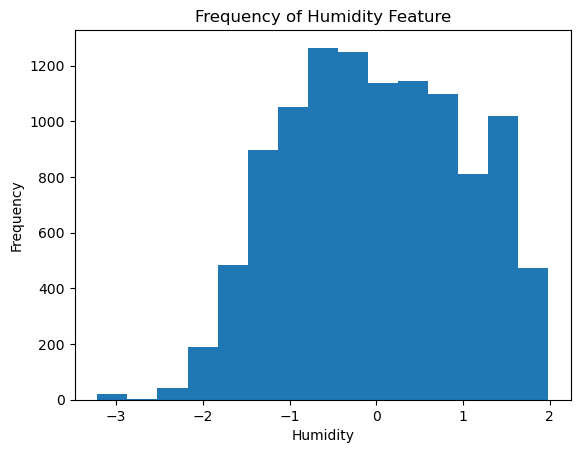

In [264]:
norm_humidity = vz.zscore(read_train_dat['humidity']) # Using z-score normalization
plt.hist(norm_humidity, bins=15)
plt.gca().set(title="Frequency of Humidity Feature", xlabel="Humidity", ylabel="Frequency")

In [265]:
kurt_train_norm_humidity = vz.kurtosis(norm_humidity)
print("Normalized Value of Humidity: ", kurt_train_norm_humidity)

Normalized Value of Humidity:  1.5189774992492025e-62


[Text(0.5, 1.0, 'Frequency of Windspeed Feature'),
 Text(0.5, 0, 'Windspeed'),
 Text(0, 0.5, 'Frequency')]

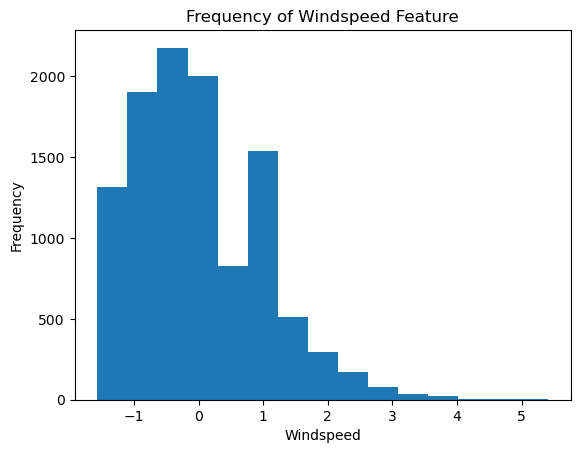

In [266]:
norm_windspeed = vz.zscore(read_train_dat['windspeed']) # Using z-score normalization

plt.hist(norm_windspeed, bins=15)
plt.gca().set(title="Frequency of Windspeed Feature", xlabel="Windspeed", ylabel="Frequency")

In [267]:
kurt_train_norm_windspeed = vz.kurtosis(norm_windspeed)
print("Normalized Value of Windspeed: ", kurt_train_norm_windspeed)

Normalized Value of Windspeed:  3.6146551603245605e-57


In [268]:
# Converting datetime format

read_train_dat['datetime'] = pd.to_datetime(read_train_dat['datetime'])
read_train_dat['year'] = read_train_dat['datetime'].dt.year
read_train_dat['month'] = read_train_dat['datetime'].dt.month
read_train_dat['day'] = read_train_dat['datetime'].dt.day
read_train_dat['hour'] = read_train_dat['datetime'].dt.hour
read_train_dat.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2  
3        75        0.0       3          10     13  2011      1    1     3  
4        75        0.0       0           1      1  2011      1    1     4

In [269]:
# Replacing the season categories with strings
# Based on kaggle competition '1 - represents spring, 2 - summer, 3 - fall, 4 - winter'
# Using dict where key takes {1,2,3,4} and values {Spring, summer, ...}
read_train_dat['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
read_train_dat.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00  Spring        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00  Spring        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00  Spring        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00  Spring        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2  
3        75        0.0       3          10     13  2011      1    1     3  
4        75        0.0       0           1      1  2011      1    1     4

In [270]:
# Like we transformed the season data {1,2,3,4} to strings, we do the same for holiday, weather, month, day and workinday
read_train_dat['holiday'].replace({0: 'Not Holiday', 1: 'Holiday'}, inplace=True)
read_train_dat['workingday'].replace({0: 'NoWorkingDay', 1: 'WorkingDay'}, inplace=True)
read_train_dat['weather'].replace({1: 'ClearSky', 2: 'Fog', 3: 'Raining', 4: 'Snowing'}, inplace=True)
read_train_dat['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
read_train_dat['day'].replace({1: 'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday',7:'Sunday'}, inplace=True)
read_train_dat.head()

datetime  season      holiday    workingday   weather  temp  \
0 2011-01-01 00:00:00  Spring  Not Holiday  NoWorkingDay  ClearSky  9.84   
1 2011-01-01 01:00:00  Spring  Not Holiday  NoWorkingDay  ClearSky  9.02   
2 2011-01-01 02:00:00  Spring  Not Holiday  NoWorkingDay  ClearSky  9.02   
3 2011-01-01 03:00:00  Spring  Not Holiday  NoWorkingDay  ClearSky  9.84   
4 2011-01-01 04:00:00  Spring  Not Holiday  NoWorkingDay  ClearSky  9.84   

    atemp  humidity  windspeed  casual  registered  count  year month     day  \
0  14.395        81        0.0       3          13     16  2011   Jan  Monday   
1  13.635        80        0.0       8          32     40  2011   Jan  Monday   
2  13.635        80        0.0       5          27     32  2011   Jan  Monday   
3  14.395        75        0.0       3          10     13  2011   Jan  Monday   
4  14.395        75        0.0       0           1      1  2011   Jan  Monday   

   hour  
0     0  
1     1  
2     2  
3     3  
4     4

In [271]:
# Appending Categorical Features
read_train_cat = read_train_dat[['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day']]
for features in read_train_cat:
    print(read_train_cat[features])

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
10881    Winter
10882    Winter
10883    Winter
10884    Winter
10885    Winter
Name: season, Length: 10886, dtype: object
0        Not Holiday
1        Not Holiday
2        Not Holiday
3        Not Holiday
4        Not Holiday
            ...     
10881    Not Holiday
10882    Not Holiday
10883    Not Holiday
10884    Not Holiday
10885    Not Holiday
Name: holiday, Length: 10886, dtype: object
0        NoWorkingDay
1        NoWorkingDay
2        NoWorkingDay
3        NoWorkingDay
4        NoWorkingDay
             ...     
10881      WorkingDay
10882      WorkingDay
10883      WorkingDay
10884      WorkingDay
10885      WorkingDay
Name: workingday, Length: 10886, dtype: object
0        ClearSky
1        ClearSky
2        ClearSky
3        ClearSky
4        ClearSky
           ...   
10881    ClearSky
10882    ClearSky
10883    ClearSky
10884    ClearSky
10885    ClearSky
Name: weather, Leng

Text(0, 0.5, 'Count')

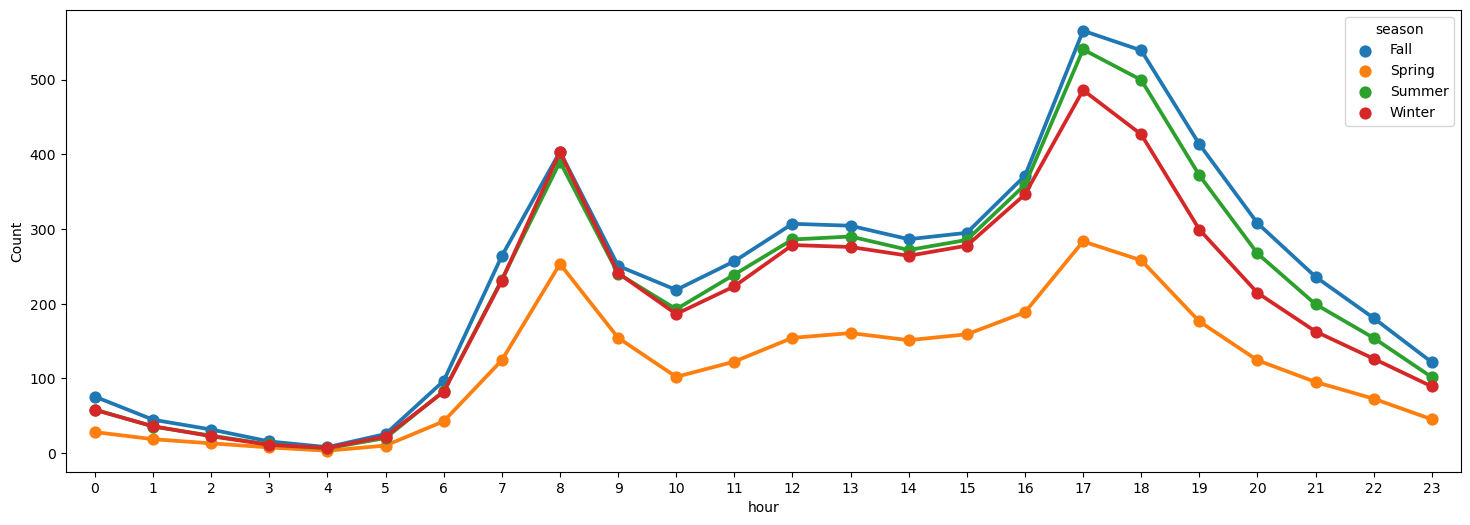

In [272]:
# Mean count of bike rental in each season
read_train_dat['datetime'] = pd.to_datetime(read_train_dat['datetime'])
read_train_dat['hour'] = read_train_dat['datetime'].dt.hour

plt.figure(figsize=(18, 6))
hour_season_df = read_train_dat.groupby(["hour", "season"])["count"].mean().to_frame().reset_index()
dat = sns.pointplot(x=hour_season_df["hour"], y=hour_season_df["count"], hue=hour_season_df["season"])
dat.set_ylabel("Count")

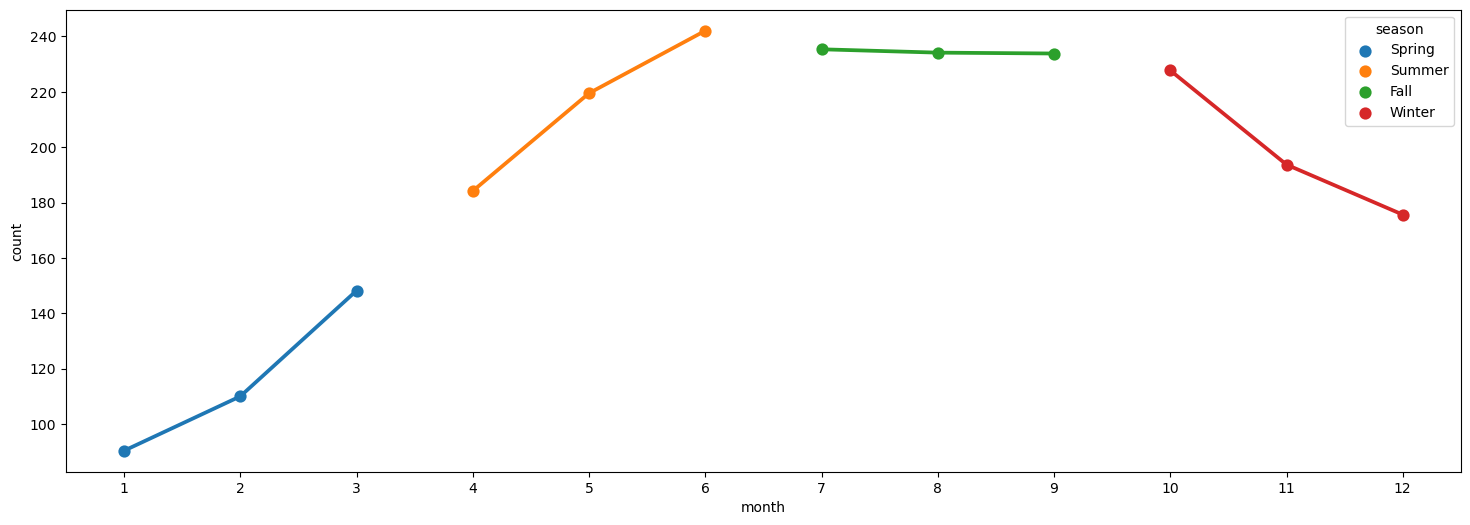

In [273]:
# Mean count of bike rental in each month
read_train_dat['datetime'] = pd.to_datetime(read_train_dat['datetime'])
read_train_dat['month'] = read_train_dat['datetime'].dt.month

plt.figure(figsize=(18, 6))
month_season_df = read_train_dat.groupby(["month", "season"])["count"].mean().to_frame().reset_index()
dat = sns.pointplot(x=month_season_df["month"], y=month_season_df["count"], hue=month_season_df["season"])
# dat.set_ylabel("Count")

In [274]:
read_train_dat.describe()

temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count          year         month          hour  
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  
mean     155.552177    191.574132   2011.501929      6.521495     11.541613  
std      151.039033    181.144454      0.500019      3.444373      6.915838  
min        0.000000      1.000000   2011.000000      1.000000      0.000000  
25%       36.000000     42.000000   2011.000000      4.000000      6.000000  
50%      118.000000    145.000000   2012.000000      7.000000     12.000000  
75%      222.000000    284.000000   2012.000000     10.000000     18.000000  
max      886.000000    977.000000   2012.000000     12.000000     23.000000

### Train-Test Data Split

In [275]:
# One hot encoding for the categorical features [Season, Month, Weather, Day]   
read_train_corr = pd.read_csv("C:/Users/ravin/KTU/Machine Learning/bike-rental-ML-Model/bike-sharing-demand/train.csv")
label_encoders = {}
categorical_columns = ['season', 'weather', 'holiday', 'workingday']
for col in categorical_columns:
    lab_encode = LabelEncoder()
    read_train_corr[col] = lab_encode.fit_transform(read_train_corr[col])
    label_encoders[col] = lab_encode

In [276]:
read_train_dat['hour'] = read_train_dat['datetime'].dt.hour
read_train_dat['day'] = read_train_dat['datetime'].dt.day
read_train_dat['month'] = read_train_dat['datetime'].dt.month

# Select relevant features
features = ['temp', 'humidity', 'windspeed', 'hour', 'day', 'month']
X = read_train_dat[features]
y = read_train_dat['count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

features = ['temp','atemp','humidity','windspeed','casual','registered']
X = read_train_dat[features]
y = read_train_dat['count']

In [277]:
# Normalizing the train-test split data
normalize = StandardScaler() # Z-Score Normalization
X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

### 1. What is the relationship between temperature and bike rental demand in the bike-sharing system, and how does this relationship vary with different seasons?

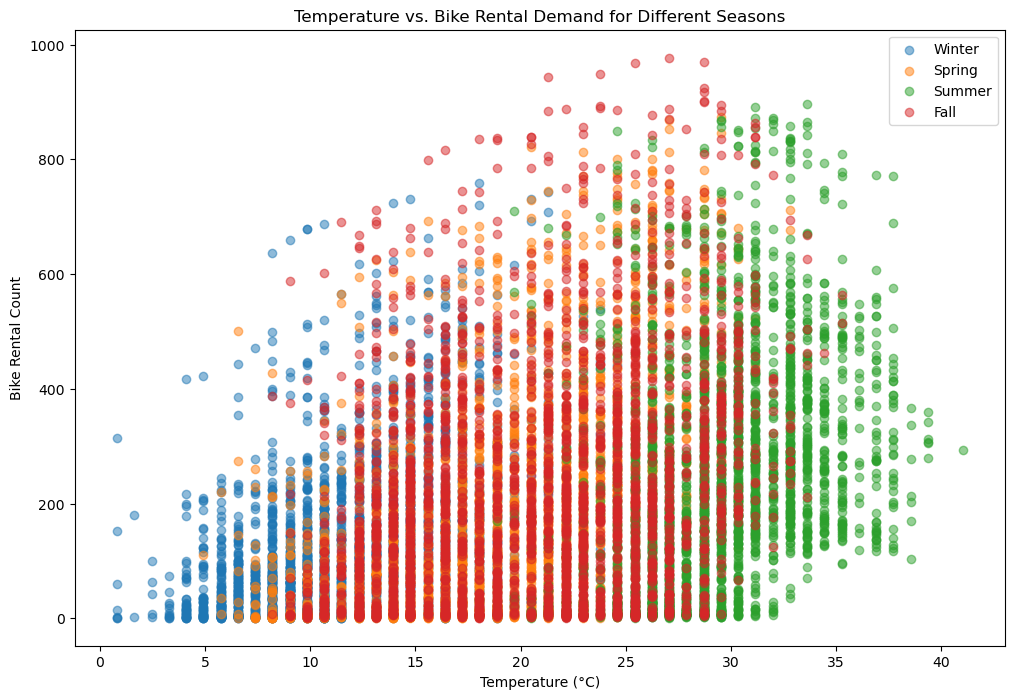

In [278]:

read_train_dat['datetime'] = pd.to_datetime(read_train_dat['datetime'])
read_train_dat['season'] = read_train_dat['datetime'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

seasons = read_train_dat['season'].unique()
plt.figure(figsize=(12, 8))

for season in seasons:
    subset = read_train_dat[read_train_dat['season'] == season]
    plt.scatter(subset['temp'], subset['count'], label=season, alpha=0.5)

plt.title('Temperature vs. Bike Rental Demand for Different Seasons')
plt.xlabel('Temperature (Â°C)')
plt.ylabel('Bike Rental Count')
plt.legend()
plt.show()

- Based on the above visualization:
    - For example, if you take the instance on the x-axis value 2, and y-axis value -> (around 198)
    - It states there are nearly 198 bikes were rented at 5 degree celsius

C:\Users\ravin\AppData\Local\Temp\ipykernel_26156\623232636.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(read_train_dat.corr(), annot=True)


<Axes: >

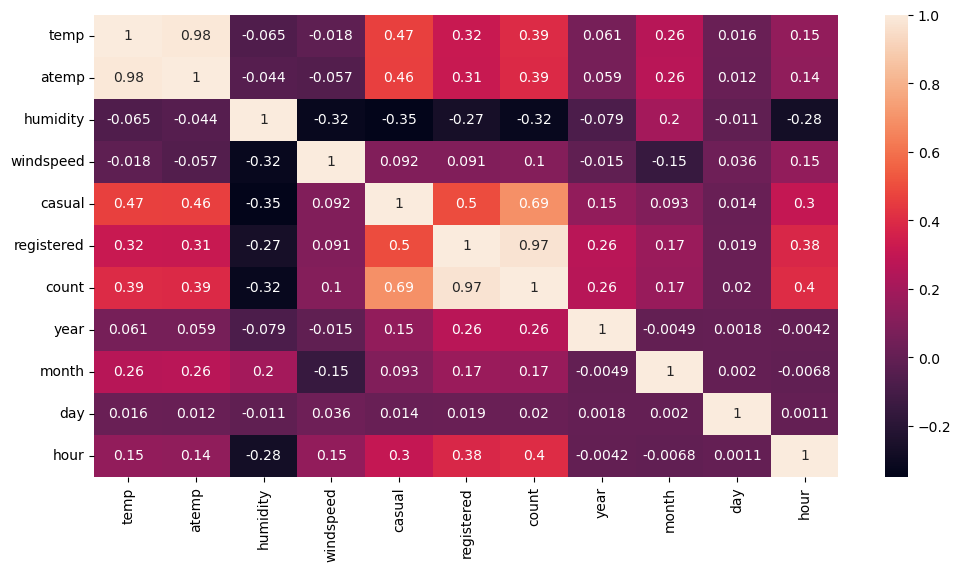

In [279]:
# Pearson Corrleation
plt.figure(figsize=(12,6))
sns.heatmap(read_train_dat.corr(), annot=True)

- The above correlation visualization states the x and y axis conatins both categroical and numerical values.
- For example, in the x-axis feature = [Windspeed], y-axis feature = [temp] states both features are negatively correlated which means both features doesn't have a depenency.
- On the diagonals, both x-axis and y-axis features are the same which represent strong positve correlation with value 1.

In [280]:
temp_humidity_corr = vz.correlation(read_train_corr['temp'], read_train_corr['holiday'])
print(temp_humidity_corr)

humidity_windspeed = vz.correlation(read_train_corr['humidity'], read_train_corr['holiday'])
print(humidity_windspeed)

temp_humidity_corr_wd = vz.correlation(read_train_corr['temp'], read_train_corr['workingday'])
print(temp_humidity_corr_wd)

humidity_windspeed_wd = vz.correlation(read_train_corr['humidity'], read_train_corr['workingday'])
print(humidity_windspeed_wd)

0.0009615790261699494
0.007035635723520199
0.03743105032596817
-0.013832959232058272


- Experimental try: Pearson-Correlation analysis between two features.

### 2. Can we predict bike rental demand  based on weather conditions (temperature, humidity, windspeed) and time-related features (hour, day of the week, month)?

In [281]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
knn_hyper_opt = GridSearchCV(knn_regressor, {'n_neighbors': [1,2,3,4,5]}, cv=4, scoring="neg_mean_absolute_error")
knn_hyper_opt.fit(X_train, y_train)
hyper_param_result = knn_hyper_opt.best_estimator_
print("KNN Hyperparameter optimal choice: ", hyper_param_result)

# Making predictions on the test dataset
knn_predictions = knn_regressor.predict(X_test)
print(knn_predictions)

KNN Hyperparameter optimal choice:  KNeighborsRegressor(n_neighbors=3)
[297.  33. 540. ... 343.   8. 184.]


- Based on the optimal n-neighbor parameter value K
    - KNN_Regressor takes two parameters such as X_train and y_train
    - Using GridsearchCV, the best K hyperparameter value K=3 was obtained
    - GridSearchCV performs cross validation, for example if CV=4 it equally split some fold of the data for training and some for testing.
    - Note: 
        - Low cross validation values results in overfitting but require lower computation processing.
        - High cross validation values are the best choice such as cv > 5-folds but it require more computation power.
        
For your reference: KNN Math example - https://assets.super.so/7d26cd67-f43c-4085-8f4c-2a4594e5dd30/files/1bc699b1-2f3b-4566-a5f0-830c694fbfc6.pdf            

Text(0.5, 1.0, 'KNN Regression')

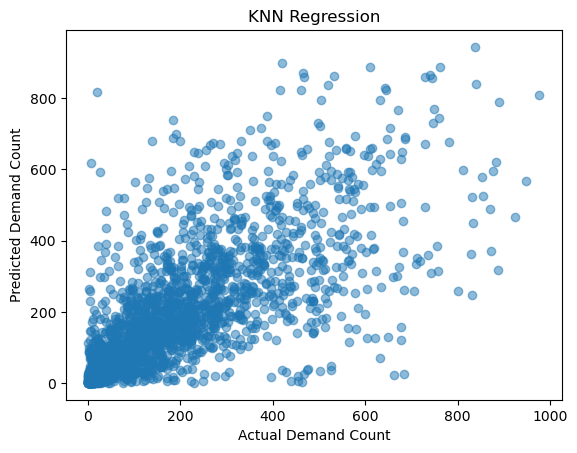

In [282]:
plt.subplot()
plt.scatter(y_test, knn_predictions, alpha=0.5)
plt.xlabel("Actual Demand Count")
plt.ylabel("Predicted Demand Count")
plt.title("KNN Regression")

- The above visualization states:
    - In x-axis it represents the Actual Demand count and Y-axis represents the predicted demand count
    - For example, let's take x-axis value = (around 820) and y-axis value = (around 320)
    - The difference between the actual and predicted demand count is comaprtively high for the above sample.
    - Note: To answer this 2nd question, yes we can predict bike rental demand count based on weather conditions and time features which was preprocessed in the earlier steps.

In [283]:
# Regression: Least Square Metric, KNN, Decision Tree, Random Forest
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)
dt_hyper_opt = GridSearchCV(decision_tree_regressor, {'min_samples_leaf':[3,5,7,9,12],'max_depth':[2,4,6,8,10]}, cv=4, scoring="neg_mean_absolute_error")
dt_hyper_opt.fit(X_train, y_train)
hyper_param_result = dt_hyper_opt.best_estimator_
print("Decision Tree Hyperparameter optimal choice: ", hyper_param_result)
# Making predictions on the test set
dt_predictions = decision_tree_regressor.predict(X_test)

KNN Hyperparameter optimal choice:  DecisionTreeRegressor(max_depth=10, min_samples_leaf=12, random_state=42)


- Based on the optimal MaxDepth and MinSamplesSleaf parameter values
    - DT_Regressor takes two parameters such as X_train and y_train
    - Using GridsearchCV, the best max_depth hyperparameter value 10 and min_sample_leaf=12 was obtained

Text(0.5, 1.0, 'Decision Tree Regression')

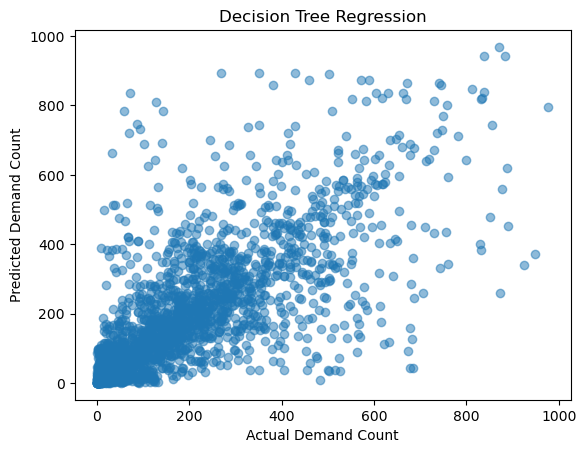

In [284]:
plt.subplot()
plt.scatter(y_test, dt_predictions, alpha=0.5)
plt.xlabel("Actual Demand Count")
plt.ylabel("Predicted Demand Count")
plt.title("Decision Tree Regression")

In [285]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)
rf_hyper_opt = GridSearchCV(random_forest_regressor, {'n_estimators': [1,2,4,5,6]}, cv=4, scoring="neg_mean_absolute_error")
rf_hyper_opt.fit(X_train, y_train)
hyper_param_result = rf_hyper_opt.best_estimator_
print("Random Forest Hyperparameter optimal choice: ", hyper_param_result)
# Making predictions on the test set
rf_predictions = random_forest_regressor.predict(X_test)

Random Forest Hyperparameter optimal choice:  RandomForestRegressor(n_estimators=6, random_state=42)


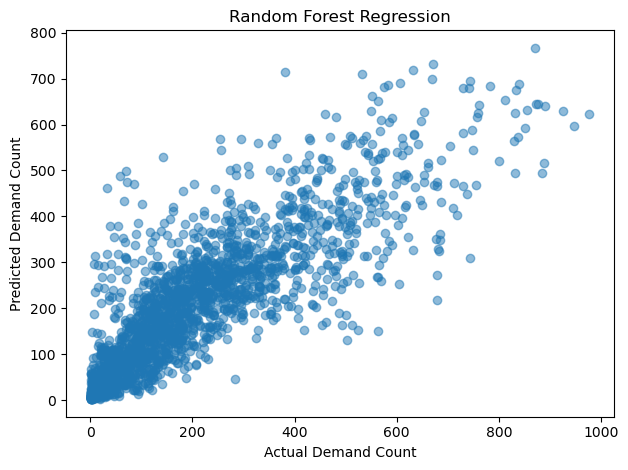

In [286]:
plt.subplot()
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.xlabel("Actual Demand Count")
plt.ylabel("Predicted Demand Count")
plt.title("Random Forest Regression")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Random Forest Feature Importance')

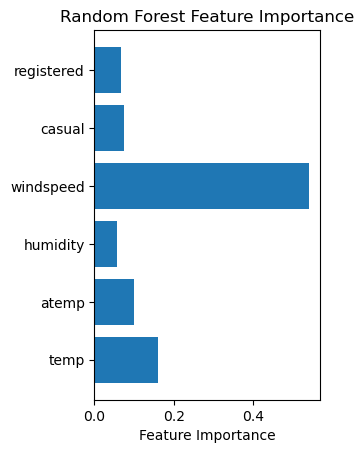

In [287]:
rf_feature_importance = random_forest_regressor.feature_importances_
plt.subplot(122)
plt.barh(features, rf_feature_importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")

- Decoding the blackbox concepts used in the above feature importance using random forest
    - It possible to analyse feature importance using Decision tree or other trees
    - From math perspective, we need to evaluate the entropy of features which then we process the information gain. (For your reference: https://assets.super.so/7d26cd67-f43c-4085-8f4c-2a4594e5dd30/files/9b9f66b2-cc7f-42df-9492-35dd30df29b0.pdf
    - The highest information gain will be cosnidered as the root node. 
    - Based on the above features, the feature windspeed becomes the root node and the rest comes as leaf node.

In [288]:
# Not working due to an error in vz.lineareg C++ code [Experimental Try! Not an actual implementation]

X_train_list = X_train.tolist()
y_train_list = y_train.tolist()
linear_regressor = vz.lineareg(X_train_list, y_train_list, X_test[5])

TypeError: lineareg(): incompatible function arguments. The following argument types are supported:
    1. (arg0: List[float], arg1: List[float], arg2: int) -> float

Invoked with: [[0.9772617924684984, 1.0985533296784868, -0.8283561935151875, -0.9459622103124522, -0.7244660195595315, 0.13822447101570953], [2.1354567911937847, -1.1826937863204918, 0.878554594774991, 0.6432171400928439, -1.0904076128960205, 0.42938525805121963], [1.6090045190459272, -1.0790007355932656, 0.5124961777553645, 0.4987462900559988, 0.19038796378169093, 0.13822447101570953], [-0.7073854784046455, 1.6170185833146185, -0.7066090860689278, -1.0904330603492973, 0.007417167113446442, -0.7352578900908208], [-0.9179663872637887, -0.8716146341388129, 0.5124961777553645, -0.22360796012822673, 1.6541543371276468, 1.30286761915775], [-0.812675932834217, -1.908545141411076, -0.4631148711764082, 1.0766296902033792, 0.5563295571181799, -1.3175794641618408], [-0.812675932834217, 1.3059394311329395, 3.683640634124049, 1.2211005402402242, -0.541495222891287, 1.59402840619326], [1.924875882334642, -1.0790007355932656, 0.2690019628628449, 0.06533373994546347, -1.0904076128960205, 0.13822447101570953], [0.6613904291797843, 1.6688651086782316, -0.7066090860689278, 1.5100422403139144, -1.4563492062325094, 1.0117068321222398], [1.1878427013276416, 0.009776297042610722, -1.5604730275544407, -1.0904330603492973, 1.288212743791158, 0.13822447101570953], [-1.3391282049820745, 0.16531587313345017, 1.8541656437067637, -0.6570205102387621, -0.35852442622304254, -1.3175794641618408], [1.6090045190459272, -1.597465989229397, 0.2690019628628449, 0.20980458998230858, 1.1052419471229133, 0.42938525805121963], [-0.49680456954550267, -0.9753076848660391, 0.7568074873287312, 0.20980458998230858, 0.9222711504546689, -1.3175794641618408], [-1.7602900227003606, 0.9430137535876475, 0.024690653289477896, 1.3655713902770694, 1.288212743791158, -1.608740251197351], [0.3455190658910697, 1.0985533296784868, -0.7066090860689278, 0.932158840166534, 1.6541543371276468, 1.0117068321222398], [1.6090045190459272, -0.8197681087751997, 0.878554594774991, 0.6432171400928439, 0.19038796378169093, 0.42938525805121963], [0.5560999747502128, -1.1308472609568787, 2.0984769532801306, 1.0766296902033792, -0.35852442622304254, -1.0264186771263308], [0.3455190658910697, -0.8197681087751997, -0.4631148711764082, 0.6432171400928439, -0.35852442622304254, 1.30286761915775], [-1.233837750552503, -0.7160750580479734, -0.4631148711764082, -0.22360796012822673, 0.007417167113446442, -1.3175794641618408], [0.8719713380389269, -1.3382333624113312, -0.4631148711764082, -0.07913711009138162, -1.0904076128960205, -0.15293631601980057], [0.4508095203206412, 1.0985533296784868, -0.7066090860689278, -0.22360796012822673, -1.4563492062325094, -0.44409710305531064], [1.5037140646163563, -0.6642285326843602, 0.024690653289477896, 0.7876879901296889, 0.007417167113446442, 0.13822447101570953], [1.3984236101867846, -1.3900798877749445, 0.5124961777553645, -0.07913711009138162, 0.19038796378169093, 0.42938525805121963], [1.8195854279050703, -1.0790007355932656, -1.5604730275544407, 0.06533373994546347, -0.541495222891287, 0.13822447101570953], [-0.812675932834217, 0.9948602789512606, -0.8283561935151875, -0.9459622103124522, -1.639320002900754, -0.7352578900908208], [0.9772617924684984, -0.04207022832100243, -0.21880356160304146, 1.6545130903507597, -0.17555362955479806, -0.15293631601980057], [-0.7073854784046455, -1.1308472609568787, 1.1228659043483578, -0.22360796012822673, -0.7244660195595315, -0.7352578900908208], [1.5037140646163563, -1.7011590399566232, -0.8283561935151875, 0.932158840166534, 0.19038796378169093, 0.42938525805121963], [1.293133155757213, 0.009776297042610722, -0.4631148711764082, -0.3680788101650718, 0.19038796378169093, -0.15293631601980057], [-1.4444186594116462, 1.0467068043148737, 0.024690653289477896, 0.7876879901296889, 1.4711835404594023, -1.608740251197351], [1.7142949734754989, -0.5086889565935208, -0.4631148711764082, 1.3655713902770694, -0.7244660195595315, 0.13822447101570953], [-0.39151411511593115, 0.2690089238606765, -0.21880356160304146, 1.3655713902770694, 0.5563295571181799, -0.7352578900908208], [-0.18093320625678805, 1.6688651086782316, -1.5604730275544407, -0.6570205102387621, 1.1052419471229133, 1.30286761915775], [-1.4444186594116462, -0.560535481957134, -0.21880356160304146, -1.2349039103861423, -0.9074368162277759, -1.0264186771263308], [-0.39151411511593115, -0.923461159502426, -0.7066090860689278, 0.932158840166534, -0.17555362955479806, 1.30286761915775], [-0.602095023975074, 0.21716239849706334, -0.21880356160304146, -0.8014913602756071, 1.1052419471229133, 1.0117068321222398], [0.7666808836093554, 0.16531587313345017, 0.2690019628628449, 0.7876879901296889, 1.288212743791158, 0.7205460450867297], [-0.18093320625678805, 1.0467068043148737, -0.7066090860689278, -0.8014913602756071, -1.273378409564265, -0.15293631601980057], [1.6090045190459272, -0.5086889565935208, 0.7568074873287312, 0.06533373994546347, 1.4711835404594023, 0.42938525805121963], [-0.18093320625678805, 1.0467068043148737, 0.024690653289477896, -0.8014913602756071, 0.5563295571181799, -1.0264186771263308], [0.8719713380389269, -1.0790007355932656, -1.5604730275544407, 0.7876879901296889, 1.1052419471229133, 0.7205460450867297], [0.4508095203206412, -0.3013028551390682, -0.8283561935151875, 0.20980458998230858, -1.273378409564265, 1.59402840619326], [-1.5497091138412176, -0.35314938050268135, 1.1228659043483578, 0.06533373994546347, 1.1052419471229133, -1.608740251197351], [0.7666808836093554, 0.3727019745879028, -0.7066090860689278, 1.0766296902033792, 0.19038796378169093, 0.7205460450867297], [0.13493815703192658, 1.0985533296784868, -0.21880356160304146, -1.5238456104598326, 0.5563295571181799, -0.44409710305531064], [-0.49680456954550267, 1.0467068043148737, -1.5604730275544407, 1.2211005402402242, -1.273378409564265, 1.0117068321222398], [0.24022861146149813, 0.32085544922428966, 0.7568074873287312, 0.20980458998230858, 0.37335876044993543, -0.7352578900908208], [0.3455190658910697, 0.11346934776983703, 0.2690019628628449, 0.06533373994546347, 0.37335876044993543, 1.30286761915775], [-0.18093320625678805, -1.597465989229397, -0.4631148711764082, 0.3542754400191537, -1.273378409564265, -0.7352578900908208], [1.6090045190459272, 0.21716239849706334, -1.5604730275544407, -0.6570205102387621, -0.35852442622304254, 0.13822447101570953], [-0.9179663872637887, -0.24945632977545504, -0.7066090860689278, 0.4987462900559988, 0.37335876044993543, 1.59402840619326], [0.24022861146149813, -0.8716146341388129, 1.3663601192408774, -0.22360796012822673, -1.0904076128960205, -0.7352578900908208], [-0.9179663872637887, -0.24945632977545504, 0.024690653289477896, -1.0904330603492973, 1.288212743791158, -1.3175794641618408], [0.3455190658910697, 0.11346934776983703, -0.8283561935151875, -0.07913711009138162, 0.19038796378169093, -0.44409710305531064], [0.9772617924684984, 1.0985533296784868, 1.610671428814244, 1.3655713902770694, 0.5563295571181799, 0.42938525805121963], [0.6613904291797843, 0.5800880760423553, 0.024690653289477896, -1.5238456104598326, 0.9222711504546689, 0.13822447101570953], [-0.49680456954550267, -0.6123820073207471, -0.21880356160304146, 0.3542754400191537, 0.9222711504546689, 1.59402840619326], [1.1878427013276416, 1.1503998550421002, 0.2690019628628449, 1.0766296902033792, 0.9222711504546689, 0.13822447101570953], [-0.28622366068635957, 1.6688651086782316, 0.2690019628628449, 1.2211005402402242, 1.1052419471229133, -0.7352578900908208], [1.1878427013276416, 0.8911672282240343, 2.0984769532801306, 0.932158840166534, -0.7244660195595315, 0.42938525805121963], [0.24022861146149813, -1.7530055653202365, 0.5124961777553645, 0.4987462900559988, 0.5563295571181799, -0.7352578900908208], [0.8719713380389269, 0.8393207028604212, 0.2690019628628449, -1.6683164604966778, 0.37335876044993543, -0.15293631601980057], [-0.18093320625678805, -0.14576327904822872, 1.8541656437067637, -1.2349039103861423, -1.639320002900754, 1.0117068321222398], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, -1.3793747604229876, -0.35852442622304254, 0.42938525805121963], [0.8719713380389269, -0.04207022832100243, -1.5604730275544407, -0.22360796012822673, 1.1052419471229133, -0.44409710305531064], [1.08255224689807, 0.8911672282240343, 1.3663601192408774, 0.3542754400191537, -0.35852442622304254, 0.7205460450867297], [-0.812675932834217, 0.21716239849706334, 0.5124961777553645, -0.8014913602756071, -0.9074368162277759, -0.44409710305531064], [-0.9179663872637887, -1.4937729385021707, 0.7568074873287312, -0.6570205102387621, -0.541495222891287, -0.7352578900908208], [0.9772617924684984, 0.8911672282240343, 3.683640634124049, -0.22360796012822673, 1.4711835404594023, 0.7205460450867297], [0.029647702602355035, 0.787474177496808, -0.7066090860689278, -0.6570205102387621, 1.1052419471229133, 0.7205460450867297], [-0.28622366068635957, 0.5282415506787422, -0.8283561935151875, -0.6570205102387621, 0.9222711504546689, -1.0264186771263308], [1.08255224689807, -0.4049959058662945, -0.4631148711764082, -0.07913711009138162, 1.1052419471229133, -0.44409710305531064], [1.1878427013276416, -1.286386837047718, 0.2690019628628449, 0.3542754400191537, 1.1052419471229133, -0.15293631601980057], [1.293133155757213, 0.21716239849706334, -0.7066090860689278, 1.3655713902770694, -0.35852442622304254, 0.42938525805121963], [0.3455190658910697, 0.11346934776983703, -0.8283561935151875, 0.7876879901296889, 1.4711835404594023, -1.0264186771263308], [1.3984236101867846, -1.8048520906838497, -1.5604730275544407, 0.4987462900559988, 0.9222711504546689, -0.15293631601980057], [0.6613904291797843, -0.04207022832100243, -1.5604730275544407, 0.6432171400928439, -0.7244660195595315, -0.44409710305531064], [-1.3391282049820745, -0.5086889565935208, -0.8283561935151875, -1.2349039103861423, -0.35852442622304254, -1.0264186771263308], [1.08255224689807, -0.4049959058662945, 0.024690653289477896, 0.20980458998230858, 0.7393003537864243, 0.7205460450867297], [0.13493815703192658, 0.061622822406223875, 1.1228659043483578, 1.6545130903507597, 0.9222711504546689, 1.59402840619326], [0.13493815703192658, 1.0985533296784868, -0.21880356160304146, -0.9459622103124522, -0.7244660195595315, -0.44409710305531064], [-0.18093320625678805, 1.9799442608599105, 0.2690019628628449, -0.8014913602756071, 0.19038796378169093, -0.7352578900908208], [-1.4444186594116462, 1.6170185833146185, 0.2690019628628449, -0.512549660201917, -1.4563492062325094, -1.3175794641618408], [-0.602095023975074, -1.1308472609568787, 2.2202240607263906, -0.512549660201917, 0.7393003537864243, -1.3175794641618408], [-1.5497091138412176, -1.1308472609568787, 0.7568074873287312, 0.20980458998230858, 0.007417167113446442, -1.608740251197351], [-0.7073854784046455, -0.8197681087751997, 1.610671428814244, -0.07913711009138162, -1.273378409564265, 1.30286761915775], [0.7666808836093554, 0.3727019745879028, -0.7066090860689278, -1.0904330603492973, 0.5563295571181799, 0.42938525805121963], [0.24022861146149813, 1.9799442608599105, -0.7066090860689278, -1.0904330603492973, 0.5563295571181799, 1.0117068321222398], [-2.286742294848218, -0.8716146341388129, -1.5604730275544407, -0.8014913602756071, -0.17555362955479806, -1.3175794641618408], [0.24022861146149813, -0.8716146341388129, 0.878554594774991, -0.8014913602756071, -1.273378409564265, -0.15293631601980057], [-1.0232568416933598, 0.42454849995151595, 0.024690653289477896, -1.5238456104598326, 1.4711835404594023, 1.30286761915775], [0.6613904291797843, 0.3727019745879028, 2.0984769532801306, 0.4987462900559988, 1.288212743791158, -0.44409710305531064], [-0.7073854784046455, 1.6170185833146185, -0.7066090860689278, 1.5100422403139144, -0.17555362955479806, 1.59402840619326], [-0.9179663872637887, -1.1826937863204918, 0.024690653289477896, 1.5100422403139144, 0.19038796378169093, 1.30286761915775], [-0.28622366068635957, -0.560535481957134, 2.46371827561891, -1.2349039103861423, 1.4711835404594023, -1.608740251197351], [-0.49680456954550267, 1.3059394311329395, -0.4631148711764082, -0.22360796012822673, -0.35852442622304254, 1.59402840619326], [1.1878427013276416, 0.8911672282240343, -0.21880356160304146, 1.6545130903507597, 1.6541543371276468, 0.13822447101570953], [-1.4444186594116462, 0.6837811267695817, 1.8541656437067637, 0.6432171400928439, 0.19038796378169093, -1.3175794641618408], [-1.233837750552503, -0.3013028551390682, -0.21880356160304146, -0.9459622103124522, 1.1052419471229133, -1.608740251197351], [-1.4444186594116462, 1.6170185833146185, -0.4631148711764082, -1.3793747604229876, -1.4563492062325094, -1.3175794641618408], [-1.3391282049820745, -1.0790007355932656, 1.1228659043483578, 1.3655713902770694, -1.4563492062325094, -1.608740251197351], [-1.6549995682707892, -0.560535481957134, -0.8283561935151875, -0.512549660201917, 0.19038796378169093, -1.608740251197351], [1.08255224689807, -0.7160750580479734, 0.024690653289477896, 0.06533373994546347, 0.9222711504546689, 0.13822447101570953], [0.9772617924684984, 0.16531587313345017, -0.4631148711764082, -0.07913711009138162, 0.9222711504546689, 0.7205460450867297], [0.7666808836093554, 1.0985533296784868, 0.2690019628628449, -1.6683164604966778, 1.4711835404594023, 0.42938525805121963], [-0.9179663872637887, -0.8716146341388129, -0.4631148711764082, 0.4987462900559988, 0.007417167113446442, -1.3175794641618408], [-0.7073854784046455, -1.1308472609568787, -0.7066090860689278, 0.3542754400191537, -0.7244660195595315, 1.30286761915775], [-1.4444186594116462, -0.923461159502426, 0.878554594774991, -0.512549660201917, 0.007417167113446442, -1.0264186771263308], [-1.4444186594116462, 1.9799442608599105, 1.610671428814244, 1.5100422403139144, -0.7244660195595315, -1.0264186771263308], [1.08255224689807, -0.7160750580479734, 0.024690653289477896, -0.07913711009138162, -0.9074368162277759, 1.0117068321222398], [0.3455190658910697, 0.5800880760423553, -0.21880356160304146, 1.5100422403139144, -0.7244660195595315, -0.44409710305531064], [-0.07564275182721651, 0.2690089238606765, -1.5604730275544407, -0.8014913602756071, 1.6541543371276468, -0.7352578900908208], [0.5560999747502128, 0.3727019745879028, -0.4631148711764082, -0.512549660201917, 1.1052419471229133, -0.15293631601980057], [0.6613904291797843, 1.6688651086782316, -0.7066090860689278, -0.9459622103124522, -1.273378409564265, 1.0117068321222398], [0.4508095203206412, 1.0985533296784868, -0.4631148711764082, 0.932158840166534, -0.35852442622304254, 0.7205460450867297], [-0.28622366068635957, -3.204708275501405, 0.878554594774991, 0.3542754400191537, 0.007417167113446442, -1.0264186771263308], [0.24022861146149813, 1.0985533296784868, -1.5604730275544407, -0.9459622103124522, 0.7393003537864243, 0.7205460450867297], [-0.28622366068635957, 1.9799442608599105, -0.8283561935151875, -0.07913711009138162, -0.541495222891287, 1.59402840619326], [-0.602095023975074, -0.9753076848660391, 0.2690019628628449, -0.07913711009138162, 1.1052419471229133, 1.30286761915775], [-1.3391282049820745, -0.3013028551390682, 0.5124961777553645, -0.3680788101650718, 1.6541543371276468, -1.3175794641618408], [0.8719713380389269, 1.0985533296784868, 0.5124961777553645, 0.06533373994546347, 0.37335876044993543, -0.15293631601980057], [-0.49680456954550267, -0.1976098044118419, -0.21880356160304146, 0.20980458998230858, -1.639320002900754, 1.30286761915775], [-0.49680456954550267, -1.1308472609568787, 0.2690019628628449, 0.4987462900559988, -1.0904076128960205, 1.30286761915775], [0.13493815703192658, 0.787474177496808, 0.5124961777553645, 1.5100422403139144, 0.37335876044993543, 1.30286761915775], [1.7142949734754989, -0.9753076848660391, -0.7066090860689278, 1.0766296902033792, -0.35852442622304254, 0.42938525805121963], [1.08255224689807, -0.4049959058662945, -1.5604730275544407, -0.6570205102387621, 0.5563295571181799, 0.13822447101570953], [1.6090045190459272, -0.5086889565935208, 0.5124961777553645, 0.3542754400191537, -0.35852442622304254, 0.42938525805121963], [1.5037140646163563, 0.42454849995151595, -0.7066090860689278, 0.06533373994546347, -0.9074368162277759, 0.7205460450867297], [0.8719713380389269, 1.0985533296784868, -0.21880356160304146, -0.9459622103124522, -1.273378409564265, 0.42938525805121963], [-0.812675932834217, -1.597465989229397, 1.610671428814244, 0.4987462900559988, -0.541495222891287, -1.0264186771263308], [-1.233837750552503, 0.16531587313345017, -0.4631148711764082, 1.5100422403139144, -0.35852442622304254, 1.59402840619326], [-0.28622366068635957, 1.0467068043148737, -0.4631148711764082, -0.9459622103124522, -0.9074368162277759, 1.0117068321222398], [1.1878427013276416, -0.1976098044118419, 0.024690653289477896, 0.932158840166534, 0.007417167113446442, 0.7205460450867297], [-0.28622366068635957, -0.923461159502426, 0.7568074873287312, -0.07913711009138162, -0.9074368162277759, 1.59402840619326], [-1.4444186594116462, 0.3727019745879028, 0.2690019628628449, -0.9459622103124522, -1.4563492062325094, -1.0264186771263308], [0.029647702602355035, -1.7011590399566232, 0.878554594774991, 0.4987462900559988, 0.19038796378169093, -1.0264186771263308], [1.1878427013276416, 0.8911672282240343, -0.8283561935151875, 1.5100422403139144, 1.6541543371276468, -0.15293631601980057], [-0.39151411511593115, 0.2690089238606765, 0.2690019628628449, 0.06533373994546347, -1.639320002900754, -0.7352578900908208], [0.24022861146149813, -0.8716146341388129, -0.21880356160304146, 0.3542754400191537, 1.1052419471229133, 0.7205460450867297], [0.13493815703192658, -2.012238192138302, 1.8541656437067637, 0.7876879901296889, -0.7244660195595315, -0.7352578900908208], [0.13493815703192658, -0.7160750580479734, 1.1228659043483578, -1.0904330603492973, -1.273378409564265, -0.15293631601980057], [1.293133155757213, 0.21716239849706334, 0.5124961777553645, 1.3655713902770694, 0.007417167113446442, 0.42938525805121963], [-0.9179663872637887, -0.8716146341388129, 0.7568074873287312, 0.4987462900559988, 1.4711835404594023, 1.59402840619326], [-0.7073854784046455, 0.009776297042610722, -1.5604730275544407, -1.6683164604966778, 1.1052419471229133, 1.59402840619326], [0.13493815703192658, 0.787474177496808, 0.5124961777553645, 1.2211005402402242, -1.4563492062325094, -0.44409710305531064], [-0.602095023975074, -0.8197681087751997, -0.21880356160304146, -1.5238456104598326, -0.541495222891287, -1.608740251197351], [0.7666808836093554, 0.8393207028604212, -0.4631148711764082, 1.5100422403139144, 0.5563295571181799, 0.7205460450867297], [-1.233837750552503, -1.0790007355932656, -0.7066090860689278, 0.06533373994546347, -0.7244660195595315, -1.0264186771263308], [-0.812675932834217, -0.45684243122990764, -0.4631148711764082, -1.5238456104598326, 0.5563295571181799, 1.0117068321222398], [0.8719713380389269, -1.1826937863204918, -0.4631148711764082, 0.3542754400191537, 1.1052419471229133, 0.7205460450867297], [0.5560999747502128, 0.8393207028604212, -0.4631148711764082, -1.6683164604966778, 1.288212743791158, -0.44409710305531064], [1.293133155757213, 0.42454849995151595, 0.5124961777553645, 0.3542754400191537, 0.5563295571181799, 0.42938525805121963], [-0.7073854784046455, 0.4763950253151291, -0.7066090860689278, -1.2349039103861423, -0.7244660195595315, -0.44409710305531064], [1.1878427013276416, 0.21716239849706334, 0.5124961777553645, 1.6545130903507597, 0.007417167113446442, 0.13822447101570953], [-0.49680456954550267, 0.7356276521331948, -0.4631148711764082, 1.0766296902033792, -1.4563492062325094, 1.30286761915775], [0.029647702602355035, 1.3577859564965526, 0.2690019628628449, -0.6570205102387621, 0.19038796378169093, -0.7352578900908208], [-1.233837750552503, -0.3013028551390682, -1.5604730275544407, -1.5238456104598326, 0.7393003537864243, -1.3175794641618408], [-1.0232568416933598, -0.8716146341388129, 0.7568074873287312, 1.6545130903507597, 0.9222711504546689, -1.608740251197351], [-0.49680456954550267, 0.7356276521331948, 0.2690019628628449, 0.3542754400191537, 1.1052419471229133, -1.0264186771263308], [-0.49680456954550267, 0.009776297042610722, 0.7568074873287312, 0.20980458998230858, 1.6541543371276468, -1.608740251197351], [1.1878427013276416, 0.009776297042610722, -1.5604730275544407, -0.9459622103124522, -0.9074368162277759, 0.13822447101570953], [1.7142949734754989, -1.64931251459301, 0.7568074873287312, 0.932158840166534, -1.4563492062325094, 0.13822447101570953], [2.2407472456233566, -1.0271542102296523, 0.7568074873287312, 0.4987462900559988, -0.35852442622304254, 0.13822447101570953], [-0.07564275182721651, 0.787474177496808, -0.8283561935151875, 1.5100422403139144, -0.17555362955479806, 1.0117068321222398], [1.5037140646163563, -1.1308472609568787, -0.21880356160304146, 0.7876879901296889, -0.17555362955479806, 0.13822447101570953], [0.13493815703192658, 0.061622822406223875, 0.2690019628628449, -0.6570205102387621, 1.6541543371276468, 0.7205460450867297], [-1.0232568416933598, -1.0271542102296523, 1.8541656437067637, 0.06533373994546347, -0.541495222891287, -1.0264186771263308], [0.7666808836093554, 0.16531587313345017, -0.21880356160304146, -0.8014913602756071, 0.37335876044993543, 0.42938525805121963], [1.3984236101867846, -0.5086889565935208, 0.7568074873287312, 0.7876879901296889, 0.7393003537864243, 0.7205460450867297], [-1.6549995682707892, -1.286386837047718, -0.8283561935151875, 1.5100422403139144, 0.9222711504546689, -1.608740251197351], [0.8719713380389269, 0.6319346014059686, 0.7568074873287312, -0.512549660201917, 1.4711835404594023, 0.42938525805121963], [-1.0232568416933598, -0.3013028551390682, 0.5124961777553645, -1.6683164604966778, -1.273378409564265, 1.59402840619326], [-1.4444186594116462, -1.5456194638657839, 2.2202240607263906, -0.9459622103124522, 0.9222711504546689, -1.3175794641618408], [0.13493815703192658, -0.14576327904822872, -0.7066090860689278, -1.3793747604229876, -1.273378409564265, -0.15293631601980057], [0.5560999747502128, -0.45684243122990764, 0.878554594774991, -0.3680788101650718, 0.007417167113446442, 0.7205460450867297], [0.3455190658910697, 1.0985533296784868, 0.024690653289477896, -0.512549660201917, -0.7244660195595315, 1.0117068321222398], [-0.7073854784046455, 0.009776297042610722, 0.024690653289477896, 0.7876879901296889, 0.9222711504546689, -1.0264186771263308], [-0.9179663872637887, 0.42454849995151595, -0.21880356160304146, -1.6683164604966778, 0.9222711504546689, 1.59402840619326], [0.24022861146149813, 1.3577859564965526, -1.5604730275544407, 1.2211005402402242, 0.9222711504546689, -0.44409710305531064], [0.029647702602355035, 0.787474177496808, -1.5604730275544407, 1.5100422403139144, 1.288212743791158, 1.0117068321222398], [-0.49680456954550267, 1.3059394311329395, -1.5604730275544407, -0.22360796012822673, -1.273378409564265, -1.0264186771263308], [-0.18093320625678805, -2.012238192138302, 0.2690019628628449, 1.6545130903507597, -0.541495222891287, -0.7352578900908208], [1.1878427013276416, 0.11346934776983703, -1.5604730275544407, -0.8014913602756071, -0.17555362955479806, 0.42938525805121963], [0.7666808836093554, 0.3727019745879028, 1.8541656437067637, 0.20980458998230858, 0.19038796378169093, -0.7352578900908208], [-1.7602900227003606, 0.9430137535876475, -0.4631148711764082, -0.3680788101650718, -1.0904076128960205, -1.3175794641618408], [1.6090045190459272, -0.14576327904822872, 2.46371827561891, 0.7876879901296889, 0.9222711504546689, 0.13822447101570953], [0.7666808836093554, 0.5800880760423553, -0.8283561935151875, 1.3655713902770694, -1.4563492062325094, 0.7205460450867297], [0.6613904291797843, -1.3900798877749445, -1.5604730275544407, 1.5100422403139144, -1.273378409564265, -0.15293631601980057], [0.5560999747502128, 1.0985533296784868, 0.024690653289477896, -1.2349039103861423, 0.9222711504546689, 0.42938525805121963], [1.3984236101867846, -0.35314938050268135, -0.4631148711764082, 0.06533373994546347, -1.273378409564265, 0.42938525805121963], [-1.0232568416933598, -1.1826937863204918, 0.2690019628628449, -0.8014913602756071, -0.35852442622304254, 1.30286761915775], [-0.9179663872637887, 0.7356276521331948, -0.4631148711764082, -0.6570205102387621, 1.288212743791158, -1.0264186771263308], [-0.49680456954550267, -1.1308472609568787, 0.878554594774991, 0.4987462900559988, 0.5563295571181799, 1.30286761915775], [0.029647702602355035, -1.7011590399566232, 0.5124961777553645, 0.932158840166534, -0.7244660195595315, -1.608740251197351], [1.3984236101867846, -0.5086889565935208, 0.5124961777553645, -0.07913711009138162, -0.541495222891287, -0.15293631601980057], [-1.4444186594116462, -0.560535481957134, -0.4631148711764082, 1.6545130903507597, 0.37335876044993543, -1.3175794641618408], [0.4508095203206412, -0.8197681087751997, -0.4631148711764082, 1.5100422403139144, -1.4563492062325094, -0.15293631601980057], [0.24022861146149813, 0.787474177496808, 0.024690653289477896, 1.3655713902770694, 1.4711835404594023, 1.0117068321222398], [0.13493815703192658, 0.787474177496808, 0.024690653289477896, -1.3793747604229876, 1.6541543371276468, 1.0117068321222398], [0.8719713380389269, 1.4096324818601658, 0.024690653289477896, -1.3793747604229876, -0.541495222891287, 0.13822447101570953], [-0.7073854784046455, -0.9753076848660391, -0.4631148711764082, 0.3542754400191537, 0.7393003537864243, 1.30286761915775], [-1.0232568416933598, -0.04207022832100243, -0.7066090860689278, -1.5238456104598326, -1.273378409564265, -0.7352578900908208], [-1.5497091138412176, 0.11346934776983703, -0.7066090860689278, -1.6683164604966778, 0.5563295571181799, -1.3175794641618408], [-0.812675932834217, 0.7356276521331948, -0.8283561935151875, -1.5238456104598326, 0.19038796378169093, 1.30286761915775], [0.3455190658910697, -0.3013028551390682, -0.21880356160304146, -1.5238456104598326, -0.35852442622304254, -0.15293631601980057], [-0.7073854784046455, 0.4763950253151291, 0.2690019628628449, 1.3655713902770694, -1.4563492062325094, 1.0117068321222398], [-0.49680456954550267, 1.3059394311329395, -1.5604730275544407, 0.06533373994546347, 1.288212743791158, 1.59402840619326], [2.2407472456233566, -1.4937729385021707, 0.2690019628628449, 0.20980458998230858, -0.9074368162277759, 0.13822447101570953], [0.5560999747502128, -1.234540311684105, -0.7066090860689278, 0.4987462900559988, -0.541495222891287, -0.7352578900908208], [0.13493815703192658, 1.0985533296784868, 0.2690019628628449, -0.8014913602756071, -0.7244660195595315, -0.44409710305531064], [-1.1285472961229315, -0.04207022832100243, 0.878554594774991, -0.512549660201917, -0.541495222891287, -1.0264186771263308], [-1.0232568416933598, 0.42454849995151595, -0.4631148711764082, -1.6683164604966778, 0.19038796378169093, -1.3175794641618408], [0.029647702602355035, 0.5282415506787422, 0.024690653289477896, 0.6432171400928439, -1.639320002900754, -0.44409710305531064], [-0.49680456954550267, 0.7356276521331948, -1.5604730275544407, -1.3793747604229876, -1.0904076128960205, 1.30286761915775], [0.6613904291797843, 0.3727019745879028, -0.4631148711764082, 1.0766296902033792, -1.4563492062325094, -0.44409710305531064], [0.13493815703192658, 0.5282415506787422, 0.024690653289477896, -0.9459622103124522, 0.5563295571181799, -0.44409710305531064], [-0.812675932834217, -0.04207022832100243, -0.8283561935151875, -0.07913711009138162, 0.9222711504546689, 1.59402840619326], [1.1878427013276416, 0.8911672282240343, 0.2690019628628449, 0.06533373994546347, -0.7244660195595315, 0.7205460450867297], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -0.512549660201917, -1.4563492062325094, -0.44409710305531064], [0.24022861146149813, -0.5086889565935208, -0.8283561935151875, -0.07913711009138162, 1.4711835404594023, -0.7352578900908208], [-0.28622366068635957, 0.2690089238606765, -1.5604730275544407, -1.6683164604966778, 0.9222711504546689, -0.7352578900908208], [-1.9708709315595037, -0.6123820073207471, 0.2690019628628449, -1.2349039103861423, 0.007417167113446442, -1.608740251197351], [-0.602095023975074, 1.0467068043148737, 0.024690653289477896, 1.0766296902033792, -1.639320002900754, 1.0117068321222398], [-1.5497091138412176, -0.35314938050268135, -0.8283561935151875, -0.9459622103124522, -0.9074368162277759, -1.0264186771263308], [-1.6549995682707892, -0.35314938050268135, -1.5604730275544407, 1.6545130903507597, 0.7393003537864243, -1.608740251197351], [-0.28622366068635957, 1.3577859564965526, 3.683640634124049, -1.5238456104598326, 0.5563295571181799, 1.30286761915775], [-0.602095023975074, -3.204708275501405, 0.7568074873287312, -0.512549660201917, 0.007417167113446442, -1.0264186771263308], [0.13493815703192658, 1.0985533296784868, -0.7066090860689278, -0.6570205102387621, -0.9074368162277759, 1.0117068321222398], [-0.9179663872637887, 0.9948602789512606, -0.4631148711764082, 0.06533373994546347, -1.4563492062325094, -0.7352578900908208], [-1.6549995682707892, -0.14576327904822872, -0.21880356160304146, -0.22360796012822673, 0.9222711504546689, -1.608740251197351], [-0.49680456954550267, -0.7679215834115866, 0.2690019628628449, -0.9459622103124522, 0.007417167113446442, -1.608740251197351], [-0.49680456954550267, 1.6688651086782316, 1.1228659043483578, -1.2349039103861423, 0.5563295571181799, -0.7352578900908208], [-0.18093320625678805, 1.6688651086782316, -0.8283561935151875, -1.5238456104598326, 1.1052419471229133, 1.30286761915775], [-0.812675932834217, -1.4419264131385576, 0.878554594774991, -0.07913711009138162, 1.1052419471229133, -1.3175794641618408], [-1.865580477129932, -0.14576327904822872, -0.7066090860689278, -1.6683164604966778, 0.19038796378169093, -1.608740251197351], [-0.18093320625678805, -0.14576327904822872, -0.7066090860689278, 0.932158840166534, -0.541495222891287, 1.30286761915775], [-0.7073854784046455, 0.21716239849706334, -0.7066090860689278, -0.9459622103124522, 0.7393003537864243, -0.7352578900908208], [0.13493815703192658, -0.35314938050268135, 0.2690019628628449, 1.0766296902033792, -1.639320002900754, -0.7352578900908208], [-0.49680456954550267, 1.0467068043148737, 0.024690653289477896, 1.5100422403139144, 1.1052419471229133, 1.59402840619326], [1.293133155757213, -0.1976098044118419, -0.4631148711764082, 0.06533373994546347, -0.17555362955479806, 0.13822447101570953], [-0.18093320625678805, 1.3577859564965526, -0.7066090860689278, -0.512549660201917, 1.6541543371276468, -1.0264186771263308], [-0.18093320625678805, 0.787474177496808, 0.024690653289477896, -1.0904330603492973, 0.007417167113446442, -0.44409710305531064], [0.7666808836093554, -0.24945632977545504, -0.21880356160304146, -1.5238456104598326, 1.288212743791158, -0.7352578900908208], [-0.9179663872637887, 0.21716239849706334, -1.5604730275544407, 1.5100422403139144, 0.007417167113446442, -1.3175794641618408], [1.3984236101867846, 0.009776297042610722, -0.4631148711764082, -0.07913711009138162, 0.19038796378169093, -0.15293631601980057], [1.8195854279050703, -1.0790007355932656, 0.024690653289477896, -0.07913711009138162, -0.35852442622304254, -0.15293631601980057], [-1.0232568416933598, -0.6642285326843602, 0.7568074873287312, -1.6683164604966778, 1.288212743791158, 1.59402840619326], [-0.9179663872637887, 0.9948602789512606, 0.024690653289477896, 0.3542754400191537, 1.1052419471229133, -1.3175794641618408], [0.7666808836093554, 0.3727019745879028, -0.21880356160304146, -0.512549660201917, -1.273378409564265, 0.7205460450867297], [-0.7073854784046455, -1.908545141411076, 2.0984769532801306, 0.932158840166534, 1.6541543371276468, -1.3175794641618408], [1.1878427013276416, 0.6319346014059686, -0.21880356160304146, 1.6545130903507597, 0.007417167113446442, -0.15293631601980057], [-0.28622366068635957, -0.4049959058662945, 0.7568074873287312, -0.07913711009138162, 1.288212743791158, -1.0264186771263308], [-0.602095023975074, 1.6688651086782316, 0.024690653289477896, -0.512549660201917, 0.5563295571181799, -0.7352578900908208], [-0.39151411511593115, -1.234540311684105, 0.878554594774991, 0.06533373994546347, 0.007417167113446442, -1.608740251197351], [0.13493815703192658, 0.32085544922428966, 0.2690019628628449, -0.6570205102387621, 0.007417167113446442, 0.7205460450867297], [-0.812675932834217, -1.1826937863204918, 1.1228659043483578, 0.7876879901296889, 0.19038796378169093, 1.30286761915775], [0.7666808836093554, -1.8048520906838497, 0.2690019628628449, 1.2211005402402242, -1.0904076128960205, -0.7352578900908208], [-0.602095023975074, -1.1308472609568787, 0.2690019628628449, 0.7876879901296889, -0.35852442622304254, -1.608740251197351], [1.08255224689807, 1.1503998550421002, 0.7568074873287312, -1.0904330603492973, 0.007417167113446442, 0.42938525805121963], [-0.602095023975074, -0.9753076848660391, 0.7568074873287312, 0.4987462900559988, 0.9222711504546689, -1.0264186771263308], [1.08255224689807, 0.8911672282240343, -0.4631148711764082, -1.6683164604966778, 0.19038796378169093, -0.15293631601980057], [0.24022861146149813, 0.32085544922428966, -0.21880356160304146, -0.07913711009138162, 1.6541543371276468, -0.7352578900908208], [1.293133155757213, 0.009776297042610722, 0.7568074873287312, 0.20980458998230858, 1.288212743791158, -0.15293631601980057], [1.293133155757213, 0.21716239849706334, 1.3663601192408774, 0.06533373994546347, 0.007417167113446442, 0.42938525805121963], [0.6613904291797843, 0.8393207028604212, -0.7066090860689278, -0.3680788101650718, -0.9074368162277759, -0.44409710305531064], [-1.0232568416933598, 1.6170185833146185, 0.878554594774991, 1.5100422403139144, -0.35852442622304254, -0.7352578900908208], [1.08255224689807, 1.4096324818601658, 0.024690653289477896, -0.9459622103124522, -0.541495222891287, 0.42938525805121963], [1.08255224689807, 0.6319346014059686, -0.4631148711764082, -0.22360796012822673, -1.0904076128960205, 0.7205460450867297], [0.3455190658910697, 0.5800880760423553, -1.5604730275544407, -0.512549660201917, 0.5563295571181799, 0.7205460450867297], [1.1878427013276416, 0.6319346014059686, -0.7066090860689278, 1.5100422403139144, -0.35852442622304254, 0.42938525805121963], [1.3984236101867846, 0.009776297042610722, 0.024690653289477896, -0.22360796012822673, 0.007417167113446442, 0.13822447101570953], [0.7666808836093554, 1.0985533296784868, 0.2690019628628449, -0.3680788101650718, -1.639320002900754, -0.15293631601980057], [1.1878427013276416, 0.009776297042610722, 0.2690019628628449, 1.2211005402402242, -1.639320002900754, 0.42938525805121963], [1.293133155757213, -0.1976098044118419, -0.21880356160304146, 1.3655713902770694, -0.17555362955479806, 0.13822447101570953], [0.5560999747502128, 0.8393207028604212, -0.21880356160304146, -0.512549660201917, 0.7393003537864243, 0.7205460450867297], [0.24022861146149813, 1.6688651086782316, -0.4631148711764082, 1.2211005402402242, 0.7393003537864243, -0.44409710305531064], [0.8719713380389269, -0.24945632977545504, -0.8283561935151875, 1.3655713902770694, -0.7244660195595315, -0.15293631601980057], [-0.9179663872637887, -0.8716146341388129, 1.610671428814244, 1.5100422403139144, -0.9074368162277759, 1.59402840619326], [1.1878427013276416, 0.6319346014059686, -0.4631148711764082, 1.5100422403139144, 0.19038796378169093, 0.13822447101570953], [1.3984236101867846, 0.21716239849706334, -0.7066090860689278, -1.5238456104598326, 1.4711835404594023, 0.13822447101570953], [-0.39151411511593115, -1.3900798877749445, 0.024690653289477896, 1.6545130903507597, 0.37335876044993543, -0.7352578900908208], [-1.0232568416933598, -0.04207022832100243, -0.7066090860689278, 0.4987462900559988, -0.35852442622304254, -1.3175794641618408], [1.293133155757213, 0.21716239849706334, -0.4631148711764082, -1.2349039103861423, 1.4711835404594023, 0.13822447101570953], [0.8719713380389269, 1.4096324818601658, 1.1228659043483578, -1.3793747604229876, -0.35852442622304254, 0.7205460450867297], [-0.07564275182721651, 0.061622822406223875, 0.024690653289477896, -1.5238456104598326, -0.7244660195595315, 1.0117068321222398], [-1.865580477129932, -1.4937729385021707, 2.2202240607263906, 1.3655713902770694, -0.35852442622304254, -1.3175794641618408], [1.6090045190459272, -0.35314938050268135, 0.024690653289477896, 0.20980458998230858, 0.19038796378169093, -0.15293631601980057], [0.24022861146149813, 0.11346934776983703, 0.024690653289477896, 0.3542754400191537, -0.17555362955479806, 1.0117068321222398], [0.5560999747502128, 0.8393207028604212, 0.2690019628628449, 0.932158840166534, 0.19038796378169093, 1.0117068321222398], [-1.233837750552503, -0.5086889565935208, 1.1228659043483578, -0.22360796012822673, -0.35852442622304254, 1.59402840619326], [-0.18093320625678805, 1.3577859564965526, 0.024690653289477896, -1.6683164604966778, 1.4711835404594023, 1.0117068321222398], [-0.28622366068635957, -1.4937729385021707, 0.2690019628628449, -0.22360796012822673, 0.7393003537864243, -1.3175794641618408], [0.8719713380389269, 1.0985533296784868, -0.7066090860689278, 1.2211005402402242, 1.4711835404594023, 0.42938525805121963], [-1.3391282049820745, 0.16531587313345017, 0.024690653289477896, -0.3680788101650718, -1.273378409564265, -1.3175794641618408], [-1.4444186594116462, 0.3727019745879028, 2.2202240607263906, 0.7876879901296889, 0.19038796378169093, -1.3175794641618408], [-0.9179663872637887, 1.6170185833146185, -1.5604730275544407, -0.512549660201917, -0.9074368162277759, 1.59402840619326], [0.3455190658910697, -0.9753076848660391, -0.21880356160304146, -0.3680788101650718, 1.6541543371276468, -0.44409710305531064], [-0.18093320625678805, -0.14576327904822872, -0.4631148711764082, 1.3655713902770694, -0.7244660195595315, 1.0117068321222398], [-0.7073854784046455, -0.6123820073207471, 1.3663601192408774, 0.20980458998230858, -1.639320002900754, -0.7352578900908208], [-1.0232568416933598, 0.42454849995151595, -0.7066090860689278, -1.6683164604966778, -1.0904076128960205, 1.59402840619326], [-0.812675932834217, 0.7356276521331948, -0.4631148711764082, -1.3793747604229876, -1.273378409564265, 1.30286761915775], [-1.3391282049820745, -0.5086889565935208, 1.610671428814244, -0.3680788101650718, -0.35852442622304254, 1.59402840619326], [-1.3391282049820745, -0.923461159502426, 2.0984769532801306, -0.22360796012822673, 0.5563295571181799, -1.608740251197351], [0.9772617924684984, 1.4096324818601658, -0.21880356160304146, -1.3793747604229876, 0.9222711504546689, 0.13822447101570953], [1.1878427013276416, -0.4049959058662945, -0.7066090860689278, -0.3680788101650718, 1.1052419471229133, 0.42938525805121963], [1.1878427013276416, 0.6319346014059686, -0.4631148711764082, -0.512549660201917, 0.007417167113446442, 0.13822447101570953], [0.5560999747502128, 0.8393207028604212, -0.7066090860689278, -1.6683164604966778, -1.4563492062325094, -0.44409710305531064], [0.029647702602355035, -1.597465989229397, 2.46371827561891, 0.3542754400191537, 1.6541543371276468, -1.0264186771263308], [-0.602095023975074, -0.9753076848660391, 0.2690019628628449, 0.06533373994546347, -0.35852442622304254, -1.608740251197351], [-1.0232568416933598, -1.0271542102296523, -0.8283561935151875, 0.3542754400191537, -0.7244660195595315, 1.59402840619326], [-1.0232568416933598, -0.5086889565935208, -0.21880356160304146, -1.6683164604966778, 1.288212743791158, 1.30286761915775], [-1.5497091138412176, 0.3727019745879028, -1.5604730275544407, -1.5238456104598326, 0.37335876044993543, 1.59402840619326], [-0.7073854784046455, -0.8197681087751997, 0.2690019628628449, -0.512549660201917, -0.9074368162277759, -0.7352578900908208], [1.3984236101867846, -0.9753076848660391, 0.2690019628628449, 0.7876879901296889, 0.37335876044993543, 0.13822447101570953], [0.24022861146149813, -1.8566986160474628, -0.4631148711764082, 0.932158840166534, 0.5563295571181799, -0.7352578900908208], [0.8719713380389269, -1.0790007355932656, -0.8283561935151875, 0.20980458998230858, 0.9222711504546689, -1.0264186771263308], [0.7666808836093554, 1.0985533296784868, -0.4631148711764082, -0.9459622103124522, -1.0904076128960205, 0.7205460450867297], [-1.865580477129932, -1.1826937863204918, 1.3663601192408774, -0.07913711009138162, 0.007417167113446442, -1.3175794641618408], [1.08255224689807, 1.1503998550421002, 0.7568074873287312, -0.9459622103124522, 0.007417167113446442, 0.42938525805121963], [1.293133155757213, -1.7530055653202365, 1.610671428814244, -0.07913711009138162, -1.4563492062325094, -0.15293631601980057], [0.4508095203206412, 0.8393207028604212, 0.024690653289477896, 0.20980458998230858, -1.4563492062325094, -0.44409710305531064], [1.1878427013276416, -0.560535481957134, 0.2690019628628449, 1.2211005402402242, 1.1052419471229133, 0.13822447101570953], [0.8719713380389269, 0.6319346014059686, -1.5604730275544407, -0.3680788101650718, 1.6541543371276468, 0.42938525805121963], [1.1878427013276416, 0.42454849995151595, 0.024690653289477896, -1.6683164604966778, -1.273378409564265, 0.42938525805121963], [0.6613904291797843, -1.0790007355932656, -0.8283561935151875, -0.07913711009138162, 0.37335876044993543, -0.44409710305531064], [-0.39151411511593115, -1.234540311684105, 1.3663601192408774, 0.7876879901296889, 0.7393003537864243, -1.3175794641618408], [-0.9179663872637887, 0.21716239849706334, -0.4631148711764082, -0.22360796012822673, 0.9222711504546689, 1.30286761915775], [-1.4444186594116462, -1.3900798877749445, 1.610671428814244, 0.4987462900559988, -0.35852442622304254, -1.3175794641618408], [-0.7073854784046455, 0.9948602789512606, -0.4631148711764082, -1.2349039103861423, -1.639320002900754, 1.30286761915775], [0.13493815703192658, 1.9799442608599105, -1.5604730275544407, -1.6683164604966778, 0.9222711504546689, -0.44409710305531064], [0.7666808836093554, 1.6688651086782316, -0.21880356160304146, -0.9459622103124522, 0.7393003537864243, 0.42938525805121963], [-0.39151411511593115, -1.234540311684105, 0.024690653289477896, 0.20980458998230858, 1.1052419471229133, 1.30286761915775], [-0.28622366068635957, 1.3577859564965526, 0.2690019628628449, -1.0904330603492973, 1.4711835404594023, 1.0117068321222398], [-1.4444186594116462, -0.560535481957134, -0.21880356160304146, -0.07913711009138162, -1.0904076128960205, -1.3175794641618408], [-1.7602900227003606, -0.14576327904822872, -0.21880356160304146, -1.0904330603492973, 0.19038796378169093, 1.59402840619326], [1.3984236101867846, -0.8716146341388129, 0.878554594774991, 0.20980458998230858, 1.1052419471229133, 0.13822447101570953], [0.5560999747502128, -1.1308472609568787, -0.21880356160304146, 0.4987462900559988, 0.007417167113446442, 1.0117068321222398], [1.1878427013276416, -0.4049959058662945, 0.7568074873287312, 1.6545130903507597, -1.4563492062325094, 0.13822447101570953], [0.4508095203206412, 0.11346934776983703, -1.5604730275544407, -0.22360796012822673, 1.288212743791158, -0.15293631601980057], [0.7666808836093554, 1.0985533296784868, -0.4631148711764082, -0.6570205102387621, -1.639320002900754, 0.42938525805121963], [0.24022861146149813, -1.960391666774689, -0.21880356160304146, 1.0766296902033792, 0.5563295571181799, -0.7352578900908208], [-0.7073854784046455, 0.4763950253151291, -0.4631148711764082, -0.512549660201917, 0.7393003537864243, -0.7352578900908208], [1.6090045190459272, -1.0790007355932656, 0.024690653289477896, 0.20980458998230858, 1.288212743791158, 0.42938525805121963], [-1.865580477129932, -0.4049959058662945, -0.7066090860689278, -1.2349039103861423, 0.7393003537864243, -1.608740251197351], [-1.4444186594116462, -0.560535481957134, 0.878554594774991, -0.512549660201917, -0.7244660195595315, 1.59402840619326], [1.8195854279050703, -0.45684243122990764, 0.878554594774991, 0.6432171400928439, -1.273378409564265, 0.13822447101570953], [1.08255224689807, 0.6319346014059686, 1.3663601192408774, 0.06533373994546347, -1.639320002900754, -0.15293631601980057], [-0.28622366068635957, 0.5282415506787422, -0.7066090860689278, 1.0766296902033792, -0.17555362955479806, 1.30286761915775], [-1.233837750552503, -0.3013028551390682, 0.2690019628628449, -0.512549660201917, 1.288212743791158, 1.59402840619326], [-0.7073854784046455, -0.24945632977545504, 0.024690653289477896, 1.2211005402402242, 0.9222711504546689, 1.59402840619326], [-0.812675932834217, -0.45684243122990764, -1.5604730275544407, 1.0766296902033792, -0.9074368162277759, 1.30286761915775], [0.5560999747502128, 1.3577859564965526, 0.878554594774991, 0.6432171400928439, 1.4711835404594023, 0.7205460450867297], [-0.7073854784046455, -3.204708275501405, 1.1228659043483578, 1.2211005402402242, 0.007417167113446442, -1.0264186771263308], [0.3455190658910697, -1.8566986160474628, -0.7066090860689278, 1.0766296902033792, -1.273378409564265, -0.7352578900908208], [-0.28622366068635957, 0.5282415506787422, -0.8283561935151875, -0.8014913602756071, 0.9222711504546689, -1.0264186771263308], [-1.0232568416933598, -1.4937729385021707, 0.2690019628628449, 1.0766296902033792, -0.541495222891287, -1.0264186771263308], [-0.49680456954550267, 1.3059394311329395, 0.5124961777553645, 1.2211005402402242, -1.639320002900754, -1.608740251197351], [-1.1285472961229315, 0.9948602789512606, -0.4631148711764082, -0.9459622103124522, 1.4711835404594023, 1.30286761915775], [0.8719713380389269, -0.4049959058662945, -0.7066090860689278, 1.3655713902770694, 0.9222711504546689, 0.13822447101570953], [0.9772617924684984, 1.0985533296784868, 0.024690653289477896, 1.0766296902033792, 0.37335876044993543, -0.15293631601980057], [1.6090045190459272, -0.6642285326843602, -0.7066090860689278, 0.4987462900559988, 1.6541543371276468, 0.42938525805121963], [-1.7602900227003606, -1.286386837047718, 0.7568074873287312, -0.3680788101650718, -1.273378409564265, -1.0264186771263308], [0.029647702602355035, 0.787474177496808, -1.5604730275544407, -0.3680788101650718, -0.17555362955479806, 1.0117068321222398], [0.8719713380389269, 0.16531587313345017, 0.5124961777553645, -0.22360796012822673, -1.273378409564265, 0.7205460450867297], [-1.865580477129932, 1.6170185833146185, 0.5124961777553645, 1.5100422403139144, 1.288212743791158, -1.608740251197351], [-1.5497091138412176, -1.1308472609568787, 1.8541656437067637, 1.3655713902770694, 1.4711835404594023, -1.608740251197351], [-0.18093320625678805, 0.061622822406223875, -1.5604730275544407, -0.6570205102387621, 1.4711835404594023, -0.7352578900908208], [0.24022861146149813, 1.6688651086782316, 0.5124961777553645, -1.2349039103861423, 1.288212743791158, -0.44409710305531064], [-0.812675932834217, -0.8197681087751997, -1.5604730275544407, 0.20980458998230858, -0.7244660195595315, -1.3175794641618408], [1.6090045190459272, -1.0790007355932656, 0.2690019628628449, 0.6432171400928439, 1.1052419471229133, 0.42938525805121963], [-0.812675932834217, 0.7356276521331948, -0.4631148711764082, -1.2349039103861423, 0.5563295571181799, -1.0264186771263308], [-0.18093320625678805, 0.2690089238606765, -1.5604730275544407, 0.3542754400191537, -0.9074368162277759, 1.59402840619326], [-1.233837750552503, 0.42454849995151595, -0.8283561935151875, 1.6545130903507597, -1.639320002900754, 1.59402840619326], [0.6613904291797843, 1.0985533296784868, -0.7066090860689278, 1.6545130903507597, 0.37335876044993543, 0.7205460450867297], [-0.7073854784046455, 0.9948602789512606, -0.4631148711764082, 0.06533373994546347, -0.17555362955479806, -0.7352578900908208], [0.5560999747502128, -0.9753076848660391, 0.024690653289477896, 0.20980458998230858, 1.4711835404594023, -1.3175794641618408], [0.13493815703192658, -0.7160750580479734, -0.21880356160304146, 0.3542754400191537, -0.17555362955479806, 1.30286761915775], [-1.3391282049820745, -1.3900798877749445, 0.7568074873287312, 0.20980458998230858, -1.273378409564265, -1.608740251197351], [-0.602095023975074, 0.7356276521331948, -0.21880356160304146, 1.0766296902033792, -1.4563492062325094, 1.0117068321222398], [-0.7073854784046455, -0.45684243122990764, -0.21880356160304146, 1.0766296902033792, 1.6541543371276468, 1.59402840619326], [0.4508095203206412, -1.1308472609568787, -0.21880356160304146, -0.3680788101650718, -1.273378409564265, -0.15293631601980057], [-0.812675932834217, -0.8197681087751997, 0.2690019628628449, -0.07913711009138162, -0.9074368162277759, 1.30286761915775], [-0.18093320625678805, -0.560535481957134, -0.7066090860689278, 0.06533373994546347, 1.4711835404594023, -0.7352578900908208], [0.6613904291797843, -0.45684243122990764, 0.5124961777553645, -1.0904330603492973, 0.7393003537864243, 0.13822447101570953], [-0.812675932834217, 0.9948602789512606, -0.7066090860689278, 1.3655713902770694, 1.1052419471229133, -1.3175794641618408], [-0.602095023975074, -1.7011590399566232, 1.610671428814244, 0.20980458998230858, -0.17555362955479806, -1.0264186771263308], [1.3984236101867846, 0.21716239849706334, 0.024690653289477896, 1.3655713902770694, -1.273378409564265, 0.42938525805121963], [-0.7073854784046455, 1.3059394311329395, 0.5124961777553645, -1.2349039103861423, 0.5563295571181799, -1.608740251197351], [-0.49680456954550267, 1.0467068043148737, -1.5604730275544407, 1.5100422403139144, -1.273378409564265, 1.30286761915775], [-1.3391282049820745, 1.5651720579510053, -0.7066090860689278, -0.6570205102387621, 1.6541543371276468, -1.608740251197351], [-0.39151411511593115, -1.234540311684105, -0.4631148711764082, 0.4987462900559988, 1.1052419471229133, 1.30286761915775], [-0.39151411511593115, 0.787474177496808, -0.7066090860689278, -1.5238456104598326, 1.6541543371276468, -0.7352578900908208], [1.293133155757213, 0.42454849995151595, -0.21880356160304146, 1.0766296902033792, -0.9074368162277759, 0.7205460450867297], [1.1878427013276416, -0.4049959058662945, 0.5124961777553645, 0.3542754400191537, -1.639320002900754, 0.7205460450867297], [0.029647702602355035, 0.32085544922428966, -1.5604730275544407, -0.9459622103124522, -1.273378409564265, -0.15293631601980057], [-0.18093320625678805, 1.3577859564965526, 1.610671428814244, 1.0766296902033792, 1.1052419471229133, 1.30286761915775], [-0.9179663872637887, -0.45684243122990764, 1.3663601192408774, 1.2211005402402242, -1.0904076128960205, 1.30286761915775], [1.08255224689807, 1.1503998550421002, 0.7568074873287312, -1.6683164604966778, -0.541495222891287, 0.42938525805121963], [1.293133155757213, -1.286386837047718, 0.5124961777553645, 0.20980458998230858, -0.35852442622304254, -0.15293631601980057], [0.13493815703192658, 1.6688651086782316, 0.024690653289477896, -0.6570205102387621, 0.7393003537864243, -0.44409710305531064], [-1.0232568416933598, -1.3382333624113312, 1.8541656437067637, 0.3542754400191537, -1.4563492062325094, -1.608740251197351], [0.3455190658910697, 1.0985533296784868, -0.7066090860689278, 1.0766296902033792, 0.9222711504546689, -0.44409710305531064], [-0.18093320625678805, -1.0790007355932656, 0.024690653289477896, 1.6545130903507597, -0.9074368162277759, -0.44409710305531064], [-0.812675932834217, 1.3059394311329395, -1.5604730275544407, -0.8014913602756071, 1.1052419471229133, 1.59402840619326], [0.4508095203206412, 1.9799442608599105, -0.4631148711764082, -1.2349039103861423, 0.007417167113446442, 0.7205460450867297], [1.08255224689807, -1.286386837047718, -0.4631148711764082, 1.3655713902770694, -0.35852442622304254, -0.15293631601980057], [1.08255224689807, -1.286386837047718, 0.5124961777553645, 0.7876879901296889, -0.17555362955479806, 0.7205460450867297], [1.08255224689807, -0.560535481957134, -0.7066090860689278, -1.5238456104598326, 0.7393003537864243, 0.13822447101570953], [-0.39151411511593115, -0.1976098044118419, -1.5604730275544407, -0.8014913602756071, -1.0904076128960205, -0.7352578900908208], [0.029647702602355035, 1.0467068043148737, 0.024690653289477896, -0.512549660201917, -0.541495222891287, -0.44409710305531064], [0.8719713380389269, -0.04207022832100243, 0.024690653289477896, 0.4987462900559988, -1.4563492062325094, -0.44409710305531064], [0.5560999747502128, -1.234540311684105, 0.5124961777553645, 0.4987462900559988, -0.541495222891287, -0.44409710305531064], [1.6090045190459272, -1.8048520906838497, -1.5604730275544407, 0.06533373994546347, 0.37335876044993543, 0.42938525805121963], [0.6613904291797843, -0.04207022832100243, -0.4631148711764082, -0.9459622103124522, -0.9074368162277759, -0.15293631601980057], [0.029647702602355035, 1.3577859564965526, -0.4631148711764082, -0.8014913602756071, 0.5563295571181799, -0.44409710305531064], [1.08255224689807, 1.4096324818601658, -0.7066090860689278, -1.5238456104598326, -0.17555362955479806, 0.13822447101570953], [0.13493815703192658, -1.3382333624113312, 0.024690653289477896, 1.2211005402402242, 1.288212743791158, -0.7352578900908208], [-1.4444186594116462, 0.11346934776983703, -1.5604730275544407, -1.0904330603492973, -0.35852442622304254, -1.0264186771263308], [0.6613904291797843, 1.0985533296784868, -1.5604730275544407, -0.07913711009138162, 0.5563295571181799, 1.0117068321222398], [1.08255224689807, 0.6319346014059686, -0.4631148711764082, -0.6570205102387621, -0.541495222891287, 0.42938525805121963], [1.293133155757213, -1.4937729385021707, 0.2690019628628449, 0.3542754400191537, -1.0904076128960205, -0.15293631601980057], [-0.9179663872637887, 1.3059394311329395, -0.7066090860689278, -0.512549660201917, 0.19038796378169093, 1.30286761915775], [-0.49680456954550267, 0.4763950253151291, 0.7568074873287312, -1.0904330603492973, 1.1052419471229133, 0.7205460450867297], [-1.5497091138412176, -1.5456194638657839, 1.3663601192408774, -0.512549660201917, 0.9222711504546689, -1.3175794641618408], [0.24022861146149813, -0.09391675368461558, -0.8283561935151875, -1.2349039103861423, -0.35852442622304254, -0.15293631601980057], [-1.233837750552503, 0.16531587313345017, -0.21880356160304146, -0.512549660201917, 0.37335876044993543, -1.0264186771263308], [-0.39151411511593115, -1.0790007355932656, 0.024690653289477896, 1.2211005402402242, -0.7244660195595315, -1.608740251197351], [1.1878427013276416, -0.560535481957134, -0.4631148711764082, 0.4987462900559988, -1.639320002900754, 0.7205460450867297], [1.6090045190459272, -2.1159312428655284, 1.610671428814244, 0.4987462900559988, -1.4563492062325094, -0.15293631601980057], [1.5037140646163563, -0.35314938050268135, 2.46371827561891, -0.3680788101650718, 0.37335876044993543, 0.13822447101570953], [-0.812675932834217, 0.9948602789512606, -0.21880356160304146, -0.07913711009138162, -1.0904076128960205, 1.59402840619326], [0.7666808836093554, -1.0790007355932656, 0.878554594774991, 0.6432171400928439, 0.7393003537864243, 1.0117068321222398], [-0.812675932834217, 0.7356276521331948, -1.5604730275544407, 0.4987462900559988, 1.1052419471229133, -1.3175794641618408], [0.7666808836093554, 1.4096324818601658, 0.7568074873287312, -0.22360796012822673, 0.37335876044993543, -0.15293631601980057], [0.4508095203206412, -0.9753076848660391, 0.024690653289477896, 1.0766296902033792, -0.17555362955479806, -0.44409710305531064], [1.3984236101867846, -0.5086889565935208, 0.878554594774991, 0.3542754400191537, 0.9222711504546689, 0.42938525805121963], [1.293133155757213, 0.6319346014059686, 3.683640634124049, 0.7876879901296889, -0.541495222891287, 0.42938525805121963], [-0.18093320625678805, 0.2690089238606765, 0.878554594774991, 1.6545130903507597, 1.288212743791158, -1.3175794641618408], [0.5560999747502128, -0.8197681087751997, 0.024690653289477896, -0.3680788101650718, -1.273378409564265, -0.15293631601980057], [0.24022861146149813, -0.5086889565935208, 0.5124961777553645, 0.3542754400191537, 0.9222711504546689, -0.7352578900908208], [0.24022861146149813, 0.32085544922428966, -0.4631148711764082, -1.0904330603492973, 1.1052419471229133, -0.15293631601980057], [0.7666808836093554, 0.8393207028604212, -0.7066090860689278, 1.6545130903507597, 0.5563295571181799, 0.7205460450867297], [-0.602095023975074, 0.009776297042610722, -0.4631148711764082, -0.512549660201917, 0.007417167113446442, -0.7352578900908208], [-0.07564275182721651, 0.787474177496808, 0.024690653289477896, -0.07913711009138162, -1.0904076128960205, 1.59402840619326], [0.24022861146149813, -1.4419264131385576, 1.3663601192408774, 0.932158840166534, -1.639320002900754, -1.0264186771263308], [1.3984236101867846, -2.1677777682291417, 2.708029585192276, 0.7876879901296889, -1.4563492062325094, -0.15293631601980057], [1.7142949734754989, -0.9753076848660391, 0.2690019628628449, 0.6432171400928439, 0.7393003537864243, 0.42938525805121963], [0.8719713380389269, 0.6319346014059686, -0.8283561935151875, -1.2349039103861423, 0.007417167113446442, 0.13822447101570953], [-0.28622366068635957, 1.3577859564965526, -0.4631148711764082, -1.2349039103861423, 0.37335876044993543, -0.44409710305531064], [-0.49680456954550267, -0.9753076848660391, 0.2690019628628449, 0.06533373994546347, -0.541495222891287, -1.608740251197351], [0.5560999747502128, 0.8393207028604212, -1.5604730275544407, -0.6570205102387621, -1.639320002900754, 0.7205460450867297], [-1.1285472961229315, 0.6837811267695817, -0.21880356160304146, 0.932158840166534, -1.0904076128960205, -1.3175794641618408], [0.6613904291797843, -0.8197681087751997, -0.4631148711764082, 1.2211005402402242, 1.4711835404594023, -1.0264186771263308], [-1.6549995682707892, -1.286386837047718, 2.708029585192276, -0.07913711009138162, -1.273378409564265, -1.608740251197351], [-0.9179663872637887, 0.42454849995151595, -1.5604730275544407, 1.0766296902033792, -0.541495222891287, -1.3175794641618408], [-1.5497091138412176, -1.1308472609568787, 0.7568074873287312, 0.06533373994546347, 0.007417167113446442, -1.608740251197351], [0.7666808836093554, 1.4096324818601658, 1.1228659043483578, -0.8014913602756071, 1.4711835404594023, 0.7205460450867297], [-0.07564275182721651, 1.0467068043148737, -0.21880356160304146, 1.6545130903507597, 1.4711835404594023, -1.0264186771263308], [1.7142949734754989, -1.4419264131385576, 0.2690019628628449, 0.4987462900559988, 0.5563295571181799, 0.42938525805121963], [-0.49680456954550267, -2.4270103950472075, 1.1228659043483578, -0.9459622103124522, 1.6541543371276468, -1.3175794641618408], [1.08255224689807, -0.8716146341388129, -0.7066090860689278, 1.2211005402402242, 1.4711835404594023, 0.42938525805121963], [1.1878427013276416, 0.8911672282240343, -0.4631148711764082, 1.6545130903507597, 0.9222711504546689, 0.13822447101570953], [-1.3391282049820745, 0.6837811267695817, -0.7066090860689278, -0.512549660201917, -0.541495222891287, -1.608740251197351], [0.029647702602355035, -0.14576327904822872, 0.024690653289477896, 0.06533373994546347, 1.4711835404594023, -1.3175794641618408], [1.8195854279050703, -1.5456194638657839, -1.5604730275544407, 0.7876879901296889, -0.17555362955479806, 0.13822447101570953], [0.24022861146149813, 0.787474177496808, 0.024690653289477896, -1.0904330603492973, 1.4711835404594023, -0.15293631601980057], [-1.233837750552503, 0.9948602789512606, -0.8283561935151875, -1.5238456104598326, 0.9222711504546689, 1.59402840619326], [1.6090045190459272, -1.3382333624113312, 0.024690653289477896, 0.4987462900559988, 0.37335876044993543, 0.13822447101570953], [-0.28622366068635957, 0.5282415506787422, 1.1228659043483578, 1.3655713902770694, -0.9074368162277759, -1.0264186771263308], [-0.39151411511593115, -0.1976098044118419, 0.878554594774991, 1.6545130903507597, 0.5563295571181799, 1.0117068321222398], [0.029647702602355035, 0.787474177496808, 0.2690019628628449, 0.4987462900559988, 0.007417167113446442, -0.7352578900908208], [1.6090045190459272, -1.3382333624113312, -0.21880356160304146, 0.7876879901296889, 0.5563295571181799, 0.42938525805121963], [2.1354567911937847, -1.908545141411076, 0.7568074873287312, 0.3542754400191537, -1.4563492062325094, 0.42938525805121963], [-0.9179663872637887, -0.6642285326843602, 1.1228659043483578, 1.6545130903507597, -1.0904076128960205, 1.30286761915775], [1.3984236101867846, -0.8716146341388129, 1.1228659043483578, 0.4987462900559988, 1.1052419471229133, 0.13822447101570953], [0.8719713380389269, 1.0985533296784868, 0.2690019628628449, -1.3793747604229876, 1.4711835404594023, 0.13822447101570953], [0.7666808836093554, -1.8048520906838497, 1.3663601192408774, 0.6432171400928439, 0.7393003537864243, -0.7352578900908208], [-1.233837750552503, 0.16531587313345017, -0.7066090860689278, -0.6570205102387621, -1.0904076128960205, 1.30286761915775], [0.4508095203206412, 0.8393207028604212, 0.2690019628628449, 1.3655713902770694, -0.9074368162277759, -0.44409710305531064], [1.6090045190459272, -0.14576327904822872, 0.878554594774991, 0.4987462900559988, 0.37335876044993543, -0.15293631601980057], [-0.49680456954550267, 1.3059394311329395, -0.8283561935151875, -1.6683164604966778, -1.0904076128960205, 1.0117068321222398], [1.1878427013276416, -0.560535481957134, 0.024690653289477896, 0.7876879901296889, 0.7393003537864243, 0.7205460450867297], [1.3984236101867846, 0.009776297042610722, -0.21880356160304146, -0.3680788101650718, 1.1052419471229133, 0.13822447101570953], [0.6613904291797843, 0.5800880760423553, -0.21880356160304146, -0.8014913602756071, -1.273378409564265, 0.7205460450867297], [-1.0232568416933598, -0.04207022832100243, 0.024690653289477896, -1.0904330603492973, 0.19038796378169093, 1.30286761915775], [-1.5497091138412176, 1.6170185833146185, -0.8283561935151875, 1.0766296902033792, -0.17555362955479806, -1.608740251197351], [-0.07564275182721651, 1.6688651086782316, -1.5604730275544407, 1.6545130903507597, 1.6541543371276468, -0.44409710305531064], [1.293133155757213, -0.7160750580479734, -0.21880356160304146, -0.22360796012822673, 0.37335876044993543, 0.13822447101570953], [-1.4444186594116462, 1.3059394311329395, 0.024690653289477896, 0.6432171400928439, 1.4711835404594023, -1.608740251197351], [0.3455190658910697, 1.9799442608599105, -0.4631148711764082, -0.22360796012822673, 0.5563295571181799, 1.0117068321222398], [0.029647702602355035, -1.1826937863204918, 0.7568074873287312, -0.8014913602756071, 1.4711835404594023, -0.7352578900908208], [-0.812675932834217, 1.3059394311329395, -1.5604730275544407, 1.6545130903507597, -1.639320002900754, 1.30286761915775], [-1.1285472961229315, -0.3013028551390682, -0.21880356160304146, -1.3793747604229876, 0.37335876044993543, 1.59402840619326], [1.293133155757213, -0.560535481957134, -1.5604730275544407, 1.2211005402402242, 1.1052419471229133, 0.42938525805121963], [0.7666808836093554, 0.5800880760423553, -0.21880356160304146, 1.5100422403139144, 1.1052419471229133, -0.44409710305531064], [1.293133155757213, -0.35314938050268135, -0.21880356160304146, -0.22360796012822673, 1.288212743791158, 0.42938525805121963], [-1.233837750552503, -1.64931251459301, 0.7568074873287312, 0.3542754400191537, -1.273378409564265, -1.608740251197351], [-0.39151411511593115, 1.6688651086782316, -1.5604730275544407, -1.6683164604966778, -1.639320002900754, -1.0264186771263308], [-0.9179663872637887, -0.8716146341388129, 2.0984769532801306, -0.3680788101650718, 0.19038796378169093, 1.30286761915775], [-0.49680456954550267, 0.21716239849706334, -0.7066090860689278, -0.22360796012822673, -1.273378409564265, 1.0117068321222398], [-0.9179663872637887, -0.24945632977545504, -0.7066090860689278, 1.5100422403139144, -1.273378409564265, 1.30286761915775], [-1.3391282049820745, 1.6170185833146185, 0.2690019628628449, -0.9459622103124522, -1.639320002900754, -0.7352578900908208], [-0.49680456954550267, -1.286386837047718, -0.8283561935151875, 0.7876879901296889, -1.273378409564265, -1.3175794641618408], [-0.7073854784046455, 1.3059394311329395, 0.024690653289477896, 0.932158840166534, -1.4563492062325094, -1.0264186771263308], [0.8719713380389269, -1.3382333624113312, 0.7568074873287312, 0.3542754400191537, 0.007417167113446442, 0.7205460450867297], [0.24022861146149813, 0.32085544922428966, -0.8283561935151875, 1.5100422403139144, 1.4711835404594023, 0.7205460450867297], [-0.49680456954550267, 1.3059394311329395, -0.4631148711764082, -0.07913711009138162, 0.007417167113446442, -0.7352578900908208], [-0.18093320625678805, 1.6688651086782316, 1.3663601192408774, 0.20980458998230858, -0.7244660195595315, -1.0264186771263308], [0.4508095203206412, -0.6642285326843602, 1.610671428814244, -0.512549660201917, 0.7393003537864243, -0.15293631601980057], [-0.49680456954550267, 1.9799442608599105, 0.878554594774991, -1.3793747604229876, 0.5563295571181799, -0.7352578900908208], [0.24022861146149813, 0.32085544922428966, -0.4631148711764082, 1.3655713902770694, 1.4711835404594023, 1.0117068321222398], [-0.7073854784046455, -0.3013028551390682, -0.7066090860689278, -0.512549660201917, -1.639320002900754, 1.30286761915775], [0.13493815703192658, -1.4419264131385576, 1.3663601192408774, 1.0766296902033792, -0.17555362955479806, -0.7352578900908208], [-1.9708709315595037, -0.4049959058662945, 0.7568074873287312, -0.8014913602756071, 0.007417167113446442, -1.3175794641618408], [-1.3391282049820745, 0.16531587313345017, 1.610671428814244, -1.3793747604229876, -1.639320002900754, -1.0264186771263308], [1.08255224689807, 0.16531587313345017, -1.5604730275544407, 0.06533373994546347, 0.19038796378169093, 0.7205460450867297], [0.7666808836093554, -1.7011590399566232, -0.7066090860689278, 1.3655713902770694, -1.273378409564265, -0.15293631601980057], [-0.602095023975074, -0.6123820073207471, 0.024690653289477896, 0.20980458998230858, -0.17555362955479806, 1.59402840619326], [-0.39151411511593115, 0.787474177496808, 0.5124961777553645, 0.3542754400191537, 0.5563295571181799, -0.7352578900908208], [-1.233837750552503, -0.09391675368461558, 1.1228659043483578, -1.3793747604229876, -0.7244660195595315, -1.3175794641618408], [1.1878427013276416, -0.1976098044118419, -1.5604730275544407, -1.3793747604229876, -1.273378409564265, 0.13822447101570953], [0.6613904291797843, 0.3727019745879028, 1.3663601192408774, 0.6432171400928439, 1.6541543371276468, 1.0117068321222398], [2.1354567911937847, -1.8048520906838497, -0.4631148711764082, 0.7876879901296889, -1.4563492062325094, 0.42938525805121963], [0.8719713380389269, 0.6319346014059686, -1.5604730275544407, 1.6545130903507597, -0.17555362955479806, 0.42938525805121963], [-1.9708709315595037, -0.6123820073207471, 0.2690019628628449, -1.3793747604229876, 0.007417167113446442, -1.608740251197351], [-0.812675932834217, -0.8197681087751997, 1.8541656437067637, 1.3655713902770694, -1.4563492062325094, -1.3175794641618408], [-0.7073854784046455, 1.3059394311329395, -1.5604730275544407, 1.5100422403139144, -0.35852442622304254, 1.30286761915775], [-0.9179663872637887, 0.7356276521331948, -0.21880356160304146, -0.22360796012822673, -0.541495222891287, 1.59402840619326], [0.6613904291797843, -0.6123820073207471, 1.610671428814244, 1.5100422403139144, -1.273378409564265, -0.15293631601980057], [0.029647702602355035, 0.5282415506787422, -0.8283561935151875, -1.0904330603492973, -1.273378409564265, -0.15293631601980057], [-0.7073854784046455, -0.9753076848660391, 0.878554594774991, 1.0766296902033792, -0.9074368162277759, -0.7352578900908208], [0.9772617924684984, 1.0985533296784868, 0.7568074873287312, 0.7876879901296889, 0.37335876044993543, -0.15293631601980057], [0.13493815703192658, 0.787474177496808, -0.4631148711764082, 1.2211005402402242, 1.4711835404594023, -1.0264186771263308], [1.5037140646163563, -1.3900798877749445, -0.7066090860689278, 0.932158840166534, 0.37335876044993543, 0.42938525805121963], [-1.865580477129932, 1.2540929057693264, -0.4631148711764082, -0.512549660201917, 0.37335876044993543, -1.3175794641618408], [0.5560999747502128, 1.3577859564965526, -0.4631148711764082, 1.5100422403139144, -1.639320002900754, -0.15293631601980057], [-1.0232568416933598, -0.6642285326843602, 0.5124961777553645, 0.06533373994546347, -0.9074368162277759, -1.608740251197351], [-0.28622366068635957, 1.0467068043148737, -0.4631148711764082, -0.9459622103124522, 0.7393003537864243, -1.0264186771263308], [0.5560999747502128, -0.9753076848660391, 0.5124961777553645, 0.06533373994546347, 1.6541543371276468, 0.7205460450867297], [0.029647702602355035, -1.7011590399566232, 1.8541656437067637, 0.4987462900559988, 1.6541543371276468, -1.0264186771263308], [-0.49680456954550267, -1.286386837047718, 0.878554594774991, 0.6432171400928439, -0.35852442622304254, -1.608740251197351], [0.8719713380389269, 0.6319346014059686, -0.4631148711764082, -0.9459622103124522, 0.19038796378169093, 0.13822447101570953], [0.8719713380389269, 0.16531587313345017, -0.21880356160304146, -0.512549660201917, 1.1052419471229133, 0.13822447101570953], [-0.39151411511593115, 0.787474177496808, 0.7568074873287312, 0.06533373994546347, -1.639320002900754, -1.608740251197351], [1.08255224689807, 0.16531587313345017, 0.024690653289477896, -1.6683164604966778, 0.19038796378169093, 0.13822447101570953], [0.3455190658910697, -0.5086889565935208, 1.1228659043483578, 1.5100422403139144, 1.4711835404594023, -0.44409710305531064], [-1.0232568416933598, -0.04207022832100243, -0.8283561935151875, 1.6545130903507597, -1.639320002900754, -0.7352578900908208], [0.4508095203206412, -0.09391675368461558, -0.4631148711764082, -0.3680788101650718, 1.1052419471229133, 0.7205460450867297], [-1.5497091138412176, 1.6170185833146185, 0.024690653289477896, 1.6545130903507597, -1.639320002900754, -1.3175794641618408], [1.6090045190459272, -0.35314938050268135, -0.4631148711764082, 0.06533373994546347, -0.541495222891287, 0.42938525805121963], [-1.0232568416933598, -0.3013028551390682, 0.5124961777553645, 1.3655713902770694, -0.7244660195595315, 1.30286761915775], [0.9772617924684984, 1.0985533296784868, 0.024690653289477896, 1.5100422403139144, 0.5563295571181799, 0.13822447101570953], [-0.07564275182721651, 0.2690089238606765, -0.8283561935151875, 1.6545130903507597, 1.6541543371276468, 0.7205460450867297], [0.6613904291797843, -0.9753076848660391, 1.3663601192408774, 0.06533373994546347, -1.4563492062325094, -0.15293631601980057], [-0.7073854784046455, 0.7356276521331948, 0.024690653289477896, 0.3542754400191537, -1.4563492062325094, -1.608740251197351], [-1.233837750552503, -0.7160750580479734, -0.8283561935151875, -1.6683164604966778, -0.35852442622304254, -1.0264186771263308], [-1.4444186594116462, -0.35314938050268135, -0.7066090860689278, -1.3793747604229876, 1.4711835404594023, 1.59402840619326], [-1.3391282049820745, -2.012238192138302, -1.5604730275544407, 0.4987462900559988, -1.273378409564265, -1.0264186771263308], [-0.9179663872637887, -0.24945632977545504, -1.5604730275544407, -1.6683164604966778, 0.9222711504546689, -1.3175794641618408], [1.8195854279050703, -1.5456194638657839, -0.8283561935151875, -0.07913711009138162, -0.7244660195595315, 0.13822447101570953], [-0.39151411511593115, 1.6688651086782316, -0.8283561935151875, -0.6570205102387621, -0.35852442622304254, 1.0117068321222398], [-1.4444186594116462, 1.9799442608599105, -1.5604730275544407, 0.3542754400191537, -0.9074368162277759, -1.3175794641618408], [0.029647702602355035, -0.7160750580479734, -0.4631148711764082, 1.2211005402402242, 0.9222711504546689, 1.0117068321222398], [1.08255224689807, 0.8911672282240343, -0.8283561935151875, -0.8014913602756071, -0.7244660195595315, 0.13822447101570953], [-0.49680456954550267, 0.009776297042610722, 0.5124961777553645, -0.9459622103124522, -1.0904076128960205, -0.7352578900908208], [0.029647702602355035, 0.5282415506787422, 0.024690653289477896, 0.7876879901296889, 0.9222711504546689, 1.30286761915775], [0.24022861146149813, -0.09391675368461558, 0.7568074873287312, -0.07913711009138162, 0.7393003537864243, 1.30286761915775], [1.1878427013276416, -1.8566986160474628, 1.3663601192408774, -0.3680788101650718, -1.4563492062325094, -0.15293631601980057], [0.5560999747502128, -0.45684243122990764, -0.7066090860689278, 1.2211005402402242, 1.1052419471229133, 0.7205460450867297], [1.1878427013276416, -1.286386837047718, -0.4631148711764082, 0.4987462900559988, 0.37335876044993543, 0.7205460450867297], [1.3984236101867846, 0.009776297042610722, -0.7066090860689278, 1.2211005402402242, 0.007417167113446442, -0.15293631601980057], [-0.18093320625678805, 1.9799442608599105, 0.2690019628628449, 0.06533373994546347, -0.7244660195595315, 1.59402840619326], [-0.7073854784046455, -0.8197681087751997, -1.5604730275544407, 0.20980458998230858, -1.273378409564265, -1.3175794641618408], [-0.7073854784046455, 0.9948602789512606, -0.8283561935151875, 1.6545130903507597, -1.4563492062325094, 1.0117068321222398], [-0.18093320625678805, 0.061622822406223875, 1.3663601192408774, -1.3793747604229876, 0.7393003537864243, 1.30286761915775], [0.13493815703192658, -2.012238192138302, 1.8541656437067637, 1.6545130903507597, -1.0904076128960205, -0.7352578900908208], [1.293133155757213, -0.7160750580479734, 0.024690653289477896, 1.0766296902033792, 1.1052419471229133, 0.13822447101570953], [1.6090045190459272, -0.9753076848660391, 0.024690653289477896, 0.06533373994546347, 0.19038796378169093, -0.15293631601980057], [-0.28622366068635957, -3.204708275501405, 3.195835109658163, 1.0766296902033792, 0.007417167113446442, -1.0264186771263308], [-0.18093320625678805, 1.3577859564965526, 0.2690019628628449, -1.2349039103861423, 0.007417167113446442, -0.44409710305531064], [0.5560999747502128, 0.5800880760423553, 1.610671428814244, -0.07913711009138162, 0.9222711504546689, 1.0117068321222398], [-1.233837750552503, -0.923461159502426, 2.0984769532801306, 0.4987462900559988, 1.1052419471229133, -1.608740251197351], [-0.7073854784046455, -1.286386837047718, 1.610671428814244, 1.3655713902770694, -0.35852442622304254, 1.30286761915775], [-1.0232568416933598, -0.5086889565935208, -0.21880356160304146, 1.2211005402402242, -0.35852442622304254, -1.608740251197351], [0.029647702602355035, -0.35314938050268135, -0.7066090860689278, -0.3680788101650718, 1.4711835404594023, -0.7352578900908208], [0.24022861146149813, 1.0985533296784868, 0.878554594774991, -0.6570205102387621, -0.7244660195595315, 1.0117068321222398], [-1.865580477129932, -1.8566986160474628, 2.708029585192276, 0.932158840166534, -1.273378409564265, -1.608740251197351], [-1.233837750552503, -0.3013028551390682, -1.5604730275544407, 1.3655713902770694, -1.639320002900754, -1.0264186771263308], [1.3984236101867846, -0.1976098044118419, 0.5124961777553645, 1.2211005402402242, 1.288212743791158, 0.13822447101570953], [-0.39151411511593115, -1.7530055653202365, 0.024690653289477896, -0.6570205102387621, -0.17555362955479806, -0.7352578900908208], [0.3455190658910697, 0.32085544922428966, -0.21880356160304146, 0.06533373994546347, 1.288212743791158, -1.0264186771263308], [-0.812675932834217, -0.35314938050268135, -1.5604730275544407, -0.07913711009138162, 0.7393003537864243, 1.59402840619326], [-0.602095023975074, -0.4049959058662945, -0.8283561935151875, 0.3542754400191537, 0.7393003537864243, 1.59402840619326], [-1.1285472961229315, -0.04207022832100243, -0.4631148711764082, -0.3680788101650718, 0.37335876044993543, 1.59402840619326], [-0.07564275182721651, 1.3577859564965526, 1.1228659043483578, -1.6683164604966778, 0.19038796378169093, -0.7352578900908208], [-0.812675932834217, -0.6642285326843602, 0.024690653289477896, 1.3655713902770694, 1.1052419471229133, 1.30286761915775], [-0.28622366068635957, 1.3577859564965526, 1.610671428814244, 1.2211005402402242, 1.1052419471229133, 1.30286761915775], [0.7666808836093554, -1.234540311684105, 0.2690019628628449, 0.932158840166534, 1.4711835404594023, -0.44409710305531064], [-0.07564275182721651, -0.560535481957134, 0.024690653289477896, 0.4987462900559988, -0.7244660195595315, 1.30286761915775], [0.6613904291797843, -0.8197681087751997, 0.024690653289477896, 0.3542754400191537, -1.0904076128960205, -0.7352578900908208], [1.3984236101867846, 0.42454849995151595, 0.5124961777553645, 1.5100422403139144, -1.273378409564265, 0.42938525805121963], [0.3455190658910697, -0.6642285326843602, -0.21880356160304146, 0.932158840166534, 0.007417167113446442, 1.0117068321222398], [-1.233837750552503, -0.09391675368461558, -0.21880356160304146, -0.3680788101650718, -0.7244660195595315, 1.30286761915775], [-0.7073854784046455, 1.3059394311329395, -0.8283561935151875, 1.3655713902770694, -1.4563492062325094, -1.0264186771263308], [-0.9179663872637887, 0.9948602789512606, -1.5604730275544407, 1.6545130903507597, -1.639320002900754, 1.59402840619326], [-0.39151411511593115, 0.787474177496808, -1.5604730275544407, -0.3680788101650718, 1.288212743791158, 1.0117068321222398], [0.5560999747502128, 0.5800880760423553, -0.7066090860689278, 0.3542754400191537, 0.19038796378169093, 1.0117068321222398], [0.7666808836093554, 0.5800880760423553, -0.21880356160304146, 1.6545130903507597, -1.4563492062325094, 0.7205460450867297], [0.7666808836093554, 0.3727019745879028, 0.5124961777553645, 0.6432171400928439, 1.288212743791158, 0.7205460450867297], [-1.6549995682707892, 0.9430137535876475, -1.5604730275544407, -1.2349039103861423, 0.5563295571181799, 1.59402840619326], [-0.7073854784046455, -0.6123820073207471, -0.21880356160304146, 1.0766296902033792, -1.273378409564265, 1.30286761915775], [-0.07564275182721651, 1.9799442608599105, -1.5604730275544407, -1.2349039103861423, 1.6541543371276468, -0.44409710305531064], [-0.18093320625678805, 0.2690089238606765, 0.5124961777553645, -1.0904330603492973, 1.4711835404594023, -1.3175794641618408], [0.4508095203206412, -0.45684243122990764, -1.5604730275544407, -1.6683164604966778, -1.0904076128960205, -0.15293631601980057], [0.8719713380389269, -1.7011590399566232, -0.8283561935151875, 0.20980458998230858, 0.19038796378169093, 0.7205460450867297], [0.029647702602355035, 0.061622822406223875, -1.5604730275544407, 1.6545130903507597, -0.541495222891287, 1.0117068321222398], [0.6613904291797843, 0.5800880760423553, -0.8283561935151875, 1.0766296902033792, 1.4711835404594023, -0.15293631601980057], [-0.9179663872637887, -0.6642285326843602, -1.5604730275544407, -0.3680788101650718, -0.541495222891287, -1.3175794641618408], [-0.49680456954550267, 0.7356276521331948, -1.5604730275544407, 1.2211005402402242, -0.35852442622304254, 1.30286761915775], [-0.39151411511593115, 0.2690089238606765, -0.7066090860689278, -1.2349039103861423, 1.1052419471229133, 1.0117068321222398], [0.3455190658910697, -0.6642285326843602, -0.21880356160304146, 0.20980458998230858, 1.4711835404594023, -0.7352578900908208], [-1.233837750552503, 0.16531587313345017, -0.4631148711764082, -0.512549660201917, 0.007417167113446442, 1.59402840619326], [0.7666808836093554, 0.8393207028604212, -1.5604730275544407, -1.2349039103861423, 1.288212743791158, 0.42938525805121963], [-0.7073854784046455, -0.24945632977545504, 1.1228659043483578, -0.22360796012822673, 0.19038796378169093, 1.59402840619326], [1.7142949734754989, -1.0790007355932656, 0.7568074873287312, 0.7876879901296889, 0.007417167113446442, -0.15293631601980057], [0.3455190658910697, 0.5800880760423553, 0.5124961777553645, -1.6683164604966778, 0.9222711504546689, 1.0117068321222398], [1.1878427013276416, -0.4049959058662945, -1.5604730275544407, -1.6683164604966778, -1.273378409564265, 0.13822447101570953], [1.924875882334642, -0.7679215834115866, -1.5604730275544407, -0.07913711009138162, 1.288212743791158, 0.13822447101570953], [0.7666808836093554, -1.0790007355932656, 0.5124961777553645, 1.3655713902770694, 0.5563295571181799, -0.15293631601980057], [-1.865580477129932, -1.4937729385021707, 0.878554594774991, -0.9459622103124522, -1.273378409564265, -1.0264186771263308], [1.08255224689807, -0.8716146341388129, -0.4631148711764082, -1.5238456104598326, 0.19038796378169093, 0.42938525805121963], [-0.602095023975074, -1.286386837047718, -0.21880356160304146, 0.4987462900559988, 0.7393003537864243, -1.0264186771263308], [1.7142949734754989, -1.960391666774689, 0.7568074873287312, 0.20980458998230858, -0.17555362955479806, -0.15293631601980057], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, -1.3793747604229876, -1.0904076128960205, 1.0117068321222398], [0.4508095203206412, 1.3577859564965526, 0.024690653289477896, 1.2211005402402242, 0.7393003537864243, -0.44409710305531064], [-0.812675932834217, 0.9948602789512606, 1.610671428814244, -0.22360796012822673, -0.9074368162277759, -0.7352578900908208], [0.24022861146149813, 0.787474177496808, 0.5124961777553645, 1.0766296902033792, -1.4563492062325094, -0.44409710305531064], [1.293133155757213, -1.0271542102296523, -0.21880356160304146, -0.07913711009138162, 0.37335876044993543, 0.42938525805121963], [-0.18093320625678805, -0.923461159502426, 1.1228659043483578, 0.7876879901296889, 0.37335876044993543, -1.0264186771263308], [-1.4444186594116462, 1.3059394311329395, -0.8283561935151875, 0.6432171400928439, -0.17555362955479806, -1.608740251197351], [0.7666808836093554, 0.16531587313345017, 0.5124961777553645, 0.3542754400191537, 1.288212743791158, 0.7205460450867297], [0.8719713380389269, 1.0985533296784868, -0.4631148711764082, -0.6570205102387621, -1.0904076128960205, 0.13822447101570953], [0.4508095203206412, 1.3577859564965526, -0.8283561935151875, -0.512549660201917, 0.9222711504546689, -0.44409710305531064], [0.6613904291797843, 0.5800880760423553, -0.7066090860689278, 1.2211005402402242, 0.19038796378169093, 0.7205460450867297], [-1.4444186594116462, -0.923461159502426, 0.5124961777553645, -0.6570205102387621, 0.007417167113446442, -1.0264186771263308], [-0.7073854784046455, -1.1308472609568787, 0.878554594774991, 0.4987462900559988, -1.0904076128960205, -1.0264186771263308], [0.7666808836093554, 1.4096324818601658, 0.024690653289477896, -0.6570205102387621, -1.639320002900754, -0.15293631601980057], [0.4508095203206412, -0.09391675368461558, 0.7568074873287312, 0.3542754400191537, 0.37335876044993543, 1.30286761915775], [0.8719713380389269, 1.0985533296784868, 0.2690019628628449, -0.9459622103124522, -0.17555362955479806, 0.13822447101570953], [1.08255224689807, -1.0271542102296523, -0.21880356160304146, -0.512549660201917, -1.639320002900754, 0.13822447101570953], [-0.39151411511593115, -1.5456194638657839, 1.1228659043483578, 0.7876879901296889, 1.288212743791158, -1.3175794641618408], [-0.602095023975074, -0.8197681087751997, 1.610671428814244, 0.06533373994546347, 1.288212743791158, -1.3175794641618408], [0.5560999747502128, -1.3900798877749445, -1.5604730275544407, 0.6432171400928439, -0.541495222891287, -0.7352578900908208], [0.3455190658910697, -0.5086889565935208, 0.5124961777553645, -0.22360796012822673, 1.288212743791158, -0.44409710305531064], [-0.49680456954550267, 0.7356276521331948, -1.5604730275544407, 1.0766296902033792, -1.273378409564265, 1.0117068321222398], [-0.18093320625678805, 1.3577859564965526, -0.4631148711764082, -1.3793747604229876, -1.273378409564265, -0.44409710305531064], [-1.1285472961229315, -0.04207022832100243, 1.1228659043483578, -1.0904330603492973, -0.541495222891287, -1.0264186771263308], [-0.07564275182721651, 1.3577859564965526, 1.1228659043483578, -0.6570205102387621, -0.9074368162277759, -0.7352578900908208], [0.6613904291797843, -0.8197681087751997, 0.2690019628628449, 1.5100422403139144, 0.5563295571181799, -0.15293631601980057], [1.08255224689807, 0.42454849995151595, -0.7066090860689278, 0.06533373994546347, -1.273378409564265, 1.0117068321222398], [-1.3391282049820745, 0.42454849995151595, -0.4631148711764082, -0.512549660201917, -0.7244660195595315, -1.608740251197351], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, 1.3655713902770694, -0.17555362955479806, 0.7205460450867297], [0.6613904291797843, -0.04207022832100243, 1.1228659043483578, 0.6432171400928439, 1.288212743791158, -0.44409710305531064], [0.6613904291797843, -0.45684243122990764, -0.8283561935151875, 0.3542754400191537, 1.288212743791158, -1.0264186771263308], [0.6613904291797843, -1.3900798877749445, 0.7568074873287312, 1.2211005402402242, -1.4563492062325094, -0.15293631601980057], [-0.602095023975074, -2.1677777682291417, -1.5604730275544407, 0.3542754400191537, -0.35852442622304254, -1.0264186771263308], [-1.0232568416933598, -0.3013028551390682, -0.21880356160304146, -1.3793747604229876, -0.9074368162277759, 1.30286761915775], [-0.18093320625678805, -0.923461159502426, -0.4631148711764082, 0.932158840166534, 0.5563295571181799, 1.0117068321222398], [-0.28622366068635957, 0.787474177496808, 0.2690019628628449, -0.9459622103124522, 1.4711835404594023, 0.7205460450867297], [0.029647702602355035, 0.5282415506787422, -0.8283561935151875, -0.9459622103124522, 0.37335876044993543, 0.7205460450867297], [1.1878427013276416, 0.8911672282240343, -0.8283561935151875, -1.2349039103861423, -0.7244660195595315, 0.42938525805121963], [1.08255224689807, 1.1503998550421002, -0.4631148711764082, -1.5238456104598326, -0.541495222891287, 0.42938525805121963], [-0.7073854784046455, 1.6170185833146185, -0.8283561935151875, -0.9459622103124522, 0.007417167113446442, -0.7352578900908208], [-1.233837750552503, -0.09391675368461558, -0.8283561935151875, 1.5100422403139144, 0.5563295571181799, 1.59402840619326], [-0.28622366068635957, 0.2690089238606765, -0.7066090860689278, -1.0904330603492973, 0.37335876044993543, -0.44409710305531064], [-0.28622366068635957, -1.64931251459301, -0.4631148711764082, 1.2211005402402242, -1.273378409564265, -1.0264186771263308], [-0.07564275182721651, 1.6688651086782316, -0.7066090860689278, 0.4987462900559988, 1.1052419471229133, 1.30286761915775], [-0.602095023975074, -1.7011590399566232, 1.3663601192408774, 0.20980458998230858, 0.5563295571181799, -1.3175794641618408], [1.1878427013276416, 0.8911672282240343, 0.5124961777553645, 1.2211005402402242, 0.9222711504546689, 0.13822447101570953], [-1.233837750552503, -0.3013028551390682, -1.5604730275544407, -0.8014913602756071, 0.7393003537864243, -1.3175794641618408], [-1.4444186594116462, 0.3727019745879028, -0.4631148711764082, -0.512549660201917, 0.19038796378169093, -1.0264186771263308], [-0.812675932834217, -0.45684243122990764, 0.5124961777553645, 0.4987462900559988, 0.19038796378169093, -1.0264186771263308], [0.029647702602355035, 0.061622822406223875, -1.5604730275544407, -1.5238456104598326, 0.19038796378169093, 0.7205460450867297], [-0.7073854784046455, -1.8048520906838497, -0.4631148711764082, 0.4987462900559988, 0.5563295571181799, -1.3175794641618408], [-1.7602900227003606, -0.7679215834115866, 1.1228659043483578, -0.9459622103124522, 0.9222711504546689, -1.608740251197351], [0.6613904291797843, -0.6123820073207471, -0.7066090860689278, -1.6683164604966778, 0.37335876044993543, -0.7352578900908208], [1.08255224689807, 1.1503998550421002, -0.21880356160304146, -0.6570205102387621, -0.17555362955479806, 0.42938525805121963], [1.6090045190459272, -0.8197681087751997, 0.878554594774991, 0.6432171400928439, 1.288212743791158, 0.13822447101570953], [-1.0232568416933598, -0.6642285326843602, 1.1228659043483578, 0.932158840166534, 1.6541543371276468, -1.3175794641618408], [-0.28622366068635957, 1.6688651086782316, 0.5124961777553645, 1.5100422403139144, 0.007417167113446442, -0.7352578900908208], [0.24022861146149813, -0.6642285326843602, -1.5604730275544407, 1.2211005402402242, -0.541495222891287, 1.0117068321222398], [-1.3391282049820745, 0.42454849995151595, -0.21880356160304146, -0.3680788101650718, -0.7244660195595315, -1.608740251197351], [1.3984236101867846, 0.21716239849706334, -0.21880356160304146, 0.06533373994546347, -1.0904076128960205, 0.7205460450867297], [1.1878427013276416, 0.8911672282240343, 1.3663601192408774, 0.6432171400928439, 0.7393003537864243, 0.13822447101570953], [-0.812675932834217, -0.45684243122990764, -0.7066090860689278, -0.512549660201917, 0.5563295571181799, 1.0117068321222398], [-1.4444186594116462, 0.9430137535876475, -0.7066090860689278, -0.3680788101650718, 1.4711835404594023, -1.3175794641618408], [1.3984236101867846, 0.009776297042610722, -0.7066090860689278, 1.0766296902033792, 1.4711835404594023, 0.13822447101570953], [0.3455190658910697, -0.6642285326843602, 1.8541656437067637, -0.512549660201917, 0.9222711504546689, 0.7205460450867297], [1.08255224689807, 0.16531587313345017, -1.5604730275544407, 1.0766296902033792, 0.9222711504546689, 0.42938525805121963], [0.9772617924684984, 0.3727019745879028, -0.8283561935151875, -1.3793747604229876, 0.007417167113446442, 0.13822447101570953], [-0.7073854784046455, -0.8197681087751997, -0.21880356160304146, 0.06533373994546347, -0.9074368162277759, 1.30286761915775], [0.4508095203206412, -0.3013028551390682, 1.1228659043483578, 1.0766296902033792, -0.541495222891287, -0.44409710305531064], [-0.602095023975074, 0.7356276521331948, -1.5604730275544407, -1.3793747604229876, 1.288212743791158, 1.0117068321222398], [1.293133155757213, -1.1308472609568787, 0.024690653289477896, 0.20980458998230858, 1.4711835404594023, 0.42938525805121963], [1.08255224689807, 0.16531587313345017, 0.024690653289477896, 1.3655713902770694, -0.9074368162277759, 0.42938525805121963], [1.293133155757213, 0.009776297042610722, -0.8283561935151875, 1.2211005402402242, 1.4711835404594023, 0.13822447101570953], [0.9772617924684984, -0.04207022832100243, 0.878554594774991, -0.07913711009138162, 1.1052419471229133, -0.15293631601980057], [-0.28622366068635957, 0.2690089238606765, 0.7568074873287312, -1.2349039103861423, 0.7393003537864243, 1.30286761915775], [-0.39151411511593115, -0.923461159502426, 0.2690019628628449, 1.3655713902770694, -1.273378409564265, -0.7352578900908208], [0.24022861146149813, -0.5086889565935208, 0.7568074873287312, 1.2211005402402242, -0.541495222891287, -0.44409710305531064], [-0.18093320625678805, -1.4937729385021707, 3.4393293245506826, 0.7876879901296889, 0.7393003537864243, -1.3175794641618408], [-1.0232568416933598, -0.6642285326843602, 1.3663601192408774, 1.5100422403139144, 1.1052419471229133, -1.608740251197351], [-0.812675932834217, -1.1826937863204918, 0.5124961777553645, 0.932158840166534, 0.19038796378169093, 1.30286761915775], [0.13493815703192658, 0.061622822406223875, -0.21880356160304146, 0.4987462900559988, -0.17555362955479806, 1.0117068321222398], [0.3455190658910697, 1.0985533296784868, -0.7066090860689278, -1.6683164604966778, 1.6541543371276468, 1.0117068321222398], [-0.18093320625678805, 1.3577859564965526, -0.8283561935151875, 1.6545130903507597, 1.6541543371276468, -0.7352578900908208], [-0.28622366068635957, 1.0467068043148737, 0.7568074873287312, 0.7876879901296889, -1.639320002900754, -1.608740251197351], [0.3455190658910697, -0.5086889565935208, 0.878554594774991, 0.6432171400928439, 1.6541543371276468, -0.7352578900908208], [0.24022861146149813, -1.7530055653202365, 2.0984769532801306, 0.3542754400191537, -0.9074368162277759, -0.44409710305531064], [-0.39151411511593115, -1.5456194638657839, 2.2202240607263906, 0.932158840166534, -1.0904076128960205, 1.30286761915775], [-0.39151411511593115, -0.1976098044118419, -0.21880356160304146, -0.512549660201917, 0.7393003537864243, -0.7352578900908208], [0.3455190658910697, -0.09391675368461558, 0.7568074873287312, -0.512549660201917, 0.007417167113446442, 0.7205460450867297], [0.7666808836093554, -1.234540311684105, -0.7066090860689278, -0.22360796012822673, -1.0904076128960205, -0.15293631601980057], [0.4508095203206412, 0.5800880760423553, -0.21880356160304146, 1.6545130903507597, -0.35852442622304254, 0.7205460450867297], [-1.4444186594116462, -0.560535481957134, -0.4631148711764082, 0.932158840166534, -0.7244660195595315, -1.608740251197351], [-0.18093320625678805, 0.061622822406223875, 1.8541656437067637, 1.0766296902033792, 1.288212743791158, -1.608740251197351], [0.24022861146149813, 1.3577859564965526, 1.3663601192408774, -0.22360796012822673, 0.7393003537864243, 1.0117068321222398], [1.293133155757213, 0.8911672282240343, -0.4631148711764082, 1.6545130903507597, -1.273378409564265, 0.42938525805121963], [-0.18093320625678805, 1.3577859564965526, -1.5604730275544407, -1.3793747604229876, 0.007417167113446442, 1.0117068321222398], [1.3984236101867846, 0.21716239849706334, -0.4631148711764082, -0.07913711009138162, -0.7244660195595315, 0.42938525805121963], [-0.7073854784046455, -3.204708275501405, 1.1228659043483578, -0.8014913602756071, 0.007417167113446442, -1.0264186771263308], [1.6090045190459272, -0.6642285326843602, 0.7568074873287312, 0.6432171400928439, -0.35852442622304254, 0.42938525805121963], [1.08255224689807, 0.42454849995151595, -0.21880356160304146, 1.3655713902770694, -1.4563492062325094, 0.7205460450867297], [-1.3391282049820745, 0.6837811267695817, -0.21880356160304146, -1.2349039103861423, -0.9074368162277759, -1.3175794641618408], [1.7142949734754989, -0.5086889565935208, 2.708029585192276, 0.20980458998230858, -0.35852442622304254, 0.7205460450867297], [0.029647702602355035, -0.560535481957134, -0.7066090860689278, -0.512549660201917, 0.007417167113446442, -0.44409710305531064], [-1.0232568416933598, 1.3059394311329395, -1.5604730275544407, -1.3793747604229876, -1.4563492062325094, 1.30286761915775], [-1.7602900227003606, 0.6319346014059686, -0.7066090860689278, -0.6570205102387621, -0.35852442622304254, -1.608740251197351], [0.8719713380389269, -1.1826937863204918, 0.878554594774991, 0.06533373994546347, -1.273378409564265, -0.15293631601980057], [-0.39151411511593115, -0.4049959058662945, -0.21880356160304146, -0.9459622103124522, 1.1052419471229133, 1.0117068321222398], [0.13493815703192658, 0.5282415506787422, 0.2690019628628449, 0.932158840166534, 1.288212743791158, 0.7205460450867297], [-0.07564275182721651, 0.2690089238606765, -0.4631148711764082, 1.3655713902770694, -0.7244660195595315, -0.44409710305531064], [-1.0232568416933598, -1.1826937863204918, 1.8541656437067637, 0.20980458998230858, 0.37335876044993543, -1.3175794641618408], [-0.812675932834217, -1.0271542102296523, 1.1228659043483578, -0.3680788101650718, -0.7244660195595315, -0.7352578900908208], [-0.18093320625678805, 0.5282415506787422, 1.610671428814244, 1.5100422403139144, 1.288212743791158, -1.608740251197351], [0.4508095203206412, -0.45684243122990764, -1.5604730275544407, -1.3793747604229876, 1.1052419471229133, -0.15293631601980057], [0.13493815703192658, 0.5282415506787422, -0.8283561935151875, -1.0904330603492973, -1.639320002900754, -0.44409710305531064], [-0.49680456954550267, -0.1976098044118419, 0.024690653289477896, 1.3655713902770694, 0.5563295571181799, 1.0117068321222398], [0.9772617924684984, 0.16531587313345017, 0.2690019628628449, -0.512549660201917, 1.288212743791158, 0.13822447101570953], [-1.3391282049820745, 1.6170185833146185, -0.4631148711764082, 1.3655713902770694, -1.0904076128960205, -1.3175794641618408], [0.8719713380389269, 0.8393207028604212, -0.8283561935151875, -1.0904330603492973, -1.0904076128960205, 0.13822447101570953], [-0.7073854784046455, -1.5456194638657839, 0.7568074873287312, 0.6432171400928439, -0.7244660195595315, -1.0264186771263308], [-0.812675932834217, -2.219624293592755, 0.2690019628628449, 0.3542754400191537, 0.9222711504546689, -1.3175794641618408], [0.5560999747502128, -0.45684243122990764, 0.2690019628628449, 1.6545130903507597, 1.4711835404594023, -1.0264186771263308], [-1.4444186594116462, 0.3727019745879028, -0.21880356160304146, -0.512549660201917, -0.7244660195595315, 1.30286761915775], [-1.3391282049820745, 0.6837811267695817, -0.21880356160304146, -0.9459622103124522, -1.4563492062325094, -0.7352578900908208], [1.3984236101867846, -0.35314938050268135, 0.024690653289477896, 1.2211005402402242, 0.007417167113446442, 0.13822447101570953], [1.5037140646163563, 0.009776297042610722, -1.5604730275544407, -0.9459622103124522, -0.35852442622304254, 0.13822447101570953], [1.1878427013276416, 0.8911672282240343, -1.5604730275544407, -0.3680788101650718, 0.9222711504546689, 0.13822447101570953], [0.3455190658910697, -0.6642285326843602, 1.3663601192408774, 0.06533373994546347, 1.4711835404594023, -1.0264186771263308], [1.3984236101867846, -1.4937729385021707, 1.1228659043483578, 0.20980458998230858, 0.7393003537864243, 0.13822447101570953], [0.7666808836093554, -0.45684243122990764, -0.21880356160304146, 0.20980458998230858, 1.288212743791158, -0.15293631601980057], [0.4508095203206412, 0.8393207028604212, 0.2690019628628449, 1.6545130903507597, -0.9074368162277759, 1.0117068321222398], [-0.7073854784046455, 1.3059394311329395, -0.21880356160304146, 0.7876879901296889, -1.4563492062325094, 1.0117068321222398], [0.24022861146149813, -0.8716146341388129, -0.4631148711764082, -0.22360796012822673, -1.0904076128960205, -0.7352578900908208], [0.5560999747502128, -0.9753076848660391, 0.2690019628628449, 1.0766296902033792, 0.007417167113446442, -0.44409710305531064], [-0.49680456954550267, 0.009776297042610722, 1.8541656437067637, -1.0904330603492973, 1.288212743791158, 1.30286761915775], [0.24022861146149813, 1.3577859564965526, -1.5604730275544407, -1.6683164604966778, 0.19038796378169093, 1.0117068321222398], [-1.4444186594116462, -0.35314938050268135, -1.5604730275544407, 1.3655713902770694, 0.19038796378169093, 1.59402840619326], [1.6090045190459272, -0.35314938050268135, 0.5124961777553645, 0.4987462900559988, -1.0904076128960205, 0.42938525805121963], [-0.7073854784046455, 0.9948602789512606, 0.5124961777553645, 0.4987462900559988, -1.4563492062325094, 1.0117068321222398], [0.5560999747502128, 0.3727019745879028, 0.024690653289477896, -0.3680788101650718, 1.1052419471229133, -0.44409710305531064], [0.029647702602355035, -1.3382333624113312, -1.5604730275544407, 1.3655713902770694, 0.5563295571181799, -0.7352578900908208], [1.1878427013276416, -0.4049959058662945, 0.2690019628628449, 0.932158840166534, -1.639320002900754, 0.7205460450867297], [1.1878427013276416, -1.5456194638657839, 2.46371827561891, 0.7876879901296889, 0.5563295571181799, -0.15293631601980057], [0.5560999747502128, -0.9753076848660391, 1.3663601192408774, -0.07913711009138162, -1.0904076128960205, -0.7352578900908208], [-1.4444186594116462, -0.35314938050268135, 0.7568074873287312, -0.8014913602756071, -0.35852442622304254, 1.59402840619326], [-1.3391282049820745, 0.9948602789512606, -0.4631148711764082, 1.0766296902033792, -1.639320002900754, -1.3175794641618408], [1.293133155757213, 0.21716239849706334, -0.8283561935151875, -1.6683164604966778, 1.6541543371276468, 0.13822447101570953], [-0.9179663872637887, -0.24945632977545504, -0.4631148711764082, 1.6545130903507597, -0.541495222891287, -1.3175794641618408], [-0.18093320625678805, 0.061622822406223875, 1.1228659043483578, -1.5238456104598326, -0.35852442622304254, -1.0264186771263308], [-1.3391282049820745, 1.3059394311329395, -0.4631148711764082, -0.9459622103124522, -0.7244660195595315, 1.30286761915775], [-0.7073854784046455, 1.3059394311329395, -1.5604730275544407, -1.6683164604966778, -0.17555362955479806, 1.30286761915775], [-0.07564275182721651, 0.787474177496808, -1.5604730275544407, -0.8014913602756071, -0.7244660195595315, -0.15293631601980057], [-0.9179663872637887, 0.21716239849706334, -0.8283561935151875, -0.9459622103124522, 1.288212743791158, -1.3175794641618408], [0.24022861146149813, 1.3577859564965526, 1.610671428814244, -0.6570205102387621, 0.37335876044993543, 1.0117068321222398], [-0.39151411511593115, 0.2690089238606765, -0.4631148711764082, -0.512549660201917, -0.541495222891287, 1.0117068321222398], [-0.18093320625678805, 1.0467068043148737, -0.7066090860689278, -0.3680788101650718, -1.0904076128960205, 1.59402840619326], [-0.7073854784046455, -0.6123820073207471, 0.024690653289477896, 0.06533373994546347, 0.7393003537864243, 1.59402840619326], [0.029647702602355035, 1.3577859564965526, -0.21880356160304146, -0.6570205102387621, 0.5563295571181799, -0.44409710305531064], [-0.39151411511593115, -1.3900798877749445, 1.610671428814244, 0.7876879901296889, 0.19038796378169093, -0.7352578900908208], [0.24022861146149813, 1.6688651086782316, -0.8283561935151875, -0.8014913602756071, 1.1052419471229133, -0.44409710305531064], [0.24022861146149813, 0.11346934776983703, -0.21880356160304146, -0.512549660201917, -1.4563492062325094, -0.15293631601980057], [-0.39151411511593115, 0.2690089238606765, -0.7066090860689278, -0.22360796012822673, -0.541495222891287, -0.7352578900908208], [-0.07564275182721651, 0.787474177496808, -0.7066090860689278, 0.06533373994546347, -1.639320002900754, -0.44409710305531064], [0.6613904291797843, 0.16531587313345017, -0.21880356160304146, -1.2349039103861423, -0.9074368162277759, -0.15293631601980057], [0.6613904291797843, -1.4937729385021707, -1.5604730275544407, 0.3542754400191537, 0.007417167113446442, -0.44409710305531064], [-1.1285472961229315, -1.7530055653202365, -1.5604730275544407, 0.932158840166534, 0.19038796378169093, -1.3175794641618408], [0.3455190658910697, 0.32085544922428966, -0.4631148711764082, 0.932158840166534, 1.6541543371276468, 0.7205460450867297], [-0.18093320625678805, -1.597465989229397, 0.878554594774991, 1.0766296902033792, 0.37335876044993543, -0.7352578900908208], [1.1878427013276416, 0.8911672282240343, -1.5604730275544407, -1.5238456104598326, -0.35852442622304254, 0.13822447101570953], [0.13493815703192658, 1.0985533296784868, -0.8283561935151875, -0.8014913602756071, 0.19038796378169093, 1.0117068321222398], [-1.4444186594116462, -1.3900798877749445, 0.878554594774991, 0.06533373994546347, -1.273378409564265, -1.608740251197351], [1.08255224689807, -1.0271542102296523, 0.2690019628628449, 1.2211005402402242, 0.7393003537864243, 0.13822447101570953], [-0.28622366068635957, -1.64931251459301, 2.0984769532801306, 1.3655713902770694, 0.007417167113446442, -0.7352578900908208], [-1.5497091138412176, -0.560535481957134, -0.8283561935151875, -1.3793747604229876, -0.9074368162277759, -1.608740251197351], [1.1878427013276416, 0.42454849995151595, -0.4631148711764082, 1.3655713902770694, -0.541495222891287, -0.15293631601980057], [0.13493815703192658, -1.0271542102296523, 0.024690653289477896, 1.2211005402402242, 0.7393003537864243, 1.0117068321222398], [-1.4444186594116462, -0.7679215834115866, -0.21880356160304146, 1.6545130903507597, -1.4563492062325094, -1.608740251197351], [-0.49680456954550267, 0.7356276521331948, 0.024690653289477896, -0.6570205102387621, -1.4563492062325094, -1.608740251197351], [0.24022861146149813, -0.3013028551390682, -0.4631148711764082, -1.5238456104598326, -1.273378409564265, -0.15293631601980057], [-0.7073854784046455, -0.8197681087751997, -1.5604730275544407, 0.3542754400191537, -1.273378409564265, 1.59402840619326], [-1.233837750552503, 0.6837811267695817, 0.2690019628628449, -0.8014913602756071, 0.5563295571181799, -1.608740251197351], [-0.39151411511593115, -0.7679215834115866, -0.4631148711764082, -1.5238456104598326, -0.541495222891287, -0.7352578900908208], [-0.49680456954550267, 0.4763950253151291, -0.21880356160304146, -0.6570205102387621, 0.9222711504546689, -0.7352578900908208], [1.08255224689807, -1.64931251459301, 2.0984769532801306, 1.3655713902770694, -1.0904076128960205, -0.7352578900908208], [-0.28622366068635957, -1.4937729385021707, 0.878554594774991, 0.6432171400928439, 0.19038796378169093, -0.7352578900908208], [0.3455190658910697, 1.6688651086782316, -0.7066090860689278, -1.0904330603492973, -0.7244660195595315, -0.15293631601980057], [-0.9179663872637887, 0.9948602789512606, -0.7066090860689278, 0.3542754400191537, 0.19038796378169093, -1.608740251197351], [-1.4444186594116462, -1.286386837047718, 3.195835109658163, 1.6545130903507597, -0.9074368162277759, -1.0264186771263308], [2.0301663367642133, -1.0271542102296523, 0.878554594774991, 0.20980458998230858, -1.0904076128960205, 0.42938525805121963], [1.6090045190459272, -0.9753076848660391, 0.7568074873287312, 0.06533373994546347, 1.288212743791158, 0.42938525805121963], [1.08255224689807, 0.6319346014059686, 1.610671428814244, -0.3680788101650718, -0.35852442622304254, 0.7205460450867297], [0.5560999747502128, 0.8393207028604212, -1.5604730275544407, -1.3793747604229876, 0.5563295571181799, 0.7205460450867297], [-1.0232568416933598, -0.5086889565935208, -0.21880356160304146, 1.5100422403139144, 1.6541543371276468, -1.608740251197351], [-0.9179663872637887, -0.6642285326843602, 0.5124961777553645, -0.6570205102387621, -1.273378409564265, 1.30286761915775], [1.293133155757213, -1.0271542102296523, 0.5124961777553645, 0.7876879901296889, 0.9222711504546689, 0.13822447101570953], [-1.6549995682707892, -0.7679215834115866, -0.4631148711764082, 0.20980458998230858, 1.288212743791158, -1.608740251197351], [0.029647702602355035, -0.14576327904822872, -0.7066090860689278, 1.6545130903507597, -0.541495222891287, -0.44409710305531064], [0.3455190658910697, -0.8197681087751997, -0.21880356160304146, 0.932158840166534, -1.639320002900754, -1.3175794641618408], [-0.39151411511593115, 1.3577859564965526, -1.5604730275544407, -0.8014913602756071, -0.541495222891287, 1.0117068321222398], [1.293133155757213, -0.7160750580479734, 0.2690019628628449, -0.07913711009138162, 1.1052419471229133, 0.13822447101570953], [-1.1285472961229315, -0.8716146341388129, 2.46371827561891, 1.0766296902033792, -1.4563492062325094, -1.3175794641618408], [-0.7073854784046455, -0.6123820073207471, -0.8283561935151875, 1.6545130903507597, 0.7393003537864243, -1.3175794641618408], [1.1878427013276416, -0.4049959058662945, 0.024690653289477896, -0.22360796012822673, 1.1052419471229133, 0.13822447101570953], [0.029647702602355035, 0.061622822406223875, 2.0984769532801306, -1.0904330603492973, -0.9074368162277759, 1.59402840619326], [0.13493815703192658, 1.6688651086782316, 0.7568074873287312, -0.512549660201917, -1.639320002900754, -0.44409710305531064], [0.3455190658910697, 0.5800880760423553, 0.878554594774991, 1.0766296902033792, -0.7244660195595315, -0.15293631601980057], [-1.6549995682707892, 1.6170185833146185, -1.5604730275544407, -0.8014913602756071, -0.541495222891287, -1.3175794641618408], [-0.7073854784046455, -2.012238192138302, -1.5604730275544407, 0.06533373994546347, -0.35852442622304254, -1.0264186771263308], [0.6613904291797843, -1.3900798877749445, 0.2690019628628449, 1.6545130903507597, -1.4563492062325094, -0.15293631601980057], [1.1878427013276416, -1.4419264131385576, 0.5124961777553645, 0.7876879901296889, -0.541495222891287, -0.15293631601980057], [-0.28622366068635957, 1.6688651086782316, -0.8283561935151875, -1.6683164604966778, 1.288212743791158, -1.0264186771263308], [-1.0232568416933598, 0.6837811267695817, 1.610671428814244, -0.22360796012822673, 0.5563295571181799, 1.30286761915775], [1.3984236101867846, -0.7160750580479734, 0.878554594774991, 0.20980458998230858, 1.1052419471229133, 0.42938525805121963], [-0.28622366068635957, -1.8566986160474628, 0.2690019628628449, -0.3680788101650718, -0.35852442622304254, -0.7352578900908208], [0.24022861146149813, -0.09391675368461558, -0.21880356160304146, -1.6683164604966778, -1.273378409564265, -0.15293631601980057], [-1.0232568416933598, 0.42454849995151595, -0.4631148711764082, -0.8014913602756071, 1.288212743791158, -1.3175794641618408], [-1.4444186594116462, -0.923461159502426, 0.7568074873287312, 1.5100422403139144, -1.4563492062325094, -1.608740251197351], [0.24022861146149813, 1.0985533296784868, -1.5604730275544407, 1.6545130903507597, 1.4711835404594023, 1.0117068321222398], [0.5560999747502128, 1.0985533296784868, -1.5604730275544407, -1.6683164604966778, -0.9074368162277759, -0.44409710305531064], [-1.4444186594116462, -0.35314938050268135, 0.2690019628628449, -1.2349039103861423, 1.4711835404594023, 1.59402840619326], [0.24022861146149813, 0.32085544922428966, -0.21880356160304146, -1.3793747604229876, 0.5563295571181799, -0.44409710305531064], [0.3455190658910697, 1.3577859564965526, -0.21880356160304146, -1.2349039103861423, -0.17555362955479806, -0.44409710305531064], [-1.4444186594116462, -0.7679215834115866, -0.21880356160304146, 1.2211005402402242, -0.9074368162277759, -1.608740251197351], [-1.9708709315595037, -1.0271542102296523, 1.3663601192408774, -0.22360796012822673, 0.37335876044993543, -1.3175794641618408], [-0.7073854784046455, 1.3059394311329395, 0.2690019628628449, -1.5238456104598326, -0.17555362955479806, 1.0117068321222398], [1.7142949734754989, -0.9753076848660391, 0.878554594774991, 0.3542754400191537, -0.35852442622304254, 0.42938525805121963], [-0.9179663872637887, -0.45684243122990764, 0.2690019628628449, 1.0766296902033792, 0.19038796378169093, 1.59402840619326], [0.5560999747502128, -0.9753076848660391, 0.024690653289477896, 0.4987462900559988, 1.4711835404594023, -0.7352578900908208], [0.6613904291797843, 1.6688651086782316, -1.5604730275544407, 1.6545130903507597, -1.4563492062325094, 1.0117068321222398], [-0.7073854784046455, -0.8197681087751997, 0.5124961777553645, -0.3680788101650718, -0.7244660195595315, -0.7352578900908208], [0.7666808836093554, -0.24945632977545504, -1.5604730275544407, -0.07913711009138162, 1.1052419471229133, -0.44409710305531064], [-1.7602900227003606, -0.14576327904822872, -0.8283561935151875, 1.0766296902033792, 0.7393003537864243, -1.608740251197351], [0.7666808836093554, 0.16531587313345017, -0.7066090860689278, 1.2211005402402242, -1.0904076128960205, 1.0117068321222398], [-1.1285472961229315, -0.3013028551390682, 0.2690019628628449, 1.6545130903507597, 0.37335876044993543, 1.59402840619326], [0.8719713380389269, 0.8393207028604212, -0.21880356160304146, -0.6570205102387621, 1.6541543371276468, -0.15293631601980057], [-0.39151411511593115, 1.0467068043148737, -0.4631148711764082, -1.6683164604966778, -0.541495222891287, -0.44409710305531064], [0.13493815703192658, -2.012238192138302, -0.21880356160304146, 0.20980458998230858, 0.007417167113446442, -0.7352578900908208], [-0.7073854784046455, -0.8197681087751997, 1.3663601192408774, 1.3655713902770694, -1.4563492062325094, 1.30286761915775], [-0.9179663872637887, 0.21716239849706334, -0.8283561935151875, -0.6570205102387621, -1.273378409564265, -0.7352578900908208], [-1.233837750552503, 0.16531587313345017, 0.2690019628628449, -0.512549660201917, 1.288212743791158, 1.30286761915775], [1.1878427013276416, -0.1976098044118419, 1.8541656437067637, 1.2211005402402242, 0.7393003537864243, 0.7205460450867297], [0.8719713380389269, 0.3727019745879028, 0.5124961777553645, 0.4987462900559988, 0.9222711504546689, -0.44409710305531064], [1.293133155757213, -0.560535481957134, -0.7066090860689278, -0.6570205102387621, -1.4563492062325094, 0.13822447101570953], [-0.39151411511593115, -1.234540311684105, 0.878554594774991, -0.07913711009138162, -0.541495222891287, -1.0264186771263308], [1.3984236101867846, -0.7160750580479734, 0.024690653289477896, 0.6432171400928439, 0.9222711504546689, 0.42938525805121963], [0.8719713380389269, 0.6319346014059686, 0.024690653289477896, -0.6570205102387621, 0.5563295571181799, 0.42938525805121963], [1.7142949734754989, -0.6642285326843602, 0.2690019628628449, -0.3680788101650718, 1.288212743791158, 0.13822447101570953], [0.8719713380389269, 0.8393207028604212, -0.21880356160304146, -0.22360796012822673, -1.273378409564265, 1.0117068321222398], [-0.812675932834217, 1.6170185833146185, -0.8283561935151875, -0.9459622103124522, 0.37335876044993543, -1.608740251197351], [-0.39151411511593115, 0.787474177496808, -0.4631148711764082, 1.0766296902033792, 1.4711835404594023, -0.7352578900908208], [-1.233837750552503, -1.0790007355932656, -0.21880356160304146, -0.3680788101650718, -0.35852442622304254, -1.0264186771263308], [-0.7073854784046455, -0.8197681087751997, 0.024690653289477896, -0.07913711009138162, -0.541495222891287, -1.3175794641618408], [-0.602095023975074, -0.8197681087751997, -0.4631148711764082, 0.932158840166534, 1.6541543371276468, 1.30286761915775], [-0.602095023975074, -0.8197681087751997, 1.610671428814244, 0.06533373994546347, 0.9222711504546689, -1.3175794641618408], [-1.5497091138412176, -1.1308472609568787, 0.878554594774991, -0.512549660201917, -0.9074368162277759, -1.608740251197351], [0.7666808836093554, -1.597465989229397, 0.024690653289477896, 1.0766296902033792, 1.288212743791158, -0.44409710305531064], [-0.18093320625678805, -1.234540311684105, 2.46371827561891, 0.20980458998230858, -0.7244660195595315, -0.7352578900908208], [-1.233837750552503, -1.3900798877749445, 0.878554594774991, 0.20980458998230858, 1.1052419471229133, -1.608740251197351], [-0.9179663872637887, -0.24945632977545504, -0.7066090860689278, -0.6570205102387621, 1.288212743791158, -1.3175794641618408], [-0.812675932834217, -3.204708275501405, 0.5124961777553645, -1.5238456104598326, 0.007417167113446442, -1.0264186771263308], [-0.49680456954550267, 1.3059394311329395, -0.4631148711764082, -1.2349039103861423, -1.0904076128960205, 1.59402840619326], [-0.18093320625678805, -0.923461159502426, -0.4631148711764082, -1.6683164604966778, 1.1052419471229133, 1.0117068321222398], [-0.9179663872637887, 1.3059394311329395, -1.5604730275544407, -1.0904330603492973, -0.17555362955479806, 1.30286761915775], [1.7142949734754989, -1.7530055653202365, 0.7568074873287312, 1.0766296902033792, 0.007417167113446442, -0.15293631601980057], [0.24022861146149813, 1.0985533296784868, 0.024690653289477896, -1.2349039103861423, -0.7244660195595315, -0.44409710305531064], [1.08255224689807, 0.42454849995151595, 0.5124961777553645, 0.7876879901296889, -1.639320002900754, -0.15293631601980057], [0.3455190658910697, -0.6642285326843602, -0.21880356160304146, 1.3655713902770694, 0.007417167113446442, 0.7205460450867297], [1.08255224689807, -1.960391666774689, 2.2202240607263906, 1.0766296902033792, -1.0904076128960205, -0.7352578900908208], [-1.4444186594116462, 1.9799442608599105, -0.4631148711764082, 0.6432171400928439, -0.9074368162277759, -1.3175794641618408], [0.8719713380389269, -0.24945632977545504, -0.7066090860689278, 1.0766296902033792, -1.0904076128960205, 1.0117068321222398], [-1.0232568416933598, -0.6642285326843602, 0.5124961777553645, -0.9459622103124522, 0.19038796378169093, 1.30286761915775], [-0.9179663872637887, 0.21716239849706334, 0.2690019628628449, -0.22360796012822673, 0.37335876044993543, -1.0264186771263308], [0.6613904291797843, 1.6688651086782316, -0.8283561935151875, -1.0904330603492973, -0.35852442622304254, 0.7205460450867297], [-0.602095023975074, -0.9753076848660391, 2.46371827561891, 1.0766296902033792, 0.7393003537864243, -1.3175794641618408], [0.13493815703192658, 1.3577859564965526, -0.4631148711764082, -1.0904330603492973, 0.19038796378169093, 1.0117068321222398], [0.6613904291797843, 1.9799442608599105, -0.8283561935151875, 1.5100422403139144, -0.35852442622304254, 0.7205460450867297], [-1.3391282049820745, -0.923461159502426, -1.5604730275544407, -0.22360796012822673, 0.19038796378169093, 1.59402840619326], [1.293133155757213, -0.1976098044118419, -0.8283561935151875, -0.22360796012822673, -1.273378409564265, 0.42938525805121963], [0.24022861146149813, 0.11346934776983703, -0.8283561935151875, -1.0904330603492973, -1.0904076128960205, -0.15293631601980057], [-1.0232568416933598, 1.3059394311329395, -1.5604730275544407, -0.8014913602756071, -0.17555362955479806, 1.30286761915775], [-0.49680456954550267, -1.1308472609568787, -0.21880356160304146, 0.06533373994546347, 1.288212743791158, 1.30286761915775], [1.08255224689807, 0.8911672282240343, -1.5604730275544407, -1.2349039103861423, 0.37335876044993543, 0.13822447101570953], [-0.07564275182721651, 1.3577859564965526, -1.5604730275544407, -1.3793747604229876, 0.007417167113446442, 1.0117068321222398], [0.5560999747502128, 0.11346934776983703, 1.1228659043483578, -1.0904330603492973, 1.288212743791158, -0.44409710305531064], [-0.812675932834217, -1.0271542102296523, 2.2202240607263906, 0.06533373994546347, 0.19038796378169093, 1.30286761915775], [0.4508095203206412, 1.0985533296784868, 0.024690653289477896, -1.6683164604966778, -0.17555362955479806, -0.44409710305531064], [0.3455190658910697, 0.11346934776983703, -0.21880356160304146, 0.6432171400928439, 1.4711835404594023, 0.7205460450867297], [1.1878427013276416, -0.4049959058662945, 1.1228659043483578, 0.3542754400191537, 1.1052419471229133, -0.15293631601980057], [-0.28622366068635957, 1.0467068043148737, 0.024690653289477896, -1.2349039103861423, 1.4711835404594023, 0.7205460450867297], [0.24022861146149813, 1.3577859564965526, -0.21880356160304146, 1.0766296902033792, 1.6541543371276468, 1.0117068321222398], [0.7666808836093554, -0.45684243122990764, -0.4631148711764082, -1.5238456104598326, 0.37335876044993543, 0.42938525805121963], [1.08255224689807, 0.8911672282240343, 1.1228659043483578, -0.512549660201917, -0.35852442622304254, 0.7205460450867297], [-1.7602900227003606, -0.14576327904822872, -0.7066090860689278, -0.512549660201917, -0.7244660195595315, -1.0264186771263308], [1.6090045190459272, -0.14576327904822872, 0.2690019628628449, -0.07913711009138162, -0.17555362955479806, 0.42938525805121963], [-1.4444186594116462, 0.9430137535876475, -1.5604730275544407, -1.6683164604966778, 0.5563295571181799, 1.59402840619326], [-0.812675932834217, -0.8197681087751997, -0.4631148711764082, 0.20980458998230858, -0.7244660195595315, 1.30286761915775], [-1.233837750552503, 0.9948602789512606, 1.1228659043483578, -0.9459622103124522, -0.35852442622304254, -1.3175794641618408], [0.9772617924684984, -0.560535481957134, -0.7066090860689278, -1.6683164604966778, 0.5563295571181799, 0.42938525805121963], [-0.07564275182721651, 0.3727019745879028, 0.024690653289477896, -0.07913711009138162, -0.17555362955479806, 1.0117068321222398], [-0.9179663872637887, -0.6642285326843602, 1.3663601192408774, 1.0766296902033792, 0.5563295571181799, 1.30286761915775], [0.6613904291797843, -0.45684243122990764, -0.21880356160304146, -1.2349039103861423, 0.37335876044993543, 0.42938525805121963], [1.3984236101867846, -0.1976098044118419, 0.024690653289477896, -1.5238456104598326, -1.4563492062325094, 0.13822447101570953], [0.029647702602355035, -0.14576327904822872, -0.7066090860689278, -1.5238456104598326, 0.9222711504546689, -1.0264186771263308], [0.7666808836093554, -2.012238192138302, 0.7568074873287312, 0.932158840166534, 0.19038796378169093, -0.44409710305531064], [-1.3391282049820745, -0.5086889565935208, -0.4631148711764082, -1.5238456104598326, -0.35852442622304254, -1.0264186771263308], [0.7666808836093554, 0.8393207028604212, -0.8283561935151875, -0.8014913602756071, 0.7393003537864243, 0.13822447101570953], [0.029647702602355035, 0.787474177496808, 0.024690653289477896, 0.932158840166534, 0.007417167113446442, -0.7352578900908208], [1.08255224689807, 0.8911672282240343, 0.024690653289477896, 1.5100422403139144, 0.7393003537864243, 0.13822447101570953], [-0.28622366068635957, 0.009776297042610722, -0.21880356160304146, 1.2211005402402242, -0.541495222891287, -0.7352578900908208], [1.08255224689807, 0.6319346014059686, 0.7568074873287312, -0.07913711009138162, -1.639320002900754, -0.15293631601980057], [-1.865580477129932, -1.3382333624113312, 0.5124961777553645, 1.0766296902033792, -0.35852442622304254, -1.608740251197351], [-0.602095023975074, -1.8048520906838497, 1.3663601192408774, 1.0766296902033792, -0.35852442622304254, 1.30286761915775], [-0.18093320625678805, 0.787474177496808, -1.5604730275544407, 1.0766296902033792, -0.9074368162277759, 1.59402840619326], [0.13493815703192658, 1.9799442608599105, -0.7066090860689278, -1.5238456104598326, 0.9222711504546689, -0.44409710305531064], [0.029647702602355035, 1.3577859564965526, 3.195835109658163, 0.7876879901296889, 1.1052419471229133, -0.7352578900908208], [-0.812675932834217, -0.24945632977545504, -0.21880356160304146, -0.512549660201917, -1.273378409564265, -0.7352578900908208], [1.6090045190459272, -1.7011590399566232, 0.024690653289477896, 0.3542754400191537, 0.37335876044993543, 0.42938525805121963], [0.7666808836093554, 1.4096324818601658, -0.8283561935151875, -1.3793747604229876, -0.35852442622304254, -0.15293631601980057], [-0.49680456954550267, -0.6123820073207471, 0.2690019628628449, -1.6683164604966778, -1.0904076128960205, -0.7352578900908208], [-1.233837750552503, 0.6837811267695817, -1.5604730275544407, -0.9459622103124522, 0.9222711504546689, 1.59402840619326], [-1.9708709315595037, -1.4937729385021707, 1.3663601192408774, 1.5100422403139144, -0.35852442622304254, -1.3175794641618408], [-0.7073854784046455, 0.9948602789512606, -0.8283561935151875, -1.5238456104598326, -1.273378409564265, 1.0117068321222398], [-1.233837750552503, -0.3013028551390682, 0.5124961777553645, -0.8014913602756071, 0.5563295571181799, 1.59402840619326], [0.029647702602355035, 1.0467068043148737, 0.7568074873287312, 0.3542754400191537, 0.37335876044993543, -0.7352578900908208], [-0.18093320625678805, -0.560535481957134, -1.5604730275544407, -1.3793747604229876, -1.0904076128960205, -0.7352578900908208], [0.7666808836093554, 1.0985533296784868, 0.024690653289477896, -0.8014913602756071, 0.7393003537864243, 0.42938525805121963], [-0.602095023975074, 1.6688651086782316, 0.5124961777553645, -0.9459622103124522, 0.5563295571181799, -0.7352578900908208], [-0.49680456954550267, -1.286386837047718, 0.5124961777553645, -1.6683164604966778, 0.5563295571181799, -0.7352578900908208], [-1.7602900227003606, 1.6170185833146185, -1.5604730275544407, -0.512549660201917, -1.639320002900754, -1.3175794641618408], [-0.49680456954550267, 1.0467068043148737, 0.2690019628628449, 0.7876879901296889, -0.541495222891287, 1.0117068321222398], [0.13493815703192658, 1.3577859564965526, -0.21880356160304146, 0.7876879901296889, 0.5563295571181799, -0.44409710305531064], [0.6613904291797843, 0.8393207028604212, 0.7568074873287312, -0.512549660201917, 0.7393003537864243, 0.13822447101570953], [0.029647702602355035, 0.787474177496808, -1.5604730275544407, 1.5100422403139144, -0.35852442622304254, 1.0117068321222398], [0.8719713380389269, 1.0985533296784868, -0.4631148711764082, -1.3793747604229876, -1.0904076128960205, 0.13822447101570953], [0.24022861146149813, -1.0790007355932656, 1.1228659043483578, 0.4987462900559988, 1.1052419471229133, 1.0117068321222398], [1.1878427013276416, -0.560535481957134, -1.5604730275544407, -0.07913711009138162, 1.4711835404594023, 0.42938525805121963], [-0.812675932834217, -1.1826937863204918, -0.7066090860689278, 0.6432171400928439, 0.5563295571181799, 1.59402840619326], [0.5560999747502128, 0.8393207028604212, -0.21880356160304146, -1.5238456104598326, 1.6541543371276468, -0.15293631601980057], [0.8719713380389269, 0.3727019745879028, -1.5604730275544407, -1.3793747604229876, -0.9074368162277759, 0.42938525805121963], [0.6613904291797843, -0.8197681087751997, 0.024690653289477896, 1.6545130903507597, 0.5563295571181799, -0.15293631601980057], [-1.233837750552503, 0.16531587313345017, 0.024690653289477896, 0.06533373994546347, -0.9074368162277759, -1.3175794641618408], [1.5037140646163563, 0.009776297042610722, -1.5604730275544407, 1.0766296902033792, -1.639320002900754, 0.7205460450867297], [-0.812675932834217, -0.45684243122990764, 0.024690653289477896, -0.22360796012822673, 1.1052419471229133, 1.30286761915775], [0.13493815703192658, -0.7160750580479734, -0.7066090860689278, 1.2211005402402242, -0.7244660195595315, -0.44409710305531064], [1.1878427013276416, -1.5456194638657839, 0.5124961777553645, 0.4987462900559988, -0.17555362955479806, 0.7205460450867297], [-1.3391282049820745, 1.3059394311329395, -1.5604730275544407, -0.512549660201917, -1.0904076128960205, -1.3175794641618408], [-0.18093320625678805, -1.597465989229397, -0.21880356160304146, 1.2211005402402242, -1.4563492062325094, -0.7352578900908208], [0.8719713380389269, 1.0985533296784868, -0.4631148711764082, -1.6683164604966778, 0.19038796378169093, 0.13822447101570953], [-0.07564275182721651, -0.560535481957134, -0.21880356160304146, 0.4987462900559988, -1.4563492062325094, 1.30286761915775], [0.24022861146149813, 0.787474177496808, -0.7066090860689278, -1.3793747604229876, -1.4563492062325094, 1.0117068321222398], [0.4508095203206412, -0.09391675368461558, 0.2690019628628449, 0.06533373994546347, 0.37335876044993543, -0.44409710305531064], [-0.9179663872637887, -1.3382333624113312, -1.5604730275544407, 1.2211005402402242, -0.17555362955479806, -1.3175794641618408], [-0.7073854784046455, -0.6123820073207471, 1.1228659043483578, 0.3542754400191537, -1.273378409564265, 1.30286761915775], [0.7666808836093554, 0.5800880760423553, -0.8283561935151875, -0.512549660201917, -0.7244660195595315, -0.15293631601980057], [1.293133155757213, -1.3900798877749445, 0.5124961777553645, 0.06533373994546347, 0.7393003537864243, 0.13822447101570953], [0.3455190658910697, 0.8393207028604212, -0.21880356160304146, 0.4987462900559988, 1.6541543371276468, -0.44409710305531064], [-0.18093320625678805, 0.2690089238606765, 2.2202240607263906, 1.3655713902770694, 1.288212743791158, -1.608740251197351], [-0.28622366068635957, -0.923461159502426, 1.1228659043483578, -0.22360796012822673, 0.5563295571181799, 1.30286761915775], [-0.7073854784046455, -0.6123820073207471, 1.3663601192408774, 0.3542754400191537, 0.19038796378169093, -1.0264186771263308], [-0.9179663872637887, -0.45684243122990764, 0.7568074873287312, 1.6545130903507597, -1.4563492062325094, 1.59402840619326], [-2.286742294848218, -0.8716146341388129, -1.5604730275544407, -0.22360796012822673, -1.0904076128960205, -1.608740251197351], [-0.7073854784046455, 0.009776297042610722, -0.4631148711764082, -1.0904330603492973, 0.5563295571181799, 1.30286761915775], [-0.7073854784046455, 1.6170185833146185, -0.4631148711764082, -0.6570205102387621, -1.273378409564265, -1.0264186771263308], [2.0301663367642133, -1.1826937863204918, 0.7568074873287312, 0.932158840166534, -0.17555362955479806, -0.15293631601980057], [-0.7073854784046455, 0.4763950253151291, -0.7066090860689278, -0.512549660201917, -1.273378409564265, 1.0117068321222398], [-0.602095023975074, -1.1308472609568787, 0.878554594774991, 1.6545130903507597, 1.6541543371276468, -1.0264186771263308], [-0.28622366068635957, 0.787474177496808, 0.2690019628628449, 0.7876879901296889, 0.37335876044993543, -0.7352578900908208], [0.24022861146149813, -1.5456194638657839, 0.5124961777553645, 0.20980458998230858, 0.37335876044993543, -1.0264186771263308], [0.9772617924684984, 0.8911672282240343, -0.7066090860689278, -1.0904330603492973, 1.1052419471229133, 0.13822447101570953], [1.1878427013276416, -0.7160750580479734, -0.4631148711764082, 0.4987462900559988, 0.7393003537864243, 0.7205460450867297], [-1.1285472961229315, 0.9948602789512606, -1.5604730275544407, 1.6545130903507597, -0.17555362955479806, 1.59402840619326], [1.7142949734754989, -1.960391666774689, 0.2690019628628449, 0.932158840166534, -0.17555362955479806, -0.15293631601980057], [-1.4444186594116462, 0.9430137535876475, 0.7568074873287312, -1.2349039103861423, -0.17555362955479806, -1.3175794641618408], [-0.7073854784046455, -1.1308472609568787, 0.024690653289477896, 0.7876879901296889, 0.5563295571181799, 1.59402840619326], [-1.3391282049820745, 0.6837811267695817, -0.21880356160304146, -0.512549660201917, -0.9074368162277759, -1.3175794641618408], [0.3455190658910697, -0.9753076848660391, 1.1228659043483578, -0.512549660201917, -1.273378409564265, -0.15293631601980057], [-0.18093320625678805, -1.234540311684105, 0.024690653289477896, 0.3542754400191537, -0.17555362955479806, 1.30286761915775], [-0.812675932834217, -0.8197681087751997, -0.4631148711764082, 0.06533373994546347, -1.273378409564265, -1.3175794641618408], [-0.9179663872637887, 1.6170185833146185, 0.5124961777553645, 0.6432171400928439, -0.35852442622304254, -0.7352578900908208], [-0.602095023975074, -0.6123820073207471, 1.3663601192408774, 0.932158840166534, 1.6541543371276468, 1.59402840619326], [-0.18093320625678805, 1.0467068043148737, -0.4631148711764082, 1.2211005402402242, 0.007417167113446442, -0.7352578900908208], [0.13493815703192658, 0.5282415506787422, -0.8283561935151875, -0.6570205102387621, 1.288212743791158, -0.15293631601980057], [1.3984236101867846, -1.3900798877749445, 0.2690019628628449, 1.2211005402402242, -0.17555362955479806, -0.15293631601980057], [0.4508095203206412, 1.0985533296784868, 2.2202240607263906, 1.5100422403139144, 1.4711835404594023, 0.7205460450867297], [0.7666808836093554, 0.3727019745879028, -0.7066090860689278, -0.9459622103124522, 0.5563295571181799, 0.42938525805121963], [0.13493815703192658, 1.0985533296784868, -1.5604730275544407, -1.0904330603492973, 0.5563295571181799, 0.7205460450867297], [0.7666808836093554, 0.3727019745879028, 1.3663601192408774, -0.22360796012822673, -1.273378409564265, -0.44409710305531064], [-1.0232568416933598, 1.3059394311329395, -1.5604730275544407, -0.8014913602756071, -0.35852442622304254, 1.30286761915775], [0.7666808836093554, 0.3727019745879028, 0.2690019628628449, -1.3793747604229876, -1.273378409564265, 0.7205460450867297], [-1.0232568416933598, 1.9799442608599105, 0.878554594774991, -0.512549660201917, -0.9074368162277759, -1.0264186771263308], [1.1878427013276416, 0.7356276521331948, -0.7066090860689278, 1.3655713902770694, -1.273378409564265, 0.7205460450867297], [-1.233837750552503, 0.42454849995151595, -0.7066090860689278, -0.6570205102387621, -1.4563492062325094, -0.7352578900908208], [1.3984236101867846, 0.42454849995151595, 0.7568074873287312, 0.06533373994546347, -0.35852442622304254, 0.13822447101570953], [-1.3391282049820745, -0.923461159502426, 0.878554594774991, 1.5100422403139144, -1.4563492062325094, -1.608740251197351], [0.7666808836093554, -0.923461159502426, 0.5124961777553645, 1.2211005402402242, 0.5563295571181799, -0.15293631601980057], [0.7666808836093554, -0.6123820073207471, -0.4631148711764082, 0.7876879901296889, 1.288212743791158, -1.0264186771263308], [0.4508095203206412, -2.219624293592755, 1.610671428814244, 0.20980458998230858, 0.7393003537864243, -1.3175794641618408], [-1.865580477129932, -0.14576327904822872, 0.024690653289477896, -0.22360796012822673, 1.1052419471229133, -1.608740251197351], [0.6613904291797843, 0.5800880760423553, -0.8283561935151875, -1.2349039103861423, 0.9222711504546689, 0.7205460450867297], [0.3455190658910697, -1.286386837047718, 0.2690019628628449, 0.4987462900559988, 0.19038796378169093, 1.30286761915775], [0.3455190658910697, 1.6688651086782316, -0.21880356160304146, -1.0904330603492973, -0.541495222891287, 0.7205460450867297], [-0.7073854784046455, 1.6170185833146185, -0.7066090860689278, -0.8014913602756071, -0.35852442622304254, 1.59402840619326], [-1.4444186594116462, 1.3059394311329395, 0.024690653289477896, -0.6570205102387621, -0.541495222891287, -1.608740251197351], [0.7666808836093554, 1.6688651086782316, 0.7568074873287312, 0.7876879901296889, -0.35852442622304254, 0.7205460450867297], [-1.4444186594116462, 1.9799442608599105, -0.4631148711764082, -0.07913711009138162, -0.9074368162277759, -1.3175794641618408], [0.9772617924684984, -0.04207022832100243, -1.5604730275544407, 1.6545130903507597, 0.37335876044993543, 0.42938525805121963], [0.7666808836093554, 0.16531587313345017, -0.4631148711764082, 1.0766296902033792, 0.5563295571181799, 0.7205460450867297], [0.8719713380389269, 0.16531587313345017, -1.5604730275544407, 0.6432171400928439, 1.6541543371276468, 0.42938525805121963], [-0.28622366068635957, 1.0467068043148737, -1.5604730275544407, -0.512549660201917, 0.7393003537864243, -1.0264186771263308], [1.924875882334642, -0.7679215834115866, 0.878554594774991, 0.7876879901296889, -1.639320002900754, -0.15293631601980057], [-1.5497091138412176, 0.6837811267695817, 1.610671428814244, -0.8014913602756071, -0.541495222891287, -1.0264186771263308], [0.7666808836093554, 1.1503998550421002, 0.2690019628628449, -0.8014913602756071, -1.0904076128960205, 0.7205460450867297], [-0.39151411511593115, 0.2690089238606765, -0.4631148711764082, -1.2349039103861423, -1.4563492062325094, -1.3175794641618408], [-0.49680456954550267, 1.3059394311329395, -1.5604730275544407, -0.6570205102387621, 0.37335876044993543, 1.30286761915775], [-1.5497091138412176, -0.7679215834115866, 0.2690019628628449, 1.0766296902033792, 0.7393003537864243, -1.608740251197351], [0.6613904291797843, -0.24945632977545504, 0.024690653289477896, -1.3793747604229876, 0.37335876044993543, 0.42938525805121963], [-0.602095023975074, -1.1308472609568787, -0.21880356160304146, 0.7876879901296889, 1.288212743791158, 1.30286761915775], [1.293133155757213, -1.286386837047718, 0.5124961777553645, -0.22360796012822673, 0.19038796378169093, 0.42938525805121963], [0.3455190658910697, -1.286386837047718, 0.7568074873287312, 0.6432171400928439, -0.541495222891287, -1.608740251197351], [-0.7073854784046455, 0.9948602789512606, 0.2690019628628449, 0.6432171400928439, 0.007417167113446442, 1.30286761915775], [-0.39151411511593115, 1.0467068043148737, -0.7066090860689278, 1.5100422403139144, -1.273378409564265, 1.59402840619326], [-1.233837750552503, -0.09391675368461558, 0.2690019628628449, -0.9459622103124522, -1.273378409564265, -1.3175794641618408], [-1.9708709315595037, -1.1826937863204918, -1.5604730275544407, 1.5100422403139144, 0.007417167113446442, -1.3175794641618408], [0.6613904291797843, 1.0985533296784868, -0.21880356160304146, -0.512549660201917, 0.7393003537864243, 0.7205460450867297], [0.8719713380389269, 0.8393207028604212, 0.024690653289477896, -0.6570205102387621, -0.17555362955479806, 0.13822447101570953], [-0.07564275182721651, -1.0790007355932656, 0.878554594774991, -0.3680788101650718, 0.19038796378169093, -0.44409710305531064], [1.924875882334642, -0.923461159502426, 0.7568074873287312, 0.6432171400928439, 0.37335876044993543, 0.13822447101570953], [0.3455190658910697, 0.32085544922428966, 0.5124961777553645, 1.2211005402402242, 1.4711835404594023, 1.0117068321222398], [-1.6549995682707892, -0.14576327904822872, -0.7066090860689278, -0.9459622103124522, 0.19038796378169093, 1.59402840619326], [0.6613904291797843, -0.9753076848660391, 1.3663601192408774, 0.3542754400191537, 0.7393003537864243, 1.0117068321222398], [-0.18093320625678805, 1.9799442608599105, -0.4631148711764082, 0.3542754400191537, 1.1052419471229133, 1.30286761915775], [-1.233837750552503, 1.6170185833146185, -1.5604730275544407, -0.9459622103124522, -1.4563492062325094, 1.59402840619326], [0.7666808836093554, -1.234540311684105, 0.2690019628628449, 0.20980458998230858, 0.007417167113446442, 0.7205460450867297], [-1.3391282049820745, 0.42454849995151595, 0.024690653289477896, -1.5238456104598326, -0.541495222891287, 1.59402840619326], [-1.4444186594116462, -0.7679215834115866, -0.4631148711764082, -0.07913711009138162, 0.19038796378169093, -1.3175794641618408], [-1.1285472961229315, -0.8716146341388129, 1.3663601192408774, 0.3542754400191537, 1.288212743791158, 1.59402840619326], [1.6090045190459272, -0.8197681087751997, -1.5604730275544407, -0.22360796012822673, -1.0904076128960205, 0.13822447101570953], [-1.233837750552503, -1.3900798877749445, -1.5604730275544407, 0.06533373994546347, 0.19038796378169093, 1.59402840619326], [2.1354567911937847, -1.960391666774689, -1.5604730275544407, 0.4987462900559988, -1.273378409564265, 0.13822447101570953], [-0.49680456954550267, 0.7356276521331948, 1.1228659043483578, 1.6545130903507597, 0.37335876044993543, -1.608740251197351], [0.9772617924684984, -0.4049959058662945, 0.024690653289477896, -0.3680788101650718, 0.9222711504546689, 0.13822447101570953], [0.5560999747502128, -0.8197681087751997, -0.7066090860689278, 0.6432171400928439, -0.35852442622304254, -0.44409710305531064], [1.08255224689807, -0.1976098044118419, 2.708029585192276, 0.3542754400191537, -1.273378409564265, -0.44409710305531064], [1.3984236101867846, 0.21716239849706334, 0.7568074873287312, 0.6432171400928439, -0.541495222891287, 0.42938525805121963], [0.24022861146149813, 1.3577859564965526, 0.2690019628628449, 0.20980458998230858, 0.37335876044993543, 1.0117068321222398], [0.7666808836093554, 1.4096324818601658, 0.878554594774991, -0.8014913602756071, 0.007417167113446442, 0.42938525805121963], [0.24022861146149813, 0.32085544922428966, -0.8283561935151875, 0.4987462900559988, 1.4711835404594023, -1.0264186771263308], [1.1878427013276416, 0.42454849995151595, -0.21880356160304146, 0.932158840166534, -1.273378409564265, 0.7205460450867297], [-0.49680456954550267, 1.0467068043148737, -0.7066090860689278, 1.0766296902033792, -0.541495222891287, 1.0117068321222398], [-0.9179663872637887, 0.7356276521331948, 0.024690653289477896, -0.07913711009138162, -0.541495222891287, 1.59402840619326], [0.9772617924684984, 1.0985533296784868, 1.610671428814244, 0.20980458998230858, -0.35852442622304254, 0.7205460450867297], [-1.3391282049820745, -0.5086889565935208, -0.8283561935151875, -0.22360796012822673, -0.9074368162277759, -1.608740251197351], [0.4508095203206412, 0.32085544922428966, 1.8541656437067637, -0.22360796012822673, -0.35852442622304254, -0.44409710305531064], [-0.18093320625678805, 0.2690089238606765, 0.024690653289477896, 0.6432171400928439, 0.37335876044993543, -1.608740251197351], [1.7142949734754989, 0.061622822406223875, 0.024690653289477896, -0.512549660201917, -0.541495222891287, 0.13822447101570953], [-1.4444186594116462, 1.6170185833146185, -0.4631148711764082, -1.0904330603492973, 1.6541543371276468, -1.608740251197351], [-1.4444186594116462, -1.5456194638657839, 3.195835109658163, 0.7876879901296889, -0.35852442622304254, -1.3175794641618408], [0.24022861146149813, 0.32085544922428966, 0.024690653289477896, 1.6545130903507597, 1.4711835404594023, 0.7205460450867297], [0.7666808836093554, 1.0985533296784868, -1.5604730275544407, -1.0904330603492973, 1.6541543371276468, 0.42938525805121963], [-1.4444186594116462, 0.3727019745879028, -0.4631148711764082, -0.8014913602756071, -0.7244660195595315, 1.30286761915775], [-0.9179663872637887, 0.9948602789512606, 2.0984769532801306, -0.07913711009138162, -0.9074368162277759, -0.7352578900908208], [1.7142949734754989, -0.8197681087751997, -0.21880356160304146, 0.4987462900559988, -1.639320002900754, 0.42938525805121963], [-0.9179663872637887, -0.6642285326843602, 0.5124961777553645, -0.07913711009138162, 0.7393003537864243, 1.30286761915775], [-1.3391282049820745, 1.6170185833146185, -0.4631148711764082, -0.6570205102387621, -1.4563492062325094, 1.59402840619326], [1.1878427013276416, 0.21716239849706334, -0.7066090860689278, -0.8014913602756071, 1.288212743791158, 0.13822447101570953], [0.24022861146149813, -0.5086889565935208, 1.610671428814244, 1.3655713902770694, 1.1052419471229133, 1.0117068321222398], [-0.28622366068635957, 1.3577859564965526, -1.5604730275544407, -0.8014913602756071, -0.17555362955479806, 1.0117068321222398], [0.3455190658910697, 1.6688651086782316, 0.2690019628628449, -0.3680788101650718, 0.7393003537864243, 1.0117068321222398], [0.9772617924684984, -1.3382333624113312, 2.2202240607263906, 1.5100422403139144, -1.0904076128960205, -0.7352578900908208], [0.5560999747502128, 0.11346934776983703, 0.5124961777553645, -1.3793747604229876, 1.1052419471229133, -0.7352578900908208], [-1.3391282049820745, -0.3013028551390682, 2.46371827561891, -0.512549660201917, -0.35852442622304254, -1.3175794641618408], [-0.39151411511593115, 0.2690089238606765, 0.2690019628628449, 1.2211005402402242, 1.288212743791158, -1.0264186771263308], [-1.233837750552503, -0.09391675368461558, -0.4631148711764082, 1.3655713902770694, -0.9074368162277759, -1.608740251197351], [0.24022861146149813, 1.6688651086782316, -0.4631148711764082, -1.0904330603492973, 1.1052419471229133, -0.44409710305531064], [1.1878427013276416, -0.560535481957134, -0.4631148711764082, 0.7876879901296889, 0.19038796378169093, 0.7205460450867297], [0.13493815703192658, 0.787474177496808, -0.4631148711764082, -1.6683164604966778, -0.541495222891287, -0.15293631601980057], [-1.6549995682707892, 0.6319346014059686, -0.7066090860689278, -0.6570205102387621, 1.6541543371276468, 1.59402840619326], [-1.7602900227003606, 1.2540929057693264, 0.2690019628628449, 0.6432171400928439, 0.19038796378169093, -1.608740251197351], [-0.602095023975074, -0.8197681087751997, 0.7568074873287312, 0.4987462900559988, -0.17555362955479806, 1.59402840619326], [1.7142949734754989, -1.3382333624113312, -0.7066090860689278, 0.932158840166534, -0.17555362955479806, 0.13822447101570953], [0.5560999747502128, -0.9753076848660391, 0.024690653289477896, 0.06533373994546347, -0.17555362955479806, -0.44409710305531064], [0.5560999747502128, -0.09391675368461558, -0.4631148711764082, 0.7876879901296889, 1.4711835404594023, 1.0117068321222398], [-0.18093320625678805, -0.923461159502426, 1.3663601192408774, 0.3542754400191537, -1.273378409564265, -1.0264186771263308], [-1.4444186594116462, -1.5456194638657839, 2.2202240607263906, 0.3542754400191537, -0.17555362955479806, -1.608740251197351], [-1.1285472961229315, -0.3013028551390682, -0.7066090860689278, 1.3655713902770694, -0.9074368162277759, -1.3175794641618408], [-1.865580477129932, -0.6123820073207471, 1.3663601192408774, -0.512549660201917, -1.273378409564265, -1.3175794641618408], [0.8719713380389269, 1.0985533296784868, 0.5124961777553645, 1.3655713902770694, -0.35852442622304254, 0.13822447101570953], [0.6613904291797843, -0.14576327904822872, 0.878554594774991, -0.07913711009138162, -0.17555362955479806, -0.44409710305531064], [0.3455190658910697, 1.0985533296784868, -1.5604730275544407, -1.3793747604229876, -1.4563492062325094, -0.44409710305531064], [-0.602095023975074, 1.3059394311329395, -1.5604730275544407, -1.2349039103861423, -1.273378409564265, 1.59402840619326], [1.293133155757213, 0.42454849995151595, -0.7066090860689278, 0.20980458998230858, -0.7244660195595315, 0.13822447101570953], [-1.4444186594116462, 1.6170185833146185, 0.024690653289477896, -1.5238456104598326, -1.4563492062325094, -1.3175794641618408], [-0.18093320625678805, 1.6688651086782316, 0.024690653289477896, 1.3655713902770694, 0.007417167113446442, 1.59402840619326], [0.8719713380389269, -0.4049959058662945, -1.5604730275544407, -0.22360796012822673, -0.9074368162277759, 1.0117068321222398], [0.7666808836093554, 0.8393207028604212, -0.8283561935151875, -1.2349039103861423, -0.9074368162277759, 0.42938525805121963], [2.4513281544824994, -1.8566986160474628, -1.5604730275544407, 0.4987462900559988, -0.541495222891287, 0.13822447101570953], [0.24022861146149813, -1.5456194638657839, 2.708029585192276, 0.4987462900559988, 1.288212743791158, -0.7352578900908208], [0.6613904291797843, 0.5800880760423553, 1.1228659043483578, 1.0766296902033792, -0.9074368162277759, -0.44409710305531064], [-0.812675932834217, -2.012238192138302, -0.7066090860689278, 0.3542754400191537, 0.5563295571181799, -1.3175794641618408], [0.3455190658910697, -0.6642285326843602, 0.024690653289477896, -1.2349039103861423, 1.288212743791158, 1.0117068321222398], [-0.812675932834217, 0.21716239849706334, -0.4631148711764082, -0.9459622103124522, -1.639320002900754, 1.30286761915775], [1.1878427013276416, 0.009776297042610722, -0.4631148711764082, -0.512549660201917, -0.9074368162277759, 0.13822447101570953], [0.6613904291797843, 0.5800880760423553, 0.2690019628628449, -1.0904330603492973, 1.4711835404594023, 0.42938525805121963], [-0.28622366068635957, -1.960391666774689, 0.2690019628628449, -1.6683164604966778, -0.35852442622304254, -0.7352578900908208], [-1.3391282049820745, 0.42454849995151595, -0.21880356160304146, -1.6683164604966778, -0.9074368162277759, -1.3175794641618408], [-0.49680456954550267, -2.375163869683594, 3.805387741570309, -0.3680788101650718, 1.6541543371276468, -1.3175794641618408], [0.029647702602355035, 1.0467068043148737, -0.21880356160304146, -1.0904330603492973, 0.7393003537864243, -0.44409710305531064], [-1.5497091138412176, -1.1308472609568787, -1.5604730275544407, 1.5100422403139144, -1.273378409564265, -1.0264186771263308], [-0.18093320625678805, 0.787474177496808, 0.5124961777553645, -0.512549660201917, 1.288212743791158, 0.7205460450867297], [-1.233837750552503, -0.09391675368461558, -0.4631148711764082, -1.5238456104598326, -0.7244660195595315, -0.7352578900908208], [-0.602095023975074, 0.21716239849706334, -0.21880356160304146, -0.9459622103124522, 1.4711835404594023, -1.0264186771263308], [-0.49680456954550267, 0.7356276521331948, -0.21880356160304146, -1.5238456104598326, 0.37335876044993543, 1.30286761915775], [-1.7602900227003606, -0.14576327904822872, -1.5604730275544407, -0.512549660201917, -0.7244660195595315, -1.608740251197351], [-1.5497091138412176, 0.6837811267695817, 0.7568074873287312, -0.8014913602756071, -0.17555362955479806, -1.3175794641618408], [0.7666808836093554, -1.3382333624113312, -0.21880356160304146, 1.0766296902033792, 0.37335876044993543, -0.44409710305531064], [0.8719713380389269, 1.0985533296784868, 0.878554594774991, -1.6683164604966778, 0.7393003537864243, 0.42938525805121963], [1.8195854279050703, -1.3382333624113312, 1.610671428814244, 0.20980458998230858, 1.288212743791158, 0.42938525805121963], [-0.39151411511593115, 1.3577859564965526, -1.5604730275544407, -1.3793747604229876, -0.541495222891287, 1.0117068321222398], [0.7666808836093554, -1.7011590399566232, -0.21880356160304146, 1.2211005402402242, -1.273378409564265, -0.15293631601980057], [-1.0232568416933598, -0.5086889565935208, -0.4631148711764082, -0.512549660201917, -0.35852442622304254, -1.608740251197351], [1.924875882334642, -1.64931251459301, -0.21880356160304146, 0.7876879901296889, -1.273378409564265, 0.13822447101570953], [0.3455190658910697, -1.286386837047718, -0.8283561935151875, -0.22360796012822673, 0.007417167113446442, -0.44409710305531064], [-0.9179663872637887, -0.8716146341388129, 1.3663601192408774, -1.6683164604966778, -0.9074368162277759, 1.30286761915775], [0.5560999747502128, 1.3577859564965526, -0.21880356160304146, 0.932158840166534, 1.4711835404594023, 0.7205460450867297], [-0.39151411511593115, 1.9799442608599105, 0.7568074873287312, -0.3680788101650718, -0.7244660195595315, -1.0264186771263308], [1.924875882334642, -1.1826937863204918, 0.7568074873287312, 0.4987462900559988, -0.17555362955479806, 0.42938525805121963], [0.9772617924684984, -0.923461159502426, 1.3663601192408774, 0.932158840166534, 0.5563295571181799, -0.44409710305531064], [0.5560999747502128, -0.45684243122990764, 0.878554594774991, -0.22360796012822673, -1.4563492062325094, -0.15293631601980057], [0.4508095203206412, 0.8393207028604212, -0.8283561935151875, -0.9459622103124522, 1.1052419471229133, 0.13822447101570953], [0.7666808836093554, 1.4096324818601658, -0.4631148711764082, -1.2349039103861423, -0.17555362955479806, 0.13822447101570953], [0.8719713380389269, 1.0985533296784868, 1.1228659043483578, 1.6545130903507597, 0.5563295571181799, 0.42938525805121963], [0.3455190658910697, 0.8393207028604212, 0.5124961777553645, 0.932158840166534, 0.9222711504546689, -0.44409710305531064], [-0.18093320625678805, 1.3577859564965526, 0.2690019628628449, -1.0904330603492973, -0.7244660195595315, 1.59402840619326], [0.8719713380389269, 1.4096324818601658, -0.4631148711764082, -1.2349039103861423, -1.273378409564265, 0.7205460450867297], [-0.602095023975074, 0.21716239849706334, -1.5604730275544407, 0.6432171400928439, -1.639320002900754, 1.59402840619326], [0.6613904291797843, -1.0790007355932656, -0.21880356160304146, 0.3542754400191537, 1.4711835404594023, 1.0117068321222398], [0.7666808836093554, -0.45684243122990764, 0.5124961777553645, 0.4987462900559988, 0.37335876044993543, -0.44409710305531064], [-2.076161385989075, -0.8197681087751997, 1.8541656437067637, -1.2349039103861423, -0.17555362955479806, -1.608740251197351], [-1.7602900227003606, -0.6123820073207471, -0.21880356160304146, 1.2211005402402242, 0.007417167113446442, -1.608740251197351], [-0.39151411511593115, 1.6688651086782316, 0.024690653289477896, -0.8014913602756071, 1.288212743791158, -1.0264186771263308], [-0.39151411511593115, 0.2690089238606765, -0.8283561935151875, -0.9459622103124522, -1.0904076128960205, -0.7352578900908208], [0.3455190658910697, 1.0985533296784868, -1.5604730275544407, -1.2349039103861423, 1.6541543371276468, 1.0117068321222398], [0.7666808836093554, -1.0790007355932656, 1.3663601192408774, 0.20980458998230858, -1.0904076128960205, -0.15293631601980057], [-0.7073854784046455, -0.45684243122990764, 0.7568074873287312, -0.07913711009138162, 0.9222711504546689, -1.3175794641618408], [0.5560999747502128, -0.3013028551390682, 0.2690019628628449, -0.9459622103124522, 0.7393003537864243, 0.13822447101570953], [0.6613904291797843, -1.0790007355932656, 0.024690653289477896, 0.20980458998230858, 1.288212743791158, -0.44409710305531064], [-0.39151411511593115, -1.0790007355932656, 1.8541656437067637, -0.07913711009138162, -1.4563492062325094, 1.30286761915775], [-1.9708709315595037, -0.6123820073207471, 0.7568074873287312, -1.6683164604966778, 0.007417167113446442, -1.608740251197351], [-1.4444186594116462, 0.6837811267695817, -0.8283561935151875, -0.6570205102387621, -0.17555362955479806, 1.59402840619326], [1.6090045190459272, -0.35314938050268135, -0.7066090860689278, 0.06533373994546347, -1.273378409564265, 0.13822447101570953], [-0.7073854784046455, -0.8197681087751997, 0.2690019628628449, 0.06533373994546347, -1.639320002900754, 1.59402840619326], [0.7666808836093554, -1.0790007355932656, 0.7568074873287312, 0.3542754400191537, -0.9074368162277759, 1.0117068321222398], [-0.812675932834217, -0.8197681087751997, -0.4631148711764082, 0.6432171400928439, 0.37335876044993543, 1.59402840619326], [-1.865580477129932, -0.6123820073207471, 1.1228659043483578, -1.2349039103861423, 0.5563295571181799, -1.608740251197351], [1.924875882334642, -0.45684243122990764, 0.7568074873287312, 0.3542754400191537, 0.19038796378169093, 0.13822447101570953], [-1.233837750552503, 0.9948602789512606, 0.024690653289477896, -1.2349039103861423, -0.541495222891287, 1.59402840619326], [-0.49680456954550267, 0.009776297042610722, 0.2690019628628449, 0.20980458998230858, -1.4563492062325094, 1.0117068321222398], [-0.7073854784046455, -0.6123820073207471, 0.5124961777553645, 0.06533373994546347, -0.7244660195595315, -1.608740251197351], [0.7666808836093554, 0.8393207028604212, 0.5124961777553645, 1.3655713902770694, -1.639320002900754, -0.15293631601980057], [-0.49680456954550267, -1.1308472609568787, 0.2690019628628449, 0.6432171400928439, -0.9074368162277759, 1.30286761915775], [0.029647702602355035, -1.1826937863204918, -0.7066090860689278, 1.5100422403139144, 1.288212743791158, -0.7352578900908208], [-0.7073854784046455, -0.9753076848660391, -0.7066090860689278, 0.932158840166534, -1.639320002900754, 1.59402840619326], [-1.1285472961229315, -1.234540311684105, 0.878554594774991, 0.20980458998230858, 0.9222711504546689, -1.608740251197351], [-1.0232568416933598, 0.42454849995151595, 0.024690653289477896, 0.7876879901296889, -1.0904076128960205, -1.3175794641618408], [-0.07564275182721651, 1.0467068043148737, -0.8283561935151875, -0.9459622103124522, -0.541495222891287, -0.15293631601980057], [0.8719713380389269, 0.8393207028604212, -0.8283561935151875, -0.512549660201917, 1.4711835404594023, -0.15293631601980057], [0.7666808836093554, 0.3727019745879028, 0.5124961777553645, -0.512549660201917, 1.4711835404594023, 0.42938525805121963], [0.6613904291797843, -0.9753076848660391, 0.878554594774991, -0.07913711009138162, 0.007417167113446442, 0.7205460450867297], [1.1878427013276416, -0.1976098044118419, 0.5124961777553645, 1.5100422403139144, 0.19038796378169093, 0.13822447101570953], [-0.9179663872637887, -1.4937729385021707, -0.7066090860689278, 1.0766296902033792, -0.17555362955479806, -1.3175794641618408], [-0.9179663872637887, -1.1826937863204918, 0.024690653289477896, 1.2211005402402242, 0.19038796378169093, 1.30286761915775], [1.3984236101867846, -1.1308472609568787, -0.7066090860689278, 1.0766296902033792, 1.1052419471229133, 0.42938525805121963], [-0.9179663872637887, 0.9948602789512606, -0.7066090860689278, 1.3655713902770694, 0.9222711504546689, -1.0264186771263308], [-1.0232568416933598, -0.5086889565935208, 0.2690019628628449, 1.5100422403139144, 0.37335876044993543, 1.59402840619326], [-1.3391282049820745, 0.42454849995151595, -0.7066090860689278, 1.6545130903507597, -0.35852442622304254, 1.59402840619326], [0.13493815703192658, 1.3577859564965526, -0.21880356160304146, -0.8014913602756071, 1.1052419471229133, -0.44409710305531064], [0.6613904291797843, 1.6688651086782316, -1.5604730275544407, -1.5238456104598326, -1.273378409564265, 1.0117068321222398], [-1.0232568416933598, 0.16531587313345017, -0.4631148711764082, -1.2349039103861423, 1.1052419471229133, 1.30286761915775], [0.24022861146149813, 1.6688651086782316, 0.2690019628628449, 1.3655713902770694, 0.7393003537864243, -0.44409710305531064], [-0.7073854784046455, -0.24945632977545504, 0.5124961777553645, 1.3655713902770694, 0.007417167113446442, 1.30286761915775], [-0.07564275182721651, 0.787474177496808, -1.5604730275544407, 0.6432171400928439, 1.1052419471229133, -1.0264186771263308], [0.3455190658910697, 1.3577859564965526, -0.8283561935151875, 1.3655713902770694, 0.007417167113446442, 1.0117068321222398], [0.5560999747502128, 0.3727019745879028, 0.024690653289477896, 0.20980458998230858, -1.273378409564265, -0.44409710305531064], [1.6090045190459272, -0.14576327904822872, 0.024690653289477896, 0.06533373994546347, 1.4711835404594023, 0.13822447101570953], [-1.4444186594116462, -0.923461159502426, -0.4631148711764082, -0.9459622103124522, 1.4711835404594023, 1.30286761915775], [-1.3391282049820745, 1.6170185833146185, 3.4393293245506826, 1.3655713902770694, -0.7244660195595315, -1.0264186771263308], [-1.4444186594116462, 1.6170185833146185, -0.21880356160304146, -0.9459622103124522, 0.19038796378169093, -1.3175794641618408], [0.3455190658910697, 1.6688651086782316, -0.21880356160304146, 0.6432171400928439, 1.6541543371276468, 1.0117068321222398], [-1.3391282049820745, -0.5086889565935208, 1.1228659043483578, -0.8014913602756071, 1.6541543371276468, -1.3175794641618408], [-0.39151411511593115, 0.787474177496808, -0.8283561935151875, -0.8014913602756071, -0.541495222891287, -0.44409710305531064], [-1.233837750552503, -0.09391675368461558, 1.1228659043483578, -0.512549660201917, -1.639320002900754, 1.59402840619326], [-1.233837750552503, -0.3013028551390682, -0.8283561935151875, -1.3793747604229876, 1.1052419471229133, -1.608740251197351], [-0.28622366068635957, 0.2690089238606765, 0.2690019628628449, 1.6545130903507597, 0.9222711504546689, 0.7205460450867297], [0.5560999747502128, 0.8393207028604212, 0.5124961777553645, 0.4987462900559988, 1.4711835404594023, -0.44409710305531064], [-0.49680456954550267, -0.7679215834115866, -0.4631148711764082, 0.20980458998230858, -1.4563492062325094, 1.59402840619326], [0.5560999747502128, -1.1308472609568787, 0.024690653289477896, 0.06533373994546347, -0.541495222891287, -0.44409710305531064], [-1.0232568416933598, -0.3013028551390682, 0.2690019628628449, 0.6432171400928439, -0.9074368162277759, -1.3175794641618408], [0.3455190658910697, 0.5800880760423553, -0.8283561935151875, -1.6683164604966778, 0.7393003537864243, 0.7205460450867297], [-1.5497091138412176, -1.5456194638657839, 1.3663601192408774, 0.3542754400191537, 0.9222711504546689, -1.608740251197351], [1.08255224689807, 0.6319346014059686, 0.2690019628628449, -1.6683164604966778, 0.7393003537864243, 0.42938525805121963], [-1.233837750552503, 0.42454849995151595, -1.5604730275544407, -1.0904330603492973, 1.4711835404594023, -1.3175794641618408], [-1.0232568416933598, -0.04207022832100243, 0.878554594774991, 0.4987462900559988, 0.19038796378169093, -1.3175794641618408], [-0.812675932834217, -0.6642285326843602, -0.7066090860689278, 0.6432171400928439, -0.7244660195595315, -1.3175794641618408], [0.9772617924684984, -0.24945632977545504, 2.708029585192276, 1.2211005402402242, 0.19038796378169093, -0.7352578900908208], [-0.49680456954550267, 0.7356276521331948, 0.024690653289477896, -0.22360796012822673, -1.273378409564265, 1.30286761915775], [0.3455190658910697, 1.3577859564965526, 1.1228659043483578, 0.20980458998230858, 1.288212743791158, -0.44409710305531064], [-1.1285472961229315, -0.5086889565935208, 1.1228659043483578, -0.3680788101650718, 1.4711835404594023, -1.608740251197351], [1.08255224689807, -1.286386837047718, 1.3663601192408774, 0.932158840166534, 0.5563295571181799, -0.15293631601980057], [1.6090045190459272, 0.061622822406223875, -0.21880356160304146, 1.0766296902033792, -1.4563492062325094, 0.42938525805121963], [-1.9708709315595037, -0.4049959058662945, 0.2690019628628449, -0.512549660201917, 0.9222711504546689, -1.608740251197351], [-0.18093320625678805, 0.061622822406223875, 0.878554594774991, -1.5238456104598326, 0.7393003537864243, 1.30286761915775], [1.7142949734754989, -2.1159312428655284, 0.024690653289477896, 0.7876879901296889, -1.639320002900754, 0.13822447101570953], [1.6090045190459272, -0.9753076848660391, 0.2690019628628449, -0.22360796012822673, 0.007417167113446442, 0.42938525805121963], [-1.5497091138412176, 0.3727019745879028, -0.7066090860689278, -0.9459622103124522, 0.7393003537864243, 1.59402840619326], [0.5560999747502128, -0.35314938050268135, -0.21880356160304146, 0.932158840166534, 1.6541543371276468, -0.44409710305531064], [-0.812675932834217, 1.9799442608599105, -0.7066090860689278, -1.3793747604229876, 0.19038796378169093, -1.0264186771263308], [0.13493815703192658, -0.5086889565935208, -0.21880356160304146, 0.3542754400191537, -1.273378409564265, 1.30286761915775], [1.293133155757213, 0.42454849995151595, 0.878554594774991, 1.2211005402402242, -1.0904076128960205, 0.7205460450867297], [-0.39151411511593115, -0.4049959058662945, -0.4631148711764082, -1.2349039103861423, 1.1052419471229133, 1.0117068321222398], [-1.233837750552503, 0.16531587313345017, -1.5604730275544407, -1.3793747604229876, -0.35852442622304254, -1.3175794641618408], [-0.07564275182721651, -1.7011590399566232, 1.610671428814244, 0.3542754400191537, -0.7244660195595315, -0.7352578900908208], [0.029647702602355035, -1.8048520906838497, 0.878554594774991, 0.6432171400928439, -1.273378409564265, -1.0264186771263308], [2.2407472456233566, -1.597465989229397, 0.024690653289477896, 0.20980458998230858, 1.288212743791158, 0.13822447101570953], [1.293133155757213, -1.0271542102296523, 0.2690019628628449, 1.0766296902033792, 0.37335876044993543, 0.42938525805121963], [0.3455190658910697, -1.3900798877749445, 0.878554594774991, 0.6432171400928439, 1.288212743791158, -1.3175794641618408], [0.3455190658910697, 1.0985533296784868, -0.4631148711764082, 1.3655713902770694, 0.37335876044993543, -0.44409710305531064], [1.5037140646163563, -1.960391666774689, 1.1228659043483578, 0.3542754400191537, -1.4563492062325094, -0.15293631601980057], [-0.28622366068635957, -1.0790007355932656, 1.3663601192408774, -0.22360796012822673, 0.19038796378169093, 1.0117068321222398], [-1.3391282049820745, -0.3013028551390682, 0.024690653289477896, 0.20980458998230858, -1.0904076128960205, -1.608740251197351], [-1.233837750552503, 1.9799442608599105, -0.21880356160304146, -1.6683164604966778, -1.639320002900754, -0.7352578900908208], [0.5560999747502128, -0.6642285326843602, 0.2690019628628449, -0.512549660201917, -1.0904076128960205, -0.15293631601980057], [-0.28622366068635957, 0.5282415506787422, 0.5124961777553645, -0.6570205102387621, 0.7393003537864243, 1.30286761915775], [-0.49680456954550267, 1.6688651086782316, 1.1228659043483578, -1.0904330603492973, 0.5563295571181799, -0.7352578900908208], [0.8719713380389269, -0.4049959058662945, -0.7066090860689278, -0.6570205102387621, -1.639320002900754, 0.13822447101570953], [-0.28622366068635957, 0.5282415506787422, 0.7568074873287312, -1.3793747604229876, 1.4711835404594023, -1.3175794641618408], [-0.07564275182721651, -0.14576327904822872, -1.5604730275544407, -1.2349039103861423, 0.37335876044993543, -0.44409710305531064], [-2.076161385989075, -0.4049959058662945, 0.024690653289477896, -0.6570205102387621, 0.5563295571181799, -1.3175794641618408], [2.1354567911937847, -1.286386837047718, 0.2690019628628449, 0.932158840166534, -0.35852442622304254, -0.15293631601980057], [-0.812675932834217, -1.1826937863204918, 1.3663601192408774, 0.20980458998230858, 1.1052419471229133, 1.59402840619326], [0.8719713380389269, 1.4096324818601658, 0.024690653289477896, -0.6570205102387621, 0.7393003537864243, 0.42938525805121963], [0.9772617924684984, 1.0985533296784868, 0.2690019628628449, 1.6545130903507597, -0.7244660195595315, 0.13822447101570953], [-0.39151411511593115, -0.6123820073207471, 0.878554594774991, 0.4987462900559988, -1.4563492062325094, -1.0264186771263308], [-0.18093320625678805, 1.6688651086782316, -1.5604730275544407, -1.0904330603492973, 0.007417167113446442, 1.0117068321222398], [1.1878427013276416, 0.009776297042610722, -0.4631148711764082, -0.22360796012822673, 0.19038796378169093, 0.13822447101570953], [0.5560999747502128, -1.597465989229397, -0.8283561935151875, 0.4987462900559988, 0.7393003537864243, -0.7352578900908208], [-0.28622366068635957, 1.9799442608599105, 0.2690019628628449, -1.0904330603492973, 1.1052419471229133, 1.30286761915775], [-1.1285472961229315, -0.35314938050268135, 3.805387741570309, 0.932158840166534, -0.9074368162277759, -1.0264186771263308], [1.6090045190459272, -0.35314938050268135, 0.7568074873287312, 0.6432171400928439, -0.541495222891287, 0.7205460450867297], [0.7666808836093554, 1.0985533296784868, -0.21880356160304146, -1.0904330603492973, -1.0904076128960205, 0.7205460450867297], [1.08255224689807, -0.7160750580479734, 0.5124961777553645, 1.0766296902033792, 0.7393003537864243, -0.15293631601980057], [0.24022861146149813, -0.5086889565935208, -0.4631148711764082, 1.5100422403139144, 0.007417167113446442, 0.7205460450867297], [0.8719713380389269, 1.6688651086782316, -0.7066090860689278, 1.0766296902033792, -0.9074368162277759, 0.7205460450867297], [2.0301663367642133, -1.7530055653202365, 0.024690653289477896, 0.06533373994546347, -1.273378409564265, 0.13822447101570953], [-1.0232568416933598, 0.42454849995151595, -0.8283561935151875, 1.6545130903507597, 0.007417167113446442, -1.3175794641618408], [0.8719713380389269, 0.8393207028604212, 0.024690653289477896, 1.6545130903507597, 1.6541543371276468, -0.15293631601980057], [-0.7073854784046455, -0.8197681087751997, 0.2690019628628449, 0.3542754400191537, -1.273378409564265, -1.3175794641618408], [0.5560999747502128, 1.3577859564965526, -0.8283561935151875, -1.6683164604966778, 0.9222711504546689, 0.42938525805121963], [0.5560999747502128, -2.4270103950472075, 2.46371827561891, 0.3542754400191537, 0.7393003537864243, -1.3175794641618408], [-1.0232568416933598, -0.6642285326843602, 0.024690653289477896, 0.4987462900559988, 1.6541543371276468, -1.3175794641618408], [1.1878427013276416, -0.4049959058662945, 0.024690653289477896, 1.0766296902033792, -0.7244660195595315, -0.15293631601980057], [2.2407472456233566, -1.4937729385021707, -0.4631148711764082, 0.6432171400928439, -0.17555362955479806, -0.15293631601980057], [-1.1285472961229315, -0.3013028551390682, 0.2690019628628449, 1.3655713902770694, -0.35852442622304254, -1.608740251197351], [-1.865580477129932, -0.14576327904822872, -1.5604730275544407, -0.22360796012822673, 1.6541543371276468, -1.608740251197351], [0.8719713380389269, 1.0985533296784868, -1.5604730275544407, 1.2211005402402242, -1.273378409564265, 0.13822447101570953], [-1.0232568416933598, 0.42454849995151595, -0.7066090860689278, -1.0904330603492973, -1.4563492062325094, 1.30286761915775], [-0.18093320625678805, -0.14576327904822872, -0.4631148711764082, -0.07913711009138162, 0.19038796378169093, 1.30286761915775], [0.9772617924684984, 1.2022463804057133, -1.5604730275544407, -0.6570205102387621, -1.273378409564265, 0.7205460450867297], [-1.0232568416933598, 0.16531587313345017, -0.4631148711764082, 1.6545130903507597, -0.7244660195595315, -1.3175794641618408], [-1.4444186594116462, 0.6837811267695817, 0.024690653289477896, 1.5100422403139144, 1.4711835404594023, 1.59402840619326], [-0.39151411511593115, 0.2690089238606765, -0.8283561935151875, -1.0904330603492973, -1.0904076128960205, -0.7352578900908208], [0.13493815703192658, -1.8048520906838497, 0.5124961777553645, 0.4987462900559988, -0.7244660195595315, -1.608740251197351], [-0.7073854784046455, 1.6170185833146185, -0.8283561935151875, 0.932158840166534, -0.17555362955479806, 1.59402840619326], [-0.602095023975074, 0.009776297042610722, 0.5124961777553645, 1.2211005402402242, 1.6541543371276468, 1.30286761915775], [-0.812675932834217, -0.04207022832100243, 0.878554594774991, -0.512549660201917, 1.288212743791158, 1.30286761915775], [1.293133155757213, -0.8716146341388129, 0.2690019628628449, 0.4987462900559988, -1.639320002900754, -0.44409710305531064], [-1.3391282049820745, -1.0790007355932656, 0.5124961777553645, 0.7876879901296889, 0.7393003537864243, -1.608740251197351], [-0.812675932834217, -0.24945632977545504, -0.21880356160304146, -1.6683164604966778, -1.4563492062325094, 1.30286761915775], [0.7666808836093554, -2.219624293592755, 1.1228659043483578, 0.6432171400928439, -0.35852442622304254, -0.7352578900908208], [-1.3391282049820745, 0.16531587313345017, 0.5124961777553645, -1.2349039103861423, 0.37335876044993543, -1.0264186771263308], [1.293133155757213, 0.21716239849706334, -0.21880356160304146, 1.2211005402402242, -1.639320002900754, 0.42938525805121963], [0.24022861146149813, 0.787474177496808, 0.7568074873287312, 1.3655713902770694, 1.6541543371276468, -0.44409710305531064], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -1.3793747604229876, 1.288212743791158, -0.44409710305531064], [0.7666808836093554, 1.0985533296784868, 0.2690019628628449, -1.0904330603492973, -0.17555362955479806, 0.13822447101570953], [0.4508095203206412, -0.3013028551390682, -0.4631148711764082, 1.0766296902033792, -0.9074368162277759, 1.0117068321222398], [0.8719713380389269, -1.597465989229397, -0.4631148711764082, 0.7876879901296889, 1.288212743791158, -0.44409710305531064], [1.7142949734754989, -0.9753076848660391, -0.8283561935151875, 0.4987462900559988, -1.0904076128960205, 0.13822447101570953], [-0.49680456954550267, -1.1308472609568787, -1.5604730275544407, -1.0904330603492973, -0.35852442622304254, -0.7352578900908208], [0.8719713380389269, -0.6123820073207471, 0.2690019628628449, 0.4987462900559988, 1.288212743791158, -0.15293631601980057], [0.13493815703192658, 1.3577859564965526, 0.7568074873287312, -0.512549660201917, 0.19038796378169093, -0.7352578900908208], [-1.5497091138412176, 0.3727019745879028, 1.610671428814244, -0.07913711009138162, -0.35852442622304254, -1.608740251197351], [-1.865580477129932, 1.2540929057693264, -0.21880356160304146, 1.2211005402402242, -0.17555362955479806, -1.3175794641618408], [1.5037140646163563, -1.234540311684105, 0.5124961777553645, 0.932158840166534, 0.19038796378169093, 0.13822447101570953], [0.13493815703192658, 1.1503998550421002, -0.21880356160304146, 1.3655713902770694, 0.5563295571181799, -0.44409710305531064], [1.1878427013276416, 0.6319346014059686, -0.7066090860689278, -0.8014913602756071, 1.6541543371276468, 0.13822447101570953], [0.7666808836093554, -0.923461159502426, 0.7568074873287312, 0.06533373994546347, 0.9222711504546689, -0.7352578900908208], [1.924875882334642, -0.7679215834115866, 0.2690019628628449, 1.2211005402402242, -1.0904076128960205, 0.13822447101570953], [-1.3391282049820745, 0.42454849995151595, 0.024690653289477896, -0.6570205102387621, 0.37335876044993543, -1.0264186771263308], [0.6613904291797843, 0.5800880760423553, -0.21880356160304146, 0.4987462900559988, 0.7393003537864243, -0.44409710305531064], [1.293133155757213, 0.42454849995151595, 0.5124961777553645, 0.7876879901296889, -0.7244660195595315, 0.7205460450867297], [1.3984236101867846, -0.1976098044118419, -0.8283561935151875, -0.07913711009138162, -1.639320002900754, 0.42938525805121963], [1.08255224689807, 1.1503998550421002, 0.5124961777553645, 1.6545130903507597, -1.273378409564265, 0.7205460450867297], [0.7666808836093554, 1.4096324818601658, -0.4631148711764082, -1.2349039103861423, 0.19038796378169093, 0.13822447101570953], [0.13493815703192658, 1.6688651086782316, -0.21880356160304146, -0.8014913602756071, -1.273378409564265, -0.44409710305531064], [-1.3391282049820745, 1.3059394311329395, 0.2690019628628449, -1.0904330603492973, 0.19038796378169093, -1.3175794641618408], [0.6613904291797843, -0.04207022832100243, -0.7066090860689278, 0.7876879901296889, -0.17555362955479806, 1.0117068321222398], [-1.233837750552503, 0.9948602789512606, -1.5604730275544407, -1.3793747604229876, -1.639320002900754, 1.59402840619326], [1.924875882334642, -1.1826937863204918, -0.7066090860689278, 1.2211005402402242, -0.7244660195595315, 0.13822447101570953], [-0.812675932834217, -1.0271542102296523, 0.2690019628628449, 0.932158840166534, 0.5563295571181799, 1.59402840619326], [0.6613904291797843, -2.012238192138302, 0.2690019628628449, 0.3542754400191537, 0.19038796378169093, -0.44409710305531064], [-0.9179663872637887, -0.04207022832100243, -0.21880356160304146, -0.22360796012822673, 0.9222711504546689, 1.59402840619326], [0.6613904291797843, -0.04207022832100243, 1.3663601192408774, -1.5238456104598326, 1.1052419471229133, -0.7352578900908208], [-0.18093320625678805, 0.2690089238606765, -0.7066090860689278, -0.9459622103124522, 1.4711835404594023, -1.3175794641618408], [1.6090045190459272, -0.35314938050268135, 0.2690019628628449, 0.06533373994546347, 0.19038796378169093, -0.15293631601980057], [1.5037140646163563, -0.14576327904822872, -0.21880356160304146, 0.4987462900559988, 1.6541543371276468, -0.15293631601980057], [0.4508095203206412, -0.8197681087751997, -0.7066090860689278, 0.4987462900559988, -0.35852442622304254, 1.30286761915775], [-1.1285472961229315, 0.9948602789512606, -0.8283561935151875, -1.0904330603492973, -1.639320002900754, -1.608740251197351], [0.029647702602355035, -2.1677777682291417, 0.2690019628628449, 1.2211005402402242, -0.541495222891287, -0.7352578900908208], [-1.233837750552503, -0.3013028551390682, 0.2690019628628449, -0.6570205102387621, 1.288212743791158, 1.59402840619326], [-0.812675932834217, 1.3059394311329395, -0.21880356160304146, -1.5238456104598326, -0.35852442622304254, 1.0117068321222398], [0.5560999747502128, -1.597465989229397, 0.2690019628628449, 0.3542754400191537, 1.288212743791158, -1.3175794641618408], [-1.5497091138412176, -0.7679215834115866, -0.7066090860689278, 1.2211005402402242, -1.273378409564265, -1.608740251197351], [-0.07564275182721651, 1.3577859564965526, -0.21880356160304146, -0.9459622103124522, -1.639320002900754, -1.0264186771263308], [0.3455190658910697, 0.11346934776983703, 0.024690653289477896, 1.2211005402402242, 1.288212743791158, -1.0264186771263308], [-0.18093320625678805, 1.0467068043148737, -0.4631148711764082, -0.8014913602756071, 0.19038796378169093, -0.44409710305531064], [0.5560999747502128, -0.6642285326843602, -1.5604730275544407, -0.3680788101650718, 0.19038796378169093, 0.7205460450867297], [-1.233837750552503, -0.3013028551390682, -0.21880356160304146, -0.8014913602756071, 1.1052419471229133, -1.608740251197351], [1.6090045190459272, -0.5086889565935208, -1.5604730275544407, -0.07913711009138162, -0.35852442622304254, 0.42938525805121963], [0.3455190658910697, 0.11346934776983703, 0.878554594774991, -1.0904330603492973, 0.9222711504546689, 1.30286761915775], [0.3455190658910697, 0.11346934776983703, 0.024690653289477896, 0.7876879901296889, 1.4711835404594023, 0.7205460450867297], [-0.28622366068635957, 1.3577859564965526, -0.7066090860689278, -0.8014913602756071, -1.4563492062325094, -0.44409710305531064], [1.1878427013276416, -1.1826937863204918, 0.024690653289477896, 0.4987462900559988, 0.9222711504546689, -0.15293631601980057], [-0.18093320625678805, -0.14576327904822872, 0.024690653289477896, -1.3793747604229876, 0.9222711504546689, 1.0117068321222398], [-1.0232568416933598, -1.3382333624113312, -0.4631148711764082, -0.07913711009138162, 1.4711835404594023, 1.30286761915775], [0.7666808836093554, 0.8393207028604212, 0.024690653289477896, -1.3793747604229876, 0.19038796378169093, 0.42938525805121963], [0.029647702602355035, 1.6688651086782316, 0.5124961777553645, -0.6570205102387621, -1.639320002900754, -0.44409710305531064], [-1.3391282049820745, 0.16531587313345017, -1.5604730275544407, -1.5238456104598326, -0.17555362955479806, 1.59402840619326], [-0.7073854784046455, 0.7356276521331948, 0.5124961777553645, 1.2211005402402242, -1.4563492062325094, 1.0117068321222398], [1.08255224689807, -0.7160750580479734, -0.4631148711764082, 0.3542754400191537, 0.5563295571181799, -0.44409710305531064], [-0.812675932834217, -1.0271542102296523, 2.9515238000847956, 0.932158840166534, -1.4563492062325094, -1.3175794641618408], [1.1878427013276416, -0.1976098044118419, -1.5604730275544407, -1.5238456104598326, -1.273378409564265, 0.13822447101570953], [1.08255224689807, 0.6319346014059686, -0.7066090860689278, -0.9459622103124522, 1.6541543371276468, 0.13822447101570953], [0.5560999747502128, 0.8393207028604212, -1.5604730275544407, -0.8014913602756071, -1.639320002900754, 0.7205460450867297], [-0.18093320625678805, -1.234540311684105, 0.878554594774991, 0.932158840166534, 1.4711835404594023, -1.3175794641618408], [-0.18093320625678805, -0.560535481957134, -0.21880356160304146, -0.22360796012822673, 0.7393003537864243, -0.7352578900908208], [-1.233837750552503, -0.09391675368461558, -1.5604730275544407, -1.0904330603492973, 0.37335876044993543, 1.59402840619326], [1.8195854279050703, -0.45684243122990764, 0.2690019628628449, -0.07913711009138162, 1.1052419471229133, 0.13822447101570953], [-0.28622366068635957, -2.375163869683594, 4.537504575609562, 0.4987462900559988, 1.6541543371276468, -1.3175794641618408], [-1.3391282049820745, 0.16531587313345017, 0.7568074873287312, -0.6570205102387621, 0.7393003537864243, 1.30286761915775], [-0.7073854784046455, 1.3059394311329395, -1.5604730275544407, -0.3680788101650718, -0.35852442622304254, 1.30286761915775], [1.08255224689807, -0.560535481957134, 0.2690019628628449, 1.6545130903507597, 0.37335876044993543, 0.13822447101570953], [-0.812675932834217, 1.3059394311329395, 0.2690019628628449, 0.4987462900559988, -0.35852442622304254, -0.7352578900908208], [-0.812675932834217, -1.908545141411076, 0.5124961777553645, 0.932158840166534, 0.5563295571181799, -1.3175794641618408], [0.7666808836093554, 0.5800880760423553, -1.5604730275544407, -1.5238456104598326, 1.1052419471229133, 0.42938525805121963], [0.7666808836093554, -1.8048520906838497, 2.0984769532801306, 0.3542754400191537, 0.7393003537864243, -0.7352578900908208], [0.8719713380389269, -0.923461159502426, 0.2690019628628449, -1.0904330603492973, 1.288212743791158, -0.7352578900908208], [1.1878427013276416, -1.286386837047718, -0.7066090860689278, 0.6432171400928439, 1.1052419471229133, -0.15293631601980057], [1.08255224689807, 0.6319346014059686, -0.7066090860689278, -0.512549660201917, -1.0904076128960205, 0.13822447101570953], [-0.812675932834217, -0.6642285326843602, 1.1228659043483578, -1.6683164604966778, -0.17555362955479806, 1.30286761915775], [0.3455190658910697, 0.11346934776983703, -0.21880356160304146, 1.0766296902033792, 1.4711835404594023, -1.0264186771263308], [-0.28622366068635957, 1.0467068043148737, 0.024690653289477896, 1.3655713902770694, -1.273378409564265, 1.59402840619326], [1.293133155757213, -0.560535481957134, -1.5604730275544407, -1.3793747604229876, -0.9074368162277759, 0.13822447101570953], [-1.3391282049820745, 1.3059394311329395, -0.4631148711764082, -0.512549660201917, -0.17555362955479806, -1.0264186771263308], [0.5560999747502128, 1.3577859564965526, -0.4631148711764082, -0.22360796012822673, -0.541495222891287, 0.7205460450867297], [-1.233837750552503, -0.7160750580479734, 1.1228659043483578, 1.6545130903507597, 1.6541543371276468, -1.608740251197351], [-0.602095023975074, 1.3059394311329395, 0.7568074873287312, 0.20980458998230858, -0.17555362955479806, 1.59402840619326], [1.08255224689807, 0.8911672282240343, -0.4631148711764082, 0.4987462900559988, -1.273378409564265, 0.42938525805121963], [0.13493815703192658, -1.0271542102296523, -0.7066090860689278, 1.0766296902033792, -0.541495222891287, -1.608740251197351], [0.24022861146149813, 0.32085544922428966, 0.024690653289477896, -0.6570205102387621, 1.1052419471229133, -0.15293631601980057], [0.3455190658910697, 1.0985533296784868, -0.7066090860689278, -1.5238456104598326, -1.4563492062325094, -0.15293631601980057], [-1.3391282049820745, 0.42454849995151595, -0.4631148711764082, 1.6545130903507597, 0.7393003537864243, 1.30286761915775], [-0.9179663872637887, 0.9948602789512606, 0.024690653289477896, -0.512549660201917, 0.37335876044993543, -1.608740251197351], [-0.9179663872637887, 1.6170185833146185, -1.5604730275544407, -1.2349039103861423, -0.541495222891287, 1.30286761915775], [-0.28622366068635957, 1.9799442608599105, -0.8283561935151875, -0.22360796012822673, -0.541495222891287, 1.59402840619326], [0.6613904291797843, 0.3727019745879028, -0.4631148711764082, -1.5238456104598326, -0.541495222891287, -0.15293631601980057], [-0.9179663872637887, 0.21716239849706334, 1.1228659043483578, -0.512549660201917, 0.37335876044993543, -0.7352578900908208], [-0.07564275182721651, 0.787474177496808, 1.610671428814244, 0.6432171400928439, 0.37335876044993543, -0.7352578900908208], [-1.9708709315595037, 0.32085544922428966, -0.7066090860689278, -0.9459622103124522, -1.0904076128960205, -1.608740251197351], [-1.3391282049820745, 1.3059394311329395, -0.4631148711764082, -0.6570205102387621, -1.639320002900754, 1.59402840619326], [0.13493815703192658, -0.35314938050268135, 0.2690019628628449, 0.4987462900559988, 0.9222711504546689, 1.59402840619326], [-1.4444186594116462, -0.35314938050268135, -0.7066090860689278, 1.2211005402402242, 0.19038796378169093, 1.59402840619326], [1.7142949734754989, -0.3013028551390682, -1.5604730275544407, -0.3680788101650718, 1.4711835404594023, 0.13822447101570953], [1.3984236101867846, -1.1308472609568787, 0.878554594774991, 0.932158840166534, 0.37335876044993543, 0.42938525805121963], [0.3455190658910697, -1.64931251459301, 1.8541656437067637, 0.6432171400928439, -0.17555362955479806, -0.7352578900908208], [-0.39151411511593115, -3.204708275501405, 0.2690019628628449, 0.06533373994546347, 0.007417167113446442, -1.0264186771263308], [0.13493815703192658, -0.14576327904822872, -0.7066090860689278, 1.0766296902033792, -0.7244660195595315, 1.0117068321222398], [-1.1285472961229315, 0.9948602789512606, 0.024690653289477896, -0.6570205102387621, 1.4711835404594023, 1.30286761915775], [0.6613904291797843, -2.0640847175019155, 0.878554594774991, 0.7876879901296889, -0.35852442622304254, -0.7352578900908208], [-1.4444186594116462, -1.286386837047718, 1.610671428814244, 0.20980458998230858, 0.7393003537864243, -1.608740251197351], [-0.602095023975074, -0.9753076848660391, 0.2690019628628449, 1.0766296902033792, -0.541495222891287, -1.3175794641618408], [0.8719713380389269, 0.3727019745879028, 0.7568074873287312, -1.2349039103861423, 1.4711835404594023, 0.42938525805121963], [-1.1285472961229315, -0.3013028551390682, 1.1228659043483578, -0.512549660201917, -0.9074368162277759, 1.30286761915775], [-1.5497091138412176, 0.9430137535876475, -0.4631148711764082, -0.9459622103124522, 0.19038796378169093, -1.608740251197351], [-1.7602900227003606, 0.11346934776983703, -0.8283561935151875, -1.0904330603492973, -0.7244660195595315, -1.608740251197351], [-0.07564275182721651, 1.3577859564965526, -0.4631148711764082, -1.0904330603492973, 0.19038796378169093, -0.44409710305531064], [-0.7073854784046455, -0.8197681087751997, -0.4631148711764082, 0.932158840166534, 0.7393003537864243, 1.59402840619326], [-1.3391282049820745, 1.3059394311329395, -0.7066090860689278, -0.512549660201917, 1.6541543371276468, 1.59402840619326], [0.6613904291797843, 0.3727019745879028, -0.7066090860689278, 1.2211005402402242, 0.5563295571181799, 0.7205460450867297], [0.8719713380389269, -1.1826937863204918, -1.5604730275544407, 0.6432171400928439, 0.19038796378169093, -0.44409710305531064], [-0.18093320625678805, 0.5282415506787422, -1.5604730275544407, -0.3680788101650718, 1.6541543371276468, -0.7352578900908208], [1.293133155757213, 0.009776297042610722, -0.21880356160304146, 1.5100422403139144, -0.541495222891287, 0.13822447101570953], [0.3455190658910697, 0.32085544922428966, -0.8283561935151875, 1.5100422403139144, 1.1052419471229133, 0.7205460450867297], [-1.4444186594116462, -1.286386837047718, 0.024690653289477896, -0.07913711009138162, 0.5563295571181799, -1.3175794641618408], [-0.602095023975074, -0.8197681087751997, 0.878554594774991, 0.3542754400191537, 0.9222711504546689, -1.0264186771263308], [1.1878427013276416, -0.8716146341388129, 1.3663601192408774, 0.4987462900559988, 0.5563295571181799, -0.44409710305531064], [1.3984236101867846, -0.1976098044118419, 0.2690019628628449, 0.06533373994546347, 0.19038796378169093, 0.42938525805121963], [-0.49680456954550267, 1.3059394311329395, -0.7066090860689278, -1.5238456104598326, -1.0904076128960205, 1.0117068321222398], [-0.7073854784046455, 0.9948602789512606, 0.024690653289477896, 0.932158840166534, -1.4563492062325094, 1.0117068321222398], [1.7142949734754989, -0.8197681087751997, -1.5604730275544407, 0.06533373994546347, 0.37335876044993543, -0.15293631601980057], [-0.812675932834217, -0.24945632977545504, 1.610671428814244, 1.3655713902770694, 0.19038796378169093, -0.7352578900908208], [1.8195854279050703, -1.5456194638657839, -0.21880356160304146, 0.932158840166534, -1.4563492062325094, 0.13822447101570953], [-0.39151411511593115, 0.2690089238606765, 1.610671428814244, 1.0766296902033792, -1.639320002900754, -1.608740251197351], [-1.5497091138412176, 0.6837811267695817, -0.21880356160304146, 1.3655713902770694, 1.288212743791158, 1.59402840619326], [-0.07564275182721651, 1.0467068043148737, 2.2202240607263906, 0.7876879901296889, 0.9222711504546689, 0.7205460450867297], [1.1878427013276416, 0.8911672282240343, -0.8283561935151875, -1.5238456104598326, -0.7244660195595315, 0.42938525805121963], [-0.7073854784046455, 1.6170185833146185, -0.8283561935151875, -0.9459622103124522, -1.273378409564265, -1.0264186771263308], [-1.6549995682707892, -1.7011590399566232, 2.0984769532801306, 0.6432171400928439, -0.35852442622304254, -1.608740251197351], [-0.18093320625678805, -0.560535481957134, -0.4631148711764082, -0.3680788101650718, 0.7393003537864243, -0.7352578900908208], [-1.1285472961229315, -0.5086889565935208, 1.1228659043483578, -1.2349039103861423, -0.541495222891287, 1.30286761915775], [-0.49680456954550267, 0.7356276521331948, 1.3663601192408774, -0.22360796012822673, -1.639320002900754, 1.0117068321222398], [-0.18093320625678805, 0.5282415506787422, -0.7066090860689278, -1.6683164604966778, -1.639320002900754, 1.0117068321222398], [-1.0232568416933598, -0.04207022832100243, -1.5604730275544407, -1.2349039103861423, -1.273378409564265, -0.7352578900908208], [0.13493815703192658, -1.4419264131385576, 1.610671428814244, 0.3542754400191537, 1.288212743791158, -0.7352578900908208], [-0.9179663872637887, -0.24945632977545504, -0.8283561935151875, -0.07913711009138162, -1.273378409564265, 1.59402840619326], [0.029647702602355035, -1.4419264131385576, 0.5124961777553645, 0.7876879901296889, 0.37335876044993543, 1.30286761915775], [0.8719713380389269, -1.1826937863204918, -0.4631148711764082, -0.8014913602756071, -1.4563492062325094, -0.15293631601980057], [-1.3391282049820745, -0.7160750580479734, -0.7066090860689278, 1.0766296902033792, -1.0904076128960205, -1.608740251197351], [0.6613904291797843, -0.8197681087751997, 1.8541656437067637, 0.6432171400928439, 0.7393003537864243, 1.30286761915775], [-0.7073854784046455, 1.3059394311329395, 0.024690653289477896, 0.6432171400928439, -1.4563492062325094, 1.0117068321222398], [1.3984236101867846, -1.597465989229397, -0.4631148711764082, 1.2211005402402242, 0.007417167113446442, 0.42938525805121963], [0.4508095203206412, -0.09391675368461558, -0.8283561935151875, 0.06533373994546347, 1.6541543371276468, 0.7205460450867297], [0.5560999747502128, 1.6688651086782316, 0.5124961777553645, -1.6683164604966778, 1.4711835404594023, 0.7205460450867297], [-1.4444186594116462, 0.9430137535876475, -0.4631148711764082, 1.0766296902033792, 1.4711835404594023, -1.608740251197351], [0.8719713380389269, 0.16531587313345017, -0.8283561935151875, -1.3793747604229876, 0.37335876044993543, 0.13822447101570953], [1.7142949734754989, -0.3013028551390682, 0.024690653289477896, 0.06533373994546347, -0.17555362955479806, 0.42938525805121963], [-0.9179663872637887, 1.3059394311329395, 0.5124961777553645, -0.512549660201917, 0.5563295571181799, 1.30286761915775], [-0.9179663872637887, 0.42454849995151595, -0.4631148711764082, -1.3793747604229876, 0.9222711504546689, 1.59402840619326], [0.8719713380389269, -0.04207022832100243, -0.21880356160304146, 1.2211005402402242, -1.639320002900754, -0.44409710305531064], [0.5560999747502128, -0.09391675368461558, 0.024690653289477896, 0.4987462900559988, 1.4711835404594023, 1.0117068321222398], [0.24022861146149813, -0.3013028551390682, -0.8283561935151875, 1.6545130903507597, -0.9074368162277759, -0.15293631601980057], [-0.49680456954550267, -0.7679215834115866, 0.024690653289477896, 1.5100422403139144, -0.9074368162277759, -0.7352578900908208], [-0.28622366068635957, -0.1976098044118419, 0.7568074873287312, -0.512549660201917, -0.9074368162277759, 1.59402840619326], [0.8719713380389269, 0.8393207028604212, -0.8283561935151875, -0.8014913602756071, 0.007417167113446442, -0.15293631601980057], [0.6613904291797843, 0.8393207028604212, 0.024690653289477896, -0.6570205102387621, 0.9222711504546689, 0.7205460450867297], [-0.9179663872637887, 1.3059394311329395, -0.21880356160304146, 1.0766296902033792, 1.1052419471229133, -1.3175794641618408], [-0.07564275182721651, 1.6688651086782316, -1.5604730275544407, -1.0904330603492973, 1.6541543371276468, -0.44409710305531064], [-1.5497091138412176, 0.6837811267695817, 1.610671428814244, -0.512549660201917, -0.541495222891287, -1.0264186771263308], [-1.1285472961229315, -0.8716146341388129, -0.21880356160304146, 0.932158840166534, -0.7244660195595315, 1.59402840619326], [0.24022861146149813, 0.5800880760423553, 1.1228659043483578, -1.3793747604229876, -0.9074368162277759, -0.7352578900908208], [1.924875882334642, -0.6123820073207471, 0.7568074873287312, -0.22360796012822673, -0.17555362955479806, -0.15293631601980057], [1.08255224689807, 0.16531587313345017, -0.4631148711764082, -0.8014913602756071, -1.273378409564265, 0.13822447101570953], [0.3455190658910697, 1.3577859564965526, -0.4631148711764082, -0.9459622103124522, -0.17555362955479806, -0.44409710305531064], [-0.49680456954550267, 0.4763950253151291, -0.8283561935151875, 1.5100422403139144, 1.1052419471229133, 1.0117068321222398], [-0.49680456954550267, 0.009776297042610722, 0.024690653289477896, -1.3793747604229876, 1.4711835404594023, -1.0264186771263308], [-0.812675932834217, -1.4419264131385576, 1.8541656437067637, 0.20980458998230858, 0.007417167113446442, 1.59402840619326], [0.6613904291797843, 1.3577859564965526, 1.3663601192408774, 0.932158840166534, -1.639320002900754, -0.15293631601980057], [0.8719713380389269, 0.8393207028604212, -0.7066090860689278, 1.5100422403139144, -1.273378409564265, 0.13822447101570953], [-0.18093320625678805, 0.787474177496808, -0.8283561935151875, 0.20980458998230858, 1.1052419471229133, -1.0264186771263308], [0.5560999747502128, 1.3577859564965526, -0.4631148711764082, -0.9459622103124522, 0.37335876044993543, -0.15293631601980057], [0.7666808836093554, -0.24945632977545504, -0.21880356160304146, 1.6545130903507597, -0.35852442622304254, -0.15293631601980057], [0.13493815703192658, -0.35314938050268135, 0.2690019628628449, -0.512549660201917, -0.17555362955479806, -0.44409710305531064], [-0.812675932834217, -1.8048520906838497, 0.024690653289477896, 0.932158840166534, -0.35852442622304254, -1.0264186771263308], [-1.0232568416933598, -0.3013028551390682, 0.2690019628628449, 1.0766296902033792, -0.7244660195595315, 1.30286761915775], [-0.07564275182721651, 1.3577859564965526, 1.1228659043483578, -0.8014913602756071, -0.9074368162277759, -0.7352578900908208], [-0.28622366068635957, -0.923461159502426, -0.21880356160304146, 1.0766296902033792, 1.4711835404594023, -1.3175794641618408], [1.293133155757213, 0.42454849995151595, 0.024690653289477896, -1.2349039103861423, -0.7244660195595315, 0.13822447101570953], [0.9772617924684984, 0.8911672282240343, -0.7066090860689278, -0.9459622103124522, -1.639320002900754, 0.13822447101570953], [-0.49680456954550267, 0.009776297042610722, 1.610671428814244, -0.07913711009138162, -0.35852442622304254, -0.7352578900908208], [-0.602095023975074, 1.6688651086782316, -0.8283561935151875, -0.512549660201917, -0.35852442622304254, 1.59402840619326], [-0.18093320625678805, 1.3577859564965526, 0.7568074873287312, 0.932158840166534, 0.007417167113446442, 1.59402840619326], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -1.0904330603492973, 0.5563295571181799, 0.7205460450867297], [-0.18093320625678805, -0.923461159502426, 1.610671428814244, 0.4987462900559988, -1.0904076128960205, 1.30286761915775], [0.13493815703192658, 1.0985533296784868, -1.5604730275544407, -0.9459622103124522, 0.5563295571181799, 0.7205460450867297], [-0.49680456954550267, 0.009776297042610722, -0.4631148711764082, -0.22360796012822673, -1.639320002900754, -1.3175794641618408], [-1.0232568416933598, -1.8566986160474628, 0.5124961777553645, 0.3542754400191537, 0.19038796378169093, -1.3175794641618408], [0.24022861146149813, -0.09391675368461558, -0.4631148711764082, -0.6570205102387621, 0.9222711504546689, -0.15293631601980057], [-0.812675932834217, 1.3059394311329395, 0.878554594774991, -1.3793747604229876, -1.4563492062325094, 1.0117068321222398], [1.08255224689807, 0.6319346014059686, -0.4631148711764082, -1.6683164604966778, 1.4711835404594023, 0.13822447101570953], [-0.49680456954550267, -1.1308472609568787, 1.3663601192408774, 0.20980458998230858, 0.19038796378169093, -0.7352578900908208], [1.8195854279050703, -0.7679215834115866, -0.4631148711764082, 0.20980458998230858, 1.6541543371276468, 0.13822447101570953], [0.7666808836093554, 0.3727019745879028, -0.7066090860689278, 1.6545130903507597, 0.7393003537864243, 0.7205460450867297], [-0.7073854784046455, -0.8197681087751997, -0.7066090860689278, -0.07913711009138162, -0.9074368162277759, 1.30286761915775], [-1.233837750552503, -1.4937729385021707, 1.1228659043483578, -0.07913711009138162, -0.9074368162277759, -1.608740251197351], [-1.6549995682707892, 0.6319346014059686, -0.4631148711764082, -0.512549660201917, -1.0904076128960205, -1.0264186771263308], [-0.9179663872637887, -0.24945632977545504, -1.5604730275544407, -0.22360796012822673, 0.7393003537864243, 1.59402840619326], [-0.07564275182721651, -0.35314938050268135, -0.4631148711764082, 0.932158840166534, -0.35852442622304254, 1.30286761915775], [0.8719713380389269, 1.4096324818601658, -0.7066090860689278, -1.3793747604229876, -1.273378409564265, 0.7205460450867297], [-1.3391282049820745, 0.42454849995151595, -0.8283561935151875, -1.2349039103861423, -0.17555362955479806, -1.0264186771263308], [0.24022861146149813, 0.5800880760423553, 0.2690019628628449, 1.2211005402402242, 0.7393003537864243, 1.0117068321222398], [0.8719713380389269, 0.8393207028604212, 0.2690019628628449, 1.5100422403139144, 1.6541543371276468, -0.15293631601980057], [0.6613904291797843, 1.9799442608599105, 1.1228659043483578, 1.0766296902033792, -0.35852442622304254, 0.7205460450867297], [0.6613904291797843, 0.5800880760423553, -1.5604730275544407, -0.8014913602756071, 0.007417167113446442, -0.15293631601980057], [0.9772617924684984, 0.8911672282240343, -1.5604730275544407, -0.8014913602756071, -1.639320002900754, 0.7205460450867297], [0.6613904291797843, 0.16531587313345017, -0.21880356160304146, -0.8014913602756071, 0.19038796378169093, 0.42938525805121963], [-0.7073854784046455, -0.24945632977545504, 0.024690653289477896, 0.3542754400191537, 0.19038796378169093, -0.7352578900908208], [-0.49680456954550267, 1.0467068043148737, 1.3663601192408774, -0.3680788101650718, -1.639320002900754, 1.0117068321222398], [1.293133155757213, 0.8911672282240343, -0.21880356160304146, 0.6432171400928439, -0.7244660195595315, 0.42938525805121963], [-1.5497091138412176, 0.6837811267695817, -0.8283561935151875, -1.0904330603492973, 0.7393003537864243, 1.59402840619326], [-0.39151411511593115, -1.234540311684105, 0.024690653289477896, 0.6432171400928439, 0.9222711504546689, -1.3175794641618408], [-1.1285472961229315, 1.3059394311329395, -0.8283561935151875, -0.07913711009138162, 1.6541543371276468, -1.608740251197351], [1.6090045190459272, 0.061622822406223875, -0.7066090860689278, 1.6545130903507597, -0.7244660195595315, 0.13822447101570953], [1.7142949734754989, -1.0790007355932656, -0.4631148711764082, 0.932158840166534, -0.7244660195595315, 0.42938525805121963], [0.4508095203206412, -0.9753076848660391, -0.8283561935151875, 0.3542754400191537, -0.7244660195595315, 1.0117068321222398], [0.13493815703192658, -0.35314938050268135, -1.5604730275544407, -1.5238456104598326, -0.35852442622304254, -0.44409710305531064], [1.08255224689807, -1.5456194638657839, -0.21880356160304146, 0.06533373994546347, -1.0904076128960205, -0.15293631601980057], [0.4508095203206412, -0.8197681087751997, 0.5124961777553645, 1.0766296902033792, -0.9074368162277759, -0.15293631601980057], [1.1878427013276416, -1.908545141411076, 0.7568074873287312, 0.7876879901296889, -1.273378409564265, -0.15293631601980057], [-0.49680456954550267, -1.1308472609568787, -0.21880356160304146, 1.2211005402402242, 1.6541543371276468, 1.59402840619326], [-0.7073854784046455, -0.45684243122990764, -0.21880356160304146, 1.6545130903507597, 1.6541543371276468, 1.59402840619326], [-1.7602900227003606, 0.9430137535876475, -1.5604730275544407, -0.9459622103124522, 0.37335876044993543, 1.59402840619326], [-1.9708709315595037, -0.6123820073207471, 0.024690653289477896, 1.6545130903507597, -0.17555362955479806, -1.608740251197351], [0.7666808836093554, 0.16531587313345017, -0.8283561935151875, 1.6545130903507597, 1.4711835404594023, 0.42938525805121963], [-0.49680456954550267, -1.3900798877749445, -0.21880356160304146, 0.3542754400191537, -0.7244660195595315, -1.3175794641618408], [0.3455190658910697, 1.461479007223779, -0.21880356160304146, -0.512549660201917, 0.7393003537864243, 1.0117068321222398], [-0.49680456954550267, 1.9799442608599105, 1.1228659043483578, 0.7876879901296889, -0.541495222891287, 1.59402840619326], [-1.4444186594116462, 1.6170185833146185, -0.4631148711764082, -1.0904330603492973, -0.9074368162277759, -1.3175794641618408], [-1.0232568416933598, 1.6170185833146185, -0.7066090860689278, -0.9459622103124522, 1.1052419471229133, -1.0264186771263308], [-1.3391282049820745, -0.5086889565935208, -1.5604730275544407, 1.3655713902770694, 0.9222711504546689, -1.3175794641618408], [-0.9179663872637887, -1.1826937863204918, 2.0984769532801306, -0.07913711009138162, 0.5563295571181799, -1.3175794641618408], [0.13493815703192658, 0.32085544922428966, 0.7568074873287312, -0.9459622103124522, 1.6541543371276468, 0.7205460450867297], [0.5560999747502128, -0.8197681087751997, -0.21880356160304146, 1.5100422403139144, -0.541495222891287, -0.15293631601980057], [0.029647702602355035, -1.0271542102296523, 0.7568074873287312, 0.3542754400191537, -0.541495222891287, -1.608740251197351], [-0.812675932834217, 1.6170185833146185, 0.7568074873287312, -0.22360796012822673, -1.0904076128960205, -0.44409710305531064], [1.08255224689807, 1.1503998550421002, 0.024690653289477896, -0.9459622103124522, -0.7244660195595315, 0.7205460450867297], [-0.7073854784046455, 0.21716239849706334, 0.878554594774991, -0.6570205102387621, 1.6541543371276468, 1.30286761915775], [-0.812675932834217, -0.45684243122990764, 1.8541656437067637, -0.3680788101650718, -0.17555362955479806, 1.30286761915775], [0.24022861146149813, 1.3577859564965526, 1.610671428814244, 0.932158840166534, -0.7244660195595315, 0.7205460450867297], [0.13493815703192658, 0.32085544922428966, -0.8283561935151875, 1.5100422403139144, -0.17555362955479806, -0.44409710305531064], [0.7666808836093554, -0.04207022832100243, -0.21880356160304146, -1.3793747604229876, -0.9074368162277759, -0.15293631601980057], [-2.076161385989075, -0.6642285326843602, 1.610671428814244, -0.9459622103124522, 0.37335876044993543, -1.3175794641618408], [-0.39151411511593115, 0.2690089238606765, -0.21880356160304146, -0.8014913602756071, 1.1052419471229133, 1.0117068321222398], [-0.18093320625678805, 0.061622822406223875, 0.2690019628628449, 1.6545130903507597, 0.9222711504546689, 1.0117068321222398], [1.924875882334642, -1.64931251459301, -1.5604730275544407, 0.932158840166534, -1.273378409564265, 0.13822447101570953], [0.5560999747502128, 0.8393207028604212, -0.4631148711764082, -0.6570205102387621, 1.6541543371276468, -0.15293631601980057], [0.7666808836093554, 1.4096324818601658, 0.2690019628628449, -1.5238456104598326, 0.7393003537864243, 0.42938525805121963], [0.8719713380389269, -0.04207022832100243, -1.5604730275544407, -1.5238456104598326, 0.37335876044993543, 0.13822447101570953], [1.3984236101867846, 0.21716239849706334, -0.4631148711764082, 1.3655713902770694, 0.007417167113446442, -0.15293631601980057], [0.9772617924684984, -0.24945632977545504, -0.21880356160304146, 0.6432171400928439, -1.273378409564265, -0.44409710305531064], [-0.49680456954550267, -1.1308472609568787, 1.1228659043483578, 0.06533373994546347, -0.541495222891287, -1.3175794641618408], [0.029647702602355035, -0.560535481957134, 0.5124961777553645, -0.512549660201917, 1.288212743791158, 1.0117068321222398], [0.3455190658910697, 0.32085544922428966, -0.21880356160304146, -0.3680788101650718, 1.288212743791158, -0.15293631601980057], [-1.4444186594116462, 0.11346934776983703, -0.7066090860689278, -1.0904330603492973, -0.17555362955479806, -1.608740251197351], [-0.49680456954550267, -0.3013028551390682, 1.3663601192408774, -1.5238456104598326, -1.0904076128960205, -0.7352578900908208], [-0.49680456954550267, 0.7356276521331948, 0.024690653289477896, 1.5100422403139144, -0.541495222891287, -0.7352578900908208], [-0.9179663872637887, -0.6642285326843602, 0.5124961777553645, -1.0904330603492973, -0.35852442622304254, -1.608740251197351], [0.7666808836093554, 1.4096324818601658, -0.21880356160304146, -1.3793747604229876, -0.17555362955479806, 0.13822447101570953], [-0.9179663872637887, 1.3059394311329395, -0.8283561935151875, -1.6683164604966778, -0.9074368162277759, 1.59402840619326], [-1.1285472961229315, -0.7160750580479734, -1.5604730275544407, 1.6545130903507597, -0.541495222891287, -1.0264186771263308], [-1.233837750552503, 1.6170185833146185, -0.7066090860689278, -0.3680788101650718, -1.639320002900754, -1.608740251197351], [-1.4444186594116462, 0.6837811267695817, -1.5604730275544407, -1.5238456104598326, -0.541495222891287, -1.3175794641618408], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, -0.9459622103124522, -1.4563492062325094, 0.7205460450867297], [-1.865580477129932, 1.2540929057693264, -0.4631148711764082, -1.3793747604229876, 0.37335876044993543, -1.608740251197351], [1.08255224689807, -0.560535481957134, -0.21880356160304146, -0.22360796012822673, 0.37335876044993543, 0.42938525805121963], [1.1878427013276416, -0.560535481957134, -0.21880356160304146, 1.5100422403139144, 0.37335876044993543, 0.13822447101570953], [0.9772617924684984, -0.24945632977545504, -0.21880356160304146, 1.0766296902033792, 0.7393003537864243, 0.7205460450867297], [1.1878427013276416, 0.8911672282240343, -0.7066090860689278, 1.3655713902770694, -0.9074368162277759, 0.42938525805121963], [0.8719713380389269, 1.4096324818601658, 0.024690653289477896, -1.5238456104598326, -0.541495222891287, 0.13822447101570953], [-0.49680456954550267, -0.4049959058662945, -0.21880356160304146, 0.4987462900559988, -1.639320002900754, 1.30286761915775], [0.029647702602355035, 1.3577859564965526, -0.21880356160304146, 1.6545130903507597, 0.5563295571181799, -0.44409710305531064], [0.7666808836093554, 0.16531587313345017, 0.5124961777553645, 1.6545130903507597, -1.639320002900754, 0.7205460450867297], [-0.812675932834217, -1.597465989229397, 0.7568074873287312, 0.3542754400191537, 0.37335876044993543, -1.3175794641618408], [1.6090045190459272, -0.9753076848660391, 0.5124961777553645, -0.22360796012822673, -1.4563492062325094, 0.13822447101570953], [-1.865580477129932, 0.061622822406223875, -0.7066090860689278, -1.3793747604229876, -1.0904076128960205, -1.3175794641618408], [-0.9179663872637887, -1.597465989229397, 1.610671428814244, 0.6432171400928439, 0.007417167113446442, 1.59402840619326], [0.6613904291797843, 0.3727019745879028, -1.5604730275544407, 1.3655713902770694, -1.0904076128960205, 1.0117068321222398], [-1.0232568416933598, -0.3013028551390682, -0.21880356160304146, 1.5100422403139144, -1.639320002900754, -0.7352578900908208], [-0.39151411511593115, 1.3577859564965526, -0.8283561935151875, -0.3680788101650718, 1.4711835404594023, -1.0264186771263308], [-0.07564275182721651, -0.14576327904822872, -0.8283561935151875, -1.0904330603492973, 1.6541543371276468, -0.44409710305531064], [2.1354567911937847, -1.286386837047718, 0.5124961777553645, 0.3542754400191537, -1.639320002900754, -0.15293631601980057], [1.08255224689807, -1.286386837047718, -0.7066090860689278, 0.7876879901296889, 0.5563295571181799, -1.0264186771263308], [-0.9179663872637887, 0.21716239849706334, 0.2690019628628449, 0.3542754400191537, -1.0904076128960205, -1.3175794641618408], [-1.0232568416933598, 0.6837811267695817, -1.5604730275544407, -1.2349039103861423, -1.4563492062325094, 1.30286761915775], [-1.5497091138412176, -0.7679215834115866, 0.2690019628628449, -1.6683164604966778, 1.288212743791158, -1.608740251197351], [0.7666808836093554, 1.4096324818601658, -0.21880356160304146, 1.5100422403139144, -0.7244660195595315, 0.7205460450867297], [0.24022861146149813, -0.3013028551390682, 1.1228659043483578, -1.6683164604966778, 1.288212743791158, 1.0117068321222398], [0.5560999747502128, -1.234540311684105, -1.5604730275544407, 0.06533373994546347, 0.007417167113446442, -0.44409710305531064], [1.08255224689807, -0.1976098044118419, -0.7066090860689278, -0.8014913602756071, -1.4563492062325094, 0.13822447101570953], [-0.9179663872637887, 1.6170185833146185, -1.5604730275544407, -1.3793747604229876, -0.541495222891287, 1.30286761915775], [0.24022861146149813, -2.219624293592755, 1.8541656437067637, 0.7876879901296889, -0.541495222891287, -0.7352578900908208], [-1.233837750552503, 0.9948602789512606, -1.5604730275544407, -1.3793747604229876, 0.9222711504546689, 1.59402840619326], [0.24022861146149813, -1.7530055653202365, 1.8541656437067637, 0.6432171400928439, -0.7244660195595315, -0.7352578900908208], [-0.9179663872637887, 0.9948602789512606, -0.8283561935151875, 0.06533373994546347, -1.639320002900754, 1.59402840619326], [0.13493815703192658, 1.9799442608599105, -0.8283561935151875, 0.06533373994546347, 0.7393003537864243, -0.44409710305531064], [-0.39151411511593115, 0.787474177496808, 1.3663601192408774, -1.6683164604966778, -0.7244660195595315, -1.0264186771263308], [0.9772617924684984, 1.0985533296784868, 0.024690653289477896, -1.0904330603492973, 0.7393003537864243, 0.42938525805121963], [-0.49680456954550267, -1.1308472609568787, 1.1228659043483578, 0.6432171400928439, -1.0904076128960205, 1.30286761915775], [-0.28622366068635957, -1.0790007355932656, 1.3663601192408774, 0.7876879901296889, 0.5563295571181799, -1.0264186771263308], [-1.0232568416933598, -0.6642285326843602, 1.610671428814244, 1.6545130903507597, -0.9074368162277759, 1.59402840619326], [-1.233837750552503, -0.09391675368461558, -0.8283561935151875, -1.2349039103861423, -0.7244660195595315, -1.3175794641618408], [-0.49680456954550267, -1.286386837047718, 1.610671428814244, -0.3680788101650718, 0.7393003537864243, -1.3175794641618408], [1.1878427013276416, 0.8911672282240343, 0.024690653289477896, -0.512549660201917, -0.541495222891287, 0.42938525805121963], [0.6613904291797843, 1.3577859564965526, -1.5604730275544407, -0.9459622103124522, -0.541495222891287, 0.7205460450867297], [1.293133155757213, -0.35314938050268135, 0.878554594774991, 0.4987462900559988, 0.9222711504546689, 0.42938525805121963], [-0.812675932834217, -1.4419264131385576, -0.4631148711764082, 0.7876879901296889, -0.17555362955479806, -1.3175794641618408], [0.5560999747502128, 0.8393207028604212, -0.21880356160304146, -1.3793747604229876, 1.288212743791158, -0.44409710305531064], [0.3455190658910697, 1.0985533296784868, -1.5604730275544407, -0.8014913602756071, 0.37335876044993543, 0.7205460450867297], [0.3455190658910697, 1.9799442608599105, -0.21880356160304146, 0.932158840166534, 1.6541543371276468, 1.0117068321222398], [0.13493815703192658, 1.0985533296784868, -0.21880356160304146, -0.8014913602756071, 1.1052419471229133, -0.7352578900908208], [0.9772617924684984, 1.4096324818601658, -0.4631148711764082, -1.5238456104598326, 0.9222711504546689, 0.13822447101570953], [1.1878427013276416, 0.21716239849706334, -0.8283561935151875, -0.22360796012822673, -1.639320002900754, 0.42938525805121963], [-0.07564275182721651, 0.2690089238606765, -0.4631148711764082, -1.2349039103861423, 0.19038796378169093, 0.7205460450867297], [0.5560999747502128, 0.3727019745879028, -0.21880356160304146, -0.512549660201917, 0.9222711504546689, -0.15293631601980057], [0.6613904291797843, -0.6123820073207471, 0.878554594774991, 1.5100422403139144, 0.5563295571181799, -0.15293631601980057], [-1.233837750552503, -1.0790007355932656, 0.5124961777553645, 1.5100422403139144, -1.0904076128960205, -1.0264186771263308], [-0.7073854784046455, -1.4419264131385576, 1.3663601192408774, -0.07913711009138162, -0.17555362955479806, -1.0264186771263308], [-0.49680456954550267, -1.1308472609568787, 0.5124961777553645, 0.6432171400928439, 1.6541543371276468, 1.59402840619326], [-1.0232568416933598, 0.42454849995151595, 0.024690653289477896, 0.20980458998230858, -1.0904076128960205, -1.3175794641618408], [0.5560999747502128, -0.09391675368461558, 0.2690019628628449, 0.20980458998230858, 0.37335876044993543, 1.30286761915775], [-1.9708709315595037, 0.6319346014059686, -0.8283561935151875, -0.9459622103124522, 0.37335876044993543, -1.3175794641618408], [0.8719713380389269, -1.0790007355932656, 0.878554594774991, -0.07913711009138162, 0.5563295571181799, -0.15293631601980057], [0.9772617924684984, 1.0985533296784868, -0.8283561935151875, 1.6545130903507597, 0.7393003537864243, 0.13822447101570953], [1.08255224689807, 0.6319346014059686, -0.21880356160304146, -0.3680788101650718, 0.5563295571181799, 0.42938525805121963], [-0.9179663872637887, 1.6170185833146185, 0.2690019628628449, -0.3680788101650718, -0.9074368162277759, -1.0264186771263308], [0.3455190658910697, -2.0640847175019155, -0.21880356160304146, 1.5100422403139144, -1.0904076128960205, -0.7352578900908208], [0.24022861146149813, 1.6688651086782316, -0.4631148711764082, 0.932158840166534, 0.37335876044993543, 1.0117068321222398], [-1.4444186594116462, -0.560535481957134, 0.878554594774991, -0.07913711009138162, -1.0904076128960205, -1.608740251197351], [-0.18093320625678805, 1.3577859564965526, -0.7066090860689278, 1.5100422403139144, 0.9222711504546689, 1.30286761915775], [-1.5497091138412176, 0.3727019745879028, -0.8283561935151875, 1.6545130903507597, -1.0904076128960205, -1.608740251197351], [0.029647702602355035, 0.32085544922428966, -0.7066090860689278, -0.6570205102387621, -1.273378409564265, -0.15293631601980057], [1.08255224689807, -1.5456194638657839, 0.878554594774991, -0.512549660201917, -1.4563492062325094, -0.15293631601980057], [-1.233837750552503, -1.3900798877749445, 2.46371827561891, -0.07913711009138162, -1.4563492062325094, -1.608740251197351], [-0.49680456954550267, 1.6688651086782316, -0.8283561935151875, -0.512549660201917, 0.007417167113446442, 1.30286761915775], [0.7666808836093554, 0.3727019745879028, 0.024690653289477896, 1.3655713902770694, -1.0904076128960205, -0.44409710305531064], [-1.7602900227003606, -0.14576327904822872, -0.21880356160304146, -0.512549660201917, 0.37335876044993543, -1.608740251197351], [0.029647702602355035, 1.9799442608599105, -0.4631148711764082, -1.0904330603492973, 1.1052419471229133, -0.44409710305531064], [1.293133155757213, 0.21716239849706334, -0.7066090860689278, 1.6545130903507597, -0.35852442622304254, 0.42938525805121963], [1.3984236101867846, 0.21716239849706334, 0.2690019628628449, 0.7876879901296889, -1.0904076128960205, 0.7205460450867297], [0.13493815703192658, 0.32085544922428966, -0.21880356160304146, -0.6570205102387621, 0.5563295571181799, -0.44409710305531064], [-0.49680456954550267, 1.0467068043148737, -0.4631148711764082, 1.2211005402402242, -0.541495222891287, 1.0117068321222398], [1.1878427013276416, -1.7530055653202365, 2.46371827561891, -0.22360796012822673, -1.4563492062325094, -0.15293631601980057], [-1.3391282049820745, 0.6837811267695817, -1.5604730275544407, 0.4987462900559988, -1.639320002900754, -1.3175794641618408], [0.13493815703192658, -0.35314938050268135, 2.0984769532801306, -0.512549660201917, 1.288212743791158, -0.44409710305531064], [2.0301663367642133, -1.286386837047718, 0.878554594774991, 0.7876879901296889, -1.0904076128960205, 0.42938525805121963], [0.24022861146149813, -0.09391675368461558, 0.7568074873287312, 0.3542754400191537, 0.9222711504546689, 1.30286761915775], [0.24022861146149813, 1.6688651086782316, 0.878554594774991, -1.2349039103861423, -0.7244660195595315, 0.7205460450867297], [0.6613904291797843, 0.8393207028604212, -0.8283561935151875, -1.0904330603492973, 0.007417167113446442, -0.15293631601980057], [1.293133155757213, -0.35314938050268135, 0.7568074873287312, 0.7876879901296889, 0.9222711504546689, 0.42938525805121963], [0.8719713380389269, 0.16531587313345017, -0.21880356160304146, -1.5238456104598326, 1.4711835404594023, 0.42938525805121963], [1.8195854279050703, -1.64931251459301, -0.4631148711764082, 0.3542754400191537, 0.007417167113446442, -0.15293631601980057], [0.3455190658910697, 0.11346934776983703, 2.2202240607263906, 0.06533373994546347, 0.37335876044993543, -0.7352578900908208], [-1.0232568416933598, -0.8716146341388129, -0.21880356160304146, 1.0766296902033792, 0.5563295571181799, 1.59402840619326], [0.13493815703192658, 1.6688651086782316, 1.8541656437067637, 1.0766296902033792, 1.1052419471229133, -0.7352578900908208], [-1.233837750552503, -0.3013028551390682, 0.5124961777553645, -0.3680788101650718, 1.288212743791158, 1.59402840619326], [-0.812675932834217, 1.3059394311329395, 0.024690653289477896, 1.5100422403139144, 0.19038796378169093, -1.608740251197351], [1.08255224689807, 0.6319346014059686, -0.4631148711764082, -0.3680788101650718, -0.541495222891287, 0.42938525805121963], [0.3455190658910697, 0.11346934776983703, 0.878554594774991, -1.0904330603492973, 0.5563295571181799, -0.15293631601980057], [-1.5497091138412176, 0.3727019745879028, -0.21880356160304146, -0.6570205102387621, -0.7244660195595315, 1.30286761915775], [0.7666808836093554, 0.16531587313345017, 1.8541656437067637, 0.3542754400191537, 0.9222711504546689, 0.7205460450867297], [-1.0232568416933598, -0.04207022832100243, -0.21880356160304146, -0.3680788101650718, 0.37335876044993543, 1.30286761915775], [-1.6549995682707892, -0.35314938050268135, -0.7066090860689278, 1.6545130903507597, -1.273378409564265, -1.608740251197351], [-0.49680456954550267, -0.6123820073207471, 1.8541656437067637, -0.3680788101650718, 0.5563295571181799, -1.0264186771263308], [0.7666808836093554, 0.8393207028604212, -1.5604730275544407, -0.512549660201917, 0.19038796378169093, 0.7205460450867297], [-1.5497091138412176, -0.923461159502426, 1.8541656437067637, -1.5238456104598326, -1.273378409564265, -1.608740251197351], [0.13493815703192658, -0.14576327904822872, -0.7066090860689278, -1.6683164604966778, 1.4711835404594023, -0.44409710305531064], [-1.0232568416933598, -1.4937729385021707, 0.024690653289477896, -0.22360796012822673, -0.35852442622304254, -1.0264186771263308], [-1.0232568416933598, -0.6642285326843602, 0.5124961777553645, 0.6432171400928439, -1.0904076128960205, -1.608740251197351], [1.08255224689807, 0.8911672282240343, -0.21880356160304146, -1.2349039103861423, -1.639320002900754, 0.42938525805121963], [0.3455190658910697, -0.9753076848660391, -1.5604730275544407, -0.22360796012822673, 1.6541543371276468, -0.44409710305531064], [-1.4444186594116462, 0.3727019745879028, 0.7568074873287312, -1.2349039103861423, -1.639320002900754, -1.0264186771263308], [1.08255224689807, -0.04207022832100243, 0.2690019628628449, -0.3680788101650718, 1.4711835404594023, -0.15293631601980057], [0.6613904291797843, -0.6123820073207471, 0.7568074873287312, -0.22360796012822673, 0.007417167113446442, 0.7205460450867297], [2.1354567911937847, -1.286386837047718, -0.8283561935151875, 0.20980458998230858, -0.17555362955479806, -0.15293631601980057], [-0.39151411511593115, 1.0467068043148737, 0.2690019628628449, -0.6570205102387621, 0.7393003537864243, 1.0117068321222398], [-0.7073854784046455, 0.9948602789512606, -0.4631148711764082, -1.5238456104598326, -1.639320002900754, 1.30286761915775], [0.24022861146149813, -0.3013028551390682, 0.2690019628628449, 0.06533373994546347, 0.007417167113446442, 1.0117068321222398], [-0.18093320625678805, -1.0790007355932656, 0.7568074873287312, -1.6683164604966778, -0.541495222891287, -0.7352578900908208], [0.24022861146149813, -0.3013028551390682, 0.2690019628628449, 0.06533373994546347, -0.9074368162277759, -0.15293631601980057], [0.13493815703192658, 0.32085544922428966, -0.8283561935151875, -0.22360796012822673, -0.541495222891287, 1.0117068321222398], [2.346037700052928, -1.597465989229397, -0.21880356160304146, 0.4987462900559988, -0.17555362955479806, -0.15293631601980057], [-0.602095023975074, -1.1308472609568787, 0.7568074873287312, -1.6683164604966778, -0.35852442622304254, -1.608740251197351], [-1.865580477129932, -0.14576327904822872, 0.024690653289477896, 1.3655713902770694, 0.007417167113446442, -1.608740251197351], [-0.49680456954550267, -1.286386837047718, 0.878554594774991, 1.3655713902770694, 1.6541543371276468, -1.0264186771263308], [-0.7073854784046455, -0.8197681087751997, 1.1228659043483578, 0.932158840166534, -1.4563492062325094, -1.608740251197351], [1.08255224689807, -0.4049959058662945, 0.024690653289477896, 0.20980458998230858, 0.9222711504546689, 0.13822447101570953], [-1.1285472961229315, -1.8566986160474628, -0.4631148711764082, 1.0766296902033792, 0.9222711504546689, -1.3175794641618408], [0.029647702602355035, -0.560535481957134, 1.3663601192408774, 1.3655713902770694, 0.007417167113446442, 1.0117068321222398], [1.3984236101867846, -1.597465989229397, -0.4631148711764082, 0.932158840166534, -0.7244660195595315, -0.15293631601980057], [-0.28622366068635957, 0.2690089238606765, -0.21880356160304146, 1.6545130903507597, 1.288212743791158, -0.7352578900908208], [-0.7073854784046455, 1.6170185833146185, -1.5604730275544407, -1.0904330603492973, -1.273378409564265, 1.59402840619326], [0.9772617924684984, 0.3727019745879028, 0.024690653289477896, -1.6683164604966778, 1.6541543371276468, 0.42938525805121963], [-1.6549995682707892, 1.2540929057693264, -1.5604730275544407, -0.6570205102387621, -0.541495222891287, -1.3175794641618408], [0.3455190658910697, 1.6688651086782316, -1.5604730275544407, -1.0904330603492973, 0.9222711504546689, -0.44409710305531064], [-0.28622366068635957, -1.64931251459301, 0.024690653289477896, -0.512549660201917, -0.17555362955479806, -0.7352578900908208], [-0.7073854784046455, 1.6170185833146185, -0.4631148711764082, -0.6570205102387621, 1.4711835404594023, 1.59402840619326], [0.6613904291797843, 0.5800880760423553, -0.21880356160304146, -1.0904330603492973, 1.288212743791158, 0.13822447101570953], [0.9772617924684984, -0.24945632977545504, -0.21880356160304146, 0.20980458998230858, 0.7393003537864243, -0.15293631601980057], [0.7666808836093554, -0.6123820073207471, 0.2690019628628449, -1.3793747604229876, -0.17555362955479806, -0.15293631601980057], [-0.18093320625678805, 1.0467068043148737, -1.5604730275544407, -1.5238456104598326, -0.35852442622304254, 1.0117068321222398], [1.3984236101867846, 0.42454849995151595, 0.878554594774991, -0.3680788101650718, -0.35852442622304254, 0.13822447101570953], [-0.7073854784046455, 0.7356276521331948, 0.2690019628628449, -1.6683164604966778, -0.35852442622304254, -0.7352578900908208], [1.7142949734754989, -0.8197681087751997, -1.5604730275544407, 0.3542754400191537, -0.7244660195595315, 0.42938525805121963], [0.13493815703192658, 0.787474177496808, -0.4631148711764082, -0.07913711009138162, 1.288212743791158, -1.0264186771263308], [-1.233837750552503, -1.64931251459301, 0.5124961777553645, 0.6432171400928439, -1.273378409564265, -1.608740251197351], [-1.6549995682707892, 1.2540929057693264, -1.5604730275544407, -0.9459622103124522, 0.5563295571181799, 1.59402840619326], [1.293133155757213, 0.21716239849706334, 0.024690653289477896, 0.4987462900559988, 0.7393003537864243, 0.42938525805121963], [-1.0232568416933598, -0.8716146341388129, -0.21880356160304146, 1.3655713902770694, 0.19038796378169093, 1.30286761915775], [-1.233837750552503, 1.6170185833146185, -1.5604730275544407, -1.2349039103861423, -1.4563492062325094, 1.59402840619326], [-1.4444186594116462, 0.9430137535876475, -0.21880356160304146, 0.932158840166534, 1.4711835404594023, -1.608740251197351], [-1.865580477129932, 0.061622822406223875, -0.4631148711764082, -0.512549660201917, 0.9222711504546689, -1.608740251197351], [0.13493815703192658, 1.3577859564965526, -0.21880356160304146, 0.932158840166534, 0.5563295571181799, -0.44409710305531064], [0.6613904291797843, 0.5800880760423553, -0.4631148711764082, -0.6570205102387621, 1.1052419471229133, 0.13822447101570953], [-1.0232568416933598, -0.3013028551390682, -1.5604730275544407, 1.5100422403139144, -0.17555362955479806, -1.3175794641618408], [1.293133155757213, 0.42454849995151595, -1.5604730275544407, -0.6570205102387621, -1.639320002900754, 0.13822447101570953], [-0.7073854784046455, 1.3059394311329395, -0.8283561935151875, -0.3680788101650718, -0.9074368162277759, 1.59402840619326], [-1.6549995682707892, -0.35314938050268135, -0.21880356160304146, -1.2349039103861423, -0.35852442622304254, -1.608740251197351], [1.924875882334642, -0.6123820073207471, -0.7066090860689278, -0.3680788101650718, -0.35852442622304254, 0.13822447101570953], [0.8719713380389269, -0.4049959058662945, -1.5604730275544407, -1.5238456104598326, -1.4563492062325094, 0.13822447101570953], [0.029647702602355035, 0.5282415506787422, -0.21880356160304146, 0.6432171400928439, -0.17555362955479806, 1.0117068321222398], [-1.1285472961229315, 0.42454849995151595, -0.7066090860689278, -1.0904330603492973, 0.9222711504546689, -1.3175794641618408], [0.7666808836093554, 0.16531587313345017, -0.21880356160304146, 1.3655713902770694, 0.7393003537864243, -0.15293631601980057], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, -1.2349039103861423, -0.35852442622304254, 0.42938525805121963], [-0.28622366068635957, 1.3577859564965526, -1.5604730275544407, -1.3793747604229876, 1.288212743791158, -1.0264186771263308], [-0.28622366068635957, -0.923461159502426, 1.1228659043483578, 0.6432171400928439, 1.4711835404594023, -1.3175794641618408], [0.7666808836093554, 0.5800880760423553, 0.024690653289477896, 1.2211005402402242, -1.273378409564265, -0.44409710305531064], [1.6090045190459272, -0.6642285326843602, 5.3905514224142275, 0.7876879901296889, -1.273378409564265, 0.13822447101570953], [-0.812675932834217, -1.3382333624113312, 2.46371827561891, -0.22360796012822673, -0.17555362955479806, -1.0264186771263308], [1.293133155757213, 0.6319346014059686, 0.024690653289477896, -0.9459622103124522, -0.541495222891287, 0.13822447101570953], [-0.9179663872637887, -0.04207022832100243, 1.3663601192408774, -0.07913711009138162, -1.639320002900754, -0.7352578900908208], [0.8719713380389269, 1.0985533296784868, -0.7066090860689278, -0.6570205102387621, 0.19038796378169093, 0.13822447101570953], [1.08255224689807, 0.6319346014059686, -0.7066090860689278, -0.8014913602756071, -0.35852442622304254, 0.13822447101570953], [-0.28622366068635957, 0.009776297042610722, -1.5604730275544407, -1.5238456104598326, 0.9222711504546689, -0.7352578900908208], [1.08255224689807, 0.6319346014059686, -0.21880356160304146, 1.3655713902770694, -0.541495222891287, 0.7205460450867297], [-0.49680456954550267, -1.1308472609568787, 3.4393293245506826, 0.932158840166534, 0.7393003537864243, -1.3175794641618408], [1.293133155757213, -0.8716146341388129, 0.878554594774991, 0.3542754400191537, 1.1052419471229133, 0.13822447101570953], [0.3455190658910697, -0.3013028551390682, -1.5604730275544407, -1.3793747604229876, -0.35852442622304254, -0.15293631601980057], [1.3984236101867846, -0.35314938050268135, -0.21880356160304146, 1.0766296902033792, -0.17555362955479806, 0.13822447101570953], [0.5560999747502128, 1.3577859564965526, -0.4631148711764082, 1.0766296902033792, 1.6541543371276468, 1.0117068321222398], [0.029647702602355035, -1.0271542102296523, -0.7066090860689278, 1.5100422403139144, 0.007417167113446442, -0.44409710305531064], [-1.1285472961229315, -1.234540311684105, 1.1228659043483578, 0.932158840166534, 0.37335876044993543, -1.3175794641618408], [-0.7073854784046455, 0.21716239849706334, 0.2690019628628449, -0.9459622103124522, 1.6541543371276468, 1.30286761915775], [1.8195854279050703, -0.923461159502426, 0.7568074873287312, 1.0766296902033792, 0.37335876044993543, 0.13822447101570953], [0.13493815703192658, 0.32085544922428966, -0.21880356160304146, 0.06533373994546347, -1.273378409564265, 1.59402840619326], [1.1878427013276416, -0.8716146341388129, -1.5604730275544407, 1.2211005402402242, 0.37335876044993543, 0.42938525805121963], [0.13493815703192658, 0.5282415506787422, -0.7066090860689278, -1.6683164604966778, 0.37335876044993543, 0.7205460450867297], [0.7666808836093554, 0.5800880760423553, -1.5604730275544407, -0.9459622103124522, 1.288212743791158, 0.42938525805121963], [1.1878427013276416, 0.6319346014059686, 0.024690653289477896, -1.6683164604966778, -0.17555362955479806, 0.42938525805121963], [0.7666808836093554, 0.8393207028604212, -0.7066090860689278, -0.9459622103124522, 0.9222711504546689, 0.42938525805121963], [0.6613904291797843, -0.9753076848660391, -0.8283561935151875, -0.07913711009138162, -0.7244660195595315, -0.15293631601980057], [-1.5497091138412176, 0.3727019745879028, -0.8283561935151875, -0.512549660201917, 0.7393003537864243, 1.59402840619326], [-0.812675932834217, 0.9948602789512606, -1.5604730275544407, 0.6432171400928439, 1.1052419471229133, -1.3175794641618408], [-0.9179663872637887, 0.7356276521331948, -0.7066090860689278, -0.07913711009138162, -1.639320002900754, 1.59402840619326], [0.8719713380389269, 1.0985533296784868, -0.7066090860689278, -0.9459622103124522, -1.639320002900754, 0.42938525805121963], [1.08255224689807, 0.8911672282240343, -0.8283561935151875, -0.8014913602756071, -1.639320002900754, 0.13822447101570953], [-0.7073854784046455, 0.21716239849706334, 0.2690019628628449, -1.0904330603492973, 1.6541543371276468, 1.30286761915775], [0.029647702602355035, -1.1826937863204918, 0.878554594774991, -0.3680788101650718, 0.37335876044993543, 1.0117068321222398], [0.6613904291797843, 1.9799442608599105, 0.5124961777553645, -0.6570205102387621, -0.17555362955479806, 0.7205460450867297], [0.13493815703192658, -1.0271542102296523, -0.21880356160304146, -1.6683164604966778, 0.37335876044993543, -0.44409710305531064], [0.3455190658910697, 1.0985533296784868, 0.7568074873287312, -0.512549660201917, -1.273378409564265, -0.44409710305531064], [-1.3391282049820745, 1.3059394311329395, -0.21880356160304146, -0.6570205102387621, -0.17555362955479806, -1.0264186771263308], [-0.39151411511593115, 0.787474177496808, 1.3663601192408774, -0.6570205102387621, -0.35852442622304254, -1.0264186771263308], [0.13493815703192658, -0.14576327904822872, 0.2690019628628449, -1.5238456104598326, 0.5563295571181799, -1.0264186771263308], [0.7666808836093554, 0.5800880760423553, -0.4631148711764082, -1.0904330603492973, 0.5563295571181799, 0.42938525805121963], [-1.5497091138412176, -0.14576327904822872, -0.21880356160304146, -0.6570205102387621, 1.4711835404594023, 1.59402840619326], [0.7666808836093554, -0.7679215834115866, 0.2690019628628449, 1.0766296902033792, 0.5563295571181799, -1.0264186771263308], [-0.812675932834217, -1.597465989229397, -0.21880356160304146, 0.932158840166534, -0.17555362955479806, -1.3175794641618408], [1.1878427013276416, 1.1503998550421002, -0.7066090860689278, -1.2349039103861423, -0.17555362955479806, -0.15293631601980057], [-1.7602900227003606, 0.9430137535876475, -0.8283561935151875, 0.4987462900559988, 0.19038796378169093, -1.608740251197351], [0.6613904291797843, 1.6688651086782316, -0.8283561935151875, 1.6545130903507597, -0.17555362955479806, 0.7205460450867297], [-0.18093320625678805, 0.061622822406223875, 2.9515238000847956, 0.6432171400928439, 1.288212743791158, -1.608740251197351], [0.5560999747502128, 1.0985533296784868, -0.4631148711764082, -0.8014913602756071, -1.4563492062325094, 0.7205460450867297], [-1.233837750552503, -1.0790007355932656, -0.21880356160304146, -0.07913711009138162, -0.7244660195595315, -1.0264186771263308], [0.8719713380389269, -1.0790007355932656, 0.024690653289477896, -1.0904330603492973, -1.4563492062325094, -0.15293631601980057], [1.924875882334642, -0.45684243122990764, -1.5604730275544407, 0.06533373994546347, -1.639320002900754, -0.15293631601980057], [-0.28622366068635957, 0.5282415506787422, -0.21880356160304146, -0.8014913602756071, 1.4711835404594023, -1.3175794641618408], [1.1878427013276416, 0.8911672282240343, 0.2690019628628449, -0.3680788101650718, -1.0904076128960205, 0.7205460450867297], [-0.28622366068635957, 0.009776297042610722, 0.024690653289477896, 0.7876879901296889, -1.4563492062325094, 1.30286761915775], [-1.7602900227003606, 0.3727019745879028, -0.7066090860689278, -1.5238456104598326, -1.639320002900754, -1.3175794641618408], [-0.18093320625678805, 1.0467068043148737, 0.024690653289477896, 1.3655713902770694, 1.288212743791158, 1.0117068321222398], [-0.18093320625678805, -1.0790007355932656, 0.878554594774991, 0.3542754400191537, 0.5563295571181799, -1.0264186771263308], [0.6613904291797843, 1.0985533296784868, -0.21880356160304146, -1.2349039103861423, 0.19038796378169093, 0.42938525805121963], [0.3455190658910697, -0.09391675368461558, -0.4631148711764082, -0.07913711009138162, 0.9222711504546689, -1.0264186771263308], [0.24022861146149813, 0.11346934776983703, -0.8283561935151875, 0.932158840166534, -0.7244660195595315, 1.0117068321222398], [-0.602095023975074, -0.8197681087751997, 0.2690019628628449, 0.4987462900559988, 0.19038796378169093, -0.7352578900908208], [0.4508095203206412, -1.3900798877749445, 2.9515238000847956, 0.06533373994546347, 0.9222711504546689, 1.0117068321222398], [-0.18093320625678805, -0.560535481957134, -0.21880356160304146, 0.20980458998230858, -0.7244660195595315, 1.30286761915775], [-0.7073854784046455, -1.1308472609568787, 0.5124961777553645, -0.07913711009138162, 0.7393003537864243, -1.0264186771263308], [-1.3391282049820745, 1.3059394311329395, -0.8283561935151875, 1.5100422403139144, -1.0904076128960205, -1.3175794641618408], [1.08255224689807, 0.16531587313345017, -1.5604730275544407, 1.2211005402402242, -1.273378409564265, 1.0117068321222398], [1.08255224689807, -0.04207022832100243, -0.21880356160304146, -1.6683164604966778, 0.007417167113446442, 0.13822447101570953], [-0.7073854784046455, -1.4419264131385576, 1.1228659043483578, 1.3655713902770694, -0.17555362955479806, -1.0264186771263308], [0.029647702602355035, 0.32085544922428966, -0.8283561935151875, 1.0766296902033792, -1.273378409564265, 1.59402840619326], [-1.7602900227003606, -1.1308472609568787, 0.7568074873287312, 1.0766296902033792, 0.37335876044993543, -1.3175794641618408], [0.029647702602355035, -2.012238192138302, 1.1228659043483578, 0.7876879901296889, -1.273378409564265, -1.0264186771263308], [-0.602095023975074, 1.6688651086782316, 0.5124961777553645, -0.6570205102387621, 0.007417167113446442, 1.59402840619326], [1.08255224689807, 0.6319346014059686, 0.024690653289477896, 1.2211005402402242, -1.0904076128960205, 0.42938525805121963], [-0.602095023975074, 1.3059394311329395, -1.5604730275544407, -0.9459622103124522, 0.37335876044993543, 1.30286761915775], [1.1878427013276416, 0.009776297042610722, -0.4631148711764082, -0.07913711009138162, -0.17555362955479806, 0.13822447101570953], [0.029647702602355035, 0.32085544922428966, -1.5604730275544407, 1.3655713902770694, -0.541495222891287, 1.0117068321222398], [0.8719713380389269, 0.3727019745879028, 0.5124961777553645, -1.2349039103861423, 0.37335876044993543, -0.15293631601980057], [-0.7073854784046455, 1.3059394311329395, 0.7568074873287312, 0.3542754400191537, 0.007417167113446442, 1.30286761915775], [-0.39151411511593115, 0.4763950253151291, -1.5604730275544407, -1.0904330603492973, 1.6541543371276468, -0.7352578900908208], [-0.07564275182721651, -1.0790007355932656, 1.8541656437067637, 1.3655713902770694, -0.17555362955479806, -0.7352578900908208], [1.924875882334642, -2.219624293592755, -0.21880356160304146, 0.4987462900559988, -1.4563492062325094, 0.13822447101570953], [-1.233837750552503, 0.6837811267695817, -0.7066090860689278, -0.3680788101650718, 0.9222711504546689, 1.59402840619326], [0.24022861146149813, 0.11346934776983703, -0.21880356160304146, 1.2211005402402242, 1.4711835404594023, 1.0117068321222398], [-1.7602900227003606, 0.3727019745879028, -1.5604730275544407, -1.3793747604229876, -1.639320002900754, -1.3175794641618408], [-0.9179663872637887, -0.6642285326843602, 1.8541656437067637, 1.3655713902770694, 1.6541543371276468, -1.608740251197351], [-0.49680456954550267, 1.0467068043148737, -0.4631148711764082, -0.9459622103124522, -1.0904076128960205, 1.0117068321222398], [-1.1285472961229315, -1.3382333624113312, 0.2690019628628449, 1.3655713902770694, -1.0904076128960205, -1.0264186771263308], [-1.5497091138412176, -1.1308472609568787, 0.024690653289477896, -0.07913711009138162, 0.7393003537864243, -1.608740251197351], [1.5037140646163563, -0.8197681087751997, -0.4631148711764082, -0.6570205102387621, -0.7244660195595315, 0.13822447101570953], [0.029647702602355035, 0.32085544922428966, -0.8283561935151875, 0.932158840166534, -1.273378409564265, 1.59402840619326], [-1.1285472961229315, -1.64931251459301, 0.878554594774991, 0.20980458998230858, -0.9074368162277759, -1.608740251197351], [-0.9179663872637887, -1.1826937863204918, 0.878554594774991, 0.3542754400191537, -0.17555362955479806, -1.3175794641618408], [-0.07564275182721651, -0.35314938050268135, -0.7066090860689278, 1.5100422403139144, 0.7393003537864243, -0.7352578900908208], [0.6613904291797843, 0.3727019745879028, -0.21880356160304146, 0.932158840166534, 1.4711835404594023, -0.15293631601980057], [-0.602095023975074, 1.0467068043148737, -0.7066090860689278, 0.932158840166534, -0.17555362955479806, -0.7352578900908208], [0.13493815703192658, 0.32085544922428966, -0.4631148711764082, 1.0766296902033792, 1.288212743791158, 0.7205460450867297], [1.6090045190459272, -0.6642285326843602, 0.5124961777553645, -0.512549660201917, 0.5563295571181799, 0.13822447101570953], [0.029647702602355035, -0.14576327904822872, 0.7568074873287312, -1.6683164604966778, -0.9074368162277759, 1.59402840619326], [-0.9179663872637887, 0.42454849995151595, 1.3663601192408774, -0.3680788101650718, -1.639320002900754, -0.7352578900908208], [-0.39151411511593115, -1.3900798877749445, 1.8541656437067637, 0.4987462900559988, 1.288212743791158, -1.3175794641618408], [-0.812675932834217, 1.3059394311329395, 0.5124961777553645, -1.5238456104598326, -1.4563492062325094, 1.0117068321222398], [0.24022861146149813, -1.286386837047718, 1.3663601192408774, 1.0766296902033792, 0.007417167113446442, -0.44409710305531064], [-1.4444186594116462, -1.286386837047718, 1.1228659043483578, -0.3680788101650718, -0.9074368162277759, -1.608740251197351], [-1.0232568416933598, -0.6642285326843602, -0.7066090860689278, -1.6683164604966778, -0.7244660195595315, -0.7352578900908208], [0.3455190658910697, 0.11346934776983703, 0.2690019628628449, 1.0766296902033792, 0.7393003537864243, 1.0117068321222398], [-1.0232568416933598, -0.6642285326843602, 1.1228659043483578, -0.512549660201917, -0.7244660195595315, -0.7352578900908208], [-2.076161385989075, -0.4049959058662945, 0.5124961777553645, -0.9459622103124522, 0.007417167113446442, -1.608740251197351], [1.924875882334642, -0.923461159502426, 0.7568074873287312, 0.3542754400191537, -0.17555362955479806, 0.42938525805121963], [-1.1285472961229315, -1.234540311684105, 0.5124961777553645, 1.2211005402402242, -1.0904076128960205, -1.0264186771263308], [0.7666808836093554, -1.4937729385021707, 1.1228659043483578, 0.932158840166534, 1.4711835404594023, -1.3175794641618408], [-2.1814518404186463, -1.0271542102296523, 1.1228659043483578, -1.6683164604966778, -1.0904076128960205, -1.608740251197351], [0.8719713380389269, 0.3727019745879028, -0.8283561935151875, -1.0904330603492973, 0.007417167113446442, 0.13822447101570953], [-0.7073854784046455, -1.4419264131385576, 0.7568074873287312, 0.4987462900559988, -0.9074368162277759, -1.608740251197351], [1.293133155757213, 0.21716239849706334, 0.5124961777553645, 1.0766296902033792, -1.639320002900754, 0.42938525805121963], [0.6613904291797843, -0.6123820073207471, -0.7066090860689278, -1.6683164604966778, -0.9074368162277759, -0.7352578900908208], [0.3455190658910697, 0.32085544922428966, 0.2690019628628449, 1.6545130903507597, 0.7393003537864243, -0.15293631601980057], [0.8719713380389269, 1.4096324818601658, 0.5124961777553645, -1.6683164604966778, -0.35852442622304254, 0.7205460450867297], [-1.9708709315595037, -1.3382333624113312, 0.5124961777553645, 1.2211005402402242, -0.35852442622304254, -1.608740251197351], [1.1878427013276416, 0.42454849995151595, 0.024690653289477896, 0.6432171400928439, -1.273378409564265, 0.7205460450867297], [0.24022861146149813, 0.5800880760423553, 0.878554594774991, -0.512549660201917, -0.35852442622304254, -0.44409710305531064], [0.5560999747502128, 1.6688651086782316, 2.2202240607263906, 0.3542754400191537, 1.4711835404594023, 0.7205460450867297], [1.6090045190459272, -0.9753076848660391, 0.024690653289477896, 1.2211005402402242, -0.17555362955479806, -0.15293631601980057], [1.293133155757213, 0.5282415506787422, 0.024690653289477896, -0.512549660201917, -1.0904076128960205, 0.42938525805121963], [-0.49680456954550267, 0.4763950253151291, -0.4631148711764082, 0.06533373994546347, -1.273378409564265, 1.0117068321222398], [0.029647702602355035, -0.14576327904822872, 0.2690019628628449, 1.2211005402402242, -1.639320002900754, -0.7352578900908208], [0.6613904291797843, 1.3577859564965526, -0.4631148711764082, -0.8014913602756071, -1.639320002900754, -0.15293631601980057], [0.13493815703192658, 1.6688651086782316, 0.878554594774991, -0.8014913602756071, 0.7393003537864243, -0.44409710305531064], [0.3455190658910697, -0.09391675368461558, 2.0984769532801306, 0.06533373994546347, -0.35852442622304254, -1.0264186771263308], [1.8195854279050703, -0.923461159502426, -0.7066090860689278, 0.06533373994546347, -0.17555362955479806, 0.42938525805121963], [0.9772617924684984, 0.3727019745879028, -1.5604730275544407, -1.3793747604229876, -1.4563492062325094, 0.42938525805121963], [-0.7073854784046455, 0.009776297042610722, 0.878554594774991, 0.932158840166534, 0.9222711504546689, -1.0264186771263308], [-0.39151411511593115, 0.2690089238606765, -0.4631148711764082, -0.9459622103124522, 0.37335876044993543, -0.44409710305531064], [-0.9179663872637887, 1.6170185833146185, -1.5604730275544407, -0.512549660201917, -0.17555362955479806, 1.30286761915775], [-1.7602900227003606, -0.14576327904822872, -0.7066090860689278, -1.5238456104598326, -1.0904076128960205, -1.608740251197351], [-1.0232568416933598, 1.3059394311329395, 0.5124961777553645, 1.2211005402402242, -0.9074368162277759, -1.3175794641618408], [-0.9179663872637887, -0.6642285326843602, -0.7066090860689278, 1.5100422403139144, 0.7393003537864243, -1.0264186771263308], [0.13493815703192658, 0.787474177496808, 0.024690653289477896, 1.6545130903507597, 1.4711835404594023, 1.0117068321222398], [-1.3391282049820745, 0.6837811267695817, -0.8283561935151875, -0.512549660201917, -1.273378409564265, 1.59402840619326], [0.029647702602355035, 0.5282415506787422, 0.024690653289477896, 1.0766296902033792, 1.288212743791158, 1.0117068321222398], [1.1878427013276416, 0.42454849995151595, 0.2690019628628449, -1.6683164604966778, -1.639320002900754, 0.42938525805121963], [0.7666808836093554, 1.0985533296784868, 0.5124961777553645, 1.0766296902033792, 1.288212743791158, -0.15293631601980057], [-0.28622366068635957, -1.3900798877749445, 0.7568074873287312, 0.7876879901296889, -0.9074368162277759, 1.59402840619326], [0.4508095203206412, 1.3577859564965526, 0.024690653289477896, 1.6545130903507597, 0.5563295571181799, 1.0117068321222398], [0.3455190658910697, 1.0985533296784868, 0.2690019628628449, 1.6545130903507597, 1.4711835404594023, 0.7205460450867297], [-1.4444186594116462, 0.3727019745879028, -1.5604730275544407, -1.3793747604229876, 0.7393003537864243, 1.59402840619326], [-0.7073854784046455, 1.461479007223779, -1.5604730275544407, -0.8014913602756071, -1.4563492062325094, -1.3175794641618408], [0.13493815703192658, 0.32085544922428966, 1.3663601192408774, -1.0904330603492973, 1.6541543371276468, 0.7205460450867297], [1.08255224689807, 1.1503998550421002, 0.024690653289477896, -0.6570205102387621, -0.541495222891287, 0.42938525805121963], [-1.0232568416933598, 0.42454849995151595, 2.2202240607263906, -1.6683164604966778, -1.639320002900754, -1.0264186771263308], [1.293133155757213, 0.21716239849706334, -0.21880356160304146, -0.07913711009138162, 0.19038796378169093, 0.42938525805121963], [-1.7602900227003606, -1.1308472609568787, 2.708029585192276, -0.07913711009138162, -0.17555362955479806, -1.608740251197351], [-0.49680456954550267, 1.3059394311329395, -0.21880356160304146, 0.20980458998230858, -0.35852442622304254, 1.59402840619326], [1.3984236101867846, -1.4937729385021707, -0.7066090860689278, 1.3655713902770694, 0.007417167113446442, 0.42938525805121963], [-0.18093320625678805, -0.35314938050268135, 0.5124961777553645, -1.5238456104598326, 0.9222711504546689, 1.0117068321222398], [0.7666808836093554, 0.16531587313345017, -1.5604730275544407, -1.5238456104598326, 1.6541543371276468, 0.42938525805121963], [0.3455190658910697, -1.3900798877749445, 0.2690019628628449, 1.5100422403139144, 0.19038796378169093, -0.44409710305531064], [1.08255224689807, 0.8911672282240343, -0.7066090860689278, 1.0766296902033792, 0.5563295571181799, 0.13822447101570953], [-1.6549995682707892, 0.9430137535876475, -0.7066090860689278, -1.0904330603492973, -0.7244660195595315, -1.3175794641618408], [0.24022861146149813, 0.11346934776983703, 0.7568074873287312, -1.5238456104598326, 0.9222711504546689, -0.15293631601980057], [1.5037140646163563, -0.35314938050268135, 0.024690653289477896, 0.3542754400191537, 1.6541543371276468, 0.42938525805121963], [-0.7073854784046455, 0.9948602789512606, -0.8283561935151875, 1.5100422403139144, -0.541495222891287, 1.30286761915775], [1.08255224689807, 0.16531587313345017, -0.4631148711764082, 1.5100422403139144, -0.541495222891287, -0.15293631601980057], [0.24022861146149813, -0.5086889565935208, 0.7568074873287312, -0.6570205102387621, 0.9222711504546689, 0.7205460450867297], [0.029647702602355035, -0.8716146341388129, 0.024690653289477896, 0.7876879901296889, 0.007417167113446442, 1.30286761915775], [0.9772617924684984, 0.16531587313345017, 0.878554594774991, 0.7876879901296889, -0.9074368162277759, -0.44409710305531064], [-0.28622366068635957, 0.787474177496808, 0.024690653289477896, -0.512549660201917, 0.7393003537864243, 1.0117068321222398], [0.029647702602355035, -0.35314938050268135, -1.5604730275544407, 1.2211005402402242, 1.1052419471229133, 0.7205460450867297], [-0.28622366068635957, -2.1159312428655284, -0.4631148711764082, 1.5100422403139144, -1.273378409564265, -1.0264186771263308], [0.4508095203206412, 0.11346934776983703, 1.3663601192408774, -1.3793747604229876, 0.9222711504546689, 1.0117068321222398], [-1.3391282049820745, -1.0790007355932656, 0.7568074873287312, -1.2349039103861423, 1.4711835404594023, 1.30286761915775], [1.293133155757213, 0.42454849995151595, 1.3663601192408774, -0.22360796012822673, -0.35852442622304254, 0.13822447101570953], [0.6613904291797843, -0.04207022832100243, -1.5604730275544407, -1.0904330603492973, -1.4563492062325094, 0.13822447101570953], [-0.812675932834217, -0.45684243122990764, 0.5124961777553645, 0.20980458998230858, 0.5563295571181799, 1.30286761915775], [2.1354567911937847, -1.1826937863204918, 1.1228659043483578, 0.932158840166534, -0.9074368162277759, 0.13822447101570953], [0.3455190658910697, 1.0985533296784868, -0.7066090860689278, -0.512549660201917, 0.19038796378169093, 1.0117068321222398], [-0.7073854784046455, 0.4763950253151291, -0.4631148711764082, -0.6570205102387621, -1.273378409564265, 1.0117068321222398], [1.293133155757213, 0.009776297042610722, -0.8283561935151875, -0.512549660201917, -1.273378409564265, 0.13822447101570953], [1.3984236101867846, -0.7160750580479734, -1.5604730275544407, 0.6432171400928439, 1.6541543371276468, -0.15293631601980057], [1.3984236101867846, -0.1976098044118419, -0.8283561935151875, -0.22360796012822673, 0.37335876044993543, -0.15293631601980057], [0.8719713380389269, -0.4049959058662945, -0.7066090860689278, 0.7876879901296889, 0.007417167113446442, 1.0117068321222398], [0.7666808836093554, 0.8393207028604212, -0.7066090860689278, -1.2349039103861423, 0.19038796378169093, -0.15293631601980057], [1.3984236101867846, -1.286386837047718, 0.2690019628628449, 0.4987462900559988, 1.4711835404594023, 0.42938525805121963], [-0.49680456954550267, 0.7356276521331948, -0.21880356160304146, 0.6432171400928439, 1.1052419471229133, -1.0264186771263308], [-0.39151411511593115, -0.4049959058662945, -0.4631148711764082, -1.3793747604229876, 1.1052419471229133, 1.0117068321222398], [0.8719713380389269, -0.24945632977545504, -0.7066090860689278, 0.932158840166534, -1.0904076128960205, 1.0117068321222398], [-0.18093320625678805, 0.2690089238606765, -0.7066090860689278, -0.6570205102387621, 1.6541543371276468, -0.44409710305531064], [0.5560999747502128, -0.6642285326843602, -0.7066090860689278, -0.07913711009138162, 1.4711835404594023, 1.0117068321222398], [0.8719713380389269, 1.0985533296784868, 0.2690019628628449, -0.8014913602756071, -1.273378409564265, 0.42938525805121963], [-0.9179663872637887, -0.45684243122990764, 1.8541656437067637, -0.07913711009138162, 0.007417167113446442, 1.59402840619326], [-1.7602900227003606, 1.6170185833146185, -0.8283561935151875, 1.6545130903507597, 0.19038796378169093, -1.608740251197351], [-0.9179663872637887, 1.6170185833146185, -0.7066090860689278, -1.5238456104598326, -0.35852442622304254, 1.30286761915775], [0.3455190658910697, -0.9753076848660391, -0.4631148711764082, 1.3655713902770694, 0.7393003537864243, -0.7352578900908208], [1.1878427013276416, -0.1976098044118419, 0.2690019628628449, 1.2211005402402242, 1.288212743791158, 0.42938525805121963], [-1.0232568416933598, -0.6642285326843602, 1.8541656437067637, -1.6683164604966778, 0.9222711504546689, -1.3175794641618408], [-1.7602900227003606, -1.4419264131385576, 1.610671428814244, 0.06533373994546347, 0.007417167113446442, -1.3175794641618408], [0.029647702602355035, 1.0467068043148737, 0.2690019628628449, 1.5100422403139144, 0.007417167113446442, 1.59402840619326], [1.6090045190459272, -1.7011590399566232, 0.878554594774991, 0.4987462900559988, 0.19038796378169093, 0.42938525805121963], [0.6613904291797843, -0.24945632977545504, 1.8541656437067637, -1.5238456104598326, -0.9074368162277759, -0.7352578900908208], [1.1878427013276416, -0.8716146341388129, 0.2690019628628449, 0.932158840166534, 0.9222711504546689, 0.13822447101570953], [1.1878427013276416, 0.6319346014059686, 0.5124961777553645, 1.2211005402402242, -0.7244660195595315, 0.13822447101570953], [-0.812675932834217, 0.21716239849706334, -0.7066090860689278, 1.5100422403139144, 1.6541543371276468, 1.30286761915775], [-1.7602900227003606, -0.14576327904822872, -1.5604730275544407, -1.0904330603492973, 0.9222711504546689, -1.608740251197351], [-0.49680456954550267, 1.3059394311329395, 0.2690019628628449, -0.6570205102387621, -0.17555362955479806, 1.59402840619326], [0.029647702602355035, 0.061622822406223875, 0.7568074873287312, -0.22360796012822673, 0.7393003537864243, 1.30286761915775], [1.293133155757213, -1.286386837047718, -0.4631148711764082, 0.7876879901296889, 0.7393003537864243, 0.13822447101570953], [0.5560999747502128, 0.5800880760423553, 0.024690653289477896, -1.2349039103861423, 0.9222711504546689, 0.13822447101570953], [1.3984236101867846, -1.1308472609568787, 0.024690653289477896, 0.932158840166534, 1.288212743791158, -0.15293631601980057], [-1.1285472961229315, -0.8716146341388129, 0.7568074873287312, 0.06533373994546347, 1.288212743791158, 1.59402840619326], [1.3984236101867846, -1.4937729385021707, -0.4631148711764082, 0.6432171400928439, 0.7393003537864243, 0.13822447101570953], [1.924875882334642, -0.3013028551390682, 1.8541656437067637, 0.4987462900559988, 0.19038796378169093, 0.13822447101570953], [0.8719713380389269, 0.3727019745879028, 0.5124961777553645, -0.3680788101650718, -1.273378409564265, 0.7205460450867297], [0.3455190658910697, 0.5800880760423553, -0.4631148711764082, 0.06533373994546347, -1.273378409564265, -0.44409710305531064], [-0.18093320625678805, 0.5282415506787422, 1.610671428814244, 1.6545130903507597, 1.288212743791158, -1.608740251197351], [-0.18093320625678805, 1.6688651086782316, -0.7066090860689278, -1.3793747604229876, 1.1052419471229133, 1.30286761915775], [1.1878427013276416, 0.21716239849706334, -0.7066090860689278, 1.3655713902770694, 1.4711835404594023, -0.15293631601980057], [-0.39151411511593115, -0.4049959058662945, 2.46371827561891, 0.7876879901296889, -1.4563492062325094, -1.3175794641618408], [-0.812675932834217, 0.7356276521331948, 1.610671428814244, 0.4987462900559988, -1.4563492062325094, -0.7352578900908208], [-0.18093320625678805, 0.2690089238606765, 0.024690653289477896, -0.512549660201917, 0.7393003537864243, 1.30286761915775], [0.5560999747502128, 1.0985533296784868, -1.5604730275544407, 1.6545130903507597, 0.7393003537864243, 0.42938525805121963], [-0.07564275182721651, 0.787474177496808, -0.4631148711764082, -0.07913711009138162, -1.273378409564265, 1.59402840619326], [0.8719713380389269, 1.4096324818601658, 0.2690019628628449, -1.2349039103861423, -0.35852442622304254, 0.7205460450867297], [0.8719713380389269, -1.1826937863204918, -1.5604730275544407, 0.4987462900559988, -0.35852442622304254, 1.0117068321222398], [1.08255224689807, -1.1826937863204918, 0.5124961777553645, 0.7876879901296889, 0.9222711504546689, -1.0264186771263308], [0.8719713380389269, 0.8393207028604212, 0.024690653289477896, 1.5100422403139144, -0.35852442622304254, 0.13822447101570953], [1.6090045190459272, -1.8566986160474628, 0.5124961777553645, 1.0766296902033792, 0.007417167113446442, 0.42938525805121963], [0.24022861146149813, -1.1826937863204918, 1.1228659043483578, -1.2349039103861423, 1.6541543371276468, -1.0264186771263308], [-0.812675932834217, 0.7356276521331948, -1.5604730275544407, 0.932158840166534, -1.639320002900754, 1.59402840619326], [-0.49680456954550267, -1.1308472609568787, 0.024690653289477896, 0.6432171400928439, -1.639320002900754, 1.59402840619326], [-0.602095023975074, 1.3059394311329395, -1.5604730275544407, -0.3680788101650718, -1.4563492062325094, -1.3175794641618408], [0.3455190658910697, 0.5800880760423553, -0.21880356160304146, -0.22360796012822673, 0.007417167113446442, 1.0117068321222398], [2.0301663367642133, -1.5456194638657839, 0.2690019628628449, 0.3542754400191537, -0.17555362955479806, 0.42938525805121963], [1.3984236101867846, 0.009776297042610722, 1.1228659043483578, 0.7876879901296889, -1.0904076128960205, 0.42938525805121963], [1.3984236101867846, -0.35314938050268135, 0.5124961777553645, 0.4987462900559988, -0.9074368162277759, 0.42938525805121963], [-0.49680456954550267, -0.1976098044118419, -1.5604730275544407, -0.22360796012822673, 0.007417167113446442, 1.30286761915775], [0.5560999747502128, 1.0985533296784868, 0.024690653289477896, -0.9459622103124522, 0.5563295571181799, -0.15293631601980057], [-1.5497091138412176, -1.5456194638657839, 2.0984769532801306, 0.4987462900559988, -0.35852442622304254, -1.608740251197351], [-1.865580477129932, 1.6170185833146185, -1.5604730275544407, -0.9459622103124522, -1.639320002900754, -1.3175794641618408], [0.5560999747502128, -0.45684243122990764, -0.21880356160304146, 0.932158840166534, -0.9074368162277759, 1.0117068321222398], [-1.9708709315595037, 0.32085544922428966, -1.5604730275544407, -0.512549660201917, 0.7393003537864243, -1.608740251197351], [-0.18093320625678805, 1.6688651086782316, 0.7568074873287312, -1.3793747604229876, 0.19038796378169093, -0.7352578900908208], [-0.602095023975074, 0.7356276521331948, 0.024690653289477896, -0.9459622103124522, 1.1052419471229133, 0.7205460450867297], [-1.1285472961229315, 1.6170185833146185, -0.21880356160304146, -0.3680788101650718, -1.4563492062325094, 1.59402840619326], [-0.9179663872637887, 0.42454849995151595, -0.21880356160304146, -1.5238456104598326, 0.9222711504546689, 1.59402840619326], [1.3984236101867846, 0.21716239849706334, 0.5124961777553645, 0.7876879901296889, 0.7393003537864243, 0.42938525805121963], [-1.0232568416933598, 0.9948602789512606, -1.5604730275544407, 1.6545130903507597, -0.541495222891287, -1.3175794641618408], [0.3455190658910697, 1.3577859564965526, 0.024690653289477896, -0.6570205102387621, 0.7393003537864243, 1.0117068321222398], [1.293133155757213, -0.1976098044118419, -0.4631148711764082, -0.6570205102387621, -1.639320002900754, 0.7205460450867297], [0.24022861146149813, 1.9799442608599105, -1.5604730275544407, -0.9459622103124522, 1.288212743791158, -0.15293631601980057], [2.1354567911937847, -1.4937729385021707, 0.5124961777553645, 0.932158840166534, -0.7244660195595315, 0.13822447101570953], [0.029647702602355035, 0.787474177496808, -1.5604730275544407, 1.3655713902770694, 1.6541543371276468, 1.0117068321222398], [-1.865580477129932, -0.14576327904822872, -0.21880356160304146, 1.5100422403139144, 0.007417167113446442, -1.608740251197351], [-1.865580477129932, -1.1826937863204918, 0.878554594774991, 0.932158840166534, -0.35852442622304254, -1.608740251197351], [-0.7073854784046455, -1.1308472609568787, 0.878554594774991, -1.3793747604229876, 0.7393003537864243, -1.3175794641618408], [-0.28622366068635957, 0.5282415506787422, -0.7066090860689278, 0.3542754400191537, 1.4711835404594023, -0.7352578900908208], [0.7666808836093554, -1.234540311684105, -1.5604730275544407, 0.3542754400191537, -0.7244660195595315, -0.15293631601980057], [1.293133155757213, -0.35314938050268135, -0.21880356160304146, 1.0766296902033792, -0.17555362955479806, 0.13822447101570953], [1.8195854279050703, -0.45684243122990764, -0.4631148711764082, -0.512549660201917, -0.35852442622304254, 0.13822447101570953], [-1.233837750552503, 0.9948602789512606, 0.5124961777553645, 0.3542754400191537, 0.19038796378169093, -1.3175794641618408], [-0.39151411511593115, -0.1976098044118419, -0.8283561935151875, -0.07913711009138162, -0.7244660195595315, 1.30286761915775], [-0.49680456954550267, -1.286386837047718, 1.1228659043483578, 1.5100422403139144, 1.6541543371276468, -1.0264186771263308], [-0.18093320625678805, -0.14576327904822872, -0.8283561935151875, -1.5238456104598326, 0.007417167113446442, -0.44409710305531064], [0.5560999747502128, 0.8393207028604212, -0.4631148711764082, 1.2211005402402242, -0.9074368162277759, 1.0117068321222398], [-1.233837750552503, -0.923461159502426, 1.1228659043483578, -1.5238456104598326, 1.4711835404594023, 1.30286761915775], [-0.812675932834217, -0.45684243122990764, 0.2690019628628449, 1.0766296902033792, 1.1052419471229133, -1.3175794641618408], [1.293133155757213, 0.21716239849706334, 0.2690019628628449, -1.0904330603492973, -0.7244660195595315, 0.13822447101570953], [-0.28622366068635957, 0.009776297042610722, 0.024690653289477896, 0.20980458998230858, -1.639320002900754, -0.7352578900908208], [-0.18093320625678805, -0.14576327904822872, -0.4631148711764082, -1.6683164604966778, -1.4563492062325094, -1.3175794641618408], [-1.7602900227003606, -0.35314938050268135, -0.7066090860689278, -1.6683164604966778, -1.0904076128960205, -1.608740251197351], [-0.49680456954550267, -0.9753076848660391, 1.610671428814244, -0.3680788101650718, 0.19038796378169093, 1.0117068321222398], [-0.49680456954550267, 1.3059394311329395, 0.7568074873287312, -1.2349039103861423, 1.1052419471229133, -1.0264186771263308], [-0.602095023975074, 1.0467068043148737, 1.610671428814244, 1.5100422403139144, 0.9222711504546689, -0.7352578900908208], [-1.6549995682707892, -0.9753076848660391, -0.21880356160304146, -0.9459622103124522, 1.288212743791158, -1.608740251197351], [-0.39151411511593115, -0.4049959058662945, -1.5604730275544407, -1.3793747604229876, -0.541495222891287, -0.7352578900908208], [0.6613904291797843, 0.16531587313345017, 0.024690653289477896, -0.3680788101650718, 1.1052419471229133, -0.15293631601980057], [-0.49680456954550267, 0.21716239849706334, 0.024690653289477896, -0.8014913602756071, -0.7244660195595315, 1.0117068321222398], [0.7666808836093554, -1.0790007355932656, 0.5124961777553645, -0.07913711009138162, -1.273378409564265, -0.15293631601980057], [1.6090045190459272, -0.6642285326843602, 1.610671428814244, 0.7876879901296889, 1.288212743791158, 0.13822447101570953], [1.7142949734754989, -1.64931251459301, -0.4631148711764082, 0.06533373994546347, -1.4563492062325094, 0.13822447101570953], [-1.5497091138412176, -0.923461159502426, 2.0984769532801306, 1.6545130903507597, -1.4563492062325094, -1.3175794641618408], [-1.3391282049820745, 1.6170185833146185, 0.2690019628628449, -0.8014913602756071, -1.639320002900754, -0.7352578900908208], [0.5560999747502128, -1.234540311684105, 1.3663601192408774, -1.5238456104598326, -1.273378409564265, -0.15293631601980057], [-0.812675932834217, -0.8197681087751997, -0.21880356160304146, 0.6432171400928439, -0.7244660195595315, 1.30286761915775], [-0.39151411511593115, 1.3577859564965526, -0.8283561935151875, -1.3793747604229876, -1.0904076128960205, 1.59402840619326], [0.13493815703192658, -1.8048520906838497, 2.2202240607263906, 0.6432171400928439, 0.7393003537864243, -1.3175794641618408], [-0.18093320625678805, 1.6688651086782316, -1.5604730275544407, -1.6683164604966778, 1.1052419471229133, 1.30286761915775], [-0.18093320625678805, -0.14576327904822872, -1.5604730275544407, 0.20980458998230858, 1.4711835404594023, -0.7352578900908208], [-0.39151411511593115, -0.1976098044118419, -0.8283561935151875, 1.6545130903507597, 0.19038796378169093, 1.0117068321222398], [-1.0232568416933598, -0.5086889565935208, 0.7568074873287312, 1.2211005402402242, 1.6541543371276468, -1.3175794641618408], [-0.7073854784046455, 1.6170185833146185, -0.8283561935151875, -0.8014913602756071, 0.007417167113446442, -0.7352578900908208], [0.3455190658910697, 0.11346934776983703, -0.21880356160304146, -0.512549660201917, 0.5563295571181799, -0.44409710305531064], [-0.812675932834217, -0.04207022832100243, -0.21880356160304146, -0.8014913602756071, -1.639320002900754, 1.30286761915775], [1.293133155757213, -0.560535481957134, -1.5604730275544407, 0.7876879901296889, 1.6541543371276468, -0.15293631601980057], [1.6090045190459272, -0.9753076848660391, 0.2690019628628449, 0.6432171400928439, 0.007417167113446442, 0.13822447101570953], [1.5037140646163563, -0.35314938050268135, -0.21880356160304146, 0.932158840166534, -0.35852442622304254, 0.42938525805121963], [-1.5497091138412176, -0.14576327904822872, -0.7066090860689278, -0.512549660201917, -0.9074368162277759, -1.0264186771263308], [1.3984236101867846, -0.7160750580479734, 1.1228659043483578, 0.06533373994546347, 1.1052419471229133, 0.42938525805121963], [-0.39151411511593115, 1.9799442608599105, 0.5124961777553645, -0.512549660201917, 0.007417167113446442, 1.59402840619326], [0.6613904291797843, 0.8393207028604212, -0.4631148711764082, -1.6683164604966778, -0.7244660195595315, -0.15293631601980057], [-0.812675932834217, -2.219624293592755, -0.21880356160304146, 0.4987462900559988, 0.9222711504546689, -1.3175794641618408], [-0.39151411511593115, 1.3577859564965526, -0.7066090860689278, -0.9459622103124522, -0.35852442622304254, 1.0117068321222398], [1.08255224689807, -0.4049959058662945, 0.7568074873287312, 0.6432171400928439, -1.0904076128960205, 1.0117068321222398], [1.8195854279050703, -0.923461159502426, -0.4631148711764082, 0.06533373994546347, -1.4563492062325094, 0.42938525805121963], [-1.7602900227003606, 0.9430137535876475, -0.21880356160304146, 1.5100422403139144, -0.17555362955479806, -1.3175794641618408], [-0.7073854784046455, 0.9948602789512606, -0.21880356160304146, 0.06533373994546347, -1.0904076128960205, 1.59402840619326], [-0.28622366068635957, 1.9799442608599105, -1.5604730275544407, -0.512549660201917, -0.541495222891287, 1.59402840619326], [1.6090045190459272, -0.5086889565935208, -1.5604730275544407, 0.20980458998230858, -0.35852442622304254, 0.42938525805121963], [1.8195854279050703, -1.1826937863204918, -0.4631148711764082, 1.2211005402402242, -1.639320002900754, 0.13822447101570953], [-0.28622366068635957, -2.271470818956368, 2.46371827561891, 0.06533373994546347, 1.6541543371276468, -1.3175794641618408], [0.24022861146149813, -0.6642285326843602, -0.4631148711764082, 0.20980458998230858, 1.288212743791158, 1.0117068321222398], [-0.28622366068635957, -1.234540311684105, 0.7568074873287312, -1.6683164604966778, -1.639320002900754, -1.3175794641618408], [-1.0232568416933598, 0.6837811267695817, -0.21880356160304146, 1.3655713902770694, 0.7393003537864243, 1.59402840619326], [0.7666808836093554, 0.5800880760423553, -0.4631148711764082, -1.6683164604966778, 0.37335876044993543, 0.42938525805121963], [-0.18093320625678805, 0.5282415506787422, 0.878554594774991, -0.9459622103124522, 0.007417167113446442, -0.44409710305531064], [0.13493815703192658, -1.7011590399566232, 0.7568074873287312, 0.932158840166534, 0.19038796378169093, -1.0264186771263308], [-0.812675932834217, -1.0271542102296523, 0.2690019628628449, 0.20980458998230858, -1.0904076128960205, -1.0264186771263308], [0.8719713380389269, -0.04207022832100243, 0.2690019628628449, 0.06533373994546347, 0.7393003537864243, -0.15293631601980057], [0.13493815703192658, -0.14576327904822872, -1.5604730275544407, -0.512549660201917, 0.9222711504546689, -0.7352578900908208], [-0.39151411511593115, -0.4049959058662945, 0.024690653289477896, -1.0904330603492973, 1.1052419471229133, 1.0117068321222398], [1.1878427013276416, 0.8911672282240343, -0.21880356160304146, 1.0766296902033792, -0.541495222891287, 0.42938525805121963], [0.24022861146149813, 1.6688651086782316, 0.5124961777553645, -1.0904330603492973, 1.288212743791158, -0.44409710305531064], [-1.233837750552503, -1.234540311684105, 0.5124961777553645, 0.4987462900559988, 1.1052419471229133, -1.608740251197351], [0.24022861146149813, 1.6688651086782316, 0.5124961777553645, -1.3793747604229876, -0.7244660195595315, 0.7205460450867297], [1.3984236101867846, 0.42454849995151595, 0.7568074873287312, 0.4987462900559988, -0.7244660195595315, 0.13822447101570953], [0.6613904291797843, 0.5800880760423553, 2.2202240607263906, 1.0766296902033792, 1.6541543371276468, 0.42938525805121963], [-1.233837750552503, 1.6170185833146185, -0.4631148711764082, 1.5100422403139144, -0.9074368162277759, -1.3175794641618408], [1.6090045190459272, -0.35314938050268135, 1.3663601192408774, -0.22360796012822673, 0.19038796378169093, 0.13822447101570953], [-0.7073854784046455, -0.45684243122990764, 2.708029585192276, 0.7876879901296889, -1.4563492062325094, -1.3175794641618408], [-0.602095023975074, 0.21716239849706334, -1.5604730275544407, -0.6570205102387621, 0.7393003537864243, -0.7352578900908208], [1.1878427013276416, 0.8911672282240343, -0.4631148711764082, -1.6683164604966778, -0.17555362955479806, 0.42938525805121963], [0.3455190658910697, 1.6688651086782316, -0.21880356160304146, -0.9459622103124522, 0.7393003537864243, 1.0117068321222398], [-0.18093320625678805, -1.234540311684105, 1.610671428814244, 0.20980458998230858, 0.5563295571181799, -1.0264186771263308], [-1.5497091138412176, 0.6837811267695817, -0.7066090860689278, 1.6545130903507597, 1.4711835404594023, 1.59402840619326], [0.4508095203206412, 0.5800880760423553, -0.4631148711764082, 0.20980458998230858, 1.4711835404594023, -0.15293631601980057], [-0.7073854784046455, -0.45684243122990764, -0.4631148711764082, 1.3655713902770694, 1.6541543371276468, 1.59402840619326], [-1.3391282049820745, -1.3900798877749445, 0.5124961777553645, -0.512549660201917, -1.4563492062325094, -1.608740251197351], [0.24022861146149813, 1.6688651086782316, 0.2690019628628449, 0.7876879901296889, 0.37335876044993543, 1.0117068321222398], [2.2407472456233566, -1.7011590399566232, -0.7066090860689278, 0.6432171400928439, -0.7244660195595315, 0.13822447101570953], [1.3984236101867846, -2.012238192138302, 2.9515238000847956, 0.4987462900559988, -1.0904076128960205, -0.7352578900908208], [-0.49680456954550267, 1.0467068043148737, 0.024690653289477896, 1.0766296902033792, -1.4563492062325094, 1.59402840619326], [0.5560999747502128, -1.3900798877749445, 0.878554594774991, 0.20980458998230858, 1.1052419471229133, 1.0117068321222398], [0.24022861146149813, 0.32085544922428966, -0.7066090860689278, -0.9459622103124522, 1.1052419471229133, -0.15293631601980057], [0.4508095203206412, -0.3013028551390682, -0.4631148711764082, -1.6683164604966778, 1.1052419471229133, -0.15293631601980057], [-0.602095023975074, -0.4049959058662945, 0.024690653289477896, -0.22360796012822673, 1.288212743791158, -1.3175794641618408], [0.3455190658910697, 0.8393207028604212, 1.3663601192408774, 0.7876879901296889, 0.9222711504546689, -0.44409710305531064], [-0.18093320625678805, 1.1503998550421002, -0.7066090860689278, 1.0766296902033792, -1.639320002900754, -0.44409710305531064], [1.293133155757213, 0.21716239849706334, -0.7066090860689278, -1.6683164604966778, 1.6541543371276468, 0.13822447101570953], [-1.1285472961229315, 0.16531587313345017, -1.5604730275544407, -1.2349039103861423, 0.7393003537864243, 1.59402840619326], [-1.0232568416933598, -0.6642285326843602, 0.2690019628628449, -0.512549660201917, -0.9074368162277759, 1.30286761915775], [0.13493815703192658, 0.5282415506787422, 0.878554594774991, -1.2349039103861423, 0.5563295571181799, -1.0264186771263308], [2.2407472456233566, -1.4937729385021707, 1.1228659043483578, 0.3542754400191537, -0.9074368162277759, 0.13822447101570953], [0.8719713380389269, 1.6688651086782316, 0.5124961777553645, -0.9459622103124522, -0.35852442622304254, 0.7205460450867297], [-1.3391282049820745, 1.3059394311329395, -0.8283561935151875, -1.2349039103861423, -0.9074368162277759, -1.3175794641618408], [-1.7602900227003606, -0.35314938050268135, -0.4631148711764082, -0.8014913602756071, 0.19038796378169093, -1.608740251197351], [-0.602095023975074, 1.0467068043148737, -0.8283561935151875, 0.7876879901296889, -0.17555362955479806, -0.7352578900908208], [0.3455190658910697, 0.11346934776983703, 0.7568074873287312, 0.7876879901296889, 0.37335876044993543, 1.30286761915775], [-0.9179663872637887, 0.9948602789512606, -0.8283561935151875, -0.6570205102387621, -1.273378409564265, 1.30286761915775], [0.7666808836093554, -0.45684243122990764, -0.21880356160304146, -1.6683164604966778, 0.37335876044993543, 0.42938525805121963], [-1.0232568416933598, -0.5086889565935208, 0.7568074873287312, 1.2211005402402242, 0.37335876044993543, 1.59402840619326], [-0.18093320625678805, 1.3577859564965526, 0.2690019628628449, 1.6545130903507597, 1.288212743791158, 1.0117068321222398], [-0.602095023975074, 1.3059394311329395, -0.21880356160304146, 1.2211005402402242, -0.17555362955479806, -0.7352578900908208], [1.1878427013276416, -0.7160750580479734, -1.5604730275544407, 0.6432171400928439, 0.37335876044993543, 0.7205460450867297], [0.5560999747502128, -0.45684243122990764, 0.5124961777553645, -1.6683164604966778, 1.6541543371276468, -1.0264186771263308], [0.24022861146149813, 1.6688651086782316, -1.5604730275544407, -1.5238456104598326, 0.5563295571181799, 1.0117068321222398], [0.029647702602355035, -0.560535481957134, 1.8541656437067637, -0.22360796012822673, 0.007417167113446442, -0.44409710305531064], [0.13493815703192658, -0.7160750580479734, -0.8283561935151875, 0.20980458998230858, -0.541495222891287, -0.7352578900908208], [1.08255224689807, 0.16531587313345017, -0.8283561935151875, -0.6570205102387621, -0.9074368162277759, 0.13822447101570953], [0.6613904291797843, -1.3900798877749445, -1.5604730275544407, 0.6432171400928439, 1.6541543371276468, 0.7205460450867297], [-0.602095023975074, 1.6688651086782316, -0.7066090860689278, -1.3793747604229876, 0.007417167113446442, 1.59402840619326], [0.24022861146149813, -0.5086889565935208, 0.024690653289477896, -0.07913711009138162, 0.007417167113446442, 1.0117068321222398], [0.029647702602355035, 0.5282415506787422, -1.5604730275544407, -0.6570205102387621, -0.7244660195595315, -0.15293631601980057], [-0.7073854784046455, 1.3059394311329395, 0.5124961777553645, -1.3793747604229876, -0.17555362955479806, 1.0117068321222398], [-2.076161385989075, -0.8197681087751997, 0.024690653289477896, 0.06533373994546347, -1.0904076128960205, -1.608740251197351], [-0.39151411511593115, 0.2690089238606765, 0.5124961777553645, 0.06533373994546347, -1.273378409564265, -1.0264186771263308], [0.8719713380389269, 0.3727019745879028, 0.7568074873287312, -0.07913711009138162, -1.273378409564265, 0.7205460450867297], [-1.3391282049820745, 0.16531587313345017, -0.21880356160304146, -0.6570205102387621, -0.7244660195595315, -1.3175794641618408], [-0.812675932834217, 0.21716239849706334, -0.21880356160304146, -1.0904330603492973, 0.5563295571181799, -1.0264186771263308], [0.13493815703192658, 1.0985533296784868, 0.2690019628628449, -1.2349039103861423, 1.4711835404594023, -0.15293631601980057], [-1.5497091138412176, 1.2540929057693264, 0.2690019628628449, 0.20980458998230858, 1.4711835404594023, -1.608740251197351], [-0.39151411511593115, -1.8566986160474628, 0.2690019628628449, -0.8014913602756071, -0.17555362955479806, -0.7352578900908208], [2.346037700052928, -1.7011590399566232, -0.8283561935151875, 0.932158840166534, -0.541495222891287, 0.13822447101570953], [0.8719713380389269, 0.8393207028604212, -1.5604730275544407, 1.6545130903507597, -1.273378409564265, 1.0117068321222398], [0.5560999747502128, 0.5800880760423553, -1.5604730275544407, -1.5238456104598326, 0.9222711504546689, 0.7205460450867297], [1.7142949734754989, -1.3382333624113312, 1.1228659043483578, 0.7876879901296889, 1.288212743791158, 0.42938525805121963], [-0.602095023975074, -1.1308472609568787, 0.7568074873287312, 0.4987462900559988, -0.9074368162277759, 1.30286761915775], [-0.7073854784046455, -1.5456194638657839, 2.2202240607263906, 0.06533373994546347, 0.5563295571181799, -1.3175794641618408], [-1.9708709315595037, -0.6123820073207471, 0.024690653289477896, 1.6545130903507597, 0.5563295571181799, -1.608740251197351], [1.1878427013276416, 0.6319346014059686, 0.5124961777553645, -1.6683164604966778, -0.9074368162277759, 0.7205460450867297], [0.24022861146149813, 1.3577859564965526, -0.7066090860689278, 1.6545130903507597, 0.007417167113446442, 1.0117068321222398], [-1.0232568416933598, 1.3059394311329395, -0.7066090860689278, -0.6570205102387621, -0.35852442622304254, 1.30286761915775], [0.13493815703192658, -0.5086889565935208, -1.5604730275544407, -0.22360796012822673, -0.7244660195595315, 1.0117068321222398], [-1.1285472961229315, 1.3059394311329395, -1.5604730275544407, 1.5100422403139144, -0.17555362955479806, 1.59402840619326], [0.4508095203206412, 1.3577859564965526, -0.4631148711764082, -1.5238456104598326, 1.1052419471229133, -0.44409710305531064], [-1.0232568416933598, -0.3013028551390682, -0.21880356160304146, -0.22360796012822673, 0.37335876044993543, 1.59402840619326], [1.293133155757213, 0.6319346014059686, -0.8283561935151875, 1.2211005402402242, 1.6541543371276468, 0.13822447101570953], [-0.812675932834217, -0.6642285326843602, 2.0984769532801306, 0.20980458998230858, 1.288212743791158, 1.30286761915775], [1.293133155757213, -0.1976098044118419, -0.7066090860689278, -0.07913711009138162, -1.273378409564265, 0.42938525805121963], [0.13493815703192658, -0.14576327904822872, 1.1228659043483578, 1.3655713902770694, 0.9222711504546689, 1.0117068321222398], [-0.49680456954550267, -0.1976098044118419, 0.5124961777553645, 0.932158840166534, 1.6541543371276468, 1.30286761915775], [-1.3391282049820745, -0.09391675368461558, 0.5124961777553645, -0.22360796012822673, 1.4711835404594023, 1.59402840619326], [-0.812675932834217, 1.3059394311329395, -0.7066090860689278, -0.07913711009138162, 1.288212743791158, -1.608740251197351], [-0.18093320625678805, -1.0790007355932656, 2.0984769532801306, 0.6432171400928439, 0.37335876044993543, -1.0264186771263308], [-1.3391282049820745, 0.6837811267695817, -0.21880356160304146, -0.6570205102387621, 0.9222711504546689, -1.0264186771263308], [-0.18093320625678805, 1.3577859564965526, -0.7066090860689278, -0.9459622103124522, -0.541495222891287, -0.44409710305531064], [-1.0232568416933598, -0.8716146341388129, -0.7066090860689278, 0.7876879901296889, -0.7244660195595315, 1.59402840619326], [1.8195854279050703, -0.6642285326843602, -0.21880356160304146, 0.6432171400928439, -1.639320002900754, 0.7205460450867297], [-0.9179663872637887, -0.24945632977545504, -0.21880356160304146, -0.8014913602756071, 0.5563295571181799, -0.7352578900908208], [-0.9179663872637887, 0.21716239849706334, -0.21880356160304146, -1.5238456104598326, -1.4563492062325094, 1.30286761915775], [-1.9708709315595037, -1.0271542102296523, -0.7066090860689278, 1.6545130903507597, 0.007417167113446442, -1.3175794641618408], [-1.7602900227003606, 0.9430137535876475, 0.024690653289477896, 1.6545130903507597, -0.17555362955479806, -1.3175794641618408], [-1.0232568416933598, -0.3013028551390682, -0.21880356160304146, 1.6545130903507597, -1.0904076128960205, 1.30286761915775], [0.6613904291797843, 1.6688651086782316, -0.21880356160304146, 1.5100422403139144, -0.541495222891287, 0.7205460450867297], [-0.07564275182721651, 1.3577859564965526, -1.5604730275544407, -1.5238456104598326, 0.007417167113446442, 1.0117068321222398], [-1.5497091138412176, -0.7679215834115866, 0.024690653289477896, -0.9459622103124522, 1.1052419471229133, -1.3175794641618408], [0.3455190658910697, 0.32085544922428966, 1.1228659043483578, -0.9459622103124522, 1.288212743791158, -0.44409710305531064], [1.293133155757213, -0.560535481957134, -0.21880356160304146, -0.512549660201917, -1.273378409564265, 0.42938525805121963], [-1.3391282049820745, -1.234540311684105, 0.2690019628628449, 0.6432171400928439, 0.7393003537864243, -1.608740251197351], [0.3455190658910697, -0.6642285326843602, -0.8283561935151875, 0.06533373994546347, -0.7244660195595315, 1.0117068321222398], [-0.39151411511593115, -1.3900798877749445, 0.7568074873287312, -0.22360796012822673, -0.9074368162277759, -0.7352578900908208], [-0.18093320625678805, 1.3577859564965526, -0.7066090860689278, -0.8014913602756071, -0.541495222891287, -0.44409710305531064], [1.1878427013276416, -0.1976098044118419, 0.024690653289477896, 1.6545130903507597, -0.17555362955479806, 0.13822447101570953], [-0.28622366068635957, -0.4049959058662945, 0.5124961777553645, 0.3542754400191537, 1.6541543371276468, 1.30286761915775], [-0.28622366068635957, 0.787474177496808, 0.878554594774991, 1.6545130903507597, -0.9074368162277759, -1.0264186771263308], [-1.0232568416933598, 1.6170185833146185, -0.7066090860689278, -1.3793747604229876, 1.288212743791158, -1.3175794641618408], [0.13493815703192658, -0.7160750580479734, 2.708029585192276, -0.07913711009138162, 0.007417167113446442, -0.44409710305531064], [0.029647702602355035, -0.560535481957134, -0.21880356160304146, 0.20980458998230858, -0.17555362955479806, 1.30286761915775], [-1.7602900227003606, -0.35314938050268135, -0.8283561935151875, 1.0766296902033792, -0.541495222891287, -1.608740251197351], [1.293133155757213, 0.6319346014059686, 0.2690019628628449, -0.22360796012822673, -1.273378409564265, 0.7205460450867297], [1.3984236101867846, -0.35314938050268135, 0.7568074873287312, -0.07913711009138162, 1.288212743791158, 0.13822447101570953], [-0.9179663872637887, 0.21716239849706334, 0.7568074873287312, -1.6683164604966778, 0.37335876044993543, -0.7352578900908208], [0.7666808836093554, -0.45684243122990764, 0.5124961777553645, 0.3542754400191537, -0.17555362955479806, -0.44409710305531064], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, -1.0904330603492973, -1.0904076128960205, 1.0117068321222398], [-0.28622366068635957, 1.3577859564965526, 0.2690019628628449, -1.2349039103861423, 1.4711835404594023, 1.0117068321222398], [0.6613904291797843, 1.6688651086782316, 0.5124961777553645, -1.2349039103861423, -0.17555362955479806, 0.7205460450867297], [-1.5497091138412176, -1.1308472609568787, -0.21880356160304146, 0.932158840166534, -1.273378409564265, -1.3175794641618408], [1.293133155757213, -1.8048520906838497, 1.8541656437067637, 0.4987462900559988, -1.0904076128960205, -0.15293631601980057], [1.6090045190459272, -0.6642285326843602, -0.4631148711764082, -0.512549660201917, -0.9074368162277759, 0.13822447101570953], [-0.07564275182721651, 1.0467068043148737, -1.5604730275544407, -1.6683164604966778, 1.4711835404594023, 1.0117068321222398], [-1.5497091138412176, -1.1308472609568787, 0.5124961777553645, 0.3542754400191537, -0.541495222891287, -1.608740251197351], [-0.812675932834217, -0.8197681087751997, -0.7066090860689278, 1.0766296902033792, -1.639320002900754, 1.59402840619326], [-1.233837750552503, 0.6837811267695817, -1.5604730275544407, -1.6683164604966778, 0.7393003537864243, 1.59402840619326], [-0.49680456954550267, -0.6123820073207471, 2.708029585192276, -0.22360796012822673, -1.4563492062325094, -0.7352578900908208], [-0.18093320625678805, 0.061622822406223875, -1.5604730275544407, -0.512549660201917, 1.4711835404594023, -0.7352578900908208], [0.8719713380389269, 1.0985533296784868, 0.5124961777553645, 1.6545130903507597, 0.5563295571181799, 0.13822447101570953], [-0.49680456954550267, 0.4763950253151291, -0.4631148711764082, -0.3680788101650718, -0.541495222891287, 1.0117068321222398], [1.1878427013276416, -1.1826937863204918, 0.024690653289477896, 0.3542754400191537, 0.9222711504546689, -0.15293631601980057], [-0.602095023975074, -0.4049959058662945, 1.3663601192408774, -0.3680788101650718, -1.4563492062325094, -0.7352578900908208], [-0.18093320625678805, -1.3382333624113312, 0.024690653289477896, 0.20980458998230858, 0.5563295571181799, 1.0117068321222398], [0.7666808836093554, 1.4096324818601658, -0.7066090860689278, -1.5238456104598326, -0.17555362955479806, 0.13822447101570953], [0.5560999747502128, 1.3577859564965526, 3.195835109658163, 1.5100422403139144, -0.9074368162277759, 0.7205460450867297], [-1.0232568416933598, -0.6642285326843602, 0.7568074873287312, -0.6570205102387621, -0.7244660195595315, -0.7352578900908208], [0.6613904291797843, -1.3900798877749445, 0.878554594774991, 0.932158840166534, 0.007417167113446442, 0.7205460450867297], [-0.18093320625678805, -1.3382333624113312, 1.610671428814244, 0.6432171400928439, -1.0904076128960205, 1.30286761915775], [0.7666808836093554, -0.24945632977545504, 2.708029585192276, 0.20980458998230858, -0.7244660195595315, 1.0117068321222398], [1.293133155757213, -2.0640847175019155, 1.610671428814244, 0.932158840166534, -1.4563492062325094, -0.15293631601980057], [-0.9179663872637887, -1.1826937863204918, 0.5124961777553645, 1.0766296902033792, 0.9222711504546689, -1.608740251197351], [-0.18093320625678805, 0.2690089238606765, 0.5124961777553645, -0.3680788101650718, -1.0904076128960205, 1.0117068321222398], [0.4508095203206412, 1.3577859564965526, -1.5604730275544407, -1.6683164604966778, 1.1052419471229133, -0.44409710305531064], [-0.812675932834217, -0.45684243122990764, -0.4631148711764082, 0.932158840166534, -1.273378409564265, 1.59402840619326], [0.4508095203206412, 0.11346934776983703, 0.5124961777553645, 0.20980458998230858, 1.6541543371276468, -0.44409710305531064], [-0.18093320625678805, 1.3577859564965526, -0.8283561935151875, 1.3655713902770694, -0.7244660195595315, 1.0117068321222398], [-0.812675932834217, -1.0271542102296523, -0.21880356160304146, -1.6683164604966778, 1.4711835404594023, -1.3175794641618408], [1.1878427013276416, 0.009776297042610722, 0.024690653289477896, -0.3680788101650718, 0.9222711504546689, 0.42938525805121963], [0.24022861146149813, 0.787474177496808, -0.7066090860689278, -1.5238456104598326, -1.4563492062325094, 1.0117068321222398], [-0.9179663872637887, 0.42454849995151595, -0.4631148711764082, -0.22360796012822673, 1.1052419471229133, -1.3175794641618408], [-0.07564275182721651, 0.787474177496808, -0.7066090860689278, -1.3793747604229876, 1.1052419471229133, 1.59402840619326], [0.24022861146149813, 1.6688651086782316, -0.7066090860689278, -0.3680788101650718, 1.6541543371276468, 1.0117068321222398], [-1.233837750552503, -0.09391675368461558, 0.2690019628628449, 0.06533373994546347, 1.4711835404594023, 1.59402840619326], [-0.18093320625678805, -1.0790007355932656, 0.7568074873287312, 1.5100422403139144, -0.7244660195595315, -0.7352578900908208], [1.08255224689807, 0.8911672282240343, -0.21880356160304146, -1.6683164604966778, -1.639320002900754, -0.15293631601980057], [-1.5497091138412176, -0.14576327904822872, -0.8283561935151875, -1.0904330603492973, -0.9074368162277759, -1.608740251197351], [1.293133155757213, -0.560535481957134, 0.2690019628628449, 0.6432171400928439, 0.5563295571181799, 0.7205460450867297], [-0.28622366068635957, -1.4937729385021707, -1.5604730275544407, -0.22360796012822673, -1.273378409564265, -0.7352578900908208], [0.6613904291797843, 0.3727019745879028, -0.8283561935151875, 0.3542754400191537, -1.4563492062325094, -0.44409710305531064], [-0.7073854784046455, 0.009776297042610722, -0.7066090860689278, 0.06533373994546347, 0.9222711504546689, 1.30286761915775], [-0.812675932834217, -0.45684243122990764, -0.4631148711764082, 1.2211005402402242, -1.273378409564265, 1.30286761915775], [0.3455190658910697, -0.09391675368461558, 0.5124961777553645, -0.3680788101650718, -1.4563492062325094, -0.15293631601980057], [-0.07564275182721651, 0.787474177496808, -0.4631148711764082, -1.6683164604966778, -0.9074368162277759, 1.0117068321222398], [0.24022861146149813, -1.1826937863204918, 0.5124961777553645, 0.3542754400191537, 1.1052419471229133, 1.0117068321222398], [0.13493815703192658, 1.9799442608599105, -0.4631148711764082, -0.6570205102387621, 0.9222711504546689, -0.44409710305531064], [0.24022861146149813, -0.5086889565935208, 0.7568074873287312, 1.0766296902033792, -1.639320002900754, -1.3175794641618408], [0.7666808836093554, 0.3727019745879028, -0.7066090860689278, -1.2349039103861423, 0.37335876044993543, 0.13822447101570953], [-0.49680456954550267, -1.3900798877749445, 0.7568074873287312, 0.06533373994546347, 1.6541543371276468, 1.30286761915775], [2.1354567911937847, -1.8048520906838497, -1.5604730275544407, 0.4987462900559988, -1.639320002900754, 0.42938525805121963], [1.08255224689807, 0.16531587313345017, 0.5124961777553645, 0.06533373994546347, 1.288212743791158, -0.15293631601980057], [-0.18093320625678805, 0.061622822406223875, 2.0984769532801306, 0.7876879901296889, 1.288212743791158, -1.608740251197351], [0.5560999747502128, -0.8197681087751997, 0.2690019628628449, 1.3655713902770694, -0.17555362955479806, 0.7205460450867297], [-0.18093320625678805, 0.061622822406223875, 1.610671428814244, -1.3793747604229876, -0.35852442622304254, -1.0264186771263308], [-0.49680456954550267, 0.21716239849706334, -0.8283561935151875, -1.3793747604229876, 0.37335876044993543, 1.0117068321222398], [-0.812675932834217, -0.8197681087751997, -0.4631148711764082, 1.3655713902770694, 0.7393003537864243, -1.0264186771263308], [-0.28622366068635957, 1.6688651086782316, -1.5604730275544407, 1.5100422403139144, 1.1052419471229133, -1.0264186771263308], [-1.7602900227003606, -1.1308472609568787, 1.1228659043483578, 1.2211005402402242, -0.35852442622304254, -1.3175794641618408], [-0.49680456954550267, 1.0467068043148737, -0.7066090860689278, -1.0904330603492973, -0.541495222891287, -0.44409710305531064], [1.8195854279050703, -0.45684243122990764, 0.7568074873287312, 0.6432171400928439, 1.4711835404594023, 0.13822447101570953], [0.6613904291797843, 1.0985533296784868, -0.4631148711764082, 1.6545130903507597, 1.288212743791158, -0.15293631601980057], [-0.39151411511593115, 0.009776297042610722, -0.21880356160304146, 1.2211005402402242, 0.19038796378169093, 1.0117068321222398], [0.9772617924684984, -1.0790007355932656, 0.024690653289477896, 0.6432171400928439, 0.7393003537864243, -0.15293631601980057], [-0.18093320625678805, 1.6688651086782316, -0.8283561935151875, -0.07913711009138162, 1.1052419471229133, 1.30286761915775], [1.8195854279050703, -2.1677777682291417, -1.5604730275544407, 0.3542754400191537, -1.4563492062325094, 0.13822447101570953], [-0.49680456954550267, -1.286386837047718, 1.3663601192408774, 1.0766296902033792, -1.0904076128960205, 1.30286761915775], [2.0301663367642133, -1.0271542102296523, 0.5124961777553645, 0.4987462900559988, -1.273378409564265, 0.42938525805121963], [0.6613904291797843, 0.5800880760423553, 0.878554594774991, 0.06533373994546347, 0.9222711504546689, -0.44409710305531064], [-0.49680456954550267, 1.6688651086782316, 0.878554594774991, 0.932158840166534, -0.541495222891287, 1.59402840619326], [0.6613904291797843, 0.8393207028604212, -0.4631148711764082, -0.8014913602756071, 1.288212743791158, 0.42938525805121963], [-1.5497091138412176, -0.7679215834115866, -0.8283561935151875, 1.5100422403139144, -1.0904076128960205, -1.608740251197351], [-0.07564275182721651, -0.7679215834115866, 0.2690019628628449, -0.22360796012822673, 1.4711835404594023, -0.7352578900908208], [-0.812675932834217, -0.45684243122990764, 0.024690653289477896, -1.6683164604966778, 1.288212743791158, -1.3175794641618408], [-0.39151411511593115, -1.234540311684105, -1.5604730275544407, 0.7876879901296889, -1.4563492062325094, 1.59402840619326], [0.4508095203206412, -0.09391675368461558, 0.7568074873287312, -0.8014913602756071, 0.7393003537864243, -0.15293631601980057], [0.24022861146149813, 0.787474177496808, -1.5604730275544407, -0.3680788101650718, 0.007417167113446442, 1.0117068321222398], [1.08255224689807, 0.6319346014059686, 3.195835109658163, 0.20980458998230858, 1.4711835404594023, 0.7205460450867297], [0.3455190658910697, -0.9753076848660391, -0.21880356160304146, 1.6545130903507597, 0.7393003537864243, -1.0264186771263308], [-1.865580477129932, -0.4049959058662945, 0.7568074873287312, -0.22360796012822673, 0.9222711504546689, -1.608740251197351], [-1.233837750552503, 1.6170185833146185, 0.2690019628628449, 1.6545130903507597, -0.9074368162277759, -1.3175794641618408], [-0.39151411511593115, 1.9799442608599105, 0.7568074873287312, -1.3793747604229876, -1.4563492062325094, -1.608740251197351], [1.08255224689807, 0.6319346014059686, -0.4631148711764082, -1.5238456104598326, 0.007417167113446442, 0.13822447101570953], [0.5560999747502128, 1.0985533296784868, -0.7066090860689278, -0.6570205102387621, 0.7393003537864243, 0.7205460450867297], [-0.602095023975074, -0.8197681087751997, -1.5604730275544407, -0.9459622103124522, -0.35852442622304254, -0.7352578900908208], [-0.812675932834217, -0.04207022832100243, -0.21880356160304146, -0.9459622103124522, 0.5563295571181799, 1.30286761915775], [-0.602095023975074, -0.8197681087751997, 1.1228659043483578, 0.6432171400928439, 0.9222711504546689, -1.0264186771263308], [0.029647702602355035, 0.787474177496808, 1.3663601192408774, 1.0766296902033792, -0.17555362955479806, -0.44409710305531064], [0.5560999747502128, -0.6642285326843602, 0.7568074873287312, -1.3793747604229876, 0.7393003537864243, -0.15293631601980057], [-1.7602900227003606, 1.6170185833146185, -1.5604730275544407, -0.6570205102387621, -1.639320002900754, -1.3175794641618408], [-1.3391282049820745, -1.0790007355932656, 1.3663601192408774, -1.0904330603492973, 0.007417167113446442, -1.0264186771263308], [1.5037140646163563, -0.14576327904822872, 1.1228659043483578, 0.7876879901296889, -0.541495222891287, 0.7205460450867297], [-0.49680456954550267, 1.0467068043148737, 1.1228659043483578, -0.07913711009138162, -1.0904076128960205, -0.44409710305531064], [1.293133155757213, -1.3900798877749445, -0.21880356160304146, -0.3680788101650718, -1.639320002900754, 0.13822447101570953], [-0.39151411511593115, -1.3900798877749445, -0.4631148711764082, 1.3655713902770694, 0.37335876044993543, -0.7352578900908208], [-0.7073854784046455, 0.21716239849706334, -0.21880356160304146, 1.2211005402402242, 1.4711835404594023, 1.30286761915775], [1.1878427013276416, -0.1976098044118419, 0.024690653289477896, -0.6570205102387621, 0.19038796378169093, -0.15293631601980057], [-0.7073854784046455, -1.4419264131385576, 1.1228659043483578, 0.6432171400928439, 0.19038796378169093, 1.30286761915775], [1.08255224689807, 1.1503998550421002, -0.21880356160304146, -0.07913711009138162, -0.7244660195595315, 0.7205460450867297], [1.7142949734754989, -2.3233173443199813, -1.5604730275544407, 0.6432171400928439, -1.639320002900754, 0.13822447101570953], [-1.7602900227003606, -0.14576327904822872, -0.8283561935151875, -1.3793747604229876, 0.9222711504546689, -1.608740251197351], [0.7666808836093554, 1.0985533296784868, -0.7066090860689278, -1.5238456104598326, 0.37335876044993543, -0.15293631601980057], [-0.49680456954550267, 1.9799442608599105, 0.878554594774991, -0.512549660201917, -0.7244660195595315, -1.0264186771263308], [-0.9179663872637887, 1.3059394311329395, -1.5604730275544407, -1.3793747604229876, -0.9074368162277759, 1.59402840619326], [-1.6549995682707892, 0.9430137535876475, -0.7066090860689278, -0.9459622103124522, -0.7244660195595315, -1.3175794641618408], [-0.28622366068635957, 0.787474177496808, 0.2690019628628449, -1.0904330603492973, 1.4711835404594023, 0.7205460450867297], [-0.39151411511593115, 0.4763950253151291, -0.4631148711764082, -0.6570205102387621, 0.37335876044993543, -0.44409710305531064], [-1.5497091138412176, 1.9799442608599105, -0.4631148711764082, -0.22360796012822673, -0.9074368162277759, -1.3175794641618408], [-1.0232568416933598, -1.3382333624113312, 0.7568074873287312, -1.3793747604229876, 1.6541543371276468, -1.3175794641618408], [-0.39151411511593115, 0.2690089238606765, 0.024690653289477896, -1.5238456104598326, 1.1052419471229133, 0.7205460450867297], [-0.7073854784046455, -0.24945632977545504, -0.8283561935151875, 0.20980458998230858, -0.541495222891287, -1.3175794641618408], [0.8719713380389269, 0.16531587313345017, -0.7066090860689278, -1.5238456104598326, 1.288212743791158, 0.42938525805121963], [1.924875882334642, -1.0790007355932656, 1.1228659043483578, 0.932158840166534, -1.0904076128960205, 0.42938525805121963], [1.3984236101867846, 0.21716239849706334, 0.024690653289477896, 1.0766296902033792, 0.7393003537864243, 0.42938525805121963], [0.24022861146149813, -1.960391666774689, 0.5124961777553645, 0.06533373994546347, -0.35852442622304254, -0.7352578900908208], [0.8719713380389269, -0.04207022832100243, -0.4631148711764082, -1.3793747604229876, 1.288212743791158, 0.42938525805121963], [-1.4444186594116462, -1.286386837047718, 1.610671428814244, 0.3542754400191537, -1.273378409564265, -1.3175794641618408], [-0.602095023975074, 1.3059394311329395, -0.7066090860689278, -1.5238456104598326, 1.288212743791158, 1.59402840619326], [-1.0232568416933598, -0.5086889565935208, 0.2690019628628449, 1.0766296902033792, -0.9074368162277759, -1.3175794641618408], [0.13493815703192658, -0.7160750580479734, 0.024690653289477896, 0.6432171400928439, -0.17555362955479806, 1.30286761915775], [0.7666808836093554, 1.4096324818601658, -0.21880356160304146, 1.6545130903507597, -0.7244660195595315, 0.7205460450867297], [1.293133155757213, 0.42454849995151595, 0.5124961777553645, 0.7876879901296889, 1.4711835404594023, 0.13822447101570953], [1.3984236101867846, -0.35314938050268135, 0.5124961777553645, 0.932158840166534, 1.288212743791158, 0.42938525805121963], [0.24022861146149813, -0.5086889565935208, 1.3663601192408774, 0.932158840166534, -0.7244660195595315, -0.44409710305531064], [2.1354567911937847, -1.908545141411076, 0.7568074873287312, 0.4987462900559988, -1.4563492062325094, 0.42938525805121963], [-0.07564275182721651, -0.35314938050268135, -0.8283561935151875, 0.7876879901296889, -1.273378409564265, 1.30286761915775], [0.3455190658910697, -0.6642285326843602, 1.3663601192408774, 0.06533373994546347, -0.7244660195595315, -0.44409710305531064], [-0.7073854784046455, 1.6170185833146185, -0.8283561935151875, -1.3793747604229876, -1.273378409564265, -1.0264186771263308], [-0.9179663872637887, 1.3059394311329395, -1.5604730275544407, -1.2349039103861423, -0.9074368162277759, 1.59402840619326], [-1.0232568416933598, -0.5086889565935208, 0.5124961777553645, 1.3655713902770694, 0.19038796378169093, -1.0264186771263308], [0.9772617924684984, 0.8911672282240343, -0.4631148711764082, -0.8014913602756071, 1.1052419471229133, 0.13822447101570953], [0.8719713380389269, 1.0985533296784868, -0.21880356160304146, 1.2211005402402242, 0.37335876044993543, -0.15293631601980057], [-0.18093320625678805, -1.597465989229397, 1.1228659043483578, 0.932158840166534, 1.6541543371276468, -1.0264186771263308], [0.4508095203206412, 1.6688651086782316, -0.4631148711764082, -1.5238456104598326, 0.7393003537864243, 1.0117068321222398], [-1.7602900227003606, -0.14576327904822872, -1.5604730275544407, -0.6570205102387621, -0.7244660195595315, -1.608740251197351], [0.8719713380389269, 1.0985533296784868, -0.4631148711764082, -0.9459622103124522, 0.007417167113446442, 0.13822447101570953], [1.293133155757213, -0.24945632977545504, -0.21880356160304146, 1.6545130903507597, -0.17555362955479806, -0.15293631601980057], [0.029647702602355035, -1.597465989229397, 1.3663601192408774, 1.2211005402402242, 0.5563295571181799, 1.30286761915775], [-0.812675932834217, -0.04207022832100243, -1.5604730275544407, 0.932158840166534, -0.17555362955479806, 1.59402840619326], [0.3455190658910697, 0.8393207028604212, -0.21880356160304146, -0.6570205102387621, 1.1052419471229133, -0.15293631601980057], [0.6613904291797843, 1.0985533296784868, -0.4631148711764082, -1.3793747604229876, 0.5563295571181799, -0.15293631601980057], [0.3455190658910697, -0.6642285326843602, 1.1228659043483578, 1.5100422403139144, -0.35852442622304254, -1.0264186771263308], [0.3455190658910697, 1.0985533296784868, 1.8541656437067637, -0.07913711009138162, 1.288212743791158, -0.44409710305531064], [1.293133155757213, 0.8911672282240343, -0.21880356160304146, 0.7876879901296889, -0.7244660195595315, 0.42938525805121963], [0.4508095203206412, 0.8393207028604212, -0.8283561935151875, -1.2349039103861423, -1.639320002900754, 0.7205460450867297], [-0.812675932834217, 0.9948602789512606, -0.7066090860689278, -0.07913711009138162, 0.37335876044993543, -1.608740251197351], [-0.7073854784046455, 1.9799442608599105, -1.5604730275544407, 1.3655713902770694, -0.35852442622304254, 1.59402840619326], [0.6613904291797843, 1.6688651086782316, 0.024690653289477896, 1.6545130903507597, -0.541495222891287, 0.7205460450867297], [-0.602095023975074, -0.8197681087751997, -1.5604730275544407, -1.2349039103861423, -1.273378409564265, -0.7352578900908208], [0.029647702602355035, 1.0467068043148737, 0.2690019628628449, -0.6570205102387621, 1.6541543371276468, 0.7205460450867297], [0.8719713380389269, 0.6319346014059686, -0.4631148711764082, 1.2211005402402242, 0.9222711504546689, 0.42938525805121963], [0.7666808836093554, -1.3382333624113312, 2.2202240607263906, 0.06533373994546347, -1.0904076128960205, -0.7352578900908208], [-1.9708709315595037, -0.4049959058662945, -0.7066090860689278, -0.512549660201917, 0.7393003537864243, -1.608740251197351], [0.5560999747502128, -1.1308472609568787, 0.5124961777553645, 0.20980458998230858, 1.6541543371276468, 0.7205460450867297], [-1.0232568416933598, -1.0271542102296523, 1.610671428814244, -0.07913711009138162, 1.4711835404594023, -1.608740251197351], [0.5560999747502128, -0.6642285326843602, -1.5604730275544407, -0.3680788101650718, 0.9222711504546689, -0.15293631601980057], [-1.5497091138412176, -0.14576327904822872, -0.21880356160304146, -0.512549660201917, 0.007417167113446442, -1.3175794641618408], [0.8719713380389269, 0.8393207028604212, -0.21880356160304146, -1.2349039103861423, -0.7244660195595315, 0.42938525805121963], [-0.7073854784046455, 0.21716239849706334, 0.2690019628628449, -1.6683164604966778, 1.6541543371276468, 1.30286761915775], [-0.49680456954550267, 0.4763950253151291, 0.5124961777553645, 0.7876879901296889, -1.0904076128960205, -0.44409710305531064], [-0.7073854784046455, 0.009776297042610722, 0.024690653289477896, 1.5100422403139144, 0.9222711504546689, 1.59402840619326], [1.5037140646163563, -0.14576327904822872, 0.024690653289477896, 1.0766296902033792, -0.7244660195595315, 0.42938525805121963], [0.7666808836093554, 0.8393207028604212, 0.024690653289477896, 1.6545130903507597, 0.37335876044993543, -0.15293631601980057], [-0.9179663872637887, -0.24945632977545504, 0.878554594774991, 0.932158840166534, -0.7244660195595315, 1.30286761915775], [0.7666808836093554, 0.16531587313345017, 0.024690653289477896, 0.932158840166534, -1.4563492062325094, -0.44409710305531064], [-0.07564275182721651, -0.923461159502426, 1.610671428814244, -0.9459622103124522, 1.1052419471229133, 1.59402840619326], [-1.865580477129932, -0.6123820073207471, 1.610671428814244, -0.8014913602756071, -1.273378409564265, -1.608740251197351], [0.4508095203206412, 1.0985533296784868, -0.7066090860689278, -1.5238456104598326, 0.5563295571181799, 0.7205460450867297], [0.8719713380389269, 1.6688651086782316, -1.5604730275544407, -0.9459622103124522, -0.17555362955479806, 0.42938525805121963], [1.08255224689807, 0.6319346014059686, -0.4631148711764082, 1.6545130903507597, 1.4711835404594023, 0.42938525805121963], [1.293133155757213, -0.7160750580479734, 0.024690653289477896, 1.3655713902770694, 1.1052419471229133, 0.42938525805121963], [-0.18093320625678805, 1.3577859564965526, 0.878554594774991, -1.5238456104598326, -0.7244660195595315, 1.59402840619326], [-0.812675932834217, 1.6170185833146185, 1.610671428814244, -0.512549660201917, -1.0904076128960205, -0.44409710305531064], [0.8719713380389269, 1.0985533296784868, -1.5604730275544407, 1.6545130903507597, -1.273378409564265, 0.13822447101570953], [-1.1285472961229315, 0.9948602789512606, -0.7066090860689278, -1.3793747604229876, 1.4711835404594023, 1.30286761915775], [-0.18093320625678805, -0.14576327904822872, 0.878554594774991, 1.5100422403139144, -0.541495222891287, -1.0264186771263308], [1.293133155757213, -0.560535481957134, -0.7066090860689278, 1.6545130903507597, -1.4563492062325094, 0.13822447101570953], [0.9772617924684984, -0.4049959058662945, 0.5124961777553645, 0.20980458998230858, 0.5563295571181799, -0.44409710305531064], [-1.233837750552503, 0.16531587313345017, -0.7066090860689278, -0.9459622103124522, -1.0904076128960205, 1.30286761915775], [-0.812675932834217, -0.04207022832100243, 0.7568074873287312, 0.932158840166534, 1.6541543371276468, -1.608740251197351], [1.1878427013276416, -1.286386837047718, -1.5604730275544407, 0.20980458998230858, 0.007417167113446442, 1.0117068321222398], [1.1878427013276416, -0.8716146341388129, -0.4631148711764082, 1.6545130903507597, 0.5563295571181799, 0.13822447101570953], [-1.3391282049820745, -0.5086889565935208, 0.2690019628628449, -0.07913711009138162, -0.17555362955479806, -1.3175794641618408], [-1.7602900227003606, -0.7679215834115866, -0.21880356160304146, 1.0766296902033792, 0.007417167113446442, -1.608740251197351], [0.3455190658910697, -0.6642285326843602, 0.2690019628628449, 1.2211005402402242, 0.37335876044993543, -1.0264186771263308], [0.9772617924684984, 0.16531587313345017, -0.8283561935151875, -1.2349039103861423, -1.273378409564265, 0.13822447101570953], [0.5560999747502128, -0.9753076848660391, -0.21880356160304146, 0.06533373994546347, -1.639320002900754, 1.0117068321222398], [-0.7073854784046455, 0.7356276521331948, -0.21880356160304146, -1.5238456104598326, -1.639320002900754, -0.7352578900908208], [1.8195854279050703, -1.1826937863204918, 0.7568074873287312, 0.4987462900559988, 0.007417167113446442, 0.13822447101570953], [1.08255224689807, 0.8911672282240343, -1.5604730275544407, -0.512549660201917, -0.7244660195595315, 0.7205460450867297], [0.6613904291797843, 0.5800880760423553, -0.21880356160304146, -1.2349039103861423, -1.273378409564265, 0.7205460450867297], [-2.497323203707361, -0.923461159502426, -0.4631148711764082, -0.512549660201917, -1.0904076128960205, -1.608740251197351], [-1.1285472961229315, -0.3013028551390682, 0.878554594774991, -1.3793747604229876, -0.541495222891287, 1.30286761915775], [-0.812675932834217, -0.6642285326843602, 0.878554594774991, 0.6432171400928439, 0.19038796378169093, -1.0264186771263308], [-1.4444186594116462, 0.6837811267695817, 2.0984769532801306, -1.0904330603492973, -0.17555362955479806, -1.3175794641618408], [0.7666808836093554, -0.04207022832100243, -0.21880356160304146, -1.5238456104598326, -0.9074368162277759, -0.15293631601980057], [0.13493815703192658, 1.0985533296784868, -1.5604730275544407, 1.5100422403139144, 1.4711835404594023, -0.44409710305531064], [0.7666808836093554, -1.908545141411076, 0.7568074873287312, 0.932158840166534, 1.288212743791158, -0.7352578900908208], [-0.39151411511593115, 0.21716239849706334, 0.5124961777553645, 0.7876879901296889, -0.35852442622304254, 1.0117068321222398], [0.5560999747502128, -0.3013028551390682, 0.5124961777553645, -1.0904330603492973, 0.7393003537864243, -0.15293631601980057], [1.293133155757213, 0.009776297042610722, -1.5604730275544407, -0.6570205102387621, -1.639320002900754, 0.42938525805121963], [2.2407472456233566, -1.0271542102296523, 0.878554594774991, -0.07913711009138162, -0.35852442622304254, 0.13822447101570953], [1.3984236101867846, -1.286386837047718, 0.2690019628628449, 0.7876879901296889, 1.4711835404594023, 0.42938525805121963], [0.5560999747502128, 0.8393207028604212, -0.21880356160304146, -0.9459622103124522, 1.1052419471229133, 0.42938525805121963], [-1.233837750552503, 1.6170185833146185, -1.5604730275544407, -1.0904330603492973, -1.4563492062325094, 1.59402840619326], [0.9772617924684984, -0.04207022832100243, -0.4631148711764082, 1.2211005402402242, -0.7244660195595315, -0.15293631601980057], [-0.39151411511593115, 0.2690089238606765, 0.024690653289477896, 1.5100422403139144, 0.5563295571181799, -0.7352578900908208], [-1.865580477129932, -0.9753076848660391, -0.7066090860689278, -1.5238456104598326, 1.1052419471229133, -1.608740251197351], [1.1878427013276416, -1.8566986160474628, 1.1228659043483578, 0.6432171400928439, -1.273378409564265, -0.15293631601980057], [0.8719713380389269, -1.1826937863204918, 1.8541656437067637, 0.4987462900559988, 0.7393003537864243, 1.0117068321222398], [-0.28622366068635957, 1.3577859564965526, -1.5604730275544407, -0.9459622103124522, -0.17555362955479806, 1.0117068321222398], [0.24022861146149813, 0.32085544922428966, -1.5604730275544407, 1.5100422403139144, 1.288212743791158, -1.0264186771263308], [0.5560999747502128, -0.3013028551390682, 0.2690019628628449, -1.5238456104598326, 0.7393003537864243, -0.15293631601980057], [1.08255224689807, 1.4096324818601658, 0.024690653289477896, -1.3793747604229876, -0.17555362955479806, 0.13822447101570953], [-0.28622366068635957, 1.6688651086782316, -0.4631148711764082, -1.6683164604966778, 1.4711835404594023, 1.59402840619326], [-0.812675932834217, -0.6642285326843602, 0.024690653289477896, 1.3655713902770694, -1.4563492062325094, 1.59402840619326], [-0.49680456954550267, -0.6123820073207471, 0.2690019628628449, -0.22360796012822673, 0.37335876044993543, -1.0264186771263308], [0.5560999747502128, -0.3013028551390682, 0.5124961777553645, -0.9459622103124522, 0.7393003537864243, -0.15293631601980057], [0.3455190658910697, 0.32085544922428966, -0.21880356160304146, -0.07913711009138162, 1.6541543371276468, -1.0264186771263308], [0.13493815703192658, -1.8048520906838497, 1.1228659043483578, 0.932158840166534, 0.5563295571181799, 1.30286761915775], [-1.1285472961229315, 0.16531587313345017, -0.8283561935151875, -1.3793747604229876, 1.6541543371276468, 1.59402840619326], [-1.3391282049820745, 1.6170185833146185, -1.5604730275544407, -0.8014913602756071, -1.0904076128960205, 1.59402840619326], [-0.18093320625678805, 0.787474177496808, -1.5604730275544407, 1.2211005402402242, -1.273378409564265, 1.59402840619326], [-0.18093320625678805, 1.0467068043148737, 0.7568074873287312, -0.6570205102387621, 0.5563295571181799, -1.0264186771263308], [0.6613904291797843, 0.5800880760423553, -0.8283561935151875, -1.2349039103861423, 0.37335876044993543, 0.42938525805121963], [0.24022861146149813, -0.09391675368461558, 0.5124961777553645, -1.0904330603492973, 0.7393003537864243, -0.15293631601980057], [-0.7073854784046455, 0.7356276521331948, -0.4631148711764082, 1.2211005402402242, -1.0904076128960205, 1.59402840619326], [-1.4444186594116462, -1.908545141411076, -0.8283561935151875, 0.20980458998230858, -1.273378409564265, -1.0264186771263308], [-1.3391282049820745, -0.5086889565935208, 0.2690019628628449, -0.9459622103124522, 0.007417167113446442, -1.3175794641618408], [-0.39151411511593115, 0.009776297042610722, -0.4631148711764082, -1.3793747604229876, -0.541495222891287, 1.0117068321222398], [0.5560999747502128, -0.45684243122990764, 1.1228659043483578, 0.20980458998230858, -0.541495222891287, -0.44409710305531064], [-0.7073854784046455, 0.4763950253151291, -0.21880356160304146, 0.3542754400191537, -0.541495222891287, 1.59402840619326], [0.5560999747502128, 1.3577859564965526, -1.5604730275544407, -1.3793747604229876, 1.4711835404594023, -0.15293631601980057], [-0.39151411511593115, 1.0467068043148737, -0.7066090860689278, -1.0904330603492973, -1.639320002900754, 1.0117068321222398], [1.293133155757213, -0.560535481957134, 0.2690019628628449, 1.0766296902033792, -1.639320002900754, 0.42938525805121963], [0.9772617924684984, 0.16531587313345017, -0.4631148711764082, 0.20980458998230858, -1.4563492062325094, 0.7205460450867297], [-0.9179663872637887, -0.24945632977545504, 0.024690653289477896, -1.2349039103861423, -1.4563492062325094, -1.0264186771263308], [0.5560999747502128, 0.11346934776983703, 0.024690653289477896, 1.0766296902033792, 0.37335876044993543, -0.44409710305531064], [0.5560999747502128, 0.8393207028604212, -0.4631148711764082, -0.3680788101650718, 1.1052419471229133, -0.44409710305531064], [1.08255224689807, 0.8911672282240343, -0.8283561935151875, -1.3793747604229876, -0.7244660195595315, 0.13822447101570953], [-1.0232568416933598, 1.4096324818601658, -0.8283561935151875, -0.6570205102387621, 0.19038796378169093, 1.30286761915775], [0.8719713380389269, -1.3382333624113312, 0.2690019628628449, 0.6432171400928439, 0.9222711504546689, 0.7205460450867297], [-0.49680456954550267, -0.4049959058662945, 0.024690653289477896, 1.3655713902770694, 0.37335876044993543, 1.0117068321222398], [0.4508095203206412, -0.45684243122990764, 1.1228659043483578, -1.2349039103861423, 0.7393003537864243, -0.15293631601980057], [0.8719713380389269, 0.16531587313345017, 0.7568074873287312, -0.07913711009138162, -1.639320002900754, -0.44409710305531064], [0.7666808836093554, -1.234540311684105, 1.610671428814244, 0.932158840166534, -1.0904076128960205, -0.15293631601980057], [-0.812675932834217, 1.3059394311329395, 3.683640634124049, 1.0766296902033792, -0.541495222891287, 1.59402840619326], [0.029647702602355035, 0.787474177496808, -0.7066090860689278, 1.6545130903507597, -0.9074368162277759, 1.0117068321222398], [0.24022861146149813, 0.32085544922428966, -1.5604730275544407, 1.2211005402402242, -1.639320002900754, 1.0117068321222398], [-1.5497091138412176, 0.6837811267695817, 1.3663601192408774, -0.9459622103124522, -0.541495222891287, -1.0264186771263308], [-0.39151411511593115, -0.6123820073207471, 0.7568074873287312, 1.2211005402402242, 0.37335876044993543, 1.30286761915775], [-1.4444186594116462, -0.7679215834115866, -1.5604730275544407, -0.3680788101650718, -0.7244660195595315, -1.0264186771263308], [-0.28622366068635957, 0.787474177496808, -1.5604730275544407, -0.9459622103124522, -0.35852442622304254, -0.44409710305531064], [-1.0232568416933598, 0.42454849995151595, -1.5604730275544407, -0.07913711009138162, -1.0904076128960205, -1.3175794641618408], [-1.4444186594116462, 0.3727019745879028, -1.5604730275544407, -1.2349039103861423, 1.1052419471229133, -1.608740251197351], [2.2407472456233566, -1.4937729385021707, 0.5124961777553645, 0.6432171400928439, -0.9074368162277759, 0.13822447101570953], [1.293133155757213, 0.009776297042610722, 0.7568074873287312, 1.0766296902033792, -0.541495222891287, 0.7205460450867297], [1.08255224689807, -0.04207022832100243, 0.2690019628628449, 0.06533373994546347, -1.273378409564265, 0.7205460450867297], [-0.812675932834217, -0.8197681087751997, -0.21880356160304146, 1.2211005402402242, -0.7244660195595315, -1.3175794641618408], [-0.9179663872637887, 1.6170185833146185, -1.5604730275544407, -1.3793747604229876, -0.17555362955479806, 1.30286761915775], [0.8719713380389269, 1.0985533296784868, -0.4631148711764082, -1.0904330603492973, -1.639320002900754, 0.42938525805121963], [1.08255224689807, -0.560535481957134, 0.2690019628628449, 0.7876879901296889, -1.0904076128960205, 1.0117068321222398], [-0.28622366068635957, 0.5282415506787422, 0.2690019628628449, -0.8014913602756071, 0.7393003537864243, 1.30286761915775], [0.7666808836093554, -1.3382333624113312, -1.5604730275544407, 0.932158840166534, -1.4563492062325094, -0.15293631601980057], [1.5037140646163563, -0.14576327904822872, 0.878554594774991, -0.3680788101650718, 0.19038796378169093, 0.13822447101570953], [-0.7073854784046455, 1.3059394311329395, -0.21880356160304146, -1.6683164604966778, -1.639320002900754, 1.30286761915775], [-0.812675932834217, -0.8197681087751997, 1.1228659043483578, 0.7876879901296889, -1.639320002900754, -0.7352578900908208], [-0.28622366068635957, -0.4049959058662945, -1.5604730275544407, 1.2211005402402242, 0.007417167113446442, 1.30286761915775], [0.029647702602355035, -1.0271542102296523, 0.7568074873287312, -1.0904330603492973, 1.4711835404594023, -0.7352578900908208], [-0.49680456954550267, -1.286386837047718, 0.5124961777553645, -0.3680788101650718, -0.9074368162277759, -0.7352578900908208], [0.9772617924684984, 0.16531587313345017, -1.5604730275544407, -0.22360796012822673, 0.7393003537864243, 0.7205460450867297], [1.08255224689807, 1.1503998550421002, 0.2690019628628449, 1.3655713902770694, 0.7393003537864243, 0.13822447101570953], [-1.7602900227003606, 0.9430137535876475, -0.21880356160304146, -0.6570205102387621, 0.5563295571181799, 1.59402840619326], [0.8719713380389269, -0.04207022832100243, 0.5124961777553645, 1.3655713902770694, 0.19038796378169093, -0.7352578900908208], [1.293133155757213, -2.012238192138302, 3.4393293245506826, 0.7876879901296889, -1.0904076128960205, -0.7352578900908208], [-0.7073854784046455, 1.6170185833146185, -0.4631148711764082, -1.5238456104598326, -0.35852442622304254, 1.59402840619326], [0.3455190658910697, 0.11346934776983703, -0.7066090860689278, 0.932158840166534, -1.639320002900754, 1.0117068321222398], [1.293133155757213, 0.21716239849706334, -0.4631148711764082, 1.5100422403139144, -1.639320002900754, -0.15293631601980057], [0.24022861146149813, 1.3577859564965526, -0.21880356160304146, -0.07913711009138162, 1.4711835404594023, -0.15293631601980057], [0.029647702602355035, 1.6688651086782316, -1.5604730275544407, -1.3793747604229876, 1.6541543371276468, -0.44409710305531064], [0.24022861146149813, 1.6688651086782316, -0.4631148711764082, -1.0904330603492973, 1.288212743791158, -0.15293631601980057], [0.5560999747502128, -1.597465989229397, 0.5124961777553645, 0.4987462900559988, -1.639320002900754, -1.0264186771263308], [0.8719713380389269, -0.24945632977545504, 0.2690019628628449, 1.5100422403139144, -1.639320002900754, 0.7205460450867297], [-0.18093320625678805, 1.9799442608599105, 0.5124961777553645, -1.5238456104598326, -0.541495222891287, 1.59402840619326], [0.3455190658910697, 0.5800880760423553, -0.7066090860689278, 1.2211005402402242, -0.17555362955479806, 1.0117068321222398], [-0.9179663872637887, -0.6642285326843602, 0.878554594774991, -1.0904330603492973, -1.273378409564265, 1.30286761915775], [-1.3391282049820745, 1.6170185833146185, -0.8283561935151875, -0.3680788101650718, -1.4563492062325094, -1.3175794641618408], [0.029647702602355035, -0.35314938050268135, 0.2690019628628449, -1.6683164604966778, 1.6541543371276468, -0.7352578900908208], [-1.7602900227003606, -1.286386837047718, 1.8541656437067637, 0.4987462900559988, -1.273378409564265, -1.608740251197351], [-0.9179663872637887, 0.9948602789512606, -0.8283561935151875, 1.6545130903507597, -0.17555362955479806, 1.30286761915775], [-0.28622366068635957, 1.9799442608599105, 0.024690653289477896, 0.20980458998230858, -0.541495222891287, 1.59402840619326], [-0.9179663872637887, -0.04207022832100243, -0.21880356160304146, 0.06533373994546347, -0.7244660195595315, -1.3175794641618408], [-1.6549995682707892, -0.9753076848660391, 0.024690653289477896, -0.8014913602756071, 1.288212743791158, -1.608740251197351], [1.08255224689807, 0.42454849995151595, 0.024690653289477896, -0.512549660201917, 1.4711835404594023, 0.13822447101570953], [-0.812675932834217, -0.45684243122990764, 1.3663601192408774, 0.06533373994546347, -1.639320002900754, -0.7352578900908208], [-1.4444186594116462, -0.35314938050268135, 0.878554594774991, -0.8014913602756071, -0.7244660195595315, 1.59402840619326], [0.7666808836093554, -0.45684243122990764, -1.5604730275544407, -1.3793747604229876, -1.4563492062325094, 0.13822447101570953], [0.24022861146149813, 1.6688651086782316, -0.21880356160304146, -0.8014913602756071, 1.6541543371276468, 1.0117068321222398], [-0.602095023975074, -0.8197681087751997, -0.4631148711764082, 1.2211005402402242, 0.7393003537864243, -1.3175794641618408], [0.6613904291797843, -0.9753076848660391, 0.2690019628628449, -0.22360796012822673, -1.273378409564265, -0.15293631601980057], [-1.233837750552503, -0.5086889565935208, -0.8283561935151875, -1.3793747604229876, 0.007417167113446442, -1.3175794641618408], [0.029647702602355035, 0.787474177496808, 0.7568074873287312, -0.3680788101650718, -1.4563492062325094, -0.44409710305531064], [0.029647702602355035, -1.4419264131385576, -0.21880356160304146, 1.2211005402402242, -0.9074368162277759, -0.44409710305531064], [1.1878427013276416, -0.1976098044118419, -0.7066090860689278, 1.6545130903507597, 0.007417167113446442, -0.15293631601980057], [-1.4444186594116462, -0.560535481957134, 0.2690019628628449, -0.22360796012822673, -0.17555362955479806, -1.3175794641618408], [-1.1285472961229315, -0.04207022832100243, -1.5604730275544407, -0.6570205102387621, 0.7393003537864243, -1.0264186771263308], [-1.0232568416933598, 0.42454849995151595, -0.4631148711764082, -0.6570205102387621, -1.4563492062325094, 1.30286761915775], [-0.7073854784046455, 1.3059394311329395, 1.3663601192408774, -1.2349039103861423, 0.5563295571181799, 1.30286761915775], [0.9772617924684984, 1.0985533296784868, 0.2690019628628449, 1.2211005402402242, 0.5563295571181799, 0.42938525805121963], [0.8719713380389269, 1.4096324818601658, -0.8283561935151875, -1.0904330603492973, -1.273378409564265, 0.7205460450867297], [-1.0232568416933598, -0.8716146341388129, -0.8283561935151875, 1.6545130903507597, 0.19038796378169093, 1.30286761915775], [-0.28622366068635957, -0.923461159502426, 0.7568074873287312, 0.06533373994546347, 0.37335876044993543, 1.30286761915775], [-0.49680456954550267, -0.4049959058662945, 0.7568074873287312, -0.3680788101650718, 0.5563295571181799, 1.30286761915775], [0.6613904291797843, -0.24945632977545504, -1.5604730275544407, 0.06533373994546347, 1.288212743791158, -0.15293631601980057], [-1.233837750552503, -0.09391675368461558, 0.7568074873287312, -0.6570205102387621, -0.9074368162277759, 1.30286761915775], [-0.07564275182721651, 0.2690089238606765, 0.2690019628628449, -0.3680788101650718, 1.288212743791158, 0.7205460450867297], [-1.0232568416933598, -0.6642285326843602, 0.7568074873287312, -0.8014913602756071, -0.9074368162277759, 1.30286761915775], [-1.233837750552503, -0.7160750580479734, 2.0984769532801306, -0.07913711009138162, -0.541495222891287, -1.0264186771263308], [-1.4444186594116462, 0.5800880760423553, -0.7066090860689278, -0.8014913602756071, -0.7244660195595315, -1.608740251197351], [0.24022861146149813, 1.0985533296784868, -1.5604730275544407, -0.22360796012822673, 1.6541543371276468, -0.44409710305531064], [0.6613904291797843, 1.6688651086782316, -0.21880356160304146, -0.8014913602756071, -0.35852442622304254, 0.7205460450867297], [0.5560999747502128, 1.0985533296784868, -0.8283561935151875, 1.6545130903507597, -1.0904076128960205, -0.44409710305531064], [0.13493815703192658, -0.14576327904822872, -0.7066090860689278, -1.6683164604966778, 0.19038796378169093, 0.7205460450867297], [-0.18093320625678805, 0.061622822406223875, 0.2690019628628449, -1.5238456104598326, 1.6541543371276468, -0.7352578900908208], [0.6613904291797843, 0.5800880760423553, -0.7066090860689278, -0.9459622103124522, 0.37335876044993543, 0.13822447101570953], [0.13493815703192658, 0.5282415506787422, 0.5124961777553645, -0.3680788101650718, -0.9074368162277759, -0.15293631601980057], [0.24022861146149813, 1.3577859564965526, 1.610671428814244, -0.512549660201917, 0.37335876044993543, 1.0117068321222398], [-1.3391282049820745, -1.234540311684105, -0.7066090860689278, 1.0766296902033792, -0.9074368162277759, -1.608740251197351], [-0.18093320625678805, -1.960391666774689, 0.5124961777553645, 0.4987462900559988, -0.17555362955479806, -1.0264186771263308], [-1.0232568416933598, 0.16531587313345017, 0.024690653289477896, -0.6570205102387621, 0.9222711504546689, 1.30286761915775], [1.5037140646163563, -0.35314938050268135, 0.024690653289477896, -0.07913711009138162, 0.007417167113446442, 0.13822447101570953], [-1.0232568416933598, 1.3059394311329395, 0.2690019628628449, -1.6683164604966778, -0.17555362955479806, -0.7352578900908208], [-1.3391282049820745, 0.16531587313345017, 0.024690653289477896, -0.8014913602756071, 0.7393003537864243, 1.30286761915775], [-0.7073854784046455, -0.8197681087751997, 0.7568074873287312, 0.932158840166534, -1.273378409564265, 1.30286761915775], [-0.39151411511593115, 1.0467068043148737, 0.024690653289477896, 1.2211005402402242, -1.4563492062325094, 1.59402840619326], [-0.602095023975074, -0.8197681087751997, 1.610671428814244, 1.0766296902033792, 1.4711835404594023, 1.59402840619326], [0.8719713380389269, -1.1826937863204918, 0.2690019628628449, -0.9459622103124522, -1.4563492062325094, -0.15293631601980057], [-1.5497091138412176, 0.6837811267695817, -0.8283561935151875, -1.6683164604966778, 1.6541543371276468, 1.59402840619326], [-0.39151411511593115, -1.0790007355932656, -0.8283561935151875, 0.6432171400928439, -1.4563492062325094, 1.59402840619326], [0.3455190658910697, 0.5800880760423553, 0.024690653289477896, -1.6683164604966778, -0.17555362955479806, 0.7205460450867297], [0.6613904291797843, 1.3577859564965526, -0.7066090860689278, -0.9459622103124522, 0.19038796378169093, 0.42938525805121963], [-0.812675932834217, -1.4419264131385576, -0.8283561935151875, 0.6432171400928439, -1.639320002900754, -1.0264186771263308], [-0.602095023975074, 0.7356276521331948, 0.5124961777553645, 1.6545130903507597, -0.541495222891287, -0.7352578900908208], [0.13493815703192658, 0.787474177496808, -0.21880356160304146, -1.6683164604966778, -1.0904076128960205, -0.44409710305531064], [-1.6549995682707892, -0.35314938050268135, -1.5604730275544407, -1.6683164604966778, 0.9222711504546689, -1.608740251197351], [-0.9179663872637887, 0.21716239849706334, 0.024690653289477896, -0.22360796012822673, 0.9222711504546689, -1.0264186771263308], [0.9772617924684984, 0.16531587313345017, -0.21880356160304146, -1.2349039103861423, 0.19038796378169093, 0.13822447101570953], [-0.18093320625678805, 0.061622822406223875, -0.4631148711764082, -0.07913711009138162, -0.35852442622304254, 1.30286761915775], [0.13493815703192658, 0.787474177496808, -1.5604730275544407, -0.9459622103124522, -0.9074368162277759, 1.0117068321222398], [0.24022861146149813, 0.787474177496808, -1.5604730275544407, 1.6545130903507597, -1.639320002900754, 1.0117068321222398], [-0.28622366068635957, 1.3577859564965526, -1.5604730275544407, -0.9459622103124522, -1.0904076128960205, 1.59402840619326], [0.13493815703192658, 1.0985533296784868, -0.21880356160304146, -0.6570205102387621, -0.7244660195595315, -0.44409710305531064], [-0.7073854784046455, 0.4763950253151291, -0.21880356160304146, 0.4987462900559988, -0.541495222891287, 1.59402840619326], [-0.812675932834217, -0.6642285326843602, 0.2690019628628449, 0.7876879901296889, 0.19038796378169093, -1.0264186771263308], [-0.49680456954550267, 0.009776297042610722, 0.878554594774991, 0.3542754400191537, 1.4711835404594023, 1.30286761915775], [1.7142949734754989, -0.8197681087751997, 0.7568074873287312, 0.06533373994546347, 0.007417167113446442, 0.13822447101570953], [1.293133155757213, -0.09391675368461558, 0.2690019628628449, -0.22360796012822673, 1.288212743791158, 0.13822447101570953], [-0.602095023975074, 1.3059394311329395, -0.8283561935151875, -0.8014913602756071, -1.0904076128960205, 1.30286761915775], [0.5560999747502128, 0.3727019745879028, -1.5604730275544407, -0.3680788101650718, 0.19038796378169093, 1.0117068321222398], [1.293133155757213, -0.1976098044118419, -0.4631148711764082, -0.3680788101650718, -0.9074368162277759, 0.13822447101570953], [-1.0232568416933598, 1.3059394311329395, -1.5604730275544407, -1.6683164604966778, 1.288212743791158, -1.3175794641618408], [-0.18093320625678805, -1.7530055653202365, 0.7568074873287312, 0.7876879901296889, 1.1052419471229133, -1.3175794641618408], [-0.49680456954550267, -1.3900798877749445, 1.3663601192408774, 1.6545130903507597, 0.5563295571181799, -1.3175794641618408], [0.7666808836093554, 0.5800880760423553, 0.024690653289477896, 1.2211005402402242, 1.6541543371276468, 0.42938525805121963], [1.3984236101867846, 0.6837811267695817, 0.5124961777553645, -0.22360796012822673, -1.639320002900754, -0.15293631601980057], [-1.7602900227003606, -1.286386837047718, 2.9515238000847956, 0.7876879901296889, -0.35852442622304254, -1.608740251197351], [0.029647702602355035, -1.1826937863204918, 0.5124961777553645, 1.6545130903507597, -0.35852442622304254, -0.7352578900908208], [1.924875882334642, -1.64931251459301, -1.5604730275544407, -0.22360796012822673, -0.7244660195595315, 0.13822447101570953], [-0.07564275182721651, -1.1826937863204918, 1.1228659043483578, 0.4987462900559988, 0.5563295571181799, -1.0264186771263308], [-0.49680456954550267, 1.3059394311329395, -0.4631148711764082, 0.20980458998230858, 1.288212743791158, 1.59402840619326], [0.13493815703192658, 1.3577859564965526, -0.4631148711764082, -0.9459622103124522, -1.273378409564265, -0.44409710305531064], [1.08255224689807, 0.16531587313345017, -0.8283561935151875, -1.6683164604966778, 0.007417167113446442, 0.42938525805121963], [-1.233837750552503, -0.09391675368461558, 0.878554594774991, -1.2349039103861423, -0.35852442622304254, 1.59402840619326], [1.7142949734754989, -0.8197681087751997, -1.5604730275544407, 0.3542754400191537, -0.541495222891287, 0.42938525805121963], [-0.49680456954550267, 1.0467068043148737, -0.7066090860689278, -1.2349039103861423, -1.639320002900754, -0.44409710305531064], [1.293133155757213, -0.560535481957134, 0.2690019628628449, -0.6570205102387621, -1.273378409564265, 0.42938525805121963], [-1.5497091138412176, -1.4419264131385576, 2.0984769532801306, 0.20980458998230858, -0.17555362955479806, -1.608740251197351], [-0.28622366068635957, 1.6688651086782316, -0.4631148711764082, -1.3793747604229876, -1.4563492062325094, -0.7352578900908208], [-0.812675932834217, 0.7356276521331948, 0.024690653289477896, -0.512549660201917, -1.4563492062325094, 1.0117068321222398], [-1.233837750552503, 0.42454849995151595, 0.024690653289477896, -1.6683164604966778, -0.7244660195595315, -1.3175794641618408], [1.1878427013276416, 0.21716239849706334, -1.5604730275544407, -1.5238456104598326, -0.17555362955479806, 0.42938525805121963], [-1.6549995682707892, -0.35314938050268135, 0.2690019628628449, -1.5238456104598326, -1.273378409564265, -1.608740251197351], [-0.18093320625678805, -0.14576327904822872, 0.5124961777553645, 0.932158840166534, -1.639320002900754, -1.608740251197351], [-0.9179663872637887, 1.6170185833146185, -0.21880356160304146, 1.2211005402402242, 0.19038796378169093, -1.608740251197351], [0.7666808836093554, -1.0790007355932656, 1.1228659043483578, -0.22360796012822673, 0.5563295571181799, -0.15293631601980057], [0.5560999747502128, -0.8197681087751997, -0.8283561935151875, -0.512549660201917, -1.0904076128960205, -0.15293631601980057], [1.7142949734754989, -1.4419264131385576, 0.7568074873287312, 0.3542754400191537, 0.19038796378169093, -0.15293631601980057], [1.7142949734754989, -1.0790007355932656, 0.2690019628628449, 0.06533373994546347, 1.288212743791158, 0.42938525805121963], [-1.0232568416933598, -0.04207022832100243, 0.2690019628628449, -0.9459622103124522, 0.9222711504546689, 1.30286761915775], [-1.6549995682707892, 0.11346934776983703, -0.4631148711764082, 1.3655713902770694, -1.273378409564265, -1.608740251197351], [-0.49680456954550267, 0.7356276521331948, -0.7066090860689278, -0.22360796012822673, -0.17555362955479806, 1.30286761915775], [1.3984236101867846, -0.5086889565935208, 0.5124961777553645, 0.932158840166534, -0.9074368162277759, 0.42938525805121963], [0.13493815703192658, 0.061622822406223875, 0.2690019628628449, -1.3793747604229876, 0.9222711504546689, -0.15293631601980057], [1.08255224689807, 0.8911672282240343, -0.7066090860689278, -0.22360796012822673, 0.7393003537864243, 0.42938525805121963], [0.5560999747502128, -0.9753076848660391, 0.024690653289477896, 0.6432171400928439, -0.9074368162277759, -0.15293631601980057], [-2.1814518404186463, -1.234540311684105, 0.7568074873287312, -1.3793747604229876, -0.17555362955479806, -1.3175794641618408], [-0.7073854784046455, 0.9948602789512606, 0.024690653289477896, 1.6545130903507597, 0.9222711504546689, -0.7352578900908208], [-1.5497091138412176, -0.35314938050268135, 0.2690019628628449, -0.8014913602756071, 1.1052419471229133, -1.3175794641618408], [1.8195854279050703, -1.0790007355932656, -0.4631148711764082, 0.932158840166534, -0.35852442622304254, 0.42938525805121963], [-0.602095023975074, -1.1308472609568787, -1.5604730275544407, 0.4987462900559988, -1.273378409564265, -1.3175794641618408], [0.5560999747502128, 0.3727019745879028, 0.2690019628628449, 1.3655713902770694, -0.9074368162277759, 1.0117068321222398], [1.7142949734754989, -0.5086889565935208, 0.5124961777553645, 0.3542754400191537, -0.7244660195595315, 0.42938525805121963], [0.9772617924684984, 1.4096324818601658, -0.8283561935151875, -1.6683164604966778, -0.17555362955479806, 0.13822447101570953], [-0.39151411511593115, 1.0467068043148737, 1.1228659043483578, -1.5238456104598326, 1.1052419471229133, -1.0264186771263308], [0.029647702602355035, 0.787474177496808, -0.8283561935151875, 1.3655713902770694, 0.9222711504546689, 1.30286761915775], [0.029647702602355035, 0.5282415506787422, -1.5604730275544407, -0.9459622103124522, 1.1052419471229133, 0.7205460450867297], [1.6090045190459272, -0.14576327904822872, 0.2690019628628449, 1.0766296902033792, 1.6541543371276468, -0.15293631601980057], [-1.5497091138412176, -1.1308472609568787, 2.0984769532801306, -1.6683164604966778, -1.273378409564265, -1.3175794641618408], [1.5037140646163563, 0.009776297042610722, -0.4631148711764082, -1.6683164604966778, -0.7244660195595315, 0.13822447101570953], [1.08255224689807, -0.4049959058662945, -0.7066090860689278, 0.06533373994546347, -0.7244660195595315, 1.0117068321222398], [0.6613904291797843, 1.0985533296784868, -1.5604730275544407, -0.9459622103124522, 1.4711835404594023, -0.15293631601980057], [-0.7073854784046455, -0.6123820073207471, -0.8283561935151875, 0.20980458998230858, -1.273378409564265, 1.59402840619326], [-1.9708709315595037, -0.6123820073207471, 2.46371827561891, 1.6545130903507597, 0.19038796378169093, -1.3175794641618408], [-0.9179663872637887, -1.3382333624113312, 1.8541656437067637, 0.3542754400191537, -0.541495222891287, -1.0264186771263308], [-0.49680456954550267, -1.1308472609568787, 0.024690653289477896, 0.3542754400191537, -0.35852442622304254, -1.608740251197351], [0.3455190658910697, 0.32085544922428966, -0.7066090860689278, -1.0904330603492973, 1.1052419471229133, -0.15293631601980057], [-1.3391282049820745, -0.09391675368461558, 1.1228659043483578, -0.8014913602756071, 1.6541543371276468, 1.30286761915775], [-0.49680456954550267, 1.3059394311329395, 0.5124961777553645, -1.0904330603492973, 1.1052419471229133, -1.0264186771263308], [-0.7073854784046455, -0.6123820073207471, 0.024690653289477896, 1.5100422403139144, -0.7244660195595315, -1.608740251197351], [-0.9179663872637887, -1.1826937863204918, 0.5124961777553645, 1.2211005402402242, 0.9222711504546689, -1.608740251197351], [0.8719713380389269, 0.3727019745879028, 0.2690019628628449, 1.5100422403139144, -0.17555362955479806, 0.42938525805121963], [-0.49680456954550267, 0.009776297042610722, -0.21880356160304146, 1.3655713902770694, -1.0904076128960205, -0.44409710305531064], [-1.3391282049820745, -0.09391675368461558, -0.4631148711764082, -1.2349039103861423, 0.19038796378169093, -1.0264186771263308], [-0.812675932834217, -0.6642285326843602, 1.3663601192408774, 0.7876879901296889, 0.5563295571181799, 1.30286761915775], [-0.18093320625678805, 0.5282415506787422, -0.4631148711764082, -1.2349039103861423, 1.288212743791158, 0.7205460450867297], [-1.3391282049820745, 1.6170185833146185, -0.4631148711764082, -0.8014913602756071, -1.4563492062325094, 1.59402840619326], [0.7666808836093554, 1.0985533296784868, 0.024690653289477896, -0.8014913602756071, -0.17555362955479806, 0.13822447101570953], [-0.602095023975074, -1.1308472609568787, -0.21880356160304146, 0.7876879901296889, -0.9074368162277759, 1.30286761915775], [-1.7602900227003606, -0.7679215834115866, 0.7568074873287312, -0.07913711009138162, 0.007417167113446442, -1.608740251197351], [-0.49680456954550267, -1.1308472609568787, 2.46371827561891, 0.3542754400191537, -1.4563492062325094, 1.30286761915775], [-1.7602900227003606, -0.7679215834115866, 1.1228659043483578, -1.6683164604966778, 0.9222711504546689, -1.608740251197351], [1.7142949734754989, -0.5086889565935208, -1.5604730275544407, 0.7876879901296889, -1.639320002900754, 0.7205460450867297], [-2.076161385989075, -0.8197681087751997, 0.5124961777553645, 1.5100422403139144, -1.273378409564265, -1.608740251197351], [1.1878427013276416, -0.7160750580479734, -0.8283561935151875, -1.6683164604966778, 0.7393003537864243, 0.13822447101570953], [1.1878427013276416, -0.8716146341388129, 0.2690019628628449, 0.932158840166534, 0.7393003537864243, 0.7205460450867297], [-0.07564275182721651, 0.2690089238606765, 0.5124961777553645, -0.3680788101650718, 1.4711835404594023, 0.7205460450867297], [1.1878427013276416, 0.8911672282240343, -0.8283561935151875, 0.3542754400191537, -1.4563492062325094, 0.7205460450867297], [-0.18093320625678805, 1.3577859564965526, -1.5604730275544407, -1.5238456104598326, -0.17555362955479806, 1.0117068321222398], [-1.0232568416933598, 0.6837811267695817, -0.7066090860689278, -1.5238456104598326, -1.639320002900754, 1.30286761915775], [0.24022861146149813, -0.3013028551390682, -0.21880356160304146, -1.5238456104598326, 0.9222711504546689, -0.7352578900908208], [0.9772617924684984, 1.4096324818601658, -0.7066090860689278, -0.8014913602756071, -1.0904076128960205, 0.7205460450867297], [-0.7073854784046455, -0.24945632977545504, 0.878554594774991, 0.06533373994546347, -0.17555362955479806, 1.59402840619326], [0.6613904291797843, 0.8393207028604212, -0.8283561935151875, -0.9459622103124522, -1.639320002900754, -0.15293631601980057], [0.5560999747502128, -0.8197681087751997, -0.7066090860689278, 0.932158840166534, -0.35852442622304254, 1.0117068321222398], [-0.7073854784046455, 0.21716239849706334, 0.2690019628628449, -1.5238456104598326, 1.6541543371276468, 1.30286761915775], [-0.602095023975074, 1.0467068043148737, -1.5604730275544407, -0.8014913602756071, 1.288212743791158, 1.0117068321222398], [-1.6549995682707892, -0.7679215834115866, 0.5124961777553645, 1.5100422403139144, 1.4711835404594023, -1.608740251197351], [0.8719713380389269, 0.8393207028604212, -0.8283561935151875, 1.6545130903507597, -0.35852442622304254, 0.13822447101570953], [-0.39151411511593115, 0.787474177496808, 1.610671428814244, 1.0766296902033792, 0.9222711504546689, -0.7352578900908208], [0.13493815703192658, -0.7160750580479734, -0.21880356160304146, 0.06533373994546347, 1.288212743791158, 1.0117068321222398], [-1.4444186594116462, 0.3727019745879028, -0.21880356160304146, -1.6683164604966778, -1.4563492062325094, -1.0264186771263308], [0.8719713380389269, 1.4096324818601658, 1.610671428814244, -1.0904330603492973, -0.17555362955479806, 0.13822447101570953], [1.08255224689807, -1.7530055653202365, 0.7568074873287312, 0.3542754400191537, -1.273378409564265, -0.15293631601980057], [1.08255224689807, 0.8911672282240343, 0.024690653289477896, -0.8014913602756071, -0.541495222891287, 0.42938525805121963], [-0.9179663872637887, -0.45684243122990764, 0.024690653289477896, 1.5100422403139144, -1.4563492062325094, 1.59402840619326], [-1.7602900227003606, -0.7679215834115866, 0.5124961777553645, 1.0766296902033792, 0.5563295571181799, -1.608740251197351], [0.5560999747502128, 1.6688651086782316, 0.024690653289477896, -0.6570205102387621, -1.273378409564265, 1.0117068321222398], [-0.18093320625678805, 1.0467068043148737, -0.21880356160304146, -1.3793747604229876, -0.9074368162277759, 1.0117068321222398], [-1.0232568416933598, -0.3013028551390682, -0.21880356160304146, -1.5238456104598326, -0.9074368162277759, 1.30286761915775], [-0.18093320625678805, 1.6688651086782316, 0.024690653289477896, -1.2349039103861423, -1.4563492062325094, -1.608740251197351], [-0.49680456954550267, -1.286386837047718, 1.1228659043483578, 0.20980458998230858, 0.5563295571181799, 1.59402840619326], [0.8719713380389269, 1.6688651086782316, 0.024690653289477896, -1.6683164604966778, 0.5563295571181799, -0.15293631601980057], [0.7666808836093554, 0.8393207028604212, -0.4631148711764082, -0.9459622103124522, 0.19038796378169093, -0.15293631601980057], [-0.9179663872637887, 0.21716239849706334, -0.21880356160304146, -0.9459622103124522, -1.4563492062325094, 1.30286761915775], [0.7666808836093554, 0.8393207028604212, -0.4631148711764082, -0.8014913602756071, -0.9074368162277759, 0.42938525805121963], [1.6090045190459272, -0.14576327904822872, 0.2690019628628449, 0.932158840166534, -1.4563492062325094, 0.42938525805121963], [-1.233837750552503, 0.16531587313345017, -0.7066090860689278, -0.9459622103124522, 0.7393003537864243, -1.3175794641618408], [0.7666808836093554, -0.7679215834115866, -0.21880356160304146, -0.22360796012822673, 0.9222711504546689, -0.15293631601980057], [-1.233837750552503, -0.09391675368461558, -1.5604730275544407, -1.6683164604966778, 0.7393003537864243, -1.3175794641618408], [0.3455190658910697, -0.9753076848660391, -0.21880356160304146, 0.3542754400191537, 1.288212743791158, 1.0117068321222398], [0.5560999747502128, 1.9799442608599105, -1.5604730275544407, -1.0904330603492973, -1.273378409564265, 1.0117068321222398], [-0.9179663872637887, -0.04207022832100243, -0.21880356160304146, 1.6545130903507597, -1.4563492062325094, -0.7352578900908208], [-0.812675932834217, -1.0271542102296523, 0.5124961777553645, -0.07913711009138162, 0.5563295571181799, 1.59402840619326], [1.3984236101867846, 0.009776297042610722, -0.4631148711764082, -1.3793747604229876, -0.7244660195595315, 0.13822447101570953], [-1.1285472961229315, -1.0790007355932656, -1.5604730275544407, -1.3793747604229876, 0.7393003537864243, -1.3175794641618408], [-1.4444186594116462, 1.3059394311329395, -0.21880356160304146, -1.3793747604229876, 0.007417167113446442, -1.608740251197351], [-1.0232568416933598, -1.960391666774689, -1.5604730275544407, 0.7876879901296889, 0.19038796378169093, -1.3175794641618408], [-0.9179663872637887, -0.6642285326843602, 0.878554594774991, 1.3655713902770694, -0.541495222891287, 1.30286761915775], [-1.3391282049820745, -0.09391675368461558, -0.4631148711764082, -1.5238456104598326, 0.37335876044993543, 1.30286761915775], [2.1354567911937847, -1.597465989229397, 0.878554594774991, 0.20980458998230858, -1.639320002900754, 0.42938525805121963], [1.7142949734754989, -1.0790007355932656, 0.024690653289477896, -0.3680788101650718, 0.5563295571181799, 0.13822447101570953], [-0.39151411511593115, -0.6123820073207471, 0.5124961777553645, -0.512549660201917, -0.9074368162277759, -0.44409710305531064], [1.08255224689807, -0.04207022832100243, 0.878554594774991, 0.3542754400191537, -0.9074368162277759, -0.44409710305531064], [0.4508095203206412, -1.286386837047718, -0.21880356160304146, 0.932158840166534, -0.541495222891287, -0.44409710305531064], [1.08255224689807, 1.4096324818601658, -0.21880356160304146, -0.8014913602756071, -0.541495222891287, 0.42938525805121963], [0.7666808836093554, 0.5800880760423553, -1.5604730275544407, -1.0904330603492973, 1.288212743791158, 0.42938525805121963], [0.24022861146149813, 1.0985533296784868, 1.610671428814244, -0.512549660201917, -0.7244660195595315, 0.7205460450867297], [0.7666808836093554, 0.3727019745879028, 0.7568074873287312, 0.932158840166534, -0.35852442622304254, -0.44409710305531064], [-1.0232568416933598, -0.3013028551390682, 1.1228659043483578, 1.5100422403139144, 0.5563295571181799, -1.0264186771263308], [-1.1285472961229315, 0.42454849995151595, -0.8283561935151875, -1.0904330603492973, -1.273378409564265, -0.7352578900908208], [-1.0232568416933598, -1.1826937863204918, -0.4631148711764082, 0.20980458998230858, -0.7244660195595315, -1.0264186771263308], [0.6613904291797843, -0.04207022832100243, 0.2690019628628449, -0.3680788101650718, 0.7393003537864243, -0.15293631601980057], [-2.286742294848218, -0.6642285326843602, -0.7066090860689278, -0.6570205102387621, -0.17555362955479806, -1.3175794641618408], [-1.0232568416933598, -1.0271542102296523, 1.3663601192408774, -0.512549660201917, 0.19038796378169093, 1.30286761915775], [0.24022861146149813, 1.6688651086782316, -0.21880356160304146, 1.5100422403139144, 0.7393003537864243, -0.44409710305531064], [0.24022861146149813, -2.375163869683594, 1.1228659043483578, 1.0766296902033792, -0.541495222891287, -0.7352578900908208], [0.3455190658910697, 0.11346934776983703, -0.8283561935151875, -0.8014913602756071, 0.9222711504546689, 1.30286761915775], [0.24022861146149813, 0.32085544922428966, -1.5604730275544407, -0.512549660201917, -0.7244660195595315, -0.15293631601980057], [0.029647702602355035, 0.787474177496808, 0.878554594774991, -0.8014913602756071, -0.35852442622304254, -0.44409710305531064], [-0.39151411511593115, 0.009776297042610722, 0.024690653289477896, -0.9459622103124522, -0.7244660195595315, 1.0117068321222398], [1.6090045190459272, -0.35314938050268135, -0.21880356160304146, 1.6545130903507597, -0.9074368162277759, 0.13822447101570953], [-0.7073854784046455, -0.24945632977545504, 0.024690653289477896, 1.6545130903507597, 0.37335876044993543, 1.0117068321222398], [0.029647702602355035, -1.597465989229397, 0.878554594774991, 1.0766296902033792, -0.7244660195595315, -0.7352578900908208], [0.6613904291797843, 1.3577859564965526, -0.21880356160304146, -0.9459622103124522, -0.17555362955479806, 0.13822447101570953], [-0.49680456954550267, -1.286386837047718, 0.5124961777553645, 0.3542754400191537, 0.5563295571181799, 1.59402840619326], [-1.4444186594116462, -0.35314938050268135, -0.4631148711764082, 1.2211005402402242, 0.19038796378169093, -1.3175794641618408], [-1.0232568416933598, 0.9948602789512606, -1.5604730275544407, -0.9459622103124522, -1.4563492062325094, 1.30286761915775], [-0.812675932834217, 0.9948602789512606, 0.2690019628628449, -1.0904330603492973, -1.639320002900754, 1.30286761915775], [0.7666808836093554, 1.4096324818601658, -0.4631148711764082, -0.8014913602756071, 0.19038796378169093, 0.13822447101570953], [1.1878427013276416, 0.8911672282240343, 0.024690653289477896, -1.2349039103861423, 0.007417167113446442, 0.42938525805121963], [-0.7073854784046455, -0.45684243122990764, 1.3663601192408774, 1.0766296902033792, -1.4563492062325094, -0.7352578900908208], [0.4508095203206412, 1.3577859564965526, -0.7066090860689278, -0.9459622103124522, 0.7393003537864243, 0.7205460450867297], [-0.812675932834217, 0.7356276521331948, 0.7568074873287312, -1.0904330603492973, 0.19038796378169093, 1.59402840619326], [0.7666808836093554, 0.8393207028604212, -0.8283561935151875, 1.3655713902770694, 1.288212743791158, -0.15293631601980057], [-1.0232568416933598, -0.3013028551390682, -1.5604730275544407, 1.3655713902770694, 0.7393003537864243, 1.30286761915775], [0.4508095203206412, -0.09391675368461558, 0.5124961777553645, 0.932158840166534, 0.7393003537864243, 1.0117068321222398], [1.08255224689807, -0.1976098044118419, -1.5604730275544407, -0.3680788101650718, 0.007417167113446442, -0.15293631601980057], [1.08255224689807, -1.960391666774689, 0.878554594774991, 0.932158840166534, -1.273378409564265, -0.15293631601980057], [-0.07564275182721651, -1.3382333624113312, 0.7568074873287312, 0.20980458998230858, 0.37335876044993543, 1.30286761915775], [1.293133155757213, 0.21716239849706334, 0.7568074873287312, -0.512549660201917, 0.19038796378169093, 0.13822447101570953], [-0.39151411511593115, 1.3577859564965526, -0.8283561935151875, -1.5238456104598326, -1.4563492062325094, -0.7352578900908208], [0.7666808836093554, -1.0790007355932656, -0.21880356160304146, 0.4987462900559988, 1.1052419471229133, 0.7205460450867297], [-1.4444186594116462, 0.6837811267695817, -0.7066090860689278, -0.22360796012822673, -0.7244660195595315, -1.3175794641618408], [0.24022861146149813, -0.3013028551390682, -0.21880356160304146, -0.3680788101650718, -0.17555362955479806, -0.44409710305531064], [0.6613904291797843, 1.6688651086782316, -1.5604730275544407, -0.07913711009138162, -0.17555362955479806, 0.7205460450867297], [-0.9179663872637887, 1.3059394311329395, -1.5604730275544407, -1.6683164604966778, -1.4563492062325094, 1.30286761915775], [-1.7602900227003606, -0.9753076848660391, 2.9515238000847956, 1.2211005402402242, 0.19038796378169093, -1.3175794641618408], [-0.7073854784046455, 0.009776297042610722, -0.4631148711764082, 0.6432171400928439, -0.17555362955479806, 1.59402840619326], [-1.0232568416933598, -1.3382333624113312, 0.878554594774991, 0.20980458998230858, -1.4563492062325094, -1.608740251197351], [0.3455190658910697, -0.09391675368461558, -0.7066090860689278, 1.3655713902770694, 0.19038796378169093, 0.7205460450867297], [2.2407472456233566, -1.3900798877749445, 1.3663601192408774, 0.4987462900559988, 1.4711835404594023, 0.13822447101570953], [-0.7073854784046455, -0.24945632977545504, -0.7066090860689278, -1.3793747604229876, 0.5563295571181799, 1.30286761915775], [0.7666808836093554, -1.4937729385021707, 0.5124961777553645, 1.5100422403139144, -1.4563492062325094, -0.15293631601980057], [-1.0232568416933598, 0.42454849995151595, -0.4631148711764082, -1.6683164604966778, 1.1052419471229133, -1.3175794641618408], [-1.233837750552503, -0.3013028551390682, 0.5124961777553645, -0.512549660201917, 1.6541543371276468, 1.30286761915775], [-0.18093320625678805, 1.0467068043148737, -0.8283561935151875, -0.8014913602756071, 1.4711835404594023, 1.0117068321222398], [1.08255224689807, 1.1503998550421002, -0.21880356160304146, -0.8014913602756071, -0.35852442622304254, 0.42938525805121963], [-0.49680456954550267, 1.0467068043148737, -0.7066090860689278, -1.2349039103861423, -1.0904076128960205, 1.0117068321222398], [0.029647702602355035, 0.061622822406223875, -0.7066090860689278, 1.6545130903507597, 1.6541543371276468, -0.7352578900908208], [-0.812675932834217, -0.04207022832100243, 0.878554594774991, -0.512549660201917, 0.19038796378169093, 1.59402840619326], [-0.49680456954550267, 1.0467068043148737, -0.8283561935151875, -0.8014913602756071, -1.639320002900754, -0.44409710305531064], [1.924875882334642, -1.64931251459301, 0.7568074873287312, 0.06533373994546347, -1.4563492062325094, 0.42938525805121963], [-1.5497091138412176, -1.1308472609568787, 0.024690653289477896, 0.7876879901296889, -1.273378409564265, -1.3175794641618408], [-0.39151411511593115, 0.787474177496808, -0.21880356160304146, 0.20980458998230858, 0.37335876044993543, -1.608740251197351], [1.1878427013276416, 1.1503998550421002, -0.8283561935151875, 1.0766296902033792, 0.7393003537864243, 0.13822447101570953], [1.1878427013276416, -1.0271542102296523, -1.5604730275544407, 0.20980458998230858, 1.1052419471229133, -0.44409710305531064], [1.08255224689807, 0.6319346014059686, -0.21880356160304146, -1.3793747604229876, -0.35852442622304254, 0.13822447101570953], [-0.39151411511593115, 1.0467068043148737, -0.8283561935151875, 1.3655713902770694, 1.4711835404594023, -0.7352578900908208], [0.3455190658910697, 0.11346934776983703, -0.4631148711764082, -0.22360796012822673, 1.6541543371276468, 0.7205460450867297], [1.7142949734754989, -1.234540311684105, 0.024690653289477896, 0.20980458998230858, 0.007417167113446442, 0.13822447101570953], [1.8195854279050703, -1.4419264131385576, -0.8283561935151875, 0.4987462900559988, -0.17555362955479806, 0.13822447101570953], [-1.5497091138412176, -1.1308472609568787, -0.21880356160304146, 0.932158840166534, 1.1052419471229133, -1.608740251197351], [0.5560999747502128, -1.597465989229397, 0.024690653289477896, 1.2211005402402242, 1.4711835404594023, -1.3175794641618408], [-0.812675932834217, -0.45684243122990764, -1.5604730275544407, -1.5238456104598326, 0.9222711504546689, -1.3175794641618408], [0.029647702602355035, -1.8048520906838497, 0.5124961777553645, 1.0766296902033792, -1.4563492062325094, -0.7352578900908208], [-0.28622366068635957, 1.0467068043148737, 0.2690019628628449, -0.9459622103124522, 1.4711835404594023, 1.0117068321222398], [-1.3391282049820745, -0.09391675368461558, 2.2202240607263906, -1.0904330603492973, -0.35852442622304254, 1.59402840619326], [1.1878427013276416, 0.009776297042610722, -0.4631148711764082, -0.07913711009138162, 1.4711835404594023, -0.15293631601980057], [0.8719713380389269, 0.16531587313345017, 0.024690653289477896, 1.3655713902770694, 0.9222711504546689, 0.42938525805121963], [-0.602095023975074, 1.3059394311329395, -0.8283561935151875, -1.3793747604229876, 0.007417167113446442, -0.7352578900908208], [-1.3391282049820745, 0.16531587313345017, 0.7568074873287312, -0.8014913602756071, -1.639320002900754, 1.59402840619326], [-0.28622366068635957, -0.4049959058662945, -0.4631148711764082, -0.9459622103124522, -0.541495222891287, 1.0117068321222398], [-1.7602900227003606, 0.3727019745879028, -1.5604730275544407, 1.5100422403139144, 0.7393003537864243, -1.608740251197351], [0.6613904291797843, -0.6123820073207471, -1.5604730275544407, 0.20980458998230858, 0.19038796378169093, -0.44409710305531064], [-0.9179663872637887, -0.24945632977545504, -0.8283561935151875, -0.512549660201917, 1.288212743791158, -1.3175794641618408], [0.24022861146149813, 0.11346934776983703, 1.8541656437067637, -0.8014913602756071, 0.5563295571181799, -0.15293631601980057], [-0.812675932834217, 0.9948602789512606, -0.8283561935151875, -1.6683164604966778, 0.19038796378169093, 1.30286761915775], [-0.28622366068635957, -1.4937729385021707, 0.878554594774991, -0.8014913602756071, 1.1052419471229133, 1.59402840619326], [-0.7073854784046455, -0.8197681087751997, 0.5124961777553645, 1.5100422403139144, -1.4563492062325094, 1.30286761915775], [-0.9179663872637887, 0.7356276521331948, 0.5124961777553645, 0.06533373994546347, -0.17555362955479806, -1.0264186771263308], [0.4508095203206412, 0.11346934776983703, 0.024690653289477896, 0.6432171400928439, 1.6541543371276468, -0.44409710305531064], [0.24022861146149813, 1.3577859564965526, -1.5604730275544407, -0.9459622103124522, 1.6541543371276468, 1.0117068321222398], [1.1878427013276416, -1.286386837047718, 1.610671428814244, 0.6432171400928439, 0.9222711504546689, -1.0264186771263308], [1.7142949734754989, -2.1159312428655284, 0.5124961777553645, 0.4987462900559988, -1.639320002900754, 0.13822447101570953], [1.6090045190459272, -0.35314938050268135, -0.21880356160304146, 0.932158840166534, 1.6541543371276468, -0.15293631601980057], [-0.39151411511593115, 0.787474177496808, -1.5604730275544407, 0.7876879901296889, -0.9074368162277759, 1.59402840619326], [-0.7073854784046455, 0.009776297042610722, -0.4631148711764082, -0.9459622103124522, 0.5563295571181799, -1.0264186771263308], [1.293133155757213, -0.35314938050268135, 0.5124961777553645, 1.0766296902033792, -0.9074368162277759, 0.42938525805121963], [0.13493815703192658, 0.5282415506787422, -1.5604730275544407, -1.3793747604229876, 1.288212743791158, 0.7205460450867297], [-1.233837750552503, 0.16531587313345017, -0.7066090860689278, -0.6570205102387621, -0.7244660195595315, -0.7352578900908208], [-0.39151411511593115, 1.6688651086782316, -1.5604730275544407, -0.8014913602756071, -0.35852442622304254, 1.0117068321222398], [0.6613904291797843, 0.3727019745879028, 1.610671428814244, 1.5100422403139144, 0.19038796378169093, 0.7205460450867297], [0.029647702602355035, 0.787474177496808, 0.5124961777553645, 1.6545130903507597, -1.4563492062325094, -0.44409710305531064], [1.7142949734754989, -0.8197681087751997, 0.5124961777553645, 0.932158840166534, -0.17555362955479806, 0.42938525805121963], [0.4508095203206412, 1.3577859564965526, -0.7066090860689278, -0.8014913602756071, 0.7393003537864243, 0.7205460450867297], [-1.865580477129932, -0.6123820073207471, 0.024690653289477896, -1.6683164604966778, 1.6541543371276468, -1.608740251197351], [0.5560999747502128, -1.234540311684105, 0.2690019628628449, 0.7876879901296889, 1.6541543371276468, 0.7205460450867297], [0.7666808836093554, 0.16531587313345017, 0.5124961777553645, 0.20980458998230858, -0.35852442622304254, -0.44409710305531064], [0.8719713380389269, 1.0985533296784868, -1.5604730275544407, -1.0904330603492973, -1.4563492062325094, 0.42938525805121963], [-1.5497091138412176, 0.6837811267695817, -0.21880356160304146, 1.5100422403139144, 1.288212743791158, 1.59402840619326], [-0.07564275182721651, 0.2690089238606765, 1.1228659043483578, -1.5238456104598326, -1.639320002900754, 1.0117068321222398], [-1.233837750552503, 0.16531587313345017, 0.024690653289477896, -1.2349039103861423, 1.288212743791158, 1.30286761915775], [1.08255224689807, 0.8911672282240343, -0.7066090860689278, 1.3655713902770694, 0.5563295571181799, 0.13822447101570953], [-0.49680456954550267, 1.0467068043148737, 0.024690653289477896, -0.9459622103124522, 0.7393003537864243, 1.0117068321222398], [-1.1285472961229315, 1.9799442608599105, 0.2690019628628449, -1.2349039103861423, 1.1052419471229133, -1.0264186771263308], [-1.0232568416933598, 1.6170185833146185, 0.2690019628628449, 1.6545130903507597, -0.35852442622304254, -0.7352578900908208], [0.3455190658910697, -0.3013028551390682, -1.5604730275544407, -0.6570205102387621, -1.0904076128960205, -0.15293631601980057], [-0.9179663872637887, -0.04207022832100243, 0.2690019628628449, -0.512549660201917, -0.7244660195595315, -0.7352578900908208], [-1.0232568416933598, -0.5086889565935208, -1.5604730275544407, -0.8014913602756071, -0.35852442622304254, -1.608740251197351], [0.6613904291797843, -2.1159312428655284, -0.21880356160304146, 0.6432171400928439, -1.273378409564265, -0.7352578900908208], [0.8719713380389269, -1.4419264131385576, 1.1228659043483578, 0.6432171400928439, 0.007417167113446442, 0.7205460450867297], [0.3455190658910697, 1.0985533296784868, 0.7568074873287312, -1.3793747604229876, 0.37335876044993543, 1.0117068321222398], [-0.28622366068635957, 0.787474177496808, -1.5604730275544407, -0.07913711009138162, 1.1052419471229133, -1.0264186771263308], [-0.39151411511593115, 0.787474177496808, 0.024690653289477896, -0.3680788101650718, 1.4711835404594023, -1.3175794641618408], [-0.812675932834217, 0.7356276521331948, -0.7066090860689278, -1.5238456104598326, 1.1052419471229133, 1.59402840619326], [-1.5497091138412176, -0.14576327904822872, -0.8283561935151875, -0.9459622103124522, -0.9074368162277759, -1.608740251197351], [0.13493815703192658, -0.14576327904822872, -0.4631148711764082, -0.512549660201917, 1.4711835404594023, -0.44409710305531064], [0.24022861146149813, 0.5800880760423553, -0.21880356160304146, -0.6570205102387621, -0.17555362955479806, 0.7205460450867297], [1.6090045190459272, -0.5086889565935208, 1.3663601192408774, 0.20980458998230858, 1.4711835404594023, 0.42938525805121963], [-1.1285472961229315, -0.3013028551390682, 0.024690653289477896, 1.5100422403139144, -0.9074368162277759, 1.30286761915775], [1.6090045190459272, -0.6642285326843602, 0.878554594774991, 0.20980458998230858, 1.288212743791158, 0.13822447101570953], [0.24022861146149813, 0.11346934776983703, -1.5604730275544407, -1.6683164604966778, 1.1052419471229133, 0.7205460450867297], [0.13493815703192658, -1.4419264131385576, 0.2690019628628449, 1.3655713902770694, -0.35852442622304254, -0.7352578900908208], [0.3455190658910697, -0.8197681087751997, -0.7066090860689278, 0.3542754400191537, -0.35852442622304254, 1.30286761915775], [-0.602095023975074, -0.8197681087751997, 1.610671428814244, -0.512549660201917, 1.288212743791158, -0.7352578900908208], [0.029647702602355035, 1.3577859564965526, -0.7066090860689278, 1.6545130903507597, -0.17555362955479806, 1.0117068321222398], [-0.9179663872637887, -1.3382333624113312, 0.024690653289477896, 0.4987462900559988, 0.9222711504546689, -1.608740251197351], [-0.39151411511593115, -0.6123820073207471, -0.4631148711764082, -1.3793747604229876, 0.19038796378169093, 1.0117068321222398], [1.1878427013276416, 0.6319346014059686, 0.024690653289477896, 1.6545130903507597, -0.7244660195595315, 0.42938525805121963], [0.3455190658910697, -1.1308472609568787, -0.4631148711764082, 0.4987462900559988, 0.37335876044993543, -1.0264186771263308], [1.08255224689807, -0.7160750580479734, 0.2690019628628449, -0.3680788101650718, 0.37335876044993543, 0.42938525805121963], [0.5560999747502128, 0.3727019745879028, 1.610671428814244, -0.3680788101650718, 0.9222711504546689, 1.0117068321222398], [-0.7073854784046455, -0.24945632977545504, -0.4631148711764082, 0.6432171400928439, -0.541495222891287, -1.3175794641618408], [1.08255224689807, -0.1976098044118419, -0.21880356160304146, -1.2349039103861423, 0.007417167113446442, 0.42938525805121963], [0.8719713380389269, 0.6319346014059686, -0.4631148711764082, -1.0904330603492973, 1.6541543371276468, -0.15293631601980057], [1.1878427013276416, 0.21716239849706334, -0.8283561935151875, -0.07913711009138162, 1.6541543371276468, 0.42938525805121963], [-0.7073854784046455, 0.4763950253151291, 0.5124961777553645, -0.07913711009138162, -1.4563492062325094, -1.608740251197351], [-0.18093320625678805, 1.6688651086782316, 0.024690653289477896, -1.0904330603492973, -1.4563492062325094, -1.608740251197351], [1.6090045190459272, -0.9753076848660391, 0.5124961777553645, 0.7876879901296889, -0.541495222891287, -0.15293631601980057], [0.24022861146149813, 0.787474177496808, -1.5604730275544407, -1.0904330603492973, 0.7393003537864243, 0.7205460450867297], [1.8195854279050703, -0.45684243122990764, -0.4631148711764082, 1.3655713902770694, -1.0904076128960205, 0.13822447101570953], [0.13493815703192658, 1.6688651086782316, 0.878554594774991, -0.512549660201917, 1.288212743791158, -0.44409710305531064], [0.7666808836093554, -2.012238192138302, 0.5124961777553645, 1.0766296902033792, 0.19038796378169093, -0.44409710305531064], [0.3455190658910697, 1.3577859564965526, -0.7066090860689278, 1.6545130903507597, 0.9222711504546689, -0.44409710305531064], [-1.0232568416933598, -1.1826937863204918, -0.4631148711764082, 0.06533373994546347, -1.639320002900754, -1.0264186771263308], [0.9772617924684984, -1.3382333624113312, 1.1228659043483578, 0.3542754400191537, -1.273378409564265, -0.15293631601980057], [1.293133155757213, -0.1976098044118419, 1.1228659043483578, -0.512549660201917, -0.35852442622304254, 0.42938525805121963], [-0.28622366068635957, 0.2690089238606765, 0.2690019628628449, 1.3655713902770694, 0.19038796378169093, 1.30286761915775], [1.08255224689807, -0.1976098044118419, 2.0984769532801306, -0.512549660201917, 1.1052419471229133, 0.42938525805121963], [-1.233837750552503, 0.6837811267695817, -1.5604730275544407, -1.0904330603492973, 0.7393003537864243, 1.59402840619326], [1.293133155757213, 0.42454849995151595, -1.5604730275544407, 0.06533373994546347, -1.4563492062325094, 0.7205460450867297], [-1.3391282049820745, -0.7160750580479734, -0.4631148711764082, -1.5238456104598326, -0.9074368162277759, -1.0264186771263308], [0.24022861146149813, 1.0985533296784868, 1.610671428814244, 0.06533373994546347, -0.7244660195595315, 0.7205460450867297], [-1.3391282049820745, -0.09391675368461558, -1.5604730275544407, -0.22360796012822673, -0.17555362955479806, -1.608740251197351], [-1.233837750552503, 0.42454849995151595, -0.21880356160304146, -1.3793747604229876, 0.9222711504546689, 1.30286761915775], [1.8195854279050703, -0.3013028551390682, -0.21880356160304146, 1.6545130903507597, -0.541495222891287, 0.13822447101570953], [-0.39151411511593115, -0.1976098044118419, -0.7066090860689278, 0.932158840166534, -1.639320002900754, 1.30286761915775], [0.029647702602355035, -0.560535481957134, 0.024690653289477896, 1.2211005402402242, 0.7393003537864243, -0.7352578900908208], [2.1354567911937847, -1.286386837047718, 0.5124961777553645, 0.3542754400191537, 0.9222711504546689, 0.13822447101570953], [-0.9179663872637887, -0.6642285326843602, -0.8283561935151875, -0.9459622103124522, -0.541495222891287, -1.3175794641618408], [-1.5497091138412176, -1.1308472609568787, 0.2690019628628449, 0.3542754400191537, 0.007417167113446442, -1.608740251197351], [0.5560999747502128, 0.3727019745879028, 1.3663601192408774, -1.0904330603492973, 0.9222711504546689, 0.7205460450867297], [-1.1285472961229315, -0.7160750580479734, 0.5124961777553645, 0.20980458998230858, 1.288212743791158, 1.59402840619326], [0.7666808836093554, -0.923461159502426, -0.8283561935151875, 0.6432171400928439, -0.35852442622304254, 1.0117068321222398], [0.3455190658910697, 0.11346934776983703, -0.4631148711764082, -1.0904330603492973, 0.37335876044993543, -0.7352578900908208], [0.7666808836093554, -0.45684243122990764, 1.1228659043483578, -1.6683164604966778, 1.1052419471229133, -0.7352578900908208], [1.5037140646163563, -0.5086889565935208, 0.5124961777553645, 0.3542754400191537, -0.9074368162277759, 0.42938525805121963], [-1.4444186594116462, 0.3727019745879028, -1.5604730275544407, -0.3680788101650718, -0.9074368162277759, -1.608740251197351], [0.6613904291797843, 0.3727019745879028, 0.7568074873287312, 0.6432171400928439, 0.7393003537864243, -0.44409710305531064], [0.5560999747502128, 0.3727019745879028, 0.5124961777553645, 1.0766296902033792, 1.288212743791158, -0.44409710305531064], [-0.49680456954550267, -1.1308472609568787, 0.2690019628628449, 0.6432171400928439, 1.288212743791158, 1.30286761915775], [0.6613904291797843, 0.5800880760423553, -0.7066090860689278, 1.3655713902770694, 1.4711835404594023, -0.15293631601980057], [0.7666808836093554, 0.5800880760423553, -0.7066090860689278, -0.9459622103124522, 0.7393003537864243, 0.13822447101570953], [-0.9179663872637887, -1.597465989229397, 1.3663601192408774, -0.3680788101650718, -0.35852442622304254, 1.30286761915775], [0.4508095203206412, 0.11346934776983703, 0.024690653289477896, 1.6545130903507597, 1.288212743791158, -0.15293631601980057], [0.029647702602355035, -1.7011590399566232, 1.3663601192408774, 1.0766296902033792, 0.5563295571181799, 1.30286761915775], [-1.5497091138412176, -0.7679215834115866, 1.1228659043483578, 1.5100422403139144, 0.5563295571181799, -1.608740251197351], [-1.865580477129932, 1.6170185833146185, -0.7066090860689278, -0.9459622103124522, 1.6541543371276468, 1.59402840619326], [-1.3391282049820745, 0.6837811267695817, -0.8283561935151875, -1.0904330603492973, 0.9222711504546689, -1.0264186771263308], [-0.49680456954550267, -0.1976098044118419, 0.5124961777553645, 0.3542754400191537, 1.6541543371276468, -1.608740251197351], [0.4508095203206412, -0.8197681087751997, -1.5604730275544407, -0.07913711009138162, -1.639320002900754, 1.0117068321222398], [-0.28622366068635957, 0.787474177496808, 0.7568074873287312, -1.6683164604966778, 1.288212743791158, -0.7352578900908208], [-0.7073854784046455, 0.4763950253151291, -1.5604730275544407, 1.5100422403139144, 0.37335876044993543, -1.0264186771263308], [0.3455190658910697, -0.5086889565935208, -1.5604730275544407, -1.6683164604966778, -1.0904076128960205, -0.15293631601980057], [-1.7602900227003606, -0.6123820073207471, 1.1228659043483578, 1.2211005402402242, 0.37335876044993543, -1.608740251197351], [-1.6549995682707892, 0.9430137535876475, -0.21880356160304146, -0.22360796012822673, -0.35852442622304254, -1.608740251197351], [-0.18093320625678805, 0.061622822406223875, 1.1228659043483578, 1.3655713902770694, 0.9222711504546689, 0.7205460450867297], [0.029647702602355035, 0.5282415506787422, 1.3663601192408774, 1.0766296902033792, 0.9222711504546689, 1.30286761915775], [-1.0232568416933598, -0.04207022832100243, 0.878554594774991, -1.5238456104598326, -0.541495222891287, -1.0264186771263308], [1.924875882334642, -1.4419264131385576, 0.024690653289477896, 0.932158840166534, -1.4563492062325094, 0.42938525805121963], [0.3455190658910697, -1.64931251459301, 0.878554594774991, 1.0766296902033792, 1.288212743791158, -0.7352578900908208], [-1.233837750552503, 0.9948602789512606, 1.3663601192408774, -1.5238456104598326, -0.35852442622304254, 1.59402840619326], [0.6613904291797843, -0.04207022832100243, 0.5124961777553645, 0.20980458998230858, 1.6541543371276468, -1.0264186771263308], [-0.18093320625678805, 1.6688651086782316, 0.7568074873287312, -1.5238456104598326, 0.19038796378169093, -0.7352578900908208], [-0.49680456954550267, 0.7356276521331948, -0.7066090860689278, -1.0904330603492973, -1.639320002900754, -0.44409710305531064], [0.8719713380389269, -1.3382333624113312, 0.878554594774991, 0.3542754400191537, 1.4711835404594023, -1.3175794641618408], [-0.18093320625678805, -1.234540311684105, -0.21880356160304146, 0.6432171400928439, -0.17555362955479806, 1.30286761915775], [0.8719713380389269, 0.3727019745879028, -0.7066090860689278, -1.6683164604966778, 0.007417167113446442, -0.15293631601980057], [-1.4444186594116462, 0.3727019745879028, 0.7568074873287312, -1.2349039103861423, -1.4563492062325094, -1.0264186771263308], [1.3984236101867846, 0.21716239849706334, 0.5124961777553645, 0.7876879901296889, -0.9074368162277759, 0.7205460450867297], [-0.18093320625678805, -0.14576327904822872, 0.878554594774991, -0.6570205102387621, -0.9074368162277759, 1.59402840619326], [-0.07564275182721651, -2.012238192138302, -1.5604730275544407, -0.07913711009138162, -1.273378409564265, -0.7352578900908208], [-0.602095023975074, 1.6688651086782316, -0.8283561935151875, -0.512549660201917, 0.007417167113446442, -0.7352578900908208], [0.13493815703192658, 1.3059394311329395, 0.7568074873287312, 0.3542754400191537, 0.5563295571181799, -0.44409710305531064], [1.293133155757213, 0.6319346014059686, -0.8283561935151875, 0.3542754400191537, -0.7244660195595315, 0.7205460450867297], [-0.18093320625678805, 1.0467068043148737, -0.8283561935151875, -1.3793747604229876, 1.288212743791158, 0.7205460450867297], [0.5560999747502128, 0.5800880760423553, 0.5124961777553645, -1.2349039103861423, 1.288212743791158, -0.44409710305531064], [-0.602095023975074, -1.286386837047718, 0.2690019628628449, 1.0766296902033792, 1.288212743791158, -1.3175794641618408], [-0.9179663872637887, -0.45684243122990764, 0.2690019628628449, 0.7876879901296889, 0.19038796378169093, 1.59402840619326], [0.8719713380389269, 1.4096324818601658, -0.8283561935151875, -1.2349039103861423, -1.4563492062325094, 0.7205460450867297], [-0.49680456954550267, 0.009776297042610722, 0.7568074873287312, 0.06533373994546347, 1.4711835404594023, 1.30286761915775], [1.6090045190459272, -0.6642285326843602, 0.878554594774991, 0.3542754400191537, 0.19038796378169093, 0.42938525805121963], [0.4508095203206412, 1.6688651086782316, -0.8283561935151875, -1.0904330603492973, 0.007417167113446442, 0.7205460450867297], [0.5560999747502128, 1.3577859564965526, -0.8283561935151875, -1.0904330603492973, 1.4711835404594023, -0.15293631601980057], [0.029647702602355035, 0.5282415506787422, 1.1228659043483578, -1.6683164604966778, 1.1052419471229133, 1.59402840619326], [0.9772617924684984, 0.8911672282240343, -1.5604730275544407, -1.2349039103861423, 0.007417167113446442, 0.13822447101570953], [0.5560999747502128, -0.8197681087751997, 0.5124961777553645, -0.8014913602756071, 1.288212743791158, -0.7352578900908208], [0.029647702602355035, 0.32085544922428966, -1.5604730275544407, -1.3793747604229876, -0.7244660195595315, -0.15293631601980057], [1.6090045190459272, -1.0790007355932656, -0.21880356160304146, -0.512549660201917, -0.7244660195595315, 0.13822447101570953], [0.24022861146149813, 1.9799442608599105, -0.4631148711764082, -0.6570205102387621, 0.5563295571181799, 1.0117068321222398], [1.1878427013276416, -0.560535481957134, 0.2690019628628449, 0.20980458998230858, -1.639320002900754, -0.44409710305531064], [0.4508095203206412, 1.3577859564965526, 0.2690019628628449, 0.7876879901296889, 1.1052419471229133, -0.44409710305531064], [0.5560999747502128, 0.11346934776983703, 1.1228659043483578, -0.512549660201917, 0.7393003537864243, -0.15293631601980057], [0.8719713380389269, 1.4096324818601658, -0.7066090860689278, 0.7876879901296889, -0.9074368162277759, 0.7205460450867297], [-0.18093320625678805, 0.061622822406223875, 1.8541656437067637, -1.3793747604229876, -1.639320002900754, 1.0117068321222398], [0.5560999747502128, -0.9753076848660391, -1.5604730275544407, 0.7876879901296889, -0.9074368162277759, -0.15293631601980057], [0.9772617924684984, 0.3727019745879028, -1.5604730275544407, -0.22360796012822673, 1.6541543371276468, 0.42938525805121963], [0.7666808836093554, -1.8048520906838497, 1.3663601192408774, 0.4987462900559988, 0.7393003537864243, -0.7352578900908208], [-0.39151411511593115, 0.787474177496808, -0.8283561935151875, 1.5100422403139144, 1.4711835404594023, -0.7352578900908208], [0.7666808836093554, 0.8393207028604212, -0.21880356160304146, -1.0904330603492973, 1.4711835404594023, 0.13822447101570953], [-1.0232568416933598, -0.5086889565935208, 0.5124961777553645, -0.22360796012822673, -0.7244660195595315, -1.3175794641618408], [-1.5497091138412176, -0.923461159502426, -1.5604730275544407, 1.3655713902770694, -1.0904076128960205, -1.608740251197351], [1.1878427013276416, 0.42454849995151595, -0.4631148711764082, 1.3655713902770694, -1.639320002900754, 0.42938525805121963], [-0.39151411511593115, -1.234540311684105, 1.8541656437067637, 0.7876879901296889, -0.9074368162277759, -0.7352578900908208], [-1.865580477129932, -0.14576327904822872, -1.5604730275544407, -0.6570205102387621, -1.0904076128960205, -1.3175794641618408], [0.13493815703192658, 0.787474177496808, -0.8283561935151875, -0.3680788101650718, 1.4711835404594023, 1.0117068321222398], [-0.39151411511593115, -0.1976098044118419, 1.3663601192408774, 1.0766296902033792, -1.0904076128960205, -0.44409710305531064], [-0.7073854784046455, -0.8197681087751997, 2.2202240607263906, 1.2211005402402242, 0.7393003537864243, -1.3175794641618408], [-0.28622366068635957, 0.009776297042610722, 0.5124961777553645, 1.3655713902770694, -0.541495222891287, -1.0264186771263308], [0.3455190658910697, 0.32085544922428966, -0.7066090860689278, 1.0766296902033792, 1.6541543371276468, 0.7205460450867297], [-0.28622366068635957, 0.787474177496808, -0.7066090860689278, -1.0904330603492973, 0.9222711504546689, -1.0264186771263308], [0.8719713380389269, 0.3727019745879028, -0.7066090860689278, 1.2211005402402242, 0.007417167113446442, 0.7205460450867297], [0.24022861146149813, -1.1826937863204918, 1.1228659043483578, 1.0766296902033792, 0.7393003537864243, 1.0117068321222398], [0.3455190658910697, 0.8393207028604212, 0.024690653289477896, -1.3793747604229876, -0.7244660195595315, 1.0117068321222398], [0.13493815703192658, 1.9799442608599105, -1.5604730275544407, -1.0904330603492973, 0.9222711504546689, -0.44409710305531064], [0.24022861146149813, 1.6688651086782316, -1.5604730275544407, -0.8014913602756071, -0.9074368162277759, -0.44409710305531064], [-0.49680456954550267, -1.5456194638657839, 0.878554594774991, 0.932158840166534, 0.5563295571181799, -1.3175794641618408], [-1.5497091138412176, -0.923461159502426, -1.5604730275544407, -1.6683164604966778, -1.0904076128960205, -1.3175794641618408], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, -0.3680788101650718, 0.007417167113446442, 0.42938525805121963], [0.13493815703192658, -1.1308472609568787, 1.1228659043483578, 1.2211005402402242, 0.007417167113446442, -0.44409710305531064], [-0.812675932834217, -0.6642285326843602, 0.024690653289477896, -1.3793747604229876, 0.5563295571181799, -0.7352578900908208], [-0.602095023975074, 1.3059394311329395, -0.8283561935151875, -1.6683164604966778, 0.007417167113446442, -0.7352578900908208], [1.08255224689807, -0.4049959058662945, 2.2202240607263906, 0.7876879901296889, -1.0904076128960205, -0.44409710305531064], [-1.4444186594116462, 0.9430137535876475, 0.024690653289477896, -0.8014913602756071, 0.9222711504546689, -1.0264186771263308], [0.6613904291797843, -0.45684243122990764, 1.3663601192408774, 0.20980458998230858, 1.4711835404594023, 1.0117068321222398], [-2.076161385989075, 0.6319346014059686, -0.21880356160304146, -0.512549660201917, 0.19038796378169093, -1.3175794641618408], [-1.0232568416933598, -1.0271542102296523, 0.5124961777553645, 1.3655713902770694, 1.288212743791158, 1.30286761915775], [-0.9179663872637887, 0.42454849995151595, 0.5124961777553645, -0.07913711009138162, -0.17555362955479806, 1.59402840619326], [1.924875882334642, -1.64931251459301, 1.1228659043483578, 0.4987462900559988, 0.007417167113446442, 0.42938525805121963], [0.7666808836093554, -1.234540311684105, 0.024690653289477896, 0.20980458998230858, 1.4711835404594023, 1.0117068321222398], [-0.7073854784046455, -0.9753076848660391, 0.5124961777553645, 0.20980458998230858, 0.7393003537864243, 1.30286761915775], [-0.18093320625678805, -1.0790007355932656, 0.7568074873287312, 1.3655713902770694, -0.7244660195595315, -0.7352578900908208], [-0.7073854784046455, 0.4763950253151291, 0.2690019628628449, 1.0766296902033792, 0.007417167113446442, 1.30286761915775], [0.029647702602355035, 0.5282415506787422, 0.2690019628628449, 0.932158840166534, -0.17555362955479806, 1.0117068321222398], [-0.812675932834217, -1.0271542102296523, 0.5124961777553645, -0.22360796012822673, 0.7393003537864243, -1.0264186771263308], [0.6613904291797843, 1.9799442608599105, -0.21880356160304146, -1.5238456104598326, -0.17555362955479806, 0.7205460450867297], [-0.602095023975074, 0.009776297042610722, 0.2690019628628449, 1.5100422403139144, -1.0904076128960205, -0.44409710305531064], [1.293133155757213, 0.009776297042610722, -0.8283561935151875, 0.06533373994546347, 1.6541543371276468, 0.42938525805121963], [0.13493815703192658, 0.32085544922428966, 0.7568074873287312, -1.0904330603492973, 0.007417167113446442, 0.7205460450867297], [1.924875882334642, -1.3382333624113312, 0.5124961777553645, 0.7876879901296889, -0.17555362955479806, 0.42938525805121963], [-1.865580477129932, 0.061622822406223875, -0.4631148711764082, -0.9459622103124522, -1.0904076128960205, -1.3175794641618408], [-1.5497091138412176, -0.560535481957134, -0.7066090860689278, 0.06533373994546347, 0.19038796378169093, -1.608740251197351], [-1.7602900227003606, -0.35314938050268135, -1.5604730275544407, -0.8014913602756071, -1.0904076128960205, -1.3175794641618408], [1.5037140646163563, -0.6642285326843602, -0.4631148711764082, 0.06533373994546347, 0.7393003537864243, 0.42938525805121963], [0.9772617924684984, -1.3382333624113312, 1.8541656437067637, 1.2211005402402242, 0.5563295571181799, -0.15293631601980057], [0.6613904291797843, -1.3900798877749445, -0.7066090860689278, 1.2211005402402242, 0.7393003537864243, -1.0264186771263308], [-1.6549995682707892, -1.286386837047718, 1.1228659043483578, 0.4987462900559988, -1.0904076128960205, -1.608740251197351], [0.24022861146149813, -0.8716146341388129, -0.4631148711764082, 0.932158840166534, -0.541495222891287, -1.608740251197351], [-1.233837750552503, 0.42454849995151595, 0.024690653289477896, -0.07913711009138162, -0.9074368162277759, -1.3175794641618408], [0.029647702602355035, 0.5282415506787422, 0.024690653289477896, 1.0766296902033792, 1.6541543371276468, -0.7352578900908208], [-1.0232568416933598, -0.6642285326843602, -0.7066090860689278, 0.7876879901296889, -0.35852442622304254, 1.59402840619326], [-0.812675932834217, -0.8197681087751997, 0.2690019628628449, 0.932158840166534, -0.9074368162277759, 1.30286761915775], [-1.233837750552503, -0.923461159502426, 1.3663601192408774, 1.3655713902770694, 1.6541543371276468, -1.608740251197351], [0.9772617924684984, 1.0985533296784868, 0.024690653289477896, -1.3793747604229876, 0.7393003537864243, 0.42938525805121963], [-0.18093320625678805, -1.597465989229397, 1.610671428814244, 0.6432171400928439, 1.1052419471229133, -1.3175794641618408], [1.293133155757213, -0.560535481957134, 0.024690653289477896, 0.6432171400928439, -1.639320002900754, 0.7205460450867297], [0.5560999747502128, 0.5800880760423553, -0.8283561935151875, -1.2349039103861423, -0.541495222891287, -0.15293631601980057], [1.293133155757213, 0.42454849995151595, 0.2690019628628449, 1.0766296902033792, -0.7244660195595315, 0.13822447101570953], [-0.7073854784046455, -1.7011590399566232, 1.610671428814244, -0.07913711009138162, -0.35852442622304254, 1.30286761915775], [-0.28622366068635957, 0.787474177496808, -0.21880356160304146, -0.6570205102387621, -1.639320002900754, 1.0117068321222398], [-1.3391282049820745, 1.3059394311329395, -1.5604730275544407, -1.2349039103861423, -0.7244660195595315, 1.30286761915775], [-1.5497091138412176, -0.923461159502426, 0.5124961777553645, 0.06533373994546347, 0.7393003537864243, -1.608740251197351], [0.13493815703192658, -2.012238192138302, 0.5124961777553645, -0.07913711009138162, 0.7393003537864243, -1.3175794641618408], [1.6090045190459272, -0.8197681087751997, 1.3663601192408774, 0.4987462900559988, 1.4711835404594023, 0.42938525805121963], [-1.3391282049820745, -0.5086889565935208, 0.7568074873287312, -0.3680788101650718, 1.1052419471229133, -1.3175794641618408], [1.08255224689807, 0.8911672282240343, -0.7066090860689278, -1.3793747604229876, 0.19038796378169093, -0.15293631601980057], [-0.49680456954550267, -1.960391666774689, 1.8541656437067637, 0.932158840166534, -0.35852442622304254, 1.30286761915775], [0.3455190658910697, 0.11346934776983703, 1.3663601192408774, -1.6683164604966778, 0.9222711504546689, -0.15293631601980057], [-0.7073854784046455, 1.6170185833146185, -1.5604730275544407, -1.0904330603492973, -0.35852442622304254, 1.59402840619326], [-1.0232568416933598, 0.42454849995151595, -0.21880356160304146, -0.3680788101650718, 1.1052419471229133, -1.3175794641618408], [0.6613904291797843, 1.3577859564965526, -1.5604730275544407, 0.06533373994546347, 0.5563295571181799, 1.0117068321222398], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -1.5238456104598326, 1.288212743791158, -0.44409710305531064], [-1.5497091138412176, 0.5282415506787422, -0.7066090860689278, -0.6570205102387621, 0.7393003537864243, 1.59402840619326], [0.3455190658910697, 1.3577859564965526, 0.7568074873287312, 0.06533373994546347, 0.7393003537864243, -0.44409710305531064], [-1.7602900227003606, -0.7679215834115866, 0.2690019628628449, -0.512549660201917, 1.288212743791158, -1.608740251197351], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -0.3680788101650718, -1.4563492062325094, -0.44409710305531064], [1.08255224689807, -1.286386837047718, 1.1228659043483578, 0.7876879901296889, 1.4711835404594023, -1.0264186771263308], [0.5560999747502128, -1.1308472609568787, 2.0984769532801306, 0.3542754400191537, -0.7244660195595315, -0.44409710305531064], [-1.3391282049820745, -1.0790007355932656, 0.2690019628628449, 1.2211005402402242, -1.4563492062325094, -1.608740251197351], [-1.1285472961229315, 1.6170185833146185, -0.21880356160304146, -1.2349039103861423, -0.35852442622304254, -1.3175794641618408], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -0.9459622103124522, 0.5563295571181799, 0.7205460450867297], [0.4508095203206412, -0.45684243122990764, 0.5124961777553645, 0.3542754400191537, -1.0904076128960205, 1.0117068321222398], [0.3455190658910697, -1.64931251459301, -1.5604730275544407, 0.932158840166534, 0.7393003537864243, -0.7352578900908208], [-0.7073854784046455, -0.6123820073207471, -0.4631148711764082, -1.2349039103861423, 0.37335876044993543, -1.0264186771263308], [0.24022861146149813, -1.7530055653202365, 0.2690019628628449, 1.0766296902033792, -0.9074368162277759, -0.44409710305531064], [0.24022861146149813, -0.6642285326843602, 0.024690653289477896, 1.5100422403139144, -0.541495222891287, -0.44409710305531064], [1.1878427013276416, -1.1826937863204918, 0.2690019628628449, -0.3680788101650718, 0.19038796378169093, 0.42938525805121963], [1.293133155757213, -0.1976098044118419, -0.4631148711764082, 0.20980458998230858, 1.6541543371276468, -0.15293631601980057], [0.6613904291797843, 1.0985533296784868, -0.21880356160304146, 1.0766296902033792, 0.5563295571181799, 1.0117068321222398], [-0.7073854784046455, 1.6170185833146185, -0.21880356160304146, 0.4987462900559988, -0.17555362955479806, 1.59402840619326], [-1.6549995682707892, -0.9753076848660391, 0.024690653289477896, -1.2349039103861423, 1.288212743791158, -1.608740251197351], [0.13493815703192658, 0.787474177496808, -0.4631148711764082, 1.2211005402402242, -0.35852442622304254, -0.44409710305531064], [-0.28622366068635957, 0.2690089238606765, 0.7568074873287312, 1.5100422403139144, 0.9222711504546689, 0.7205460450867297], [0.6613904291797843, 1.6688651086782316, -0.7066090860689278, 1.3655713902770694, -1.4563492062325094, 1.0117068321222398], [-0.28622366068635957, 0.009776297042610722, 0.024690653289477896, -0.512549660201917, 1.1052419471229133, 1.0117068321222398], [-0.49680456954550267, 0.7356276521331948, 0.5124961777553645, 0.4987462900559988, 1.1052419471229133, -1.0264186771263308], [0.9772617924684984, 1.0985533296784868, -0.8283561935151875, -1.2349039103861423, -0.17555362955479806, 0.42938525805121963], [-1.9708709315595037, -0.4049959058662945, -0.7066090860689278, -0.512549660201917, 1.6541543371276468, -1.608740251197351], [0.13493815703192658, 1.0985533296784868, -1.5604730275544407, -0.8014913602756071, -0.9074368162277759, 1.0117068321222398], [0.4508095203206412, -1.5456194638657839, 0.5124961777553645, 0.20980458998230858, -1.639320002900754, -1.0264186771263308], [-0.812675932834217, 0.7356276521331948, 0.024690653289477896, -1.0904330603492973, -0.541495222891287, -0.7352578900908208], [1.293133155757213, 0.21716239849706334, -1.5604730275544407, -0.512549660201917, -0.17555362955479806, 0.42938525805121963], [0.029647702602355035, -0.7160750580479734, -0.8283561935151875, 0.06533373994546347, -1.639320002900754, 1.30286761915775], [0.3455190658910697, -1.286386837047718, 1.8541656437067637, 0.3542754400191537, 0.007417167113446442, -0.44409710305531064], [1.7142949734754989, -0.5086889565935208, 0.7568074873287312, 1.0766296902033792, -0.541495222891287, 0.13822447101570953], [0.5560999747502128, 1.6688651086782316, -0.8283561935151875, 1.2211005402402242, 1.6541543371276468, 1.0117068321222398], [-0.7073854784046455, -0.24945632977545504, 0.024690653289477896, 0.6432171400928439, 0.9222711504546689, 1.30286761915775], [0.3455190658910697, -1.286386837047718, 2.2202240607263906, 0.3542754400191537, 0.37335876044993543, 1.0117068321222398], [-0.7073854784046455, 1.9799442608599105, -0.7066090860689278, 1.3655713902770694, -0.17555362955479806, 1.59402840619326], [1.1878427013276416, 0.21716239849706334, 0.7568074873287312, 0.3542754400191537, -1.639320002900754, -0.15293631601980057], [-0.39151411511593115, 0.2690089238606765, 0.5124961777553645, -0.6570205102387621, -1.639320002900754, 1.0117068321222398], [-1.1285472961229315, 0.6837811267695817, -1.5604730275544407, -1.2349039103861423, 0.9222711504546689, -1.3175794641618408], [-1.865580477129932, -0.6123820073207471, -0.4631148711764082, -0.6570205102387621, 0.7393003537864243, -1.608740251197351], [0.5560999747502128, 0.5800880760423553, -0.21880356160304146, -0.07913711009138162, 0.19038796378169093, 1.0117068321222398], [1.08255224689807, 0.16531587313345017, -0.21880356160304146, 1.5100422403139144, 0.007417167113446442, -0.15293631601980057], [0.7666808836093554, 1.4096324818601658, 0.024690653289477896, -0.512549660201917, -1.639320002900754, -0.15293631601980057], [1.08255224689807, -0.1976098044118419, 0.5124961777553645, 1.6545130903507597, 0.19038796378169093, 0.13822447101570953], [-1.0232568416933598, -0.6642285326843602, 0.5124961777553645, 0.7876879901296889, 1.6541543371276468, -1.3175794641618408], [-0.18093320625678805, 0.787474177496808, 0.024690653289477896, -0.6570205102387621, 1.288212743791158, 0.7205460450867297], [-1.5497091138412176, -0.14576327904822872, -1.5604730275544407, -0.8014913602756071, -0.35852442622304254, -1.0264186771263308], [-0.18093320625678805, 1.3577859564965526, -0.8283561935151875, -1.6683164604966778, 0.007417167113446442, 1.0117068321222398], [-0.28622366068635957, -0.560535481957134, 0.7568074873287312, 0.20980458998230858, -1.273378409564265, -1.0264186771263308], [1.7142949734754989, -1.0790007355932656, -1.5604730275544407, 0.7876879901296889, -0.7244660195595315, 0.42938525805121963], [0.7666808836093554, -0.7679215834115866, -0.7066090860689278, 0.7876879901296889, 0.19038796378169093, -0.44409710305531064], [0.13493815703192658, 0.787474177496808, -0.4631148711764082, -0.512549660201917, 1.6541543371276468, 0.7205460450867297], [-0.49680456954550267, -0.9753076848660391, 1.3663601192408774, 0.20980458998230858, 1.288212743791158, -1.3175794641618408], [-1.1285472961229315, 0.42454849995151595, -0.7066090860689278, -0.9459622103124522, 0.9222711504546689, -1.3175794641618408], [-1.0232568416933598, 0.9948602789512606, -0.8283561935151875, -1.5238456104598326, 0.007417167113446442, 1.30286761915775], [-0.28622366068635957, 1.6688651086782316, -1.5604730275544407, -1.3793747604229876, -0.17555362955479806, -0.44409710305531064], [-0.28622366068635957, -0.923461159502426, 1.8541656437067637, 1.2211005402402242, -1.639320002900754, -1.0264186771263308], [0.13493815703192658, 1.6688651086782316, -0.8283561935151875, -0.3680788101650718, 0.7393003537864243, -0.44409710305531064], [-0.812675932834217, 1.3059394311329395, -0.21880356160304146, -0.512549660201917, -0.35852442622304254, -0.7352578900908208], [-1.5497091138412176, -0.7679215834115866, -0.21880356160304146, 1.6545130903507597, 0.007417167113446442, 1.59402840619326], [0.5560999747502128, 1.0985533296784868, -1.5604730275544407, -0.3680788101650718, -0.17555362955479806, -0.44409710305531064], [-1.9708709315595037, -1.0271542102296523, 0.878554594774991, -0.22360796012822673, 0.007417167113446442, -1.3175794641618408], [-1.7602900227003606, 1.6170185833146185, -0.7066090860689278, -0.3680788101650718, -0.35852442622304254, -1.608740251197351], [-0.9179663872637887, 0.9948602789512606, -0.21880356160304146, -0.8014913602756071, -1.4563492062325094, 1.0117068321222398], [-1.5497091138412176, -0.7679215834115866, -0.4631148711764082, -0.07913711009138162, 0.19038796378169093, -1.608740251197351], [-0.49680456954550267, -0.9753076848660391, -0.4631148711764082, -1.6683164604966778, -1.273378409564265, -0.7352578900908208], [0.3455190658910697, 1.6688651086782316, 0.024690653289477896, -1.0904330603492973, 0.7393003537864243, 1.0117068321222398], [0.029647702602355035, -0.560535481957134, 0.024690653289477896, -0.22360796012822673, 0.7393003537864243, -0.7352578900908208], [1.6090045190459272, -0.6642285326843602, 5.3905514224142275, 0.932158840166534, -1.273378409564265, 0.13822447101570953], [1.293133155757213, -0.1976098044118419, -1.5604730275544407, -0.6570205102387621, -1.273378409564265, 0.13822447101570953], [-0.07564275182721651, 0.787474177496808, 1.8541656437067637, -1.3793747604229876, -0.17555362955479806, -1.0264186771263308], [0.13493815703192658, 1.0985533296784868, -0.4631148711764082, -0.22360796012822673, 0.5563295571181799, -0.44409710305531064], [-0.812675932834217, 1.3059394311329395, -0.7066090860689278, -1.6683164604966778, -1.273378409564265, 1.0117068321222398], [-0.7073854784046455, 0.21716239849706334, 0.878554594774991, -0.512549660201917, 1.6541543371276468, 1.30286761915775], [0.5560999747502128, -1.597465989229397, 1.610671428814244, 0.7876879901296889, 0.007417167113446442, -0.44409710305531064], [-0.7073854784046455, 0.009776297042610722, -0.4631148711764082, -1.2349039103861423, 0.5563295571181799, 1.30286761915775], [-1.233837750552503, -0.09391675368461558, 0.7568074873287312, 1.2211005402402242, 1.1052419471229133, -1.608740251197351], [-1.9708709315595037, -0.4049959058662945, -1.5604730275544407, -0.3680788101650718, 1.6541543371276468, -1.608740251197351], [-0.812675932834217, -1.0271542102296523, 0.5124961777553645, 0.6432171400928439, 0.007417167113446442, -1.3175794641618408], [-0.49680456954550267, -0.1976098044118419, -0.7066090860689278, -0.07913711009138162, 0.007417167113446442, 1.30286761915775], [-0.7073854784046455, 1.9799442608599105, -1.5604730275544407, -1.5238456104598326, 0.007417167113446442, 1.59402840619326], [-0.602095023975074, 0.4763950253151291, -0.8283561935151875, 1.5100422403139144, 0.007417167113446442, 1.30286761915775], [-1.5497091138412176, 0.9430137535876475, -0.4631148711764082, -0.6570205102387621, 0.19038796378169093, -1.608740251197351], [-1.0232568416933598, -0.6642285326843602, 1.1228659043483578, -0.22360796012822673, -1.0904076128960205, -1.0264186771263308], [-1.233837750552503, -0.5086889565935208, 0.7568074873287312, -0.22360796012822673, 1.288212743791158, 1.59402840619326], [1.5037140646163563, -0.35314938050268135, 0.024690653289477896, -0.22360796012822673, -1.639320002900754, 0.7205460450867297], [-1.1285472961229315, 1.6170185833146185, -1.5604730275544407, -0.6570205102387621, -0.541495222891287, 1.30286761915775], [-0.7073854784046455, 1.6170185833146185, 0.2690019628628449, 1.6545130903507597, -1.639320002900754, 1.0117068321222398], [0.7666808836093554, -1.4937729385021707, -0.8283561935151875, -0.07913711009138162, 0.19038796378169093, 0.7205460450867297], [-1.865580477129932, 1.2540929057693264, -0.21880356160304146, 1.3655713902770694, -0.17555362955479806, -1.3175794641618408], [-0.18093320625678805, -0.14576327904822872, -0.21880356160304146, 0.932158840166534, 1.288212743791158, -1.0264186771263308], [1.7142949734754989, -1.0790007355932656, -1.5604730275544407, 0.6432171400928439, -1.0904076128960205, 0.13822447101570953], [-0.28622366068635957, -0.923461159502426, -0.21880356160304146, 1.2211005402402242, 1.4711835404594023, -1.3175794641618408], [-0.812675932834217, -1.597465989229397, -0.4631148711764082, 0.3542754400191537, 1.4711835404594023, 1.30286761915775], [0.6613904291797843, -1.0790007355932656, 0.2690019628628449, 0.4987462900559988, -0.17555362955479806, -0.44409710305531064], [0.7666808836093554, 0.3727019745879028, -1.5604730275544407, 1.3655713902770694, 0.19038796378169093, 0.7205460450867297], [0.5560999747502128, 1.3577859564965526, 2.46371827561891, 1.5100422403139144, 0.7393003537864243, 0.42938525805121963], [-0.602095023975074, 1.0467068043148737, -0.4631148711764082, 1.0766296902033792, -0.17555362955479806, -0.7352578900908208], [-1.7602900227003606, -0.14576327904822872, -0.8283561935151875, -1.5238456104598326, 0.9222711504546689, -1.608740251197351], [0.5560999747502128, 0.5800880760423553, 0.5124961777553645, -0.512549660201917, -0.9074368162277759, -0.15293631601980057], [0.029647702602355035, 0.061622822406223875, -1.5604730275544407, 1.3655713902770694, 1.1052419471229133, 0.7205460450867297], [0.9772617924684984, 0.16531587313345017, -0.7066090860689278, -1.0904330603492973, -1.273378409564265, 0.13822447101570953], [-1.4444186594116462, 1.3059394311329395, -0.7066090860689278, 1.6545130903507597, -0.17555362955479806, -1.608740251197351], [0.3455190658910697, 0.5800880760423553, 0.024690653289477896, 1.6545130903507597, 1.6541543371276468, 0.7205460450867297], [0.9772617924684984, 1.4096324818601658, 0.024690653289477896, -1.2349039103861423, -1.639320002900754, -0.15293631601980057], [-1.5497091138412176, 0.3727019745879028, -1.5604730275544407, 1.6545130903507597, 0.19038796378169093, 1.59402840619326], [2.4513281544824994, -1.3382333624113312, -0.21880356160304146, 0.3542754400191537, -0.35852442622304254, 0.13822447101570953], [0.13493815703192658, -0.7160750580479734, 0.5124961777553645, 0.20980458998230858, -1.273378409564265, 1.30286761915775], [0.029647702602355035, -0.14576327904822872, 0.7568074873287312, -0.9459622103124522, -0.9074368162277759, 1.59402840619326], [-0.812675932834217, 1.3059394311329395, 0.5124961777553645, 0.6432171400928439, 0.19038796378169093, -1.608740251197351], [-0.28622366068635957, -2.375163869683594, 3.195835109658163, -0.07913711009138162, 1.6541543371276468, -1.3175794641618408], [-1.3391282049820745, 0.42454849995151595, -0.21880356160304146, -0.9459622103124522, 1.288212743791158, 1.30286761915775], [-1.233837750552503, -0.3013028551390682, 0.024690653289477896, -1.6683164604966778, 1.6541543371276468, 1.30286761915775], [-0.9179663872637887, -0.45684243122990764, 1.3663601192408774, -1.0904330603492973, -0.17555362955479806, 1.30286761915775], [0.7666808836093554, 0.8393207028604212, -0.7066090860689278, 0.7876879901296889, 1.6541543371276468, 0.42938525805121963], [-1.5497091138412176, -1.1308472609568787, -0.7066090860689278, 1.6545130903507597, 1.1052419471229133, -1.608740251197351], [0.9772617924684984, 1.4096324818601658, -0.21880356160304146, -1.5238456104598326, -1.273378409564265, 0.7205460450867297], [0.3455190658910697, -0.3013028551390682, -0.7066090860689278, -0.22360796012822673, 0.7393003537864243, -1.0264186771263308], [0.3455190658910697, 1.0985533296784868, -0.4631148711764082, -1.6683164604966778, -1.4563492062325094, -0.15293631601980057], [0.8719713380389269, 1.4096324818601658, -0.21880356160304146, 1.5100422403139144, 0.19038796378169093, 0.42938525805121963], [-0.9179663872637887, -0.04207022832100243, 0.7568074873287312, -1.3793747604229876, 0.37335876044993543, -0.7352578900908208], [-1.0232568416933598, -0.3013028551390682, 0.2690019628628449, 1.5100422403139144, -0.7244660195595315, 1.30286761915775], [0.3455190658910697, 0.32085544922428966, 1.3663601192408774, -0.3680788101650718, -0.35852442622304254, -0.44409710305531064], [1.1878427013276416, -0.560535481957134, 0.2690019628628449, -0.22360796012822673, -0.7244660195595315, -0.15293631601980057], [1.08255224689807, 1.1503998550421002, -1.5604730275544407, 1.0766296902033792, -1.273378409564265, 0.42938525805121963], [-0.9179663872637887, -0.6642285326843602, 0.7568074873287312, -0.22360796012822673, -1.4563492062325094, -1.0264186771263308], [-0.18093320625678805, -1.234540311684105, 0.878554594774991, 0.20980458998230858, -0.17555362955479806, 1.30286761915775], [-0.18093320625678805, 1.3577859564965526, -0.7066090860689278, -1.0904330603492973, 0.007417167113446442, 1.0117068321222398], [0.7666808836093554, 1.6688651086782316, -0.7066090860689278, 1.3655713902770694, -0.35852442622304254, 0.7205460450867297], [1.5037140646163563, 0.009776297042610722, -0.7066090860689278, -0.512549660201917, -1.639320002900754, 0.13822447101570953], [-0.7073854784046455, 1.6170185833146185, -1.5604730275544407, -0.8014913602756071, -1.273378409564265, 1.59402840619326], [0.24022861146149813, -0.3013028551390682, -0.21880356160304146, 1.3655713902770694, -0.9074368162277759, -0.15293631601980057], [-0.39151411511593115, -0.4049959058662945, -0.4631148711764082, -0.3680788101650718, 0.7393003537864243, -0.7352578900908208], [-0.812675932834217, 1.3059394311329395, -0.7066090860689278, 1.5100422403139144, -1.0904076128960205, 1.59402840619326], [0.029647702602355035, 1.3577859564965526, 2.46371827561891, -1.0904330603492973, -0.9074368162277759, -0.7352578900908208], [-0.812675932834217, 0.4763950253151291, 0.878554594774991, -0.8014913602756071, 0.19038796378169093, 1.59402840619326], [-1.5497091138412176, -0.923461159502426, 2.708029585192276, -1.5238456104598326, -1.273378409564265, -1.3175794641618408], [-1.865580477129932, -1.597465989229397, -0.8283561935151875, 1.2211005402402242, 0.007417167113446442, -1.3175794641618408], [1.1878427013276416, -1.0271542102296523, -0.8283561935151875, 0.3542754400191537, 1.1052419471229133, -0.44409710305531064], [-0.39151411511593115, 0.4763950253151291, -0.8283561935151875, -0.512549660201917, 0.37335876044993543, 1.0117068321222398], [0.8719713380389269, 1.4096324818601658, -0.21880356160304146, 1.3655713902770694, 0.19038796378169093, 0.42938525805121963], [1.7142949734754989, -0.8197681087751997, 0.024690653289477896, -0.22360796012822673, 0.5563295571181799, 0.13822447101570953], [-1.233837750552503, 0.42454849995151595, 0.024690653289477896, -0.6570205102387621, 0.19038796378169093, -1.0264186771263308], [1.6090045190459272, -0.8197681087751997, -1.5604730275544407, 0.3542754400191537, -1.0904076128960205, 0.13822447101570953], [-1.0232568416933598, 1.3059394311329395, -1.5604730275544407, -1.5238456104598326, -1.4563492062325094, 1.30286761915775], [-0.28622366068635957, 1.3577859564965526, -0.21880356160304146, -0.512549660201917, -1.0904076128960205, 1.59402840619326], [1.6090045190459272, -1.0790007355932656, 0.878554594774991, 0.20980458998230858, 0.19038796378169093, -0.15293631601980057], [1.1878427013276416, 0.009776297042610722, -0.21880356160304146, -0.22360796012822673, 0.19038796378169093, -0.15293631601980057], [-1.3391282049820745, 1.3059394311329395, 0.2690019628628449, -1.2349039103861423, 0.19038796378169093, -1.3175794641618408], [-0.49680456954550267, -1.3900798877749445, 0.5124961777553645, 0.4987462900559988, 0.5563295571181799, 1.59402840619326], [0.4508095203206412, -1.3900798877749445, 0.5124961777553645, 0.06533373994546347, 1.1052419471229133, 1.0117068321222398], [1.1878427013276416, 0.42454849995151595, -0.8283561935151875, -0.6570205102387621, 1.1052419471229133, 0.13822447101570953], [-1.0232568416933598, -0.3013028551390682, -1.5604730275544407, 0.7876879901296889, 0.37335876044993543, 1.59402840619326], [-1.3391282049820745, -1.234540311684105, 3.4393293245506826, -0.07913711009138162, 0.5563295571181799, -1.608740251197351], [-0.07564275182721651, 0.2690089238606765, -0.8283561935151875, 1.5100422403139144, 1.1052419471229133, 0.7205460450867297], [0.7666808836093554, 0.8393207028604212, 0.024690653289477896, -0.07913711009138162, 0.9222711504546689, -0.44409710305531064], [1.5037140646163563, -0.8197681087751997, 0.878554594774991, -0.07913711009138162, -0.17555362955479806, 0.13822447101570953], [0.8719713380389269, 0.8393207028604212, -0.4631148711764082, -1.2349039103861423, 1.6541543371276468, -0.15293631601980057], [0.13493815703192658, -0.5086889565935208, -0.21880356160304146, 0.932158840166534, 1.1052419471229133, 0.7205460450867297], [-0.9179663872637887, -1.1826937863204918, 0.5124961777553645, -1.5238456104598326, 1.6541543371276468, -1.3175794641618408], [-1.865580477129932, -0.6123820073207471, 1.3663601192408774, -1.3793747604229876, 0.5563295571181799, -1.608740251197351], [1.1878427013276416, -1.64931251459301, 0.7568074873287312, 0.3542754400191537, -0.17555362955479806, 0.7205460450867297], [0.24022861146149813, 1.0985533296784868, -0.4631148711764082, -0.8014913602756071, 0.9222711504546689, -0.15293631601980057], [0.5560999747502128, 1.6688651086782316, 0.024690653289477896, -1.5238456104598326, 1.4711835404594023, 0.7205460450867297], [2.1354567911937847, -1.597465989229397, -0.21880356160304146, 0.3542754400191537, -0.7244660195595315, 0.13822447101570953], [-0.812675932834217, -1.4419264131385576, 1.3663601192408774, 0.4987462900559988, 0.007417167113446442, 1.59402840619326], [0.029647702602355035, -2.0640847175019155, 2.2202240607263906, 0.932158840166534, -0.7244660195595315, -0.7352578900908208], [-0.18093320625678805, 1.3577859564965526, 3.195835109658163, 0.06533373994546347, 1.1052419471229133, -0.7352578900908208], [-0.7073854784046455, 1.3059394311329395, -0.21880356160304146, -1.0904330603492973, -0.17555362955479806, 1.0117068321222398], [-1.4444186594116462, 0.6837811267695817, -0.4631148711764082, -1.0904330603492973, -1.273378409564265, 1.59402840619326], [0.5560999747502128, 1.3577859564965526, 2.46371827561891, 1.3655713902770694, 0.7393003537864243, 0.42938525805121963], [-0.28622366068635957, -0.7679215834115866, -0.4631148711764082, -1.5238456104598326, 1.1052419471229133, 1.0117068321222398], [-1.0232568416933598, -0.3013028551390682, 0.5124961777553645, 1.5100422403139144, -0.541495222891287, 1.30286761915775], [-0.28622366068635957, 1.3577859564965526, -1.5604730275544407, -1.0904330603492973, -0.9074368162277759, 1.0117068321222398], [-0.18093320625678805, 1.6688651086782316, -0.4631148711764082, 0.20980458998230858, 1.1052419471229133, 1.30286761915775], [0.5560999747502128, -0.45684243122990764, 1.3663601192408774, 0.932158840166534, -0.541495222891287, -0.44409710305531064], [-0.7073854784046455, 1.6170185833146185, -0.8283561935151875, -0.8014913602756071, -1.273378409564265, -1.0264186771263308], [-0.39151411511593115, 0.787474177496808, 0.7568074873287312, -1.0904330603492973, 0.7393003537864243, 1.0117068321222398], [1.1878427013276416, 0.6319346014059686, 0.5124961777553645, -0.9459622103124522, -0.9074368162277759, 0.42938525805121963], [0.13493815703192658, 1.6688651086782316, -0.8283561935151875, -1.5238456104598326, 0.19038796378169093, 1.0117068321222398], [-2.3920327492777895, -1.234540311684105, 0.878554594774991, -1.5238456104598326, -1.0904076128960205, -1.608740251197351], [-1.0232568416933598, 1.3059394311329395, -0.8283561935151875, -0.9459622103124522, -0.35852442622304254, 1.30286761915775], [-1.233837750552503, -0.5086889565935208, 1.1228659043483578, 0.932158840166534, 1.1052419471229133, -1.608740251197351], [0.13493815703192658, 1.6688651086782316, -0.8283561935151875, 1.6545130903507597, 1.4711835404594023, -0.44409710305531064], [0.7666808836093554, 0.8393207028604212, -0.4631148711764082, -0.9459622103124522, -1.639320002900754, 0.42938525805121963], [-0.7073854784046455, 0.7356276521331948, -0.4631148711764082, 0.6432171400928439, -0.541495222891287, 1.59402840619326], [-0.9179663872637887, 0.9948602789512606, -0.4631148711764082, -0.9459622103124522, -1.273378409564265, 1.30286761915775], [-2.076161385989075, -1.1826937863204918, 2.0984769532801306, 1.6545130903507597, -0.35852442622304254, -1.608740251197351], [-1.0232568416933598, 0.42454849995151595, -0.21880356160304146, -1.6683164604966778, 1.4711835404594023, 1.30286761915775], [-1.233837750552503, -0.3013028551390682, 0.7568074873287312, 1.0766296902033792, 1.1052419471229133, -1.608740251197351], [-0.9179663872637887, 0.9948602789512606, 0.024690653289477896, -0.8014913602756071, -1.639320002900754, 1.30286761915775], [0.8719713380389269, 0.3727019745879028, 0.024690653289477896, 1.2211005402402242, -0.9074368162277759, -0.15293631601980057], [-1.233837750552503, -0.09391675368461558, 0.2690019628628449, -0.9459622103124522, -0.7244660195595315, -1.3175794641618408], [-0.602095023975074, 0.21716239849706334, 0.5124961777553645, -1.3793747604229876, -1.0904076128960205, -0.7352578900908208], [-0.28622366068635957, -1.4937729385021707, 0.878554594774991, 0.20980458998230858, -1.273378409564265, -0.7352578900908208], [1.1878427013276416, 0.21716239849706334, -1.5604730275544407, -1.2349039103861423, 1.288212743791158, 0.13822447101570953], [-1.3391282049820745, 1.3059394311329395, -0.7066090860689278, 0.932158840166534, -0.35852442622304254, -1.3175794641618408], [-0.812675932834217, -0.04207022832100243, 1.1228659043483578, -0.3680788101650718, 1.288212743791158, 1.30286761915775], [-1.7602900227003606, -0.7679215834115866, 0.2690019628628449, 1.2211005402402242, 0.5563295571181799, -1.608740251197351], [-1.5497091138412176, 1.2540929057693264, -1.5604730275544407, 0.20980458998230858, -1.639320002900754, -1.3175794641618408], [-0.07564275182721651, -1.597465989229397, 0.5124961777553645, 1.0766296902033792, -0.9074368162277759, -0.7352578900908208], [-1.5497091138412176, -0.14576327904822872, -1.5604730275544407, -0.3680788101650718, 0.19038796378169093, 1.59402840619326], [-1.3391282049820745, -0.09391675368461558, -0.7066090860689278, -1.6683164604966778, -0.7244660195595315, 1.30286761915775], [0.13493815703192658, 1.0985533296784868, -0.21880356160304146, -0.07913711009138162, 0.5563295571181799, -0.44409710305531064], [-0.9179663872637887, -0.24945632977545504, 1.1228659043483578, -1.5238456104598326, 0.19038796378169093, 1.30286761915775], [1.08255224689807, 1.1503998550421002, -0.7066090860689278, 1.2211005402402242, -0.9074368162277759, 0.42938525805121963], [0.4508095203206412, -0.09391675368461558, -0.4631148711764082, 1.0766296902033792, 1.6541543371276468, -0.44409710305531064], [1.08255224689807, 0.8911672282240343, 0.024690653289477896, -0.512549660201917, -0.541495222891287, 0.13822447101570953], [1.08255224689807, -1.286386837047718, 2.0984769532801306, 0.4987462900559988, 0.5563295571181799, -0.15293631601980057], [1.293133155757213, 0.21716239849706334, -0.21880356160304146, 0.932158840166534, -1.273378409564265, 0.7205460450867297], [0.7666808836093554, 0.5800880760423553, -1.5604730275544407, 0.06533373994546347, 1.6541543371276468, 0.42938525805121963], [-0.812675932834217, -0.6642285326843602, -0.7066090860689278, 1.2211005402402242, -1.273378409564265, -1.3175794641618408], [1.293133155757213, -1.4937729385021707, -0.8283561935151875, 0.932158840166534, 1.6541543371276468, -0.44409710305531064], [0.9772617924684984, -0.04207022832100243, -0.8283561935151875, -0.9459622103124522, 0.007417167113446442, 0.42938525805121963], [1.6090045190459272, -0.5086889565935208, 0.024690653289477896, -0.22360796012822673, -1.273378409564265, 0.42938525805121963], [0.4508095203206412, -0.45684243122990764, -0.4631148711764082, -0.512549660201917, 0.9222711504546689, -0.15293631601980057], [-1.0232568416933598, -0.3013028551390682, 1.1228659043483578, 1.0766296902033792, 0.19038796378169093, -1.0264186771263308], [-1.1285472961229315, -0.8197681087751997, -0.21880356160304146, 0.7876879901296889, 1.4711835404594023, 1.59402840619326], [-0.49680456954550267, 0.4763950253151291, -1.5604730275544407, 1.6545130903507597, 1.1052419471229133, 1.0117068321222398], [1.1878427013276416, -0.560535481957134, -1.5604730275544407, -0.3680788101650718, 0.5563295571181799, 0.13822447101570953], [-1.6549995682707892, -0.14576327904822872, -1.5604730275544407, 1.2211005402402242, 0.7393003537864243, -1.608740251197351], [-1.0232568416933598, 0.16531587313345017, 0.024690653289477896, -1.6683164604966778, -1.273378409564265, -0.7352578900908208], [0.4508095203206412, 0.11346934776983703, -0.21880356160304146, -0.07913711009138162, 1.6541543371276468, 0.7205460450867297], [-1.865580477129932, -0.9753076848660391, 0.5124961777553645, 0.20980458998230858, -1.0904076128960205, -1.608740251197351], [-0.39151411511593115, -1.0790007355932656, 0.878554594774991, -1.2349039103861423, -0.9074368162277759, -0.7352578900908208], [-1.4444186594116462, -0.35314938050268135, 0.5124961777553645, -0.8014913602756071, -1.4563492062325094, -1.0264186771263308], [0.24022861146149813, -0.5086889565935208, 1.8541656437067637, -0.3680788101650718, 1.288212743791158, -0.44409710305531064], [0.5560999747502128, 0.3727019745879028, 1.8541656437067637, 0.4987462900559988, 0.9222711504546689, 0.7205460450867297], [-1.5497091138412176, 1.2540929057693264, -0.21880356160304146, -1.0904330603492973, 0.007417167113446442, -1.608740251197351], [-0.812675932834217, 0.9948602789512606, 0.024690653289477896, -1.3793747604229876, -0.35852442622304254, 1.0117068321222398], [-0.812675932834217, -1.0271542102296523, -1.5604730275544407, 0.06533373994546347, 0.37335876044993543, 1.59402840619326], [-1.3391282049820745, 0.9948602789512606, -0.4631148711764082, -0.3680788101650718, -1.0904076128960205, -1.3175794641618408], [-1.233837750552503, -0.09391675368461558, 0.7568074873287312, -0.3680788101650718, -0.541495222891287, 1.30286761915775], [0.5560999747502128, 1.3577859564965526, 0.024690653289477896, 1.2211005402402242, 1.4711835404594023, 0.7205460450867297], [1.1878427013276416, 0.6319346014059686, 0.878554594774991, 1.6545130903507597, -1.0904076128960205, 0.7205460450867297], [-1.3391282049820745, -1.64931251459301, 2.2202240607263906, -1.5238456104598326, -1.273378409564265, -1.0264186771263308], [0.9772617924684984, -0.560535481957134, -0.7066090860689278, 1.2211005402402242, -1.0904076128960205, -0.44409710305531064], [-0.28622366068635957, 0.787474177496808, 0.878554594774991, 0.4987462900559988, -1.639320002900754, -1.608740251197351], [-1.5497091138412176, 0.3727019745879028, -1.5604730275544407, -0.8014913602756071, -0.541495222891287, -1.608740251197351], [1.08255224689807, -0.1976098044118419, -0.21880356160304146, -0.3680788101650718, -0.7244660195595315, -0.15293631601980057], [-1.1285472961229315, -1.3382333624113312, -1.5604730275544407, 0.4987462900559988, -0.7244660195595315, -1.608740251197351], [-0.7073854784046455, 0.21716239849706334, -0.4631148711764082, -1.5238456104598326, 0.5563295571181799, -1.0264186771263308], [0.13493815703192658, -2.1677777682291417, 1.3663601192408774, 1.0766296902033792, 0.007417167113446442, -0.7352578900908208], [0.7666808836093554, -1.0790007355932656, -0.21880356160304146, 0.20980458998230858, 1.1052419471229133, 0.7205460450867297], [0.4508095203206412, -1.286386837047718, 0.878554594774991, 0.4987462900559988, -0.541495222891287, -1.608740251197351], [-0.49680456954550267, -0.1976098044118419, -0.4631148711764082, -1.6683164604966778, 0.7393003537864243, -0.7352578900908208], [-0.18093320625678805, 1.6688651086782316, 0.2690019628628449, -1.2349039103861423, -1.639320002900754, -1.0264186771263308], [0.24022861146149813, -1.5456194638657839, -0.21880356160304146, -1.6683164604966778, 1.4711835404594023, -0.7352578900908208], [-0.9179663872637887, 0.21716239849706334, 0.024690653289477896, -0.8014913602756071, 0.9222711504546689, 1.59402840619326], [-0.812675932834217, 0.21716239849706334, 0.2690019628628449, -1.3793747604229876, -0.9074368162277759, -0.44409710305531064], [1.7142949734754989, -0.6642285326843602, -0.7066090860689278, 0.3542754400191537, 0.19038796378169093, -0.15293631601980057], [0.24022861146149813, -0.8716146341388129, 0.024690653289477896, 1.6545130903507597, -0.541495222891287, -0.44409710305531064], [0.6613904291797843, -0.24945632977545504, 0.5124961777553645, 0.6432171400928439, 1.4711835404594023, 1.0117068321222398], [-1.233837750552503, 0.16531587313345017, 0.2690019628628449, 1.6545130903507597, 0.5563295571181799, -1.0264186771263308], [1.08255224689807, -0.04207022832100243, -1.5604730275544407, -0.07913711009138162, -1.0904076128960205, -0.44409710305531064], [-1.0232568416933598, -1.3382333624113312, 2.46371827561891, 1.0766296902033792, -1.0904076128960205, -1.0264186771263308], [-0.28622366068635957, -1.0790007355932656, 1.8541656437067637, -0.07913711009138162, 0.5563295571181799, -1.0264186771263308], [0.13493815703192658, 1.0985533296784868, -0.21880356160304146, -1.0904330603492973, -0.7244660195595315, -0.44409710305531064], [0.4508095203206412, 1.0985533296784868, 1.8541656437067637, 1.2211005402402242, 1.288212743791158, -0.44409710305531064], [-1.3391282049820745, 1.6170185833146185, -0.7066090860689278, -1.5238456104598326, -0.9074368162277759, -1.3175794641618408], [1.3984236101867846, -0.7160750580479734, 0.2690019628628449, -0.3680788101650718, 0.007417167113446442, 0.42938525805121963], [1.08255224689807, 0.42454849995151595, 0.7568074873287312, -1.6683164604966778, 0.19038796378169093, 0.42938525805121963], [-0.812675932834217, 1.6170185833146185, 1.3663601192408774, -0.3680788101650718, -1.0904076128960205, -0.44409710305531064], [-0.602095023975074, 0.7356276521331948, 1.1228659043483578, 0.20980458998230858, 1.288212743791158, -1.608740251197351], [-0.18093320625678805, -0.560535481957134, -0.8283561935151875, 1.0766296902033792, 0.007417167113446442, 1.30286761915775], [-0.812675932834217, -0.6642285326843602, 0.2690019628628449, -1.5238456104598326, -1.4563492062325094, -1.0264186771263308], [0.9772617924684984, 0.16531587313345017, -0.21880356160304146, 0.6432171400928439, 0.9222711504546689, -0.44409710305531064], [-0.18093320625678805, 0.061622822406223875, 2.0984769532801306, 0.932158840166534, 1.288212743791158, -1.608740251197351], [1.1878427013276416, 0.009776297042610722, -0.8283561935151875, -0.22360796012822673, 1.6541543371276468, 0.42938525805121963], [0.3455190658910697, 1.3577859564965526, 0.024690653289477896, -1.0904330603492973, -1.0904076128960205, -0.44409710305531064], [1.293133155757213, 0.21716239849706334, -0.21880356160304146, 1.6545130903507597, 1.4711835404594023, 0.13822447101570953], [-1.5497091138412176, -0.7679215834115866, -0.21880356160304146, 0.4987462900559988, 1.288212743791158, -1.608740251197351], [-0.18093320625678805, -1.4937729385021707, 1.8541656437067637, 0.06533373994546347, 1.6541543371276468, -1.0264186771263308], [-0.9179663872637887, -1.3382333624113312, 1.610671428814244, 0.20980458998230858, -0.541495222891287, -1.0264186771263308], [1.08255224689807, 1.1503998550421002, -1.5604730275544407, -1.0904330603492973, -0.35852442622304254, 0.42938525805121963], [0.029647702602355035, -0.560535481957134, 0.5124961777553645, 1.2211005402402242, -0.541495222891287, -1.0264186771263308], [-1.0232568416933598, -1.3382333624113312, -0.21880356160304146, 0.932158840166534, 1.4711835404594023, 1.30286761915775], [-1.865580477129932, -1.4937729385021707, 0.878554594774991, -0.8014913602756071, -1.273378409564265, -1.0264186771263308], [0.24022861146149813, 0.11346934776983703, -0.4631148711764082, 0.06533373994546347, 1.4711835404594023, 0.7205460450867297], [-1.9708709315595037, 0.9430137535876475, -1.5604730275544407, -1.2349039103861423, 0.37335876044993543, -1.3175794641618408], [0.8719713380389269, 1.4096324818601658, 0.5124961777553645, 1.3655713902770694, 1.6541543371276468, 0.13822447101570953], [1.3984236101867846, -0.7160750580479734, 1.1228659043483578, 1.0766296902033792, 0.19038796378169093, -0.15293631601980057], [-0.28622366068635957, 0.5282415506787422, 0.7568074873287312, -1.6683164604966778, 1.4711835404594023, -1.3175794641618408], [1.293133155757213, -0.35314938050268135, 1.1228659043483578, 0.6432171400928439, 0.9222711504546689, 0.42938525805121963], [0.13493815703192658, 1.3577859564965526, -0.21880356160304146, 0.4987462900559988, 0.5563295571181799, -0.44409710305531064], [-0.7073854784046455, 1.3059394311329395, 0.7568074873287312, -1.2349039103861423, -0.17555362955479806, 1.0117068321222398], [-1.233837750552503, -0.3013028551390682, 0.878554594774991, 1.6545130903507597, 0.5563295571181799, 1.30286761915775], [-1.233837750552503, -0.923461159502426, 1.1228659043483578, 1.3655713902770694, -1.4563492062325094, -1.608740251197351], [0.5560999747502128, 0.8393207028604212, -0.7066090860689278, -1.0904330603492973, 0.9222711504546689, 0.7205460450867297], [-0.28622366068635957, 0.009776297042610722, -0.7066090860689278, 1.5100422403139144, 0.5563295571181799, -0.7352578900908208], [-2.497323203707361, -0.923461159502426, 0.024690653289477896, -0.6570205102387621, -1.0904076128960205, -1.608740251197351], [0.3455190658910697, 1.0985533296784868, -0.4631148711764082, -1.6683164604966778, 0.37335876044993543, 1.0117068321222398], [1.7142949734754989, -0.5086889565935208, -0.21880356160304146, -0.07913711009138162, 0.37335876044993543, 0.13822447101570953], [0.029647702602355035, -0.560535481957134, 0.7568074873287312, -0.22360796012822673, 1.1052419471229133, 0.7205460450867297], [-1.3391282049820745, 0.42454849995151595, -0.4631148711764082, -0.9459622103124522, 0.7393003537864243, -1.0264186771263308], [-0.7073854784046455, -0.6123820073207471, -0.21880356160304146, -0.9459622103124522, 0.19038796378169093, 1.0117068321222398], [-1.0232568416933598, 0.9948602789512606, -1.5604730275544407, -0.3680788101650718, -1.4563492062325094, -1.0264186771263308], [-1.9708709315595037, -0.4049959058662945, -0.4631148711764082, -0.6570205102387621, 0.5563295571181799, -1.608740251197351], [-0.39151411511593115, 0.4763950253151291, -1.5604730275544407, 0.06533373994546347, -0.541495222891287, 1.0117068321222398], [0.13493815703192658, 0.061622822406223875, -1.5604730275544407, -0.512549660201917, -0.9074368162277759, 1.0117068321222398], [1.6090045190459272, -0.8197681087751997, 0.878554594774991, 0.932158840166534, 1.288212743791158, 0.13822447101570953], [-0.39151411511593115, -0.923461159502426, 0.024690653289477896, 1.5100422403139144, -1.4563492062325094, -0.7352578900908208], [-0.7073854784046455, 0.4763950253151291, -0.4631148711764082, 1.5100422403139144, -1.4563492062325094, 1.30286761915775], [-1.6549995682707892, -1.286386837047718, 2.708029585192276, 0.06533373994546347, -1.273378409564265, -1.608740251197351], [0.24022861146149813, 1.6688651086782316, 1.610671428814244, -1.0904330603492973, 0.37335876044993543, 1.0117068321222398], [-0.602095023975074, -0.4049959058662945, -0.7066090860689278, -1.3793747604229876, 0.37335876044993543, -1.0264186771263308], [-0.7073854784046455, 1.6170185833146185, 0.024690653289477896, -1.0904330603492973, -1.273378409564265, -1.0264186771263308], [1.1878427013276416, -0.4049959058662945, -0.21880356160304146, -1.3793747604229876, 0.007417167113446442, 0.42938525805121963], [0.029647702602355035, -0.560535481957134, 1.610671428814244, -0.3680788101650718, -1.0904076128960205, -0.7352578900908208], [1.5037140646163563, -0.5086889565935208, -0.21880356160304146, -1.5238456104598326, -1.273378409564265, 0.42938525805121963], [0.24022861146149813, 0.11346934776983703, -1.5604730275544407, -1.5238456104598326, 1.1052419471229133, 0.7205460450867297], [-1.0232568416933598, 0.42454849995151595, 0.024690653289477896, 1.2211005402402242, -1.0904076128960205, -1.0264186771263308], [0.24022861146149813, 1.3577859564965526, 0.878554594774991, 0.20980458998230858, -0.7244660195595315, 0.7205460450867297], [-1.3391282049820745, -1.64931251459301, 2.2202240607263906, -1.6683164604966778, -1.273378409564265, -1.0264186771263308], [-0.49680456954550267, -0.9753076848660391, 0.7568074873287312, 0.06533373994546347, 1.1052419471229133, 1.30286761915775], [0.6613904291797843, 0.5800880760423553, -0.8283561935151875, -1.2349039103861423, -1.639320002900754, -0.15293631601980057], [-0.602095023975074, 1.3059394311329395, -1.5604730275544407, 1.6545130903507597, -0.17555362955479806, 1.30286761915775], [-0.39151411511593115, 1.6688651086782316, -0.21880356160304146, -1.0904330603492973, 1.4711835404594023, -1.0264186771263308], [1.924875882334642, -1.3382333624113312, 0.5124961777553645, 0.7876879901296889, -0.541495222891287, 0.13822447101570953], [0.9772617924684984, 0.16531587313345017, -0.4631148711764082, -0.512549660201917, 1.288212743791158, 0.42938525805121963], [1.6090045190459272, -1.0790007355932656, 1.8541656437067637, 0.6432171400928439, 0.19038796378169093, -0.15293631601980057], [-0.28622366068635957, 0.2690089238606765, 0.024690653289477896, -1.5238456104598326, 1.1052419471229133, 1.0117068321222398], [-0.28622366068635957, -0.4049959058662945, 0.5124961777553645, -1.0904330603492973, -0.541495222891287, 1.0117068321222398], [1.08255224689807, 1.1503998550421002, 0.2690019628628449, 1.0766296902033792, -0.9074368162277759, 0.42938525805121963], [0.029647702602355035, 0.787474177496808, -0.8283561935151875, -0.512549660201917, 1.4711835404594023, 1.0117068321222398], [-2.076161385989075, -0.1976098044118419, -0.4631148711764082, -0.9459622103124522, 0.5563295571181799, -1.3175794641618408], [0.24022861146149813, 1.9799442608599105, -0.7066090860689278, -0.9459622103124522, 0.5563295571181799, 1.0117068321222398], [-0.7073854784046455, 0.9948602789512606, -0.8283561935151875, -0.9459622103124522, 0.37335876044993543, 1.0117068321222398], [1.3984236101867846, 0.21716239849706334, -0.7066090860689278, 1.0766296902033792, -0.541495222891287, 0.42938525805121963], [0.7666808836093554, 0.16531587313345017, 0.024690653289477896, -1.6683164604966778, -1.4563492062325094, 0.7205460450867297], [-0.18093320625678805, 1.0467068043148737, -0.7066090860689278, -0.07913711009138162, -1.639320002900754, -0.44409710305531064], [0.8719713380389269, -0.04207022832100243, -1.5604730275544407, 1.5100422403139144, 1.4711835404594023, 0.42938525805121963], [0.7666808836093554, -0.24945632977545504, 0.024690653289477896, 0.7876879901296889, 0.37335876044993543, -0.44409710305531064], [1.1878427013276416, -0.4049959058662945, 0.024690653289477896, -1.2349039103861423, -0.9074368162277759, 0.13822447101570953], [-0.39151411511593115, -1.234540311684105, 0.5124961777553645, 0.7876879901296889, 0.007417167113446442, -1.608740251197351], [-0.28622366068635957, 0.787474177496808, 0.5124961777553645, -0.8014913602756071, 1.4711835404594023, 0.7205460450867297], [-0.7073854784046455, 0.4763950253151291, -0.7066090860689278, -1.0904330603492973, -0.7244660195595315, -0.44409710305531064], [-0.9179663872637887, 1.6170185833146185, -0.7066090860689278, -0.512549660201917, -0.35852442622304254, 1.30286761915775], [0.24022861146149813, -0.3013028551390682, 0.024690653289477896, 1.6545130903507597, 0.7393003537864243, -0.7352578900908208], [-1.4444186594116462, -0.923461159502426, -0.21880356160304146, -1.0904330603492973, 1.4711835404594023, 1.30286761915775], [0.8719713380389269, 0.3727019745879028, -1.5604730275544407, -0.8014913602756071, -1.0904076128960205, 0.13822447101570953], [-1.9708709315595037, 0.6319346014059686, -0.4631148711764082, -0.6570205102387621, -1.0904076128960205, -1.608740251197351], [1.08255224689807, -0.4049959058662945, -1.5604730275544407, 0.4987462900559988, -0.9074368162277759, -0.15293631601980057], [-1.233837750552503, -1.0790007355932656, 0.024690653289477896, 1.6545130903507597, 0.007417167113446442, -1.0264186771263308], [-1.0232568416933598, -0.5086889565935208, 2.2202240607263906, 1.6545130903507597, 1.6541543371276468, -1.608740251197351], [-0.602095023975074, 1.3059394311329395, -0.8283561935151875, -1.0904330603492973, -1.0904076128960205, 1.30286761915775], [-1.7602900227003606, -0.9753076848660391, 2.708029585192276, 0.3542754400191537, -1.273378409564265, -1.608740251197351], [-0.7073854784046455, -1.4419264131385576, 0.024690653289477896, 0.20980458998230858, 0.5563295571181799, 1.59402840619326], [-0.602095023975074, 1.0985533296784868, 0.5124961777553645, -0.6570205102387621, -0.17555362955479806, 1.0117068321222398], [-1.4444186594116462, 0.6837811267695817, -0.21880356160304146, 0.3542754400191537, -0.17555362955479806, -1.608740251197351], [1.6090045190459272, -1.4937729385021707, -0.7066090860689278, 0.3542754400191537, 0.5563295571181799, 0.42938525805121963], [1.6090045190459272, -1.0790007355932656, -0.4631148711764082, 0.06533373994546347, 0.007417167113446442, 0.13822447101570953], [0.029647702602355035, 0.5282415506787422, 0.024690653289477896, 0.3542754400191537, 0.007417167113446442, -0.7352578900908208], [-1.6549995682707892, -0.560535481957134, -0.21880356160304146, -0.3680788101650718, 0.19038796378169093, -1.608740251197351], [-1.5497091138412176, -0.923461159502426, -0.8283561935151875, -1.5238456104598326, 1.1052419471229133, -1.3175794641618408], [1.6090045190459272, -0.35314938050268135, -0.21880356160304146, 0.06533373994546347, -1.639320002900754, 0.7205460450867297], [1.3984236101867846, -0.8716146341388129, 0.7568074873287312, 0.6432171400928439, 1.1052419471229133, 0.13822447101570953], [-1.0232568416933598, 1.6170185833146185, -0.21880356160304146, -1.0904330603492973, -0.9074368162277759, -1.0264186771263308], [-0.9179663872637887, 0.21716239849706334, 1.1228659043483578, -0.07913711009138162, 1.288212743791158, 1.30286761915775], [1.7142949734754989, -0.3013028551390682, 0.878554594774991, -0.07913711009138162, 0.19038796378169093, 0.13822447101570953], [-1.0232568416933598, -0.8716146341388129, 0.878554594774991, 0.7876879901296889, -0.9074368162277759, -1.0264186771263308], [-0.9179663872637887, 0.21716239849706334, -0.8283561935151875, 1.3655713902770694, 0.007417167113446442, -1.608740251197351], [0.24022861146149813, -1.286386837047718, 2.0984769532801306, 0.4987462900559988, -0.541495222891287, -1.0264186771263308], [-0.49680456954550267, 1.3059394311329395, 0.024690653289477896, -0.22360796012822673, 0.5563295571181799, -0.7352578900908208], [0.3455190658910697, 0.5800880760423553, 0.878554594774991, -0.512549660201917, 1.1052419471229133, -0.44409710305531064], [-0.18093320625678805, 0.787474177496808, 0.024690653289477896, 1.6545130903507597, -1.639320002900754, -0.44409710305531064], [0.029647702602355035, 1.0467068043148737, -0.7066090860689278, -0.9459622103124522, 0.7393003537864243, -0.44409710305531064], [1.293133155757213, -0.8716146341388129, 0.024690653289477896, 0.6432171400928439, -1.639320002900754, -0.44409710305531064], [-1.3391282049820745, 0.42454849995151595, -1.5604730275544407, -0.6570205102387621, 1.4711835404594023, -1.3175794641618408], [-0.7073854784046455, -0.24945632977545504, -0.21880356160304146, -0.22360796012822673, -1.4563492062325094, -0.7352578900908208], [1.6090045190459272, -0.6642285326843602, 1.3663601192408774, 0.20980458998230858, 0.19038796378169093, 0.42938525805121963], [0.3455190658910697, -0.8197681087751997, -1.5604730275544407, 0.20980458998230858, 1.6541543371276468, -0.7352578900908208], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, -0.9459622103124522, -1.273378409564265, 0.7205460450867297], [1.3984236101867846, 0.42454849995151595, -0.21880356160304146, -0.22360796012822673, -0.9074368162277759, 0.7205460450867297], [0.5560999747502128, -0.3013028551390682, -0.4631148711764082, -0.3680788101650718, 0.5563295571181799, -0.44409710305531064], [0.24022861146149813, -1.64931251459301, 0.5124961777553645, 1.5100422403139144, 1.288212743791158, -0.7352578900908208], [-0.602095023975074, 1.0467068043148737, -0.7066090860689278, 0.7876879901296889, 1.1052419471229133, 1.59402840619326], [0.6613904291797843, 1.6688651086782316, -0.4631148711764082, 1.2211005402402242, -1.4563492062325094, 1.0117068321222398], [0.3455190658910697, -0.6642285326843602, 2.0984769532801306, 1.6545130903507597, -0.35852442622304254, -1.0264186771263308], [-0.49680456954550267, 1.6688651086782316, 0.5124961777553645, 1.6545130903507597, 0.37335876044993543, -0.7352578900908208], [1.1878427013276416, 0.21716239849706334, 0.2690019628628449, 1.5100422403139144, 1.288212743791158, 0.13822447101570953], [0.13493815703192658, -0.8716146341388129, -0.4631148711764082, 0.932158840166534, 0.19038796378169093, 1.30286761915775], [2.1354567911937847, -1.0271542102296523, -1.5604730275544407, 0.20980458998230858, -0.35852442622304254, -0.15293631601980057], [0.13493815703192658, -0.14576327904822872, -0.4631148711764082, 1.6545130903507597, 0.007417167113446442, -0.44409710305531064], [0.5560999747502128, -1.1308472609568787, -0.7066090860689278, 1.3655713902770694, -1.4563492062325094, -0.15293631601980057], [-0.49680456954550267, 1.0467068043148737, -1.5604730275544407, 1.5100422403139144, -1.273378409564265, 1.0117068321222398], [-1.5497091138412176, 0.3727019745879028, -0.7066090860689278, -1.5238456104598326, 1.4711835404594023, 1.59402840619326], [-0.39151411511593115, 0.4763950253151291, 2.0984769532801306, -1.5238456104598326, 0.19038796378169093, 1.59402840619326], [-1.233837750552503, 1.6170185833146185, 0.5124961777553645, -0.3680788101650718, -1.639320002900754, 1.59402840619326], [0.7666808836093554, 0.8393207028604212, -0.4631148711764082, -1.0904330603492973, -0.9074368162277759, 0.42938525805121963], [-1.5497091138412176, -0.7679215834115866, -1.5604730275544407, -0.22360796012822673, -0.7244660195595315, -1.608740251197351], [-0.07564275182721651, -0.7160750580479734, -1.5604730275544407, 1.0766296902033792, 1.1052419471229133, 1.0117068321222398], [-1.3391282049820745, -0.09391675368461558, 0.024690653289477896, -0.512549660201917, 0.5563295571181799, 1.59402840619326], [-0.602095023975074, -0.8197681087751997, 0.024690653289477896, -0.07913711009138162, -1.4563492062325094, -1.0264186771263308], [-0.28622366068635957, 0.5282415506787422, -0.21880356160304146, -0.07913711009138162, 1.4711835404594023, -1.3175794641618408], [-0.812675932834217, 0.21716239849706334, -0.7066090860689278, -1.0904330603492973, -1.639320002900754, 1.30286761915775], [1.1878427013276416, 0.009776297042610722, -1.5604730275544407, -1.2349039103861423, -0.17555362955479806, 0.42938525805121963], [-1.233837750552503, 1.6170185833146185, -0.7066090860689278, -1.3793747604229876, -0.35852442622304254, -1.3175794641618408], [0.4508095203206412, 1.0985533296784868, 0.5124961777553645, -0.3680788101650718, 0.9222711504546689, -0.44409710305531064], [-1.5497091138412176, -1.1308472609568787, -0.7066090860689278, 1.0766296902033792, -1.0904076128960205, -1.608740251197351], [1.08255224689807, 0.16531587313345017, -1.5604730275544407, 0.7876879901296889, -1.273378409564265, 1.0117068321222398], [0.5560999747502128, -1.8566986160474628, 1.610671428814244, 0.20980458998230858, 0.19038796378169093, -0.44409710305531064], [1.293133155757213, 0.6319346014059686, -0.7066090860689278, -0.8014913602756071, -0.541495222891287, 0.13822447101570953], [0.029647702602355035, 0.061622822406223875, 0.878554594774991, 1.5100422403139144, -1.0904076128960205, 1.59402840619326], [0.24022861146149813, 1.6688651086782316, -0.8283561935151875, -0.07913711009138162, 1.4711835404594023, -0.44409710305531064], [0.3455190658910697, 0.32085544922428966, -0.4631148711764082, 1.2211005402402242, 1.6541543371276468, 0.7205460450867297], [0.5560999747502128, -0.9753076848660391, -0.8283561935151875, 0.932158840166534, 1.6541543371276468, -0.7352578900908208], [1.293133155757213, -0.560535481957134, 0.2690019628628449, -1.6683164604966778, 0.007417167113446442, 0.42938525805121963], [1.1878427013276416, -0.4049959058662945, 1.8541656437067637, -1.2349039103861423, -1.4563492062325094, 0.13822447101570953], [-0.49680456954550267, -1.64931251459301, 1.8541656437067637, 0.3542754400191537, 0.5563295571181799, -1.3175794641618408], [-0.49680456954550267, 1.0467068043148737, -0.8283561935151875, -1.0904330603492973, -1.4563492062325094, -1.3175794641618408], [-1.0232568416933598, 1.9799442608599105, -0.4631148711764082, -0.9459622103124522, -0.9074368162277759, -1.0264186771263308], [-0.812675932834217, -0.45684243122990764, 0.024690653289477896, -1.2349039103861423, 1.288212743791158, -1.3175794641618408], [-1.3391282049820745, 1.3059394311329395, -0.21880356160304146, -1.6683164604966778, -0.17555362955479806, -1.3175794641618408], [-0.7073854784046455, 0.7356276521331948, 0.024690653289477896, -0.512549660201917, -0.541495222891287, -0.7352578900908208], [1.293133155757213, -0.560535481957134, -0.21880356160304146, 1.5100422403139144, -1.4563492062325094, 0.13822447101570953], [1.6090045190459272, -0.35314938050268135, 0.5124961777553645, 1.2211005402402242, 1.6541543371276468, -0.15293631601980057], [0.13493815703192658, 0.787474177496808, 0.2690019628628449, -0.22360796012822673, 0.5563295571181799, -1.0264186771263308], [-0.812675932834217, -0.45684243122990764, 0.878554594774991, 0.06533373994546347, 1.288212743791158, 1.30286761915775], [1.08255224689807, 1.1503998550421002, -0.4631148711764082, -1.3793747604229876, -0.541495222891287, 0.42938525805121963], [0.7666808836093554, -0.923461159502426, 0.024690653289477896, 0.7876879901296889, 0.7393003537864243, 1.0117068321222398], [-0.9179663872637887, -1.4937729385021707, -1.5604730275544407, 0.06533373994546347, 1.4711835404594023, 1.30286761915775], [-0.9179663872637887, 1.3059394311329395, -1.5604730275544407, -0.512549660201917, -1.4563492062325094, 1.30286761915775], [-0.49680456954550267, 0.4763950253151291, 0.5124961777553645, -1.2349039103861423, 1.1052419471229133, 0.7205460450867297], [0.9772617924684984, -0.923461159502426, 1.8541656437067637, 0.06533373994546347, 0.5563295571181799, -0.15293631601980057], [-1.233837750552503, -0.5086889565935208, 2.0984769532801306, 1.2211005402402242, 1.6541543371276468, -1.608740251197351], [-1.0232568416933598, 1.6170185833146185, 0.024690653289477896, -0.6570205102387621, 1.1052419471229133, -1.0264186771263308], [-0.812675932834217, 0.4763950253151291, 0.7568074873287312, 1.2211005402402242, 0.9222711504546689, -1.0264186771263308], [0.029647702602355035, 0.5282415506787422, 0.2690019628628449, -0.22360796012822673, 1.6541543371276468, -0.7352578900908208], [-0.18093320625678805, -0.923461159502426, 0.5124961777553645, -0.512549660201917, 0.19038796378169093, -0.44409710305531064], [-0.39151411511593115, -0.7679215834115866, 2.2202240607263906, 1.3655713902770694, -1.639320002900754, -1.0264186771263308], [-1.5497091138412176, -0.14576327904822872, 0.024690653289477896, -0.8014913602756071, 0.007417167113446442, -1.3175794641618408], [-1.3391282049820745, -0.09391675368461558, -0.4631148711764082, -1.5238456104598326, -0.17555362955479806, -1.608740251197351], [0.9772617924684984, 1.4096324818601658, -0.8283561935151875, 1.6545130903507597, -1.273378409564265, 0.42938525805121963], [-1.7602900227003606, -0.6123820073207471, 1.3663601192408774, -0.22360796012822673, 0.5563295571181799, -1.608740251197351], [-0.49680456954550267, -0.9753076848660391, 0.5124961777553645, 0.7876879901296889, -0.7244660195595315, -1.3175794641618408], [1.924875882334642, -0.923461159502426, 0.878554594774991, 0.06533373994546347, 0.37335876044993543, 0.13822447101570953], [1.5037140646163563, -0.9753076848660391, 0.024690653289477896, 0.932158840166534, -1.639320002900754, 0.42938525805121963], [0.3455190658910697, 1.0985533296784868, -0.7066090860689278, -1.3793747604229876, 1.288212743791158, -0.7352578900908208], [-0.812675932834217, 0.9948602789512606, -0.7066090860689278, -1.2349039103861423, -0.35852442622304254, 1.0117068321222398], [-0.18093320625678805, -0.14576327904822872, -0.7066090860689278, 1.6545130903507597, 0.7393003537864243, -0.7352578900908208], [-0.39151411511593115, 0.787474177496808, -0.21880356160304146, -0.9459622103124522, -0.17555362955479806, -0.44409710305531064], [1.3984236101867846, -0.7160750580479734, 0.5124961777553645, 1.0766296902033792, -0.541495222891287, -0.15293631601980057], [-1.4444186594116462, 1.3059394311329395, -0.8283561935151875, 1.5100422403139144, -1.639320002900754, -1.3175794641618408], [1.1878427013276416, -1.0271542102296523, 0.2690019628628449, 1.2211005402402242, -1.639320002900754, 0.13822447101570953], [-1.3391282049820745, -0.09391675368461558, 0.2690019628628449, -1.6683164604966778, -0.17555362955479806, -1.608740251197351], [0.8719713380389269, 0.8393207028604212, 0.024690653289477896, -0.6570205102387621, -1.0904076128960205, 0.7205460450867297], [-0.49680456954550267, -0.4049959058662945, 0.7568074873287312, 0.4987462900559988, 1.6541543371276468, -1.608740251197351], [0.9772617924684984, -0.24945632977545504, -0.21880356160304146, -1.6683164604966778, 1.288212743791158, 0.42938525805121963], [0.13493815703192658, -0.5086889565935208, 1.1228659043483578, 0.3542754400191537, 0.9222711504546689, 1.59402840619326], [-1.5497091138412176, -1.908545141411076, 0.5124961777553645, 0.4987462900559988, 0.007417167113446442, -1.3175794641618408], [1.7142949734754989, 0.061622822406223875, -1.5604730275544407, -0.07913711009138162, -0.541495222891287, 0.42938525805121963], [0.13493815703192658, -1.8048520906838497, 1.8541656437067637, -0.07913711009138162, -0.17555362955479806, -0.7352578900908208], [1.7142949734754989, -0.5086889565935208, -0.4631148711764082, -0.07913711009138162, -0.541495222891287, 0.13822447101570953], [2.2407472456233566, -1.286386837047718, 0.2690019628628449, -0.22360796012822673, -0.541495222891287, 0.13822447101570953], [1.3984236101867846, 0.21716239849706334, -0.21880356160304146, -1.6683164604966778, 1.4711835404594023, 0.13822447101570953], [-0.9179663872637887, -0.45684243122990764, -0.4631148711764082, 0.3542754400191537, 0.37335876044993543, 1.59402840619326], [-0.39151411511593115, 1.3577859564965526, 1.3663601192408774, -1.0904330603492973, -0.7244660195595315, -1.0264186771263308], [-0.28622366068635957, 1.3577859564965526, -0.8283561935151875, 1.6545130903507597, -0.7244660195595315, 1.0117068321222398], [2.2407472456233566, -1.1308472609568787, 0.2690019628628449, 0.6432171400928439, -0.35852442622304254, -0.15293631601980057], [-1.0232568416933598, -1.7530055653202365, 2.46371827561891, 1.5100422403139144, 1.6541543371276468, -1.3175794641618408], [-0.39151411511593115, 1.6688651086782316, -0.4631148711764082, -0.512549660201917, -1.639320002900754, -1.0264186771263308], [0.5560999747502128, 1.3577859564965526, -1.5604730275544407, -0.6570205102387621, 0.19038796378169093, 0.7205460450867297], [-0.9179663872637887, -0.9753076848660391, -0.21880356160304146, 0.06533373994546347, -1.0904076128960205, -1.0264186771263308], [1.1878427013276416, -0.560535481957134, 1.610671428814244, 0.932158840166534, 0.19038796378169093, -0.7352578900908208], [-0.28622366068635957, -1.0790007355932656, 1.1228659043483578, 0.06533373994546347, -0.17555362955479806, 1.30286761915775], [0.3455190658910697, 1.3577859564965526, -0.4631148711764082, 1.2211005402402242, 1.4711835404594023, -0.44409710305531064], [0.13493815703192658, 0.787474177496808, -0.21880356160304146, -1.5238456104598326, -0.541495222891287, -0.15293631601980057], [-1.1285472961229315, -0.3013028551390682, 0.024690653289477896, -0.9459622103124522, 0.19038796378169093, -0.7352578900908208], [-0.7073854784046455, 1.3059394311329395, -0.4631148711764082, -0.512549660201917, 1.1052419471229133, 1.59402840619326], [-0.18093320625678805, 1.0467068043148737, -1.5604730275544407, -0.512549660201917, -0.35852442622304254, 1.0117068321222398], [-0.812675932834217, -0.8197681087751997, 3.805387741570309, 1.5100422403139144, 0.7393003537864243, -1.3175794641618408], [-0.07564275182721651, 1.0467068043148737, -0.4631148711764082, 1.2211005402402242, 0.9222711504546689, 1.30286761915775], [-1.5497091138412176, 0.6837811267695817, 0.024690653289477896, -0.512549660201917, 1.6541543371276468, 1.59402840619326], [-0.49680456954550267, 0.009776297042610722, 1.8541656437067637, -0.07913711009138162, 0.9222711504546689, 1.59402840619326], [0.3455190658910697, -0.9753076848660391, 0.2690019628628449, -1.3793747604229876, -1.273378409564265, -0.15293631601980057], [1.08255224689807, -0.1976098044118419, 0.2690019628628449, -1.6683164604966778, 0.37335876044993543, -0.15293631601980057], [-0.7073854784046455, 1.6170185833146185, 0.5124961777553645, -1.2349039103861423, 0.37335876044993543, -1.608740251197351], [-1.865580477129932, -0.8197681087751997, 0.5124961777553645, 0.3542754400191537, -1.0904076128960205, -1.608740251197351], [-0.9179663872637887, 0.42454849995151595, 0.024690653289477896, -0.6570205102387621, 0.9222711504546689, 1.59402840619326], [-0.28622366068635957, 0.2690089238606765, 0.5124961777553645, -0.9459622103124522, 0.7393003537864243, 1.30286761915775], [-1.233837750552503, 0.9948602789512606, -0.7066090860689278, -0.22360796012822673, 1.4711835404594023, -1.3175794641618408], [-0.812675932834217, -0.45684243122990764, 0.2690019628628449, -1.3793747604229876, 1.288212743791158, -1.3175794641618408], [-0.18093320625678805, -1.3382333624113312, -0.4631148711764082, -0.07913711009138162, 0.5563295571181799, -0.7352578900908208], [1.1878427013276416, 1.1503998550421002, -0.4631148711764082, -1.2349039103861423, -1.0904076128960205, 0.42938525805121963], [0.4508095203206412, -0.6642285326843602, -0.4631148711764082, -0.22360796012822673, -0.35852442622304254, -0.44409710305531064], [1.8195854279050703, -1.1826937863204918, 1.1228659043483578, 1.0766296902033792, -0.17555362955479806, -0.15293631601980057], [-0.812675932834217, -1.3382333624113312, 1.8541656437067637, -1.6683164604966778, 0.19038796378169093, -0.7352578900908208], [-0.39151411511593115, 0.009776297042610722, -0.4631148711764082, 1.3655713902770694, 0.19038796378169093, 1.0117068321222398], [0.8719713380389269, 0.6319346014059686, 0.7568074873287312, 0.3542754400191537, -1.0904076128960205, -0.44409710305531064], [1.6090045190459272, -1.3382333624113312, -0.8283561935151875, 0.6432171400928439, 0.5563295571181799, 0.42938525805121963], [0.8719713380389269, 1.4096324818601658, -0.4631148711764082, -1.6683164604966778, -0.35852442622304254, -0.15293631601980057], [0.4508095203206412, 1.0985533296784868, -0.8283561935151875, 1.3655713902770694, 0.7393003537864243, -0.44409710305531064], [-1.3391282049820745, 1.2022463804057133, -0.7066090860689278, -0.8014913602756071, -0.17555362955479806, -1.0264186771263308], [0.24022861146149813, -0.09391675368461558, -1.5604730275544407, 1.6545130903507597, 0.9222711504546689, 0.7205460450867297], [0.6613904291797843, -0.6123820073207471, -0.4631148711764082, 0.7876879901296889, -0.35852442622304254, 1.0117068321222398], [-0.28622366068635957, -0.4049959058662945, 0.878554594774991, 0.3542754400191537, -1.639320002900754, -1.608740251197351], [-0.7073854784046455, 1.3059394311329395, -0.4631148711764082, -0.3680788101650718, 1.1052419471229133, 1.59402840619326], [0.029647702602355035, 1.3577859564965526, -0.4631148711764082, -1.5238456104598326, 0.7393003537864243, -0.44409710305531064], [-0.28622366068635957, -0.4049959058662945, -0.21880356160304146, 0.7876879901296889, -1.639320002900754, 1.30286761915775], [0.029647702602355035, 1.3577859564965526, 2.2202240607263906, 0.6432171400928439, 1.1052419471229133, -0.7352578900908208], [0.24022861146149813, 1.0985533296784868, 0.2690019628628449, -0.3680788101650718, 1.4711835404594023, -0.15293631601980057], [-0.7073854784046455, -0.24945632977545504, -0.8283561935151875, -1.6683164604966778, 0.5563295571181799, 1.0117068321222398], [1.08255224689807, 0.6319346014059686, -0.7066090860689278, -1.3793747604229876, 1.1052419471229133, 0.13822447101570953], [-0.39151411511593115, -1.234540311684105, 0.878554594774991, 0.4987462900559988, 0.007417167113446442, -1.608740251197351], [2.1354567911937847, -1.286386837047718, 0.2690019628628449, 0.06533373994546347, -1.639320002900754, 0.13822447101570953], [-0.39151411511593115, 1.9799442608599105, 2.0984769532801306, -0.6570205102387621, -0.7244660195595315, -1.0264186771263308], [-0.7073854784046455, -1.4419264131385576, -0.4631148711764082, 0.4987462900559988, 0.5563295571181799, 1.59402840619326], [0.13493815703192658, 0.787474177496808, -0.8283561935151875, -1.3793747604229876, -0.541495222891287, -0.15293631601980057], [-0.7073854784046455, -0.6123820073207471, -0.21880356160304146, -0.22360796012822673, -1.4563492062325094, -1.0264186771263308], [-0.7073854784046455, 0.9948602789512606, -0.8283561935151875, 1.3655713902770694, -0.7244660195595315, 1.30286761915775], [-1.3391282049820745, 0.42454849995151595, 0.2690019628628449, -0.8014913602756071, 1.288212743791158, 1.30286761915775], [-0.07564275182721651, -0.35314938050268135, 0.5124961777553645, 0.932158840166534, -0.541495222891287, -0.7352578900908208], [-0.9179663872637887, -0.45684243122990764, -1.5604730275544407, -0.3680788101650718, -1.0904076128960205, 1.30286761915775], [-1.233837750552503, -0.7160750580479734, 1.610671428814244, 0.932158840166534, 1.288212743791158, 1.59402840619326], [1.3984236101867846, -2.0640847175019155, 2.708029585192276, 0.6432171400928439, -1.0904076128960205, -0.7352578900908208], [-0.602095023975074, -0.8197681087751997, 1.610671428814244, 0.3542754400191537, 0.5563295571181799, 1.30286761915775], [-0.18093320625678805, -0.35314938050268135, -1.5604730275544407, 1.2211005402402242, 1.1052419471229133, 1.0117068321222398], [-1.233837750552503, -0.5086889565935208, -1.5604730275544407, 0.06533373994546347, -0.9074368162277759, -1.0264186771263308], [-1.233837750552503, -1.0790007355932656, -1.5604730275544407, 1.3655713902770694, 0.37335876044993543, -1.3175794641618408], [-0.18093320625678805, 1.0467068043148737, -0.21880356160304146, 0.20980458998230858, 1.4711835404594023, -1.0264186771263308], [0.5560999747502128, 0.5800880760423553, -0.8283561935151875, -1.5238456104598326, -1.639320002900754, 0.7205460450867297], [-0.28622366068635957, 0.2690089238606765, 0.5124961777553645, 0.06533373994546347, -0.9074368162277759, -1.0264186771263308], [0.7666808836093554, 0.3727019745879028, 0.2690019628628449, -1.3793747604229876, 1.288212743791158, 0.13822447101570953], [-0.39151411511593115, -0.7679215834115866, 0.878554594774991, -0.07913711009138162, 0.37335876044993543, -0.7352578900908208], [-0.18093320625678805, 0.5282415506787422, -0.8283561935151875, 0.4987462900559988, -0.9074368162277759, 1.59402840619326], [-0.7073854784046455, 0.9948602789512606, -0.8283561935151875, 1.5100422403139144, -1.4563492062325094, 1.0117068321222398], [-1.4444186594116462, 1.6170185833146185, -0.7066090860689278, -0.3680788101650718, 0.19038796378169093, -1.3175794641618408], [0.9772617924684984, -0.24945632977545504, -1.5604730275544407, -0.512549660201917, -1.4563492062325094, 0.13822447101570953], [-1.233837750552503, 1.3059394311329395, -0.7066090860689278, -0.6570205102387621, 0.007417167113446442, 1.30286761915775], [0.029647702602355035, -0.7160750580479734, 0.7568074873287312, 0.6432171400928439, 1.288212743791158, -1.0264186771263308], [1.8195854279050703, -0.923461159502426, -0.4631148711764082, 0.06533373994546347, 0.007417167113446442, -0.15293631601980057], [-0.39151411511593115, -1.64931251459301, 0.7568074873287312, 1.6545130903507597, -0.7244660195595315, -0.7352578900908208], [-1.5497091138412176, -0.7679215834115866, 1.8541656437067637, 0.4987462900559988, 0.37335876044993543, -1.608740251197351], [0.7666808836093554, 1.0985533296784868, -1.5604730275544407, -1.3793747604229876, 1.6541543371276468, 0.42938525805121963], [-0.812675932834217, -0.45684243122990764, 0.5124961777553645, -1.6683164604966778, 0.19038796378169093, 1.30286761915775], [-0.812675932834217, -1.0271542102296523, 1.3663601192408774, 0.06533373994546347, -1.0904076128960205, -1.0264186771263308], [1.1878427013276416, -0.1976098044118419, -1.5604730275544407, 0.6432171400928439, -1.273378409564265, 1.0117068321222398], [-0.7073854784046455, -2.012238192138302, 0.024690653289477896, 0.7876879901296889, 0.5563295571181799, -1.3175794641618408], [0.7666808836093554, -0.45684243122990764, -0.8283561935151875, -1.5238456104598326, -0.17555362955479806, -0.15293631601980057], [1.1878427013276416, 0.6319346014059686, -1.5604730275544407, -0.07913711009138162, -0.7244660195595315, 0.13822447101570953], [0.6613904291797843, -1.234540311684105, 3.805387741570309, 0.7876879901296889, -0.35852442622304254, -1.0264186771263308], [-0.9179663872637887, 0.42454849995151595, -0.21880356160304146, 0.7876879901296889, -0.541495222891287, -1.3175794641618408], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, 1.3655713902770694, -1.639320002900754, 0.7205460450867297], [0.24022861146149813, -1.286386837047718, 1.3663601192408774, -0.07913711009138162, 0.37335876044993543, 1.0117068321222398], [0.7666808836093554, 1.4096324818601658, -0.4631148711764082, -1.0904330603492973, 0.19038796378169093, 0.13822447101570953], [1.1878427013276416, -0.1976098044118419, 0.024690653289477896, 1.5100422403139144, 0.19038796378169093, -0.15293631601980057], [1.924875882334642, -1.0790007355932656, -0.4631148711764082, 0.3542754400191537, -1.4563492062325094, 0.42938525805121963], [0.3455190658910697, -0.5086889565935208, -0.4631148711764082, 1.0766296902033792, 0.19038796378169093, -0.44409710305531064], [-0.9179663872637887, -1.4937729385021707, 0.878554594774991, 1.6545130903507597, -0.17555362955479806, -1.0264186771263308], [0.6613904291797843, -1.0790007355932656, 2.46371827561891, 0.3542754400191537, -1.0904076128960205, -0.15293631601980057], [-0.602095023975074, 1.3059394311329395, 0.024690653289477896, 0.3542754400191537, -0.17555362955479806, 1.59402840619326], [0.24022861146149813, 0.32085544922428966, -0.8283561935151875, -0.22360796012822673, 0.19038796378169093, -0.44409710305531064], [1.08255224689807, 0.16531587313345017, -0.8283561935151875, 0.06533373994546347, 1.6541543371276468, -0.15293631601980057], [-1.3391282049820745, -1.3900798877749445, 0.024690653289477896, 0.20980458998230858, 0.19038796378169093, -1.3175794641618408], [-0.602095023975074, -0.9753076848660391, 0.878554594774991, 1.0766296902033792, -1.4563492062325094, 1.30286761915775], [-1.0232568416933598, 1.6170185833146185, -0.21880356160304146, -1.0904330603492973, 1.1052419471229133, -1.0264186771263308], [-1.3391282049820745, -1.3900798877749445, -1.5604730275544407, -0.3680788101650718, -1.4563492062325094, -1.608740251197351], [0.7666808836093554, -0.6123820073207471, -1.5604730275544407, 1.3655713902770694, 1.6541543371276468, -0.44409710305531064], [1.8195854279050703, -0.6642285326843602, 0.7568074873287312, 0.20980458998230858, 1.1052419471229133, 0.13822447101570953], [-0.9179663872637887, -0.8716146341388129, -1.5604730275544407, -0.6570205102387621, -0.541495222891287, -1.3175794641618408], [0.3455190658910697, 0.11346934776983703, 0.7568074873287312, -0.22360796012822673, 0.9222711504546689, 1.30286761915775], [-0.812675932834217, -1.0271542102296523, 2.708029585192276, -0.3680788101650718, -0.17555362955479806, -1.0264186771263308], [1.1878427013276416, 1.1503998550421002, -0.8283561935151875, -0.8014913602756071, -0.17555362955479806, -0.15293631601980057], [1.3984236101867846, -0.5086889565935208, 0.024690653289477896, -0.512549660201917, -1.4563492062325094, 0.13822447101570953], [0.8719713380389269, -0.04207022832100243, 0.024690653289477896, 0.4987462900559988, -1.273378409564265, -0.44409710305531064], [-0.39151411511593115, 0.787474177496808, -1.5604730275544407, 0.932158840166534, 1.4711835404594023, -0.7352578900908208], [0.8719713380389269, -0.6123820073207471, 0.024690653289477896, 0.6432171400928439, -0.17555362955479806, -0.44409710305531064], [-1.3391282049820745, 0.42454849995151595, 0.2690019628628449, -0.512549660201917, -0.35852442622304254, -1.3175794641618408], [-1.0232568416933598, -0.6642285326843602, -0.4631148711764082, 1.0766296902033792, -1.639320002900754, -1.0264186771263308], [-0.49680456954550267, 1.9799442608599105, 0.878554594774991, -1.5238456104598326, 0.5563295571181799, -0.7352578900908208], [0.6613904291797843, -1.0790007355932656, 0.5124961777553645, 0.20980458998230858, -1.4563492062325094, -0.15293631601980057], [-1.865580477129932, -0.6123820073207471, -0.4631148711764082, -1.3793747604229876, 1.6541543371276468, -1.608740251197351], [-0.28622366068635957, -0.923461159502426, 0.2690019628628449, -0.07913711009138162, 0.37335876044993543, -1.0264186771263308], [0.029647702602355035, -1.4419264131385576, 1.610671428814244, 0.20980458998230858, 1.288212743791158, -0.7352578900908208], [1.1878427013276416, 0.6319346014059686, -0.8283561935151875, 0.3542754400191537, -0.17555362955479806, 0.7205460450867297], [0.3455190658910697, 1.6688651086782316, 0.024690653289477896, -0.6570205102387621, -0.17555362955479806, -0.44409710305531064], [0.6613904291797843, 1.6688651086782316, -1.5604730275544407, -1.6683164604966778, -1.273378409564265, 1.0117068321222398], [-0.7073854784046455, 0.9948602789512606, -1.5604730275544407, 1.6545130903507597, -0.35852442622304254, 1.30286761915775], [-0.49680456954550267, 0.4763950253151291, 0.7568074873287312, -1.3793747604229876, 1.1052419471229133, 0.7205460450867297], [1.1878427013276416, 0.6319346014059686, -0.4631148711764082, -1.0904330603492973, -0.7244660195595315, 0.42938525805121963], [1.6090045190459272, -0.35314938050268135, 0.2690019628628449, 0.6432171400928439, 1.6541543371276468, -0.15293631601980057], [-0.7073854784046455, -0.6123820073207471, -1.5604730275544407, 1.6545130903507597, -0.7244660195595315, -1.608740251197351], [1.1878427013276416, 0.8911672282240343, -0.4631148711764082, 0.932158840166534, 0.7393003537864243, 0.13822447101570953], [-0.9179663872637887, -1.1826937863204918, -1.5604730275544407, 0.20980458998230858, -1.639320002900754, -1.0264186771263308], [-1.233837750552503, 0.16531587313345017, 0.7568074873287312, -0.22360796012822673, -0.9074368162277759, -1.3175794641618408], [-0.7073854784046455, -0.6123820073207471, -0.8283561935151875, -0.3680788101650718, 0.5563295571181799, 1.0117068321222398], [-0.18093320625678805, 1.0467068043148737, -0.21880356160304146, 1.6545130903507597, 1.288212743791158, 0.7205460450867297], [1.3984236101867846, -0.8716146341388129, -0.7066090860689278, -0.07913711009138162, 0.37335876044993543, 0.13822447101570953], [1.293133155757213, -0.35314938050268135, -0.4631148711764082, 0.20980458998230858, -0.9074368162277759, -0.44409710305531064], [2.1354567911937847, -1.286386837047718, -0.21880356160304146, 0.3542754400191537, -1.0904076128960205, 0.13822447101570953], [0.5560999747502128, 0.5800880760423553, 0.024690653289477896, 0.6432171400928439, 1.4711835404594023, -0.15293631601980057], [1.293133155757213, 0.21716239849706334, 0.024690653289477896, 0.4987462900559988, -0.7244660195595315, 0.7205460450867297], [1.7142949734754989, -0.9753076848660391, -0.7066090860689278, 0.20980458998230858, -0.9074368162277759, 0.13822447101570953], [0.7666808836093554, -0.45684243122990764, 0.5124961777553645, 0.20980458998230858, -0.17555362955479806, -0.44409710305531064], [-0.9179663872637887, 0.009776297042610722, -1.5604730275544407, 0.06533373994546347, -0.541495222891287, -1.3175794641618408], [0.8719713380389269, 0.8393207028604212, 0.2690019628628449, -1.3793747604229876, -0.7244660195595315, 0.42938525805121963], [0.8719713380389269, 0.16531587313345017, 0.2690019628628449, 1.3655713902770694, 0.7393003537864243, 0.7205460450867297], [-0.602095023975074, 0.009776297042610722, 0.2690019628628449, 1.6545130903507597, 1.6541543371276468, 1.30286761915775], [-0.7073854784046455, 0.21716239849706334, -0.4631148711764082, -0.512549660201917, 1.288212743791158, -1.0264186771263308], [0.7666808836093554, -1.234540311684105, 0.5124961777553645, 0.6432171400928439, -1.4563492062325094, -0.15293631601980057], [-1.6549995682707892, -0.35314938050268135, 0.024690653289477896, -0.22360796012822673, 0.7393003537864243, -1.608740251197351], [-0.39151411511593115, -0.923461159502426, 2.0984769532801306, -0.22360796012822673, 1.288212743791158, -0.7352578900908208], [-0.9179663872637887, -0.45684243122990764, 0.5124961777553645, 1.5100422403139144, 1.1052419471229133, 1.30286761915775], [0.13493815703192658, 0.32085544922428966, 1.1228659043483578, -1.0904330603492973, -0.35852442622304254, -0.44409710305531064], [-0.9179663872637887, -0.6642285326843602, 0.878554594774991, -0.3680788101650718, 0.19038796378169093, -0.7352578900908208], [0.3455190658910697, -1.286386837047718, -0.21880356160304146, 0.3542754400191537, -0.541495222891287, 1.30286761915775], [0.13493815703192658, 1.3577859564965526, -0.7066090860689278, -1.2349039103861423, 0.19038796378169093, 1.0117068321222398], [0.8719713380389269, 1.4096324818601658, 0.878554594774991, 0.4987462900559988, -0.35852442622304254, 0.7205460450867297], [-0.18093320625678805, 1.6688651086782316, 1.1228659043483578, 0.06533373994546347, -0.7244660195595315, -1.0264186771263308], [1.293133155757213, 0.6319346014059686, -0.4631148711764082, 0.4987462900559988, -1.4563492062325094, 0.7205460450867297], [0.24022861146149813, 1.3577859564965526, 0.5124961777553645, 1.6545130903507597, 1.288212743791158, -0.44409710305531064], [0.8719713380389269, -0.24945632977545504, 0.024690653289477896, 1.3655713902770694, -1.639320002900754, 0.7205460450867297], [-0.39151411511593115, 1.9799442608599105, 0.2690019628628449, -0.3680788101650718, 0.007417167113446442, 1.59402840619326], [0.5560999747502128, -1.3900798877749445, 0.7568074873287312, 0.4987462900559988, -1.639320002900754, -1.3175794641618408], [-0.28622366068635957, -0.7679215834115866, 1.3663601192408774, -0.22360796012822673, -0.9074368162277759, 1.59402840619326], [1.7142949734754989, -0.5086889565935208, 2.0984769532801306, 0.3542754400191537, -0.35852442622304254, 0.7205460450867297], [0.3455190658910697, -0.09391675368461558, -0.8283561935151875, 1.5100422403139144, 0.5563295571181799, -1.0264186771263308], [0.3455190658910697, -0.3013028551390682, 0.878554594774991, 0.06533373994546347, 0.7393003537864243, 1.30286761915775], [1.08255224689807, -1.1826937863204918, 1.610671428814244, 0.4987462900559988, 0.9222711504546689, -0.7352578900908208], [-1.1285472961229315, -0.8716146341388129, 1.1228659043483578, -0.8014913602756071, 0.19038796378169093, 1.30286761915775], [-1.5497091138412176, -0.14576327904822872, 0.2690019628628449, -0.3680788101650718, -0.17555362955479806, -1.3175794641618408], [-1.4444186594116462, 0.11346934776983703, -0.8283561935151875, 1.5100422403139144, -1.0904076128960205, -1.608740251197351], [1.1878427013276416, -1.1826937863204918, 1.3663601192408774, 0.6432171400928439, 0.9222711504546689, -0.7352578900908208], [0.6613904291797843, -1.0790007355932656, 0.024690653289477896, 0.06533373994546347, 1.4711835404594023, -0.44409710305531064], [-1.3391282049820745, 1.6170185833146185, 0.5124961777553645, -1.2349039103861423, -1.639320002900754, -0.7352578900908208], [1.3984236101867846, -0.8716146341388129, -0.4631148711764082, -0.07913711009138162, 0.5563295571181799, 0.13822447101570953], [1.1878427013276416, 0.6319346014059686, -1.5604730275544407, 1.3655713902770694, -0.541495222891287, 0.42938525805121963], [0.13493815703192658, 1.9799442608599105, -1.5604730275544407, -1.2349039103861423, 0.9222711504546689, -0.44409710305531064], [1.08255224689807, 0.6319346014059686, 0.5124961777553645, -0.6570205102387621, 0.19038796378169093, 0.13822447101570953], [-1.3391282049820745, 0.42454849995151595, -0.7066090860689278, -1.6683164604966778, -0.541495222891287, 1.59402840619326], [-0.812675932834217, 1.6170185833146185, 0.024690653289477896, -0.22360796012822673, -0.9074368162277759, -1.0264186771263308], [1.3984236101867846, -0.35314938050268135, -1.5604730275544407, -0.6570205102387621, -0.9074368162277759, 0.13822447101570953], [0.24022861146149813, -0.09391675368461558, 1.3663601192408774, -1.3793747604229876, 0.007417167113446442, 0.7205460450867297], [0.24022861146149813, 0.787474177496808, -1.5604730275544407, -1.2349039103861423, 0.7393003537864243, 0.7205460450867297], [1.6090045190459272, -0.6642285326843602, 1.1228659043483578, 1.0766296902033792, 0.007417167113446442, 0.13822447101570953], [-1.5497091138412176, -0.923461159502426, 0.5124961777553645, -1.5238456104598326, -0.7244660195595315, -1.0264186771263308], [1.08255224689807, 1.1503998550421002, -0.7066090860689278, 1.2211005402402242, -1.273378409564265, 0.42938525805121963], [0.8719713380389269, -0.4049959058662945, 0.2690019628628449, -0.512549660201917, 0.37335876044993543, 0.42938525805121963], [0.7666808836093554, -0.24945632977545504, 0.2690019628628449, 0.06533373994546347, 0.5563295571181799, -0.44409710305531064], [0.13493815703192658, -1.8048520906838497, 0.878554594774991, 0.7876879901296889, 0.19038796378169093, -1.0264186771263308], [1.5037140646163563, 0.21716239849706334, -0.4631148711764082, -1.6683164604966778, -0.541495222891287, 0.13822447101570953], [1.7142949734754989, -0.8197681087751997, -0.21880356160304146, 0.3542754400191537, -1.639320002900754, 0.42938525805121963], [-1.5497091138412176, -0.560535481957134, 0.024690653289477896, 0.06533373994546347, 1.6541543371276468, -1.608740251197351], [-2.076161385989075, -1.0271542102296523, -1.5604730275544407, -0.512549660201917, -0.17555362955479806, -1.3175794641618408], [1.7142949734754989, -0.5086889565935208, -0.21880356160304146, -0.07913711009138162, 0.9222711504546689, 0.13822447101570953], [-1.3391282049820745, -0.3013028551390682, 0.5124961777553645, -0.9459622103124522, 1.6541543371276468, 1.30286761915775], [-0.28622366068635957, 0.787474177496808, -1.5604730275544407, 0.932158840166534, -0.9074368162277759, 1.59402840619326], [0.13493815703192658, 0.787474177496808, -1.5604730275544407, 1.3655713902770694, -0.35852442622304254, 1.0117068321222398], [-2.076161385989075, 0.32085544922428966, 1.610671428814244, -1.6683164604966778, 0.37335876044993543, -1.3175794641618408], [-0.7073854784046455, -1.286386837047718, 1.8541656437067637, 0.4987462900559988, 0.19038796378169093, 1.30286761915775], [-0.07564275182721651, 0.787474177496808, 2.708029585192276, 0.4987462900559988, 0.37335876044993543, -0.7352578900908208], [-1.0232568416933598, 1.3059394311329395, -0.8283561935151875, -1.6683164604966778, -1.4563492062325094, 1.59402840619326], [0.029647702602355035, -1.0271542102296523, 0.024690653289477896, 0.7876879901296889, 1.288212743791158, -1.0264186771263308], [-1.1285472961229315, -1.3382333624113312, -0.21880356160304146, 0.3542754400191537, -0.7244660195595315, -1.608740251197351], [-0.812675932834217, -0.6642285326843602, 1.1228659043483578, -0.22360796012822673, 0.19038796378169093, -0.7352578900908208], [-0.7073854784046455, 0.4763950253151291, -0.21880356160304146, -0.9459622103124522, 1.288212743791158, -0.7352578900908208], [-0.39151411511593115, 0.009776297042610722, 0.024690653289477896, -0.6570205102387621, -0.7244660195595315, 1.0117068321222398], [0.3455190658910697, 1.0985533296784868, -0.21880356160304146, -1.6683164604966778, -0.7244660195595315, 1.0117068321222398], [0.6613904291797843, -1.3900798877749445, -1.5604730275544407, 0.06533373994546347, -0.35852442622304254, 1.0117068321222398], [0.7666808836093554, 1.0985533296784868, -0.7066090860689278, -1.2349039103861423, -1.639320002900754, 0.42938525805121963], [1.293133155757213, -0.3013028551390682, -0.4631148711764082, 1.2211005402402242, -0.541495222891287, -0.15293631601980057], [0.4508095203206412, 0.11346934776983703, -0.7066090860689278, -0.6570205102387621, -0.17555362955479806, -0.15293631601980057], [0.6613904291797843, -0.9753076848660391, 3.683640634124049, 0.3542754400191537, -0.35852442622304254, -1.0264186771263308], [0.13493815703192658, -0.35314938050268135, -0.7066090860689278, 1.3655713902770694, 1.6541543371276468, -0.7352578900908208], [1.3984236101867846, 0.6837811267695817, 0.024690653289477896, 0.932158840166534, -0.9074368162277759, 0.7205460450867297], [-1.233837750552503, 0.16531587313345017, -0.4631148711764082, -1.2349039103861423, 0.7393003537864243, -1.0264186771263308], [1.08255224689807, -0.4049959058662945, -0.4631148711764082, 1.0766296902033792, -1.639320002900754, -0.44409710305531064], [0.029647702602355035, 1.3577859564965526, -0.7066090860689278, 0.6432171400928439, 0.007417167113446442, 1.59402840619326], [0.5560999747502128, -1.4937729385021707, 1.8541656437067637, -0.07913711009138162, 1.288212743791158, -0.7352578900908208], [-0.07564275182721651, 0.061622822406223875, 0.5124961777553645, -0.6570205102387621, -0.17555362955479806, -0.44409710305531064], [-0.18093320625678805, -0.14576327904822872, 2.46371827561891, 0.06533373994546347, 0.9222711504546689, 1.59402840619326], [-0.9179663872637887, -0.04207022832100243, -0.4631148711764082, 1.2211005402402242, 0.7393003537864243, 1.59402840619326], [-0.18093320625678805, 1.3577859564965526, -0.8283561935151875, -1.6683164604966778, -0.17555362955479806, 1.0117068321222398], [1.293133155757213, 0.42454849995151595, 0.024690653289477896, 1.5100422403139144, -1.4563492062325094, 0.42938525805121963], [0.13493815703192658, -2.012238192138302, 0.878554594774991, 0.3542754400191537, -1.4563492062325094, -1.0264186771263308], [-0.28622366068635957, -0.923461159502426, 1.8541656437067637, -0.8014913602756071, 1.6541543371276468, -1.0264186771263308], [0.4508095203206412, 0.32085544922428966, 0.024690653289477896, -1.2349039103861423, 1.1052419471229133, -0.7352578900908208], [0.7666808836093554, -0.04207022832100243, -0.21880356160304146, 1.6545130903507597, 0.9222711504546689, 0.13822447101570953], [-0.39151411511593115, -1.234540311684105, 0.024690653289477896, 0.3542754400191537, 1.288212743791158, 1.30286761915775], [-0.39151411511593115, 0.009776297042610722, 0.2690019628628449, 1.3655713902770694, 1.288212743791158, -1.0264186771263308], [-0.39151411511593115, 0.787474177496808, -0.21880356160304146, 0.3542754400191537, 0.37335876044993543, -1.608740251197351], [0.7666808836093554, 1.0985533296784868, -0.8283561935151875, -0.6570205102387621, 0.19038796378169093, 0.42938525805121963], [1.3984236101867846, -0.5086889565935208, -0.7066090860689278, -0.22360796012822673, -0.9074368162277759, 0.13822447101570953], [-0.602095023975074, 0.21716239849706334, 0.7568074873287312, -1.2349039103861423, -1.0904076128960205, -0.7352578900908208], [1.6090045190459272, -0.9753076848660391, 0.024690653289477896, 1.2211005402402242, -0.17555362955479806, 0.42938525805121963], [-1.9708709315595037, -1.3382333624113312, 1.610671428814244, 1.5100422403139144, -0.35852442622304254, -1.608740251197351], [-1.3391282049820745, 0.42454849995151595, -0.21880356160304146, -0.3680788101650718, -0.35852442622304254, -1.3175794641618408], [1.8195854279050703, -0.14576327904822872, 0.024690653289477896, 1.5100422403139144, -0.541495222891287, 0.13822447101570953], [1.08255224689807, -0.04207022832100243, 0.024690653289477896, 1.0766296902033792, -1.273378409564265, -0.44409710305531064], [-0.602095023975074, -0.9753076848660391, 0.7568074873287312, -1.0904330603492973, -0.9074368162277759, -0.7352578900908208], [0.029647702602355035, 1.3577859564965526, -0.4631148711764082, -0.512549660201917, -0.7244660195595315, -0.44409710305531064], [1.5037140646163563, -0.35314938050268135, 0.2690019628628449, -1.5238456104598326, -0.7244660195595315, 0.13822447101570953], [-0.7073854784046455, 0.9948602789512606, 0.024690653289477896, -0.3680788101650718, -1.273378409564265, 1.30286761915775], [0.9772617924684984, 0.8911672282240343, -0.7066090860689278, -0.8014913602756071, 0.007417167113446442, 0.13822447101570953], [1.1878427013276416, 0.6319346014059686, 0.7568074873287312, 1.5100422403139144, 0.007417167113446442, 0.42938525805121963], [1.6090045190459272, -0.8197681087751997, 0.7568074873287312, 0.3542754400191537, 1.4711835404594023, -0.15293631601980057], [0.7666808836093554, 0.16531587313345017, -1.5604730275544407, 0.4987462900559988, 1.6541543371276468, 0.42938525805121963], [1.8195854279050703, -1.5456194638657839, 0.024690653289477896, 0.06533373994546347, -1.4563492062325094, 0.13822447101570953], [0.5560999747502128, -0.6642285326843602, -1.5604730275544407, 0.4987462900559988, -0.35852442622304254, -0.44409710305531064], [-1.3391282049820745, 0.6837811267695817, -1.5604730275544407, -1.3793747604229876, -1.4563492062325094, 1.59402840619326], [-0.28622366068635957, 1.3577859564965526, 0.7568074873287312, 1.3655713902770694, 1.1052419471229133, 1.30286761915775], [-0.9179663872637887, 1.3059394311329395, 0.7568074873287312, 0.06533373994546347, 1.288212743791158, -1.608740251197351], [0.8719713380389269, 0.16531587313345017, 0.5124961777553645, 1.2211005402402242, 1.1052419471229133, -0.44409710305531064], [-0.602095023975074, -0.1976098044118419, -0.21880356160304146, 0.4987462900559988, 0.9222711504546689, 1.30286761915775], [1.08255224689807, -0.04207022832100243, -0.7066090860689278, -0.512549660201917, -1.0904076128960205, 0.13822447101570953], [-0.7073854784046455, -0.6123820073207471, 0.5124961777553645, 1.2211005402402242, 1.4711835404594023, 1.59402840619326], [1.293133155757213, -0.7160750580479734, -0.4631148711764082, -0.22360796012822673, 1.1052419471229133, 0.42938525805121963], [-0.49680456954550267, 0.16531587313345017, 0.024690653289477896, 1.6545130903507597, 1.1052419471229133, -1.0264186771263308], [0.9772617924684984, 0.3727019745879028, -0.7066090860689278, -0.8014913602756071, -1.4563492062325094, 0.42938525805121963], [-0.7073854784046455, 1.3059394311329395, -0.8283561935151875, -0.22360796012822673, -0.9074368162277759, 1.59402840619326], [1.5037140646163563, -0.8197681087751997, 0.5124961777553645, 1.3655713902770694, -0.17555362955479806, 0.42938525805121963], [0.8719713380389269, 1.4096324818601658, 0.5124961777553645, 1.5100422403139144, 1.6541543371276468, 0.13822447101570953], [-1.233837750552503, -1.3900798877749445, 1.8541656437067637, -0.22360796012822673, 0.007417167113446442, -1.0264186771263308], [1.1878427013276416, 0.42454849995151595, -0.8283561935151875, -0.22360796012822673, 0.7393003537864243, 0.13822447101570953], [0.13493815703192658, 0.32085544922428966, -1.5604730275544407, -1.5238456104598326, -0.7244660195595315, -0.15293631601980057], [1.08255224689807, 1.1503998550421002, 0.7568074873287312, 1.6545130903507597, -0.7244660195595315, 0.42938525805121963], [0.4508095203206412, 1.0985533296784868, -0.7066090860689278, -0.8014913602756071, -1.4563492062325094, 1.0117068321222398], [0.13493815703192658, -0.7160750580479734, -0.21880356160304146, 1.2211005402402242, 1.6541543371276468, 0.7205460450867297], [1.7142949734754989, -0.8197681087751997, 0.5124961777553645, 1.2211005402402242, -1.4563492062325094, 0.42938525805121963], [-0.28622366068635957, 1.6688651086782316, -1.5604730275544407, -1.0904330603492973, 1.6541543371276468, -1.0264186771263308], [1.7142949734754989, -0.9753076848660391, 0.2690019628628449, -0.22360796012822673, -1.273378409564265, 0.13822447101570953], [-1.4444186594116462, -0.35314938050268135, 0.024690653289477896, -0.512549660201917, -0.35852442622304254, -1.0264186771263308], [-0.39151411511593115, 0.4763950253151291, 1.3663601192408774, 0.3542754400191537, -1.639320002900754, 1.0117068321222398], [0.029647702602355035, -1.0271542102296523, 0.2690019628628449, -1.2349039103861423, 1.4711835404594023, -0.7352578900908208], [0.8719713380389269, 1.0985533296784868, 0.024690653289477896, 0.20980458998230858, 0.37335876044993543, -0.15293631601980057], [-1.6549995682707892, -0.7679215834115866, 1.8541656437067637, 1.0766296902033792, 0.37335876044993543, -1.608740251197351], [-0.18093320625678805, 1.3577859564965526, 0.2690019628628449, -1.6683164604966778, 0.37335876044993543, -0.44409710305531064], [-0.602095023975074, -1.286386837047718, 2.9515238000847956, 0.20980458998230858, 0.19038796378169093, 1.30286761915775], [-1.3391282049820745, 0.6837811267695817, -1.5604730275544407, -1.2349039103861423, -1.0904076128960205, -1.3175794641618408], [-0.812675932834217, -0.45684243122990764, -0.21880356160304146, 1.3655713902770694, 0.9222711504546689, -1.3175794641618408], [-0.39151411511593115, 1.6688651086782316, -1.5604730275544407, -0.8014913602756071, -1.639320002900754, -1.0264186771263308], [-0.812675932834217, 0.7356276521331948, 1.1228659043483578, 1.0766296902033792, -0.17555362955479806, -1.0264186771263308], [0.3455190658910697, -0.5086889565935208, 0.024690653289477896, 0.6432171400928439, 1.288212743791158, 1.0117068321222398], [-0.7073854784046455, -0.45684243122990764, 1.3663601192408774, -0.07913711009138162, 0.19038796378169093, 1.59402840619326], [-0.602095023975074, 0.21716239849706334, 0.5124961777553645, 0.7876879901296889, 1.4711835404594023, 1.30286761915775], [0.8719713380389269, 1.4096324818601658, 0.7568074873287312, 0.6432171400928439, 0.37335876044993543, -0.15293631601980057], [0.13493815703192658, -0.7160750580479734, 1.8541656437067637, 0.932158840166534, -0.7244660195595315, 1.0117068321222398], [0.24022861146149813, 1.6688651086782316, 0.878554594774991, -1.2349039103861423, 0.37335876044993543, 1.0117068321222398], [1.5037140646163563, -0.9753076848660391, -0.8283561935151875, 1.6545130903507597, -1.0904076128960205, 0.13822447101570953], [2.0301663367642133, -1.1308472609568787, 1.610671428814244, 0.3542754400191537, -1.0904076128960205, 0.42938525805121963], [-0.812675932834217, -0.8197681087751997, 2.708029585192276, -1.0904330603492973, 1.4711835404594023, -1.608740251197351], [0.6613904291797843, 0.3727019745879028, 0.2690019628628449, -0.3680788101650718, 1.1052419471229133, -0.7352578900908208], [0.5560999747502128, -0.9753076848660391, 0.024690653289477896, 0.932158840166534, 0.37335876044993543, -1.0264186771263308], [-1.233837750552503, 0.9948602789512606, 0.7568074873287312, 0.20980458998230858, 0.19038796378169093, -1.3175794641618408], [0.5560999747502128, 0.8393207028604212, -0.21880356160304146, -0.8014913602756071, 1.1052419471229133, 0.42938525805121963], [-1.0232568416933598, 1.3059394311329395, -1.5604730275544407, -0.6570205102387621, -0.17555362955479806, 1.30286761915775], [0.7666808836093554, -0.45684243122990764, 0.2690019628628449, 0.7876879901296889, 1.6541543371276468, -1.0264186771263308], [1.293133155757213, -1.1308472609568787, -0.4631148711764082, 1.0766296902033792, 0.37335876044993543, 0.42938525805121963], [-0.39151411511593115, 1.3577859564965526, -0.7066090860689278, -0.512549660201917, 1.4711835404594023, -1.0264186771263308], [0.9772617924684984, 0.8911672282240343, -0.8283561935151875, -1.2349039103861423, 1.1052419471229133, 0.13822447101570953], [1.08255224689807, 1.1503998550421002, -0.21880356160304146, 1.2211005402402242, 0.7393003537864243, 0.42938525805121963], [0.5560999747502128, -0.9753076848660391, 2.708029585192276, 0.6432171400928439, -0.7244660195595315, 1.0117068321222398], [1.3984236101867846, -0.35314938050268135, 0.5124961777553645, 0.20980458998230858, 0.7393003537864243, 0.7205460450867297], [0.7666808836093554, -1.597465989229397, 1.3663601192408774, 0.932158840166534, 1.4711835404594023, -0.7352578900908208], [-0.49680456954550267, -1.3900798877749445, 1.3663601192408774, 1.3655713902770694, 0.5563295571181799, -1.3175794641618408], [0.3455190658910697, -0.5086889565935208, 1.8541656437067637, -0.6570205102387621, 0.7393003537864243, -0.15293631601980057], [-0.18093320625678805, -1.960391666774689, 1.610671428814244, 0.7876879901296889, -0.17555362955479806, -1.0264186771263308], [-1.7602900227003606, 1.2540929057693264, -0.7066090860689278, -0.6570205102387621, -0.7244660195595315, -1.3175794641618408], [1.1878427013276416, -0.1976098044118419, -0.4631148711764082, 1.2211005402402242, 1.4711835404594023, -0.15293631601980057], [0.7666808836093554, -1.234540311684105, 4.049699051143676, 0.4987462900559988, -0.35852442622304254, -1.0264186771263308], [0.6613904291797843, -0.45684243122990764, -0.21880356160304146, -0.3680788101650718, -0.35852442622304254, -0.15293631601980057], [1.8195854279050703, -0.45684243122990764, 1.1228659043483578, 0.4987462900559988, 1.4711835404594023, 0.13822447101570953], [2.1354567911937847, -1.0271542102296523, 0.878554594774991, 0.20980458998230858, -0.541495222891287, 0.42938525805121963], [-0.9179663872637887, -0.45684243122990764, -0.4631148711764082, 1.3655713902770694, -1.639320002900754, -0.7352578900908208], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, -1.6683164604966778, -1.0904076128960205, 1.0117068321222398], [-0.49680456954550267, 1.3059394311329395, 1.3663601192408774, -0.512549660201917, 1.1052419471229133, -0.7352578900908208], [-0.7073854784046455, -0.9753076848660391, 0.5124961777553645, 1.0766296902033792, -0.7244660195595315, -1.3175794641618408], [0.3455190658910697, -0.09391675368461558, -0.21880356160304146, -1.5238456104598326, -1.0904076128960205, -0.15293631601980057], [-0.9179663872637887, 0.9948602789512606, -0.4631148711764082, -0.22360796012822673, -1.0904076128960205, 1.59402840619326], [1.3984236101867846, 0.21716239849706334, -1.5604730275544407, -0.3680788101650718, -0.35852442622304254, 0.42938525805121963], [1.1878427013276416, 0.6319346014059686, -0.8283561935151875, 0.932158840166534, -0.541495222891287, 0.42938525805121963], [-0.7073854784046455, 0.7356276521331948, 0.7568074873287312, 0.20980458998230858, -0.35852442622304254, -0.7352578900908208], [-0.28622366068635957, 0.787474177496808, -0.21880356160304146, -1.0904330603492973, -1.4563492062325094, -0.44409710305531064], [-1.0232568416933598, 0.9948602789512606, -1.5604730275544407, -1.2349039103861423, 0.007417167113446442, 1.30286761915775], [-1.4444186594116462, -0.09391675368461558, -0.8283561935151875, -0.3680788101650718, -0.9074368162277759, -1.0264186771263308], [0.6613904291797843, 1.9799442608599105, -0.8283561935151875, 1.6545130903507597, -0.35852442622304254, 0.7205460450867297], [-1.233837750552503, -1.3900798877749445, -1.5604730275544407, -0.07913711009138162, 0.19038796378169093, 1.59402840619326], [-0.39151411511593115, -1.234540311684105, 0.5124961777553645, 0.20980458998230858, 1.288212743791158, 1.30286761915775], [-1.233837750552503, 0.16531587313345017, -0.8283561935151875, -1.6683164604966778, -0.17555362955479806, -1.0264186771263308], [-0.07564275182721651, -1.3382333624113312, 2.0984769532801306, 0.20980458998230858, 0.37335876044993543, -0.7352578900908208], [-1.0232568416933598, 0.16531587313345017, -0.8283561935151875, -0.9459622103124522, 1.1052419471229133, 1.30286761915775], [-0.18093320625678805, 1.0467068043148737, -0.7066090860689278, -1.3793747604229876, 1.4711835404594023, -1.0264186771263308], [0.6613904291797843, -0.04207022832100243, -0.4631148711764082, -0.8014913602756071, -1.639320002900754, 0.13822447101570953], [0.4508095203206412, -0.09391675368461558, 1.610671428814244, 1.5100422403139144, -1.273378409564265, -0.44409710305531064], [-0.7073854784046455, 0.9948602789512606, -0.21880356160304146, -1.3793747604229876, -1.639320002900754, 1.30286761915775], [-0.7073854784046455, -0.9753076848660391, 0.2690019628628449, 0.932158840166534, -1.0904076128960205, 1.30286761915775], [1.08255224689807, 1.1503998550421002, -1.5604730275544407, -0.9459622103124522, -0.17555362955479806, -0.15293631601980057], [-1.1285472961229315, 1.6170185833146185, -1.5604730275544407, -0.8014913602756071, -0.541495222891287, 1.30286761915775], [-0.812675932834217, 0.7356276521331948, -0.7066090860689278, 0.7876879901296889, -1.639320002900754, 1.59402840619326], [-0.7073854784046455, 1.9799442608599105, -0.8283561935151875, -1.6683164604966778, 0.007417167113446442, 1.59402840619326], [-0.812675932834217, 0.9948602789512606, -1.5604730275544407, -1.2349039103861423, 0.19038796378169093, 1.30286761915775], [-1.4444186594116462, -0.35314938050268135, -1.5604730275544407, -0.9459622103124522, -0.541495222891287, -1.608740251197351], [-0.28622366068635957, -0.923461159502426, 0.2690019628628449, 1.3655713902770694, -0.541495222891287, -1.608740251197351], [0.4508095203206412, 1.3577859564965526, -0.4631148711764082, -0.22360796012822673, -1.4563492062325094, 1.0117068321222398], [-0.9179663872637887, 0.42454849995151595, -0.7066090860689278, -0.07913711009138162, 1.1052419471229133, -1.3175794641618408], [0.5560999747502128, -0.09391675368461558, 1.610671428814244, 0.20980458998230858, 0.5563295571181799, -1.0264186771263308], [-0.7073854784046455, -0.24945632977545504, -0.8283561935151875, 0.06533373994546347, 0.7393003537864243, 1.59402840619326], [0.3455190658910697, 1.0985533296784868, -0.21880356160304146, -1.0904330603492973, 0.9222711504546689, -0.15293631601980057], [0.8719713380389269, -0.6123820073207471, -0.21880356160304146, 1.6545130903507597, 0.19038796378169093, 0.42938525805121963], [-1.0232568416933598, 0.9948602789512606, 0.2690019628628449, -0.9459622103124522, 0.19038796378169093, -1.0264186771263308], [-0.18093320625678805, 0.2690089238606765, 0.7568074873287312, -1.3793747604229876, 1.6541543371276468, -0.7352578900908208], [-1.5497091138412176, -0.7679215834115866, -0.8283561935151875, 1.2211005402402242, -1.273378409564265, -1.3175794641618408], [-0.7073854784046455, 1.6170185833146185, -1.5604730275544407, -0.512549660201917, -1.273378409564265, -1.0264186771263308], [-0.39151411511593115, -2.219624293592755, 3.4393293245506826, 0.7876879901296889, 1.6541543371276468, -1.3175794641618408], [1.6090045190459272, -0.6642285326843602, -0.7066090860689278, 1.0766296902033792, -0.17555362955479806, 0.42938525805121963], [-0.812675932834217, -0.45684243122990764, 1.1228659043483578, -0.07913711009138162, -1.4563492062325094, -1.0264186771263308], [-1.0232568416933598, -0.8716146341388129, 1.1228659043483578, -0.22360796012822673, 0.5563295571181799, -1.3175794641618408], [1.6090045190459272, -0.14576327904822872, -0.4631148711764082, 1.0766296902033792, -0.9074368162277759, 0.13822447101570953], [-0.7073854784046455, 1.6170185833146185, -0.4631148711764082, -0.6570205102387621, 1.288212743791158, 1.59402840619326], [-1.4444186594116462, -0.35314938050268135, 1.8541656437067637, -0.3680788101650718, -1.639320002900754, -1.0264186771263308], [-1.0232568416933598, 1.3059394311329395, -1.5604730275544407, 1.5100422403139144, -1.639320002900754, 1.59402840619326], [0.029647702602355035, 0.5282415506787422, -0.7066090860689278, -0.9459622103124522, -0.35852442622304254, -0.15293631601980057], [1.293133155757213, 0.009776297042610722, -0.7066090860689278, -1.6683164604966778, -1.639320002900754, 0.7205460450867297], [0.6613904291797843, 0.3727019745879028, 0.7568074873287312, -0.22360796012822673, -0.7244660195595315, 1.0117068321222398], [-1.0232568416933598, 1.6170185833146185, 0.2690019628628449, -0.9459622103124522, -0.17555362955479806, -0.7352578900908208], [0.5560999747502128, 1.6688651086782316, 0.024690653289477896, -1.3793747604229876, 1.4711835404594023, 0.7205460450867297], [0.9772617924684984, 0.8911672282240343, 0.2690019628628449, -0.512549660201917, -1.273378409564265, 0.13822447101570953], [-0.7073854784046455, 0.9948602789512606, -0.4631148711764082, -0.3680788101650718, -1.639320002900754, -0.7352578900908208], [-0.812675932834217, -0.6642285326843602, 0.5124961777553645, -1.0904330603492973, -0.7244660195595315, -0.7352578900908208], [-1.4444186594116462, -1.0790007355932656, 0.7568074873287312, 0.3542754400191537, 0.7393003537864243, -1.608740251197351], [-0.18093320625678805, 1.0467068043148737, -1.5604730275544407, 1.3655713902770694, -1.639320002900754, -0.44409710305531064], [-1.7602900227003606, -0.14576327904822872, -1.5604730275544407, -1.2349039103861423, 0.9222711504546689, -1.608740251197351], [0.13493815703192658, 0.5282415506787422, -0.8283561935151875, 1.3655713902770694, 1.4711835404594023, -1.0264186771263308], [-0.39151411511593115, 1.0467068043148737, -1.5604730275544407, -0.9459622103124522, -0.541495222891287, 1.0117068321222398], [-1.7602900227003606, -0.7679215834115866, 0.878554594774991, 1.6545130903507597, 1.4711835404594023, -1.608740251197351], [-0.7073854784046455, -0.9753076848660391, 1.8541656437067637, -1.5238456104598326, -1.4563492062325094, -1.608740251197351], [1.293133155757213, 0.42454849995151595, -0.21880356160304146, -0.6570205102387621, 1.6541543371276468, 0.13822447101570953], [-0.28622366068635957, 0.787474177496808, -0.7066090860689278, -0.8014913602756071, -1.639320002900754, 1.0117068321222398], [1.08255224689807, -0.8716146341388129, -0.21880356160304146, 0.06533373994546347, 0.9222711504546689, -0.15293631601980057], [-0.18093320625678805, -0.35314938050268135, 0.5124961777553645, -0.3680788101650718, 1.1052419471229133, 0.7205460450867297], [2.2407472456233566, -1.7011590399566232, -1.5604730275544407, 0.7876879901296889, 1.288212743791158, 0.13822447101570953], [-0.07564275182721651, -1.1826937863204918, 0.2690019628628449, 0.06533373994546347, 0.37335876044993543, -1.0264186771263308], [-0.18093320625678805, 1.0467068043148737, -0.8283561935151875, -1.2349039103861423, -0.17555362955479806, -0.44409710305531064], [-1.3391282049820745, -0.7160750580479734, 0.2690019628628449, 0.06533373994546347, 0.9222711504546689, -1.608740251197351], [0.7666808836093554, 1.0985533296784868, -1.5604730275544407, -1.3793747604229876, -1.0904076128960205, 0.13822447101570953], [-0.9179663872637887, 0.9948602789512606, 1.1228659043483578, -0.3680788101650718, 0.5563295571181799, 1.30286761915775], [-1.7602900227003606, -0.35314938050268135, 2.0984769532801306, 1.5100422403139144, 0.37335876044993543, -1.608740251197351], [1.3984236101867846, -0.35314938050268135, 0.5124961777553645, -0.6570205102387621, 0.5563295571181799, 0.13822447101570953], [1.293133155757213, -0.560535481957134, 0.2690019628628449, 0.932158840166534, 0.9222711504546689, 0.42938525805121963], [0.24022861146149813, -1.4419264131385576, 0.878554594774991, 0.932158840166534, -0.17555362955479806, -0.7352578900908208], [1.1878427013276416, 0.6319346014059686, 0.2690019628628449, 1.0766296902033792, 0.7393003537864243, 0.42938525805121963], [-1.233837750552503, 0.6837811267695817, -0.8283561935151875, -0.512549660201917, 0.9222711504546689, 1.59402840619326], [0.7666808836093554, 0.5800880760423553, 0.2690019628628449, -1.0904330603492973, 1.4711835404594023, 0.42938525805121963], [-0.07564275182721651, 0.5282415506787422, 0.024690653289477896, 1.6545130903507597, 0.9222711504546689, -1.0264186771263308], [1.293133155757213, 0.21716239849706334, -0.21880356160304146, 1.6545130903507597, -0.9074368162277759, 0.13822447101570953], [-0.18093320625678805, 1.0467068043148737, 0.024690653289477896, -1.3793747604229876, 1.4711835404594023, 1.0117068321222398], [0.24022861146149813, -0.09391675368461558, -0.4631148711764082, 0.4987462900559988, 0.9222711504546689, 1.30286761915775], [1.6090045190459272, -0.35314938050268135, 2.46371827561891, 0.06533373994546347, -0.35852442622304254, 0.7205460450867297], [-0.9179663872637887, -0.24945632977545504, -0.8283561935151875, 0.6432171400928439, 0.37335876044993543, 1.59402840619326], [0.6613904291797843, -0.6123820073207471, -0.4631148711764082, -0.8014913602756071, 0.37335876044993543, 0.42938525805121963], [-2.076161385989075, 0.6319346014059686, -0.21880356160304146, -0.6570205102387621, 0.7393003537864243, -1.608740251197351], [0.7666808836093554, 0.8393207028604212, -0.21880356160304146, 1.3655713902770694, 0.5563295571181799, 0.7205460450867297], [2.4513281544824994, -1.597465989229397, 1.3663601192408774, 0.06533373994546347, -0.541495222891287, 0.13822447101570953], [-1.233837750552503, -0.3013028551390682, -1.5604730275544407, -1.6683164604966778, 1.1052419471229133, -1.608740251197351], [-0.602095023975074, -0.9753076848660391, 2.708029585192276, 1.0766296902033792, -1.4563492062325094, -1.3175794641618408], [0.13493815703192658, -0.35314938050268135, 1.610671428814244, 1.3655713902770694, 1.288212743791158, -1.3175794641618408], [-0.7073854784046455, 0.009776297042610722, -0.21880356160304146, 0.932158840166534, 0.7393003537864243, 1.59402840619326], [-0.7073854784046455, -0.8197681087751997, 0.024690653289477896, 0.7876879901296889, 1.1052419471229133, 1.30286761915775], [-1.4444186594116462, -0.560535481957134, 0.878554594774991, -0.6570205102387621, -0.7244660195595315, 1.59402840619326], [0.3455190658910697, -0.09391675368461558, -0.7066090860689278, 1.0766296902033792, 1.4711835404594023, 1.0117068321222398], [2.0301663367642133, -1.5456194638657839, 0.2690019628628449, 0.4987462900559988, -0.17555362955479806, 0.42938525805121963], [0.8719713380389269, 0.8393207028604212, -0.21880356160304146, -0.512549660201917, -1.0904076128960205, 0.7205460450867297], [-0.28622366068635957, -0.4049959058662945, -0.4631148711764082, 0.932158840166534, 0.007417167113446442, 1.30286761915775], [0.9772617924684984, 1.0467068043148737, -0.4631148711764082, -1.3793747604229876, -1.0904076128960205, 0.7205460450867297], [0.4508095203206412, -0.09391675368461558, 0.2690019628628449, -0.07913711009138162, 0.37335876044993543, -0.44409710305531064], [-0.812675932834217, 0.9948602789512606, -0.21880356160304146, 0.06533373994546347, -1.4563492062325094, 1.59402840619326], [-1.865580477129932, 0.061622822406223875, -0.4631148711764082, -1.3793747604229876, -1.0904076128960205, -1.608740251197351], [0.5560999747502128, 0.8393207028604212, 0.5124961777553645, -1.5238456104598326, -0.17555362955479806, -0.44409710305531064], [2.0301663367642133, -1.7530055653202365, -0.7066090860689278, 0.06533373994546347, -0.7244660195595315, 0.13822447101570953], [0.9772617924684984, -1.0790007355932656, -0.7066090860689278, 1.5100422403139144, -0.35852442622304254, -0.15293631601980057], [1.5037140646163563, -1.1308472609568787, -0.21880356160304146, 0.20980458998230858, 0.5563295571181799, 0.42938525805121963], [-1.233837750552503, -0.3013028551390682, 0.7568074873287312, -0.8014913602756071, 1.288212743791158, 1.59402840619326], [-0.28622366068635957, 0.009776297042610722, 0.878554594774991, -0.512549660201917, 0.9222711504546689, -0.7352578900908208], [-1.233837750552503, 0.6837811267695817, -0.7066090860689278, -0.9459622103124522, -0.541495222891287, -1.608740251197351], [-0.812675932834217, -0.45684243122990764, -0.8283561935151875, 1.0766296902033792, 0.7393003537864243, 1.59402840619326], [0.029647702602355035, 0.5282415506787422, 0.024690653289477896, -0.9459622103124522, -1.4563492062325094, -0.15293631601980057], [-1.6549995682707892, -0.14576327904822872, -0.4631148711764082, -0.6570205102387621, -0.9074368162277759, -1.0264186771263308], [-1.3391282049820745, 0.42454849995151595, -0.4631148711764082, -1.3793747604229876, -0.7244660195595315, -0.7352578900908208], [-1.1285472961229315, 1.772558159405458, -0.4631148711764082, -0.8014913602756071, 1.288212743791158, -1.3175794641618408], [0.24022861146149813, 0.32085544922428966, -0.21880356160304146, 1.3655713902770694, 1.288212743791158, -1.0264186771263308], [-0.18093320625678805, 1.6688651086782316, 2.708029585192276, 0.20980458998230858, 1.1052419471229133, -0.7352578900908208], [1.3984236101867846, -0.5086889565935208, -0.21880356160304146, -0.22360796012822673, -0.17555362955479806, 0.13822447101570953], [-0.7073854784046455, -0.24945632977545504, 0.2690019628628449, 1.2211005402402242, 1.6541543371276468, 1.59402840619326], [0.5560999747502128, 0.5800880760423553, 1.1228659043483578, 0.06533373994546347, 0.19038796378169093, -0.7352578900908208], [1.293133155757213, -0.35314938050268135, 0.024690653289477896, -0.3680788101650718, -1.273378409564265, 0.42938525805121963], [0.5560999747502128, -1.4937729385021707, 2.2202240607263906, 0.3542754400191537, 0.9222711504546689, 1.0117068321222398], [-0.28622366068635957, 0.009776297042610722, 0.5124961777553645, 1.2211005402402242, 0.5563295571181799, -0.7352578900908208], [1.5037140646163563, 0.009776297042610722, -0.21880356160304146, -0.07913711009138162, -0.9074368162277759, 0.7205460450867297], [-0.602095023975074, -0.1976098044118419, 0.5124961777553645, -0.6570205102387621, -0.9074368162277759, -0.44409710305531064], [-0.18093320625678805, 1.9799442608599105, 0.2690019628628449, -1.3793747604229876, -0.541495222891287, 1.59402840619326], [-0.49680456954550267, 0.4763950253151291, 0.7568074873287312, -1.6683164604966778, 0.5563295571181799, -1.608740251197351], [-0.49680456954550267, 0.7356276521331948, -0.7066090860689278, 0.06533373994546347, -0.9074368162277759, 1.59402840619326], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -0.6570205102387621, -0.9074368162277759, -0.44409710305531064], [0.24022861146149813, 0.787474177496808, -1.5604730275544407, -1.0904330603492973, -0.9074368162277759, 1.0117068321222398], [-0.49680456954550267, 1.3059394311329395, -0.21880356160304146, -0.8014913602756071, 1.1052419471229133, -1.0264186771263308], [0.6613904291797843, -1.7011590399566232, 3.195835109658163, 1.0766296902033792, 1.4711835404594023, -1.3175794641618408], [0.6613904291797843, 0.5800880760423553, -0.8283561935151875, -1.0904330603492973, -1.639320002900754, -0.15293631601980057], [-0.18093320625678805, 1.3577859564965526, -0.4631148711764082, -1.0904330603492973, -0.541495222891287, -0.44409710305531064], [0.3455190658910697, -2.1159312428655284, 2.708029585192276, 0.7876879901296889, 0.007417167113446442, -0.7352578900908208], [0.8719713380389269, 1.0985533296784868, -0.8283561935151875, 1.0766296902033792, -0.35852442622304254, 0.13822447101570953], [-2.076161385989075, -1.0271542102296523, 2.2202240607263906, -1.5238456104598326, -0.17555362955479806, -1.608740251197351], [0.7666808836093554, 1.6688651086782316, 0.2690019628628449, -0.07913711009138162, -0.35852442622304254, 0.7205460450867297], [0.13493815703192658, 1.3577859564965526, 0.2690019628628449, -1.0904330603492973, -1.273378409564265, -0.44409710305531064], [0.7666808836093554, -0.24945632977545504, 0.878554594774991, -0.22360796012822673, -0.17555362955479806, 0.7205460450867297], [1.08255224689807, 0.8911672282240343, -0.8283561935151875, -0.9459622103124522, 0.37335876044993543, 0.13822447101570953], [-1.0232568416933598, -0.5086889565935208, 0.7568074873287312, 1.5100422403139144, -1.0904076128960205, 1.30286761915775], [1.1878427013276416, -0.7160750580479734, -0.7066090860689278, 0.4987462900559988, 1.1052419471229133, -0.44409710305531064], [-0.49680456954550267, -1.1308472609568787, 2.2202240607263906, -1.6683164604966778, -1.4563492062325094, -1.608740251197351], [-1.0232568416933598, 1.6170185833146185, -0.7066090860689278, -0.8014913602756071, 1.1052419471229133, -1.0264186771263308], [0.8719713380389269, -0.923461159502426, 0.7568074873287312, 0.20980458998230858, 0.9222711504546689, -0.7352578900908208], [0.5560999747502128, 1.0985533296784868, -0.8283561935151875, -1.0904330603492973, 0.7393003537864243, 0.7205460450867297], [-1.3391282049820745, 0.6837811267695817, -0.4631148711764082, 0.6432171400928439, -1.639320002900754, -1.3175794641618408], [-1.0232568416933598, -1.1826937863204918, 2.46371827561891, 0.06533373994546347, 1.4711835404594023, -1.608740251197351], [0.8719713380389269, -1.3382333624113312, 1.1228659043483578, 0.4987462900559988, 1.4711835404594023, -1.3175794641618408], [-1.233837750552503, -1.234540311684105, 0.7568074873287312, 1.0766296902033792, 0.007417167113446442, 1.59402840619326], [-0.49680456954550267, -0.9753076848660391, -1.5604730275544407, -1.6683164604966778, -0.7244660195595315, -0.7352578900908208], [-1.1285472961229315, -0.3013028551390682, -0.21880356160304146, 1.5100422403139144, -0.7244660195595315, -1.0264186771263308], [2.2407472456233566, -1.1308472609568787, 0.024690653289477896, 0.3542754400191537, -0.17555362955479806, -0.15293631601980057], [0.7666808836093554, 0.8393207028604212, -0.7066090860689278, -0.9459622103124522, 1.4711835404594023, 0.13822447101570953], [0.029647702602355035, 1.0467068043148737, -1.5604730275544407, -0.8014913602756071, 0.5563295571181799, 0.7205460450867297], [0.13493815703192658, 1.0985533296784868, -0.4631148711764082, -0.9459622103124522, 1.4711835404594023, -0.15293631601980057], [-0.18093320625678805, 1.3577859564965526, 0.024690653289477896, -0.6570205102387621, 1.6541543371276468, -1.0264186771263308], [0.8719713380389269, -0.923461159502426, -0.4631148711764082, 1.0766296902033792, 1.4711835404594023, -1.0264186771263308], [-0.9179663872637887, -1.3382333624113312, 0.878554594774991, 0.4987462900559988, -0.17555362955479806, -1.3175794641618408], [-1.5497091138412176, -0.560535481957134, -0.8283561935151875, -1.5238456104598326, -0.9074368162277759, -1.608740251197351], [-1.233837750552503, 0.9948602789512606, -0.8283561935151875, -1.0904330603492973, -1.639320002900754, 1.59402840619326], [-1.0232568416933598, 1.3059394311329395, -0.7066090860689278, -0.9459622103124522, -0.9074368162277759, 1.59402840619326], [1.08255224689807, 0.16531587313345017, -0.21880356160304146, -0.512549660201917, 0.5563295571181799, 0.42938525805121963], [0.9772617924684984, 0.6319346014059686, 0.5124961777553645, 1.0766296902033792, -0.7244660195595315, 0.7205460450867297], [1.293133155757213, 0.21716239849706334, 1.3663601192408774, 0.7876879901296889, 0.19038796378169093, 0.42938525805121963], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, -1.3793747604229876, -1.4563492062325094, 0.7205460450867297], [-0.18093320625678805, 1.3577859564965526, -0.7066090860689278, -1.5238456104598326, -1.273378409564265, -0.44409710305531064], [-1.0232568416933598, -2.0640847175019155, -0.4631148711764082, 0.932158840166534, 0.9222711504546689, -1.3175794641618408], [-1.1285472961229315, 0.9948602789512606, -0.21880356160304146, -0.6570205102387621, -0.541495222891287, 1.59402840619326], [1.1878427013276416, -0.560535481957134, -1.5604730275544407, 0.4987462900559988, 1.1052419471229133, -0.44409710305531064], [-0.18093320625678805, -1.3382333624113312, 0.2690019628628449, 0.7876879901296889, -0.7244660195595315, -1.608740251197351], [-1.3391282049820745, -0.923461159502426, 0.2690019628628449, -1.3793747604229876, 1.4711835404594023, 1.30286761915775], [-0.18093320625678805, -1.0790007355932656, 2.46371827561891, 1.5100422403139144, -0.17555362955479806, -0.7352578900908208], [-1.0232568416933598, -0.04207022832100243, -0.21880356160304146, -0.6570205102387621, 1.1052419471229133, 1.30286761915775], [1.08255224689807, -0.04207022832100243, 0.024690653289477896, -1.6683164604966778, 0.9222711504546689, 0.42938525805121963], [1.924875882334642, -0.6123820073207471, 0.024690653289477896, 0.3542754400191537, 1.6541543371276468, 0.13822447101570953], [1.08255224689807, 1.1503998550421002, -0.8283561935151875, 1.6545130903507597, -0.9074368162277759, 0.7205460450867297], [-1.233837750552503, -1.3900798877749445, 1.610671428814244, 0.7876879901296889, -1.4563492062325094, -1.608740251197351], [0.7666808836093554, -1.3382333624113312, -0.21880356160304146, 1.0766296902033792, -1.4563492062325094, -0.15293631601980057], [1.1878427013276416, 0.42454849995151595, 0.7568074873287312, 1.6545130903507597, 0.007417167113446442, 0.42938525805121963], [1.924875882334642, -1.64931251459301, 0.2690019628628449, 0.20980458998230858, -1.4563492062325094, 0.42938525805121963], [0.6613904291797843, 0.8393207028604212, -0.8283561935151875, 1.3655713902770694, 1.6541543371276468, 0.42938525805121963], [0.13493815703192658, 1.3577859564965526, -0.4631148711764082, -0.8014913602756071, 1.4711835404594023, -0.15293631601980057], [1.3984236101867846, -0.35314938050268135, -0.8283561935151875, -0.9459622103124522, -1.273378409564265, 0.42938525805121963], [2.2407472456233566, -1.7011590399566232, -1.5604730275544407, 0.7876879901296889, -0.7244660195595315, 0.13822447101570953], [0.8719713380389269, -1.1826937863204918, 0.5124961777553645, 0.3542754400191537, 1.4711835404594023, -1.0264186771263308], [-0.49680456954550267, 1.0467068043148737, -0.8283561935151875, 1.6545130903507597, -1.273378409564265, 1.30286761915775], [1.08255224689807, 1.1503998550421002, -1.5604730275544407, -1.6683164604966778, -0.35852442622304254, 0.42938525805121963], [-0.18093320625678805, 1.3577859564965526, -0.8283561935151875, -0.8014913602756071, 0.007417167113446442, 1.0117068321222398], [-0.49680456954550267, 0.009776297042610722, 1.1228659043483578, 0.20980458998230858, 1.4711835404594023, 1.30286761915775], [0.6613904291797843, -0.24945632977545504, -0.7066090860689278, -0.07913711009138162, 1.288212743791158, -0.15293631601980057], [-0.7073854784046455, 0.9948602789512606, -1.5604730275544407, -1.2349039103861423, -1.273378409564265, 1.0117068321222398], [-0.49680456954550267, 1.0467068043148737, -0.7066090860689278, 1.6545130903507597, -1.273378409564265, 1.0117068321222398], [1.08255224689807, 0.16531587313345017, 0.7568074873287312, -0.512549660201917, 0.9222711504546689, 0.42938525805121963], [-0.49680456954550267, 0.4763950253151291, 0.7568074873287312, -0.6570205102387621, 1.1052419471229133, 0.7205460450867297], [-0.812675932834217, 0.21716239849706334, 0.5124961777553645, -0.9459622103124522, -0.9074368162277759, -0.44409710305531064], [0.4508095203206412, 0.8393207028604212, 0.878554594774991, 1.5100422403139144, -0.35852442622304254, 0.7205460450867297], [-0.9179663872637887, -0.560535481957134, 1.3663601192408774, -0.07913711009138162, -0.541495222891287, 1.30286761915775], [-1.0232568416933598, -0.04207022832100243, 1.1228659043483578, -0.3680788101650718, -0.541495222891287, -1.0264186771263308], [-1.1285472961229315, -1.3382333624113312, 0.5124961777553645, 0.06533373994546347, -1.4563492062325094, -1.608740251197351], [-1.9708709315595037, -0.4049959058662945, -0.7066090860689278, -1.2349039103861423, 0.5563295571181799, -1.3175794641618408], [1.08255224689807, 0.16531587313345017, -0.4631148711764082, -0.3680788101650718, 1.6541543371276468, 0.42938525805121963], [1.1878427013276416, 0.42454849995151595, -0.21880356160304146, 0.3542754400191537, -1.273378409564265, 1.0117068321222398], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -1.5238456104598326, 0.37335876044993543, 0.7205460450867297], [0.6613904291797843, 0.16531587313345017, -0.8283561935151875, -0.22360796012822673, 1.1052419471229133, -0.44409710305531064], [-0.49680456954550267, 1.0467068043148737, -0.8283561935151875, -1.0904330603492973, -1.0904076128960205, 1.0117068321222398], [-0.812675932834217, -1.7011590399566232, 1.3663601192408774, 0.7876879901296889, -0.541495222891287, -1.0264186771263308], [-1.5497091138412176, -1.4419264131385576, 0.5124961777553645, 0.7876879901296889, -0.17555362955479806, -1.3175794641618408], [-0.812675932834217, -0.04207022832100243, -0.4631148711764082, -0.512549660201917, 0.37335876044993543, -1.0264186771263308], [-0.39151411511593115, 1.0467068043148737, 0.7568074873287312, -0.6570205102387621, -1.0904076128960205, 1.0117068321222398], [2.2407472456233566, -1.8566986160474628, 0.878554594774991, 0.7876879901296889, -1.639320002900754, 0.13822447101570953], [-0.812675932834217, 0.7356276521331948, 1.1228659043483578, 0.6432171400928439, -0.17555362955479806, -1.0264186771263308], [-0.602095023975074, -2.3233173443199813, 3.195835109658163, -0.512549660201917, 1.6541543371276468, -1.3175794641618408], [-1.7602900227003606, -0.14576327904822872, -1.5604730275544407, -0.8014913602756071, 0.19038796378169093, 1.59402840619326], [-1.4444186594116462, 0.3727019745879028, 0.024690653289477896, -1.3793747604229876, -1.4563492062325094, -1.0264186771263308], [-2.076161385989075, -0.6642285326843602, 0.7568074873287312, -0.8014913602756071, -0.17555362955479806, -1.608740251197351], [-1.3391282049820745, -1.234540311684105, -0.4631148711764082, 0.932158840166534, -0.9074368162277759, -1.608740251197351], [-1.0232568416933598, -0.6642285326843602, -1.5604730275544407, -0.512549660201917, -0.541495222891287, -1.3175794641618408], [0.4508095203206412, -0.3013028551390682, 0.5124961777553645, 0.6432171400928439, 1.288212743791158, 1.0117068321222398], [0.3455190658910697, -0.9753076848660391, -0.4631148711764082, 1.2211005402402242, -0.541495222891287, -0.44409710305531064], [0.3455190658910697, -0.9753076848660391, 0.024690653289477896, -0.07913711009138162, -1.639320002900754, -1.0264186771263308], [0.24022861146149813, 1.3577859564965526, 1.1228659043483578, 0.06533373994546347, 0.37335876044993543, 1.0117068321222398], [0.5560999747502128, -0.3013028551390682, 1.8541656437067637, 0.3542754400191537, -0.7244660195595315, 1.0117068321222398], [-0.07564275182721651, 0.5282415506787422, -0.7066090860689278, -1.0904330603492973, 0.19038796378169093, 0.7205460450867297], [-1.233837750552503, -0.09391675368461558, 0.2690019628628449, -1.0904330603492973, -1.273378409564265, -1.3175794641618408], [0.029647702602355035, 0.5282415506787422, 0.5124961777553645, 1.5100422403139144, 0.19038796378169093, -0.44409710305531064], [1.08255224689807, 1.1503998550421002, 0.5124961777553645, -1.6683164604966778, -1.0904076128960205, 0.7205460450867297], [0.24022861146149813, 0.5800880760423553, -0.8283561935151875, -1.3793747604229876, -0.9074368162277759, 1.0117068321222398], [-0.18093320625678805, 1.6688651086782316, -1.5604730275544407, -0.512549660201917, 1.1052419471229133, 1.30286761915775], [-1.0232568416933598, 1.6170185833146185, -1.5604730275544407, -0.9459622103124522, -0.541495222891287, 1.30286761915775], [1.6090045190459272, -0.6642285326843602, 0.2690019628628449, 0.20980458998230858, -0.7244660195595315, 0.42938525805121963], [1.5037140646163563, -0.6642285326843602, -1.5604730275544407, 0.20980458998230858, -1.0904076128960205, 0.13822447101570953], [0.24022861146149813, 0.11346934776983703, 0.7568074873287312, 0.932158840166534, -1.0904076128960205, 1.0117068321222398], [1.1878427013276416, -1.4419264131385576, 0.5124961777553645, 0.7876879901296889, -1.0904076128960205, -0.15293631601980057], [-1.4444186594116462, -1.286386837047718, 2.708029585192276, -1.0904330603492973, 0.9222711504546689, -1.3175794641618408], [-0.9179663872637887, -0.6642285326843602, 1.8541656437067637, 1.5100422403139144, -1.4563492062325094, -1.3175794641618408], [0.5560999747502128, 1.0985533296784868, 0.5124961777553645, 1.6545130903507597, 1.1052419471229133, -0.15293631601980057], [1.3984236101867846, -0.1976098044118419, -0.21880356160304146, -0.3680788101650718, -0.35852442622304254, -0.15293631601980057], [-0.7073854784046455, -3.204708275501405, 0.024690653289477896, -0.9459622103124522, 0.007417167113446442, -1.0264186771263308], [-1.3391282049820745, 1.3059394311329395, -0.21880356160304146, 1.6545130903507597, -0.35852442622304254, -1.3175794641618408], [0.3455190658910697, 0.5800880760423553, -0.7066090860689278, -0.07913711009138162, -0.7244660195595315, -0.44409710305531064], [-0.49680456954550267, 1.2540929057693264, 0.2690019628628449, -0.6570205102387621, -1.0904076128960205, 1.30286761915775], [-0.28622366068635957, -1.3900798877749445, 0.5124961777553645, 0.6432171400928439, -0.541495222891287, -1.3175794641618408], [-0.49680456954550267, 1.3059394311329395, 0.2690019628628449, -0.512549660201917, 1.1052419471229133, -1.0264186771263308], [1.924875882334642, -0.45684243122990764, -0.7066090860689278, 0.20980458998230858, 1.6541543371276468, 0.13822447101570953], [0.7666808836093554, 0.16531587313345017, -0.7066090860689278, -1.2349039103861423, 1.288212743791158, 0.42938525805121963], [-1.233837750552503, 0.9948602789512606, -1.5604730275544407, -1.3793747604229876, -1.0904076128960205, 1.59402840619326], [-0.7073854784046455, -0.8197681087751997, 1.1228659043483578, 0.6432171400928439, -1.273378409564265, 1.30286761915775], [-1.233837750552503, 1.6170185833146185, -0.4631148711764082, -0.8014913602756071, -1.639320002900754, -1.608740251197351], [1.08255224689807, 0.8911672282240343, -0.8283561935151875, 0.20980458998230858, -0.17555362955479806, 0.7205460450867297], [-1.5497091138412176, -0.14576327904822872, 1.1228659043483578, -0.6570205102387621, -1.639320002900754, -1.0264186771263308], [1.293133155757213, 0.21716239849706334, -0.8283561935151875, 0.06533373994546347, 1.4711835404594023, -0.15293631601980057], [-0.39151411511593115, -0.923461159502426, 0.2690019628628449, 0.20980458998230858, -1.4563492062325094, -1.0264186771263308], [0.029647702602355035, 0.787474177496808, 0.024690653289477896, -1.2349039103861423, -0.541495222891287, -0.44409710305531064], [-1.0232568416933598, 0.16531587313345017, -1.5604730275544407, -1.3793747604229876, -1.0904076128960205, 1.30286761915775], [-1.4444186594116462, 1.9799442608599105, -1.5604730275544407, -0.22360796012822673, -1.4563492062325094, -1.3175794641618408], [1.1878427013276416, -1.1826937863204918, 0.2690019628628449, 0.932158840166534, 0.9222711504546689, -0.15293631601980057], [0.4508095203206412, -1.1308472609568787, 0.7568074873287312, 0.932158840166534, 1.6541543371276468, 0.7205460450867297], [-1.0232568416933598, 0.16531587313345017, 0.5124961777553645, -0.8014913602756071, 0.9222711504546689, 1.30286761915775], [-0.18093320625678805, 1.3577859564965526, -1.5604730275544407, -1.2349039103861423, 0.007417167113446442, 1.0117068321222398], [-0.9179663872637887, -0.24945632977545504, 0.5124961777553645, -0.22360796012822673, 0.007417167113446442, 1.59402840619326], [0.6613904291797843, -0.8197681087751997, 0.878554594774991, -0.07913711009138162, 0.9222711504546689, -0.7352578900908208], [-1.233837750552503, -0.7160750580479734, 0.7568074873287312, -1.6683164604966778, -0.7244660195595315, 1.59402840619326], [-0.812675932834217, 0.21716239849706334, -0.21880356160304146, 1.5100422403139144, 0.7393003537864243, 1.59402840619326], [0.5560999747502128, 0.5800880760423553, 0.024690653289477896, 0.6432171400928439, 1.4711835404594023, -0.44409710305531064], [-0.18093320625678805, 1.3577859564965526, -1.5604730275544407, -1.2349039103861423, -1.273378409564265, -0.44409710305531064], [0.7666808836093554, 0.5800880760423553, 0.7568074873287312, 1.3655713902770694, 0.9222711504546689, -0.44409710305531064], [-0.28622366068635957, -0.4049959058662945, 1.1228659043483578, -0.22360796012822673, 1.288212743791158, -1.0264186771263308], [-0.18093320625678805, -1.7530055653202365, -0.4631148711764082, 1.3655713902770694, -1.4563492062325094, -0.7352578900908208], [-1.0232568416933598, 1.3059394311329395, 0.024690653289477896, -1.3793747604229876, -0.9074368162277759, -1.0264186771263308], [0.24022861146149813, 1.6688651086782316, -0.7066090860689278, -0.8014913602756071, -1.0904076128960205, -0.44409710305531064], [-1.233837750552503, -0.923461159502426, 0.878554594774991, 0.4987462900559988, 1.6541543371276468, -1.608740251197351], [-1.4444186594116462, -0.923461159502426, -0.21880356160304146, -0.6570205102387621, 1.4711835404594023, 1.30286761915775], [-1.233837750552503, -2.012238192138302, -1.5604730275544407, 0.6432171400928439, -1.273378409564265, -1.0264186771263308], [-1.233837750552503, -0.09391675368461558, -0.21880356160304146, -0.3680788101650718, 0.5563295571181799, 1.59402840619326], [-0.49680456954550267, 1.3059394311329395, -1.5604730275544407, 1.3655713902770694, -0.17555362955479806, 1.30286761915775], [1.1878427013276416, -0.1976098044118419, 0.2690019628628449, -0.3680788101650718, -0.541495222891287, -0.15293631601980057], [-0.602095023975074, 0.7356276521331948, -1.5604730275544407, 1.0766296902033792, -0.541495222891287, 1.59402840619326], [-1.4444186594116462, 0.6837811267695817, -0.8283561935151875, -0.6570205102387621, -1.273378409564265, 1.59402840619326], [-0.18093320625678805, -0.35314938050268135, -0.7066090860689278, -1.6683164604966778, 0.9222711504546689, 1.0117068321222398], [-0.9179663872637887, -0.8716146341388129, 0.5124961777553645, 0.3542754400191537, -0.35852442622304254, 1.59402840619326], [0.8719713380389269, 1.6688651086782316, -0.8283561935151875, -1.2349039103861423, -1.0904076128960205, 0.42938525805121963], [0.9772617924684984, -0.24945632977545504, -0.4631148711764082, 1.0766296902033792, 0.37335876044993543, 0.7205460450867297], [-0.39151411511593115, -1.0790007355932656, 0.878554594774991, 0.20980458998230858, 0.19038796378169093, -1.0264186771263308], [-1.0232568416933598, -0.6642285326843602, 1.3663601192408774, 1.3655713902770694, 0.5563295571181799, 1.30286761915775], [0.7666808836093554, 0.3727019745879028, -0.4631148711764082, -1.3793747604229876, 0.007417167113446442, -0.15293631601980057], [0.4508095203206412, 0.11346934776983703, -0.21880356160304146, -0.512549660201917, 1.1052419471229133, -0.15293631601980057], [-1.4444186594116462, 1.3059394311329395, -0.4631148711764082, -0.8014913602756071, -1.0904076128960205, -1.3175794641618408], [0.8719713380389269, 0.6319346014059686, 0.2690019628628449, -1.2349039103861423, -0.9074368162277759, 0.13822447101570953], [-1.5497091138412176, -1.1308472609568787, 0.5124961777553645, 1.0766296902033792, -1.273378409564265, -1.0264186771263308], [-0.602095023975074, 1.0467068043148737, 0.2690019628628449, -1.6683164604966778, -0.17555362955479806, 1.0117068321222398], [-0.812675932834217, 1.6170185833146185, 1.3663601192408774, -0.6570205102387621, -1.0904076128960205, -0.44409710305531064], [0.029647702602355035, 0.787474177496808, -0.8283561935151875, -1.2349039103861423, 1.288212743791158, 0.7205460450867297], [-0.7073854784046455, 0.7356276521331948, -0.7066090860689278, -0.9459622103124522, -1.273378409564265, 1.0117068321222398], [-1.6549995682707892, -0.35314938050268135, -1.5604730275544407, -0.6570205102387621, 0.19038796378169093, 1.59402840619326], [-1.0232568416933598, -0.04207022832100243, -1.5604730275544407, -1.6683164604966778, 1.6541543371276468, 1.59402840619326], [1.5037140646163563, -0.5086889565935208, 0.5124961777553645, 0.20980458998230858, -0.9074368162277759, 0.42938525805121963], [0.8719713380389269, -0.6123820073207471, -1.5604730275544407, -1.6683164604966778, -1.639320002900754, 0.13822447101570953], [-0.9179663872637887, 0.21716239849706334, -1.5604730275544407, 1.3655713902770694, -0.9074368162277759, 1.30286761915775], [0.24022861146149813, 1.3577859564965526, -0.7066090860689278, -0.22360796012822673, 1.4711835404594023, -0.15293631601980057], [-0.39151411511593115, -1.3900798877749445, 0.2690019628628449, 1.2211005402402242, 1.6541543371276468, -1.0264186771263308], [1.924875882334642, -1.0790007355932656, 0.2690019628628449, 1.2211005402402242, -0.9074368162277759, 0.13822447101570953], [-0.7073854784046455, -0.6123820073207471, 0.2690019628628449, 0.20980458998230858, 0.7393003537864243, 1.59402840619326], [-1.4444186594116462, 0.9430137535876475, -1.5604730275544407, -1.0904330603492973, -0.17555362955479806, 1.59402840619326], [0.029647702602355035, -1.3382333624113312, 0.2690019628628449, 1.5100422403139144, -0.35852442622304254, -0.7352578900908208], [-1.1285472961229315, 0.6837811267695817, -0.7066090860689278, 1.5100422403139144, 0.7393003537864243, 1.59402840619326], [1.6090045190459272, -1.7011590399566232, 0.5124961777553645, 0.06533373994546347, -0.17555362955479806, -0.15293631601980057], [0.029647702602355035, 1.0467068043148737, -0.21880356160304146, 1.3655713902770694, -0.17555362955479806, -0.44409710305531064], [1.3984236101867846, 0.009776297042610722, -0.4631148711764082, 0.7876879901296889, 0.7393003537864243, 0.42938525805121963], [0.7666808836093554, 0.3727019745879028, 0.2690019628628449, 1.6545130903507597, 0.9222711504546689, 0.42938525805121963], [-0.812675932834217, -0.24945632977545504, -0.21880356160304146, 1.6545130903507597, 0.007417167113446442, 1.30286761915775], [0.9772617924684984, 1.0985533296784868, -0.8283561935151875, -1.2349039103861423, 0.19038796378169093, -0.15293631601980057], [-1.3391282049820745, -0.5086889565935208, -0.21880356160304146, -1.5238456104598326, 0.19038796378169093, -1.0264186771263308], [1.7142949734754989, -1.960391666774689, 0.024690653289477896, 0.6432171400928439, -0.17555362955479806, -0.15293631601980057], [0.029647702602355035, -1.3382333624113312, -0.4631148711764082, 0.6432171400928439, 0.19038796378169093, 1.0117068321222398], [0.24022861146149813, 1.9799442608599105, -0.4631148711764082, 0.4987462900559988, 1.6541543371276468, 1.0117068321222398], [-1.0232568416933598, -0.5086889565935208, 0.878554594774991, -0.8014913602756071, -1.0904076128960205, -1.0264186771263308], [-1.0232568416933598, -0.8716146341388129, -1.5604730275544407, 1.2211005402402242, 0.5563295571181799, 1.59402840619326], [-1.0232568416933598, -0.04207022832100243, 0.024690653289477896, -0.8014913602756071, 0.5563295571181799, 1.0117068321222398], [-0.7073854784046455, 0.21716239849706334, 0.024690653289477896, -1.6683164604966778, -0.9074368162277759, -0.44409710305531064], [0.4508095203206412, -0.6642285326843602, 0.5124961777553645, 1.5100422403139144, -0.17555362955479806, 0.7205460450867297], [-0.18093320625678805, -1.234540311684105, 1.610671428814244, 0.7876879901296889, 0.37335876044993543, 1.0117068321222398], [-1.0232568416933598, -0.6642285326843602, 1.3663601192408774, 1.2211005402402242, 0.5563295571181799, 1.30286761915775], [-0.18093320625678805, 1.6688651086782316, 0.7568074873287312, -0.22360796012822673, -0.7244660195595315, 1.59402840619326], [1.1878427013276416, 0.009776297042610722, -0.21880356160304146, 1.5100422403139144, -0.17555362955479806, 0.13822447101570953], [-1.233837750552503, -0.09391675368461558, -1.5604730275544407, 1.5100422403139144, -0.7244660195595315, -1.3175794641618408], [-1.3391282049820745, 0.42454849995151595, -0.7066090860689278, -0.9459622103124522, -0.7244660195595315, -0.7352578900908208], [1.1878427013276416, 0.009776297042610722, -0.21880356160304146, 0.4987462900559988, -1.273378409564265, 1.0117068321222398], [-0.07564275182721651, 1.3577859564965526, -0.4631148711764082, -1.5238456104598326, 0.007417167113446442, -0.44409710305531064], [0.4508095203206412, 1.0985533296784868, -0.4631148711764082, -1.2349039103861423, 0.9222711504546689, -0.44409710305531064], [1.6090045190459272, -0.35314938050268135, 0.024690653289477896, 0.7876879901296889, 1.6541543371276468, -0.15293631601980057], [0.3455190658910697, -0.3013028551390682, 0.024690653289477896, -0.07913711009138162, -0.9074368162277759, -0.15293631601980057], [-1.0232568416933598, -1.4937729385021707, 1.610671428814244, 0.3542754400191537, 1.4711835404594023, -1.608740251197351], [0.8719713380389269, -1.1826937863204918, 0.024690653289477896, 1.2211005402402242, -1.273378409564265, -0.15293631601980057], [1.08255224689807, 1.0467068043148737, 1.3663601192408774, -0.512549660201917, -1.0904076128960205, 0.42938525805121963], [-0.49680456954550267, 1.3059394311329395, -0.7066090860689278, -0.07913711009138162, -0.35852442622304254, 1.59402840619326], [0.029647702602355035, -0.35314938050268135, -0.21880356160304146, 1.0766296902033792, 1.1052419471229133, 0.7205460450867297], [0.5560999747502128, -0.9753076848660391, 0.2690019628628449, 0.6432171400928439, 0.7393003537864243, 1.0117068321222398], [-0.9179663872637887, -1.0271542102296523, 1.3663601192408774, -0.6570205102387621, 1.4711835404594023, -1.608740251197351], [1.7142949734754989, -0.5086889565935208, -0.7066090860689278, -0.07913711009138162, -1.4563492062325094, 0.42938525805121963], [1.08255224689807, 0.6319346014059686, -0.4631148711764082, -1.3793747604229876, 0.007417167113446442, 0.13822447101570953], [1.293133155757213, -0.7160750580479734, -0.8283561935151875, -0.3680788101650718, 1.288212743791158, 0.42938525805121963], [0.13493815703192658, -0.5086889565935208, 0.878554594774991, 0.932158840166534, -1.639320002900754, -0.7352578900908208], [-0.602095023975074, -0.8197681087751997, 1.610671428814244, -0.512549660201917, 0.19038796378169093, 1.0117068321222398], [0.029647702602355035, -1.1826937863204918, 0.7568074873287312, 0.7876879901296889, 0.19038796378169093, 1.0117068321222398], [0.8719713380389269, 1.4096324818601658, 0.7568074873287312, 0.7876879901296889, 0.37335876044993543, -0.15293631601980057], [-0.812675932834217, 1.3059394311329395, 0.2690019628628449, 1.3655713902770694, 0.19038796378169093, -1.608740251197351], [1.5037140646163563, -0.14576327904822872, 0.2690019628628449, 0.7876879901296889, -0.7244660195595315, 0.13822447101570953], [-1.865580477129932, -0.8197681087751997, -0.4631148711764082, -1.6683164604966778, 1.1052419471229133, -1.608740251197351], [1.293133155757213, -1.286386837047718, 0.7568074873287312, 0.7876879901296889, 0.9222711504546689, -0.15293631601980057], [-1.4444186594116462, 0.9430137535876475, -1.5604730275544407, -0.8014913602756071, -1.4563492062325094, 1.59402840619326], [-0.812675932834217, -0.8197681087751997, 1.8541656437067637, 0.4987462900559988, -1.639320002900754, -0.7352578900908208], [1.1878427013276416, -0.1976098044118419, 0.2690019628628449, 1.2211005402402242, -0.9074368162277759, 0.42938525805121963], [1.3984236101867846, -1.286386837047718, -0.8283561935151875, -0.07913711009138162, 1.1052419471229133, 0.42938525805121963], [0.5560999747502128, -0.9753076848660391, 0.5124961777553645, -0.6570205102387621, 1.288212743791158, -0.7352578900908208], [-1.865580477129932, -0.6123820073207471, -0.7066090860689278, -0.3680788101650718, 0.7393003537864243, -1.608740251197351], [-2.076161385989075, -0.6642285326843602, 1.1228659043483578, -0.512549660201917, 0.007417167113446442, -1.3175794641618408], [-0.812675932834217, -0.04207022832100243, -0.7066090860689278, 1.3655713902770694, -0.541495222891287, -1.3175794641618408], [1.3984236101867846, -0.1976098044118419, 0.2690019628628449, 1.2211005402402242, -0.17555362955479806, 0.13822447101570953], [1.293133155757213, -1.1308472609568787, 1.3663601192408774, -1.6683164604966778, -1.4563492062325094, -0.15293631601980057], [-1.4444186594116462, 0.11346934776983703, -1.5604730275544407, 1.3655713902770694, 1.4711835404594023, 1.59402840619326], [1.3984236101867846, 0.009776297042610722, 0.878554594774991, 0.932158840166534, -0.541495222891287, 0.7205460450867297], [1.1878427013276416, -0.4049959058662945, -0.4631148711764082, 0.7876879901296889, -1.273378409564265, -0.44409710305531064], [1.6090045190459272, -1.0790007355932656, 0.878554594774991, 0.4987462900559988, 1.1052419471229133, 0.42938525805121963], [2.0301663367642133, -2.0640847175019155, 0.2690019628628449, 0.6432171400928439, -1.4563492062325094, 0.13822447101570953], [-1.233837750552503, -0.09391675368461558, 0.5124961777553645, -0.8014913602756071, 0.37335876044993543, 1.59402840619326], [0.6613904291797843, -0.6123820073207471, 0.024690653289477896, 0.4987462900559988, 1.4711835404594023, 1.0117068321222398], [-1.233837750552503, 0.9948602789512606, -1.5604730275544407, -1.6683164604966778, 0.19038796378169093, -1.608740251197351], [0.029647702602355035, 1.0467068043148737, 1.8541656437067637, -0.22360796012822673, 0.37335876044993543, -0.7352578900908208], [-1.865580477129932, 0.3727019745879028, -0.4631148711764082, 1.5100422403139144, -1.273378409564265, -1.608740251197351], [1.293133155757213, -1.7530055653202365, -1.5604730275544407, 0.3542754400191537, 0.9222711504546689, -0.15293631601980057], [1.6090045190459272, -0.35314938050268135, -0.21880356160304146, 0.4987462900559988, 0.7393003537864243, 0.13822447101570953], [-0.7073854784046455, -1.1308472609568787, 0.024690653289477896, 1.6545130903507597, 1.288212743791158, -1.3175794641618408], [1.5037140646163563, -0.6642285326843602, -0.21880356160304146, -1.3793747604229876, -1.273378409564265, 0.42938525805121963], [-1.0232568416933598, -0.3013028551390682, 0.024690653289477896, -0.9459622103124522, -0.17555362955479806, 1.30286761915775], [0.029647702602355035, 0.5282415506787422, 0.2690019628628449, -1.5238456104598326, 1.1052419471229133, 1.59402840619326], [-0.49680456954550267, -0.6123820073207471, 0.2690019628628449, 0.7876879901296889, -1.639320002900754, 1.30286761915775], [-1.0232568416933598, -0.8716146341388129, 0.878554594774991, 0.6432171400928439, -0.9074368162277759, -1.0264186771263308], [-0.9179663872637887, 0.7356276521331948, 0.024690653289477896, -0.8014913602756071, 1.288212743791158, -1.0264186771263308], [-1.4444186594116462, 1.6170185833146185, -0.21880356160304146, 1.6545130903507597, 1.6541543371276468, -1.3175794641618408], [0.029647702602355035, 0.5282415506787422, 0.5124961777553645, -0.9459622103124522, 0.007417167113446442, 0.7205460450867297], [-0.07564275182721651, -0.14576327904822872, 1.1228659043483578, 0.932158840166534, -0.9074368162277759, -1.0264186771263308], [0.8719713380389269, 0.3727019745879028, 0.5124961777553645, 1.5100422403139144, 0.9222711504546689, 0.42938525805121963], [-1.6549995682707892, -0.35314938050268135, -0.4631148711764082, 1.5100422403139144, -0.9074368162277759, -1.608740251197351], [-0.18093320625678805, -2.012238192138302, 2.46371827561891, 0.932158840166534, -1.4563492062325094, -1.0264186771263308], [1.5037140646163563, -0.35314938050268135, -0.7066090860689278, -0.07913711009138162, 0.37335876044993543, -0.15293631601980057], [-0.602095023975074, 1.3059394311329395, -0.7066090860689278, -0.8014913602756071, 0.37335876044993543, 1.30286761915775], [-1.6549995682707892, -0.35314938050268135, -0.21880356160304146, -1.0904330603492973, -0.35852442622304254, -1.608740251197351], [-1.233837750552503, -0.7160750580479734, 0.878554594774991, -0.9459622103124522, 1.6541543371276468, -1.3175794641618408], [0.5560999747502128, 1.0985533296784868, -0.21880356160304146, -1.5238456104598326, 1.288212743791158, -0.44409710305531064], [-0.812675932834217, -0.8197681087751997, 0.5124961777553645, 1.3655713902770694, -1.0904076128960205, 1.30286761915775], [0.3455190658910697, 0.11346934776983703, -0.7066090860689278, -0.8014913602756071, -0.17555362955479806, -0.15293631601980057], [0.8719713380389269, -0.7679215834115866, -1.5604730275544407, 0.06533373994546347, -0.17555362955479806, 0.7205460450867297], [-1.5497091138412176, -0.35314938050268135, 0.024690653289477896, -1.6683164604966778, -1.0904076128960205, -1.0264186771263308], [-0.07564275182721651, -0.35314938050268135, 2.46371827561891, 0.06533373994546347, -1.0904076128960205, 1.30286761915775], [0.4508095203206412, -1.1308472609568787, -0.7066090860689278, 1.3655713902770694, 1.288212743791158, -0.44409710305531064], [0.6613904291797843, 1.6688651086782316, -0.7066090860689278, -1.5238456104598326, -0.35852442622304254, 0.7205460450867297], [1.08255224689807, 0.6319346014059686, -1.5604730275544407, -0.512549660201917, 0.37335876044993543, -0.15293631601980057], [-0.28622366068635957, 1.9799442608599105, 0.024690653289477896, 1.3655713902770694, -0.7244660195595315, 1.59402840619326], [1.924875882334642, -1.1826937863204918, 0.2690019628628449, 0.6432171400928439, -0.541495222891287, 0.13822447101570953], [-1.7602900227003606, 1.2540929057693264, -0.7066090860689278, -0.8014913602756071, -0.7244660195595315, -1.3175794641618408], [0.24022861146149813, -0.09391675368461558, -0.8283561935151875, -0.512549660201917, -1.273378409564265, -0.15293631601980057], [-1.3391282049820745, -0.7160750580479734, -0.4631148711764082, -1.3793747604229876, -0.9074368162277759, -1.0264186771263308], [0.9772617924684984, 0.8911672282240343, -1.5604730275544407, -0.9459622103124522, -1.639320002900754, 0.7205460450867297], [0.029647702602355035, -0.35314938050268135, -0.21880356160304146, -0.6570205102387621, 1.288212743791158, 1.0117068321222398], [-1.3391282049820745, -0.923461159502426, 1.610671428814244, 0.3542754400191537, 1.1052419471229133, -1.608740251197351], [0.029647702602355035, 0.787474177496808, -0.7066090860689278, 1.3655713902770694, 1.288212743791158, 1.0117068321222398], [0.5560999747502128, 0.8393207028604212, -0.21880356160304146, -1.6683164604966778, 1.6541543371276468, -0.15293631601980057], [0.7666808836093554, 0.8393207028604212, -0.7066090860689278, -0.6570205102387621, 0.37335876044993543, -0.15293631601980057], [-0.812675932834217, 1.9799442608599105, -0.7066090860689278, -1.5238456104598326, 0.19038796378169093, -1.0264186771263308], [1.3984236101867846, 0.42454849995151595, 0.7568074873287312, 0.06533373994546347, -1.0904076128960205, 0.7205460450867297], [-1.865580477129932, -0.8197681087751997, 0.878554594774991, 1.3655713902770694, 0.5563295571181799, -1.608740251197351], [0.029647702602355035, 0.061622822406223875, 1.610671428814244, 0.7876879901296889, 0.9222711504546689, -0.7352578900908208], [1.5037140646163563, 0.009776297042610722, -0.4631148711764082, -0.3680788101650718, -0.17555362955479806, 0.42938525805121963], [-2.076161385989075, -0.4049959058662945, -0.4631148711764082, -0.512549660201917, 0.5563295571181799, -1.3175794641618408], [1.293133155757213, -0.7160750580479734, 0.024690653289477896, 1.3655713902770694, -1.4563492062325094, 0.13822447101570953], [-1.5497091138412176, 1.2540929057693264, -0.4631148711764082, -0.3680788101650718, 0.19038796378169093, -1.608740251197351], [1.1878427013276416, 0.8911672282240343, -0.21880356160304146, 1.6545130903507597, -0.9074368162277759, 0.42938525805121963], [-1.0232568416933598, -0.04207022832100243, -1.5604730275544407, 1.5100422403139144, -1.639320002900754, 1.59402840619326], [-0.49680456954550267, -0.7679215834115866, 0.878554594774991, 1.5100422403139144, 0.37335876044993543, 1.0117068321222398], [0.029647702602355035, -1.908545141411076, 0.2690019628628449, -0.22360796012822673, -0.35852442622304254, -0.7352578900908208], [-0.7073854784046455, -1.1308472609568787, 1.8541656437067637, 1.6545130903507597, 0.007417167113446442, -0.7352578900908208], [0.24022861146149813, 1.3577859564965526, 0.5124961777553645, -0.8014913602756071, 0.37335876044993543, 1.0117068321222398], [1.1878427013276416, -0.7160750580479734, 0.2690019628628449, 0.7876879901296889, 0.7393003537864243, -0.15293631601980057], [-0.49680456954550267, -0.9753076848660391, 0.2690019628628449, 0.20980458998230858, -1.0904076128960205, 1.30286761915775], [-0.07564275182721651, -0.560535481957134, -0.7066090860689278, 0.6432171400928439, -1.4563492062325094, 1.30286761915775], [-1.0232568416933598, 0.16531587313345017, 0.5124961777553645, -0.8014913602756071, 0.37335876044993543, -0.7352578900908208], [0.7666808836093554, -1.3382333624113312, 0.024690653289477896, 0.20980458998230858, 0.37335876044993543, -0.44409710305531064], [1.08255224689807, 0.8911672282240343, -1.5604730275544407, -0.512549660201917, -0.7244660195595315, 0.42938525805121963], [0.13493815703192658, 1.9799442608599105, -0.8283561935151875, 0.20980458998230858, 0.7393003537864243, -0.44409710305531064], [-0.812675932834217, -0.8197681087751997, 0.878554594774991, -0.22360796012822673, 1.1052419471229133, 1.59402840619326], [-0.7073854784046455, -1.286386837047718, -1.5604730275544407, -0.8014913602756071, -0.35852442622304254, -0.7352578900908208], [0.8719713380389269, -0.7679215834115866, 0.024690653289477896, 1.2211005402402242, 1.1052419471229133, -0.15293631601980057], [1.6090045190459272, -0.14576327904822872, -0.4631148711764082, 1.2211005402402242, 1.1052419471229133, 0.13822447101570953], [0.8719713380389269, 0.16531587313345017, 1.1228659043483578, -0.07913711009138162, -1.273378409564265, -0.44409710305531064], [1.3984236101867846, 0.009776297042610722, -0.21880356160304146, 0.932158840166534, -0.541495222891287, 0.42938525805121963], [-0.28622366068635957, 1.3577859564965526, 0.5124961777553645, -0.6570205102387621, 1.4711835404594023, 1.0117068321222398], [-0.812675932834217, -0.8197681087751997, -0.7066090860689278, 0.6432171400928439, 0.7393003537864243, 1.30286761915775], [-0.49680456954550267, 0.7356276521331948, 1.3663601192408774, -1.3793747604229876, 0.5563295571181799, -1.608740251197351], [-1.4444186594116462, -0.7679215834115866, 2.2202240607263906, -0.07913711009138162, -0.35852442622304254, -1.3175794641618408], [-0.812675932834217, 1.3059394311329395, 0.024690653289477896, -1.2349039103861423, 1.1052419471229133, 1.59402840619326], [-0.812675932834217, -3.204708275501405, 0.5124961777553645, -1.3793747604229876, 0.007417167113446442, -1.0264186771263308], [-0.18093320625678805, 0.061622822406223875, 1.610671428814244, -1.2349039103861423, -0.35852442622304254, -1.0264186771263308], [-1.233837750552503, -0.09391675368461558, -0.4631148711764082, -1.2349039103861423, 0.37335876044993543, 1.59402840619326], [-0.18093320625678805, -1.3382333624113312, -1.5604730275544407, 0.06533373994546347, 0.19038796378169093, 1.0117068321222398], [0.13493815703192658, 0.787474177496808, 0.024690653289477896, -1.6683164604966778, 1.6541543371276468, 1.0117068321222398], [-1.6549995682707892, -0.560535481957134, -0.21880356160304146, 1.6545130903507597, -0.541495222891287, -1.608740251197351], [-1.7602900227003606, -1.1308472609568787, 1.1228659043483578, 0.932158840166534, -0.17555362955479806, -1.608740251197351], [0.5560999747502128, 0.8393207028604212, -1.5604730275544407, -0.9459622103124522, 0.9222711504546689, 0.7205460450867297], [-1.1285472961229315, -0.04207022832100243, 0.5124961777553645, -1.5238456104598326, -0.541495222891287, 1.30286761915775], [-1.0232568416933598, -1.0271542102296523, -0.8283561935151875, 0.20980458998230858, 0.007417167113446442, -1.3175794641618408], [-0.812675932834217, -1.7011590399566232, -0.4631148711764082, 0.4987462900559988, 1.4711835404594023, 1.30286761915775], [0.8719713380389269, 0.6319346014059686, 0.2690019628628449, -1.0904330603492973, 0.19038796378169093, 0.13822447101570953], [0.6613904291797843, 0.3727019745879028, 0.2690019628628449, 0.06533373994546347, -1.4563492062325094, -0.44409710305531064], [1.8195854279050703, -0.6642285326843602, -1.5604730275544407, -0.3680788101650718, -0.17555362955479806, -0.15293631601980057], [-1.0232568416933598, 1.9799442608599105, 0.878554594774991, -1.5238456104598326, 1.1052419471229133, -1.0264186771263308], [0.6613904291797843, 0.16531587313345017, 0.024690653289477896, -0.22360796012822673, 1.288212743791158, 0.7205460450867297], [1.08255224689807, -0.560535481957134, 0.2690019628628449, 1.2211005402402242, 0.9222711504546689, 0.13822447101570953], [-0.28622366068635957, 0.2690089238606765, -0.4631148711764082, 1.3655713902770694, 0.37335876044993543, -1.608740251197351], [0.5560999747502128, -0.6642285326843602, 0.5124961777553645, 0.4987462900559988, -1.0904076128960205, 1.59402840619326], [0.5560999747502128, -2.1677777682291417, 0.024690653289477896, 0.4987462900559988, -1.273378409564265, -0.7352578900908208], [0.13493815703192658, -0.8716146341388129, 0.7568074873287312, 0.20980458998230858, 1.1052419471229133, 1.0117068321222398], [0.24022861146149813, -0.6642285326843602, -0.4631148711764082, 1.6545130903507597, 1.288212743791158, -0.44409710305531064], [-0.28622366068635957, 1.3577859564965526, -1.5604730275544407, -1.0904330603492973, -0.17555362955479806, 1.0117068321222398], [-0.9179663872637887, 0.21716239849706334, -0.8283561935151875, 1.3655713902770694, 0.007417167113446442, -1.3175794641618408], [0.7666808836093554, -0.6123820073207471, 0.024690653289477896, 1.0766296902033792, 0.9222711504546689, -1.0264186771263308], [-0.602095023975074, -0.8197681087751997, 0.878554594774991, 0.932158840166534, 0.7393003537864243, -1.3175794641618408], [1.08255224689807, 1.1503998550421002, -0.4631148711764082, -1.2349039103861423, -0.541495222891287, 0.42938525805121963], [0.029647702602355035, 0.787474177496808, -0.4631148711764082, -1.2349039103861423, 1.6541543371276468, 0.7205460450867297], [1.6090045190459272, -1.3382333624113312, -0.8283561935151875, -0.07913711009138162, -1.4563492062325094, 0.13822447101570953], [0.4508095203206412, 0.8393207028604212, -0.8283561935151875, 1.0766296902033792, 0.007417167113446442, 1.0117068321222398], [0.24022861146149813, 1.6688651086782316, 0.5124961777553645, 0.4987462900559988, 0.37335876044993543, 1.0117068321222398], [1.293133155757213, -1.64931251459301, 0.2690019628628449, 1.0766296902033792, -0.35852442622304254, -0.15293631601980057], [1.293133155757213, -0.560535481957134, -0.21880356160304146, 0.3542754400191537, 0.37335876044993543, 0.7205460450867297], [-0.7073854784046455, -0.6123820073207471, -0.21880356160304146, 1.0766296902033792, 0.7393003537864243, -1.3175794641618408], [0.7666808836093554, -1.3382333624113312, 0.7568074873287312, 0.932158840166534, 0.9222711504546689, 0.7205460450867297], [-0.49680456954550267, 1.6688651086782316, -0.7066090860689278, -0.8014913602756071, 1.4711835404594023, -1.0264186771263308], [-1.0232568416933598, -0.04207022832100243, 0.024690653289477896, -1.2349039103861423, 0.19038796378169093, 1.30286761915775], [-0.07564275182721651, 1.6688651086782316, -0.7066090860689278, 0.6432171400928439, 1.1052419471229133, 1.30286761915775], [-0.49680456954550267, -2.4270103950472075, 1.1228659043483578, -1.0904330603492973, 1.6541543371276468, -1.3175794641618408], [-1.5497091138412176, -0.6642285326843602, -0.4631148711764082, 1.5100422403139144, 1.1052419471229133, -1.608740251197351], [1.3984236101867846, 0.21716239849706334, 0.5124961777553645, 0.20980458998230858, -1.273378409564265, 0.7205460450867297], [0.7666808836093554, -0.7679215834115866, -0.21880356160304146, 0.4987462900559988, 0.7393003537864243, -0.15293631601980057], [0.6613904291797843, 1.6688651086782316, -0.21880356160304146, -0.3680788101650718, -0.17555362955479806, 0.7205460450867297], [0.6613904291797843, 1.3577859564965526, -0.4631148711764082, 1.5100422403139144, 1.288212743791158, -0.15293631601980057], [-1.233837750552503, -1.3900798877749445, 0.7568074873287312, -0.22360796012822673, -1.4563492062325094, -1.608740251197351], [0.7666808836093554, 0.5800880760423553, 0.2690019628628449, 0.6432171400928439, -0.35852442622304254, -0.44409710305531064], [0.029647702602355035, 1.6688651086782316, 0.024690653289477896, -1.0904330603492973, 1.6541543371276468, 1.0117068321222398], [1.293133155757213, -0.560535481957134, -1.5604730275544407, 0.7876879901296889, -0.9074368162277759, -0.15293631601980057], [-2.076161385989075, -0.6123820073207471, 1.8541656437067637, -0.6570205102387621, 0.007417167113446442, -1.3175794641618408], [1.5037140646163563, -0.6642285326843602, -0.21880356160304146, 1.0766296902033792, -1.0904076128960205, 0.13822447101570953], [0.6613904291797843, -1.234540311684105, 0.878554594774991, 1.0766296902033792, 0.007417167113446442, 0.7205460450867297], [-0.18093320625678805, 0.787474177496808, -0.7066090860689278, -0.8014913602756071, 0.19038796378169093, 0.7205460450867297], [0.7666808836093554, 0.16531587313345017, 0.5124961777553645, 0.20980458998230858, 1.288212743791158, 0.7205460450867297], [-0.812675932834217, -0.6642285326843602, -0.7066090860689278, 1.3655713902770694, -1.273378409564265, -1.3175794641618408], [-0.602095023975074, 0.7356276521331948, 0.024690653289477896, 0.20980458998230858, 1.1052419471229133, 1.59402840619326], [-1.7602900227003606, -1.1308472609568787, 2.2202240607263906, 1.0766296902033792, -0.35852442622304254, -1.3175794641618408], [1.293133155757213, 0.42454849995151595, 0.2690019628628449, 0.6432171400928439, -0.7244660195595315, 0.7205460450867297], [-0.07564275182721651, 0.2690089238606765, 0.7568074873287312, -0.9459622103124522, 0.9222711504546689, -0.15293631601980057], [-1.865580477129932, -0.6123820073207471, 0.7568074873287312, -0.512549660201917, -1.273378409564265, -1.608740251197351], [0.3455190658910697, 1.3577859564965526, 0.2690019628628449, -1.0904330603492973, -0.17555362955479806, -0.44409710305531064], [1.1878427013276416, 0.42454849995151595, -1.5604730275544407, -1.3793747604229876, -0.17555362955479806, 0.42938525805121963], [1.6090045190459272, -0.35314938050268135, 0.024690653289477896, 1.5100422403139144, -0.7244660195595315, 0.13822447101570953], [-0.28622366068635957, 0.787474177496808, 0.7568074873287312, 1.6545130903507597, 1.1052419471229133, -0.7352578900908208], [0.24022861146149813, 0.787474177496808, -0.4631148711764082, 0.932158840166534, 0.9222711504546689, 1.0117068321222398], [-0.18093320625678805, 1.6688651086782316, 0.2690019628628449, -0.07913711009138162, 0.007417167113446442, 1.59402840619326], [-0.812675932834217, 0.7356276521331948, -0.21880356160304146, -1.3793747604229876, -0.35852442622304254, -0.7352578900908208], [-0.28622366068635957, -1.0790007355932656, 0.7568074873287312, -1.5238456104598326, -1.639320002900754, -1.3175794641618408], [-0.49680456954550267, 1.3059394311329395, -0.8283561935151875, -0.3680788101650718, 1.4711835404594023, 1.59402840619326], [-0.39151411511593115, 1.3577859564965526, -0.7066090860689278, -0.22360796012822673, 1.4711835404594023, -1.0264186771263308], [-0.812675932834217, -0.45684243122990764, 0.024690653289477896, 1.5100422403139144, 1.1052419471229133, -1.3175794641618408], [-0.7073854784046455, -1.1308472609568787, -1.5604730275544407, -0.07913711009138162, 1.6541543371276468, 1.30286761915775], [0.24022861146149813, 0.787474177496808, 0.2690019628628449, -0.22360796012822673, -1.4563492062325094, -0.44409710305531064], [2.2407472456233566, -1.0271542102296523, 0.024690653289477896, 0.06533373994546347, -0.35852442622304254, 0.13822447101570953], [-0.07564275182721651, -0.14576327904822872, 1.3663601192408774, 0.7876879901296889, -0.9074368162277759, -1.0264186771263308], [1.5037140646163563, -0.5086889565935208, -1.5604730275544407, 0.06533373994546347, -1.0904076128960205, 0.13822447101570953], [1.3984236101867846, -0.1976098044118419, -0.8283561935151875, 1.6545130903507597, 1.4711835404594023, 0.13822447101570953], [0.7666808836093554, -1.3382333624113312, -0.21880356160304146, 0.20980458998230858, 1.4711835404594023, -0.44409710305531064], [0.7666808836093554, 0.3727019745879028, 0.5124961777553645, -0.6570205102387621, 1.1052419471229133, 0.42938525805121963], [-0.7073854784046455, -2.012238192138302, -1.5604730275544407, 0.6432171400928439, 0.007417167113446442, -1.0264186771263308], [1.6090045190459272, -0.14576327904822872, 2.2202240607263906, 0.4987462900559988, -1.0904076128960205, 0.7205460450867297], [-1.865580477129932, -0.6123820073207471, 0.878554594774991, -0.22360796012822673, 0.007417167113446442, -1.608740251197351], [0.3455190658910697, 1.0985533296784868, -0.4631148711764082, -0.9459622103124522, -1.4563492062325094, 1.0117068321222398], [0.7666808836093554, -1.0790007355932656, 0.7568074873287312, 0.20980458998230858, 1.4711835404594023, -1.0264186771263308], [1.3984236101867846, -0.8716146341388129, 0.878554594774991, 0.7876879901296889, -1.639320002900754, 0.42938525805121963], [-0.812675932834217, 1.3059394311329395, -0.8283561935151875, -1.6683164604966778, -0.35852442622304254, 1.30286761915775], [0.3455190658910697, 1.3577859564965526, -0.8283561935151875, -1.6683164604966778, 1.288212743791158, -0.15293631601980057], [0.9772617924684984, -0.04207022832100243, -0.4631148711764082, -0.22360796012822673, -1.639320002900754, 0.7205460450867297], [-1.0232568416933598, -1.1826937863204918, 1.3663601192408774, 1.2211005402402242, -1.4563492062325094, -1.608740251197351], [1.08255224689807, 0.8911672282240343, 0.2690019628628449, -0.8014913602756071, -0.7244660195595315, 0.42938525805121963], [0.13493815703192658, 0.061622822406223875, 0.878554594774991, -0.22360796012822673, -0.9074368162277759, -0.15293631601980057], [0.7666808836093554, 1.6688651086782316, 0.024690653289477896, -1.6683164604966778, -0.17555362955479806, 0.7205460450867297], [1.6090045190459272, -0.8197681087751997, 0.878554594774991, 0.7876879901296889, 1.4711835404594023, 0.42938525805121963], [-1.233837750552503, 0.6837811267695817, -0.4631148711764082, -1.2349039103861423, 1.6541543371276468, 1.59402840619326], [-0.602095023975074, 0.21716239849706334, 0.2690019628628449, 0.06533373994546347, -0.35852442622304254, -0.7352578900908208], [1.1878427013276416, -1.908545141411076, 0.024690653289477896, 0.6432171400928439, 0.7393003537864243, -1.0264186771263308], [-1.233837750552503, -0.09391675368461558, 0.024690653289477896, -0.6570205102387621, 0.37335876044993543, 1.59402840619326], [0.7666808836093554, 0.5800880760423553, -0.7066090860689278, -0.9459622103124522, 0.5563295571181799, 0.42938525805121963], [0.3455190658910697, -1.8566986160474628, 0.7568074873287312, 0.932158840166534, -0.9074368162277759, -0.44409710305531064], [-0.28622366068635957, -2.271470818956368, 1.8541656437067637, 0.4987462900559988, -0.35852442622304254, 1.30286761915775], [-1.5497091138412176, 0.9430137535876475, -1.5604730275544407, -1.5238456104598326, 0.5563295571181799, 1.59402840619326], [0.3455190658910697, -0.5086889565935208, 0.2690019628628449, -0.3680788101650718, -0.35852442622304254, -0.44409710305531064], [-1.233837750552503, 0.9948602789512606, -0.8283561935151875, -0.3680788101650718, -0.17555362955479806, 1.59402840619326], [0.24022861146149813, -1.7530055653202365, 1.610671428814244, 0.6432171400928439, 0.5563295571181799, 1.30286761915775], [0.6613904291797843, 0.5800880760423553, 0.5124961777553645, 0.3542754400191537, 0.7393003537864243, -0.44409710305531064], [-0.812675932834217, 1.3059394311329395, 0.2690019628628449, 0.3542754400191537, -0.35852442622304254, -0.7352578900908208], [-2.076161385989075, 0.32085544922428966, -1.5604730275544407, -0.8014913602756071, 0.19038796378169093, -1.3175794641618408], [-0.49680456954550267, 0.4763950253151291, 0.2690019628628449, 1.6545130903507597, -0.35852442622304254, 1.0117068321222398], [-0.812675932834217, 0.7356276521331948, 0.5124961777553645, 0.932158840166534, -0.17555362955479806, -1.0264186771263308], [-1.0232568416933598, -0.04207022832100243, -0.8283561935151875, 1.2211005402402242, -1.639320002900754, -1.0264186771263308], [0.6613904291797843, -0.04207022832100243, 0.024690653289477896, 0.932158840166534, -0.7244660195595315, -0.44409710305531064], [-1.0232568416933598, 0.42454849995151595, -1.5604730275544407, -0.9459622103124522, 1.1052419471229133, -1.3175794641618408], [1.08255224689807, 0.16531587313345017, -1.5604730275544407, -1.6683164604966778, 1.6541543371276468, -0.15293631601980057], [1.6090045190459272, -0.6642285326843602, -0.21880356160304146, 1.6545130903507597, -1.4563492062325094, 0.42938525805121963], [1.08255224689807, 0.42454849995151595, 0.5124961777553645, -0.512549660201917, -0.17555362955479806, 0.13822447101570953], [-1.6549995682707892, 0.9430137535876475, -0.7066090860689278, -0.3680788101650718, -0.7244660195595315, -1.3175794641618408], [1.293133155757213, 0.42454849995151595, -0.8283561935151875, 1.5100422403139144, -0.35852442622304254, 0.13822447101570953], [-0.7073854784046455, 0.4763950253151291, 2.2202240607263906, -0.8014913602756071, -1.4563492062325094, -0.7352578900908208], [0.3455190658910697, 1.6688651086782316, -0.7066090860689278, -1.2349039103861423, 1.288212743791158, -0.15293631601980057], [-0.39151411511593115, -1.3900798877749445, 0.878554594774991, 0.6432171400928439, 0.7393003537864243, -1.3175794641618408], [1.08255224689807, 0.42454849995151595, 0.2690019628628449, 1.6545130903507597, 0.5563295571181799, 0.42938525805121963], [1.08255224689807, 0.42454849995151595, -0.8283561935151875, -1.6683164604966778, 0.007417167113446442, 0.13822447101570953], [1.08255224689807, 0.8911672282240343, 0.878554594774991, -0.9459622103124522, -0.9074368162277759, 0.7205460450867297], [-1.0232568416933598, 1.3059394311329395, 0.5124961777553645, -0.22360796012822673, 1.288212743791158, -1.608740251197351], [-1.4444186594116462, 0.9430137535876475, -1.5604730275544407, -1.3793747604229876, -1.639320002900754, -1.608740251197351], [-1.3391282049820745, 1.3059394311329395, -0.4631148711764082, 1.6545130903507597, -1.0904076128960205, -1.3175794641618408], [1.3984236101867846, -1.4937729385021707, -0.4631148711764082, 0.6432171400928439, -0.7244660195595315, -0.15293631601980057], [0.7666808836093554, 1.6688651086782316, -1.5604730275544407, 0.06533373994546347, -0.17555362955479806, 0.7205460450867297], [0.24022861146149813, 0.16531587313345017, -0.21880356160304146, 0.4987462900559988, 1.6541543371276468, -0.7352578900908208], [0.6613904291797843, -0.04207022832100243, 0.5124961777553645, -0.3680788101650718, -0.17555362955479806, 0.7205460450867297], [0.029647702602355035, -1.1826937863204918, 0.024690653289477896, -0.6570205102387621, 1.4711835404594023, -0.7352578900908208], [-1.0232568416933598, -1.0271542102296523, 1.1228659043483578, 0.20980458998230858, -0.17555362955479806, -1.3175794641618408], [-1.4444186594116462, 1.6170185833146185, -0.8283561935151875, -0.6570205102387621, -0.9074368162277759, -1.3175794641618408], [0.4508095203206412, 0.8393207028604212, -0.7066090860689278, -1.3793747604229876, 0.9222711504546689, 0.7205460450867297], [0.029647702602355035, 0.5282415506787422, -1.5604730275544407, -0.8014913602756071, 1.1052419471229133, 0.7205460450867297], [-1.0232568416933598, -0.3013028551390682, 0.7568074873287312, -1.3793747604229876, -0.541495222891287, -1.0264186771263308], [1.08255224689807, -0.560535481957134, -0.7066090860689278, -0.22360796012822673, -0.17555362955479806, -0.15293631601980057], [1.293133155757213, -0.7160750580479734, -0.8283561935151875, 0.7876879901296889, -1.639320002900754, -0.44409710305531064], [1.3984236101867846, 0.21716239849706334, 0.2690019628628449, 1.5100422403139144, 1.4711835404594023, 0.13822447101570953], [-0.49680456954550267, 0.7356276521331948, -0.8283561935151875, -1.3793747604229876, 0.7393003537864243, 1.0117068321222398], [-1.0232568416933598, 1.6170185833146185, -1.5604730275544407, -1.5238456104598326, 1.288212743791158, -1.3175794641618408], [-0.49680456954550267, -1.3900798877749445, 1.1228659043483578, 1.2211005402402242, 0.5563295571181799, -1.3175794641618408], [1.1878427013276416, -1.286386837047718, -0.4631148711764082, 1.2211005402402242, 0.19038796378169093, 0.42938525805121963], [0.5560999747502128, 0.8393207028604212, 0.024690653289477896, -0.3680788101650718, -0.9074368162277759, -0.15293631601980057], [-1.1285472961229315, -0.3013028551390682, 0.024690653289477896, 1.2211005402402242, -0.9074368162277759, -1.3175794641618408], [-1.3391282049820745, 0.6837811267695817, -0.8283561935151875, 1.5100422403139144, 1.6541543371276468, -1.3175794641618408], [1.3984236101867846, 0.21716239849706334, 0.7568074873287312, 1.5100422403139144, -1.0904076128960205, 0.42938525805121963], [0.3455190658910697, 0.5800880760423553, 0.5124961777553645, -1.2349039103861423, -1.4563492062325094, -0.15293631601980057], [0.7666808836093554, -0.6123820073207471, 1.3663601192408774, 1.0766296902033792, 0.7393003537864243, -0.15293631601980057], [0.9772617924684984, -1.3382333624113312, -1.5604730275544407, -0.07913711009138162, 0.9222711504546689, -0.15293631601980057], [0.8719713380389269, 1.0985533296784868, -0.8283561935151875, -0.6570205102387621, 0.7393003537864243, 0.42938525805121963], [1.1878427013276416, 1.1503998550421002, -0.7066090860689278, -1.6683164604966778, 1.288212743791158, 0.13822447101570953], [1.293133155757213, 0.21716239849706334, 0.024690653289477896, -0.9459622103124522, -0.7244660195595315, 0.13822447101570953], [-1.0232568416933598, -1.1826937863204918, 0.2690019628628449, 1.3655713902770694, 0.007417167113446442, -1.0264186771263308], [0.7666808836093554, -0.6123820073207471, 0.2690019628628449, 1.2211005402402242, 0.9222711504546689, -0.7352578900908208], [-0.49680456954550267, 0.21716239849706334, -0.7066090860689278, -1.6683164604966778, 0.37335876044993543, 1.0117068321222398], [-0.812675932834217, 0.21716239849706334, -0.21880356160304146, -1.2349039103861423, 1.288212743791158, -1.0264186771263308], [0.24022861146149813, 1.6688651086782316, -0.4631148711764082, 0.3542754400191537, 0.7393003537864243, -0.44409710305531064], [-0.28622366068635957, 0.2690089238606765, -1.5604730275544407, 0.3542754400191537, -0.541495222891287, 1.0117068321222398], [1.1878427013276416, 0.42454849995151595, -0.4631148711764082, 1.6545130903507597, -0.35852442622304254, 0.42938525805121963], [0.3455190658910697, 1.3577859564965526, 2.0984769532801306, -1.3793747604229876, -0.17555362955479806, -0.44409710305531064], [0.13493815703192658, 0.787474177496808, 0.024690653289477896, 1.2211005402402242, 1.6541543371276468, 1.0117068321222398], [-1.4444186594116462, 0.9430137535876475, -1.5604730275544407, -1.0904330603492973, -1.4563492062325094, 1.59402840619326], [-0.18093320625678805, -0.923461159502426, -0.21880356160304146, 0.932158840166534, 0.19038796378169093, 1.0117068321222398], [2.1354567911937847, -1.286386837047718, 0.7568074873287312, 0.4987462900559988, -1.639320002900754, 0.13822447101570953], [-0.602095023975074, 0.7356276521331948, -1.5604730275544407, 1.0766296902033792, -1.0904076128960205, 1.59402840619326], [0.4508095203206412, -1.7530055653202365, 2.9515238000847956, 0.4987462900559988, -0.17555362955479806, -0.7352578900908208], [0.24022861146149813, -0.5086889565935208, 1.610671428814244, 1.0766296902033792, 1.1052419471229133, 1.0117068321222398], [0.5560999747502128, 1.0985533296784868, -1.5604730275544407, -1.3793747604229876, 0.9222711504546689, 0.42938525805121963], [-0.9179663872637887, -0.24945632977545504, -0.4631148711764082, -0.512549660201917, 1.1052419471229133, 1.30286761915775], [-0.18093320625678805, 0.5282415506787422, -0.21880356160304146, 0.6432171400928439, 0.9222711504546689, 1.59402840619326], [0.6613904291797843, 1.6688651086782316, -1.5604730275544407, -1.6683164604966778, 0.007417167113446442, 0.7205460450867297], [1.293133155757213, -0.7160750580479734, -0.4631148711764082, 1.2211005402402242, 0.5563295571181799, 0.13822447101570953], [-0.49680456954550267, 0.4763950253151291, 0.5124961777553645, 1.0766296902033792, -0.35852442622304254, 1.0117068321222398], [0.5560999747502128, -0.6642285326843602, 0.024690653289477896, -1.6683164604966778, 0.7393003537864243, -0.15293631601980057], [-0.28622366068635957, 1.0467068043148737, -0.7066090860689278, -0.6570205102387621, 0.7393003537864243, -1.0264186771263308], [-1.1285472961229315, -0.3013028551390682, 0.878554594774991, -0.9459622103124522, -0.541495222891287, -1.0264186771263308], [-0.39151411511593115, 1.0467068043148737, 0.024690653289477896, -0.07913711009138162, 0.5563295571181799, -0.7352578900908208], [-0.7073854784046455, 1.3059394311329395, 2.0984769532801306, -1.3793747604229876, 0.5563295571181799, 1.30286761915775], [0.24022861146149813, 0.11346934776983703, -0.4631148711764082, -1.2349039103861423, 0.5563295571181799, -0.44409710305531064], [-0.28622366068635957, -1.0790007355932656, 0.7568074873287312, 0.06533373994546347, -0.9074368162277759, 1.59402840619326], [-0.39151411511593115, 0.21716239849706334, 0.7568074873287312, 0.932158840166534, -0.35852442622304254, 1.0117068321222398], [-0.602095023975074, -3.204708275501405, 0.2690019628628449, -0.6570205102387621, 0.007417167113446442, -1.0264186771263308], [-0.49680456954550267, 0.7356276521331948, -0.4631148711764082, -1.2349039103861423, 0.37335876044993543, 1.30286761915775], [-0.9179663872637887, -0.6642285326843602, 0.5124961777553645, -0.9459622103124522, -1.273378409564265, 1.30286761915775], [-0.812675932834217, -0.04207022832100243, -0.7066090860689278, 1.2211005402402242, 0.9222711504546689, 1.30286761915775], [0.24022861146149813, 1.0985533296784868, 0.024690653289477896, -0.512549660201917, 1.4711835404594023, -0.15293631601980057], [1.8195854279050703, -0.923461159502426, -0.7066090860689278, 0.20980458998230858, 0.007417167113446442, -0.15293631601980057], [0.6613904291797843, 0.5800880760423553, -0.21880356160304146, 1.0766296902033792, -0.9074368162277759, 1.0117068321222398], [0.9772617924684984, 0.8911672282240343, -0.21880356160304146, -1.3793747604229876, -0.9074368162277759, 0.7205460450867297], [-0.07564275182721651, 0.061622822406223875, 0.024690653289477896, -0.22360796012822673, -1.639320002900754, -0.44409710305531064], [-1.7602900227003606, 1.6170185833146185, -1.5604730275544407, 1.0766296902033792, 0.19038796378169093, -1.608740251197351], [-1.3391282049820745, -0.3013028551390682, 0.024690653289477896, -0.512549660201917, 1.6541543371276468, -1.3175794641618408], [1.3984236101867846, 0.21716239849706334, -0.4631148711764082, -0.22360796012822673, 0.9222711504546689, 0.13822447101570953], [0.13493815703192658, 0.787474177496808, 0.024690653289477896, -0.22360796012822673, -0.541495222891287, -0.44409710305531064], [0.13493815703192658, 0.5282415506787422, 0.7568074873287312, -0.9459622103124522, -0.35852442622304254, -0.44409710305531064], [-2.1814518404186463, -0.45684243122990764, 0.024690653289477896, -0.6570205102387621, -0.17555362955479806, -1.608740251197351], [0.5560999747502128, -1.7530055653202365, 0.5124961777553645, 0.4987462900559988, 1.288212743791158, -1.3175794641618408], [-0.28622366068635957, 0.787474177496808, -0.4631148711764082, -0.22360796012822673, -1.273378409564265, 1.59402840619326], [-0.9179663872637887, 0.21716239849706334, -0.8283561935151875, -1.0904330603492973, -1.273378409564265, -0.7352578900908208], [0.7666808836093554, 1.4096324818601658, -0.7066090860689278, 1.6545130903507597, 0.007417167113446442, 0.13822447101570953], [-0.9179663872637887, 0.21716239849706334, -0.8283561935151875, -0.9459622103124522, -1.273378409564265, -0.7352578900908208], [0.13493815703192658, -0.7160750580479734, 0.878554594774991, -0.3680788101650718, 0.9222711504546689, 1.0117068321222398], [1.293133155757213, 0.6319346014059686, -0.4631148711764082, -1.2349039103861423, -0.541495222891287, 0.13822447101570953], [-1.0232568416933598, -0.6642285326843602, 0.7568074873287312, 0.3542754400191537, 1.4711835404594023, 1.59402840619326], [0.7666808836093554, -0.7679215834115866, 0.7568074873287312, 0.4987462900559988, -0.9074368162277759, 1.0117068321222398], [-0.39151411511593115, -1.3900798877749445, 0.878554594774991, 0.06533373994546347, -0.7244660195595315, -0.7352578900908208], [-1.1285472961229315, -0.5086889565935208, 0.878554594774991, -0.3680788101650718, 1.6541543371276468, 1.30286761915775], [0.9772617924684984, 0.8911672282240343, -0.4631148711764082, 1.3655713902770694, 1.6541543371276468, -0.15293631601980057], [-0.18093320625678805, -0.14576327904822872, -0.21880356160304146, 1.6545130903507597, 0.7393003537864243, 1.0117068321222398], [0.7666808836093554, 0.16531587313345017, 0.7568074873287312, 1.3655713902770694, -0.35852442622304254, -0.44409710305531064], [0.8719713380389269, -0.6123820073207471, 1.610671428814244, 1.6545130903507597, 0.9222711504546689, -0.7352578900908208], [-1.233837750552503, -1.0790007355932656, 0.024690653289477896, -0.3680788101650718, 1.4711835404594023, 1.30286761915775], [0.8719713380389269, -0.6123820073207471, 0.024690653289477896, -0.07913711009138162, 0.9222711504546689, -0.15293631601980057], [-1.0232568416933598, -0.3013028551390682, -0.21880356160304146, -0.07913711009138162, -0.7244660195595315, -1.608740251197351], [1.1878427013276416, -0.4049959058662945, 0.5124961777553645, 0.20980458998230858, 1.1052419471229133, -0.15293631601980057], [0.9772617924684984, 0.6319346014059686, -0.8283561935151875, -0.9459622103124522, 1.288212743791158, 0.13822447101570953], [-1.7602900227003606, -0.35314938050268135, -1.5604730275544407, -0.6570205102387621, 0.19038796378169093, -1.608740251197351], [-0.18093320625678805, 0.5282415506787422, 0.5124961777553645, -0.512549660201917, 1.4711835404594023, 0.7205460450867297], [-0.9179663872637887, -0.6642285326843602, 0.5124961777553645, 1.2211005402402242, -0.9074368162277759, 1.30286761915775], [1.5037140646163563, -0.5086889565935208, -1.5604730275544407, 1.6545130903507597, 0.37335876044993543, 0.13822447101570953], [0.8719713380389269, -1.3382333624113312, 0.024690653289477896, 0.4987462900559988, 1.4711835404594023, -0.44409710305531064], [0.3455190658910697, -0.09391675368461558, -0.8283561935151875, -0.3680788101650718, -0.7244660195595315, -0.15293631601980057], [0.4508095203206412, 1.0985533296784868, 0.2690019628628449, 0.06533373994546347, -1.4563492062325094, -0.44409710305531064], [-1.7602900227003606, -0.35314938050268135, 0.5124961777553645, -1.0904330603492973, -1.273378409564265, -1.608740251197351], [-1.5497091138412176, -1.1308472609568787, -0.8283561935151875, 1.2211005402402242, -1.273378409564265, -1.0264186771263308], [0.8719713380389269, 1.0985533296784868, 2.9515238000847956, -0.512549660201917, 1.4711835404594023, 0.7205460450867297], [0.9772617924684984, 0.8911672282240343, 0.2690019628628449, -1.2349039103861423, -1.273378409564265, 0.42938525805121963], [-0.18093320625678805, 1.6688651086782316, 0.5124961777553645, -0.07913711009138162, -0.7244660195595315, 1.59402840619326], [-0.07564275182721651, 0.2690089238606765, -0.4631148711764082, -1.3793747604229876, 1.4711835404594023, -0.44409710305531064], [-1.1285472961229315, -0.04207022832100243, -0.7066090860689278, 0.20980458998230858, -0.35852442622304254, -1.3175794641618408], [-1.1285472961229315, -0.04207022832100243, 0.2690019628628449, 1.6545130903507597, -0.7244660195595315, -1.0264186771263308], [0.5560999747502128, 0.8393207028604212, 0.024690653289477896, 1.6545130903507597, 1.4711835404594023, -0.15293631601980057], [0.24022861146149813, -2.271470818956368, 0.878554594774991, 0.932158840166534, -0.541495222891287, -0.7352578900908208], [1.08255224689807, 0.16531587313345017, 0.024690653289477896, 1.5100422403139144, 1.288212743791158, 0.42938525805121963], [-0.18093320625678805, -0.923461159502426, 2.46371827561891, 0.4987462900559988, 1.4711835404594023, 1.59402840619326], [1.5037140646163563, -0.8197681087751997, 0.878554594774991, 1.5100422403139144, -0.17555362955479806, 0.42938525805121963], [0.7666808836093554, -1.7011590399566232, -1.5604730275544407, 0.06533373994546347, 0.7393003537864243, -1.0264186771263308], [-1.4444186594116462, 0.6837811267695817, -0.21880356160304146, 0.4987462900559988, -0.17555362955479806, -1.608740251197351], [1.3984236101867846, -0.1976098044118419, -0.21880356160304146, -0.512549660201917, -0.35852442622304254, -0.15293631601980057], [-1.9708709315595037, -0.6123820073207471, -1.5604730275544407, -1.2349039103861423, 1.1052419471229133, -1.608740251197351], [0.4508095203206412, 1.6688651086782316, -0.4631148711764082, 1.3655713902770694, 1.6541543371276468, 1.0117068321222398], [0.6613904291797843, 1.3577859564965526, -0.7066090860689278, -0.8014913602756071, -0.541495222891287, 0.7205460450867297], [0.029647702602355035, -0.14576327904822872, -1.5604730275544407, 1.6545130903507597, 1.1052419471229133, 0.7205460450867297], [-0.28622366068635957, -1.960391666774689, 0.2690019628628449, -1.5238456104598326, -0.35852442622304254, -0.7352578900908208], [-1.5497091138412176, -0.7679215834115866, 0.878554594774991, -0.3680788101650718, -0.541495222891287, -1.608740251197351], [1.08255224689807, 0.16531587313345017, -0.4631148711764082, -0.3680788101650718, 0.19038796378169093, -0.15293631601980057], [0.8719713380389269, -1.8048520906838497, 0.7568074873287312, 0.06533373994546347, -1.273378409564265, -0.15293631601980057], [1.293133155757213, 0.8911672282240343, -0.21880356160304146, 1.0766296902033792, -1.639320002900754, -0.15293631601980057], [0.7666808836093554, 0.3727019745879028, -0.7066090860689278, -0.3680788101650718, -1.639320002900754, 0.7205460450867297], [-1.233837750552503, -0.09391675368461558, 0.024690653289477896, -1.2349039103861423, 1.288212743791158, 1.59402840619326], [-0.49680456954550267, 1.0467068043148737, -1.5604730275544407, -0.8014913602756071, 1.4711835404594023, -0.7352578900908208], [0.24022861146149813, -2.0640847175019155, 0.7568074873287312, 0.06533373994546347, 0.007417167113446442, -0.7352578900908208], [-0.28622366068635957, -0.4049959058662945, 0.024690653289477896, -0.8014913602756071, -0.541495222891287, 1.0117068321222398], [-1.5497091138412176, -0.7679215834115866, -1.5604730275544407, 1.6545130903507597, -0.9074368162277759, -1.608740251197351], [-0.9179663872637887, 0.9948602789512606, -1.5604730275544407, 1.2211005402402242, -1.639320002900754, 1.59402840619326], [-1.233837750552503, 0.9948602789512606, -0.21880356160304146, 0.06533373994546347, 0.19038796378169093, -1.3175794641618408], [-1.0232568416933598, 0.42454849995151595, -0.21880356160304146, -0.8014913602756071, -1.4563492062325094, 1.30286761915775], [-0.602095023975074, -0.4049959058662945, -0.7066090860689278, 0.20980458998230858, 0.9222711504546689, 1.30286761915775], [-1.6549995682707892, -0.35314938050268135, -0.7066090860689278, 1.3655713902770694, -1.273378409564265, -1.3175794641618408], [-0.9179663872637887, -1.7011590399566232, 0.7568074873287312, 0.20980458998230858, 0.007417167113446442, -1.0264186771263308], [-0.7073854784046455, 1.6170185833146185, -0.8283561935151875, -1.6683164604966778, -1.273378409564265, -1.0264186771263308], [-0.602095023975074, 1.6688651086782316, -0.21880356160304146, -0.6570205102387621, 0.007417167113446442, 1.30286761915775], [-1.3391282049820745, -0.09391675368461558, 0.2690019628628449, -0.3680788101650718, 0.5563295571181799, -1.3175794641618408], [0.4508095203206412, -0.8197681087751997, 1.8541656437067637, 0.7876879901296889, 0.7393003537864243, 1.0117068321222398], [0.24022861146149813, 1.0985533296784868, 0.5124961777553645, -1.0904330603492973, -0.7244660195595315, 1.0117068321222398], [0.24022861146149813, -0.8716146341388129, -1.5604730275544407, 1.3655713902770694, -1.273378409564265, -0.7352578900908208], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -0.6570205102387621, -1.0904076128960205, -0.44409710305531064], [1.7142949734754989, -0.9753076848660391, 0.878554594774991, 0.4987462900559988, 1.288212743791158, 0.13822447101570953], [1.5037140646163563, -0.9753076848660391, -1.5604730275544407, 0.06533373994546347, 0.19038796378169093, 0.13822447101570953], [-1.865580477129932, -0.6123820073207471, 1.1228659043483578, -0.6570205102387621, -1.273378409564265, -1.3175794641618408], [0.7666808836093554, -1.234540311684105, 2.46371827561891, -0.07913711009138162, -1.0904076128960205, -0.15293631601980057], [-1.1285472961229315, 1.3059394311329395, -1.5604730275544407, -1.6683164604966778, -0.35852442622304254, -1.3175794641618408], [-0.7073854784046455, 1.3059394311329395, -1.5604730275544407, -1.2349039103861423, 1.288212743791158, 1.0117068321222398], [0.7666808836093554, 0.16531587313345017, 0.024690653289477896, 0.4987462900559988, -1.4563492062325094, -0.44409710305531064], [1.08255224689807, 0.42454849995151595, -1.5604730275544407, -1.0904330603492973, -1.639320002900754, 0.7205460450867297], [-1.4444186594116462, 0.9430137535876475, -0.8283561935151875, -0.8014913602756071, -0.17555362955479806, 1.59402840619326], [0.6613904291797843, 0.5800880760423553, 0.2690019628628449, 0.20980458998230858, 1.6541543371276468, 1.0117068321222398], [0.3455190658910697, -1.286386837047718, 0.2690019628628449, 0.20980458998230858, 0.7393003537864243, -0.7352578900908208], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -0.512549660201917, -1.0904076128960205, -0.44409710305531064], [0.029647702602355035, 0.787474177496808, -1.5604730275544407, -1.0904330603492973, 1.288212743791158, 0.7205460450867297], [1.3984236101867846, -1.4937729385021707, -0.21880356160304146, -0.22360796012822673, -1.639320002900754, 0.13822447101570953], [0.8719713380389269, 0.8393207028604212, -0.7066090860689278, -0.9459622103124522, 1.1052419471229133, 0.13822447101570953], [0.029647702602355035, 1.6688651086782316, 1.610671428814244, 0.932158840166534, 1.1052419471229133, -0.7352578900908208], [0.5560999747502128, -1.1308472609568787, -0.21880356160304146, 0.3542754400191537, 0.007417167113446442, 1.0117068321222398], [-1.7602900227003606, 1.2540929057693264, -0.7066090860689278, -0.8014913602756071, 1.6541543371276468, 1.59402840619326], [0.9772617924684984, 0.8911672282240343, -0.21880356160304146, -0.512549660201917, 0.19038796378169093, 0.13822447101570953], [0.13493815703192658, -1.8048520906838497, -1.5604730275544407, 0.3542754400191537, 0.5563295571181799, -0.7352578900908208], [1.8195854279050703, -0.45684243122990764, 0.7568074873287312, 0.06533373994546347, 0.19038796378169093, 0.13822447101570953], [-1.0232568416933598, -1.4937729385021707, 1.1228659043483578, -0.07913711009138162, 0.007417167113446442, -1.0264186771263308], [1.924875882334642, -0.7679215834115866, 0.5124961777553645, -0.07913711009138162, -1.0904076128960205, 0.42938525805121963], [-0.9179663872637887, -0.04207022832100243, 1.1228659043483578, -0.3680788101650718, 0.9222711504546689, -1.3175794641618408], [0.5560999747502128, -0.09391675368461558, -0.4631148711764082, 1.3655713902770694, 0.37335876044993543, -0.44409710305531064], [-1.233837750552503, -0.7160750580479734, 0.024690653289477896, 0.932158840166534, -1.0904076128960205, -1.608740251197351], [0.24022861146149813, -0.3013028551390682, 0.024690653289477896, -1.3793747604229876, -1.0904076128960205, -0.15293631601980057], [1.1878427013276416, -0.1976098044118419, -0.8283561935151875, -0.07913711009138162, 1.6541543371276468, -0.15293631601980057], [1.293133155757213, -0.35314938050268135, 0.2690019628628449, 0.06533373994546347, 0.9222711504546689, 0.42938525805121963], [1.7142949734754989, -0.8197681087751997, 0.2690019628628449, 0.4987462900559988, 0.7393003537864243, 0.42938525805121963], [0.5560999747502128, -0.3013028551390682, -0.7066090860689278, -1.6683164604966778, 1.1052419471229133, -0.15293631601980057], [-0.602095023975074, -0.9753076848660391, 1.1228659043483578, -0.07913711009138162, 0.19038796378169093, -0.7352578900908208], [-1.3391282049820745, -0.09391675368461558, 0.878554594774991, -0.22360796012822673, -0.541495222891287, -1.0264186771263308], [-1.4444186594116462, -0.560535481957134, 0.7568074873287312, 1.5100422403139144, -0.7244660195595315, -1.608740251197351], [-0.7073854784046455, 1.9799442608599105, -0.8283561935151875, 1.2211005402402242, -0.17555362955479806, 1.59402840619326], [-1.0232568416933598, 0.42454849995151595, -0.8283561935151875, -0.8014913602756071, 1.1052419471229133, -1.3175794641618408], [-0.812675932834217, -0.04207022832100243, -0.4631148711764082, -0.07913711009138162, 0.9222711504546689, 1.30286761915775], [1.3984236101867846, -0.1976098044118419, 1.3663601192408774, 1.2211005402402242, -0.541495222891287, 0.13822447101570953], [0.24022861146149813, -1.1826937863204918, 0.024690653289477896, 0.932158840166534, 0.9222711504546689, 1.0117068321222398], [-0.7073854784046455, -1.1308472609568787, -0.7066090860689278, 0.932158840166534, 0.7393003537864243, -1.0264186771263308], [-1.4444186594116462, 1.6170185833146185, -0.4631148711764082, -0.6570205102387621, 0.19038796378169093, -1.3175794641618408], [0.13493815703192658, -0.8716146341388129, 0.2690019628628449, 0.4987462900559988, -0.17555362955479806, 1.30286761915775], [-0.7073854784046455, -0.8197681087751997, 0.5124961777553645, -0.22360796012822673, 1.288212743791158, 1.30286761915775], [0.13493815703192658, 0.061622822406223875, 0.5124961777553645, -1.2349039103861423, 1.6541543371276468, 0.7205460450867297], [-1.0232568416933598, -0.3013028551390682, -0.21880356160304146, 0.932158840166534, -0.7244660195595315, -1.3175794641618408], [0.9772617924684984, 0.16531587313345017, -0.4631148711764082, -0.512549660201917, 0.37335876044993543, 0.13822447101570953], [-1.1285472961229315, -0.3013028551390682, 0.7568074873287312, -0.22360796012822673, -1.273378409564265, -1.3175794641618408], [-1.233837750552503, 1.3059394311329395, -0.7066090860689278, -0.512549660201917, -1.639320002900754, -1.608740251197351], [-1.233837750552503, -0.923461159502426, 1.1228659043483578, 0.7876879901296889, 1.6541543371276468, -1.608740251197351], [-0.28622366068635957, -1.3900798877749445, 1.3663601192408774, 0.3542754400191537, 1.4711835404594023, -1.3175794641618408], [1.3984236101867846, -0.5086889565935208, 0.7568074873287312, 0.6432171400928439, 0.7393003537864243, 0.7205460450867297], [-1.233837750552503, -0.3013028551390682, -0.8283561935151875, -0.3680788101650718, 0.7393003537864243, -1.3175794641618408], [0.4508095203206412, -0.8197681087751997, -0.4631148711764082, 1.0766296902033792, 1.6541543371276468, -0.7352578900908208], [0.8719713380389269, 1.4096324818601658, 0.2690019628628449, 1.6545130903507597, 1.6541543371276468, 0.13822447101570953], [0.7666808836093554, -0.24945632977545504, 0.5124961777553645, 0.932158840166534, 1.6541543371276468, -1.0264186771263308], [1.1878427013276416, -1.286386837047718, 0.5124961777553645, 0.3542754400191537, -0.541495222891287, -0.15293631601980057], [1.1878427013276416, 0.6319346014059686, 0.5124961777553645, -1.2349039103861423, -0.9074368162277759, 0.42938525805121963], [0.3455190658910697, -0.6642285326843602, 0.2690019628628449, 1.2211005402402242, -0.9074368162277759, -0.15293631601980057], [-0.602095023975074, 1.0467068043148737, 0.024690653289477896, -0.9459622103124522, -0.17555362955479806, 1.0117068321222398], [0.5560999747502128, 1.6688651086782316, -0.4631148711764082, -0.8014913602756071, -1.273378409564265, 1.0117068321222398], [0.7666808836093554, -0.24945632977545504, -0.8283561935151875, -1.6683164604966778, -0.9074368162277759, -0.15293631601980057], [0.9772617924684984, -0.04207022832100243, 0.7568074873287312, -0.3680788101650718, 1.1052419471229133, 0.42938525805121963], [0.24022861146149813, 1.3577859564965526, 0.5124961777553645, -1.5238456104598326, 1.4711835404594023, -0.44409710305531064], [-1.865580477129932, -0.9753076848660391, 1.610671428814244, -0.22360796012822673, -0.17555362955479806, -1.608740251197351], [0.7666808836093554, 0.5800880760423553, -0.8283561935151875, -0.8014913602756071, 0.37335876044993543, 0.13822447101570953], [-0.7073854784046455, 0.7356276521331948, 0.5124961777553645, -1.6683164604966778, -1.639320002900754, -0.7352578900908208], [-0.7073854784046455, 0.9948602789512606, -0.7066090860689278, 1.3655713902770694, -1.0904076128960205, 1.59402840619326], [-0.7073854784046455, -0.8197681087751997, 0.024690653289477896, 1.3655713902770694, 1.1052419471229133, -1.3175794641618408], [-1.233837750552503, -0.09391675368461558, 0.2690019628628449, -0.6570205102387621, 0.5563295571181799, -1.608740251197351], [0.13493815703192658, 1.0985533296784868, -1.5604730275544407, -1.2349039103861423, 0.5563295571181799, 0.7205460450867297], [0.9772617924684984, 0.16531587313345017, -0.7066090860689278, 0.7876879901296889, 0.9222711504546689, -0.44409710305531064], [-0.812675932834217, -0.04207022832100243, 0.024690653289477896, -0.9459622103124522, 0.37335876044993543, -1.0264186771263308], [-1.5497091138412176, -0.560535481957134, -0.21880356160304146, -0.22360796012822673, 0.19038796378169093, -1.608740251197351], [0.029647702602355035, 1.3577859564965526, -0.4631148711764082, -1.3793747604229876, 0.5563295571181799, -0.44409710305531064], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, -1.5238456104598326, -1.4563492062325094, 0.7205460450867297], [0.6613904291797843, -0.9753076848660391, -0.4631148711764082, 0.4987462900559988, -1.639320002900754, 1.0117068321222398], [-1.865580477129932, 0.9430137535876475, -0.4631148711764082, -1.5238456104598326, 0.007417167113446442, -1.3175794641618408], [-0.7073854784046455, 0.4763950253151291, -0.7066090860689278, 1.6545130903507597, 0.007417167113446442, 1.30286761915775], [-0.18093320625678805, 1.9799442608599105, 0.2690019628628449, 0.7876879901296889, -0.7244660195595315, 1.59402840619326], [-1.1285472961229315, -1.234540311684105, 2.0984769532801306, 0.4987462900559988, -1.4563492062325094, -1.608740251197351], [-0.812675932834217, 0.9948602789512606, -0.4631148711764082, -1.2349039103861423, 0.7393003537864243, -0.7352578900908208], [-1.865580477129932, 0.061622822406223875, -0.7066090860689278, -0.8014913602756071, -0.7244660195595315, -1.608740251197351], [-1.233837750552503, -0.923461159502426, 1.8541656437067637, 1.5100422403139144, 1.6541543371276468, -1.608740251197351], [1.293133155757213, -0.1976098044118419, 0.024690653289477896, -1.2349039103861423, 0.5563295571181799, 0.13822447101570953], [-0.9179663872637887, 1.461479007223779, -1.5604730275544407, -0.6570205102387621, -0.9074368162277759, 1.59402840619326], [0.8719713380389269, 0.16531587313345017, 0.2690019628628449, -1.6683164604966778, 1.288212743791158, 0.13822447101570953], [-0.07564275182721651, 0.787474177496808, -0.4631148711764082, 1.3655713902770694, -0.17555362955479806, 1.0117068321222398], [1.6090045190459272, -0.35314938050268135, 0.2690019628628449, 0.06533373994546347, -0.7244660195595315, 0.42938525805121963], [0.24022861146149813, 1.3577859564965526, -1.5604730275544407, 1.3655713902770694, 0.9222711504546689, -0.44409710305531064], [0.7666808836093554, 0.3727019745879028, -0.7066090860689278, -1.3793747604229876, 0.5563295571181799, 0.42938525805121963], [-1.233837750552503, -0.3013028551390682, 0.7568074873287312, -1.0904330603492973, -1.639320002900754, 1.59402840619326], [1.08255224689807, -1.4419264131385576, 0.878554594774991, 0.6432171400928439, -1.273378409564265, -0.15293631601980057], [-1.5497091138412176, -0.560535481957134, -0.21880356160304146, 1.2211005402402242, -0.7244660195595315, -1.608740251197351], [0.24022861146149813, 1.9799442608599105, -0.8283561935151875, -0.512549660201917, 0.5563295571181799, 1.0117068321222398], [0.13493815703192658, 0.061622822406223875, 1.1228659043483578, 1.5100422403139144, 0.9222711504546689, 1.59402840619326], [-0.39151411511593115, 1.3577859564965526, -0.7066090860689278, -1.6683164604966778, -1.0904076128960205, 1.59402840619326], [1.1878427013276416, 0.42454849995151595, -0.4631148711764082, -0.512549660201917, -1.273378409564265, 0.42938525805121963], [0.7666808836093554, -0.923461159502426, 0.2690019628628449, 0.20980458998230858, 0.7393003537864243, -0.15293631601980057], [-1.3391282049820745, -1.64931251459301, 0.2690019628628449, 0.7876879901296889, -1.273378409564265, -1.608740251197351], [-0.39151411511593115, 1.3577859564965526, -0.4631148711764082, 1.0766296902033792, 1.288212743791158, 1.59402840619326], [-0.49680456954550267, -0.7679215834115866, -0.21880356160304146, -0.07913711009138162, -1.4563492062325094, -0.7352578900908208], [0.5560999747502128, -0.8197681087751997, -0.8283561935151875, -0.22360796012822673, -0.7244660195595315, -0.15293631601980057], [-0.28622366068635957, 0.5282415506787422, -0.8283561935151875, -0.8014913602756071, 1.6541543371276468, -0.44409710305531064], [0.3455190658910697, -1.7530055653202365, 1.8541656437067637, 1.2211005402402242, -0.35852442622304254, -0.7352578900908208], [1.7142949734754989, -0.5086889565935208, 0.2690019628628449, 0.7876879901296889, 0.007417167113446442, -0.15293631601980057], [-0.9179663872637887, -2.1159312428655284, -0.21880356160304146, 0.4987462900559988, 0.19038796378169093, -1.3175794641618408], [0.3455190658910697, 0.8393207028604212, -0.4631148711764082, 0.06533373994546347, 1.4711835404594023, -0.15293631601980057], [-0.812675932834217, -0.8197681087751997, 0.878554594774991, -0.8014913602756071, 0.7393003537864243, -1.3175794641618408], [-0.9179663872637887, 0.42454849995151595, 0.7568074873287312, -0.9459622103124522, 0.9222711504546689, 1.59402840619326], [-1.233837750552503, 1.9799442608599105, -1.5604730275544407, -0.512549660201917, 1.288212743791158, -1.3175794641618408], [0.9772617924684984, -0.923461159502426, 0.024690653289477896, 1.2211005402402242, 0.9222711504546689, -0.15293631601980057], [1.08255224689807, -0.04207022832100243, 0.5124961777553645, 0.4987462900559988, -1.4563492062325094, 0.7205460450867297], [-1.4444186594116462, 0.9430137535876475, -0.8283561935151875, 0.3542754400191537, -1.639320002900754, -1.3175794641618408], [0.6613904291797843, 1.3577859564965526, -1.5604730275544407, -1.2349039103861423, -1.0904076128960205, 1.0117068321222398], [1.6090045190459272, -0.6642285326843602, 0.5124961777553645, 0.6432171400928439, -0.9074368162277759, 0.42938525805121963], [-0.812675932834217, 1.9799442608599105, -0.4631148711764082, -0.3680788101650718, -0.541495222891287, 1.30286761915775], [-0.7073854784046455, 0.009776297042610722, 0.2690019628628449, 1.6545130903507597, -1.0904076128960205, -0.44409710305531064], [0.3455190658910697, 1.6688651086782316, 0.024690653289477896, -1.3793747604229876, 1.1052419471229133, -0.44409710305531064], [0.5560999747502128, -0.3013028551390682, -0.8283561935151875, -1.3793747604229876, 1.1052419471229133, -0.15293631601980057], [-0.18093320625678805, -1.0790007355932656, 1.8541656437067637, -0.07913711009138162, 1.288212743791158, -0.7352578900908208], [0.7666808836093554, 0.8393207028604212, -0.8283561935151875, -0.8014913602756071, 0.007417167113446442, 0.13822447101570953], [1.293133155757213, 0.42454849995151595, -0.21880356160304146, -0.3680788101650718, -0.541495222891287, 0.13822447101570953], [0.24022861146149813, 0.32085544922428966, -0.8283561935151875, 1.2211005402402242, 1.4711835404594023, 0.7205460450867297], [-1.9708709315595037, -1.7530055653202365, 1.8541656437067637, 1.0766296902033792, -1.273378409564265, -1.608740251197351], [0.9772617924684984, -1.3382333624113312, 0.024690653289477896, 0.20980458998230858, 0.9222711504546689, 0.7205460450867297], [0.13493815703192658, 0.787474177496808, -0.21880356160304146, 1.5100422403139144, 1.4711835404594023, 1.0117068321222398], [0.6613904291797843, -0.8197681087751997, 0.2690019628628449, -0.22360796012822673, 0.7393003537864243, -0.15293631601980057], [-1.5497091138412176, -1.1308472609568787, 1.3663601192408774, 0.06533373994546347, -1.273378409564265, -1.3175794641618408], [-1.4444186594116462, -1.286386837047718, 0.5124961777553645, 0.6432171400928439, -1.273378409564265, -1.3175794641618408], [-1.865580477129932, 0.9430137535876475, -1.5604730275544407, -1.3793747604229876, 0.37335876044993543, -1.3175794641618408], [1.293133155757213, -1.64931251459301, -0.8283561935151875, 0.7876879901296889, 1.6541543371276468, -0.44409710305531064], [0.4508095203206412, 1.6688651086782316, -0.4631148711764082, -0.9459622103124522, 0.007417167113446442, 0.7205460450867297], [-1.233837750552503, 0.42454849995151595, 1.1228659043483578, -0.8014913602756071, -0.35852442622304254, -1.3175794641618408], [0.4508095203206412, -1.1308472609568787, 1.1228659043483578, 0.20980458998230858, -0.7244660195595315, -0.44409710305531064], [-0.9179663872637887, 1.9799442608599105, 1.3663601192408774, 0.932158840166534, -0.7244660195595315, -1.0264186771263308], [1.08255224689807, -0.1976098044118419, -0.8283561935151875, -0.07913711009138162, -0.9074368162277759, -0.44409710305531064], [0.029647702602355035, 0.32085544922428966, -0.8283561935151875, 1.6545130903507597, -0.17555362955479806, -0.44409710305531064], [-0.812675932834217, 1.3059394311329395, -1.5604730275544407, -0.9459622103124522, 1.1052419471229133, 1.59402840619326], [0.3455190658910697, 1.6688651086782316, -1.5604730275544407, 0.06533373994546347, -0.541495222891287, 0.7205460450867297], [-0.28622366068635957, 1.0467068043148737, -0.8283561935151875, -0.8014913602756071, 0.7393003537864243, -1.0264186771263308], [0.3455190658910697, -0.5086889565935208, 0.7568074873287312, -1.6683164604966778, 0.007417167113446442, 0.7205460450867297], [1.3984236101867846, -1.286386837047718, -0.21880356160304146, 0.06533373994546347, -0.7244660195595315, -0.15293631601980057], [-1.233837750552503, 0.9948602789512606, -1.5604730275544407, -0.9459622103124522, 0.7393003537864243, 1.59402840619326], [0.3455190658910697, 1.6688651086782316, -0.4631148711764082, -1.2349039103861423, 0.7393003537864243, 1.0117068321222398], [1.08255224689807, 0.42454849995151595, 0.024690653289477896, 1.2211005402402242, 1.6541543371276468, -0.15293631601980057], [0.5560999747502128, 0.5800880760423553, 0.878554594774991, -0.07913711009138162, 0.19038796378169093, -0.7352578900908208], [-0.9179663872637887, 0.7356276521331948, 1.1228659043483578, 0.3542754400191537, -1.4563492062325094, -0.7352578900908208], [0.24022861146149813, 0.787474177496808, 0.2690019628628449, -0.9459622103124522, 1.1052419471229133, -0.7352578900908208], [-0.7073854784046455, 0.9948602789512606, -1.5604730275544407, -0.07913711009138162, -0.17555362955479806, -0.7352578900908208], [-1.3391282049820745, 1.6170185833146185, 0.5124961777553645, -1.0904330603492973, -1.639320002900754, -0.7352578900908208], [1.08255224689807, -0.4049959058662945, -0.7066090860689278, -1.2349039103861423, 0.7393003537864243, 0.13822447101570953], [-0.602095023975074, 1.6688651086782316, -1.5604730275544407, -0.3680788101650718, -0.35852442622304254, 1.59402840619326], [-0.39151411511593115, 1.3577859564965526, -0.4631148711764082, 0.06533373994546347, 0.007417167113446442, -0.7352578900908208], [-0.39151411511593115, -0.6123820073207471, 0.5124961777553645, -0.8014913602756071, 0.19038796378169093, -0.44409710305531064], [-1.233837750552503, -0.7160750580479734, 0.7568074873287312, -1.5238456104598326, -0.7244660195595315, 1.59402840619326], [-0.7073854784046455, -0.8197681087751997, 1.3663601192408774, 0.3542754400191537, -1.639320002900754, -0.7352578900908208], [1.293133155757213, -0.560535481957134, 1.1228659043483578, 0.3542754400191537, 0.5563295571181799, 0.7205460450867297], [0.7666808836093554, -0.6123820073207471, 1.3663601192408774, -0.512549660201917, 0.7393003537864243, 0.13822447101570953], [-1.1285472961229315, 0.6837811267695817, -1.5604730275544407, -1.2349039103861423, -1.0904076128960205, 1.59402840619326], [0.5560999747502128, -0.09391675368461558, -0.8283561935151875, -0.3680788101650718, -0.9074368162277759, 1.0117068321222398], [1.924875882334642, -0.7679215834115866, 0.878554594774991, 0.6432171400928439, -1.639320002900754, -0.15293631601980057], [2.0301663367642133, -1.5456194638657839, 1.3663601192408774, 0.932158840166534, -1.639320002900754, 0.13822447101570953], [0.5560999747502128, -0.9753076848660391, 0.024690653289477896, 0.932158840166534, -0.9074368162277759, -0.15293631601980057], [-1.0232568416933598, 0.6837811267695817, -0.8283561935151875, -1.5238456104598326, -1.0904076128960205, 1.59402840619326], [1.1878427013276416, -0.560535481957134, -0.8283561935151875, 0.6432171400928439, -0.9074368162277759, -0.15293631601980057], [-0.9179663872637887, -0.45684243122990764, 0.2690019628628449, 0.7876879901296889, -0.7244660195595315, 1.30286761915775], [-1.865580477129932, -1.1826937863204918, 3.195835109658163, 0.6432171400928439, -1.273378409564265, -1.608740251197351], [-0.49680456954550267, 1.6688651086782316, 0.5124961777553645, 0.6432171400928439, 1.288212743791158, 1.59402840619326], [1.293133155757213, 0.009776297042610722, -0.4631148711764082, 1.5100422403139144, -1.0904076128960205, 0.13822447101570953], [-0.812675932834217, 0.9948602789512606, -0.7066090860689278, -0.22360796012822673, 0.37335876044993543, -1.608740251197351], [-0.28622366068635957, 1.9799442608599105, 0.5124961777553645, -0.3680788101650718, -0.541495222891287, 1.59402840619326], [-1.3391282049820745, 0.9948602789512606, -1.5604730275544407, -0.512549660201917, -0.17555362955479806, 1.59402840619326], [-0.18093320625678805, -1.3382333624113312, 0.024690653289477896, 0.3542754400191537, -0.7244660195595315, -1.608740251197351], [-0.812675932834217, -0.6642285326843602, -0.21880356160304146, -0.22360796012822673, -0.35852442622304254, -1.608740251197351], [0.9772617924684984, 1.0985533296784868, 0.024690653289477896, 0.932158840166534, 0.37335876044993543, -0.15293631601980057], [-1.5497091138412176, -1.286386837047718, 0.7568074873287312, 0.20980458998230858, -0.541495222891287, -1.608740251197351], [1.6090045190459272, -0.35314938050268135, -0.21880356160304146, 0.932158840166534, -0.9074368162277759, 0.13822447101570953], [-1.233837750552503, 0.9948602789512606, -0.7066090860689278, -0.9459622103124522, -0.541495222891287, 1.59402840619326], [0.13493815703192658, 1.0985533296784868, -0.4631148711764082, 1.2211005402402242, 0.5563295571181799, -0.44409710305531064], [0.5560999747502128, 1.3577859564965526, -0.7066090860689278, -0.8014913602756071, -0.541495222891287, 0.7205460450867297], [-1.233837750552503, -0.3013028551390682, 0.5124961777553645, 1.6545130903507597, -0.35852442622304254, -1.608740251197351], [1.1878427013276416, -1.234540311684105, -0.7066090860689278, -1.5238456104598326, -1.4563492062325094, -0.15293631601980057], [0.029647702602355035, 0.5282415506787422, -0.21880356160304146, -0.22360796012822673, 1.4711835404594023, 0.7205460450867297], [-0.07564275182721651, 1.3577859564965526, -0.7066090860689278, -0.3680788101650718, -1.273378409564265, -0.44409710305531064], [0.13493815703192658, -0.14576327904822872, 0.024690653289477896, 1.5100422403139144, 1.6541543371276468, -0.7352578900908208], [1.3984236101867846, 0.6837811267695817, -0.21880356160304146, 1.5100422403139144, -0.35852442622304254, -0.15293631601980057], [0.24022861146149813, 0.11346934776983703, 0.7568074873287312, -0.07913711009138162, -1.0904076128960205, 1.0117068321222398], [1.1878427013276416, -0.560535481957134, 0.878554594774991, 0.6432171400928439, 0.19038796378169093, 0.7205460450867297], [-0.49680456954550267, -2.3233173443199813, 1.8541656437067637, -0.8014913602756071, 1.6541543371276468, -1.3175794641618408], [-1.233837750552503, -0.7160750580479734, 0.2690019628628449, 0.7876879901296889, 1.288212743791158, 1.59402840619326], [1.3984236101867846, -0.1976098044118419, 0.2690019628628449, -0.512549660201917, 0.37335876044993543, 0.13822447101570953], [-0.812675932834217, 0.4763950253151291, 1.1228659043483578, -0.9459622103124522, 0.19038796378169093, 1.59402840619326], [1.8195854279050703, -0.6642285326843602, 0.024690653289477896, -0.22360796012822673, 1.288212743791158, 0.13822447101570953], [0.13493815703192658, 0.5282415506787422, -1.5604730275544407, -0.6570205102387621, 0.37335876044993543, 0.7205460450867297], [-0.7073854784046455, 0.9948602789512606, 1.3663601192408774, 0.20980458998230858, 0.007417167113446442, 1.30286761915775], [1.1878427013276416, -1.1826937863204918, -0.8283561935151875, 0.6432171400928439, 0.5563295571181799, 0.7205460450867297], [-0.07564275182721651, 1.3577859564965526, -1.5604730275544407, 1.6545130903507597, 1.288212743791158, 1.0117068321222398], [-1.0232568416933598, -0.6642285326843602, -1.5604730275544407, -0.07913711009138162, -0.9074368162277759, -1.608740251197351], [-0.602095023975074, -0.4049959058662945, 1.3663601192408774, 0.7876879901296889, -1.4563492062325094, -0.7352578900908208], [-0.39151411511593115, 0.3727019745879028, -0.7066090860689278, -1.5238456104598326, -1.639320002900754, -0.44409710305531064], [0.24022861146149813, -2.0640847175019155, 1.8541656437067637, 0.932158840166534, 0.007417167113446442, -0.7352578900908208], [-0.602095023975074, -0.4049959058662945, 0.7568074873287312, -0.07913711009138162, 0.37335876044993543, 1.30286761915775], [0.3455190658910697, 1.0985533296784868, 0.2690019628628449, -0.07913711009138162, 0.7393003537864243, -0.44409710305531064], [0.8719713380389269, -0.04207022832100243, 0.2690019628628449, 0.6432171400928439, -1.4563492062325094, -0.44409710305531064], [-1.6549995682707892, -0.560535481957134, -0.21880356160304146, 1.3655713902770694, 1.1052419471229133, -1.608740251197351], [-1.1285472961229315, -1.0790007355932656, -0.21880356160304146, 1.0766296902033792, 1.4711835404594023, 1.30286761915775], [1.7142949734754989, -2.012238192138302, 0.024690653289477896, 0.3542754400191537, -1.639320002900754, 0.13822447101570953], [-1.1285472961229315, 0.6837811267695817, -1.5604730275544407, -0.6570205102387621, 0.7393003537864243, 1.59402840619326], [-1.5497091138412176, -1.5456194638657839, 2.46371827561891, 0.3542754400191537, -0.35852442622304254, -1.608740251197351], [-0.7073854784046455, -0.9753076848660391, -0.4631148711764082, -1.2349039103861423, -1.0904076128960205, -1.0264186771263308], [2.2407472456233566, -1.597465989229397, -0.21880356160304146, 0.4987462900559988, 1.288212743791158, 0.13822447101570953], [0.029647702602355035, 1.3577859564965526, -0.4631148711764082, -1.2349039103861423, 0.7393003537864243, -0.44409710305531064], [0.13493815703192658, 0.787474177496808, 0.024690653289477896, -0.9459622103124522, -0.17555362955479806, 0.7205460450867297], [0.7666808836093554, 0.8393207028604212, 1.1228659043483578, -0.3680788101650718, 0.9222711504546689, 0.42938525805121963], [-0.18093320625678805, 0.5282415506787422, 0.2690019628628449, 1.5100422403139144, -0.7244660195595315, -0.44409710305531064], [-1.233837750552503, -0.5086889565935208, 0.2690019628628449, 0.3542754400191537, -1.0904076128960205, -1.608740251197351], [-0.28622366068635957, -0.923461159502426, 0.5124961777553645, -0.07913711009138162, 1.288212743791158, -1.3175794641618408], [0.3455190658910697, 0.5800880760423553, -0.8283561935151875, -1.5238456104598326, 0.7393003537864243, 0.7205460450867297], [-0.812675932834217, -3.204708275501405, 0.5124961777553645, -1.6683164604966778, 0.007417167113446442, -1.0264186771263308], [-0.39151411511593115, 0.4763950253151291, -0.21880356160304146, -0.9459622103124522, 0.9222711504546689, 1.0117068321222398], [0.3455190658910697, -0.3013028551390682, -0.8283561935151875, -1.3793747604229876, 1.288212743791158, -0.15293631601980057], [-0.9179663872637887, -0.24945632977545504, -0.7066090860689278, -1.2349039103861423, -0.541495222891287, -1.608740251197351], [-1.9708709315595037, -0.4049959058662945, -0.4631148711764082, -0.8014913602756071, 0.5563295571181799, -1.608740251197351], [-1.4444186594116462, 1.6170185833146185, -0.7066090860689278, -0.22360796012822673, 0.19038796378169093, -1.3175794641618408], [-0.49680456954550267, 0.7356276521331948, -0.21880356160304146, 0.7876879901296889, -1.273378409564265, 1.0117068321222398], [1.6090045190459272, -0.14576327904822872, 0.5124961777553645, 1.3655713902770694, -1.0904076128960205, 0.42938525805121963], [-1.3391282049820745, -1.5456194638657839, 2.0984769532801306, 0.20980458998230858, -0.35852442622304254, -1.3175794641618408], [1.293133155757213, 0.21716239849706334, -0.8283561935151875, -0.3680788101650718, 0.007417167113446442, 0.13822447101570953], [0.4508095203206412, 0.5800880760423553, 0.878554594774991, -0.07913711009138162, -1.4563492062325094, -0.44409710305531064], [-0.28622366068635957, -0.1976098044118419, 0.024690653289477896, 1.0766296902033792, 1.288212743791158, -1.0264186771263308], [-0.812675932834217, -0.45684243122990764, -0.21880356160304146, -0.9459622103124522, 0.5563295571181799, -0.7352578900908208], [-1.0232568416933598, 1.3059394311329395, -0.8283561935151875, -1.5238456104598326, -1.4563492062325094, 1.59402840619326], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, 0.6432171400928439, 0.5563295571181799, 0.13822447101570953], [1.5037140646163563, -0.14576327904822872, -1.5604730275544407, 0.7876879901296889, -0.35852442622304254, 0.13822447101570953], [-0.7073854784046455, 0.009776297042610722, -0.4631148711764082, 1.6545130903507597, 0.9222711504546689, 1.59402840619326], [-1.0232568416933598, -0.5086889565935208, 0.878554594774991, -0.6570205102387621, -1.0904076128960205, -1.0264186771263308], [-0.9179663872637887, -1.1826937863204918, -0.8283561935151875, 0.3542754400191537, 0.007417167113446442, -1.3175794641618408], [0.7666808836093554, 0.5800880760423553, -1.5604730275544407, 0.3542754400191537, 1.6541543371276468, 0.42938525805121963], [0.6613904291797843, 1.3577859564965526, -0.4631148711764082, -1.6683164604966778, 1.4711835404594023, -0.15293631601980057], [0.7666808836093554, -1.0790007355932656, -0.4631148711764082, 0.6432171400928439, -0.7244660195595315, -0.15293631601980057], [0.4508095203206412, 1.6688651086782316, 1.3663601192408774, 1.5100422403139144, 1.6541543371276468, 1.0117068321222398], [0.4508095203206412, -0.8197681087751997, -0.7066090860689278, 1.6545130903507597, -1.273378409564265, -0.15293631601980057], [0.13493815703192658, 0.32085544922428966, -1.5604730275544407, -0.9459622103124522, -1.0904076128960205, -0.15293631601980057], [0.029647702602355035, -1.0271542102296523, 0.024690653289477896, 1.3655713902770694, 0.007417167113446442, -0.44409710305531064], [0.029647702602355035, 0.787474177496808, -0.7066090860689278, 1.2211005402402242, -0.7244660195595315, 1.0117068321222398], [-0.49680456954550267, -0.9753076848660391, 0.2690019628628449, 1.3655713902770694, -0.7244660195595315, -1.608740251197351], [0.3455190658910697, -0.3013028551390682, 0.7568074873287312, 0.932158840166534, 0.7393003537864243, 1.30286761915775], [-0.812675932834217, 1.3059394311329395, -1.5604730275544407, -1.5238456104598326, -0.541495222891287, 1.30286761915775], [0.8719713380389269, -0.24945632977545504, -0.8283561935151875, -1.6683164604966778, 1.6541543371276468, 0.42938525805121963], [0.7666808836093554, -0.7679215834115866, 0.5124961777553645, 0.7876879901296889, -0.9074368162277759, 1.0117068321222398], [0.8719713380389269, 0.6319346014059686, -1.5604730275544407, -0.3680788101650718, 0.19038796378169093, 0.7205460450867297], [-1.1285472961229315, -0.5086889565935208, 0.2690019628628449, -1.6683164604966778, 0.5563295571181799, 1.59402840619326], [-1.233837750552503, 0.6837811267695817, -0.7066090860689278, -1.0904330603492973, -0.541495222891287, 1.59402840619326], [-1.3391282049820745, 0.6837811267695817, -1.5604730275544407, 1.6545130903507597, 0.37335876044993543, 1.59402840619326], [-0.602095023975074, -0.4049959058662945, 0.2690019628628449, 1.3655713902770694, 1.6541543371276468, 1.30286761915775], [-0.7073854784046455, -1.4419264131385576, 0.7568074873287312, 0.6432171400928439, -0.9074368162277759, -1.608740251197351], [2.0301663367642133, -1.0271542102296523, -0.4631148711764082, 0.06533373994546347, -0.35852442622304254, -0.15293631601980057], [0.9772617924684984, 0.16531587313345017, -0.4631148711764082, -1.6683164604966778, 1.4711835404594023, 0.42938525805121963], [0.24022861146149813, -0.6642285326843602, -0.21880356160304146, 0.20980458998230858, -0.35852442622304254, 1.30286761915775], [0.13493815703192658, 1.6688651086782316, 1.1228659043483578, 0.06533373994546347, 1.6541543371276468, 1.0117068321222398], [0.3455190658910697, 1.0985533296784868, 0.5124961777553645, -0.3680788101650718, 1.4711835404594023, -0.44409710305531064], [-1.233837750552503, 1.3059394311329395, -1.5604730275544407, -0.6570205102387621, -1.0904076128960205, 1.59402840619326], [0.4508095203206412, 0.5800880760423553, -0.21880356160304146, -0.8014913602756071, 1.1052419471229133, -0.15293631601980057], [-1.9708709315595037, -0.6123820073207471, 0.2690019628628449, -1.5238456104598326, 0.5563295571181799, -1.3175794641618408], [-0.7073854784046455, 1.3059394311329395, 0.024690653289477896, 1.0766296902033792, -1.4563492062325094, -1.0264186771263308], [-1.0232568416933598, 1.9799442608599105, 0.5124961777553645, -1.2349039103861423, -0.17555362955479806, -0.7352578900908208], [-0.602095023975074, -1.286386837047718, 2.2202240607263906, 0.3542754400191537, 0.19038796378169093, 1.30286761915775], [0.4508095203206412, 1.0985533296784868, 0.2690019628628449, 1.0766296902033792, 0.19038796378169093, 1.0117068321222398], [1.08255224689807, -0.4049959058662945, -0.4631148711764082, -1.0904330603492973, 0.007417167113446442, 0.42938525805121963], [-1.233837750552503, 0.9948602789512606, -0.7066090860689278, 0.6432171400928439, -0.35852442622304254, -1.3175794641618408], [0.13493815703192658, 0.5282415506787422, -0.8283561935151875, -0.9459622103124522, -1.639320002900754, -0.44409710305531064], [0.029647702602355035, -0.14576327904822872, 0.7568074873287312, 1.5100422403139144, 0.9222711504546689, 1.0117068321222398], [-1.0232568416933598, -1.3382333624113312, 0.2690019628628449, -1.2349039103861423, 1.6541543371276468, -1.3175794641618408], [1.5037140646163563, -0.9753076848660391, 0.2690019628628449, 0.4987462900559988, 1.288212743791158, -0.15293631601980057], [-1.7602900227003606, -0.7679215834115866, 0.2690019628628449, 1.6545130903507597, 0.7393003537864243, -1.608740251197351], [-1.5497091138412176, 1.2540929057693264, -0.8283561935151875, 1.2211005402402242, -0.17555362955479806, -1.608740251197351], [-0.28622366068635957, 0.009776297042610722, 0.5124961777553645, 0.3542754400191537, -1.4563492062325094, 1.59402840619326], [-0.9179663872637887, -0.6642285326843602, 0.5124961777553645, 1.6545130903507597, -1.4563492062325094, -1.3175794641618408], [0.24022861146149813, -1.286386837047718, -1.5604730275544407, 0.3542754400191537, 0.007417167113446442, 1.30286761915775], [1.08255224689807, 0.16531587313345017, -1.5604730275544407, 1.0766296902033792, -1.273378409564265, 1.0117068321222398], [1.3984236101867846, 0.42454849995151595, -0.7066090860689278, -0.512549660201917, -0.17555362955479806, -0.15293631601980057], [0.5560999747502128, 0.8393207028604212, 0.5124961777553645, -0.9459622103124522, 1.4711835404594023, 0.42938525805121963], [1.1878427013276416, -1.286386837047718, 0.5124961777553645, 0.7876879901296889, 1.1052419471229133, -0.15293631601980057], [1.08255224689807, -0.04207022832100243, -1.5604730275544407, -1.5238456104598326, 0.9222711504546689, 0.42938525805121963], [0.8719713380389269, 1.0985533296784868, -0.21880356160304146, -0.8014913602756071, -0.17555362955479806, 0.42938525805121963], [-1.3391282049820745, 1.3059394311329395, -0.4631148711764082, 1.5100422403139144, -0.35852442622304254, -1.3175794641618408], [-0.28622366068635957, 0.009776297042610722, -0.4631148711764082, -0.22360796012822673, -1.639320002900754, 1.30286761915775], [-0.28622366068635957, -1.234540311684105, 0.5124961777553645, 1.5100422403139144, -0.541495222891287, -1.608740251197351], [1.6090045190459272, -0.9753076848660391, -0.4631148711764082, 0.4987462900559988, 1.288212743791158, 0.42938525805121963], [0.5560999747502128, 1.3577859564965526, -1.5604730275544407, -0.512549660201917, -1.4563492062325094, 1.0117068321222398], [1.3984236101867846, 0.42454849995151595, -0.21880356160304146, -1.5238456104598326, -0.541495222891287, 0.13822447101570953], [1.1878427013276416, -0.4049959058662945, 0.024690653289477896, 0.06533373994546347, -1.0904076128960205, 1.0117068321222398], [-0.812675932834217, -1.1826937863204918, 0.7568074873287312, 0.3542754400191537, -0.9074368162277759, -1.608740251197351], [-0.18093320625678805, -0.35314938050268135, 1.8541656437067637, 1.5100422403139144, -1.639320002900754, -1.608740251197351], [-1.233837750552503, -0.3013028551390682, -0.4631148711764082, 0.7876879901296889, -1.0904076128960205, -1.3175794641618408], [-0.18093320625678805, 1.3577859564965526, -0.21880356160304146, -0.8014913602756071, -1.273378409564265, -0.44409710305531064], [-1.865580477129932, -0.9753076848660391, -0.21880356160304146, 1.5100422403139144, 0.37335876044993543, -1.3175794641618408], [0.6613904291797843, 1.6688651086782316, 1.3663601192408774, -1.0904330603492973, 1.4711835404594023, 0.7205460450867297], [0.13493815703192658, -1.1826937863204918, 0.024690653289477896, 0.7876879901296889, 1.1052419471229133, 1.0117068321222398], [1.924875882334642, -1.0790007355932656, -0.7066090860689278, 0.20980458998230858, -0.17555362955479806, 0.42938525805121963], [0.6613904291797843, -0.9753076848660391, -1.5604730275544407, -0.07913711009138162, 1.4711835404594023, -0.44409710305531064], [1.08255224689807, -1.960391666774689, 2.9515238000847956, 1.2211005402402242, -1.0904076128960205, -0.7352578900908208], [-0.7073854784046455, 1.6170185833146185, -0.4631148711764082, -0.22360796012822673, -0.541495222891287, 1.30286761915775], [0.3455190658910697, 0.11346934776983703, -0.4631148711764082, 0.7876879901296889, 1.288212743791158, 1.0117068321222398], [0.7666808836093554, 1.0985533296784868, -0.21880356160304146, 1.6545130903507597, -1.273378409564265, 0.13822447101570953], [-1.233837750552503, 0.16531587313345017, 1.610671428814244, -0.6570205102387621, -0.541495222891287, -1.0264186771263308], [-0.39151411511593115, 1.0467068043148737, -1.5604730275544407, 0.06533373994546347, -1.4563492062325094, -1.3175794641618408], [-1.0232568416933598, -1.3382333624113312, 0.5124961777553645, -1.5238456104598326, 0.007417167113446442, -1.0264186771263308], [0.3455190658910697, 0.11346934776983703, -0.8283561935151875, -0.3680788101650718, 0.9222711504546689, 1.30286761915775], [-0.28622366068635957, 0.009776297042610722, -0.4631148711764082, 1.5100422403139144, -0.7244660195595315, 1.0117068321222398], [-1.233837750552503, -1.3900798877749445, -0.7066090860689278, 0.20980458998230858, -0.7244660195595315, -1.608740251197351], [1.293133155757213, 0.21716239849706334, -0.21880356160304146, 0.6432171400928439, 0.7393003537864243, 0.42938525805121963], [-0.9179663872637887, -0.04207022832100243, -1.5604730275544407, -1.0904330603492973, -1.4563492062325094, -1.0264186771263308], [1.6090045190459272, -0.35314938050268135, 0.2690019628628449, -0.22360796012822673, -0.17555362955479806, 0.42938525805121963], [0.5560999747502128, 0.8393207028604212, -0.21880356160304146, 0.4987462900559988, 0.19038796378169093, 1.0117068321222398], [2.2407472456233566, -1.3900798877749445, 0.024690653289477896, 0.06533373994546347, -0.17555362955479806, -0.15293631601980057], [0.7666808836093554, 1.4096324818601658, -0.8283561935151875, 1.2211005402402242, -0.541495222891287, 0.7205460450867297], [0.9772617924684984, 0.3727019745879028, 0.878554594774991, 1.3655713902770694, 1.288212743791158, 0.42938525805121963], [-0.812675932834217, -0.24945632977545504, 0.878554594774991, 1.6545130903507597, 0.19038796378169093, -0.7352578900908208], [-1.6549995682707892, -0.14576327904822872, -0.4631148711764082, -0.8014913602756071, -0.9074368162277759, -1.0264186771263308], [0.9772617924684984, 1.4096324818601658, -0.7066090860689278, -1.0904330603492973, 0.9222711504546689, 0.13822447101570953], [0.8719713380389269, 1.0985533296784868, 0.024690653289477896, -0.22360796012822673, -0.17555362955479806, 0.13822447101570953], [-0.7073854784046455, 1.6170185833146185, -0.21880356160304146, 0.6432171400928439, -0.17555362955479806, 1.59402840619326], [-0.9179663872637887, 0.9948602789512606, 0.5124961777553645, -0.8014913602756071, -0.541495222891287, -0.7352578900908208], [0.13493815703192658, -0.35314938050268135, -0.21880356160304146, -0.22360796012822673, -1.639320002900754, -1.0264186771263308], [-0.18093320625678805, -0.560535481957134, 0.878554594774991, 1.6545130903507597, 0.5563295571181799, 1.30286761915775], [-0.39151411511593115, 1.3577859564965526, 0.5124961777553645, 0.932158840166534, -1.639320002900754, -1.608740251197351], [0.7666808836093554, 0.8393207028604212, 0.5124961777553645, -0.8014913602756071, 1.4711835404594023, 0.42938525805121963], [0.24022861146149813, 0.787474177496808, 2.2202240607263906, 0.6432171400928439, 0.9222711504546689, 0.7205460450867297], [-1.7602900227003606, -0.7679215834115866, 1.610671428814244, -1.0904330603492973, -1.273378409564265, -1.608740251197351], [-0.18093320625678805, -0.560535481957134, 0.878554594774991, 0.4987462900559988, -1.639320002900754, -1.608740251197351], [-1.3391282049820745, 0.6837811267695817, -1.5604730275544407, -0.8014913602756071, 0.9222711504546689, 1.59402840619326], [-1.3391282049820745, -0.5086889565935208, 0.7568074873287312, -0.22360796012822673, -1.639320002900754, -1.0264186771263308], [-1.1285472961229315, 1.6170185833146185, -0.7066090860689278, -1.2349039103861423, 1.288212743791158, -1.3175794641618408], [-1.1285472961229315, -0.04207022832100243, -0.21880356160304146, -1.5238456104598326, -0.35852442622304254, -1.3175794641618408], [0.6613904291797843, 1.0985533296784868, 0.5124961777553645, 1.5100422403139144, 1.1052419471229133, -0.15293631601980057], [-1.0232568416933598, -1.0271542102296523, 0.2690019628628449, 0.6432171400928439, -1.0904076128960205, -1.3175794641618408], [1.08255224689807, 0.42454849995151595, -0.8283561935151875, 1.5100422403139144, -1.639320002900754, 0.42938525805121963], [1.8195854279050703, -0.14576327904822872, 1.1228659043483578, 1.0766296902033792, 0.19038796378169093, 0.13822447101570953], [-0.18093320625678805, 1.6688651086782316, 0.878554594774991, -0.9459622103124522, -0.9074368162277759, -0.7352578900908208], [-1.5497091138412176, 0.3727019745879028, 0.2690019628628449, -1.5238456104598326, -0.541495222891287, -1.608740251197351], [-0.39151411511593115, 1.0467068043148737, -0.8283561935151875, -1.3793747604229876, -0.541495222891287, -0.44409710305531064], [0.7666808836093554, 0.16531587313345017, -0.8283561935151875, -1.6683164604966778, -0.541495222891287, -0.15293631601980057], [1.3984236101867846, -0.35314938050268135, -0.8283561935151875, -1.2349039103861423, -1.273378409564265, 0.42938525805121963], [-1.0232568416933598, 1.3059394311329395, 2.708029585192276, 1.3655713902770694, -0.541495222891287, 1.59402840619326], [-1.5497091138412176, -0.560535481957134, 0.024690653289477896, 1.3655713902770694, -0.9074368162277759, -1.608740251197351], [-0.812675932834217, 0.9948602789512606, -0.4631148711764082, -1.5238456104598326, -1.273378409564265, 1.30286761915775], [-0.28622366068635957, -0.560535481957134, 1.8541656437067637, 0.20980458998230858, -1.0904076128960205, 1.30286761915775], [-0.18093320625678805, 1.0467068043148737, -0.4631148711764082, -1.2349039103861423, 1.1052419471229133, 1.59402840619326], [1.08255224689807, 0.16531587313345017, 0.2690019628628449, -0.512549660201917, -0.9074368162277759, 0.42938525805121963], [0.13493815703192658, -0.5086889565935208, -0.4631148711764082, 0.06533373994546347, -0.35852442622304254, 1.30286761915775], [1.924875882334642, -0.923461159502426, 0.2690019628628449, 0.20980458998230858, -1.4563492062325094, 0.42938525805121963], [1.1878427013276416, 0.42454849995151595, -0.21880356160304146, 1.6545130903507597, -1.0904076128960205, 0.7205460450867297], [-0.18093320625678805, -0.35314938050268135, -0.21880356160304146, 0.06533373994546347, -1.4563492062325094, 1.30286761915775], [0.7666808836093554, 0.5800880760423553, -0.8283561935151875, -0.22360796012822673, 1.6541543371276468, -0.15293631601980057], [1.5037140646163563, 0.009776297042610722, 0.2690019628628449, -0.07913711009138162, -0.7244660195595315, 0.42938525805121963], [0.24022861146149813, -1.286386837047718, 0.024690653289477896, 1.6545130903507597, 0.19038796378169093, -0.44409710305531064], [1.3984236101867846, -1.597465989229397, 1.610671428814244, 0.3542754400191537, -0.35852442622304254, -0.15293631601980057], [-0.49680456954550267, 1.0467068043148737, 1.1228659043483578, 0.20980458998230858, -1.639320002900754, 1.0117068321222398], [0.4508095203206412, -1.5456194638657839, 0.7568074873287312, 0.7876879901296889, 0.9222711504546689, 1.0117068321222398], [-1.3391282049820745, -0.09391675368461558, -0.7066090860689278, 1.2211005402402242, -0.7244660195595315, 1.59402840619326], [0.5560999747502128, 0.11346934776983703, -0.8283561935151875, -0.3680788101650718, 0.5563295571181799, 0.7205460450867297], [0.9772617924684984, 1.0985533296784868, -0.4631148711764082, -0.8014913602756071, 0.9222711504546689, 0.13822447101570953], [0.9772617924684984, 1.4096324818601658, -1.5604730275544407, -1.0904330603492973, -1.0904076128960205, 0.42938525805121963], [0.7666808836093554, 0.8393207028604212, -0.7066090860689278, -0.8014913602756071, 0.9222711504546689, 0.42938525805121963], [-1.4444186594116462, 1.3059394311329395, -0.4631148711764082, 1.3655713902770694, -1.639320002900754, -1.3175794641618408], [0.24022861146149813, 1.0985533296784868, 1.3663601192408774, -0.22360796012822673, -0.7244660195595315, 0.7205460450867297], [-0.28622366068635957, -0.560535481957134, -0.4631148711764082, -1.6683164604966778, 0.19038796378169093, 1.0117068321222398], [-0.812675932834217, -0.8197681087751997, -0.7066090860689278, 1.2211005402402242, -1.639320002900754, 1.59402840619326], [1.08255224689807, 0.16531587313345017, 0.2690019628628449, 0.20980458998230858, -1.273378409564265, 0.7205460450867297], [0.7666808836093554, 1.0985533296784868, -0.8283561935151875, -1.5238456104598326, -1.0904076128960205, 0.13822447101570953], [-1.5497091138412176, -1.8048520906838497, 0.878554594774991, 0.6432171400928439, 0.007417167113446442, -1.3175794641618408], [-0.49680456954550267, -1.286386837047718, 0.878554594774991, 0.20980458998230858, -0.35852442622304254, -1.608740251197351], [-0.7073854784046455, 1.3059394311329395, 1.1228659043483578, -0.9459622103124522, -1.0904076128960205, -0.44409710305531064], [-0.39151411511593115, -1.3900798877749445, -0.4631148711764082, 0.3542754400191537, -0.9074368162277759, 1.30286761915775], [-0.49680456954550267, 1.0467068043148737, 0.7568074873287312, -1.3793747604229876, -0.7244660195595315, -1.0264186771263308], [-1.5497091138412176, -0.560535481957134, 0.024690653289477896, 0.7876879901296889, 1.288212743791158, -1.608740251197351], [1.08255224689807, -0.7160750580479734, -0.8283561935151875, 1.3655713902770694, 0.19038796378169093, 0.42938525805121963], [-1.3391282049820745, -0.923461159502426, 0.024690653289477896, -1.6683164604966778, -0.9074368162277759, -1.0264186771263308], [-0.49680456954550267, 0.21716239849706334, -0.4631148711764082, -0.3680788101650718, -0.541495222891287, -0.7352578900908208], [0.9772617924684984, 1.4096324818601658, -0.8283561935151875, -0.8014913602756071, -1.639320002900754, -0.15293631601980057], [0.9772617924684984, -0.04207022832100243, -0.4631148711764082, -0.512549660201917, -0.541495222891287, -0.15293631601980057], [0.24022861146149813, 1.6688651086782316, -0.7066090860689278, -0.512549660201917, 1.6541543371276468, 1.0117068321222398], [-0.18093320625678805, 0.2690089238606765, 1.1228659043483578, 1.0766296902033792, -0.9074368162277759, -1.0264186771263308], [-1.4444186594116462, 1.3059394311329395, -0.8283561935151875, -0.6570205102387621, -1.4563492062325094, 1.59402840619326], [1.1878427013276416, 0.21716239849706334, -0.21880356160304146, -0.07913711009138162, 0.7393003537864243, 0.7205460450867297], [1.924875882334642, -0.7679215834115866, 0.878554594774991, 0.932158840166534, 0.37335876044993543, 0.13822447101570953], [1.08255224689807, -0.8716146341388129, -0.7066090860689278, -1.6683164604966778, 0.19038796378169093, 0.42938525805121963], [0.7666808836093554, -0.923461159502426, 0.7568074873287312, 0.4987462900559988, -1.0904076128960205, -0.7352578900908208], [0.9772617924684984, 0.8911672282240343, 0.2690019628628449, -1.3793747604229876, -1.273378409564265, 0.42938525805121963], [-1.233837750552503, -0.3013028551390682, 0.7568074873287312, -0.8014913602756071, -0.541495222891287, 1.30286761915775], [1.8195854279050703, -0.6642285326843602, 0.878554594774991, -0.3680788101650718, -0.9074368162277759, 0.13822447101570953], [-0.9179663872637887, -1.1826937863204918, -0.21880356160304146, 1.0766296902033792, 0.19038796378169093, 1.30286761915775], [0.9772617924684984, -1.1826937863204918, -0.21880356160304146, 0.932158840166534, 1.4711835404594023, -1.0264186771263308], [0.5560999747502128, 0.5800880760423553, -1.5604730275544407, 1.5100422403139144, -1.4563492062325094, -0.44409710305531064], [1.6090045190459272, 0.061622822406223875, 1.3663601192408774, 0.4987462900559988, -0.35852442622304254, 0.13822447101570953], [0.13493815703192658, 0.5282415506787422, -1.5604730275544407, 1.5100422403139144, -0.9074368162277759, 1.0117068321222398], [1.08255224689807, -1.286386837047718, -1.5604730275544407, 0.20980458998230858, 0.5563295571181799, -0.15293631601980057], [0.24022861146149813, 1.3577859564965526, -1.5604730275544407, -1.5238456104598326, 1.6541543371276468, 1.0117068321222398], [-0.18093320625678805, 0.2690089238606765, 0.7568074873287312, -0.3680788101650718, -0.7244660195595315, -0.44409710305531064], [-0.9179663872637887, -1.0271542102296523, 2.0984769532801306, 1.0766296902033792, -1.4563492062325094, -1.608740251197351], [-1.0232568416933598, -0.04207022832100243, -0.8283561935151875, -0.8014913602756071, 1.1052419471229133, 1.30286761915775], [-1.6549995682707892, -0.7679215834115866, -0.21880356160304146, 1.2211005402402242, 1.1052419471229133, -1.608740251197351], [-0.28622366068635957, -1.234540311684105, 0.024690653289477896, 0.4987462900559988, -0.541495222891287, -1.3175794641618408], [-0.39151411511593115, -0.923461159502426, 2.46371827561891, 0.4987462900559988, 0.37335876044993543, -1.0264186771263308], [-0.812675932834217, 0.4763950253151291, -0.7066090860689278, -0.6570205102387621, 0.007417167113446442, -0.7352578900908208], [-0.18093320625678805, 1.6688651086782316, 0.024690653289477896, -0.9459622103124522, 0.19038796378169093, -0.7352578900908208], [1.08255224689807, -0.04207022832100243, -0.8283561935151875, 0.932158840166534, 0.9222711504546689, -0.44409710305531064], [-0.07564275182721651, -1.597465989229397, 0.7568074873287312, 0.6432171400928439, 0.37335876044993543, -0.7352578900908208], [-0.18093320625678805, 0.787474177496808, 2.2202240607263906, -1.6683164604966778, 0.19038796378169093, 1.59402840619326], [1.293133155757213, 0.21716239849706334, 0.5124961777553645, 0.6432171400928439, 1.4711835404594023, 0.13822447101570953], [0.24022861146149813, -0.09391675368461558, 0.878554594774991, -0.3680788101650718, -0.9074368162277759, 1.0117068321222398], [1.08255224689807, -0.8716146341388129, -0.8283561935151875, 0.6432171400928439, 0.007417167113446442, 1.0117068321222398], [0.24022861146149813, 0.787474177496808, 0.7568074873287312, 1.2211005402402242, 1.6541543371276468, -0.44409710305531064], [0.8719713380389269, -0.24945632977545504, 0.5124961777553645, -0.07913711009138162, 0.7393003537864243, -0.15293631601980057], [-1.5497091138412176, -0.923461159502426, 1.1228659043483578, 0.20980458998230858, -0.35852442622304254, -1.608740251197351], [-0.812675932834217, 0.9948602789512606, -0.7066090860689278, -0.9459622103124522, -0.7244660195595315, -0.44409710305531064], [-0.49680456954550267, -3.204708275501405, -0.21880356160304146, -0.22360796012822673, 0.007417167113446442, -1.0264186771263308], [1.3984236101867846, -1.1308472609568787, -0.4631148711764082, 0.4987462900559988, 0.37335876044993543, 0.42938525805121963], [1.08255224689807, -0.7160750580479734, -1.5604730275544407, 1.5100422403139144, 0.19038796378169093, 0.42938525805121963], [-0.602095023975074, 1.3059394311329395, -0.8283561935151875, 1.6545130903507597, -0.17555362955479806, -0.7352578900908208], [0.6613904291797843, -1.4937729385021707, 0.5124961777553645, -0.22360796012822673, -1.273378409564265, -0.15293631601980057], [-0.9179663872637887, -0.45684243122990764, 0.7568074873287312, 0.06533373994546347, -0.541495222891287, 1.30286761915775], [-0.602095023975074, 0.009776297042610722, 1.1228659043483578, 0.6432171400928439, -1.4563492062325094, -0.7352578900908208], [0.8719713380389269, 0.8393207028604212, 0.024690653289477896, 0.3542754400191537, 0.5563295571181799, 1.0117068321222398], [0.5560999747502128, 0.8393207028604212, -0.7066090860689278, -0.6570205102387621, 0.007417167113446442, -0.15293631601980057], [-1.5497091138412176, 0.9430137535876475, -1.5604730275544407, -0.8014913602756071, 0.5563295571181799, 1.59402840619326], [0.7666808836093554, 0.5800880760423553, -0.8283561935151875, -0.3680788101650718, 1.6541543371276468, -0.15293631601980057], [1.8195854279050703, -0.14576327904822872, -0.21880356160304146, -0.3680788101650718, -0.541495222891287, 0.13822447101570953], [-1.0232568416933598, -1.7530055653202365, 0.024690653289477896, 0.6432171400928439, 0.19038796378169093, -1.3175794641618408], [-1.1285472961229315, -1.3382333624113312, 1.610671428814244, -0.6570205102387621, -0.35852442622304254, 1.30286761915775], [1.6090045190459272, -0.35314938050268135, -1.5604730275544407, -0.22360796012822673, -1.4563492062325094, 0.42938525805121963], [1.1878427013276416, 0.21716239849706334, -0.21880356160304146, 0.3542754400191537, -1.273378409564265, 0.7205460450867297], [-0.07564275182721651, -1.4937729385021707, 0.024690653289477896, 0.3542754400191537, 0.5563295571181799, 1.0117068321222398], [-0.49680456954550267, 0.7356276521331948, -1.5604730275544407, -1.2349039103861423, 0.9222711504546689, -0.7352578900908208], [-1.865580477129932, 0.6319346014059686, -0.4631148711764082, -0.512549660201917, -1.0904076128960205, -1.3175794641618408], [-1.7602900227003606, 0.6319346014059686, -0.21880356160304146, -0.9459622103124522, -0.35852442622304254, -1.608740251197351], [-2.497323203707361, -1.0790007355932656, 0.024690653289477896, -1.0904330603492973, -1.0904076128960205, -1.608740251197351], [0.5560999747502128, 0.5800880760423553, -0.4631148711764082, -0.9459622103124522, 1.6541543371276468, 0.42938525805121963], [-0.39151411511593115, 1.9799442608599105, 0.878554594774991, -0.22360796012822673, -0.7244660195595315, -1.0264186771263308], [1.1878427013276416, 0.6319346014059686, -0.8283561935151875, 0.20980458998230858, -1.4563492062325094, 0.7205460450867297], [0.5560999747502128, -1.1308472609568787, 0.5124961777553645, 0.6432171400928439, -0.7244660195595315, -0.44409710305531064], [1.293133155757213, -0.1976098044118419, 0.7568074873287312, 0.06533373994546347, 0.9222711504546689, 0.42938525805121963], [0.5560999747502128, -0.45684243122990764, -0.4631148711764082, 0.6432171400928439, -1.273378409564265, 1.59402840619326], [-0.602095023975074, 1.3059394311329395, -0.4631148711764082, 0.7876879901296889, -0.35852442622304254, 1.59402840619326], [1.08255224689807, -1.1826937863204918, -0.4631148711764082, 1.0766296902033792, 1.6541543371276468, -0.44409710305531064], [-1.233837750552503, 0.42454849995151595, -0.8283561935151875, -1.6683164604966778, -1.4563492062325094, 1.59402840619326], [1.08255224689807, -1.4419264131385576, 0.5124961777553645, 0.3542754400191537, 0.5563295571181799, -0.15293631601980057], [-0.28622366068635957, -3.204708275501405, 0.2690019628628449, 0.4987462900559988, 0.007417167113446442, -1.0264186771263308], [1.1878427013276416, -0.560535481957134, 0.024690653289477896, 0.06533373994546347, 0.37335876044993543, 0.7205460450867297], [2.346037700052928, -1.4937729385021707, -1.5604730275544407, 0.20980458998230858, 1.4711835404594023, 0.13822447101570953], [0.13493815703192658, -0.35314938050268135, 0.7568074873287312, 1.5100422403139144, 1.4711835404594023, -0.7352578900908208], [-0.812675932834217, 0.21716239849706334, 0.2690019628628449, -0.512549660201917, 0.9222711504546689, 1.59402840619326], [-1.3391282049820745, 0.9948602789512606, -0.8283561935151875, -0.9459622103124522, -1.0904076128960205, -1.3175794641618408], [2.2407472456233566, -1.4937729385021707, 1.3663601192408774, 0.4987462900559988, -0.9074368162277759, 0.13822447101570953], [1.3984236101867846, -0.35314938050268135, -0.4631148711764082, -0.22360796012822673, 0.007417167113446442, 0.13822447101570953], [1.1878427013276416, 0.009776297042610722, -0.8283561935151875, -0.22360796012822673, 0.19038796378169093, 0.42938525805121963], [-1.7602900227003606, -0.7679215834115866, 1.3663601192408774, 1.5100422403139144, 0.7393003537864243, -1.608740251197351], [-1.5497091138412176, -1.286386837047718, -0.21880356160304146, 0.4987462900559988, -0.541495222891287, -1.608740251197351], [-1.5497091138412176, 0.3727019745879028, -0.8283561935151875, -1.6683164604966778, 0.37335876044993543, 1.59402840619326], [1.1878427013276416, 1.1503998550421002, -0.4631148711764082, -1.3793747604229876, -1.0904076128960205, 0.42938525805121963], [-0.9179663872637887, 1.6170185833146185, 0.2690019628628449, 1.0766296902033792, 0.19038796378169093, -1.608740251197351], [0.8719713380389269, 0.6319346014059686, 0.024690653289477896, 1.2211005402402242, 0.5563295571181799, 0.7205460450867297], [0.3455190658910697, 1.0985533296784868, -1.5604730275544407, -1.0904330603492973, 1.6541543371276468, 1.0117068321222398], [0.24022861146149813, -0.3013028551390682, 0.878554594774991, -0.8014913602756071, 0.7393003537864243, -0.15293631601980057], [1.3984236101867846, -0.35314938050268135, -0.8283561935151875, -0.07913711009138162, -1.0904076128960205, 0.13822447101570953], [0.3455190658910697, 0.5800880760423553, 0.2690019628628449, 0.932158840166534, -1.4563492062325094, -0.44409710305531064], [1.1878427013276416, 0.009776297042610722, 0.2690019628628449, 1.3655713902770694, 1.288212743791158, 0.42938525805121963], [0.24022861146149813, 1.6688651086782316, 1.3663601192408774, -1.6683164604966778, -0.7244660195595315, 0.7205460450867297], [1.08255224689807, 0.16531587313345017, -0.7066090860689278, -1.6683164604966778, 0.19038796378169093, -0.15293631601980057], [-1.3391282049820745, 0.16531587313345017, -0.21880356160304146, 1.2211005402402242, -1.0904076128960205, -1.3175794641618408], [1.3984236101867846, 0.009776297042610722, 0.7568074873287312, 1.0766296902033792, 0.007417167113446442, 0.42938525805121963], [2.1354567911937847, -1.286386837047718, 2.708029585192276, 0.4987462900559988, -0.9074368162277759, 0.42938525805121963], [-0.28622366068635957, -0.1976098044118419, 0.024690653289477896, 1.6545130903507597, 0.007417167113446442, 1.0117068321222398], [-1.0232568416933598, 1.3059394311329395, -1.5604730275544407, -1.0904330603492973, -1.4563492062325094, 1.30286761915775], [-0.9179663872637887, -2.0640847175019155, 0.2690019628628449, 0.20980458998230858, 0.5563295571181799, -1.3175794641618408], [0.7666808836093554, -0.45684243122990764, -1.5604730275544407, 0.3542754400191537, 1.288212743791158, -0.15293631601980057], [-0.28622366068635957, -1.234540311684105, 0.024690653289477896, -0.22360796012822673, 0.5563295571181799, -0.7352578900908208], [0.6613904291797843, 0.3727019745879028, -0.4631148711764082, 1.2211005402402242, -1.4563492062325094, -0.44409710305531064], [-0.812675932834217, 0.7356276521331948, 0.024690653289477896, -0.6570205102387621, -1.4563492062325094, 1.0117068321222398], [0.4508095203206412, 1.3577859564965526, -1.5604730275544407, -1.3793747604229876, -0.9074368162277759, -0.44409710305531064], [0.5560999747502128, -0.9753076848660391, -0.21880356160304146, 0.20980458998230858, -1.639320002900754, 1.0117068321222398], [0.029647702602355035, -1.597465989229397, 0.024690653289477896, 0.6432171400928439, -0.9074368162277759, -0.7352578900908208], [0.13493815703192658, -0.14576327904822872, -0.4631148711764082, 1.3655713902770694, -0.17555362955479806, -0.44409710305531064], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, -0.512549660201917, -1.0904076128960205, 1.0117068321222398], [-1.865580477129932, 0.3727019745879028, -0.4631148711764082, -0.3680788101650718, 0.7393003537864243, -1.608740251197351], [0.5560999747502128, 0.5800880760423553, 0.024690653289477896, 0.20980458998230858, 0.19038796378169093, 1.0117068321222398], [-1.233837750552503, 0.9948602789512606, 0.024690653289477896, -0.22360796012822673, 0.7393003537864243, 1.59402840619326], [1.293133155757213, -0.560535481957134, -0.21880356160304146, 1.0766296902033792, 0.5563295571181799, 0.13822447101570953], [0.6613904291797843, 1.0985533296784868, -0.4631148711764082, 1.3655713902770694, 1.6541543371276468, 0.42938525805121963], [0.8719713380389269, -0.04207022832100243, 0.2690019628628449, 1.2211005402402242, -1.639320002900754, 0.7205460450867297], [0.8719713380389269, 1.4096324818601658, -0.21880356160304146, 1.0766296902033792, -0.17555362955479806, 0.7205460450867297], [-1.233837750552503, 0.42454849995151595, -0.4631148711764082, -0.07913711009138162, -0.7244660195595315, -1.3175794641618408], [1.08255224689807, 0.6319346014059686, 0.7568074873287312, 0.6432171400928439, 0.5563295571181799, 0.42938525805121963], [-0.39151411511593115, 0.4763950253151291, 2.2202240607263906, -0.3680788101650718, -1.0904076128960205, 1.30286761915775], [-1.865580477129932, -0.8197681087751997, 0.5124961777553645, 1.2211005402402242, -0.17555362955479806, -1.608740251197351], [-0.9179663872637887, -0.45684243122990764, 0.2690019628628449, 0.7876879901296889, 0.37335876044993543, 1.59402840619326], [-1.0232568416933598, -0.5086889565935208, 0.5124961777553645, 1.6545130903507597, 0.19038796378169093, -1.0264186771263308], [1.1878427013276416, -1.5456194638657839, 0.2690019628628449, 0.4987462900559988, 0.9222711504546689, -1.0264186771263308], [-0.7073854784046455, 0.787474177496808, -1.5604730275544407, -0.3680788101650718, 0.19038796378169093, 1.30286761915775], [1.3984236101867846, 0.009776297042610722, -0.7066090860689278, -0.07913711009138162, -1.273378409564265, 0.13822447101570953], [1.1878427013276416, -0.560535481957134, -0.4631148711764082, -0.07913711009138162, -1.639320002900754, 0.7205460450867297], [-2.076161385989075, -0.4049959058662945, -0.8283561935151875, -0.9459622103124522, 0.7393003537864243, -1.608740251197351], [0.3455190658910697, 0.32085544922428966, 1.1228659043483578, 1.6545130903507597, -1.273378409564265, -0.44409710305531064], [1.7142949734754989, -1.234540311684105, 0.2690019628628449, 0.932158840166534, 0.007417167113446442, -0.15293631601980057], [-0.28622366068635957, 0.2690089238606765, -0.4631148711764082, -1.3793747604229876, 1.1052419471229133, 1.0117068321222398], [0.6613904291797843, -1.234540311684105, 0.878554594774991, 0.932158840166534, -0.17555362955479806, -0.44409710305531064], [0.9772617924684984, 0.6319346014059686, 0.024690653289477896, 1.5100422403139144, -1.0904076128960205, 0.42938525805121963], [1.6090045190459272, -0.9753076848660391, -0.7066090860689278, 0.06533373994546347, -0.9074368162277759, 0.13822447101570953], [-0.9179663872637887, 0.9948602789512606, 0.024690653289477896, -0.9459622103124522, -1.639320002900754, 1.30286761915775], [-1.4444186594116462, 1.3059394311329395, -1.5604730275544407, 0.7876879901296889, -0.17555362955479806, -1.608740251197351], [1.293133155757213, 0.8911672282240343, -0.21880356160304146, -1.6683164604966778, -1.0904076128960205, 0.42938525805121963], [1.6090045190459272, -0.35314938050268135, -0.8283561935151875, -0.07913711009138162, 1.4711835404594023, 0.13822447101570953], [-1.1285472961229315, -0.7160750580479734, -0.21880356160304146, 1.3655713902770694, 1.4711835404594023, 1.30286761915775], [-0.28622366068635957, -0.1976098044118419, 1.8541656437067637, -1.0904330603492973, -1.639320002900754, 1.0117068321222398], [0.6613904291797843, -1.234540311684105, 0.5124961777553645, 0.7876879901296889, -0.17555362955479806, -0.44409710305531064], [-0.9179663872637887, -0.45684243122990764, 0.878554594774991, -0.07913711009138162, -1.273378409564265, -1.3175794641618408], [-0.28622366068635957, 0.5282415506787422, -0.8283561935151875, 0.20980458998230858, -0.541495222891287, 1.0117068321222398], [-0.9179663872637887, 0.9948602789512606, 2.2202240607263906, -0.8014913602756071, 0.5563295571181799, 1.30286761915775], [-1.7602900227003606, -0.35314938050268135, 0.024690653289477896, -0.07913711009138162, 1.288212743791158, -1.608740251197351], [-1.5497091138412176, 1.6170185833146185, -1.5604730275544407, 1.3655713902770694, -0.17555362955479806, -1.608740251197351], [0.5560999747502128, 0.5800880760423553, -0.21880356160304146, 0.06533373994546347, 0.19038796378169093, 1.0117068321222398], [0.8719713380389269, -0.4049959058662945, -0.4631148711764082, -1.3793747604229876, 0.19038796378169093, 0.42938525805121963], [1.924875882334642, -1.3382333624113312, -0.21880356160304146, -0.22360796012822673, -1.639320002900754, 0.42938525805121963], [-1.233837750552503, 0.16531587313345017, 0.2690019628628449, -0.07913711009138162, -0.35852442622304254, -1.3175794641618408], [-0.602095023975074, -0.6123820073207471, 1.610671428814244, 1.0766296902033792, 1.6541543371276468, 1.59402840619326], [-0.7073854784046455, -1.4419264131385576, 1.8541656437067637, 0.06533373994546347, -0.17555362955479806, -1.0264186771263308], [1.7142949734754989, -1.64931251459301, -0.7066090860689278, 0.20980458998230858, -1.4563492062325094, 0.13822447101570953], [0.5560999747502128, -0.9753076848660391, -0.8283561935151875, 1.2211005402402242, 0.9222711504546689, 0.7205460450867297], [0.5560999747502128, -1.7530055653202365, -0.7066090860689278, 1.3655713902770694, 0.19038796378169093, -0.44409710305531064], [0.6613904291797843, 1.0985533296784868, 0.2690019628628449, 1.3655713902770694, 1.288212743791158, 0.7205460450867297], [0.7666808836093554, 0.3727019745879028, -0.7066090860689278, -0.512549660201917, 1.6541543371276468, 0.42938525805121963], [-0.39151411511593115, -1.3900798877749445, 2.0984769532801306, 0.932158840166534, -0.9074368162277759, 1.59402840619326], [0.9772617924684984, 1.0985533296784868, 2.0984769532801306, 0.06533373994546347, 1.4711835404594023, 0.7205460450867297], [1.293133155757213, -0.35314938050268135, 0.024690653289477896, 0.6432171400928439, 0.007417167113446442, 0.7205460450867297], [0.5560999747502128, 1.3577859564965526, 0.878554594774991, 1.0766296902033792, 1.4711835404594023, 0.7205460450867297], [-1.3391282049820745, 0.16531587313345017, -0.8283561935151875, -1.3793747604229876, 0.37335876044993543, 1.30286761915775], [-0.18093320625678805, 1.6688651086782316, -1.5604730275544407, -0.9459622103124522, 0.007417167113446442, 1.0117068321222398], [-1.7602900227003606, 1.6170185833146185, -0.7066090860689278, 1.5100422403139144, 0.19038796378169093, -1.608740251197351], [0.24022861146149813, 0.787474177496808, -0.7066090860689278, -0.22360796012822673, -0.7244660195595315, -0.44409710305531064], [-0.9179663872637887, 0.9948602789512606, -1.5604730275544407, 1.0766296902033792, -1.639320002900754, 1.59402840619326], [1.7142949734754989, -0.9753076848660391, 0.7568074873287312, 0.932158840166534, 0.007417167113446442, 0.13822447101570953], [-1.865580477129932, -0.6123820073207471, 0.7568074873287312, -1.5238456104598326, 0.5563295571181799, -1.608740251197351], [0.13493815703192658, 0.5282415506787422, -0.4631148711764082, -0.22360796012822673, 1.6541543371276468, -1.0264186771263308], [1.293133155757213, -0.35314938050268135, -0.4631148711764082, -0.22360796012822673, -0.9074368162277759, 0.42938525805121963], [-0.18093320625678805, 0.2690089238606765, 1.3663601192408774, -0.512549660201917, 0.007417167113446442, -0.44409710305531064], [1.08255224689807, -0.04207022832100243, -0.4631148711764082, -0.8014913602756071, 0.19038796378169093, -0.15293631601980057], [-1.5497091138412176, -0.923461159502426, 1.8541656437067637, 0.06533373994546347, 0.5563295571181799, -1.608740251197351], [0.24022861146149813, 1.461479007223779, -0.4631148711764082, -0.9459622103124522, -1.4563492062325094, -0.44409710305531064], [0.7666808836093554, 0.3727019745879028, 0.024690653289477896, -1.5238456104598326, 1.288212743791158, 0.13822447101570953], [-0.602095023975074, 1.3059394311329395, 0.2690019628628449, 0.932158840166534, -1.639320002900754, 1.0117068321222398], [1.293133155757213, -1.7530055653202365, 0.7568074873287312, 0.20980458998230858, 0.9222711504546689, -0.15293631601980057], [-0.7073854784046455, -0.8197681087751997, 1.610671428814244, -0.22360796012822673, -1.273378409564265, 1.30286761915775], [-1.0232568416933598, -0.04207022832100243, -0.4631148711764082, 0.932158840166534, 0.007417167113446442, -1.3175794641618408], [-0.18093320625678805, 1.3059394311329395, 0.024690653289477896, -1.2349039103861423, -0.7244660195595315, 1.59402840619326], [-0.18093320625678805, 1.6688651086782316, 0.7568074873287312, -1.3793747604229876, -1.639320002900754, -1.0264186771263308], [1.08255224689807, -0.04207022832100243, 0.5124961777553645, 0.3542754400191537, -1.0904076128960205, 1.0117068321222398], [1.6090045190459272, -1.4937729385021707, -1.5604730275544407, 0.7876879901296889, 0.37335876044993543, 0.42938525805121963], [-1.0232568416933598, 0.6837811267695817, 0.024690653289477896, -0.512549660201917, -0.541495222891287, 1.59402840619326], [1.3984236101867846, 0.42454849995151595, 1.3663601192408774, 0.7876879901296889, -1.0904076128960205, 0.7205460450867297], [0.5560999747502128, -1.8566986160474628, -0.21880356160304146, 0.932158840166534, -1.273378409564265, -0.7352578900908208], [-0.49680456954550267, -0.6123820073207471, 0.5124961777553645, -1.0904330603492973, 0.19038796378169093, 1.0117068321222398], [0.8719713380389269, -1.1826937863204918, 0.878554594774991, 0.4987462900559988, -1.0904076128960205, -0.15293631601980057], [-0.602095023975074, 1.0467068043148737, 1.1228659043483578, -0.07913711009138162, -1.639320002900754, 1.0117068321222398], [-1.5497091138412176, -0.7679215834115866, 1.3663601192408774, 0.7876879901296889, 0.37335876044993543, -1.608740251197351], [-0.39151411511593115, -1.5456194638657839, 0.7568074873287312, 0.4987462900559988, -0.7244660195595315, -1.3175794641618408], [1.08255224689807, 0.6319346014059686, -0.4631148711764082, 0.932158840166534, -0.9074368162277759, 0.42938525805121963], [0.029647702602355035, -0.560535481957134, 0.024690653289477896, 0.06533373994546347, -1.273378409564265, 1.30286761915775], [1.08255224689807, 0.6319346014059686, -0.7066090860689278, 1.5100422403139144, 1.4711835404594023, 0.42938525805121963], [1.3984236101867846, -0.1976098044118419, 0.5124961777553645, -0.07913711009138162, 1.4711835404594023, 0.42938525805121963], [2.0301663367642133, -0.923461159502426, 0.7568074873287312, 0.7876879901296889, 0.37335876044993543, 0.13822447101570953], [0.6613904291797843, 0.5800880760423553, -0.21880356160304146, 0.932158840166534, 1.288212743791158, 0.7205460450867297], [0.6613904291797843, 1.6688651086782316, -1.5604730275544407, 1.0766296902033792, -1.4563492062325094, 1.0117068321222398], [-0.18093320625678805, 1.0467068043148737, -1.5604730275544407, -0.512549660201917, -0.541495222891287, 1.0117068321222398], [0.9772617924684984, 1.4096324818601658, -0.8283561935151875, -1.6683164604966778, -1.0904076128960205, 0.42938525805121963], [-0.39151411511593115, -1.0790007355932656, 0.2690019628628449, 1.2211005402402242, -1.273378409564265, -0.7352578900908208], [-0.49680456954550267, 1.3059394311329395, 0.024690653289477896, -0.6570205102387621, 1.1052419471229133, -1.0264186771263308], [0.13493815703192658, -0.7160750580479734, -0.21880356160304146, 0.6432171400928439, 1.1052419471229133, 0.7205460450867297], [0.4508095203206412, 0.8393207028604212, 0.024690653289477896, 1.3655713902770694, 0.19038796378169093, 1.0117068321222398], [1.1878427013276416, -1.5456194638657839, 2.46371827561891, 0.4987462900559988, 0.5563295571181799, -0.15293631601980057], [0.9772617924684984, 0.6319346014059686, -0.7066090860689278, -0.3680788101650718, 1.6541543371276468, -0.15293631601980057], [0.029647702602355035, -1.597465989229397, -0.21880356160304146, 0.7876879901296889, -0.9074368162277759, -0.7352578900908208], [0.24022861146149813, 0.5800880760423553, 1.1228659043483578, -1.2349039103861423, -0.9074368162277759, -0.7352578900908208], [-1.1285472961229315, -0.5086889565935208, 0.5124961777553645, 0.4987462900559988, -1.0904076128960205, -1.608740251197351], [-0.9179663872637887, -1.7530055653202365, 2.708029585192276, 1.2211005402402242, 1.6541543371276468, -1.3175794641618408], [-0.9179663872637887, 0.9948602789512606, -0.21880356160304146, -0.07913711009138162, -1.4563492062325094, 1.59402840619326], [1.1878427013276416, 0.42454849995151595, -0.7066090860689278, 1.5100422403139144, -1.639320002900754, 0.42938525805121963], [-0.7073854784046455, 0.7356276521331948, -0.8283561935151875, 1.6545130903507597, -1.4563492062325094, 1.30286761915775], [0.24022861146149813, 1.6688651086782316, -0.21880356160304146, 0.3542754400191537, 1.6541543371276468, 1.0117068321222398], [-0.28622366068635957, 0.009776297042610722, -0.21880356160304146, 0.7876879901296889, -0.7244660195595315, 1.30286761915775], [-0.18093320625678805, 0.2690089238606765, -0.21880356160304146, -1.3793747604229876, -0.9074368162277759, 1.59402840619326], [-0.9179663872637887, -0.6642285326843602, 0.024690653289477896, 1.2211005402402242, -0.7244660195595315, -1.0264186771263308], [0.24022861146149813, 0.11346934776983703, -0.4631148711764082, 1.2211005402402242, 0.19038796378169093, -0.44409710305531064], [2.0301663367642133, -1.0271542102296523, -0.7066090860689278, 0.3542754400191537, 1.1052419471229133, 0.13822447101570953], [-1.3391282049820745, -0.7160750580479734, 0.024690653289477896, -0.3680788101650718, -0.7244660195595315, 1.59402840619326], [-1.0232568416933598, -0.3013028551390682, -0.21880356160304146, 1.2211005402402242, 0.19038796378169093, -1.0264186771263308], [1.08255224689807, 0.16531587313345017, 0.2690019628628449, -1.6683164604966778, 0.007417167113446442, -0.15293631601980057], [-0.18093320625678805, 0.2690089238606765, 2.2202240607263906, 1.0766296902033792, 0.9222711504546689, 0.7205460450867297], [0.7666808836093554, -0.24945632977545504, -1.5604730275544407, 1.6545130903507597, -1.0904076128960205, -0.15293631601980057], [0.5560999747502128, -0.3013028551390682, 0.7568074873287312, 0.6432171400928439, 1.4711835404594023, 1.0117068321222398], [-1.0232568416933598, 0.42454849995151595, -0.8283561935151875, -0.512549660201917, 1.1052419471229133, -1.3175794641618408], [1.293133155757213, 0.6319346014059686, -0.21880356160304146, -1.0904330603492973, -0.541495222891287, 0.13822447101570953], [-1.233837750552503, 1.3059394311329395, -1.5604730275544407, -1.0904330603492973, -1.0904076128960205, 1.59402840619326], [-0.07564275182721651, -0.7160750580479734, -1.5604730275544407, 0.06533373994546347, 0.007417167113446442, 1.30286761915775], [-0.7073854784046455, 0.009776297042610722, 0.7568074873287312, 1.2211005402402242, 0.007417167113446442, 1.30286761915775], [0.24022861146149813, -1.286386837047718, -1.5604730275544407, 0.6432171400928439, 0.007417167113446442, 1.30286761915775], [1.08255224689807, -0.04207022832100243, 0.024690653289477896, 1.3655713902770694, 0.9222711504546689, 0.42938525805121963], [1.08255224689807, -1.4419264131385576, 0.5124961777553645, 0.7876879901296889, -1.273378409564265, -0.15293631601980057], [1.1878427013276416, 0.009776297042610722, -0.21880356160304146, 1.3655713902770694, 0.007417167113446442, -0.15293631601980057], [0.7666808836093554, 0.5800880760423553, 0.024690653289477896, 0.3542754400191537, 0.9222711504546689, -0.44409710305531064], [1.6090045190459272, -1.4937729385021707, 2.2202240607263906, 0.6432171400928439, 1.1052419471229133, -0.7352578900908208], [0.9772617924684984, 0.8911672282240343, -0.7066090860689278, 1.6545130903507597, -0.541495222891287, -0.15293631601980057], [-1.5497091138412176, -0.04207022832100243, -1.5604730275544407, -1.2349039103861423, -0.9074368162277759, -1.608740251197351], [-0.812675932834217, -0.24945632977545504, 0.2690019628628449, -0.07913711009138162, 0.9222711504546689, -1.0264186771263308], [0.8719713380389269, 1.0985533296784868, 3.195835109658163, -0.3680788101650718, 1.4711835404594023, 0.7205460450867297], [-1.0232568416933598, -0.04207022832100243, -1.5604730275544407, -1.3793747604229876, -0.541495222891287, -1.3175794641618408], [-0.49680456954550267, -0.4049959058662945, -0.21880356160304146, 0.6432171400928439, -1.639320002900754, 1.30286761915775], [-1.0232568416933598, -0.6642285326843602, 0.024690653289477896, 1.3655713902770694, -0.35852442622304254, -1.0264186771263308], [0.7666808836093554, 1.6688651086782316, 1.3663601192408774, 0.932158840166534, -0.35852442622304254, 0.7205460450867297], [0.029647702602355035, -0.560535481957134, -0.4631148711764082, 1.0766296902033792, 0.9222711504546689, 1.0117068321222398], [1.3984236101867846, -0.1976098044118419, 0.024690653289477896, -0.3680788101650718, -1.639320002900754, 0.7205460450867297], [1.08255224689807, -1.0271542102296523, 0.024690653289477896, 1.0766296902033792, 1.1052419471229133, -0.15293631601980057], [-1.5497091138412176, 0.6837811267695817, -0.4631148711764082, -0.8014913602756071, -0.9074368162277759, -1.608740251197351], [-1.4444186594116462, 0.6837811267695817, -0.8283561935151875, -1.5238456104598326, -0.7244660195595315, -1.3175794641618408], [1.08255224689807, -1.0271542102296523, -0.21880356160304146, 0.7876879901296889, -0.9074368162277759, 1.0117068321222398], [-0.07564275182721651, 0.061622822406223875, -0.8283561935151875, -0.22360796012822673, 1.6541543371276468, -0.7352578900908208], [-0.18093320625678805, -0.7679215834115866, 0.2690019628628449, 0.20980458998230858, -1.639320002900754, -1.3175794641618408], [0.3455190658910697, 1.3577859564965526, -0.8283561935151875, 1.6545130903507597, 1.1052419471229133, -0.44409710305531064], [0.5560999747502128, -0.09391675368461558, 0.2690019628628449, -0.8014913602756071, 0.7393003537864243, 0.13822447101570953], [0.029647702602355035, 0.061622822406223875, -0.8283561935151875, 1.5100422403139144, 1.6541543371276468, 0.7205460450867297], [-0.39151411511593115, -3.204708275501405, 0.5124961777553645, 0.6432171400928439, 0.007417167113446442, -1.0264186771263308], [1.6090045190459272, -1.0790007355932656, 0.2690019628628449, 0.4987462900559988, 0.007417167113446442, 0.13822447101570953], [-1.9708709315595037, 0.6319346014059686, -0.8283561935151875, -1.0904330603492973, 0.37335876044993543, -1.3175794641618408], [0.13493815703192658, -0.7160750580479734, -0.7066090860689278, -0.3680788101650718, 0.007417167113446442, -0.44409710305531064], [-0.39151411511593115, -1.5456194638657839, 0.878554594774991, 0.3542754400191537, 1.6541543371276468, 1.30286761915775], [1.1878427013276416, -1.5456194638657839, -0.4631148711764082, 1.2211005402402242, -0.35852442622304254, -0.15293631601980057], [0.8719713380389269, 1.6688651086782316, 0.2690019628628449, -1.0904330603492973, -0.35852442622304254, 0.7205460450867297], [0.3455190658910697, 1.6688651086782316, -0.21880356160304146, -1.3793747604229876, 0.7393003537864243, 1.0117068321222398], [-0.49680456954550267, 1.0467068043148737, 0.024690653289477896, 0.932158840166534, -0.541495222891287, 1.0117068321222398], [0.7666808836093554, 0.8393207028604212, -1.5604730275544407, -1.2349039103861423, -1.0904076128960205, 0.13822447101570953], [1.1878427013276416, 0.009776297042610722, -0.21880356160304146, 0.932158840166534, 0.7393003537864243, 0.7205460450867297], [0.8719713380389269, 1.0985533296784868, 0.2690019628628449, -0.6570205102387621, -0.17555362955479806, 0.13822447101570953], [-0.18093320625678805, -1.234540311684105, -0.21880356160304146, 0.7876879901296889, 0.5563295571181799, 1.0117068321222398], [-1.0232568416933598, -0.5086889565935208, -0.21880356160304146, -1.6683164604966778, 0.37335876044993543, 1.59402840619326], [0.5560999747502128, -0.9753076848660391, 0.024690653289477896, 0.06533373994546347, 1.288212743791158, -0.44409710305531064], [-1.9708709315595037, -1.1826937863204918, -0.21880356160304146, -0.3680788101650718, -0.17555362955479806, -1.3175794641618408], [1.08255224689807, 0.16531587313345017, 0.2690019628628449, -1.5238456104598326, 0.007417167113446442, -0.15293631601980057], [-0.07564275182721651, 1.0467068043148737, -0.7066090860689278, 1.5100422403139144, -0.17555362955479806, -0.44409710305531064], [0.8719713380389269, -1.3382333624113312, 0.878554594774991, 1.2211005402402242, -0.541495222891287, -0.15293631601980057], [0.6613904291797843, 1.0985533296784868, -0.21880356160304146, -0.512549660201917, 0.007417167113446442, 0.7205460450867297], [-0.7073854784046455, 0.7356276521331948, -0.8283561935151875, -1.2349039103861423, 0.37335876044993543, 1.0117068321222398], [1.1878427013276416, 0.009776297042610722, 0.024690653289477896, -0.22360796012822673, 1.4711835404594023, -0.15293631601980057], [0.029647702602355035, 0.5282415506787422, -0.4631148711764082, 1.2211005402402242, 1.288212743791158, 1.0117068321222398], [0.24022861146149813, 1.6688651086782316, 1.1228659043483578, 1.5100422403139144, -0.7244660195595315, 0.7205460450867297], [0.6613904291797843, 0.5800880760423553, 2.2202240607263906, 0.3542754400191537, 1.288212743791158, -0.44409710305531064], [-0.49680456954550267, -0.6123820073207471, -0.4631148711764082, 0.6432171400928439, 0.9222711504546689, 1.59402840619326], [-0.28622366068635957, 0.787474177496808, 0.5124961777553645, -1.6683164604966778, 1.1052419471229133, -1.0264186771263308], [-1.0232568416933598, -0.5086889565935208, 0.7568074873287312, 1.3655713902770694, -0.9074368162277759, 1.30286761915775], [0.8719713380389269, 1.4096324818601658, -0.7066090860689278, -1.0904330603492973, -0.35852442622304254, 0.42938525805121963], [0.4508095203206412, 0.8393207028604212, -0.8283561935151875, 1.5100422403139144, 0.7393003537864243, -0.44409710305531064], [1.08255224689807, 0.16531587313345017, -0.7066090860689278, -1.5238456104598326, -0.9074368162277759, 0.13822447101570953], [-0.7073854784046455, 0.7356276521331948, -0.7066090860689278, -1.3793747604229876, -1.273378409564265, 1.0117068321222398], [1.08255224689807, -0.04207022832100243, -0.8283561935151875, 0.4987462900559988, 0.9222711504546689, -0.44409710305531064], [-0.18093320625678805, 0.2690089238606765, 1.610671428814244, 0.932158840166534, 0.9222711504546689, -0.7352578900908208], [0.8719713380389269, 0.3727019745879028, 0.878554594774991, 0.06533373994546347, 0.9222711504546689, 0.7205460450867297], [0.029647702602355035, 0.061622822406223875, 0.878554594774991, -0.9459622103124522, 1.288212743791158, 1.0117068321222398], [0.9772617924684984, 0.6319346014059686, 0.024690653289477896, -0.8014913602756071, 0.19038796378169093, 0.13822447101570953], [-0.7073854784046455, -0.9753076848660391, 0.7568074873287312, 0.6432171400928439, -0.9074368162277759, 1.30286761915775], [0.7666808836093554, 1.6688651086782316, -0.7066090860689278, -1.2349039103861423, -0.541495222891287, 0.13822447101570953], [-1.233837750552503, -1.4937729385021707, 2.9515238000847956, 0.3542754400191537, 0.5563295571181799, -1.608740251197351], [0.029647702602355035, 0.5282415506787422, -0.21880356160304146, 1.2211005402402242, -0.17555362955479806, 1.0117068321222398], [0.6613904291797843, 1.3577859564965526, 0.2690019628628449, -0.9459622103124522, 0.37335876044993543, -0.15293631601980057], [0.8719713380389269, 1.4096324818601658, 0.7568074873287312, -0.6570205102387621, -0.35852442622304254, 0.7205460450867297], [1.6090045190459272, -1.7011590399566232, 0.024690653289477896, 0.4987462900559988, -0.7244660195595315, -0.15293631601980057], [-1.233837750552503, -0.09391675368461558, 0.7568074873287312, -1.5238456104598326, -1.639320002900754, 1.59402840619326], [-0.7073854784046455, 0.5800880760423553, -0.7066090860689278, -0.512549660201917, -1.639320002900754, -1.3175794641618408], [0.029647702602355035, 1.9799442608599105, -1.5604730275544407, -0.6570205102387621, 1.6541543371276468, -0.44409710305531064], [-1.4444186594116462, -1.286386837047718, 0.5124961777553645, 1.2211005402402242, 1.4711835404594023, -1.608740251197351], [0.13493815703192658, 1.3577859564965526, -1.5604730275544407, -0.512549660201917, 1.6541543371276468, -0.44409710305531064], [1.7142949734754989, -0.8197681087751997, 0.5124961777553645, 0.06533373994546347, -0.35852442622304254, 0.42938525805121963], [0.6613904291797843, 0.16531587313345017, -0.21880356160304146, -0.3680788101650718, 0.9222711504546689, -0.15293631601980057], [0.7666808836093554, 1.0985533296784868, -1.5604730275544407, -0.9459622103124522, 1.6541543371276468, 0.42938525805121963], [-1.1285472961229315, -0.04207022832100243, 0.2690019628628449, -1.5238456104598326, 0.37335876044993543, 1.59402840619326], [1.1878427013276416, -0.4049959058662945, 0.5124961777553645, 0.7876879901296889, -1.639320002900754, 0.7205460450867297], [-1.0232568416933598, 0.16531587313345017, 0.024690653289477896, -0.6570205102387621, 0.9222711504546689, -1.3175794641618408], [1.6090045190459272, -0.14576327904822872, 0.2690019628628449, 0.932158840166534, 0.007417167113446442, -0.15293631601980057], [-0.18093320625678805, 0.2690089238606765, -1.5604730275544407, -0.9459622103124522, 1.6541543371276468, -0.44409710305531064], [1.8195854279050703, -0.6642285326843602, 1.1228659043483578, 0.7876879901296889, 1.4711835404594023, 0.13822447101570953], [-1.1285472961229315, -0.7160750580479734, 0.2690019628628449, 0.7876879901296889, -1.0904076128960205, -1.608740251197351], [1.6090045190459272, -0.35314938050268135, 0.5124961777553645, 0.4987462900559988, -0.541495222891287, 0.7205460450867297], [-1.3391282049820745, 1.6170185833146185, -0.7066090860689278, -1.3793747604229876, -0.9074368162277759, -1.3175794641618408], [1.7142949734754989, -0.9753076848660391, -1.5604730275544407, 0.4987462900559988, -0.9074368162277759, 0.13822447101570953], [0.9772617924684984, 1.0985533296784868, -0.4631148711764082, 1.3655713902770694, -1.273378409564265, 0.7205460450867297], [1.1878427013276416, 0.42454849995151595, 0.2690019628628449, 0.7876879901296889, -1.273378409564265, 0.7205460450867297], [-0.07564275182721651, 1.0467068043148737, 0.7568074873287312, 0.7876879901296889, 0.007417167113446442, 1.59402840619326], [-0.39151411511593115, -0.7679215834115866, -1.5604730275544407, 0.4987462900559988, 0.9222711504546689, 1.59402840619326], [-1.3391282049820745, 0.16531587313345017, -1.5604730275544407, -1.6683164604966778, -0.17555362955479806, 1.59402840619326], [-0.07564275182721651, -1.1826937863204918, 0.7568074873287312, -1.6683164604966778, -0.17555362955479806, -0.7352578900908208], [-1.1285472961229315, -1.4937729385021707, 1.8541656437067637, 0.7876879901296889, 0.5563295571181799, -1.608740251197351], [-0.49680456954550267, 1.3059394311329395, 1.3663601192408774, -0.512549660201917, -1.0904076128960205, 1.30286761915775], [0.029647702602355035, -0.14576327904822872, -0.7066090860689278, -1.5238456104598326, 0.19038796378169093, -0.44409710305531064], [1.5037140646163563, -1.7011590399566232, -0.8283561935151875, 0.20980458998230858, 0.37335876044993543, 0.42938525805121963], [0.5560999747502128, -0.09391675368461558, 2.46371827561891, -1.2349039103861423, 0.5563295571181799, -0.15293631601980057], [1.6090045190459272, -1.3382333624113312, -0.21880356160304146, 0.7876879901296889, 0.5563295571181799, 0.13822447101570953], [0.6613904291797843, 0.16531587313345017, 0.5124961777553645, -0.22360796012822673, -0.17555362955479806, -0.44409710305531064], [1.08255224689807, 1.1503998550421002, -1.5604730275544407, 0.932158840166534, -1.273378409564265, 0.42938525805121963], [-1.3391282049820745, 0.16531587313345017, -0.4631148711764082, 1.0766296902033792, -1.0904076128960205, -1.3175794641618408], [-1.1285472961229315, -0.8716146341388129, 0.2690019628628449, 0.6432171400928439, 1.288212743791158, 1.59402840619326], [0.7666808836093554, -0.6123820073207471, 0.2690019628628449, 1.3655713902770694, 1.1052419471229133, -0.15293631601980057], [-0.602095023975074, -0.4049959058662945, 0.024690653289477896, -1.6683164604966778, 0.37335876044993543, -1.0264186771263308], [1.7142949734754989, -1.0790007355932656, 0.2690019628628449, 0.20980458998230858, -0.17555362955479806, 0.13822447101570953], [-1.5497091138412176, -0.14576327904822872, -0.8283561935151875, 0.20980458998230858, 0.19038796378169093, -1.608740251197351], [-1.3391282049820745, 0.16531587313345017, 0.2690019628628449, -0.6570205102387621, -1.273378409564265, -1.3175794641618408], [0.029647702602355035, -0.560535481957134, -0.21880356160304146, 0.06533373994546347, -0.17555362955479806, 1.30286761915775], [-0.7073854784046455, -0.8197681087751997, 2.2202240607263906, 0.06533373994546347, -1.273378409564265, 1.30286761915775], [1.6090045190459272, -1.7011590399566232, -0.21880356160304146, 0.4987462900559988, 0.37335876044993543, 0.42938525805121963], [-0.49680456954550267, 0.7356276521331948, -0.8283561935151875, -1.0904330603492973, 0.37335876044993543, 1.30286761915775], [1.08255224689807, -0.04207022832100243, -0.4631148711764082, 0.6432171400928439, -1.4563492062325094, 0.7205460450867297], [1.293133155757213, -1.0271542102296523, 0.024690653289477896, 0.932158840166534, 0.7393003537864243, -0.15293631601980057], [1.8195854279050703, -1.64931251459301, 0.2690019628628449, 0.4987462900559988, 0.007417167113446442, -0.15293631601980057], [0.6613904291797843, 0.16531587313345017, -0.4631148711764082, 0.7876879901296889, -0.7244660195595315, -0.44409710305531064], [-1.233837750552503, 1.3059394311329395, -0.7066090860689278, -1.0904330603492973, 0.007417167113446442, 1.30286761915775], [-1.6549995682707892, -1.1308472609568787, 0.7568074873287312, 0.6432171400928439, -1.0904076128960205, -1.608740251197351], [-0.39151411511593115, -1.0790007355932656, 0.5124961777553645, 0.4987462900559988, 1.4711835404594023, -1.3175794641618408], [-0.28622366068635957, 0.009776297042610722, -0.4631148711764082, -0.6570205102387621, 0.007417167113446442, -0.44409710305531064], [-1.5497091138412176, -0.14576327904822872, 1.610671428814244, -0.512549660201917, -1.639320002900754, -1.0264186771263308], [-0.28622366068635957, -2.375163869683594, 3.683640634124049, 0.6432171400928439, 1.6541543371276468, -1.3175794641618408], [-1.6549995682707892, -0.560535481957134, 0.878554594774991, -1.0904330603492973, -0.7244660195595315, -1.0264186771263308], [-1.3391282049820745, -0.5086889565935208, 0.7568074873287312, -1.3793747604229876, -0.7244660195595315, 1.59402840619326], [0.13493815703192658, -1.5456194638657839, -0.8283561935151875, 0.3542754400191537, 0.19038796378169093, 1.0117068321222398], [0.3455190658910697, 1.6688651086782316, -0.4631148711764082, -0.6570205102387621, 0.9222711504546689, -0.44409710305531064], [-1.3391282049820745, -1.234540311684105, 2.46371827561891, 0.06533373994546347, 0.5563295571181799, -1.608740251197351], [-1.4444186594116462, -0.35314938050268135, 0.7568074873287312, -0.512549660201917, 1.1052419471229133, -1.608740251197351], [-0.49680456954550267, -0.6123820073207471, 0.2690019628628449, 0.7876879901296889, 0.9222711504546689, 1.59402840619326], [-1.233837750552503, -1.0790007355932656, 1.610671428814244, -0.8014913602756071, -1.4563492062325094, -1.608740251197351], [1.6090045190459272, -1.4937729385021707, 1.610671428814244, 0.7876879901296889, 1.1052419471229133, -0.7352578900908208], [0.24022861146149813, 0.787474177496808, -0.8283561935151875, 1.5100422403139144, -1.639320002900754, 1.0117068321222398], [1.08255224689807, -0.4049959058662945, -0.4631148711764082, 0.932158840166534, -1.639320002900754, -0.44409710305531064], [0.6613904291797843, -1.234540311684105, -0.8283561935151875, -0.07913711009138162, 1.6541543371276468, -0.44409710305531064], [0.6613904291797843, 1.0985533296784868, 0.024690653289477896, -0.9459622103124522, -1.273378409564265, 0.13822447101570953], [0.4508095203206412, 0.32085544922428966, 0.024690653289477896, 0.3542754400191537, 1.4711835404594023, -0.15293631601980057], [-0.39151411511593115, 0.009776297042610722, 0.7568074873287312, 1.6545130903507597, 1.288212743791158, -1.0264186771263308], [0.4508095203206412, -1.960391666774689, 1.8541656437067637, 0.6432171400928439, -0.9074368162277759, -0.44409710305531064], [0.5560999747502128, 1.6688651086782316, 0.5124961777553645, 1.6545130903507597, 1.288212743791158, 0.7205460450867297], [-0.7073854784046455, -1.286386837047718, 1.3663601192408774, 0.20980458998230858, -1.0904076128960205, -1.0264186771263308], [-0.812675932834217, -0.6642285326843602, -1.5604730275544407, 1.5100422403139144, 1.4711835404594023, 1.59402840619326], [-0.9179663872637887, -0.24945632977545504, -0.7066090860689278, -0.512549660201917, -1.4563492062325094, 1.30286761915775], [1.1878427013276416, 0.21716239849706334, 0.5124961777553645, -0.3680788101650718, 1.4711835404594023, 0.42938525805121963], [-2.076161385989075, -0.4049959058662945, -0.7066090860689278, -0.6570205102387621, 1.1052419471229133, -1.608740251197351], [-0.39151411511593115, -1.234540311684105, 0.878554594774991, 0.6432171400928439, 1.6541543371276468, 1.30286761915775], [-0.7073854784046455, 1.9799442608599105, -0.8283561935151875, -0.6570205102387621, 0.007417167113446442, -0.7352578900908208], [-1.3391282049820745, -0.09391675368461558, -0.8283561935151875, -0.6570205102387621, 0.7393003537864243, -1.3175794641618408], [0.5560999747502128, 0.5800880760423553, -0.8283561935151875, -1.3793747604229876, -0.541495222891287, -0.15293631601980057], [-1.1285472961229315, 0.16531587313345017, 0.7568074873287312, -1.6683164604966778, -0.541495222891287, -1.0264186771263308], [0.5560999747502128, 1.3577859564965526, -0.4631148711764082, -0.6570205102387621, 0.007417167113446442, 0.7205460450867297], [1.6090045190459272, -0.35314938050268135, -0.21880356160304146, 0.3542754400191537, -1.0904076128960205, 0.42938525805121963], [1.6090045190459272, -0.35314938050268135, 1.8541656437067637, 0.3542754400191537, -1.0904076128960205, 0.7205460450867297], [1.1878427013276416, 0.6319346014059686, 0.878554594774991, 0.6432171400928439, -0.541495222891287, 0.42938525805121963], [-1.4444186594116462, -1.286386837047718, 1.1228659043483578, 0.4987462900559988, -1.273378409564265, -1.3175794641618408], [1.293133155757213, -0.560535481957134, 0.7568074873287312, 0.7876879901296889, 0.9222711504546689, 0.42938525805121963], [0.9772617924684984, 0.16531587313345017, -0.21880356160304146, -1.5238456104598326, 0.37335876044993543, -0.15293631601980057], [-0.9179663872637887, 1.6170185833146185, -0.8283561935151875, -1.2349039103861423, 0.19038796378169093, -1.0264186771263308], [-1.4444186594116462, 1.3059394311329395, -0.7066090860689278, -1.6683164604966778, 0.007417167113446442, -1.608740251197351], [0.6613904291797843, 1.6688651086782316, -1.5604730275544407, -1.3793747604229876, -1.273378409564265, 1.0117068321222398], [-2.1814518404186463, -0.45684243122990764, 0.5124961777553645, -0.512549660201917, 0.37335876044993543, -1.3175794641618408], [-1.4444186594116462, 0.11346934776983703, -0.8283561935151875, -1.6683164604966778, 0.7393003537864243, 1.59402840619326], [0.5560999747502128, 1.6688651086782316, -1.5604730275544407, -1.2349039103861423, -1.273378409564265, 1.0117068321222398], [0.6613904291797843, -0.45684243122990764, 0.5124961777553645, -1.3793747604229876, 0.7393003537864243, -0.15293631601980057], [1.08255224689807, -0.04207022832100243, -0.21880356160304146, 1.5100422403139144, 0.9222711504546689, 0.42938525805121963], [-0.18093320625678805, -0.14576327904822872, -1.5604730275544407, -1.5238456104598326, -1.0904076128960205, -0.7352578900908208], [1.08255224689807, -0.4049959058662945, 0.024690653289477896, 0.06533373994546347, 0.7393003537864243, 0.7205460450867297], [-0.28622366068635957, -0.7679215834115866, 0.2690019628628449, 1.2211005402402242, 0.19038796378169093, -1.0264186771263308], [-0.39151411511593115, 0.2690089238606765, 0.5124961777553645, -0.9459622103124522, 1.1052419471229133, 1.0117068321222398], [0.8719713380389269, 0.3727019745879028, -0.4631148711764082, 1.0766296902033792, -1.4563492062325094, 0.7205460450867297], [0.7666808836093554, 1.4096324818601658, 0.5124961777553645, -1.3793747604229876, 0.37335876044993543, -0.15293631601980057], [-0.812675932834217, 1.3059394311329395, 0.2690019628628449, 0.7876879901296889, 0.19038796378169093, -1.608740251197351], [1.08255224689807, 0.8911672282240343, -0.21880356160304146, -0.3680788101650718, -0.7244660195595315, 0.42938525805121963], [-1.233837750552503, -0.09391675368461558, -0.8283561935151875, -0.07913711009138162, 0.37335876044993543, 1.59402840619326], [0.13493815703192658, 0.787474177496808, 1.1228659043483578, -1.5238456104598326, -0.9074368162277759, -0.15293631601980057], [1.293133155757213, 0.009776297042610722, -0.7066090860689278, 1.3655713902770694, -1.0904076128960205, 0.13822447101570953], [-1.865580477129932, -1.0271542102296523, 1.1228659043483578, 1.2211005402402242, 0.37335876044993543, -1.3175794641618408], [1.08255224689807, 0.8911672282240343, 0.5124961777553645, 0.7876879901296889, -0.17555362955479806, 0.7205460450867297], [1.293133155757213, -1.1308472609568787, 0.024690653289477896, 1.3655713902770694, -0.17555362955479806, -0.15293631601980057], [0.029647702602355035, 0.32085544922428966, -1.5604730275544407, -1.2349039103861423, 1.1052419471229133, 0.7205460450867297], [0.7666808836093554, 1.6688651086782316, -0.4631148711764082, 0.4987462900559988, 0.5563295571181799, 0.13822447101570953], [0.13493815703192658, 1.0985533296784868, 3.195835109658163, 0.3542754400191537, 1.1052419471229133, -0.7352578900908208], [-0.7073854784046455, 1.6170185833146185, 0.024690653289477896, -1.5238456104598326, 0.37335876044993543, -1.608740251197351], [0.9772617924684984, -1.8566986160474628, 0.5124961777553645, 0.20980458998230858, -1.273378409564265, -0.15293631601980057], [0.13493815703192658, 0.32085544922428966, -0.21880356160304146, 0.7876879901296889, -0.17555362955479806, 1.0117068321222398], [-0.39151411511593115, 0.787474177496808, 0.5124961777553645, -0.8014913602756071, -0.35852442622304254, -1.0264186771263308], [-0.49680456954550267, -1.286386837047718, -0.7066090860689278, 0.6432171400928439, -1.273378409564265, -1.3175794641618408], [0.24022861146149813, 0.32085544922428966, 0.2690019628628449, -0.22360796012822673, 0.37335876044993543, -0.44409710305531064], [-0.07564275182721651, 0.787474177496808, -0.8283561935151875, 1.5100422403139144, 1.6541543371276468, -0.7352578900908208], [0.13493815703192658, 0.787474177496808, -1.5604730275544407, 1.6545130903507597, -0.7244660195595315, -0.15293631601980057], [1.08255224689807, 0.8911672282240343, -0.7066090860689278, 1.6545130903507597, -0.541495222891287, 0.42938525805121963], [-1.4444186594116462, 0.6837811267695817, 0.024690653289477896, -0.6570205102387621, 0.37335876044993543, 1.30286761915775], [1.08255224689807, -1.1826937863204918, 0.2690019628628449, 0.4987462900559988, 0.5563295571181799, -1.0264186771263308], [1.1878427013276416, 0.6319346014059686, -0.4631148711764082, -0.22360796012822673, -0.541495222891287, 0.7205460450867297], [0.7666808836093554, -0.45684243122990764, 0.024690653289477896, 0.932158840166534, 1.288212743791158, -0.15293631601980057], [0.24022861146149813, 0.32085544922428966, 0.7568074873287312, -0.8014913602756071, 0.37335876044993543, -0.7352578900908208], [0.3455190658910697, -1.64931251459301, 2.0984769532801306, 0.7876879901296889, 1.288212743791158, -0.7352578900908208], [-1.9708709315595037, -0.6123820073207471, 0.7568074873287312, -0.8014913602756071, 0.007417167113446442, -1.608740251197351], [0.5560999747502128, -0.09391675368461558, 0.878554594774991, -1.3793747604229876, 0.7393003537864243, -0.44409710305531064], [-0.07564275182721651, 1.0467068043148737, -0.8283561935151875, 0.932158840166534, 1.1052419471229133, -1.0264186771263308], [0.7666808836093554, 0.5800880760423553, -0.7066090860689278, -0.6570205102387621, 1.288212743791158, 0.42938525805121963], [-1.5497091138412176, -1.1308472609568787, 1.8541656437067637, 0.20980458998230858, -1.273378409564265, -1.3175794641618408], [0.24022861146149813, 1.3577859564965526, -1.5604730275544407, -1.3793747604229876, 1.6541543371276468, 1.0117068321222398], [0.5560999747502128, 1.3577859564965526, -0.4631148711764082, -1.5238456104598326, 0.9222711504546689, 0.42938525805121963], [-0.812675932834217, 0.4763950253151291, -0.7066090860689278, -0.8014913602756071, 0.007417167113446442, -0.7352578900908208], [-0.18093320625678805, 1.9799442608599105, 0.5124961777553645, 0.6432171400928439, -0.7244660195595315, 1.59402840619326], [-1.233837750552503, -0.09391675368461558, -0.21880356160304146, -0.9459622103124522, 0.007417167113446442, 1.59402840619326], [1.08255224689807, -0.7160750580479734, -0.4631148711764082, 1.3655713902770694, 0.37335876044993543, 0.42938525805121963], [-0.812675932834217, -0.24945632977545504, -0.7066090860689278, -0.8014913602756071, 0.37335876044993543, -1.0264186771263308], [0.9772617924684984, -1.960391666774689, 0.024690653289477896, 0.4987462900559988, 0.37335876044993543, -0.44409710305531064], [-1.4444186594116462, 1.6170185833146185, -0.7066090860689278, -0.8014913602756071, -1.4563492062325094, -1.3175794641618408], [-1.0232568416933598, -0.5086889565935208, 1.1228659043483578, -0.512549660201917, -1.0904076128960205, -1.0264186771263308], [0.13493815703192658, 0.32085544922428966, -1.5604730275544407, -0.3680788101650718, 0.7393003537864243, -1.0264186771263308], [-1.5497091138412176, -1.1308472609568787, 0.024690653289477896, 1.2211005402402242, -1.0904076128960205, -1.608740251197351], [-0.9179663872637887, 0.21716239849706334, -0.7066090860689278, -1.6683164604966778, 1.1052419471229133, 1.30286761915775], [-0.28622366068635957, 1.6688651086782316, 0.5124961777553645, -1.5238456104598326, -1.4563492062325094, -1.608740251197351], [0.6613904291797843, 0.5800880760423553, 1.1228659043483578, -0.8014913602756071, 1.1052419471229133, 0.42938525805121963], [0.8719713380389269, 0.6319346014059686, -0.7066090860689278, -0.6570205102387621, -0.35852442622304254, -0.15293631601980057], [0.8719713380389269, 1.0985533296784868, -0.21880356160304146, -1.0904330603492973, -0.7244660195595315, 0.42938525805121963], [-1.7602900227003606, -0.14576327904822872, -0.4631148711764082, -1.2349039103861423, 0.19038796378169093, 1.59402840619326], [0.24022861146149813, 0.11346934776983703, 1.1228659043483578, -1.3793747604229876, 1.6541543371276468, 0.7205460450867297], [-0.18093320625678805, 1.0467068043148737, -0.7066090860689278, 0.20980458998230858, 0.007417167113446442, -0.7352578900908208], [-0.812675932834217, -0.6642285326843602, 1.1228659043483578, -1.5238456104598326, -1.273378409564265, 1.30286761915775], [0.5560999747502128, 1.0985533296784868, -0.7066090860689278, -1.6683164604966778, 0.9222711504546689, 0.7205460450867297], [0.8719713380389269, -0.923461159502426, 0.7568074873287312, 0.932158840166534, 0.9222711504546689, -1.0264186771263308], [0.5560999747502128, 0.8393207028604212, -0.8283561935151875, -0.512549660201917, 0.37335876044993543, 0.7205460450867297], [0.5560999747502128, 1.0985533296784868, -1.5604730275544407, 1.6545130903507597, -1.273378409564265, -0.44409710305531064], [1.6090045190459272, -1.8048520906838497, 0.024690653289477896, 0.6432171400928439, 0.19038796378169093, 0.42938525805121963], [-0.39151411511593115, -0.1976098044118419, -0.8283561935151875, 1.0766296902033792, -1.639320002900754, 1.30286761915775], [-1.0232568416933598, 1.9799442608599105, 0.2690019628628449, -0.8014913602756071, -0.9074368162277759, -1.0264186771263308], [1.3984236101867846, -0.35314938050268135, -1.5604730275544407, 0.20980458998230858, 1.4711835404594023, -0.15293631601980057], [0.7666808836093554, -0.04207022832100243, 2.0984769532801306, 1.3655713902770694, -1.273378409564265, -0.44409710305531064], [1.1878427013276416, 0.6319346014059686, -0.7066090860689278, -0.512549660201917, -0.17555362955479806, 0.42938525805121963], [1.6090045190459272, -1.4937729385021707, 0.5124961777553645, 0.4987462900559988, 1.1052419471229133, 0.42938525805121963], [1.3984236101867846, -0.8716146341388129, 0.2690019628628449, 0.4987462900559988, -0.17555362955479806, 0.13822447101570953], [0.8719713380389269, -0.3013028551390682, -0.8283561935151875, -0.9459622103124522, 0.5563295571181799, 0.13822447101570953], [-1.233837750552503, -1.4937729385021707, 2.708029585192276, 0.20980458998230858, 0.5563295571181799, -1.608740251197351], [-1.1285472961229315, -0.7160750580479734, 0.5124961777553645, 0.4987462900559988, -1.0904076128960205, -1.3175794641618408], [1.08255224689807, -0.04207022832100243, -0.4631148711764082, 1.2211005402402242, 0.9222711504546689, 0.42938525805121963], [-0.7073854784046455, 1.6170185833146185, -1.5604730275544407, -0.8014913602756071, -1.0904076128960205, 1.59402840619326], [1.1878427013276416, -0.560535481957134, -1.5604730275544407, 0.6432171400928439, 0.7393003537864243, 0.7205460450867297], [-0.39151411511593115, -3.204708275501405, 0.2690019628628449, 0.20980458998230858, 0.007417167113446442, -1.0264186771263308], [1.293133155757213, 0.42454849995151595, 0.7568074873287312, -0.22360796012822673, -0.7244660195595315, 0.42938525805121963], [0.13493815703192658, 0.5282415506787422, -0.7066090860689278, -0.6570205102387621, -1.4563492062325094, -0.15293631601980057], [-0.9179663872637887, -0.8716146341388129, 0.2690019628628449, 1.0766296902033792, 1.1052419471229133, 1.59402840619326], [1.7142949734754989, -0.8197681087751997, -0.4631148711764082, 0.4987462900559988, 1.4711835404594023, -0.15293631601980057], [0.029647702602355035, -0.8716146341388129, 1.8541656437067637, -0.07913711009138162, 1.1052419471229133, 1.0117068321222398], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, 1.5100422403139144, -1.639320002900754, 0.7205460450867297], [0.13493815703192658, 0.32085544922428966, 0.024690653289477896, 0.20980458998230858, 1.288212743791158, 0.7205460450867297], [-1.9708709315595037, -0.8197681087751997, 2.708029585192276, -0.3680788101650718, -0.17555362955479806, -1.608740251197351], [-0.812675932834217, 1.6170185833146185, -1.5604730275544407, -0.3680788101650718, -0.17555362955479806, 1.30286761915775], [-1.865580477129932, 1.2540929057693264, 0.024690653289477896, -1.6683164604966778, 0.007417167113446442, -1.3175794641618408], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, -1.0904330603492973, -1.0904076128960205, 0.7205460450867297], [1.1878427013276416, 1.1503998550421002, 0.5124961777553645, 1.0766296902033792, -0.7244660195595315, 0.42938525805121963], [1.7142949734754989, -0.6642285326843602, 1.3663601192408774, 0.932158840166534, 1.4711835404594023, 0.13822447101570953], [-0.07564275182721651, -0.7160750580479734, 0.5124961777553645, 0.06533373994546347, 1.4711835404594023, 1.59402840619326], [0.9772617924684984, 0.8911672282240343, -1.5604730275544407, 1.3655713902770694, 1.4711835404594023, 0.42938525805121963], [0.7666808836093554, -0.923461159502426, 0.7568074873287312, 0.6432171400928439, -1.0904076128960205, -0.7352578900908208], [-0.39151411511593115, 0.787474177496808, 0.878554594774991, -1.2349039103861423, 0.7393003537864243, 1.0117068321222398], [0.3455190658910697, 1.0985533296784868, -0.4631148711764082, -1.5238456104598326, 0.37335876044993543, 1.0117068321222398], [0.13493815703192658, 0.787474177496808, -1.5604730275544407, -0.512549660201917, -0.541495222891287, -0.15293631601980057], [-0.39151411511593115, -0.6123820073207471, 1.3663601192408774, 0.6432171400928439, 1.6541543371276468, 1.59402840619326], [0.13493815703192658, 1.3577859564965526, -1.5604730275544407, 1.3655713902770694, 1.4711835404594023, -0.44409710305531064], [-0.39151411511593115, 0.4763950253151291, -0.21880356160304146, 0.932158840166534, -1.4563492062325094, 1.30286761915775], [0.3455190658910697, -1.1308472609568787, 1.610671428814244, -0.07913711009138162, 0.9222711504546689, 1.0117068321222398], [0.24022861146149813, 1.3577859564965526, 0.5124961777553645, -0.8014913602756071, -0.7244660195595315, 1.0117068321222398], [0.3455190658910697, 0.32085544922428966, 0.2690019628628449, 0.06533373994546347, -0.541495222891287, -0.44409710305531064], [0.8719713380389269, 1.6688651086782316, 0.5124961777553645, 1.2211005402402242, -0.9074368162277759, 0.7205460450867297], [-1.0232568416933598, 0.6837811267695817, -0.21880356160304146, 1.6545130903507597, -1.0904076128960205, -1.0264186771263308], [-0.49680456954550267, 0.7356276521331948, -0.4631148711764082, 1.3655713902770694, -1.273378409564265, 1.30286761915775], [0.6613904291797843, -1.234540311684105, 2.9515238000847956, 0.932158840166534, -0.35852442622304254, -1.0264186771263308], [-0.39151411511593115, 1.0467068043148737, -1.5604730275544407, -0.3680788101650718, 1.1052419471229133, -1.0264186771263308], [-1.4444186594116462, 0.11346934776983703, 0.024690653289477896, -0.512549660201917, 0.5563295571181799, -1.3175794641618408], [1.7142949734754989, -0.8197681087751997, -0.4631148711764082, 0.4987462900559988, -0.7244660195595315, 0.42938525805121963], [-1.6549995682707892, -1.286386837047718, 1.8541656437067637, 0.7876879901296889, 0.37335876044993543, -1.3175794641618408], [-0.812675932834217, -0.04207022832100243, 0.7568074873287312, 0.06533373994546347, 0.5563295571181799, 1.30286761915775], [0.7666808836093554, 0.3727019745879028, -0.8283561935151875, -0.3680788101650718, 0.5563295571181799, 0.7205460450867297], [1.7142949734754989, -0.8197681087751997, -0.7066090860689278, 0.7876879901296889, -0.9074368162277759, 0.13822447101570953], [0.5560999747502128, -0.3013028551390682, -0.21880356160304146, 1.2211005402402242, 0.7393003537864243, -0.15293631601980057], [0.3455190658910697, -0.09391675368461558, -0.7066090860689278, 0.932158840166534, 1.4711835404594023, 0.7205460450867297], [-1.0232568416933598, -0.5086889565935208, 0.2690019628628449, 0.06533373994546347, 0.7393003537864243, -1.3175794641618408], [-0.602095023975074, 0.7356276521331948, 0.2690019628628449, -0.3680788101650718, -1.4563492062325094, -1.608740251197351], [0.7666808836093554, 1.0985533296784868, -0.4631148711764082, 0.20980458998230858, 1.6541543371276468, 0.42938525805121963], [1.1878427013276416, -1.1826937863204918, 0.5124961777553645, 0.4987462900559988, -0.9074368162277759, 1.0117068321222398], [-0.9179663872637887, -0.45684243122990764, 0.2690019628628449, 0.932158840166534, 0.19038796378169093, 1.59402840619326], [-0.49680456954550267, 0.7356276521331948, 1.1228659043483578, -0.512549660201917, -1.639320002900754, 1.0117068321222398], [0.3455190658910697, -0.8197681087751997, 3.195835109658163, 1.0766296902033792, 0.007417167113446442, 1.0117068321222398], [0.7666808836093554, 0.16531587313345017, 0.024690653289477896, 0.3542754400191537, -1.273378409564265, -0.44409710305531064], [-1.3391282049820745, 0.42454849995151595, -0.7066090860689278, 1.6545130903507597, -0.9074368162277759, -1.608740251197351], [0.13493815703192658, 1.0985533296784868, 3.195835109658163, 0.4987462900559988, 1.1052419471229133, -0.7352578900908208], [0.8719713380389269, 0.6319346014059686, -0.8283561935151875, -0.8014913602756071, -0.9074368162277759, 0.13822447101570953], [0.4508095203206412, 0.8393207028604212, -0.7066090860689278, 0.06533373994546347, 1.6541543371276468, -0.44409710305531064], [-0.28622366068635957, 0.009776297042610722, 2.46371827561891, 0.4987462900559988, 1.288212743791158, -1.608740251197351], [-0.07564275182721651, 0.2690089238606765, 0.5124961777553645, 1.6545130903507597, -1.0904076128960205, 1.59402840619326], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, 1.0766296902033792, -0.541495222891287, 0.7205460450867297], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -1.3793747604229876, 0.37335876044993543, 0.7205460450867297], [0.8719713380389269, -1.4419264131385576, 0.5124961777553645, 0.6432171400928439, 1.4711835404594023, -0.44409710305531064], [0.5560999747502128, 0.5800880760423553, 0.024690653289477896, -0.3680788101650718, -0.7244660195595315, 1.0117068321222398], [0.24022861146149813, -0.09391675368461558, 0.7568074873287312, -0.3680788101650718, 0.007417167113446442, 1.0117068321222398], [0.7666808836093554, 1.4096324818601658, 0.7568074873287312, -0.3680788101650718, 0.37335876044993543, -0.15293631601980057], [1.7142949734754989, -0.3013028551390682, 0.5124961777553645, 0.3542754400191537, 0.37335876044993543, -0.15293631601980057], [0.5560999747502128, 1.3577859564965526, -1.5604730275544407, 0.20980458998230858, -0.541495222891287, 0.7205460450867297], [1.08255224689807, 0.8911672282240343, 0.024690653289477896, 1.3655713902770694, -0.7244660195595315, 0.13822447101570953], [1.1878427013276416, 0.6319346014059686, 1.1228659043483578, -0.3680788101650718, -1.0904076128960205, 0.42938525805121963], [0.8719713380389269, -1.0790007355932656, -1.5604730275544407, 0.4987462900559988, -0.541495222891287, 1.0117068321222398], [1.293133155757213, -0.1976098044118419, 0.2690019628628449, 0.06533373994546347, 0.7393003537864243, 0.7205460450867297], [1.293133155757213, -0.560535481957134, 0.2690019628628449, 0.7876879901296889, 0.5563295571181799, 0.7205460450867297], [1.1878427013276416, -2.012238192138302, 0.878554594774991, 1.0766296902033792, -1.4563492062325094, -0.15293631601980057], [-0.39151411511593115, -0.6123820073207471, 0.2690019628628449, -1.5238456104598326, 0.007417167113446442, -0.7352578900908208], [0.5560999747502128, 0.8393207028604212, -0.4631148711764082, -1.0904330603492973, 1.6541543371276468, -0.15293631601980057], [-0.39151411511593115, -0.1976098044118419, 0.7568074873287312, -0.8014913602756071, -1.0904076128960205, -0.7352578900908208], [-0.9179663872637887, -0.45684243122990764, 0.7568074873287312, -1.0904330603492973, 0.7393003537864243, -1.3175794641618408], [-1.4444186594116462, -0.923461159502426, 0.7568074873287312, -0.8014913602756071, 0.007417167113446442, -1.0264186771263308], [0.3455190658910697, 0.5800880760423553, -0.8283561935151875, 1.0766296902033792, -0.17555362955479806, 1.0117068321222398], [-0.9179663872637887, -1.0271542102296523, -0.7066090860689278, 0.932158840166534, 0.5563295571181799, 1.59402840619326], [-0.49680456954550267, -1.1308472609568787, 0.2690019628628449, 0.20980458998230858, -1.639320002900754, 1.59402840619326], [1.3984236101867846, -0.5086889565935208, 0.5124961777553645, -0.07913711009138162, -0.9074368162277759, 0.42938525805121963], [1.08255224689807, 0.16531587313345017, -1.5604730275544407, -0.07913711009138162, 0.19038796378169093, 0.7205460450867297], [-0.9179663872637887, -0.6642285326843602, 0.024690653289477896, 0.7876879901296889, 0.7393003537864243, 1.30286761915775], [1.293133155757213, -0.560535481957134, -0.7066090860689278, 1.0766296902033792, 1.4711835404594023, -0.15293631601980057], [0.3455190658910697, -0.09391675368461558, 0.2690019628628449, -0.6570205102387621, -1.0904076128960205, -0.15293631601980057], [-1.0232568416933598, -0.04207022832100243, -0.7066090860689278, -1.6683164604966778, -1.0904076128960205, 1.30286761915775], [-1.865580477129932, 0.3727019745879028, 0.024690653289477896, -0.22360796012822673, 0.19038796378169093, -1.3175794641618408], [1.1878427013276416, -0.1976098044118419, -0.4631148711764082, 0.932158840166534, -1.273378409564265, -0.44409710305531064], [1.5037140646163563, 0.21716239849706334, -0.7066090860689278, -1.0904330603492973, -0.35852442622304254, 0.13822447101570953], [0.029647702602355035, -1.3382333624113312, -1.5604730275544407, -0.07913711009138162, 0.007417167113446442, -0.7352578900908208], [1.293133155757213, 0.42454849995151595, 0.7568074873287312, -0.07913711009138162, -1.273378409564265, 0.7205460450867297], [0.6613904291797843, 1.3577859564965526, -1.5604730275544407, -1.5238456104598326, 0.19038796378169093, 0.7205460450867297], [0.6613904291797843, 0.3727019745879028, 0.024690653289477896, 0.20980458998230858, -1.4563492062325094, -0.44409710305531064], [1.3984236101867846, 0.2690089238606765, 0.5124961777553645, 1.2211005402402242, -1.639320002900754, 0.7205460450867297], [-0.812675932834217, -0.8197681087751997, -0.7066090860689278, 0.4987462900559988, 0.37335876044993543, 1.59402840619326], [-0.9179663872637887, -0.6642285326843602, 0.024690653289477896, -0.8014913602756071, -1.273378409564265, 1.30286761915775], [-0.812675932834217, 1.3059394311329395, -0.8283561935151875, 1.6545130903507597, -0.7244660195595315, 1.30286761915775], [0.6613904291797843, 0.5800880760423553, 0.024690653289477896, -0.6570205102387621, -1.273378409564265, 0.7205460450867297], [0.13493815703192658, 1.6688651086782316, -0.21880356160304146, -0.22360796012822673, 0.7393003537864243, -0.44409710305531064], [-1.4444186594116462, 0.9430137535876475, -1.5604730275544407, -0.9459622103124522, -0.17555362955479806, 1.59402840619326], [-0.18093320625678805, 1.3577859564965526, -1.5604730275544407, 1.0766296902033792, 1.1052419471229133, -1.0264186771263308], [0.24022861146149813, -0.5086889565935208, 2.0984769532801306, 0.4987462900559988, 0.9222711504546689, -0.7352578900908208], [0.13493815703192658, 1.6688651086782316, -0.4631148711764082, -0.07913711009138162, 0.7393003537864243, -0.44409710305531064], [0.6613904291797843, -0.6123820073207471, -1.5604730275544407, 0.3542754400191537, -0.541495222891287, 1.0117068321222398], [1.293133155757213, 0.21716239849706334, -0.21880356160304146, -0.6570205102387621, 1.4711835404594023, 0.13822447101570953], [0.13493815703192658, 0.061622822406223875, -0.7066090860689278, -1.2349039103861423, -1.273378409564265, -0.15293631601980057], [-0.602095023975074, 1.6688651086782316, -0.4631148711764082, -0.3680788101650718, 0.007417167113446442, -0.7352578900908208], [1.1878427013276416, -0.1976098044118419, -0.7066090860689278, 1.5100422403139144, -0.17555362955479806, 0.13822447101570953], [0.3455190658910697, -0.9753076848660391, -0.8283561935151875, 1.5100422403139144, 1.288212743791158, -0.44409710305531064], [1.3984236101867846, -0.35314938050268135, 1.610671428814244, -0.3680788101650718, -0.35852442622304254, 0.42938525805121963], [0.7666808836093554, 0.5800880760423553, -0.7066090860689278, -1.0904330603492973, 0.37335876044993543, 0.13822447101570953], [-1.3391282049820745, -0.3013028551390682, 0.878554594774991, -0.6570205102387621, 1.1052419471229133, -1.608740251197351], [-1.1285472961229315, -0.04207022832100243, -0.8283561935151875, -1.3793747604229876, 0.007417167113446442, 1.59402840619326], [0.13493815703192658, -1.7011590399566232, 1.3663601192408774, 0.932158840166534, -0.7244660195595315, -0.7352578900908208], [-0.28622366068635957, -2.271470818956368, 1.8541656437067637, 0.3542754400191537, -0.35852442622304254, 1.30286761915775], [0.7666808836093554, -0.45684243122990764, 1.1228659043483578, 0.3542754400191537, 0.5563295571181799, -1.0264186771263308], [-0.49680456954550267, 0.3727019745879028, -0.7066090860689278, -0.22360796012822673, 0.19038796378169093, 1.30286761915775], [0.8719713380389269, 1.6688651086782316, -0.8283561935151875, -1.3793747604229876, -1.0904076128960205, 0.42938525805121963], [-1.3391282049820745, -2.1159312428655284, -0.7066090860689278, 0.3542754400191537, -1.273378409564265, -1.0264186771263308], [-0.7073854784046455, -0.24945632977545504, -0.21880356160304146, -0.6570205102387621, -1.639320002900754, 1.30286761915775], [-1.0232568416933598, -0.6642285326843602, 1.3663601192408774, 0.20980458998230858, -0.35852442622304254, 1.59402840619326], [0.3455190658910697, 1.0985533296784868, -0.8283561935151875, -1.2349039103861423, 1.288212743791158, -0.7352578900908208], [-0.7073854784046455, -1.5456194638657839, 2.708029585192276, 0.4987462900559988, -1.0904076128960205, -1.0264186771263308], [-0.9179663872637887, -0.45684243122990764, 1.610671428814244, -1.6683164604966778, -1.273378409564265, -1.3175794641618408], [0.5560999747502128, 0.8393207028604212, 1.1228659043483578, 1.6545130903507597, -0.35852442622304254, -0.44409710305531064], [1.08255224689807, 0.8911672282240343, -0.7066090860689278, -0.9459622103124522, -0.541495222891287, 0.42938525805121963], [0.3455190658910697, -1.286386837047718, 0.7568074873287312, 1.3655713902770694, 1.4711835404594023, -0.7352578900908208], [0.13493815703192658, -0.7160750580479734, -0.4631148711764082, 0.7876879901296889, 1.1052419471229133, 0.7205460450867297], [0.8719713380389269, 1.0985533296784868, -0.8283561935151875, -1.5238456104598326, -1.639320002900754, 0.42938525805121963], [0.24022861146149813, 0.11346934776983703, -0.4631148711764082, 0.932158840166534, 1.6541543371276468, -0.7352578900908208], [-0.602095023975074, -1.4419264131385576, -1.5604730275544407, 0.3542754400191537, 0.7393003537864243, -1.0264186771263308], [-0.812675932834217, 0.21716239849706334, 0.5124961777553645, -1.0904330603492973, -0.9074368162277759, -0.44409710305531064], [0.9772617924684984, 0.6319346014059686, -0.8283561935151875, -1.3793747604229876, 1.6541543371276468, -0.15293631601980057], [0.8719713380389269, 0.6319346014059686, -0.7066090860689278, -1.5238456104598326, -1.4563492062325094, 0.42938525805121963], [0.13493815703192658, -0.35314938050268135, -0.7066090860689278, 1.5100422403139144, 0.007417167113446442, -0.44409710305531064], [0.3455190658910697, -0.9753076848660391, -0.4631148711764082, -0.07913711009138162, 0.007417167113446442, -0.44409710305531064], [0.7666808836093554, 1.0985533296784868, 0.2690019628628449, 1.6545130903507597, 1.288212743791158, 0.42938525805121963], [0.3455190658910697, 1.3577859564965526, -0.7066090860689278, -0.8014913602756071, 0.5563295571181799, 0.7205460450867297], [-0.39151411511593115, -0.6123820073207471, 0.7568074873287312, 0.4987462900559988, 1.6541543371276468, 1.59402840619326], [1.08255224689807, 0.6319346014059686, 0.7568074873287312, 1.0766296902033792, -1.0904076128960205, 0.42938525805121963], [0.029647702602355035, -0.8716146341388129, 0.2690019628628449, -0.3680788101650718, 1.1052419471229133, 1.0117068321222398], [-0.7073854784046455, 0.9948602789512606, -0.21880356160304146, 0.932158840166534, 0.007417167113446442, 1.30286761915775], [0.4508095203206412, 1.3577859564965526, 0.024690653289477896, -0.22360796012822673, 1.6541543371276468, 1.0117068321222398], [0.13493815703192658, 1.3577859564965526, 0.024690653289477896, 0.06533373994546347, 0.5563295571181799, -0.44409710305531064], [-1.0232568416933598, -1.597465989229397, -1.5604730275544407, 0.20980458998230858, 0.19038796378169093, 1.59402840619326], [-1.5497091138412176, 1.2540929057693264, 1.1228659043483578, 0.06533373994546347, 1.4711835404594023, -1.608740251197351], [0.8719713380389269, 0.6319346014059686, -0.8283561935151875, -1.3793747604229876, -0.9074368162277759, 0.13822447101570953], [1.293133155757213, -0.560535481957134, -0.21880356160304146, 1.6545130903507597, -1.639320002900754, -0.15293631601980057], [0.3455190658910697, -0.5086889565935208, 0.878554594774991, -0.22360796012822673, 0.007417167113446442, 1.0117068321222398], [-0.49680456954550267, 0.7356276521331948, 0.024690653289477896, 0.7876879901296889, -1.639320002900754, 1.0117068321222398], [-1.4444186594116462, 0.9430137535876475, -0.4631148711764082, -0.3680788101650718, -0.541495222891287, -1.608740251197351], [0.8719713380389269, 1.6688651086782316, -1.5604730275544407, -0.8014913602756071, -1.273378409564265, 0.7205460450867297], [-0.9179663872637887, -0.45684243122990764, 0.2690019628628449, 1.6545130903507597, 1.1052419471229133, 1.30286761915775], [-1.233837750552503, -0.09391675368461558, 0.024690653289477896, -0.9459622103124522, 1.288212743791158, 1.59402840619326], [1.6090045190459272, -1.0790007355932656, 0.2690019628628449, 0.3542754400191537, 0.19038796378169093, 0.13822447101570953], [-1.233837750552503, -0.3013028551390682, -0.8283561935151875, -1.2349039103861423, 0.007417167113446442, -1.3175794641618408], [1.3984236101867846, -0.1976098044118419, -0.7066090860689278, 0.3542754400191537, 1.6541543371276468, -0.15293631601980057], [-1.0232568416933598, 1.9799442608599105, 0.5124961777553645, -1.0904330603492973, -0.17555362955479806, -0.7352578900908208], [1.7142949734754989, -1.0790007355932656, 0.2690019628628449, 0.3542754400191537, 0.7393003537864243, 0.42938525805121963], [-0.9179663872637887, -0.24945632977545504, 0.2690019628628449, -0.6570205102387621, -1.273378409564265, -0.7352578900908208], [-1.0232568416933598, 0.9948602789512606, -1.5604730275544407, 0.06533373994546347, 0.19038796378169093, -1.608740251197351], [-1.5497091138412176, 0.9430137535876475, 2.708029585192276, -1.0904330603492973, -0.541495222891287, -1.0264186771263308], [1.293133155757213, -1.7530055653202365, -0.7066090860689278, 0.7876879901296889, 0.9222711504546689, -0.15293631601980057], [0.6613904291797843, -1.0790007355932656, 0.7568074873287312, 1.2211005402402242, -0.17555362955479806, 0.7205460450867297], [-0.49680456954550267, 1.3059394311329395, 0.7568074873287312, -0.22360796012822673, -0.17555362955479806, 1.59402840619326], [-1.4444186594116462, -0.35314938050268135, -0.8283561935151875, -0.512549660201917, -0.17555362955479806, -1.608740251197351], [1.08255224689807, 0.6319346014059686, -1.5604730275544407, -1.6683164604966778, -1.4563492062325094, 0.42938525805121963], [-0.49680456954550267, -0.6123820073207471, -1.5604730275544407, 0.932158840166534, -1.4563492062325094, 1.59402840619326], [1.1878427013276416, 0.21716239849706334, -1.5604730275544407, 1.6545130903507597, -0.541495222891287, 0.13822447101570953], [-0.7073854784046455, 1.6170185833146185, -0.4631148711764082, 1.6545130903507597, -0.541495222891287, 1.0117068321222398], [-1.4444186594116462, -1.8048520906838497, 0.024690653289477896, 0.4987462900559988, 0.9222711504546689, -1.608740251197351], [-1.0232568416933598, -1.4937729385021707, 2.708029585192276, 0.4987462900559988, 1.4711835404594023, -1.608740251197351], [0.13493815703192658, -0.14576327904822872, -0.4631148711764082, -1.2349039103861423, 0.9222711504546689, -0.7352578900908208], [1.08255224689807, 0.16531587313345017, -0.7066090860689278, 1.6545130903507597, -0.17555362955479806, 0.13822447101570953], [-0.812675932834217, -0.8197681087751997, 2.708029585192276, -0.9459622103124522, 1.4711835404594023, -1.608740251197351], [-0.28622366068635957, 0.009776297042610722, 0.5124961777553645, 1.0766296902033792, 0.5563295571181799, -0.7352578900908208], [-0.18093320625678805, 1.3577859564965526, 1.610671428814244, 0.932158840166534, 1.1052419471229133, 1.30286761915775], [-0.07564275182721651, -0.923461159502426, -0.21880356160304146, 0.6432171400928439, -1.639320002900754, 1.30286761915775], [1.3984236101867846, -0.8716146341388129, 1.1228659043483578, 0.7876879901296889, 1.1052419471229133, 0.42938525805121963], [-0.49680456954550267, 1.0467068043148737, -1.5604730275544407, -0.9459622103124522, -1.4563492062325094, -1.3175794641618408], [-1.3391282049820745, 0.16531587313345017, -0.21880356160304146, 1.5100422403139144, -1.0904076128960205, -1.3175794641618408], [0.3455190658910697, 0.5800880760423553, -0.8283561935151875, -0.9459622103124522, -1.639320002900754, 0.7205460450867297], [0.24022861146149813, 0.5800880760423553, 0.2690019628628449, 1.3655713902770694, 0.37335876044993543, 1.30286761915775], [-1.0232568416933598, -1.7530055653202365, -1.5604730275544407, 0.3542754400191537, 0.19038796378169093, 1.59402840619326], [0.6613904291797843, -1.7011590399566232, 0.5124961777553645, 0.20980458998230858, 1.288212743791158, -0.7352578900908208], [-1.865580477129932, -0.14576327904822872, -0.21880356160304146, -1.5238456104598326, 0.19038796378169093, -1.608740251197351], [-0.18093320625678805, 0.5282415506787422, -0.21880356160304146, -0.9459622103124522, 1.288212743791158, 0.7205460450867297], [0.6613904291797843, 1.6688651086782316, -0.21880356160304146, -1.0904330603492973, -0.17555362955479806, 0.7205460450867297], [-0.49680456954550267, 0.7356276521331948, -1.5604730275544407, 0.4987462900559988, -1.273378409564265, 1.0117068321222398], [-1.1285472961229315, -0.5086889565935208, 0.5124961777553645, 0.06533373994546347, 1.6541543371276468, -1.3175794641618408], [-0.812675932834217, 0.21716239849706334, -0.21880356160304146, -0.07913711009138162, -1.4563492062325094, 1.59402840619326], [-0.39151411511593115, 0.009776297042610722, -0.8283561935151875, 1.6545130903507597, 0.5563295571181799, -0.7352578900908208], [0.7666808836093554, -0.24945632977545504, 0.024690653289477896, 0.3542754400191537, 1.6541543371276468, -1.0264186771263308], [0.6613904291797843, 1.6688651086782316, -0.21880356160304146, -0.512549660201917, -0.17555362955479806, 0.7205460450867297], [1.1878427013276416, 0.42454849995151595, -0.7066090860689278, -1.0904330603492973, 1.6541543371276468, 0.13822447101570953], [1.1878427013276416, -0.1976098044118419, 0.2690019628628449, 0.06533373994546347, 0.5563295571181799, 0.7205460450867297], [-0.9179663872637887, -0.04207022832100243, -0.4631148711764082, -0.22360796012822673, -1.273378409564265, 1.59402840619326], [-0.07564275182721651, 0.061622822406223875, -1.5604730275544407, -1.3793747604229876, -0.35852442622304254, -0.44409710305531064], [-1.0232568416933598, 0.42454849995151595, -1.5604730275544407, -0.6570205102387621, -1.4563492062325094, -1.0264186771263308], [-0.7073854784046455, 0.4763950253151291, 0.878554594774991, 0.6432171400928439, -1.4563492062325094, -1.3175794641618408], [1.293133155757213, -0.1976098044118419, -0.21880356160304146, 1.5100422403139144, -0.17555362955479806, -0.15293631601980057], [0.9772617924684984, 0.3727019745879028, 0.7568074873287312, -0.22360796012822673, 0.9222711504546689, 0.42938525805121963], [-0.7073854784046455, -0.45684243122990764, -0.21880356160304146, -1.3793747604229876, -1.273378409564265, -0.7352578900908208], [-1.1285472961229315, -0.04207022832100243, -0.8283561935151875, -1.5238456104598326, 0.007417167113446442, -1.3175794641618408], [0.8719713380389269, 0.8393207028604212, -1.5604730275544407, -0.9459622103124522, 1.6541543371276468, -0.15293631601980057], [-0.18093320625678805, 1.3577859564965526, 0.5124961777553645, 1.6545130903507597, 0.007417167113446442, 1.59402840619326], [0.24022861146149813, 0.5800880760423553, 0.024690653289477896, 0.3542754400191537, 1.6541543371276468, -0.44409710305531064], [-0.28622366068635957, -3.204708275501405, 1.610671428814244, 0.7876879901296889, 0.007417167113446442, -1.0264186771263308], [0.13493815703192658, 1.6688651086782316, 0.2690019628628449, -1.3793747604229876, 1.4711835404594023, -0.44409710305531064], [0.24022861146149813, -1.4419264131385576, 0.2690019628628449, 0.20980458998230858, 1.288212743791158, -1.3175794641618408], [-1.0232568416933598, 0.16531587313345017, 1.1228659043483578, -0.6570205102387621, 0.37335876044993543, -0.7352578900908208], [0.3455190658910697, 0.11346934776983703, -0.21880356160304146, 0.932158840166534, 1.4711835404594023, -1.0264186771263308], [-1.233837750552503, 0.6837811267695817, -0.7066090860689278, -0.8014913602756071, -0.541495222891287, -1.608740251197351], [-0.07564275182721651, -0.35314938050268135, 0.024690653289477896, 0.20980458998230858, -1.639320002900754, 1.30286761915775], [-1.3391282049820745, -1.0790007355932656, 1.8541656437067637, 0.20980458998230858, 1.1052419471229133, -1.608740251197351], [-1.0232568416933598, 1.3059394311329395, -0.8283561935151875, -0.8014913602756071, 0.19038796378169093, 1.30286761915775], [-0.9179663872637887, 1.3059394311329395, 0.5124961777553645, -0.6570205102387621, 0.5563295571181799, 1.30286761915775], [-1.865580477129932, -0.6123820073207471, -1.5604730275544407, -0.8014913602756071, 0.7393003537864243, -1.608740251197351], [0.3455190658910697, 1.6688651086782316, -1.5604730275544407, -0.8014913602756071, 1.288212743791158, -0.15293631601980057], [-0.602095023975074, 1.6688651086782316, -1.5604730275544407, -1.3793747604229876, 0.007417167113446442, 1.30286761915775], [0.24022861146149813, -0.8716146341388129, -0.21880356160304146, 0.7876879901296889, 0.19038796378169093, 1.30286761915775], [-0.812675932834217, 1.3059394311329395, -0.8283561935151875, -1.3793747604229876, 1.1052419471229133, 1.59402840619326], [0.13493815703192658, 0.32085544922428966, 0.2690019628628449, -0.22360796012822673, 1.4711835404594023, 1.0117068321222398], [-1.1285472961229315, -0.8716146341388129, 0.5124961777553645, -0.07913711009138162, -1.639320002900754, -1.0264186771263308], [1.3984236101867846, 0.21716239849706334, -0.21880356160304146, 1.2211005402402242, -0.7244660195595315, 0.42938525805121963], [1.08255224689807, -0.4049959058662945, -1.5604730275544407, -0.512549660201917, 0.5563295571181799, 0.13822447101570953], [2.1354567911937847, -1.0271542102296523, 0.2690019628628449, -0.07913711009138162, -0.17555362955479806, -0.15293631601980057], [-1.0232568416933598, -0.3013028551390682, -0.21880356160304146, 0.3542754400191537, -0.35852442622304254, -1.3175794641618408], [1.08255224689807, 0.8911672282240343, 0.7568074873287312, -0.8014913602756071, -0.9074368162277759, 0.7205460450867297], [-0.07564275182721651, -1.0790007355932656, 0.2690019628628449, 0.06533373994546347, 1.288212743791158, -1.3175794641618408], [-0.18093320625678805, 1.3577859564965526, -0.8283561935151875, -0.9459622103124522, 0.007417167113446442, 1.0117068321222398], [0.6613904291797843, -0.45684243122990764, -0.4631148711764082, -1.0904330603492973, 0.37335876044993543, 0.42938525805121963], [-0.602095023975074, -0.6123820073207471, 0.5124961777553645, 1.5100422403139144, -1.639320002900754, -1.0264186771263308], [0.7666808836093554, 0.3727019745879028, -0.7066090860689278, -0.07913711009138162, -0.9074368162277759, -0.15293631601980057], [0.24022861146149813, -0.3013028551390682, 0.024690653289477896, -0.22360796012822673, 0.7393003537864243, 1.0117068321222398], [1.08255224689807, 0.42454849995151595, 0.5124961777553645, 1.3655713902770694, -1.639320002900754, 0.42938525805121963], [-0.18093320625678805, 1.0467068043148737, 1.1228659043483578, -0.6570205102387621, -1.4563492062325094, -0.44409710305531064], [1.6090045190459272, -0.6642285326843602, -0.21880356160304146, 0.7876879901296889, -1.639320002900754, 0.42938525805121963], [1.293133155757213, 0.21716239849706334, 0.878554594774991, 1.2211005402402242, 0.007417167113446442, 0.42938525805121963], [1.6090045190459272, -1.597465989229397, 1.610671428814244, 0.932158840166534, 1.1052419471229133, -0.7352578900908208], [0.029647702602355035, -0.8716146341388129, 0.2690019628628449, 0.06533373994546347, 1.288212743791158, -1.0264186771263308], [0.029647702602355035, 0.787474177496808, 0.878554594774991, -1.6683164604966778, -0.7244660195595315, 1.59402840619326], [1.3984236101867846, 0.21716239849706334, -0.4631148711764082, 1.3655713902770694, 1.1052419471229133, 0.13822447101570953], [-1.0232568416933598, -0.5086889565935208, 1.8541656437067637, -0.512549660201917, 1.4711835404594023, -1.608740251197351], [0.4508095203206412, -2.1159312428655284, 0.5124961777553645, 0.6432171400928439, 0.007417167113446442, -0.7352578900908208], [-0.9179663872637887, -0.8716146341388129, 1.8541656437067637, 0.06533373994546347, 0.007417167113446442, 1.59402840619326], [0.13493815703192658, -0.8716146341388129, -0.21880356160304146, -0.22360796012822673, 1.288212743791158, 1.0117068321222398], [-1.233837750552503, -0.7160750580479734, 0.5124961777553645, -1.2349039103861423, 1.6541543371276468, 1.30286761915775], [-0.07564275182721651, 1.3577859564965526, -0.7066090860689278, -1.3793747604229876, 0.007417167113446442, -0.44409710305531064], [0.5560999747502128, -0.09391675368461558, 0.024690653289477896, 0.3542754400191537, 1.6541543371276468, 0.7205460450867297], [0.13493815703192658, 0.32085544922428966, -1.5604730275544407, -0.8014913602756071, -1.0904076128960205, -0.15293631601980057], [0.9772617924684984, 0.3727019745879028, 0.7568074873287312, -1.0904330603492973, -0.9074368162277759, 0.7205460450867297], [-0.812675932834217, -1.597465989229397, 1.3663601192408774, 0.6432171400928439, -0.541495222891287, -1.0264186771263308], [-0.602095023975074, -1.1308472609568787, -0.21880356160304146, 0.3542754400191537, -0.9074368162277759, 1.30286761915775], [0.029647702602355035, -1.8048520906838497, 0.7568074873287312, 0.4987462900559988, -0.7244660195595315, -0.7352578900908208], [-0.812675932834217, -1.0271542102296523, 0.024690653289477896, -1.5238456104598326, -0.35852442622304254, -1.608740251197351], [0.13493815703192658, -0.7160750580479734, -1.5604730275544407, -0.07913711009138162, 1.6541543371276468, -0.7352578900908208], [-0.9179663872637887, 1.3059394311329395, -0.21880356160304146, 1.6545130903507597, 0.9222711504546689, -1.0264186771263308], [-0.9179663872637887, -1.597465989229397, 1.1228659043483578, -0.22360796012822673, -0.35852442622304254, 1.30286761915775], [0.5560999747502128, 0.3727019745879028, -0.4631148711764082, 1.5100422403139144, 0.5563295571181799, 0.7205460450867297], [0.5560999747502128, 0.8393207028604212, 0.024690653289477896, -0.9459622103124522, 1.6541543371276468, -0.15293631601980057], [-1.4444186594116462, -0.09391675368461558, 0.2690019628628449, -0.6570205102387621, -0.35852442622304254, 1.59402840619326], [1.08255224689807, 0.42454849995151595, -0.21880356160304146, -0.512549660201917, -0.541495222891287, 0.42938525805121963], [-1.4444186594116462, -1.0271542102296523, 0.7568074873287312, -0.9459622103124522, 0.007417167113446442, -1.0264186771263308], [-1.865580477129932, -0.6123820073207471, 0.024690653289477896, -0.6570205102387621, -1.273378409564265, -1.608740251197351], [-0.28622366068635957, 1.9799442608599105, 0.2690019628628449, 0.4987462900559988, -0.7244660195595315, -1.0264186771263308], [-1.3391282049820745, -1.0790007355932656, 1.1228659043483578, -0.3680788101650718, 0.007417167113446442, -1.0264186771263308], [1.1878427013276416, 0.6319346014059686, -0.7066090860689278, 1.5100422403139144, 0.9222711504546689, 0.13822447101570953], [0.7666808836093554, -1.8048520906838497, 0.7568074873287312, 0.3542754400191537, 1.288212743791158, -0.7352578900908208], [1.1878427013276416, 0.6319346014059686, 0.5124961777553645, -0.22360796012822673, -1.0904076128960205, 0.7205460450867297], [-1.6549995682707892, -0.9753076848660391, -0.21880356160304146, 1.5100422403139144, -0.541495222891287, -1.608740251197351], [1.1878427013276416, 0.42454849995151595, -0.7066090860689278, -0.9459622103124522, 1.6541543371276468, 0.13822447101570953], [0.6613904291797843, -0.6123820073207471, -0.8283561935151875, -1.5238456104598326, 0.37335876044993543, -0.7352578900908208], [0.4508095203206412, -0.3013028551390682, -0.4631148711764082, -1.2349039103861423, 0.37335876044993543, -0.7352578900908208], [-0.9179663872637887, -0.6642285326843602, 0.2690019628628449, 0.932158840166534, 0.37335876044993543, 1.59402840619326], [-0.9179663872637887, 0.21716239849706334, -0.21880356160304146, 1.5100422403139144, 0.9222711504546689, 1.30286761915775], [1.3984236101867846, 0.21716239849706334, -0.8283561935151875, -0.07913711009138162, -0.541495222891287, 0.42938525805121963], [-1.233837750552503, 0.42454849995151595, -0.8283561935151875, -1.2349039103861423, 0.9222711504546689, 1.30286761915775], [-0.812675932834217, -1.0271542102296523, 0.878554594774991, 1.5100422403139144, -0.35852442622304254, 1.30286761915775], [0.13493815703192658, 0.32085544922428966, -0.4631148711764082, 1.5100422403139144, 0.9222711504546689, -1.0264186771263308], [-0.7073854784046455, -0.6123820073207471, 1.1228659043483578, -0.22360796012822673, -0.17555362955479806, 1.30286761915775], [2.1354567911937847, -1.3900798877749445, -1.5604730275544407, 0.20980458998230858, -1.0904076128960205, 0.13822447101570953], [1.3984236101867846, -1.8048520906838497, 0.2690019628628449, 0.932158840166534, -0.35852442622304254, -0.15293631601980057], [-1.1285472961229315, -1.7530055653202365, 1.1228659043483578, 0.06533373994546347, 0.5563295571181799, -1.3175794641618408], [-1.5497091138412176, 0.3727019745879028, -0.7066090860689278, -1.2349039103861423, 0.7393003537864243, 1.59402840619326], [-0.812675932834217, 0.7356276521331948, -0.21880356160304146, -0.6570205102387621, -0.35852442622304254, 1.0117068321222398], [-0.18093320625678805, -0.560535481957134, -0.4631148711764082, -1.5238456104598326, 0.19038796378169093, -0.44409710305531064], [0.9772617924684984, 0.16531587313345017, 0.878554594774991, 0.932158840166534, 0.19038796378169093, 0.7205460450867297], [-0.602095023975074, -0.6123820073207471, 0.2690019628628449, 0.3542754400191537, 0.19038796378169093, 1.59402840619326], [-0.812675932834217, -0.8197681087751997, 0.2690019628628449, 0.7876879901296889, -0.9074368162277759, 1.30286761915775], [0.5560999747502128, 1.0985533296784868, 0.878554594774991, -0.6570205102387621, 0.5563295571181799, -0.15293631601980057], [1.3984236101867846, 0.009776297042610722, 0.024690653289477896, 0.932158840166534, -0.7244660195595315, 0.13822447101570953], [-1.865580477129932, 1.6170185833146185, -1.5604730275544407, -0.8014913602756071, -1.639320002900754, -1.3175794641618408], [-2.076161385989075, -0.1976098044118419, -0.21880356160304146, -0.3680788101650718, 1.1052419471229133, -1.608740251197351], [-0.39151411511593115, -1.3900798877749445, -0.7066090860689278, 0.3542754400191537, 1.1052419471229133, 1.30286761915775], [-1.233837750552503, 0.16531587313345017, -1.5604730275544407, -1.6683164604966778, 0.9222711504546689, 1.30286761915775], [1.1878427013276416, 0.009776297042610722, 1.1228659043483578, 1.5100422403139144, 0.5563295571181799, 0.42938525805121963], [1.293133155757213, -0.7160750580479734, -0.8283561935151875, 0.4987462900559988, 0.37335876044993543, 0.7205460450867297], [0.5560999747502128, -0.45684243122990764, -0.4631148711764082, -1.3793747604229876, 0.37335876044993543, -0.7352578900908208], [0.6613904291797843, -0.45684243122990764, 0.878554594774991, 0.4987462900559988, -0.541495222891287, -0.44409710305531064], [1.6090045190459272, -0.8197681087751997, -0.4631148711764082, 0.932158840166534, -1.0904076128960205, 0.13822447101570953], [-0.7073854784046455, 0.9948602789512606, -0.8283561935151875, -0.6570205102387621, 0.37335876044993543, 1.0117068321222398], [0.029647702602355035, 0.787474177496808, -0.8283561935151875, -1.2349039103861423, 0.37335876044993543, 0.7205460450867297], [-0.7073854784046455, 1.6170185833146185, 0.5124961777553645, -1.3793747604229876, 0.37335876044993543, -1.608740251197351], [-0.602095023975074, 0.4763950253151291, 0.2690019628628449, -0.8014913602756071, 1.1052419471229133, 0.7205460450867297], [-0.49680456954550267, 1.3059394311329395, -1.5604730275544407, -1.5238456104598326, 0.007417167113446442, 1.30286761915775], [-1.1285472961229315, 0.9948602789512606, -0.7066090860689278, -1.6683164604966778, -0.9074368162277759, -1.0264186771263308], [-0.7073854784046455, 0.9948602789512606, -0.21880356160304146, -0.22360796012822673, 1.1052419471229133, -1.0264186771263308], [1.08255224689807, 0.8911672282240343, 1.8541656437067637, 1.3655713902770694, 0.19038796378169093, 0.13822447101570953], [1.08255224689807, -0.4049959058662945, 0.7568074873287312, 1.0766296902033792, 1.1052419471229133, -0.44409710305531064], [0.7666808836093554, 0.3727019745879028, -0.7066090860689278, 0.06533373994546347, -0.9074368162277759, -0.15293631601980057], [0.029647702602355035, 1.0467068043148737, 0.024690653289477896, -1.2349039103861423, -0.9074368162277759, -0.15293631601980057], [1.6090045190459272, -1.3382333624113312, -0.7066090860689278, 0.4987462900559988, 0.5563295571181799, 0.13822447101570953], [-1.3391282049820745, 0.42454849995151595, -0.8283561935151875, -1.0904330603492973, -0.35852442622304254, -1.3175794641618408], [0.4508095203206412, 1.0985533296784868, -1.5604730275544407, 1.2211005402402242, 1.1052419471229133, -0.44409710305531064], [-1.0232568416933598, -0.3013028551390682, 0.2690019628628449, 1.6545130903507597, -0.7244660195595315, 1.30286761915775], [0.4508095203206412, -0.09391675368461558, -0.8283561935151875, -0.512549660201917, -0.35852442622304254, -0.15293631601980057], [-0.812675932834217, 1.3059394311329395, -1.5604730275544407, -0.8014913602756071, -0.35852442622304254, -0.7352578900908208], [-0.39151411511593115, 0.4763950253151291, -0.4631148711764082, -0.07913711009138162, -1.4563492062325094, 1.30286761915775], [-0.812675932834217, -1.3382333624113312, 0.878554594774991, 0.4987462900559988, -0.7244660195595315, -1.0264186771263308], [0.5560999747502128, 0.8393207028604212, 0.5124961777553645, 1.2211005402402242, -0.9074368162277759, -0.44409710305531064], [0.3455190658910697, 0.32085544922428966, -0.4631148711764082, 1.5100422403139144, 0.37335876044993543, -0.44409710305531064], [0.8719713380389269, -0.6123820073207471, 0.7568074873287312, 1.2211005402402242, 0.5563295571181799, -0.44409710305531064], [0.3455190658910697, 0.32085544922428966, -0.8283561935151875, -0.22360796012822673, -0.17555362955479806, 1.0117068321222398], [1.6090045190459272, 0.061622822406223875, -0.4631148711764082, 1.2211005402402242, -0.35852442622304254, -0.15293631601980057], [0.3455190658910697, 0.11346934776983703, -0.7066090860689278, -0.512549660201917, 0.37335876044993543, 0.7205460450867297], [-0.39151411511593115, 0.787474177496808, -0.21880356160304146, -1.3793747604229876, -1.273378409564265, 1.59402840619326], [-1.1285472961229315, -0.04207022832100243, -0.8283561935151875, -1.2349039103861423, 0.007417167113446442, 1.59402840619326], [-0.39151411511593115, -1.234540311684105, 0.878554594774991, -0.07913711009138162, 0.007417167113446442, -1.608740251197351], [-1.4444186594116462, -0.560535481957134, 0.5124961777553645, -0.3680788101650718, 1.1052419471229133, -1.608740251197351], [-1.1285472961229315, -0.5086889565935208, -0.7066090860689278, 0.06533373994546347, 0.37335876044993543, 1.59402840619326], [0.7666808836093554, 0.3727019745879028, 0.5124961777553645, 0.6432171400928439, 0.9222711504546689, -0.44409710305531064], [-1.0232568416933598, -0.5086889565935208, 0.878554594774991, 1.3655713902770694, -1.0904076128960205, 1.30286761915775], [0.029647702602355035, 1.3577859564965526, -0.4631148711764082, -1.3793747604229876, 0.7393003537864243, -0.44409710305531064], [-1.233837750552503, 0.16531587313345017, 0.5124961777553645, -0.07913711009138162, 1.6541543371276468, 1.59402840619326], [0.24022861146149813, -0.5086889565935208, -1.5604730275544407, 1.3655713902770694, 0.007417167113446442, -0.44409710305531064], [-1.0232568416933598, -0.5086889565935208, 1.610671428814244, -0.3680788101650718, 0.7393003537864243, 1.30286761915775], [0.5560999747502128, -0.09391675368461558, -1.5604730275544407, 0.20980458998230858, 1.6541543371276468, 0.7205460450867297], [-2.076161385989075, -0.8197681087751997, 2.2202240607263906, -1.3793747604229876, -0.17555362955479806, -1.608740251197351], [1.924875882334642, -1.4419264131385576, 0.2690019628628449, 0.20980458998230858, -1.4563492062325094, 0.13822447101570953], [0.6613904291797843, 0.3727019745879028, 0.024690653289477896, -0.9459622103124522, -1.273378409564265, 0.7205460450867297], [1.7142949734754989, -1.7530055653202365, -1.5604730275544407, 0.6432171400928439, 0.37335876044993543, 0.42938525805121963], [-0.602095023975074, 0.7356276521331948, -1.5604730275544407, -1.6683164604966778, 1.288212743791158, 1.0117068321222398], [-0.49680456954550267, -0.9753076848660391, 1.8541656437067637, -0.22360796012822673, -1.273378409564265, -0.7352578900908208], [1.293133155757213, 0.42454849995151595, -1.5604730275544407, -0.6570205102387621, 1.288212743791158, 0.13822447101570953], [-1.4444186594116462, 1.6170185833146185, -0.8283561935151875, -0.8014913602756071, 1.6541543371276468, -1.608740251197351], [0.7666808836093554, 0.3727019745879028, 0.7568074873287312, 1.2211005402402242, -0.35852442622304254, -0.44409710305531064], [0.5560999747502128, -0.3013028551390682, 0.5124961777553645, -1.6683164604966778, 0.7393003537864243, -0.44409710305531064], [-1.0232568416933598, 0.42454849995151595, -0.4631148711764082, 1.6545130903507597, -1.273378409564265, 1.59402840619326], [-0.39151411511593115, 0.787474177496808, 1.1228659043483578, -1.2349039103861423, 1.288212743791158, 1.30286761915775], [1.3984236101867846, -0.1976098044118419, -0.7066090860689278, 1.5100422403139144, -0.35852442622304254, 0.42938525805121963], [0.3455190658910697, 1.0985533296784868, -0.8283561935151875, -1.0904330603492973, -1.639320002900754, 0.7205460450867297], [0.8719713380389269, 0.6319346014059686, -0.4631148711764082, -0.9459622103124522, -1.4563492062325094, 0.42938525805121963], [0.3455190658910697, -2.1159312428655284, 0.2690019628628449, 0.3542754400191537, -1.273378409564265, -0.7352578900908208], [1.08255224689807, 0.8911672282240343, -0.21880356160304146, -0.6570205102387621, -1.639320002900754, -0.15293631601980057], [-1.3391282049820745, 0.16531587313345017, -0.21880356160304146, 1.6545130903507597, -0.7244660195595315, 1.59402840619326], [1.924875882334642, -0.7679215834115866, 2.708029585192276, 0.06533373994546347, -0.9074368162277759, 0.42938525805121963], [-1.7602900227003606, 1.2540929057693264, -0.7066090860689278, -1.5238456104598326, 0.37335876044993543, -1.608740251197351], [-0.49680456954550267, 0.4763950253151291, 0.2690019628628449, 0.20980458998230858, -1.4563492062325094, 1.59402840619326], [-1.4444186594116462, -1.3900798877749445, 1.3663601192408774, 0.4987462900559988, -0.17555362955479806, -1.608740251197351], [1.924875882334642, -0.6123820073207471, 0.878554594774991, 0.06533373994546347, -1.273378409564265, 0.42938525805121963], [1.08255224689807, 1.1503998550421002, 0.5124961777553645, -1.5238456104598326, -1.639320002900754, -0.15293631601980057], [-0.7073854784046455, 0.9948602789512606, 0.2690019628628449, 0.7876879901296889, 0.007417167113446442, 1.30286761915775], [0.24022861146149813, 0.32085544922428966, 0.2690019628628449, 0.20980458998230858, 1.6541543371276468, -0.7352578900908208], [0.6613904291797843, -0.8197681087751997, -0.7066090860689278, 0.20980458998230858, -0.35852442622304254, 1.0117068321222398], [0.24022861146149813, 1.3577859564965526, -0.7066090860689278, -0.9459622103124522, 0.9222711504546689, -0.15293631601980057], [1.1878427013276416, 0.42454849995151595, 0.5124961777553645, 0.932158840166534, -0.7244660195595315, 0.7205460450867297], [1.08255224689807, 0.6319346014059686, -0.7066090860689278, -0.6570205102387621, 0.007417167113446442, 0.13822447101570953], [0.3455190658910697, 1.0985533296784868, 0.878554594774991, -0.22360796012822673, 0.19038796378169093, -0.7352578900908208], [-0.18093320625678805, 1.3577859564965526, 0.878554594774991, -1.6683164604966778, -1.4563492062325094, -1.608740251197351], [1.1878427013276416, -0.4049959058662945, 0.024690653289477896, -1.5238456104598326, 0.007417167113446442, 0.42938525805121963], [-0.9179663872637887, 1.6170185833146185, 1.1228659043483578, 1.3655713902770694, -0.17555362955479806, -1.0264186771263308], [-0.49680456954550267, 0.4763950253151291, -1.5604730275544407, 1.2211005402402242, -0.541495222891287, 1.30286761915775], [0.6613904291797843, -0.24945632977545504, -1.5604730275544407, -1.0904330603492973, -1.639320002900754, 0.13822447101570953], [1.8195854279050703, -0.923461159502426, 0.5124961777553645, 1.0766296902033792, 1.6541543371276468, 0.13822447101570953], [1.5037140646163563, -1.597465989229397, 0.5124961777553645, 0.06533373994546347, 0.19038796378169093, 0.42938525805121963], [0.7666808836093554, 0.8393207028604212, 0.7568074873287312, -0.9459622103124522, 1.4711835404594023, 0.42938525805121963], [-0.812675932834217, -0.04207022832100243, -0.4631148711764082, -1.2349039103861423, -1.639320002900754, 1.30286761915775], [0.8719713380389269, 1.4096324818601658, -0.7066090860689278, -0.6570205102387621, -0.541495222891287, 0.13822447101570953], [0.029647702602355035, 0.11346934776983703, -1.5604730275544407, -0.9459622103124522, -1.0904076128960205, -0.15293631601980057], [0.5560999747502128, -0.09391675368461558, 0.5124961777553645, -0.22360796012822673, 0.5563295571181799, -0.44409710305531064], [1.7142949734754989, -0.5086889565935208, -1.5604730275544407, 0.932158840166534, -1.639320002900754, 0.7205460450867297], [1.3984236101867846, 0.009776297042610722, 1.1228659043483578, 0.6432171400928439, -1.0904076128960205, 0.42938525805121963], [0.24022861146149813, -1.286386837047718, 1.610671428814244, 0.4987462900559988, 0.007417167113446442, -0.44409710305531064], [-0.07564275182721651, 0.787474177496808, -0.21880356160304146, -1.5238456104598326, -0.9074368162277759, 1.0117068321222398], [-0.28622366068635957, -1.234540311684105, 1.8541656437067637, -0.22360796012822673, 1.6541543371276468, -1.0264186771263308], [-1.9708709315595037, 0.9430137535876475, -0.7066090860689278, -0.6570205102387621, 0.37335876044993543, -1.3175794641618408], [-0.49680456954550267, 0.21716239849706334, -1.5604730275544407, 1.3655713902770694, 0.007417167113446442, 1.30286761915775], [0.5560999747502128, 1.3577859564965526, -0.4631148711764082, -0.8014913602756071, 0.37335876044993543, -0.15293631601980057], [0.5560999747502128, 1.3577859564965526, -0.8283561935151875, -0.6570205102387621, -0.541495222891287, 0.7205460450867297], [-0.28622366068635957, 1.6688651086782316, -0.4631148711764082, -0.6570205102387621, -1.639320002900754, -1.0264186771263308], [-0.9179663872637887, 1.3059394311329395, -0.21880356160304146, 1.5100422403139144, 0.9222711504546689, -1.0264186771263308], [-0.49680456954550267, 0.21716239849706334, 0.2690019628628449, -0.9459622103124522, 0.007417167113446442, -0.44409710305531064], [-1.865580477129932, -0.14576327904822872, 1.8541656437067637, 1.6545130903507597, 0.37335876044993543, -1.608740251197351], [0.24022861146149813, 0.32085544922428966, -0.4631148711764082, -0.9459622103124522, 1.288212743791158, -0.15293631601980057], [1.5037140646163563, -1.3900798877749445, -1.5604730275544407, 0.20980458998230858, -0.7244660195595315, -0.15293631601980057], [-1.3391282049820745, 0.16531587313345017, -0.21880356160304146, -0.8014913602756071, -1.273378409564265, -1.3175794641618408], [1.08255224689807, 0.8911672282240343, -0.4631148711764082, 1.6545130903507597, 0.19038796378169093, 0.13822447101570953], [0.8719713380389269, 0.6319346014059686, -0.7066090860689278, -0.07913711009138162, -1.4563492062325094, 0.7205460450867297], [0.9772617924684984, 0.3727019745879028, -0.21880356160304146, 1.0766296902033792, 0.5563295571181799, 0.7205460450867297], [-1.5497091138412176, 0.9430137535876475, -0.4631148711764082, -1.0904330603492973, 0.37335876044993543, 1.30286761915775], [-1.3391282049820745, -1.5456194638657839, 1.3663601192408774, 0.932158840166534, 1.4711835404594023, -1.608740251197351], [-1.0232568416933598, -1.1826937863204918, -1.5604730275544407, 0.20980458998230858, -0.7244660195595315, 1.59402840619326], [-0.49680456954550267, 0.7356276521331948, -1.5604730275544407, 0.3542754400191537, -1.273378409564265, 1.0117068321222398], [0.24022861146149813, 0.11346934776983703, 1.610671428814244, -0.9459622103124522, 0.5563295571181799, -0.15293631601980057], [-1.3391282049820745, 0.16531587313345017, 0.024690653289477896, -1.5238456104598326, 0.37335876044993543, -1.0264186771263308], [0.7666808836093554, 1.0985533296784868, -0.4631148711764082, -0.9459622103124522, -1.0904076128960205, 0.13822447101570953], [0.6613904291797843, 0.16531587313345017, -0.21880356160304146, -1.0904330603492973, -0.9074368162277759, -0.15293631601980057], [1.5037140646163563, 0.21716239849706334, 0.2690019628628449, 1.2211005402402242, -1.273378409564265, 0.42938525805121963], [0.8719713380389269, -1.4419264131385576, -0.4631148711764082, 0.3542754400191537, 1.4711835404594023, -0.44409710305531064], [-1.233837750552503, -2.0640847175019155, -1.5604730275544407, 0.7876879901296889, -1.273378409564265, -1.0264186771263308], [0.6613904291797843, 1.5133255325873922, -0.21880356160304146, -0.512549660201917, 0.007417167113446442, 0.42938525805121963], [0.5560999747502128, -0.09391675368461558, -0.8283561935151875, -0.3680788101650718, 1.1052419471229133, -0.15293631601980057], [1.6090045190459272, -0.8197681087751997, 0.024690653289477896, 0.6432171400928439, 0.19038796378169093, -0.15293631601980057], [-0.18093320625678805, -1.4937729385021707, 0.7568074873287312, 0.6432171400928439, -0.9074368162277759, 1.59402840619326], [0.3455190658910697, -0.5086889565935208, -0.7066090860689278, 1.6545130903507597, -1.4563492062325094, -0.15293631601980057], [-1.4444186594116462, 1.3059394311329395, -1.5604730275544407, -0.512549660201917, 1.4711835404594023, -1.3175794641618408], [-0.9179663872637887, -1.597465989229397, -0.4631148711764082, 0.7876879901296889, 1.4711835404594023, 1.30286761915775], [0.7666808836093554, 0.3727019745879028, -0.4631148711764082, -1.6683164604966778, 0.9222711504546689, 0.7205460450867297], [0.13493815703192658, -2.012238192138302, 1.8541656437067637, -1.6683164604966778, -0.9074368162277759, -0.7352578900908208], [1.1878427013276416, -0.1976098044118419, -1.5604730275544407, -0.8014913602756071, -0.9074368162277759, 0.13822447101570953], [0.5560999747502128, 0.8393207028604212, -0.4631148711764082, -0.8014913602756071, -0.541495222891287, -0.15293631601980057], [0.13493815703192658, -1.8048520906838497, 0.7568074873287312, 0.20980458998230858, 0.5563295571181799, -0.7352578900908208], [-1.6549995682707892, -0.35314938050268135, -1.5604730275544407, -1.6683164604966778, -0.7244660195595315, -1.608740251197351], [-0.18093320625678805, -0.14576327904822872, 2.0984769532801306, 0.20980458998230858, -1.0904076128960205, -0.44409710305531064], [0.7666808836093554, -2.012238192138302, 0.5124961777553645, 0.7876879901296889, 0.19038796378169093, -0.44409710305531064], [-0.812675932834217, -0.6642285326843602, -0.8283561935151875, 1.6545130903507597, 1.4711835404594023, 1.59402840619326], [1.293133155757213, 0.21716239849706334, 0.024690653289477896, 1.3655713902770694, 1.4711835404594023, 0.13822447101570953], [0.6613904291797843, -0.45684243122990764, -0.8283561935151875, -0.07913711009138162, -0.17555362955479806, 1.0117068321222398], [0.6613904291797843, 1.3577859564965526, -0.7066090860689278, -0.512549660201917, -1.273378409564265, 1.0117068321222398], [-1.4444186594116462, 0.3727019745879028, 0.024690653289477896, -1.5238456104598326, -1.4563492062325094, -1.0264186771263308], [1.08255224689807, 0.8911672282240343, 0.024690653289477896, -0.3680788101650718, -0.7244660195595315, 0.13822447101570953], [0.4508095203206412, 1.6688651086782316, -0.21880356160304146, -0.8014913602756071, 0.007417167113446442, 0.7205460450867297], [0.9772617924684984, 1.0985533296784868, -0.8283561935151875, 1.6545130903507597, -0.35852442622304254, 0.13822447101570953], [0.6613904291797843, 0.3727019745879028, -0.7066090860689278, -0.8014913602756071, 1.6541543371276468, 0.42938525805121963], [-0.602095023975074, 0.7356276521331948, -1.5604730275544407, -1.5238456104598326, 1.288212743791158, 1.0117068321222398], [-0.49680456954550267, 0.7356276521331948, -1.5604730275544407, 1.3655713902770694, -0.35852442622304254, 1.30286761915775], [-1.233837750552503, -0.3013028551390682, -0.21880356160304146, -0.9459622103124522, 0.5563295571181799, 1.59402840619326], [0.6613904291797843, 1.9799442608599105, -1.5604730275544407, -0.22360796012822673, -0.17555362955479806, 0.7205460450867297], [0.7666808836093554, 0.5800880760423553, -0.4631148711764082, 1.0766296902033792, 1.6541543371276468, 0.42938525805121963], [-1.4444186594116462, 0.9430137535876475, -0.4631148711764082, -1.3793747604229876, -0.17555362955479806, -1.3175794641618408], [-1.0232568416933598, 0.9948602789512606, 0.2690019628628449, -0.6570205102387621, 1.288212743791158, -1.608740251197351], [0.6613904291797843, 0.8393207028604212, -1.5604730275544407, -0.8014913602756071, 1.288212743791158, 0.42938525805121963], [0.7666808836093554, 0.8393207028604212, 0.878554594774991, -0.3680788101650718, 0.007417167113446442, 0.7205460450867297], [0.13493815703192658, 0.061622822406223875, -0.8283561935151875, -1.5238456104598326, 0.7393003537864243, -1.0264186771263308], [0.3455190658910697, -0.5086889565935208, -1.5604730275544407, 1.5100422403139144, 0.9222711504546689, 0.7205460450867297], [0.6613904291797843, 0.8393207028604212, -0.21880356160304146, -0.3680788101650718, 0.7393003537864243, 0.7205460450867297], [0.13493815703192658, -1.7011590399566232, 1.8541656437067637, 0.06533373994546347, 0.5563295571181799, 1.30286761915775], [0.029647702602355035, -0.14576327904822872, -0.7066090860689278, -1.6683164604966778, -0.35852442622304254, -0.44409710305531064], [0.6613904291797843, -1.234540311684105, 0.5124961777553645, 0.3542754400191537, 1.6541543371276468, 0.7205460450867297], [0.8719713380389269, 1.0985533296784868, -0.21880356160304146, -0.512549660201917, -0.17555362955479806, 0.13822447101570953], [-0.7073854784046455, -0.8197681087751997, 1.610671428814244, -0.3680788101650718, 1.1052419471229133, 1.59402840619326], [0.5560999747502128, 1.3577859564965526, 0.5124961777553645, -0.8014913602756071, 0.9222711504546689, 0.42938525805121963], [-0.49680456954550267, 1.9799442608599105, 0.878554594774991, -1.6683164604966778, 0.5563295571181799, -0.7352578900908208], [0.3455190658910697, 1.1503998550421002, -1.5604730275544407, -0.8014913602756071, -1.4563492062325094, -0.44409710305531064], [1.1878427013276416, 0.42454849995151595, -0.8283561935151875, -1.3793747604229876, 1.288212743791158, 0.13822447101570953], [-1.1285472961229315, 0.9948602789512606, -0.21880356160304146, -0.8014913602756071, 1.4711835404594023, 1.30286761915775], [1.08255224689807, -0.8716146341388129, 0.878554594774991, 1.6545130903507597, 1.1052419471229133, -0.7352578900908208], [-0.7073854784046455, 1.3059394311329395, -0.8283561935151875, 1.6545130903507597, -0.541495222891287, 1.30286761915775], [-0.49680456954550267, -1.1308472609568787, 0.024690653289477896, 0.7876879901296889, 1.6541543371276468, 1.30286761915775], [0.029647702602355035, -1.908545141411076, 0.7568074873287312, -0.07913711009138162, -0.35852442622304254, -0.7352578900908208], [-1.233837750552503, -1.0790007355932656, 1.1228659043483578, 0.6432171400928439, 1.6541543371276468, -1.608740251197351], [0.5560999747502128, 1.3577859564965526, -0.4631148711764082, 0.20980458998230858, -1.4563492062325094, 1.0117068321222398], [0.4508095203206412, -1.64931251459301, 2.2202240607263906, 0.6432171400928439, 0.007417167113446442, -0.44409710305531064], [-0.812675932834217, -1.0271542102296523, 2.46371827561891, -0.07913711009138162, 0.19038796378169093, 1.30286761915775], [0.3455190658910697, 1.3577859564965526, 0.7568074873287312, -0.512549660201917, 1.4711835404594023, -0.44409710305531064], [-1.5497091138412176, 0.11346934776983703, 0.7568074873287312, -0.9459622103124522, -1.639320002900754, -1.0264186771263308], [0.7666808836093554, -0.45684243122990764, 0.2690019628628449, -1.5238456104598326, -1.639320002900754, -0.15293631601980057], [-0.18093320625678805, 0.061622822406223875, -0.21880356160304146, 0.7876879901296889, 0.37335876044993543, -1.608740251197351], [0.9772617924684984, -1.0790007355932656, -0.8283561935151875, 1.2211005402402242, 1.6541543371276468, -0.44409710305531064], [-0.18093320625678805, 1.9799442608599105, 0.2690019628628449, -1.2349039103861423, -0.541495222891287, 1.59402840619326], [-1.1285472961229315, -0.3013028551390682, -0.7066090860689278, -0.3680788101650718, -0.7244660195595315, -1.3175794641618408], [1.6090045190459272, -0.8197681087751997, 0.7568074873287312, 0.4987462900559988, 0.19038796378169093, 0.42938525805121963], [-1.4444186594116462, 0.11346934776983703, 0.2690019628628449, -0.9459622103124522, -0.35852442622304254, 1.59402840619326], [-1.0232568416933598, 0.009776297042610722, -0.8283561935151875, -1.5238456104598326, 0.9222711504546689, -1.0264186771263308], [-1.0232568416933598, 1.3059394311329395, 0.024690653289477896, -1.2349039103861423, -0.9074368162277759, -1.0264186771263308], [1.08255224689807, -1.286386837047718, -0.4631148711764082, 0.20980458998230858, 1.6541543371276468, -0.44409710305531064], [1.08255224689807, -0.1976098044118419, -0.4631148711764082, 1.5100422403139144, 0.37335876044993543, 0.42938525805121963], [-1.0232568416933598, 1.6170185833146185, 1.8541656437067637, 1.0766296902033792, -0.35852442622304254, -0.7352578900908208], [0.24022861146149813, 0.11346934776983703, -0.8283561935151875, -1.0904330603492973, 1.288212743791158, -0.15293631601980057], [1.293133155757213, -0.35314938050268135, 0.7568074873287312, 0.20980458998230858, 0.007417167113446442, 0.7205460450867297], [0.24022861146149813, 1.0985533296784868, 1.610671428814244, -0.07913711009138162, -0.7244660195595315, 0.7205460450867297], [0.9772617924684984, 1.4096324818601658, -0.4631148711764082, -1.0904330603492973, -0.17555362955479806, 0.42938525805121963], [1.08255224689807, 0.8911672282240343, -1.5604730275544407, 0.7876879901296889, -1.273378409564265, 0.42938525805121963], [0.5560999747502128, 1.0985533296784868, -0.8283561935151875, -1.0904330603492973, -1.4563492062325094, 0.7205460450867297], [-0.49680456954550267, 0.009776297042610722, 0.024690653289477896, -1.3793747604229876, 1.288212743791158, -0.7352578900908208], [0.9772617924684984, -0.24945632977545504, 1.3663601192408774, 1.0766296902033792, -1.273378409564265, -0.44409710305531064], [-1.4444186594116462, -0.923461159502426, 1.3663601192408774, 0.20980458998230858, 0.37335876044993543, -1.608740251197351], [-1.0232568416933598, -0.04207022832100243, -0.21880356160304146, 0.3542754400191537, -0.9074368162277759, -1.3175794641618408], [-1.3391282049820745, 0.16531587313345017, 0.5124961777553645, -1.0904330603492973, 0.37335876044993543, -1.0264186771263308], [2.1354567911937847, -1.8048520906838497, -1.5604730275544407, 0.6432171400928439, -1.639320002900754, 0.42938525805121963], [-0.7073854784046455, -0.6123820073207471, -0.7066090860689278, 1.3655713902770694, 0.7393003537864243, -1.3175794641618408], [-0.39151411511593115, 1.6688651086782316, -1.5604730275544407, -1.0904330603492973, 0.37335876044993543, -0.44409710305531064], [0.24022861146149813, 0.9948602789512606, 1.8541656437067637, -0.3680788101650718, -0.7244660195595315, 0.7205460450867297], [0.24022861146149813, -0.6642285326843602, 1.1228659043483578, -0.07913711009138162, -0.7244660195595315, -0.44409710305531064], [0.029647702602355035, 1.6688651086782316, -1.5604730275544407, -1.5238456104598326, 1.6541543371276468, -0.44409710305531064], [1.293133155757213, -0.35314938050268135, 0.024690653289477896, 0.932158840166534, 1.4711835404594023, -0.15293631601980057], [-1.5497091138412176, -1.8048520906838497, 0.7568074873287312, 0.3542754400191537, 0.007417167113446442, -1.3175794641618408], [0.7666808836093554, -1.4937729385021707, -0.21880356160304146, 1.0766296902033792, 0.7393003537864243, -1.0264186771263308], [-0.39151411511593115, -0.7679215834115866, 2.46371827561891, -0.512549660201917, 1.6541543371276468, -1.0264186771263308], [0.5560999747502128, -0.3013028551390682, 0.878554594774991, 1.3655713902770694, 0.7393003537864243, -0.15293631601980057], [-0.39151411511593115, 0.787474177496808, 0.7568074873287312, -1.5238456104598326, -0.7244660195595315, -1.0264186771263308], [0.5560999747502128, -1.1308472609568787, 0.2690019628628449, 0.6432171400928439, 0.007417167113446442, 1.0117068321222398], [0.8719713380389269, 1.4096324818601658, -0.4631148711764082, -1.6683164604966778, -0.541495222891287, 0.13822447101570953], [-0.49680456954550267, -0.1976098044118419, 0.7568074873287312, 1.0766296902033792, 1.6541543371276468, 1.30286761915775], [-1.0232568416933598, 0.42454849995151595, -0.21880356160304146, -1.2349039103861423, -1.4563492062325094, 1.30286761915775], [-0.49680456954550267, -0.6123820073207471, -0.21880356160304146, -0.9459622103124522, -1.639320002900754, -1.3175794641618408], [-0.9179663872637887, 1.6170185833146185, -0.4631148711764082, -0.3680788101650718, 1.1052419471229133, -1.0264186771263308], [0.9772617924684984, -0.560535481957134, -1.5604730275544407, 0.20980458998230858, 1.1052419471229133, -0.44409710305531064], [1.08255224689807, -0.1976098044118419, -0.4631148711764082, 1.0766296902033792, 0.007417167113446442, 0.7205460450867297], [-1.3391282049820745, -0.5086889565935208, 0.024690653289477896, -0.22360796012822673, -0.7244660195595315, 1.59402840619326], [1.08255224689807, 0.6319346014059686, 0.2690019628628449, 1.0766296902033792, 0.007417167113446442, 0.13822447101570953], [0.7666808836093554, 0.3727019745879028, 0.2690019628628449, -0.6570205102387621, 1.1052419471229133, 0.42938525805121963], [-1.233837750552503, -0.09391675368461558, 0.2690019628628449, -0.3680788101650718, 0.19038796378169093, -1.0264186771263308], [-0.18093320625678805, 1.3577859564965526, 0.2690019628628449, -0.9459622103124522, -0.7244660195595315, 1.59402840619326], [0.24022861146149813, 1.3577859564965526, 0.2690019628628449, -1.6683164604966778, 1.4711835404594023, -0.44409710305531064], [0.5560999747502128, -0.9753076848660391, 1.8541656437067637, -0.3680788101650718, 0.9222711504546689, 0.7205460450867297], [-1.0232568416933598, -0.5086889565935208, -0.21880356160304146, 1.5100422403139144, 0.19038796378169093, -1.0264186771263308], [-0.39151411511593115, -0.923461159502426, -0.7066090860689278, 0.3542754400191537, -1.4563492062325094, 1.59402840619326], [-0.07564275182721651, 1.0467068043148737, 0.7568074873287312, -0.3680788101650718, 0.5563295571181799, -1.0264186771263308], [-0.28622366068635957, 0.5282415506787422, -0.7066090860689278, 0.932158840166534, -1.4563492062325094, 1.59402840619326], [0.13493815703192658, -1.4419264131385576, 1.8541656437067637, -1.0904330603492973, 1.6541543371276468, -1.0264186771263308], [1.6090045190459272, -0.14576327904822872, 0.5124961777553645, 0.3542754400191537, -0.541495222891287, 0.7205460450867297], [-0.18093320625678805, 0.2690089238606765, 0.878554594774991, 0.7876879901296889, 0.5563295571181799, -0.7352578900908208], [1.8195854279050703, -1.0790007355932656, -0.7066090860689278, 0.6432171400928439, -0.7244660195595315, 0.42938525805121963], [-1.0232568416933598, 1.6170185833146185, -0.21880356160304146, -0.6570205102387621, -0.17555362955479806, -0.7352578900908208], [-0.812675932834217, -0.04207022832100243, 1.610671428814244, -0.3680788101650718, 0.19038796378169093, 1.59402840619326], [-1.4444186594116462, -0.560535481957134, 0.7568074873287312, -0.22360796012822673, 1.1052419471229133, -1.608740251197351], [-1.5497091138412176, 0.11346934776983703, 0.024690653289477896, -1.6683164604966778, -0.541495222891287, -1.608740251197351], [-1.865580477129932, -0.8197681087751997, 1.1228659043483578, 1.5100422403139144, 0.5563295571181799, -1.608740251197351], [0.13493815703192658, 0.5282415506787422, 0.024690653289477896, 0.7876879901296889, 0.007417167113446442, -0.7352578900908208], [-0.18093320625678805, 1.9799442608599105, 0.024690653289477896, 0.20980458998230858, -0.7244660195595315, 1.59402840619326], [-1.7602900227003606, -0.6123820073207471, 0.5124961777553645, -0.22360796012822673, 1.288212743791158, -1.608740251197351], [0.7666808836093554, 0.8393207028604212, -0.7066090860689278, 0.932158840166534, 1.6541543371276468, 0.42938525805121963], [1.293133155757213, -0.560535481957134, 0.7568074873287312, -1.5238456104598326, -0.9074368162277759, 0.13822447101570953], [0.8719713380389269, -1.4419264131385576, -0.4631148711764082, 0.7876879901296889, 1.4711835404594023, -0.44409710305531064], [0.3455190658910697, 0.11346934776983703, 0.024690653289477896, -0.07913711009138162, 0.9222711504546689, 1.30286761915775], [-0.7073854784046455, 0.21716239849706334, 0.5124961777553645, -0.8014913602756071, 1.6541543371276468, 1.30286761915775], [1.7142949734754989, -1.3382333624113312, 0.878554594774991, -0.22360796012822673, -1.4563492062325094, 0.42938525805121963], [-0.812675932834217, -0.8197681087751997, 0.7568074873287312, 1.2211005402402242, -0.9074368162277759, -0.7352578900908208], [0.7666808836093554, 1.4096324818601658, 0.5124961777553645, -0.8014913602756071, -0.17555362955479806, 0.13822447101570953], [-0.9179663872637887, 0.7356276521331948, -1.5604730275544407, 0.20980458998230858, 0.19038796378169093, -1.608740251197351], [-0.49680456954550267, -1.1308472609568787, 1.3663601192408774, 1.0766296902033792, 0.19038796378169093, -0.7352578900908208], [-1.6549995682707892, -1.1308472609568787, -0.7066090860689278, 1.3655713902770694, -1.273378409564265, -1.0264186771263308], [1.6090045190459272, -0.8197681087751997, 0.7568074873287312, 0.06533373994546347, -0.541495222891287, -0.15293631601980057], [-2.497323203707361, -1.0790007355932656, 0.024690653289477896, -0.9459622103124522, -1.0904076128960205, -1.608740251197351], [-1.233837750552503, -0.5086889565935208, 0.5124961777553645, 1.5100422403139144, 1.288212743791158, 1.30286761915775], [-0.602095023975074, -0.8197681087751997, 0.2690019628628449, -0.07913711009138162, -1.0904076128960205, 1.30286761915775], [0.7666808836093554, 0.16531587313345017, -1.5604730275544407, -0.6570205102387621, -1.4563492062325094, 0.13822447101570953], [0.3455190658910697, -0.6642285326843602, 0.878554594774991, -0.22360796012822673, -0.541495222891287, -0.44409710305531064], [0.7666808836093554, 0.8393207028604212, 0.2690019628628449, 1.5100422403139144, -0.9074368162277759, -0.15293631601980057], [0.3455190658910697, -0.3013028551390682, -0.7066090860689278, -0.3680788101650718, 1.4711835404594023, -0.44409710305531064], [1.08255224689807, 0.6319346014059686, 0.878554594774991, 0.932158840166534, -1.0904076128960205, 0.42938525805121963], [1.6090045190459272, 0.21716239849706334, -0.4631148711764082, 0.932158840166534, 1.6541543371276468, 0.13822447101570953], [0.6613904291797843, -0.9753076848660391, 1.1228659043483578, 0.06533373994546347, -0.9074368162277759, 1.0117068321222398], [-0.9179663872637887, 1.3059394311329395, -0.4631148711764082, -1.0904330603492973, -0.35852442622304254, 1.0117068321222398], [1.293133155757213, -1.286386837047718, -0.21880356160304146, 0.932158840166534, 1.4711835404594023, 0.42938525805121963], [1.293133155757213, 0.21716239849706334, -1.5604730275544407, 0.4987462900559988, -0.17555362955479806, 0.7205460450867297], [-0.7073854784046455, -0.24945632977545504, 0.024690653289477896, 0.932158840166534, 0.9222711504546689, 1.30286761915775], [0.5560999747502128, -1.3900798877749445, -0.21880356160304146, 0.3542754400191537, -0.541495222891287, -0.44409710305531064], [-0.49680456954550267, 0.4763950253151291, 0.2690019628628449, 1.2211005402402242, -0.35852442622304254, 1.0117068321222398], [0.5560999747502128, 0.11346934776983703, 0.2690019628628449, 1.2211005402402242, 1.6541543371276468, -1.0264186771263308], [2.1354567911937847, -1.960391666774689, 0.024690653289477896, 0.6432171400928439, -1.273378409564265, 0.13822447101570953], [-0.18093320625678805, 1.0467068043148737, -0.7066090860689278, -1.2349039103861423, -0.9074368162277759, 1.0117068321222398], [0.029647702602355035, 1.0467068043148737, -0.7066090860689278, 1.3655713902770694, -0.9074368162277759, 1.0117068321222398], [-0.18093320625678805, -1.7530055653202365, 1.8541656437067637, 0.4987462900559988, 1.1052419471229133, -1.3175794641618408], [2.2407472456233566, -1.1308472609568787, 0.5124961777553645, 0.3542754400191537, -0.35852442622304254, -0.15293631601980057], [1.293133155757213, 0.21716239849706334, -0.4631148711764082, -0.3680788101650718, 0.007417167113446442, 0.13822447101570953], [-2.1814518404186463, 0.8911672282240343, 2.2202240607263906, -1.5238456104598326, 0.37335876044993543, -1.3175794641618408], [-1.5497091138412176, -0.560535481957134, 0.024690653289477896, -1.0904330603492973, 1.1052419471229133, -1.3175794641618408], [2.2407472456233566, -1.4937729385021707, -0.4631148711764082, 1.0766296902033792, -0.541495222891287, 0.13822447101570953], [-0.812675932834217, 0.9948602789512606, -0.8283561935151875, -1.0904330603492973, -1.639320002900754, -0.7352578900908208], [2.1354567911937847, -1.4937729385021707, 0.5124961777553645, 0.06533373994546347, -1.639320002900754, 0.42938525805121963], [-0.18093320625678805, -0.7679215834115866, 0.5124961777553645, -0.07913711009138162, 1.4711835404594023, -0.7352578900908208], [-1.6549995682707892, -0.560535481957134, -1.5604730275544407, -0.3680788101650718, -0.7244660195595315, -1.608740251197351], [-1.0232568416933598, -0.5086889565935208, -0.8283561935151875, 1.2211005402402242, 0.7393003537864243, 1.30286761915775], [-1.5497091138412176, 1.0467068043148737, -0.7066090860689278, -0.512549660201917, 0.19038796378169093, -1.608740251197351], [0.24022861146149813, 1.3577859564965526, 0.5124961777553645, -0.22360796012822673, 1.288212743791158, -0.44409710305531064], [0.13493815703192658, 1.6688651086782316, 0.5124961777553645, -0.6570205102387621, 1.288212743791158, -0.44409710305531064], [0.24022861146149813, 0.5800880760423553, 0.7568074873287312, -0.07913711009138162, 0.5563295571181799, -1.0264186771263308], [-0.28622366068635957, 1.0467068043148737, 0.5124961777553645, -1.3793747604229876, 1.4711835404594023, 0.7205460450867297], [-1.233837750552503, -0.3013028551390682, 0.878554594774991, -0.6570205102387621, -0.541495222891287, 1.30286761915775], [0.24022861146149813, 1.9799442608599105, -0.7066090860689278, 1.3655713902770694, 0.37335876044993543, 1.0117068321222398], [-1.1285472961229315, -0.3013028551390682, 0.878554594774991, -0.3680788101650718, -1.4563492062325094, -1.0264186771263308], [-0.812675932834217, 0.4763950253151291, 0.7568074873287312, -0.22360796012822673, 1.288212743791158, -1.3175794641618408], [1.293133155757213, 0.42454849995151595, 0.5124961777553645, -1.5238456104598326, -0.9074368162277759, 0.42938525805121963], [0.13493815703192658, -0.14576327904822872, -0.7066090860689278, -1.2349039103861423, -1.0904076128960205, -0.15293631601980057], [-0.07564275182721651, 0.2690089238606765, 0.2690019628628449, 1.0766296902033792, -1.0904076128960205, 1.59402840619326], [0.6613904291797843, 0.8393207028604212, 0.024690653289477896, -0.512549660201917, -1.4563492062325094, 0.7205460450867297], [-0.9179663872637887, 0.7356276521331948, -0.7066090860689278, -0.9459622103124522, 1.288212743791158, -1.0264186771263308], [-0.49680456954550267, -0.4049959058662945, 0.024690653289477896, 1.5100422403139144, 0.19038796378169093, -1.0264186771263308], [0.24022861146149813, 0.32085544922428966, -0.7066090860689278, 1.0766296902033792, 1.288212743791158, 1.0117068321222398], [-1.5497091138412176, -1.1308472609568787, 2.9515238000847956, 1.0766296902033792, 0.19038796378169093, -1.3175794641618408], [0.4508095203206412, 0.8393207028604212, 0.2690019628628449, 1.5100422403139144, 0.9222711504546689, -0.44409710305531064], [-0.7073854784046455, -0.6123820073207471, 1.3663601192408774, 1.0766296902033792, 0.5563295571181799, -1.0264186771263308], [1.08255224689807, 0.42454849995151595, -0.7066090860689278, -0.07913711009138162, -1.0904076128960205, 1.0117068321222398], [-0.812675932834217, -0.8197681087751997, 1.3663601192408774, 1.6545130903507597, -0.35852442622304254, 1.30286761915775], [-0.7073854784046455, 1.3059394311329395, -1.5604730275544407, 1.5100422403139144, -0.7244660195595315, 1.30286761915775], [-0.9179663872637887, -0.04207022832100243, 1.3663601192408774, -0.512549660201917, 0.9222711504546689, -1.3175794641618408], [0.7666808836093554, 0.5800880760423553, -0.7066090860689278, -1.6683164604966778, -1.273378409564265, 0.7205460450867297], [-1.5497091138412176, 1.2540929057693264, -1.5604730275544407, 0.06533373994546347, -1.639320002900754, -1.3175794641618408], [0.5560999747502128, -0.3013028551390682, -0.4631148711764082, -0.9459622103124522, 0.37335876044993543, 0.42938525805121963], [-0.602095023975074, 0.4763950253151291, 0.878554594774991, -1.0904330603492973, -1.0904076128960205, -0.7352578900908208], [-0.18093320625678805, 0.787474177496808, -0.7066090860689278, -0.512549660201917, -1.639320002900754, 1.0117068321222398], [1.08255224689807, 0.6319346014059686, 0.2690019628628449, 0.932158840166534, 0.007417167113446442, 0.13822447101570953], [0.029647702602355035, -1.4419264131385576, 1.8541656437067637, 0.3542754400191537, -0.7244660195595315, -0.7352578900908208], [2.346037700052928, -1.234540311684105, 1.1228659043483578, 0.3542754400191537, 1.4711835404594023, 0.13822447101570953], [-1.4444186594116462, -1.0790007355932656, 0.5124961777553645, 0.06533373994546347, 0.7393003537864243, -1.608740251197351], [-0.602095023975074, 1.3059394311329395, -0.7066090860689278, -0.512549660201917, 1.288212743791158, 1.59402840619326], [-0.7073854784046455, -1.908545141411076, -0.21880356160304146, -0.07913711009138162, -0.35852442622304254, -1.0264186771263308], [0.6613904291797843, -0.24945632977545504, 0.024690653289477896, 1.2211005402402242, 1.288212743791158, -0.15293631601980057], [-0.28622366068635957, 0.787474177496808, -0.4631148711764082, -0.8014913602756071, 1.4711835404594023, -0.44409710305531064], [1.293133155757213, 0.42454849995151595, 0.2690019628628449, -0.3680788101650718, -0.7244660195595315, 0.42938525805121963], [-0.18093320625678805, -0.560535481957134, 0.2690019628628449, 1.2211005402402242, -0.7244660195595315, -0.7352578900908208], [0.9772617924684984, 0.8911672282240343, -0.7066090860689278, -1.5238456104598326, -0.9074368162277759, 0.7205460450867297], [0.5560999747502128, 1.6170185833146185, -1.5604730275544407, 0.3542754400191537, -0.541495222891287, 0.7205460450867297], [-1.7602900227003606, -1.597465989229397, 2.46371827561891, -1.0904330603492973, -1.273378409564265, -1.0264186771263308], [-1.5497091138412176, -1.286386837047718, -0.4631148711764082, 0.932158840166534, -1.0904076128960205, -1.608740251197351], [-0.812675932834217, -1.0271542102296523, 1.1228659043483578, 0.932158840166534, -0.7244660195595315, -1.0264186771263308], [1.08255224689807, 0.8911672282240343, 0.7568074873287312, -1.2349039103861423, -0.9074368162277759, 0.7205460450867297], [0.24022861146149813, 1.0985533296784868, 0.7568074873287312, -1.2349039103861423, -1.273378409564265, -0.44409710305531064], [1.293133155757213, 0.21716239849706334, 0.2690019628628449, 1.5100422403139144, 0.007417167113446442, 0.13822447101570953], [2.2407472456233566, -1.3900798877749445, 0.878554594774991, 0.7876879901296889, -1.0904076128960205, 0.13822447101570953], [-0.07564275182721651, -2.012238192138302, 1.8541656437067637, 0.6432171400928439, -0.17555362955479806, -1.0264186771263308], [0.029647702602355035, 0.32085544922428966, -1.5604730275544407, 1.5100422403139144, -0.541495222891287, 1.0117068321222398], [1.7142949734754989, -0.9753076848660391, 0.2690019628628449, 0.6432171400928439, 1.288212743791158, 0.42938525805121963], [-0.9179663872637887, -0.45684243122990764, -0.4631148711764082, -0.3680788101650718, -0.35852442622304254, -1.608740251197351], [0.029647702602355035, 0.787474177496808, -0.21880356160304146, -0.512549660201917, 0.007417167113446442, 1.0117068321222398], [1.1878427013276416, -0.4049959058662945, -1.5604730275544407, 1.3655713902770694, 0.5563295571181799, 0.13822447101570953], [1.1878427013276416, -0.560535481957134, -0.8283561935151875, 1.3655713902770694, 0.37335876044993543, 0.42938525805121963], [0.7666808836093554, -1.4937729385021707, -1.5604730275544407, 0.7876879901296889, 0.007417167113446442, -0.44409710305531064], [-0.49680456954550267, -0.9753076848660391, 0.024690653289477896, 0.06533373994546347, -1.4563492062325094, -1.0264186771263308], [1.08255224689807, -0.4049959058662945, 0.024690653289477896, 0.06533373994546347, 1.1052419471229133, -0.44409710305531064], [1.08255224689807, -0.4049959058662945, -0.7066090860689278, 1.6545130903507597, 1.1052419471229133, 0.42938525805121963], [0.24022861146149813, 0.5800880760423553, -0.21880356160304146, 1.3655713902770694, -0.7244660195595315, -0.15293631601980057], [1.1878427013276416, -0.1976098044118419, -0.7066090860689278, -0.3680788101650718, 0.37335876044993543, 0.13822447101570953], [0.8719713380389269, 1.6688651086782316, -0.8283561935151875, -1.5238456104598326, -1.0904076128960205, 0.42938525805121963], [1.1878427013276416, -0.4049959058662945, 1.610671428814244, 0.06533373994546347, 1.1052419471229133, -0.15293631601980057], [1.08255224689807, 0.16531587313345017, 0.2690019628628449, 1.5100422403139144, -0.9074368162277759, 0.42938525805121963], [-1.233837750552503, -1.0790007355932656, 0.7568074873287312, -0.22360796012822673, 1.4711835404594023, 1.30286761915775], [0.6613904291797843, -0.6123820073207471, -0.21880356160304146, 0.932158840166534, 1.1052419471229133, 0.7205460450867297], [-0.7073854784046455, -2.1159312428655284, -0.8283561935151875, 0.932158840166534, 0.007417167113446442, -1.0264186771263308], [0.8719713380389269, 0.16531587313345017, -0.7066090860689278, -1.6683164604966778, 0.5563295571181799, 0.42938525805121963], [-1.4444186594116462, 0.9430137535876475, -1.5604730275544407, -0.8014913602756071, -1.639320002900754, -1.608740251197351], [1.3984236101867846, -0.35314938050268135, -1.5604730275544407, -1.3793747604229876, 0.5563295571181799, 0.13822447101570953], [0.24022861146149813, 0.5800880760423553, 0.7568074873287312, 1.2211005402402242, -0.7244660195595315, -0.15293631601980057], [-0.18093320625678805, -1.597465989229397, 0.7568074873287312, 0.3542754400191537, 0.19038796378169093, -1.0264186771263308], [1.3984236101867846, -0.7160750580479734, 0.7568074873287312, 1.6545130903507597, -0.17555362955479806, 0.42938525805121963], [-1.3391282049820745, -0.09391675368461558, -0.4631148711764082, -1.6683164604966778, 0.37335876044993543, 1.30286761915775], [0.24022861146149813, -0.6642285326843602, 0.2690019628628449, 1.3655713902770694, -0.541495222891287, -0.44409710305531064], [1.6090045190459272, 0.061622822406223875, -0.4631148711764082, 1.0766296902033792, 1.1052419471229133, 0.13822447101570953], [-2.497323203707361, -1.0790007355932656, -0.21880356160304146, -0.8014913602756071, -1.0904076128960205, -1.608740251197351], [-0.602095023975074, 0.7356276521331948, 0.2690019628628449, -1.5238456104598326, 0.7393003537864243, -0.7352578900908208], [-1.4444186594116462, 0.3727019745879028, 0.024690653289477896, -0.9459622103124522, 0.37335876044993543, -1.0264186771263308], [-0.39151411511593115, 0.4763950253151291, -0.7066090860689278, -0.07913711009138162, -0.541495222891287, 1.0117068321222398], [-0.18093320625678805, 1.3577859564965526, 0.5124961777553645, 1.6545130903507597, 0.19038796378169093, -0.44409710305531064], [-0.812675932834217, 0.21716239849706334, 1.610671428814244, -0.6570205102387621, -1.4563492062325094, -0.7352578900908208], [-0.07564275182721651, 0.5282415506787422, -1.5604730275544407, 0.3542754400191537, 1.1052419471229133, -1.0264186771263308], [0.029647702602355035, 0.787474177496808, -1.5604730275544407, -1.2349039103861423, -1.639320002900754, -0.44409710305531064], [-1.3391282049820745, -0.923461159502426, 0.5124961777553645, -0.07913711009138162, 1.1052419471229133, -1.608740251197351], [0.029647702602355035, 1.3577859564965526, -0.21880356160304146, -1.0904330603492973, 0.5563295571181799, -0.44409710305531064], [1.8195854279050703, -0.3013028551390682, -0.8283561935151875, 0.06533373994546347, 1.6541543371276468, 0.13822447101570953], [-1.3391282049820745, 0.42454849995151595, -1.5604730275544407, -1.3793747604229876, -0.17555362955479806, 1.59402840619326], [0.3455190658910697, -1.7530055653202365, 2.9515238000847956, 0.3542754400191537, -0.17555362955479806, -0.7352578900908208], [0.7666808836093554, 0.8393207028604212, -0.8283561935151875, -1.5238456104598326, -0.9074368162277759, 0.42938525805121963], [-1.0232568416933598, -0.5086889565935208, -0.21880356160304146, 1.3655713902770694, 0.5563295571181799, 1.59402840619326], [1.1878427013276416, 0.8911672282240343, 0.024690653289477896, -0.512549660201917, -1.639320002900754, -0.15293631601980057], [-0.812675932834217, 0.7356276521331948, -0.21880356160304146, -0.6570205102387621, -0.541495222891287, -0.7352578900908208], [0.8719713380389269, -0.6123820073207471, -0.21880356160304146, -0.07913711009138162, 0.5563295571181799, 0.7205460450867297], [0.3455190658910697, -1.8566986160474628, 2.46371827561891, 0.4987462900559988, -0.9074368162277759, -0.44409710305531064], [0.9772617924684984, -0.24945632977545504, -0.8283561935151875, -1.5238456104598326, 0.5563295571181799, 0.42938525805121963], [1.5037140646163563, -0.6642285326843602, 0.878554594774991, 0.7876879901296889, -0.9074368162277759, 0.42938525805121963], [-0.9179663872637887, -0.8716146341388129, -0.4631148711764082, 0.4987462900559988, -0.35852442622304254, 1.59402840619326], [0.8719713380389269, 0.6319346014059686, -0.21880356160304146, -0.6570205102387621, -0.9074368162277759, 0.7205460450867297], [0.029647702602355035, 0.061622822406223875, 0.2690019628628449, -1.2349039103861423, 0.19038796378169093, -0.44409710305531064], [0.3455190658910697, -0.09391675368461558, -0.4631148711764082, 0.20980458998230858, 1.4711835404594023, 0.7205460450867297], [1.293133155757213, -1.286386837047718, 0.2690019628628449, 0.3542754400191537, -0.9074368162277759, 1.0117068321222398], [0.8719713380389269, 1.6688651086782316, -0.4631148711764082, -0.22360796012822673, -0.7244660195595315, 0.7205460450867297], [1.08255224689807, 0.16531587313345017, 0.024690653289477896, 0.932158840166534, 0.9222711504546689, 0.42938525805121963], [1.3984236101867846, -0.5086889565935208, 0.2690019628628449, 0.6432171400928439, 1.4711835404594023, -0.15293631601980057], [-0.39151411511593115, -0.1976098044118419, 0.5124961777553645, 0.6432171400928439, 1.6541543371276468, 1.30286761915775], [0.8719713380389269, 0.6319346014059686, 0.2690019628628449, -1.5238456104598326, 0.19038796378169093, 0.42938525805121963], [-0.9179663872637887, -0.6642285326843602, 1.1228659043483578, 0.932158840166534, 0.19038796378169093, -1.0264186771263308], [0.13493815703192658, -1.8048520906838497, 0.7568074873287312, 0.6432171400928439, -0.7244660195595315, -1.608740251197351], [1.08255224689807, 0.8911672282240343, -0.21880356160304146, 0.7876879901296889, 0.7393003537864243, 0.13822447101570953], [0.8719713380389269, 0.16531587313345017, 0.024690653289477896, 0.7876879901296889, -1.4563492062325094, -0.44409710305531064], [-0.28622366068635957, 0.5282415506787422, 0.2690019628628449, -0.8014913602756071, 0.007417167113446442, -0.44409710305531064], [1.3984236101867846, -0.1976098044118419, -0.8283561935151875, 1.5100422403139144, 1.4711835404594023, 0.13822447101570953], [1.1878427013276416, 0.8911672282240343, -0.8283561935151875, 1.5100422403139144, -0.9074368162277759, 0.42938525805121963], [0.9772617924684984, 1.0985533296784868, 0.024690653289477896, -1.2349039103861423, 0.7393003537864243, 0.42938525805121963], [0.029647702602355035, -1.8048520906838497, 1.610671428814244, 0.7876879901296889, 0.37335876044993543, -0.7352578900908208], [0.3455190658910697, 1.0985533296784868, 0.7568074873287312, 1.6545130903507597, 0.19038796378169093, 1.0117068321222398], [-1.0232568416933598, 1.3059394311329395, -1.5604730275544407, -0.22360796012822673, -1.4563492062325094, 1.59402840619326], [0.3455190658910697, -0.09391675368461558, 1.610671428814244, 0.7876879901296889, -1.0904076128960205, 1.0117068321222398], [0.3455190658910697, -1.286386837047718, -0.7066090860689278, 0.4987462900559988, -0.541495222891287, 1.30286761915775], [-0.9179663872637887, 1.6170185833146185, -1.5604730275544407, -0.512549660201917, 1.1052419471229133, -1.0264186771263308], [-1.865580477129932, -0.14576327904822872, 0.5124961777553645, -0.6570205102387621, -1.273378409564265, -1.608740251197351], [0.4508095203206412, -0.45684243122990764, 0.2690019628628449, -0.22360796012822673, 0.9222711504546689, -0.7352578900908208], [-0.812675932834217, -1.0271542102296523, -1.5604730275544407, 0.20980458998230858, 0.37335876044993543, 1.59402840619326], [-1.1285472961229315, -0.5086889565935208, 0.5124961777553645, -0.3680788101650718, 0.5563295571181799, 1.59402840619326], [-0.07564275182721651, -0.7160750580479734, -0.7066090860689278, 1.6545130903507597, 0.007417167113446442, -0.44409710305531064], [-0.812675932834217, 1.6170185833146185, 1.610671428814244, -0.8014913602756071, -1.0904076128960205, -0.44409710305531064], [0.6613904291797843, -1.234540311684105, 0.7568074873287312, -1.6683164604966778, -1.273378409564265, -0.15293631601980057], [0.7666808836093554, 1.4096324818601658, 2.0984769532801306, -0.6570205102387621, 1.4711835404594023, 0.7205460450867297], [-0.49680456954550267, -1.960391666774689, 2.46371827561891, 0.06533373994546347, -0.35852442622304254, 1.30286761915775], [-0.7073854784046455, 0.9948602789512606, -0.21880356160304146, 0.3542754400191537, -1.4563492062325094, 1.0117068321222398], [-0.18093320625678805, 0.787474177496808, 0.2690019628628449, -1.5238456104598326, 1.4711835404594023, 0.7205460450867297], [-1.233837750552503, -1.234540311684105, 0.2690019628628449, 0.932158840166534, 0.007417167113446442, 1.59402840619326], [-0.39151411511593115, -1.960391666774689, -1.5604730275544407, 1.6545130903507597, -1.273378409564265, -1.0264186771263308], [-0.602095023975074, 1.3059394311329395, -1.5604730275544407, -0.9459622103124522, 1.288212743791158, 1.59402840619326], [1.3984236101867846, -1.7011590399566232, -1.5604730275544407, -0.07913711009138162, 0.37335876044993543, 0.42938525805121963], [-1.4444186594116462, 0.3727019745879028, -0.8283561935151875, -1.0904330603492973, -0.7244660195595315, 1.30286761915775], [-1.6549995682707892, -0.9753076848660391, -0.7066090860689278, 0.3542754400191537, 1.288212743791158, -1.608740251197351], [0.7666808836093554, -1.4937729385021707, -1.5604730275544407, 0.06533373994546347, 0.19038796378169093, 0.7205460450867297], [-0.28622366068635957, 0.009776297042610722, 1.610671428814244, 0.932158840166534, 0.5563295571181799, -0.7352578900908208], [0.8719713380389269, 1.0985533296784868, -0.8283561935151875, -0.6570205102387621, 1.6541543371276468, 0.42938525805121963], [-0.49680456954550267, 1.3059394311329395, -1.5604730275544407, 1.5100422403139144, -0.17555362955479806, 1.30286761915775], [0.9772617924684984, -0.7679215834115866, -0.8283561935151875, -1.6683164604966778, -1.4563492062325094, 0.13822447101570953], [0.7666808836093554, 1.4096324818601658, 0.7568074873287312, -1.2349039103861423, 0.37335876044993543, -0.15293631601980057], [1.1878427013276416, 0.8911672282240343, -1.5604730275544407, -1.3793747604229876, -0.7244660195595315, 0.7205460450867297], [-0.28622366068635957, -2.271470818956368, 1.8541656437067637, 0.20980458998230858, -0.35852442622304254, 1.30286761915775], [-1.233837750552503, 0.9948602789512606, -0.7066090860689278, 1.6545130903507597, 0.007417167113446442, -1.608740251197351], [0.5560999747502128, 1.3577859564965526, -0.4631148711764082, 1.6545130903507597, -1.639320002900754, -0.15293631601980057], [1.3984236101867846, -0.1976098044118419, -0.4631148711764082, -0.07913711009138162, 0.19038796378169093, 0.13822447101570953], [-0.07564275182721651, -0.7160750580479734, -1.5604730275544407, -1.6683164604966778, -1.0904076128960205, -0.7352578900908208], [1.924875882334642, -1.3382333624113312, 0.2690019628628449, 1.0766296902033792, -1.4563492062325094, 0.42938525805121963], [-0.18093320625678805, -0.7679215834115866, 2.0984769532801306, 0.3542754400191537, 1.4711835404594023, 1.59402840619326], [0.5560999747502128, 0.3727019745879028, -0.4631148711764082, -0.22360796012822673, 0.19038796378169093, 1.0117068321222398], [-1.3391282049820745, 0.16531587313345017, 0.7568074873287312, -0.512549660201917, -1.4563492062325094, -1.0264186771263308], [-1.3391282049820745, -0.09391675368461558, 0.2690019628628449, -0.07913711009138162, 1.4711835404594023, 1.59402840619326], [-0.28622366068635957, -0.1976098044118419, -0.4631148711764082, -1.3793747604229876, 0.007417167113446442, -0.44409710305531064], [0.029647702602355035, -0.8716146341388129, 2.2202240607263906, 0.6432171400928439, -1.0904076128960205, -0.44409710305531064], [1.1878427013276416, -0.4049959058662945, 2.2202240607263906, 0.6432171400928439, -1.273378409564265, -0.44409710305531064], [0.8719713380389269, 0.6319346014059686, -0.7066090860689278, 1.6545130903507597, 0.19038796378169093, -0.15293631601980057], [-1.5497091138412176, -1.4419264131385576, 2.0984769532801306, 0.6432171400928439, -0.17555362955479806, -1.608740251197351], [1.293133155757213, 0.42454849995151595, -0.4631148711764082, 1.2211005402402242, -0.541495222891287, 0.42938525805121963], [0.3455190658910697, 1.0985533296784868, -1.5604730275544407, -0.9459622103124522, 0.37335876044993543, 0.7205460450867297], [-0.39151411511593115, -0.1976098044118419, 0.2690019628628449, 0.6432171400928439, -1.0904076128960205, 1.59402840619326], [0.6613904291797843, -1.4937729385021707, 0.2690019628628449, 0.3542754400191537, -1.639320002900754, -1.3175794641618408], [1.6090045190459272, -1.8566986160474628, -1.5604730275544407, 0.06533373994546347, -1.639320002900754, 0.13822447101570953], [1.3984236101867846, -0.8716146341388129, -0.8283561935151875, -0.07913711009138162, 0.007417167113446442, -0.15293631601980057], [-1.865580477129932, 0.061622822406223875, -1.5604730275544407, -0.6570205102387621, 0.9222711504546689, -1.608740251197351], [1.293133155757213, 0.21716239849706334, -0.4631148711764082, 0.6432171400928439, -0.17555362955479806, 0.7205460450867297], [-1.6549995682707892, -1.7011590399566232, 0.024690653289477896, -0.22360796012822673, -1.273378409564265, -1.0264186771263308], [0.029647702602355035, 0.5282415506787422, 0.2690019628628449, 1.2211005402402242, 1.6541543371276468, -0.7352578900908208], [0.9772617924684984, 0.8911672282240343, -0.21880356160304146, -1.6683164604966778, -1.639320002900754, 0.42938525805121963], [0.6613904291797843, 0.3727019745879028, 1.3663601192408774, 0.7876879901296889, 1.6541543371276468, 1.0117068321222398], [-0.07564275182721651, -0.14576327904822872, 0.878554594774991, 0.6432171400928439, -0.9074368162277759, -1.0264186771263308], [-0.28622366068635957, 0.2690089238606765, 0.5124961777553645, 1.3655713902770694, -1.639320002900754, -1.608740251197351], [1.08255224689807, 1.1503998550421002, -1.5604730275544407, -0.3680788101650718, -1.4563492062325094, 0.7205460450867297], [0.24022861146149813, -1.5456194638657839, 1.8541656437067637, 0.7876879901296889, -0.17555362955479806, -0.7352578900908208], [1.08255224689807, -1.7530055653202365, -0.7066090860689278, 0.4987462900559988, 0.19038796378169093, 0.7205460450867297], [-1.1285472961229315, 0.6837811267695817, 0.5124961777553645, -1.3793747604229876, 1.288212743791158, -1.608740251197351], [-0.28622366068635957, 0.787474177496808, -1.5604730275544407, -1.2349039103861423, -1.639320002900754, 1.0117068321222398], [0.9772617924684984, 0.8911672282240343, 3.683640634124049, -0.07913711009138162, 1.4711835404594023, 0.7205460450867297], [-1.3391282049820745, -0.09391675368461558, -0.21880356160304146, -0.9459622103124522, 0.19038796378169093, -1.0264186771263308], [0.5560999747502128, 0.5800880760423553, -0.4631148711764082, -1.3793747604229876, 1.1052419471229133, 0.13822447101570953], [0.8719713380389269, -1.3382333624113312, 0.5124961777553645, 0.7876879901296889, 0.9222711504546689, 0.7205460450867297], [-1.0232568416933598, -0.3013028551390682, 0.878554594774991, -0.3680788101650718, -0.9074368162277759, 1.30286761915775], [1.1878427013276416, 0.009776297042610722, 0.878554594774991, -0.6570205102387621, -0.35852442622304254, 0.42938525805121963], [2.4513281544824994, -1.8566986160474628, -0.4631148711764082, 0.7876879901296889, -0.541495222891287, 0.13822447101570953], [-0.9179663872637887, 0.7356276521331948, -0.8283561935151875, 0.06533373994546347, 1.1052419471229133, -1.3175794641618408], [-1.3391282049820745, 0.42454849995151595, -1.5604730275544407, -0.8014913602756071, -0.35852442622304254, -1.3175794641618408], [1.1878427013276416, 1.1503998550421002, -0.7066090860689278, 1.3655713902770694, -0.541495222891287, 0.42938525805121963], [1.1878427013276416, 0.8911672282240343, -0.7066090860689278, -1.6683164604966778, 1.1052419471229133, 0.13822447101570953], [-0.9179663872637887, 1.3059394311329395, -0.7066090860689278, -1.3793747604229876, 0.19038796378169093, 1.30286761915775], [1.924875882334642, -1.4419264131385576, 0.024690653289477896, -0.07913711009138162, -1.273378409564265, 0.13822447101570953], [0.6613904291797843, 0.5800880760423553, -0.7066090860689278, -1.3793747604229876, -1.4563492062325094, 0.7205460450867297], [-0.28622366068635957, -0.4049959058662945, 0.2690019628628449, -1.5238456104598326, -0.541495222891287, 1.0117068321222398], [-0.812675932834217, 0.21716239849706334, -0.7066090860689278, -0.3680788101650718, -1.4563492062325094, -0.7352578900908208], [-0.7073854784046455, -0.24945632977545504, -0.4631148711764082, 0.06533373994546347, -1.4563492062325094, 1.59402840619326], [1.08255224689807, 1.1503998550421002, -0.4631148711764082, -0.512549660201917, 0.9222711504546689, 0.13822447101570953], [-0.18093320625678805, 0.061622822406223875, 1.3663601192408774, 1.2211005402402242, 1.288212743791158, -1.608740251197351], [-1.0232568416933598, -0.3013028551390682, 0.2690019628628449, 1.5100422403139144, 0.19038796378169093, 1.59402840619326], [-1.3391282049820745, 1.3059394311329395, -0.4631148711764082, -0.22360796012822673, 0.19038796378169093, -1.608740251197351], [1.7142949734754989, -0.3013028551390682, 1.1228659043483578, 0.3542754400191537, 1.4711835404594023, 0.13822447101570953], [-1.9708709315595037, -1.1826937863204918, 1.3663601192408774, 1.3655713902770694, -0.35852442622304254, -1.608740251197351], [-0.07564275182721651, -0.35314938050268135, 0.5124961777553645, 1.2211005402402242, -0.7244660195595315, 1.0117068321222398], [-0.28622366068635957, -2.5307034457744337, 1.610671428814244, -1.3793747604229876, 1.6541543371276468, -1.3175794641618408], [0.8719713380389269, 1.6688651086782316, -0.4631148711764082, -0.3680788101650718, -0.7244660195595315, 0.7205460450867297], [-0.9179663872637887, -1.1826937863204918, 0.024690653289477896, 0.932158840166534, 1.288212743791158, 1.30286761915775], [-0.18093320625678805, 0.5282415506787422, -0.8283561935151875, -0.9459622103124522, 0.19038796378169093, 0.7205460450867297], [-0.18093320625678805, 1.0467068043148737, -1.5604730275544407, 1.5100422403139144, -1.639320002900754, -0.44409710305531064], [-1.0232568416933598, -0.5086889565935208, 0.7568074873287312, -0.3680788101650718, -0.9074368162277759, 1.30286761915775], [-1.6549995682707892, -1.4419264131385576, 3.805387741570309, 0.20980458998230858, -1.273378409564265, -1.608740251197351], [1.5037140646163563, -0.14576327904822872, -0.21880356160304146, 0.06533373994546347, -0.541495222891287, 0.7205460450867297], [0.029647702602355035, 1.3577859564965526, -0.8283561935151875, 1.5100422403139144, -0.35852442622304254, -0.44409710305531064], [-0.7073854784046455, 0.21716239849706334, 0.5124961777553645, -0.22360796012822673, 1.6541543371276468, 1.30286761915775], [0.8719713380389269, 0.16531587313345017, -0.4631148711764082, -0.6570205102387621, 0.5563295571181799, 0.42938525805121963], [-0.18093320625678805, -0.14576327904822872, -1.5604730275544407, 1.0766296902033792, -0.35852442622304254, 1.30286761915775], [-1.0232568416933598, -0.04207022832100243, -0.7066090860689278, 1.3655713902770694, -1.639320002900754, 1.59402840619326], [-0.7073854784046455, 0.9948602789512606, -0.7066090860689278, 1.2211005402402242, -0.7244660195595315, 1.30286761915775], [-0.602095023975074, 0.21716239849706334, -0.8283561935151875, 1.6545130903507597, 0.37335876044993543, -1.0264186771263308], [0.7666808836093554, 0.8393207028604212, 0.7568074873287312, -0.6570205102387621, 0.7393003537864243, 0.13822447101570953], [-1.233837750552503, 1.6170185833146185, 0.024690653289477896, -1.3793747604229876, -1.639320002900754, -0.7352578900908208], [1.924875882334642, -1.0790007355932656, -1.5604730275544407, 0.7876879901296889, 1.6541543371276468, 0.13822447101570953], [-0.39151411511593115, -0.7679215834115866, 0.5124961777553645, 1.5100422403139144, 0.37335876044993543, 1.30286761915775], [-0.49680456954550267, 0.4763950253151291, 0.024690653289477896, -0.07913711009138162, -1.639320002900754, -0.7352578900908208], [-0.9179663872637887, 0.21716239849706334, 1.1228659043483578, -0.9459622103124522, 1.288212743791158, -1.608740251197351], [-1.1285472961229315, -0.7160750580479734, -1.5604730275544407, 1.3655713902770694, 0.5563295571181799, 1.59402840619326], [-0.28622366068635957, -1.0790007355932656, 0.5124961777553645, 0.06533373994546347, -0.7244660195595315, -0.7352578900908208], [-1.0232568416933598, -0.04207022832100243, 1.1228659043483578, 0.06533373994546347, 1.6541543371276468, 1.59402840619326], [1.6090045190459272, -0.6642285326843602, -0.21880356160304146, 0.3542754400191537, -0.9074368162277759, 0.13822447101570953], [1.1878427013276416, -0.560535481957134, 0.024690653289477896, 0.7876879901296889, 1.1052419471229133, -0.44409710305531064], [-0.18093320625678805, -0.35314938050268135, 0.878554594774991, 1.5100422403139144, 0.007417167113446442, 1.0117068321222398], [0.13493815703192658, -0.14576327904822872, -0.8283561935151875, -1.6683164604966778, -0.7244660195595315, -0.15293631601980057], [0.13493815703192658, 1.3577859564965526, -0.21880356160304146, -0.07913711009138162, 0.7393003537864243, 1.0117068321222398], [2.0301663367642133, -1.0271542102296523, 1.8541656437067637, 0.4987462900559988, -1.0904076128960205, 0.42938525805121963], [-0.28622366068635957, 1.3577859564965526, -1.5604730275544407, -1.2349039103861423, 1.288212743791158, -1.0264186771263308], [0.24022861146149813, 1.6688651086782316, 1.610671428814244, 0.4987462900559988, -0.7244660195595315, 0.7205460450867297], [0.8719713380389269, -0.923461159502426, -0.7066090860689278, -1.2349039103861423, -1.4563492062325094, -0.15293631601980057], [0.5560999747502128, 0.8393207028604212, 0.5124961777553645, 1.5100422403139144, -0.35852442622304254, -0.44409710305531064], [0.029647702602355035, 0.5282415506787422, 0.2690019628628449, 1.5100422403139144, 1.288212743791158, 0.7205460450867297], [1.6090045190459272, -1.234540311684105, 0.2690019628628449, 0.6432171400928439, -0.541495222891287, -0.15293631601980057], [-1.233837750552503, 0.16531587313345017, -0.8283561935151875, -1.3793747604229876, 0.7393003537864243, -1.0264186771263308], [0.6613904291797843, -1.234540311684105, 0.5124961777553645, 0.20980458998230858, 0.007417167113446442, -0.44409710305531064], [-2.076161385989075, -0.6642285326843602, 0.7568074873287312, -0.512549660201917, -0.17555362955479806, -1.608740251197351], [-1.5497091138412176, 0.6837811267695817, -1.5604730275544407, -0.512549660201917, -0.9074368162277759, -1.608740251197351], [-0.9179663872637887, -2.1159312428655284, 0.2690019628628449, 0.20980458998230858, 0.9222711504546689, -1.3175794641618408], [-0.18093320625678805, -0.35314938050268135, -1.5604730275544407, -0.07913711009138162, -0.541495222891287, -0.7352578900908208], [0.8719713380389269, -0.04207022832100243, 0.024690653289477896, 1.2211005402402242, -1.273378409564265, -0.44409710305531064], [0.24022861146149813, 1.3577859564965526, 1.8541656437067637, 1.0766296902033792, -0.7244660195595315, 0.7205460450867297], [0.6613904291797843, 1.0985533296784868, 0.024690653289477896, -1.2349039103861423, 0.5563295571181799, -0.15293631601980057], [-1.4444186594116462, 1.6170185833146185, -0.7066090860689278, 1.3655713902770694, 1.4711835404594023, -1.608740251197351], [-0.9179663872637887, 0.42454849995151595, 0.5124961777553645, -0.3680788101650718, 1.4711835404594023, 1.30286761915775], [1.08255224689807, -1.7530055653202365, -1.5604730275544407, 0.7876879901296889, 0.19038796378169093, 0.7205460450867297], [-1.233837750552503, -0.3013028551390682, 1.1228659043483578, -0.07913711009138162, 1.6541543371276468, -1.3175794641618408], [-0.49680456954550267, -1.286386837047718, 0.878554594774991, 0.06533373994546347, 0.19038796378169093, -1.0264186771263308], [-1.3391282049820745, 0.16531587313345017, -0.4631148711764082, -1.0904330603492973, -0.7244660195595315, -0.7352578900908208], [-1.0232568416933598, -0.8716146341388129, 0.5124961777553645, 0.932158840166534, 0.9222711504546689, -1.608740251197351], [0.24022861146149813, -1.1826937863204918, 2.0984769532801306, 0.20980458998230858, 0.007417167113446442, -0.44409710305531064], [-0.39151411511593115, -1.7530055653202365, 1.1228659043483578, 0.6432171400928439, 0.5563295571181799, -1.3175794641618408], [-0.28622366068635957, 0.2690089238606765, -0.8283561935151875, 1.0766296902033792, -1.273378409564265, 1.30286761915775], [1.08255224689807, -0.1976098044118419, 1.610671428814244, -0.22360796012822673, 1.1052419471229133, 0.42938525805121963], [-0.812675932834217, 0.7356276521331948, -0.7066090860689278, -0.8014913602756071, -0.35852442622304254, 1.0117068321222398], [1.8195854279050703, -0.923461159502426, -1.5604730275544407, -0.07913711009138162, -0.17555362955479806, 0.42938525805121963], [1.293133155757213, -0.8716146341388129, 0.878554594774991, 0.20980458998230858, 1.1052419471229133, -0.7352578900908208], [1.08255224689807, -1.0271542102296523, -1.5604730275544407, 0.06533373994546347, -0.541495222891287, -0.15293631601980057], [-1.233837750552503, 0.16531587313345017, -0.4631148711764082, -1.5238456104598326, -1.4563492062325094, -0.7352578900908208], [-1.7602900227003606, -1.7530055653202365, -0.4631148711764082, 0.932158840166534, 0.007417167113446442, -1.3175794641618408], [-0.812675932834217, 0.7356276521331948, -0.4631148711764082, -1.5238456104598326, -0.35852442622304254, -0.7352578900908208], [0.8719713380389269, -1.597465989229397, 1.610671428814244, 0.4987462900559988, 0.007417167113446442, 0.7205460450867297], [-1.233837750552503, -0.09391675368461558, -0.7066090860689278, 1.2211005402402242, -0.35852442622304254, 1.59402840619326], [-1.3391282049820745, 1.3059394311329395, -0.4631148711764082, -0.8014913602756071, -1.639320002900754, 1.59402840619326], [0.6613904291797843, 0.5800880760423553, 0.7568074873287312, -1.3793747604229876, 0.5563295571181799, -0.15293631601980057], [0.7666808836093554, 0.5800880760423553, -0.4631148711764082, -0.6570205102387621, 0.37335876044993543, 0.13822447101570953], [0.8719713380389269, 1.4096324818601658, 0.7568074873287312, -1.5238456104598326, -0.35852442622304254, 0.7205460450867297], [-1.5497091138412176, 0.6837811267695817, -0.4631148711764082, -1.6683164604966778, 1.4711835404594023, 1.59402840619326], [1.3984236101867846, -0.5086889565935208, -0.21880356160304146, -1.0904330603492973, -1.273378409564265, 0.42938525805121963], [-1.4444186594116462, -0.7679215834115866, 1.610671428814244, -0.3680788101650718, 0.5563295571181799, -1.608740251197351], [2.346037700052928, -1.234540311684105, 0.5124961777553645, 0.20980458998230858, -0.35852442622304254, 0.13822447101570953], [0.4508095203206412, -0.9753076848660391, 0.2690019628628449, 0.4987462900559988, 1.288212743791158, 1.0117068321222398], [1.6090045190459272, -1.4937729385021707, -0.7066090860689278, 0.06533373994546347, 1.1052419471229133, 0.42938525805121963], [2.1354567911937847, -1.3900798877749445, 1.3663601192408774, 0.06533373994546347, -0.9074368162277759, 0.13822447101570953], [0.9772617924684984, -1.4419264131385576, 1.1228659043483578, 0.3542754400191537, 0.9222711504546689, 0.7205460450867297], [-0.812675932834217, -0.24945632977545504, 0.024690653289477896, 0.7876879901296889, -1.4563492062325094, -1.608740251197351], [-0.49680456954550267, 1.3059394311329395, -0.7066090860689278, 0.932158840166534, -0.35852442622304254, 1.59402840619326], [-0.7073854784046455, -0.24945632977545504, 1.1228659043483578, -0.512549660201917, -1.4563492062325094, -0.7352578900908208], [1.6090045190459272, -1.0271542102296523, -0.21880356160304146, 0.20980458998230858, 0.19038796378169093, 0.13822447101570953], [1.1878427013276416, 0.21716239849706334, 0.024690653289477896, 1.3655713902770694, 0.5563295571181799, 0.42938525805121963], [1.293133155757213, -0.560535481957134, -0.8283561935151875, -0.3680788101650718, -1.4563492062325094, 0.13822447101570953], [-0.602095023975074, -0.8197681087751997, 0.878554594774991, -0.22360796012822673, -1.4563492062325094, 1.30286761915775], [0.3455190658910697, 0.11346934776983703, -0.8283561935151875, 1.5100422403139144, 0.37335876044993543, 0.7205460450867297], [-0.7073854784046455, 1.6170185833146185, -0.7066090860689278, -1.2349039103861423, -0.35852442622304254, 1.59402840619326], [0.9772617924684984, -0.24945632977545504, 0.5124961777553645, 0.06533373994546347, 1.1052419471229133, -0.7352578900908208], [1.08255224689807, 0.6319346014059686, -0.4631148711764082, -0.3680788101650718, 0.19038796378169093, 0.13822447101570953], [-0.812675932834217, -0.8197681087751997, -1.5604730275544407, 0.06533373994546347, 0.7393003537864243, 1.30286761915775], [0.5560999747502128, -0.9753076848660391, -1.5604730275544407, 0.4987462900559988, 1.6541543371276468, -0.7352578900908208], [-0.39151411511593115, 0.4763950253151291, -0.8283561935151875, 0.20980458998230858, -0.9074368162277759, 1.59402840619326], [1.3984236101867846, -1.7011590399566232, 0.024690653289477896, 0.7876879901296889, -0.35852442622304254, -0.15293631601980057], [-1.3391282049820745, -0.09391675368461558, -0.7066090860689278, 1.2211005402402242, 1.4711835404594023, 1.59402840619326], [0.6613904291797843, -1.0790007355932656, 0.024690653289477896, 1.0766296902033792, 0.19038796378169093, 0.7205460450867297], [0.3455190658910697, -0.5086889565935208, 0.7568074873287312, 1.5100422403139144, -1.0904076128960205, -0.15293631601980057], [-1.233837750552503, 0.16531587313345017, -0.7066090860689278, -0.8014913602756071, -0.17555362955479806, 1.30286761915775], [-0.7073854784046455, 0.7356276521331948, 1.3663601192408774, -0.3680788101650718, -1.4563492062325094, 1.0117068321222398], [0.13493815703192658, 0.787474177496808, -0.8283561935151875, 1.3655713902770694, -0.35852442622304254, -0.44409710305531064], [0.13493815703192658, -1.0271542102296523, 2.0984769532801306, 0.4987462900559988, 0.37335876044993543, 1.0117068321222398], [0.7666808836093554, 1.4096324818601658, -0.8283561935151875, -0.6570205102387621, -1.0904076128960205, 1.0117068321222398], [-0.49680456954550267, 0.009776297042610722, -1.5604730275544407, 0.4987462900559988, -1.639320002900754, 1.59402840619326], [-0.28622366068635957, -0.923461159502426, 0.878554594774991, 1.6545130903507597, -0.17555362955479806, -0.7352578900908208], [-0.602095023975074, -0.1976098044118419, 1.610671428814244, 0.6432171400928439, 1.6541543371276468, -1.608740251197351], [0.3455190658910697, 0.5800880760423553, -0.8283561935151875, -1.6683164604966778, 0.5563295571181799, 0.7205460450867297], [-2.076161385989075, -0.8197681087751997, 4.293193266036195, -1.0904330603492973, 0.37335876044993543, -1.3175794641618408], [-1.3391282049820745, 1.3059394311329395, -0.8283561935151875, -1.5238456104598326, 0.19038796378169093, -1.608740251197351], [-0.28622366068635957, -0.7679215834115866, 0.878554594774991, 0.3542754400191537, -1.0904076128960205, 1.30286761915775], [1.3984236101867846, -0.7160750580479734, -0.21880356160304146, 0.7876879901296889, 1.4711835404594023, -0.15293631601980057], [-1.5497091138412176, 0.3727019745879028, -0.4631148711764082, -1.0904330603492973, -0.541495222891287, -1.608740251197351], [0.3455190658910697, 0.5800880760423553, -0.8283561935151875, -1.2349039103861423, 1.1052419471229133, -0.15293631601980057], [-0.28622366068635957, 1.0467068043148737, -0.4631148711764082, 0.06533373994546347, 1.1052419471229133, -1.0264186771263308], [-1.1285472961229315, 0.16531587313345017, 0.024690653289477896, -0.8014913602756071, -1.273378409564265, -0.7352578900908208], [0.8719713380389269, 1.4096324818601658, 0.024690653289477896, -1.6683164604966778, -1.0904076128960205, 0.7205460450867297], [-1.3391282049820745, 1.3059394311329395, -0.7066090860689278, -1.0904330603492973, 0.9222711504546689, 1.59402840619326], [-1.1285472961229315, 0.6837811267695817, -0.8283561935151875, -0.512549660201917, -1.4563492062325094, -1.0264186771263308], [-0.7073854784046455, 0.21716239849706334, 0.024690653289477896, -0.3680788101650718, 0.007417167113446442, 1.30286761915775], [-0.7073854784046455, 0.9948602789512606, 0.878554594774991, 0.4987462900559988, 0.007417167113446442, 1.30286761915775], [-1.3391282049820745, 0.16531587313345017, 0.024690653289477896, -1.3793747604229876, 0.37335876044993543, -1.0264186771263308], [0.6613904291797843, -0.04207022832100243, -0.7066090860689278, 0.4987462900559988, -0.7244660195595315, -0.44409710305531064], [-0.18093320625678805, 0.5282415506787422, -0.4631148711764082, -0.3680788101650718, -1.639320002900754, -0.44409710305531064], [1.5037140646163563, 0.009776297042610722, -0.4631148711764082, 0.7876879901296889, -0.541495222891287, 0.42938525805121963], [-0.18093320625678805, -0.35314938050268135, 0.2690019628628449, 0.6432171400928439, -0.7244660195595315, 1.30286761915775], [0.3455190658910697, 1.3577859564965526, 0.5124961777553645, 0.7876879901296889, 0.7393003537864243, -0.44409710305531064], [-1.4444186594116462, 1.6170185833146185, -0.7066090860689278, -0.9459622103124522, -1.4563492062325094, -1.3175794641618408], [-1.1285472961229315, 0.9948602789512606, -0.4631148711764082, -1.5238456104598326, 0.19038796378169093, -1.3175794641618408], [1.1878427013276416, -0.4049959058662945, 0.878554594774991, -1.0904330603492973, -1.4563492062325094, 0.13822447101570953], [-1.6549995682707892, -0.9753076848660391, -0.8283561935151875, 1.6545130903507597, -1.273378409564265, -1.0264186771263308], [-0.49680456954550267, -0.1976098044118419, 0.878554594774991, 0.6432171400928439, -1.4563492062325094, -1.0264186771263308], [-1.0232568416933598, 0.16531587313345017, -1.5604730275544407, 1.5100422403139144, -0.9074368162277759, 1.30286761915775], [0.3455190658910697, 1.0985533296784868, 0.7568074873287312, 1.6545130903507597, -0.9074368162277759, -0.44409710305531064], [-1.0232568416933598, -0.5086889565935208, 0.2690019628628449, -1.3793747604229876, -1.273378409564265, -1.3175794641618408], [-0.9179663872637887, -0.24945632977545504, 0.024690653289477896, 1.5100422403139144, -0.541495222891287, -1.3175794641618408], [-1.6549995682707892, 1.2540929057693264, -1.5604730275544407, -0.07913711009138162, -1.639320002900754, -1.3175794641618408], [1.08255224689807, -1.5456194638657839, -1.5604730275544407, 0.932158840166534, 0.7393003537864243, -1.0264186771263308], [1.293133155757213, -0.35314938050268135, 0.7568074873287312, 0.3542754400191537, 0.007417167113446442, 0.7205460450867297], [-0.28622366068635957, 0.009776297042610722, -0.21880356160304146, 1.2211005402402242, 0.19038796378169093, 1.30286761915775], [-2.076161385989075, -0.6642285326843602, 1.610671428814244, -0.8014913602756071, 0.37335876044993543, -1.3175794641618408], [0.7666808836093554, 0.3727019745879028, 0.2690019628628449, 0.06533373994546347, 1.6541543371276468, 1.0117068321222398], [0.4508095203206412, -1.3900798877749445, 0.2690019628628449, 0.3542754400191537, -1.639320002900754, -1.0264186771263308], [0.5560999747502128, -0.8197681087751997, -0.8283561935151875, 0.06533373994546347, -0.35852442622304254, -0.44409710305531064], [-1.5497091138412176, -1.1308472609568787, -0.8283561935151875, 0.932158840166534, -0.541495222891287, -1.608740251197351], [-0.39151411511593115, 0.4763950253151291, -0.7066090860689278, 1.2211005402402242, -1.273378409564265, 1.30286761915775], [-0.9179663872637887, 1.6170185833146185, -0.21880356160304146, 1.5100422403139144, -0.17555362955479806, -1.0264186771263308], [-1.3391282049820745, 0.42454849995151595, -0.7066090860689278, -0.6570205102387621, -0.35852442622304254, -1.3175794641618408], [1.6090045190459272, -1.0790007355932656, 1.3663601192408774, 0.4987462900559988, 0.19038796378169093, -0.15293631601980057], [0.13493815703192658, -0.35314938050268135, 2.46371827561891, 0.6432171400928439, 0.9222711504546689, -0.7352578900908208], [-0.18093320625678805, 1.3577859564965526, -0.21880356160304146, -1.3793747604229876, 1.6541543371276468, -1.0264186771263308], [-0.18093320625678805, 1.3577859564965526, -0.7066090860689278, 1.6545130903507597, 1.6541543371276468, 1.0117068321222398], [-0.7073854784046455, -1.4419264131385576, 1.3663601192408774, 0.3542754400191537, -1.0904076128960205, -1.0264186771263308], [1.08255224689807, -0.7160750580479734, -0.8283561935151875, 1.2211005402402242, -1.0904076128960205, -0.15293631601980057], [-0.49680456954550267, -0.1976098044118419, -0.4631148711764082, -1.5238456104598326, 0.7393003537864243, -0.7352578900908208], [1.08255224689807, -1.0271542102296523, -1.5604730275544407, 0.20980458998230858, 0.5563295571181799, 0.7205460450867297], [0.4508095203206412, 1.0985533296784868, 0.024690653289477896, 0.7876879901296889, -0.35852442622304254, 0.7205460450867297], [-1.4444186594116462, -1.286386837047718, 0.878554594774991, -1.6683164604966778, -0.7244660195595315, -1.0264186771263308], [-0.49680456954550267, -0.9753076848660391, 0.7568074873287312, -0.3680788101650718, 1.288212743791158, -0.7352578900908208], [1.7142949734754989, -1.234540311684105, -0.21880356160304146, 0.3542754400191537, 0.007417167113446442, 0.13822447101570953], [1.293133155757213, -0.35314938050268135, 0.2690019628628449, 0.4987462900559988, 0.007417167113446442, 0.7205460450867297], [-0.07564275182721651, -1.3382333624113312, 0.7568074873287312, 0.7876879901296889, 1.4711835404594023, -1.3175794641618408], [1.6090045190459272, -0.14576327904822872, 0.2690019628628449, -0.22360796012822673, -0.17555362955479806, 0.42938525805121963], [-0.602095023975074, -0.9753076848660391, 0.024690653289477896, -0.07913711009138162, 1.288212743791158, 1.30286761915775], [-0.602095023975074, -0.4049959058662945, -0.8283561935151875, 0.4987462900559988, -0.541495222891287, -1.3175794641618408], [-0.39151411511593115, -1.3900798877749445, 0.878554594774991, 0.4987462900559988, 1.288212743791158, 1.30286761915775], [1.8195854279050703, -1.0790007355932656, 0.7568074873287312, 0.06533373994546347, 0.5563295571181799, 0.13822447101570953], [-0.812675932834217, -0.8197681087751997, 0.5124961777553645, 0.4987462900559988, -0.7244660195595315, 1.30286761915775], [1.1878427013276416, 0.6319346014059686, -0.7066090860689278, -0.512549660201917, -1.4563492062325094, 0.42938525805121963], [-0.39151411511593115, 0.2690089238606765, 0.024690653289477896, -0.22360796012822673, -0.541495222891287, 1.0117068321222398], [-1.5497091138412176, -0.560535481957134, 1.610671428814244, -0.07913711009138162, 0.37335876044993543, -1.608740251197351], [1.3984236101867846, 0.009776297042610722, 0.2690019628628449, 0.932158840166534, -1.639320002900754, 0.42938525805121963], [-0.812675932834217, 0.9948602789512606, -0.4631148711764082, -1.2349039103861423, -1.639320002900754, -0.7352578900908208], [0.3455190658910697, -0.5086889565935208, 0.7568074873287312, 1.6545130903507597, -0.17555362955479806, 0.7205460450867297], [0.3455190658910697, 1.3577859564965526, -0.8283561935151875, -1.6683164604966778, 0.37335876044993543, 0.7205460450867297], [-0.39151411511593115, -1.5456194638657839, 0.878554594774991, 0.6432171400928439, 1.288212743791158, -1.3175794641618408], [-0.49680456954550267, 0.21716239849706334, 1.1228659043483578, -1.3793747604229876, 0.19038796378169093, 1.59402840619326], [1.293133155757213, 0.42454849995151595, -0.4631148711764082, 0.20980458998230858, -0.9074368162277759, 0.7205460450867297], [-0.7073854784046455, 0.9948602789512606, -0.4631148711764082, 0.3542754400191537, -0.17555362955479806, -0.7352578900908208], [1.08255224689807, -0.04207022832100243, -0.4631148711764082, 1.0766296902033792, 0.9222711504546689, 0.42938525805121963], [-1.0232568416933598, -1.8566986160474628, 2.9515238000847956, 1.5100422403139144, -1.4563492062325094, -1.0264186771263308], [1.1878427013276416, 0.21716239849706334, -0.4631148711764082, -0.8014913602756071, 1.6541543371276468, 0.13822447101570953], [1.08255224689807, -0.4049959058662945, 2.2202240607263906, 0.932158840166534, -1.0904076128960205, -0.44409710305531064], [0.6613904291797843, 1.0985533296784868, 0.024690653289477896, 1.3655713902770694, 0.5563295571181799, 1.0117068321222398], [-2.1814518404186463, 0.061622822406223875, -0.8283561935151875, -0.9459622103124522, 0.19038796378169093, -1.3175794641618408], [0.4508095203206412, 0.8393207028604212, -0.8283561935151875, -1.3793747604229876, -1.639320002900754, 0.7205460450867297], [-0.18093320625678805, 1.9799442608599105, -0.21880356160304146, 1.5100422403139144, -0.7244660195595315, 1.59402840619326], [-1.0232568416933598, -0.3013028551390682, -0.8283561935151875, 0.932158840166534, 0.37335876044993543, 1.59402840619326], [0.9772617924684984, -2.0640847175019155, 1.3663601192408774, 0.6432171400928439, 1.288212743791158, -0.7352578900908208], [0.7666808836093554, -0.7679215834115866, 0.2690019628628449, 1.3655713902770694, 0.9222711504546689, -0.15293631601980057], [-0.7073854784046455, 1.6170185833146185, -1.5604730275544407, -0.6570205102387621, -1.4563492062325094, -1.3175794641618408], [0.24022861146149813, -0.09391675368461558, 2.2202240607263906, -0.07913711009138162, -0.35852442622304254, -1.0264186771263308], [1.08255224689807, -1.1826937863204918, 0.7568074873287312, 0.3542754400191537, 0.9222711504546689, -0.7352578900908208], [0.24022861146149813, 0.11346934776983703, -0.7066090860689278, -1.5238456104598326, -1.0904076128960205, -0.15293631601980057], [1.6090045190459272, -0.14576327904822872, 0.2690019628628449, 0.6432171400928439, -1.0904076128960205, 0.7205460450867297], [-1.6549995682707892, 0.3727019745879028, -1.5604730275544407, 1.6545130903507597, 0.19038796378169093, -1.3175794641618408], [-1.4444186594116462, -1.3900798877749445, 2.708029585192276, 0.6432171400928439, -0.35852442622304254, -1.3175794641618408], [0.8719713380389269, -0.4049959058662945, 0.024690653289477896, -1.6683164604966778, 1.288212743791158, -0.7352578900908208], [0.8719713380389269, 1.0985533296784868, -1.5604730275544407, -1.2349039103861423, -1.4563492062325094, 0.42938525805121963], [1.1878427013276416, 0.21716239849706334, 2.46371827561891, -0.8014913602756071, -1.273378409564265, 0.42938525805121963], [0.5560999747502128, -0.09391675368461558, 0.7568074873287312, 0.06533373994546347, 0.5563295571181799, -1.0264186771263308], [-0.28622366068635957, 0.787474177496808, 0.2690019628628449, -0.512549660201917, -1.0904076128960205, 1.0117068321222398], [-0.28622366068635957, -0.923461159502426, -0.21880356160304146, -1.6683164604966778, -0.7244660195595315, -0.44409710305531064], [-1.865580477129932, -0.6123820073207471, 0.878554594774991, -0.9459622103124522, 0.5563295571181799, -1.608740251197351], [-1.865580477129932, 1.2540929057693264, -0.21880356160304146, -0.9459622103124522, 0.37335876044993543, -1.608740251197351], [-0.7073854784046455, 0.9948602789512606, 1.610671428814244, -1.0904330603492973, 0.5563295571181799, 1.30286761915775], [-1.233837750552503, -0.5086889565935208, 0.878554594774991, -1.5238456104598326, 1.6541543371276468, 1.30286761915775], [1.293133155757213, 0.21716239849706334, -0.8283561935151875, 0.06533373994546347, -0.7244660195595315, 0.13822447101570953], [1.293133155757213, -0.7160750580479734, 0.024690653289477896, 1.0766296902033792, 1.1052419471229133, 0.42938525805121963], [0.13493815703192658, -0.14576327904822872, 0.2690019628628449, 0.7876879901296889, -1.0904076128960205, 1.59402840619326], [-1.1285472961229315, -1.64931251459301, -1.5604730275544407, 0.7876879901296889, 0.19038796378169093, 1.59402840619326], [0.24022861146149813, -0.6642285326843602, 0.2690019628628449, -1.2349039103861423, -1.273378409564265, -0.15293631601980057], [-1.3391282049820745, 1.3059394311329395, 0.024690653289477896, 1.3655713902770694, -0.35852442622304254, -1.3175794641618408], [0.5560999747502128, -0.45684243122990764, 0.878554594774991, 1.6545130903507597, 1.1052419471229133, -0.15293631601980057], [-0.812675932834217, 1.3059394311329395, -1.5604730275544407, -1.6683164604966778, -0.541495222891287, 1.30286761915775], [-1.0232568416933598, 0.6837811267695817, 0.2690019628628449, -0.22360796012822673, -1.4563492062325094, 1.59402840619326], [-0.28622366068635957, 1.6688651086782316, -1.5604730275544407, 1.3655713902770694, 1.1052419471229133, -1.0264186771263308], [-0.49680456954550267, -2.1677777682291417, 0.878554594774991, 0.7876879901296889, -0.35852442622304254, 1.30286761915775], [-0.7073854784046455, -0.6123820073207471, 0.024690653289477896, 0.932158840166534, 1.6541543371276468, 1.59402840619326], [-1.4444186594116462, -0.7679215834115866, 1.1228659043483578, 1.3655713902770694, -1.4563492062325094, -1.3175794641618408], [0.6613904291797843, -0.8197681087751997, 0.024690653289477896, -0.3680788101650718, 0.7393003537864243, -0.15293631601980057], [0.3455190658910697, 0.32085544922428966, 0.5124961777553645, -0.512549660201917, 1.288212743791158, -0.15293631601980057], [-1.5497091138412176, 1.2540929057693264, -1.5604730275544407, -0.6570205102387621, -1.639320002900754, -1.608740251197351], [-1.0232568416933598, -0.6642285326843602, 2.0984769532801306, -0.3680788101650718, -1.0904076128960205, -1.0264186771263308], [-0.602095023975074, 0.009776297042610722, -0.21880356160304146, 0.06533373994546347, -1.639320002900754, 1.30286761915775], [-0.7073854784046455, 1.6170185833146185, -0.8283561935151875, 1.6545130903507597, -0.541495222891287, 1.59402840619326], [-1.5497091138412176, 0.9430137535876475, -0.4631148711764082, -0.9459622103124522, -0.7244660195595315, -1.608740251197351], [1.293133155757213, 0.8911672282240343, -0.4631148711764082, -1.6683164604966778, -0.17555362955479806, -0.15293631601980057], [-0.39151411511593115, 1.3577859564965526, -0.21880356160304146, -0.6570205102387621, 1.4711835404594023, -1.0264186771263308], [-0.7073854784046455, 1.6170185833146185, -1.5604730275544407, -0.512549660201917, -1.273378409564265, 1.59402840619326], [1.6090045190459272, -2.0640847175019155, 2.46371827561891, 0.6432171400928439, -1.4563492062325094, -0.15293631601980057], [1.293133155757213, -0.7160750580479734, 2.708029585192276, 0.4987462900559988, 0.19038796378169093, -0.7352578900908208], [0.3455190658910697, 1.0985533296784868, -1.5604730275544407, -1.5238456104598326, -1.4563492062325094, -0.44409710305531064], [0.029647702602355035, -0.560535481957134, -0.4631148711764082, -0.07913711009138162, 1.1052419471229133, 0.7205460450867297], [-0.49680456954550267, -0.6123820073207471, -0.21880356160304146, -1.0904330603492973, -1.639320002900754, -1.3175794641618408], [1.1878427013276416, 0.8911672282240343, -1.5604730275544407, 1.3655713902770694, -0.9074368162277759, 0.7205460450867297], [-0.602095023975074, -1.7011590399566232, 2.2202240607263906, 1.2211005402402242, -0.35852442622304254, 1.30286761915775], [0.029647702602355035, -1.0271542102296523, 0.024690653289477896, -1.3793747604229876, 1.4711835404594023, -0.7352578900908208], [0.24022861146149813, 1.6688651086782316, -0.7066090860689278, -1.0904330603492973, 0.37335876044993543, 0.7205460450867297], [0.13493815703192658, 0.5282415506787422, -0.4631148711764082, 0.932158840166534, 0.37335876044993543, 1.30286761915775], [-0.07564275182721651, -1.4937729385021707, 1.8541656437067637, 0.4987462900559988, -1.4563492062325094, -0.7352578900908208], [0.7666808836093554, -0.45684243122990764, 0.024690653289477896, 1.3655713902770694, 0.5563295571181799, -0.44409710305531064], [-1.4444186594116462, -0.923461159502426, -0.8283561935151875, 1.6545130903507597, 0.9222711504546689, -1.3175794641618408], [0.3455190658910697, -0.8197681087751997, 0.5124961777553645, 1.0766296902033792, 1.4711835404594023, -0.7352578900908208], [0.5560999747502128, -0.9753076848660391, 1.610671428814244, 1.3655713902770694, -0.35852442622304254, -1.0264186771263308], [-1.6549995682707892, -1.7011590399566232, 0.2690019628628449, 0.932158840166534, 0.9222711504546689, -1.608740251197351], [1.293133155757213, -1.64931251459301, -0.21880356160304146, 0.932158840166534, -1.0904076128960205, -0.15293631601980057], [-0.602095023975074, 0.7356276521331948, -0.4631148711764082, 0.7876879901296889, -1.0904076128960205, 1.59402840619326], [0.4508095203206412, 0.11346934776983703, 1.610671428814244, -1.5238456104598326, 0.9222711504546689, 1.0117068321222398], [0.029647702602355035, -1.0271542102296523, 0.024690653289477896, 1.3655713902770694, 1.288212743791158, -0.7352578900908208], [-1.4444186594116462, -1.286386837047718, 1.8541656437067637, 0.3542754400191537, -0.35852442622304254, -1.3175794641618408], [-0.18093320625678805, 0.2690089238606765, -1.5604730275544407, 0.06533373994546347, -0.541495222891287, 1.30286761915775], [-0.602095023975074, -0.8197681087751997, -0.21880356160304146, 0.4987462900559988, 1.6541543371276468, 1.59402840619326], [0.3455190658910697, 0.5800880760423553, 0.5124961777553645, -1.6683164604966778, 1.4711835404594023, -0.15293631601980057], [1.5037140646163563, -0.5086889565935208, -0.21880356160304146, 1.6545130903507597, -1.639320002900754, 0.13822447101570953], [0.3455190658910697, 1.9799442608599105, -0.4631148711764082, -0.9459622103124522, -0.541495222891287, 0.7205460450867297], [-1.5497091138412176, -0.7679215834115866, 0.2690019628628449, -0.8014913602756071, -0.9074368162277759, -1.608740251197351], [-0.18093320625678805, -1.597465989229397, 1.3663601192408774, -0.3680788101650718, -0.17555362955479806, -0.7352578900908208], [2.0301663367642133, -0.923461159502426, 0.024690653289477896, 0.4987462900559988, 1.6541543371276468, 0.13822447101570953], [-0.7073854784046455, 1.6170185833146185, -0.4631148711764082, 1.5100422403139144, -0.17555362955479806, -0.7352578900908208], [0.7666808836093554, 0.5800880760423553, -0.21880356160304146, 1.5100422403139144, -1.4563492062325094, 0.7205460450867297], [-0.9179663872637887, 1.3059394311329395, 0.2690019628628449, -1.3793747604229876, -0.17555362955479806, -0.7352578900908208], [-0.7073854784046455, 0.21716239849706334, -0.4631148711764082, 1.2211005402402242, -0.17555362955479806, 1.30286761915775], [-0.7073854784046455, -0.6123820073207471, -0.8283561935151875, 0.932158840166534, -0.9074368162277759, 1.30286761915775], [-0.9179663872637887, -1.4937729385021707, -0.4631148711764082, 1.2211005402402242, 0.007417167113446442, -1.0264186771263308], [0.029647702602355035, 1.3577859564965526, -0.4631148711764082, -1.6683164604966778, 0.7393003537864243, -0.44409710305531064], [-0.602095023975074, 0.21716239849706334, -0.4631148711764082, -1.3793747604229876, 0.7393003537864243, -0.7352578900908208], [-1.9708709315595037, -0.6123820073207471, 0.024690653289477896, -0.3680788101650718, 0.5563295571181799, -1.3175794641618408], [0.8719713380389269, -1.597465989229397, 0.024690653289477896, 0.932158840166534, 0.37335876044993543, -0.44409710305531064], [-1.3391282049820745, 0.16531587313345017, -1.5604730275544407, -1.6683164604966778, -0.541495222891287, -1.3175794641618408], [-0.28622366068635957, 0.009776297042610722, -1.5604730275544407, -0.512549660201917, 1.1052419471229133, 1.0117068321222398], [1.3984236101867846, -0.9753076848660391, 0.7568074873287312, 0.06533373994546347, 1.1052419471229133, 0.13822447101570953], [-1.1285472961229315, 1.3059394311329395, -1.5604730275544407, -1.5238456104598326, -0.35852442622304254, -1.3175794641618408], [1.1878427013276416, -1.4419264131385576, 1.610671428814244, 0.6432171400928439, 0.5563295571181799, -1.0264186771263308], [1.1878427013276416, -1.1826937863204918, 1.1228659043483578, 0.06533373994546347, -0.35852442622304254, -0.15293631601980057], [0.8719713380389269, 0.16531587313345017, -0.4631148711764082, -0.22360796012822673, -0.9074368162277759, -0.44409710305531064], [-0.49680456954550267, -1.1308472609568787, 2.0984769532801306, 1.5100422403139144, 1.4711835404594023, -1.3175794641618408], [-1.233837750552503, -0.3013028551390682, 1.1228659043483578, 1.5100422403139144, 0.5563295571181799, 1.30286761915775], [-1.233837750552503, 0.9948602789512606, 0.024690653289477896, -0.9459622103124522, -0.9074368162277759, -1.3175794641618408], [0.5560999747502128, -1.234540311684105, 0.024690653289477896, 0.6432171400928439, -0.541495222891287, -0.44409710305531064], [0.6613904291797843, -0.24945632977545504, 0.024690653289477896, 1.3655713902770694, 1.288212743791158, -0.15293631601980057], [0.029647702602355035, -0.14576327904822872, 0.5124961777553645, 1.6545130903507597, 1.4711835404594023, -0.7352578900908208], [1.08255224689807, 0.8911672282240343, -0.21880356160304146, 1.2211005402402242, -1.273378409564265, 0.7205460450867297], [1.1878427013276416, 0.6319346014059686, -0.7066090860689278, 1.5100422403139144, -0.541495222891287, 0.42938525805121963], [0.6613904291797843, 0.8393207028604212, -0.7066090860689278, -0.6570205102387621, -0.7244660195595315, -0.15293631601980057], [0.8719713380389269, -0.923461159502426, -0.8283561935151875, 0.20980458998230858, -0.17555362955479806, 1.0117068321222398], [-1.0232568416933598, 0.9948602789512606, -0.7066090860689278, -0.22360796012822673, -1.639320002900754, -1.608740251197351], [-1.1285472961229315, 0.16531587313345017, -0.7066090860689278, -1.2349039103861423, 1.4711835404594023, -1.3175794641618408], [-1.0232568416933598, 0.16531587313345017, -0.21880356160304146, -1.0904330603492973, 0.5563295571181799, 1.0117068321222398], [-1.233837750552503, 0.16531587313345017, -0.7066090860689278, -1.5238456104598326, 0.9222711504546689, 1.30286761915775], [2.1354567911937847, -1.0271542102296523, -1.5604730275544407, -0.07913711009138162, 1.4711835404594023, 0.13822447101570953], [0.7666808836093554, 0.16531587313345017, 0.5124961777553645, -0.07913711009138162, -0.7244660195595315, 1.0117068321222398], [-0.7073854784046455, -1.286386837047718, 0.7568074873287312, -1.3793747604229876, -0.35852442622304254, -1.608740251197351], [-0.18093320625678805, -1.234540311684105, 1.610671428814244, 0.06533373994546347, 0.5563295571181799, -1.0264186771263308], [1.8195854279050703, -1.3382333624113312, 0.7568074873287312, 0.6432171400928439, 0.007417167113446442, -0.15293631601980057], [1.8195854279050703, -0.923461159502426, 0.024690653289477896, 0.4987462900559988, -0.35852442622304254, 0.42938525805121963], [-0.812675932834217, 0.7356276521331948, -1.5604730275544407, 1.3655713902770694, -0.17555362955479806, 1.30286761915775], [0.8719713380389269, 1.4096324818601658, -0.7066090860689278, -0.22360796012822673, 0.007417167113446442, 0.42938525805121963], [0.029647702602355035, 1.3059394311329395, -0.21880356160304146, 0.4987462900559988, 0.007417167113446442, 1.59402840619326], [-0.9179663872637887, -1.8566986160474628, 2.9515238000847956, 1.3655713902770694, 1.6541543371276468, -1.3175794641618408], [1.08255224689807, -1.7530055653202365, 0.7568074873287312, 0.4987462900559988, -1.273378409564265, -0.15293631601980057], [-0.9179663872637887, -0.45684243122990764, 1.3663601192408774, 0.6432171400928439, -0.541495222891287, 1.30286761915775], [0.6613904291797843, 1.0985533296784868, -0.7066090860689278, -1.5238456104598326, 1.4711835404594023, -0.15293631601980057], [-0.9179663872637887, -0.8716146341388129, -0.21880356160304146, 1.3655713902770694, 1.1052419471229133, 1.59402840619326], [-0.602095023975074, 1.3059394311329395, -1.5604730275544407, -1.6683164604966778, 1.288212743791158, 1.59402840619326], [-1.4444186594116462, 0.9430137535876475, -1.5604730275544407, -0.3680788101650718, -0.541495222891287, -1.3175794641618408], [-1.7602900227003606, -0.9753076848660391, 1.1228659043483578, 1.0766296902033792, -0.17555362955479806, -1.608740251197351], [0.7666808836093554, -0.24945632977545504, -0.21880356160304146, -0.3680788101650718, -0.17555362955479806, -0.15293631601980057], [0.24022861146149813, -0.09391675368461558, -0.4631148711764082, 1.2211005402402242, 0.007417167113446442, -0.44409710305531064], [-1.5497091138412176, 0.6837811267695817, -0.4631148711764082, -1.0904330603492973, -1.4563492062325094, -1.0264186771263308], [-1.6549995682707892, -1.1308472609568787, 0.2690019628628449, 0.06533373994546347, -0.17555362955479806, -1.3175794641618408], [1.293133155757213, -0.8716146341388129, -1.5604730275544407, 1.5100422403139144, 0.5563295571181799, 0.13822447101570953], [1.1878427013276416, 0.8911672282240343, -1.5604730275544407, -0.22360796012822673, -1.4563492062325094, 0.7205460450867297], [-0.39151411511593115, 1.0467068043148737, -0.21880356160304146, -1.0904330603492973, -0.17555362955479806, -0.44409710305531064], [-1.6549995682707892, -0.35314938050268135, -0.8283561935151875, -1.5238456104598326, -0.35852442622304254, -1.608740251197351], [-1.3391282049820745, 1.3059394311329395, -1.5604730275544407, -0.512549660201917, -1.4563492062325094, 1.59402840619326], [-0.18093320625678805, 0.2690089238606765, -0.21880356160304146, -0.07913711009138162, -0.17555362955479806, 1.30286761915775], [-0.812675932834217, 0.4763950253151291, 1.610671428814244, 0.06533373994546347, -0.9074368162277759, -0.7352578900908208], [0.5560999747502128, -0.8197681087751997, 1.8541656437067637, 0.06533373994546347, -1.0904076128960205, -0.7352578900908208], [0.24022861146149813, 1.6688651086782316, -1.5604730275544407, -0.6570205102387621, 1.6541543371276468, 1.0117068321222398], [1.1878427013276416, 0.21716239849706334, 0.7568074873287312, 0.4987462900559988, -1.639320002900754, -0.15293631601980057], [0.7666808836093554, -1.3382333624113312, -1.5604730275544407, 0.7876879901296889, -1.4563492062325094, -0.15293631601980057], [1.08255224689807, -0.7160750580479734, -0.8283561935151875, 0.06533373994546347, 0.007417167113446442, 1.0117068321222398], [0.24022861146149813, 0.32085544922428966, 0.024690653289477896, -1.0904330603492973, 0.5563295571181799, -0.44409710305531064], [1.7142949734754989, -0.5086889565935208, 0.878554594774991, 1.2211005402402242, -1.0904076128960205, 0.42938525805121963], [1.293133155757213, -1.286386837047718, -1.5604730275544407, 1.5100422403139144, 0.007417167113446442, 0.42938525805121963], [-0.28622366068635957, -0.4049959058662945, 0.5124961777553645, 0.20980458998230858, 1.6541543371276468, 1.30286761915775], [0.7666808836093554, 0.3727019745879028, -0.4631148711764082, -1.3793747604229876, 0.37335876044993543, 0.42938525805121963], [0.9772617924684984, 1.4096324818601658, -0.8283561935151875, -0.512549660201917, -1.4563492062325094, 0.7205460450867297], [-0.28622366068635957, 0.5282415506787422, 0.878554594774991, -0.6570205102387621, 0.007417167113446442, -0.44409710305531064], [1.924875882334642, -1.1826937863204918, -0.21880356160304146, 0.7876879901296889, -0.35852442622304254, 0.42938525805121963], [-0.7073854784046455, -1.1308472609568787, -0.21880356160304146, -1.3793747604229876, -1.0904076128960205, -1.0264186771263308], [0.029647702602355035, 1.3577859564965526, -0.7066090860689278, -0.8014913602756071, 0.7393003537864243, -0.44409710305531064], [1.293133155757213, 0.42454849995151595, 0.7568074873287312, 1.5100422403139144, -1.0904076128960205, 0.7205460450867297], [1.1878427013276416, -1.64931251459301, 2.46371827561891, 0.6432171400928439, 0.5563295571181799, -0.15293631601980057], [-1.3391282049820745, 0.42454849995151595, -0.4631148711764082, -1.2349039103861423, -1.273378409564265, 1.59402840619326], [-1.3391282049820745, 0.42454849995151595, -0.7066090860689278, -0.8014913602756071, -0.7244660195595315, -0.7352578900908208], [-0.28622366068635957, -1.0790007355932656, 0.024690653289477896, 1.2211005402402242, -0.9074368162277759, -0.7352578900908208], [0.8719713380389269, 0.3727019745879028, 0.024690653289477896, 0.6432171400928439, 1.1052419471229133, -0.15293631601980057], [-0.602095023975074, 0.009776297042610722, -0.7066090860689278, -1.3793747604229876, -0.7244660195595315, -0.44409710305531064], [1.8195854279050703, -1.7530055653202365, 0.878554594774991, -0.07913711009138162, -1.4563492062325094, 0.13822447101570953], [0.7666808836093554, 0.8393207028604212, -0.21880356160304146, -0.3680788101650718, 0.7393003537864243, 0.7205460450867297], [0.8719713380389269, 1.0985533296784868, 0.024690653289477896, 1.0766296902033792, -1.273378409564265, 0.13822447101570953], [-0.18093320625678805, -1.4937729385021707, -0.21880356160304146, 1.0766296902033792, -1.273378409564265, -1.0264186771263308], [0.24022861146149813, 0.32085544922428966, -0.21880356160304146, -1.6683164604966778, 1.288212743791158, 0.7205460450867297], [-0.07564275182721651, 1.9799442608599105, -1.5604730275544407, -0.6570205102387621, 0.7393003537864243, -0.44409710305531064], [2.1354567911937847, -0.8716146341388129, -1.5604730275544407, -0.22360796012822673, -0.35852442622304254, 0.13822447101570953], [-1.233837750552503, -0.3013028551390682, -0.8283561935151875, -0.07913711009138162, -0.17555362955479806, -1.608740251197351], [1.1878427013276416, 0.6319346014059686, 0.5124961777553645, 0.20980458998230858, 0.7393003537864243, 0.42938525805121963], [2.0301663367642133, -1.1826937863204918, 0.5124961777553645, 1.0766296902033792, -0.9074368162277759, 0.13822447101570953], [0.24022861146149813, 1.3577859564965526, 0.5124961777553645, -0.3680788101650718, 1.288212743791158, -0.44409710305531064], [-0.602095023975074, -0.8197681087751997, 0.2690019628628449, 0.06533373994546347, -1.0904076128960205, 1.30286761915775], [-0.812675932834217, -0.45684243122990764, -0.7066090860689278, -0.3680788101650718, -1.4563492062325094, 1.30286761915775], [0.8719713380389269, -1.597465989229397, -0.7066090860689278, 0.6432171400928439, 0.007417167113446442, -0.44409710305531064], [0.029647702602355035, 1.6688651086782316, 0.2690019628628449, 0.3542754400191537, 0.007417167113446442, 1.59402840619326], [-0.39151411511593115, 0.2690089238606765, 0.5124961777553645, -0.512549660201917, 1.4711835404594023, -1.0264186771263308], [-1.0232568416933598, 1.3059394311329395, -1.5604730275544407, -1.3793747604229876, -1.4563492062325094, 1.59402840619326], [-1.4444186594116462, 1.9799442608599105, 1.8541656437067637, 1.6545130903507597, -0.7244660195595315, -1.0264186771263308], [1.1878427013276416, 0.6319346014059686, 0.024690653289477896, -1.6683164604966778, -0.7244660195595315, 0.13822447101570953], [0.7666808836093554, -1.234540311684105, 1.610671428814244, -0.07913711009138162, 0.9222711504546689, 0.7205460450867297], [0.5560999747502128, -1.7530055653202365, -1.5604730275544407, 0.7876879901296889, 0.7393003537864243, -0.7352578900908208], [-0.49680456954550267, 0.7356276521331948, 0.024690653289477896, 0.7876879901296889, -1.4563492062325094, 1.59402840619326], [-0.39151411511593115, -0.7679215834115866, 0.5124961777553645, -0.22360796012822673, 0.5563295571181799, -1.0264186771263308], [-0.9179663872637887, 0.9948602789512606, -1.5604730275544407, 1.5100422403139144, 1.1052419471229133, -1.3175794641618408], [-1.5497091138412176, -0.560535481957134, 0.5124961777553645, -1.6683164604966778, -1.273378409564265, -1.608740251197351], [-0.18093320625678805, -2.4270103950472075, 3.805387741570309, 0.3542754400191537, 1.6541543371276468, -1.3175794641618408], [-0.18093320625678805, 1.6688651086782316, 0.024690653289477896, -0.6570205102387621, -0.7244660195595315, 1.59402840619326], [-0.812675932834217, 0.7356276521331948, -0.4631148711764082, -0.07913711009138162, -1.639320002900754, -1.608740251197351], [-1.3391282049820745, 1.9799442608599105, 0.7568074873287312, 0.7876879901296889, -0.9074368162277759, -1.3175794641618408], [-0.812675932834217, -0.8197681087751997, -1.5604730275544407, 0.3542754400191537, 0.37335876044993543, 1.59402840619326], [-0.812675932834217, -0.45684243122990764, -0.21880356160304146, -1.6683164604966778, -1.4563492062325094, -1.0264186771263308], [-0.9179663872637887, -0.45684243122990764, 1.8541656437067637, -1.2349039103861423, -0.17555362955479806, 1.30286761915775], [0.7666808836093554, -0.24945632977545504, -0.21880356160304146, -1.0904330603492973, 0.19038796378169093, 0.42938525805121963], [1.08255224689807, 1.1503998550421002, -1.5604730275544407, -1.3793747604229876, -0.35852442622304254, 0.42938525805121963], [-0.7073854784046455, 1.6170185833146185, -0.4631148711764082, 1.6545130903507597, 1.1052419471229133, 1.59402840619326], [-0.39151411511593115, 0.4763950253151291, 0.2690019628628449, -1.6683164604966778, 1.1052419471229133, 0.7205460450867297], [0.029647702602355035, 0.32085544922428966, 0.024690653289477896, -1.3793747604229876, 0.7393003537864243, -1.0264186771263308], [-0.39151411511593115, -1.234540311684105, -0.8283561935151875, -0.3680788101650718, -1.273378409564265, -0.7352578900908208], [0.6613904291797843, 0.16531587313345017, -0.21880356160304146, -1.0904330603492973, 1.6541543371276468, 0.42938525805121963], [0.8719713380389269, 1.0985533296784868, -1.5604730275544407, -0.512549660201917, 1.6541543371276468, 0.42938525805121963], [1.6090045190459272, -0.35314938050268135, 0.024690653289477896, 1.0766296902033792, -0.17555362955479806, 0.42938525805121963], [0.7666808836093554, -0.6123820073207471, 0.7568074873287312, 0.7876879901296889, 0.7393003537864243, -0.15293631601980057], [-0.9179663872637887, -0.04207022832100243, -0.8283561935151875, 1.5100422403139144, -1.273378409564265, 1.59402840619326], [-0.9179663872637887, 0.7356276521331948, 1.3663601192408774, 0.20980458998230858, -0.17555362955479806, -1.0264186771263308], [0.5560999747502128, -1.1308472609568787, 0.2690019628628449, 0.6432171400928439, -1.639320002900754, -1.3175794641618408], [-1.1285472961229315, -0.5086889565935208, 1.1228659043483578, -1.6683164604966778, -1.639320002900754, 1.59402840619326], [-0.18093320625678805, 1.3577859564965526, -0.4631148711764082, -0.9459622103124522, 0.19038796378169093, -0.44409710305531064], [0.3455190658910697, -1.286386837047718, 1.610671428814244, 0.20980458998230858, 0.37335876044993543, 1.0117068321222398], [1.08255224689807, -0.1976098044118419, -0.21880356160304146, 1.5100422403139144, -0.17555362955479806, -0.15293631601980057], [0.3455190658910697, -0.5086889565935208, 0.024690653289477896, -0.22360796012822673, 1.6541543371276468, 0.7205460450867297], [0.6613904291797843, 0.5800880760423553, -0.4631148711764082, -0.22360796012822673, -1.0904076128960205, -0.44409710305531064], [-1.5497091138412176, -1.1308472609568787, -0.7066090860689278, 0.7876879901296889, 0.007417167113446442, -1.608740251197351], [-0.812675932834217, 1.9799442608599105, 0.878554594774991, 0.7876879901296889, -0.7244660195595315, -1.0264186771263308], [-0.07564275182721651, -0.14576327904822872, -1.5604730275544407, -0.6570205102387621, -0.541495222891287, -0.44409710305531064], [-1.233837750552503, 0.9948602789512606, -1.5604730275544407, 1.3655713902770694, 0.37335876044993543, 1.59402840619326], [0.6613904291797843, 0.16531587313345017, 1.8541656437067637, 0.7876879901296889, 1.288212743791158, -0.44409710305531064], [-1.7602900227003606, 0.11346934776983703, -0.4631148711764082, -0.3680788101650718, 0.37335876044993543, -1.3175794641618408], [-0.812675932834217, -0.45684243122990764, 0.5124961777553645, 0.06533373994546347, 0.19038796378169093, -1.0264186771263308], [0.5560999747502128, 0.11346934776983703, -0.21880356160304146, 1.0766296902033792, -0.7244660195595315, -0.44409710305531064], [1.5037140646163563, -0.6642285326843602, 0.024690653289477896, 0.20980458998230858, 0.9222711504546689, 0.42938525805121963], [-0.28622366068635957, 1.9799442608599105, 0.024690653289477896, -1.6683164604966778, -0.541495222891287, 1.59402840619326], [1.8195854279050703, -2.1677777682291417, 0.878554594774991, 0.4987462900559988, -0.17555362955479806, -0.15293631601980057], [-0.39151411511593115, 0.2690089238606765, -0.8283561935151875, -1.6683164604966778, -1.639320002900754, -0.44409710305531064], [1.1878427013276416, 0.8911672282240343, 0.5124961777553645, -0.8014913602756071, -0.9074368162277759, 0.42938525805121963], [1.3984236101867846, -0.8716146341388129, -0.21880356160304146, 0.6432171400928439, 1.288212743791158, -0.15293631601980057], [1.08255224689807, -0.8716146341388129, 1.8541656437067637, 0.7876879901296889, 0.5563295571181799, -0.44409710305531064], [0.24022861146149813, 1.6688651086782316, -0.7066090860689278, -0.9459622103124522, 1.1052419471229133, -0.44409710305531064], [0.5560999747502128, 1.3577859564965526, 0.5124961777553645, -0.6570205102387621, 0.9222711504546689, 0.42938525805121963], [-0.9179663872637887, -1.597465989229397, 0.2690019628628449, 0.932158840166534, -0.541495222891287, -1.0264186771263308], [0.6613904291797843, 0.8393207028604212, -0.21880356160304146, 1.5100422403139144, 1.6541543371276468, 0.42938525805121963], [1.1878427013276416, 0.8911672282240343, 1.3663601192408774, 0.932158840166534, 0.9222711504546689, 0.13822447101570953], [0.7666808836093554, 0.8393207028604212, -0.4631148711764082, -0.6570205102387621, 1.4711835404594023, -0.15293631601980057], [1.3984236101867846, -0.35314938050268135, -1.5604730275544407, -1.5238456104598326, 0.5563295571181799, 0.13822447101570953], [0.5560999747502128, -0.6642285326843602, 0.5124961777553645, -1.5238456104598326, 0.7393003537864243, -0.15293631601980057], [-1.3391282049820745, 1.6170185833146185, 2.0984769532801306, 1.5100422403139144, -0.541495222891287, 1.59402840619326], [0.4508095203206412, 1.0985533296784868, -1.5604730275544407, 1.3655713902770694, 1.1052419471229133, -0.44409710305531064], [-1.233837750552503, -0.45684243122990764, 0.2690019628628449, 1.0766296902033792, -0.9074368162277759, -1.0264186771263308], [-0.39151411511593115, 0.2690089238606765, 0.2690019628628449, -0.512549660201917, 1.1052419471229133, 0.7205460450867297], [-0.7073854784046455, 1.3059394311329395, 2.46371827561891, -0.3680788101650718, -0.9074368162277759, -0.7352578900908208], [1.6090045190459272, 0.061622822406223875, -0.21880356160304146, 0.20980458998230858, -0.9074368162277759, 0.7205460450867297], [0.7666808836093554, 1.0985533296784868, -0.4631148711764082, 1.5100422403139144, 0.37335876044993543, -0.15293631601980057], [0.3455190658910697, 1.0985533296784868, -0.7066090860689278, -1.3793747604229876, 0.9222711504546689, -0.15293631601980057], [0.8719713380389269, -1.3382333624113312, 1.3663601192408774, 0.06533373994546347, 0.9222711504546689, 0.7205460450867297], [-1.4444186594116462, 0.3727019745879028, -0.8283561935151875, -1.5238456104598326, 0.7393003537864243, 1.59402840619326], [-1.3391282049820745, 0.9948602789512606, -0.7066090860689278, 0.932158840166534, -1.639320002900754, -1.3175794641618408], [0.3455190658910697, 1.3577859564965526, 0.5124961777553645, 0.4987462900559988, -0.35852442622304254, 0.7205460450867297], [-1.3391282049820745, 0.16531587313345017, -0.4631148711764082, -1.6683164604966778, -0.7244660195595315, -1.3175794641618408], [-0.39151411511593115, -1.3900798877749445, -0.4631148711764082, -0.07913711009138162, 0.5563295571181799, 1.0117068321222398], [0.24022861146149813, 1.3577859564965526, 1.1228659043483578, -0.8014913602756071, -0.7244660195595315, 0.7205460450867297], [0.8719713380389269, 0.3727019745879028, 1.3663601192408774, 0.932158840166534, -0.9074368162277759, -0.44409710305531064], [2.1354567911937847, -1.4937729385021707, 0.024690653289477896, 0.932158840166534, 1.288212743791158, 0.13822447101570953], [-0.602095023975074, -1.286386837047718, 0.024690653289477896, 1.3655713902770694, 1.288212743791158, -1.3175794641618408], [0.3455190658910697, -0.6642285326843602, -1.5604730275544407, 0.20980458998230858, 0.007417167113446442, 1.0117068321222398], [-0.18093320625678805, 1.3577859564965526, 0.024690653289477896, -0.512549660201917, -1.273378409564265, -0.44409710305531064], [-0.812675932834217, 1.3059394311329395, -1.5604730275544407, 0.7876879901296889, 1.1052419471229133, -1.3175794641618408], [-1.1285472961229315, -0.3013028551390682, 0.878554594774991, -1.2349039103861423, -1.273378409564265, -1.3175794641618408], [1.5037140646163563, -0.5086889565935208, -1.5604730275544407, -0.22360796012822673, 0.007417167113446442, -0.15293631601980057], [-0.49680456954550267, 1.6688651086782316, 0.2690019628628449, 1.5100422403139144, -1.639320002900754, -1.608740251197351], [0.13493815703192658, 1.0985533296784868, -0.21880356160304146, -1.6683164604966778, 0.5563295571181799, -0.44409710305531064], [0.24022861146149813, -1.5456194638657839, -1.5604730275544407, 1.0766296902033792, 0.7393003537864243, -0.7352578900908208], [-1.1285472961229315, 0.16531587313345017, 0.2690019628628449, -0.9459622103124522, -1.273378409564265, -0.7352578900908208], [0.3455190658910697, -1.64931251459301, 1.610671428814244, 0.932158840166534, 1.288212743791158, -0.7352578900908208], [0.5560999747502128, 1.3577859564965526, -0.4631148711764082, -0.3680788101650718, -0.541495222891287, 0.7205460450867297], [1.3984236101867846, 0.21716239849706334, 0.2690019628628449, 1.3655713902770694, -1.4563492062325094, 0.42938525805121963], [-0.28622366068635957, 0.009776297042610722, -0.21880356160304146, -0.512549660201917, -0.7244660195595315, 1.0117068321222398], [-0.812675932834217, 1.3059394311329395, 0.7568074873287312, -1.2349039103861423, -1.4563492062325094, 1.0117068321222398], [1.1878427013276416, 0.42454849995151595, -0.7066090860689278, -0.07913711009138162, 0.7393003537864243, 0.13822447101570953], [-0.9179663872637887, -0.6642285326843602, 0.7568074873287312, -0.22360796012822673, 0.19038796378169093, -1.0264186771263308], [-0.7073854784046455, 0.7356276521331948, -0.8283561935151875, -1.6683164604966778, -1.273378409564265, 1.30286761915775], [0.8719713380389269, 0.16531587313345017, -0.8283561935151875, -0.6570205102387621, 1.288212743791158, 0.42938525805121963], [-0.7073854784046455, 0.4763950253151291, -0.4631148711764082, -1.2349039103861423, 0.007417167113446442, -0.7352578900908208], [-1.0232568416933598, -0.04207022832100243, 0.2690019628628449, -0.512549660201917, 0.9222711504546689, 1.30286761915775], [-1.865580477129932, -0.14576327904822872, 0.2690019628628449, -1.0904330603492973, 0.007417167113446442, -1.3175794641618408], [-0.7073854784046455, 1.6170185833146185, -0.21880356160304146, -1.2349039103861423, -1.273378409564265, -1.0264186771263308], [0.3455190658910697, 0.11346934776983703, -0.21880356160304146, -1.6683164604966778, 0.5563295571181799, -0.44409710305531064], [-1.1285472961229315, -1.0790007355932656, -1.5604730275544407, 0.06533373994546347, -0.7244660195595315, 1.59402840619326], [0.9772617924684984, -0.560535481957134, 0.5124961777553645, 1.5100422403139144, 1.1052419471229133, -0.7352578900908208], [0.029647702602355035, 0.061622822406223875, 0.2690019628628449, 0.932158840166534, -1.0904076128960205, 1.59402840619326], [0.7666808836093554, -0.24945632977545504, 0.2690019628628449, -1.3793747604229876, -1.639320002900754, -0.15293631601980057], [-0.28622366068635957, 1.3577859564965526, -0.7066090860689278, -0.3680788101650718, 0.37335876044993543, 1.30286761915775], [-0.18093320625678805, 1.6688651086782316, -0.7066090860689278, -0.9459622103124522, 1.1052419471229133, 1.30286761915775], [1.1878427013276416, -1.0271542102296523, 0.024690653289477896, 0.7876879901296889, 0.5563295571181799, 0.7205460450867297], [-0.9179663872637887, -0.8716146341388129, 0.878554594774991, 0.4987462900559988, 1.1052419471229133, 1.59402840619326], [-1.0232568416933598, -0.6642285326843602, 0.2690019628628449, -0.512549660201917, 0.19038796378169093, -0.7352578900908208], [0.3455190658910697, 1.3577859564965526, -0.8283561935151875, 1.5100422403139144, 1.1052419471229133, -0.44409710305531064], [-1.5497091138412176, -0.14576327904822872, -0.4631148711764082, 1.3655713902770694, 0.19038796378169093, -1.3175794641618408], [1.7142949734754989, -0.8197681087751997, -1.5604730275544407, -0.07913711009138162, 0.007417167113446442, -0.15293631601980057], [0.24022861146149813, -0.3013028551390682, 0.2690019628628449, -0.3680788101650718, 0.9222711504546689, -0.7352578900908208], [-1.233837750552503, 1.9799442608599105, -1.5604730275544407, -0.3680788101650718, 1.288212743791158, -1.3175794641618408], [-1.233837750552503, -0.09391675368461558, -0.4631148711764082, 1.6545130903507597, 1.4711835404594023, 1.30286761915775], [-1.233837750552503, 0.42454849995151595, -0.7066090860689278, 1.6545130903507597, -1.273378409564265, -1.3175794641618408], [-0.49680456954550267, 1.0467068043148737, -1.5604730275544407, -1.5238456104598326, -1.0904076128960205, 1.30286761915775], [-1.9708709315595037, -0.1976098044118419, -0.7066090860689278, -1.0904330603492973, 1.1052419471229133, -1.608740251197351], [0.4508095203206412, 1.0985533296784868, -1.5604730275544407, 0.932158840166534, 0.7393003537864243, -0.44409710305531064], [-1.3391282049820745, 0.42454849995151595, -0.21880356160304146, 1.3655713902770694, -1.0904076128960205, -1.3175794641618408], [-0.18093320625678805, 0.5282415506787422, -0.21880356160304146, -1.6683164604966778, 1.288212743791158, 0.7205460450867297], [-0.7073854784046455, 0.21716239849706334, 0.5124961777553645, -0.3680788101650718, 1.6541543371276468, 1.30286761915775], [-1.3391282049820745, -0.923461159502426, -1.5604730275544407, 1.5100422403139144, 0.9222711504546689, -1.3175794641618408], [0.6613904291797843, 0.5800880760423553, 0.5124961777553645, -1.2349039103861423, 1.1052419471229133, 0.42938525805121963], [-0.812675932834217, -0.8197681087751997, 0.2690019628628449, 0.932158840166534, -0.35852442622304254, -1.608740251197351], [-1.3391282049820745, 0.6837811267695817, -0.21880356160304146, -0.6570205102387621, -0.9074368162277759, -1.3175794641618408], [0.24022861146149813, 1.6688651086782316, 0.2690019628628449, -1.3793747604229876, -0.541495222891287, 0.7205460450867297], [0.24022861146149813, 1.3577859564965526, 0.7568074873287312, -0.22360796012822673, 1.4711835404594023, -0.44409710305531064], [1.293133155757213, 0.21716239849706334, -0.4631148711764082, -1.3793747604229876, 1.4711835404594023, 0.13822447101570953], [-0.812675932834217, -0.24945632977545504, -0.21880356160304146, 0.7876879901296889, 0.7393003537864243, 1.59402840619326], [1.293133155757213, -1.286386837047718, -1.5604730275544407, 0.3542754400191537, 0.007417167113446442, 1.0117068321222398], [2.1354567911937847, -1.0271542102296523, 0.024690653289477896, -0.22360796012822673, 1.4711835404594023, 0.13822447101570953], [-0.28622366068635957, -1.64931251459301, -0.21880356160304146, -1.2349039103861423, -0.17555362955479806, -0.7352578900908208], [0.3455190658910697, 0.8393207028604212, 0.5124961777553645, -1.5238456104598326, -1.273378409564265, -0.44409710305531064], [-0.28622366068635957, -0.560535481957134, 0.2690019628628449, -0.3680788101650718, -0.9074368162277759, 1.59402840619326], [0.8719713380389269, -0.04207022832100243, -0.8283561935151875, 1.5100422403139144, -0.7244660195595315, -0.15293631601980057], [2.2407472456233566, -1.7011590399566232, -0.21880356160304146, 0.6432171400928439, 1.288212743791158, 0.13822447101570953], [0.6613904291797843, 1.3577859564965526, -1.5604730275544407, 1.6545130903507597, 0.007417167113446442, 0.7205460450867297], [-0.28622366068635957, -0.4049959058662945, 0.2690019628628449, 0.932158840166534, 1.1052419471229133, -1.0264186771263308], [0.029647702602355035, -0.7160750580479734, -1.5604730275544407, -1.5238456104598326, 0.37335876044993543, -0.44409710305531064], [0.5560999747502128, -0.6642285326843602, 3.683640634124049, 0.20980458998230858, -0.35852442622304254, -1.0264186771263308], [-0.07564275182721651, -0.7160750580479734, -0.21880356160304146, 0.7876879901296889, -1.639320002900754, -1.608740251197351], [-1.0232568416933598, -0.3013028551390682, 0.024690653289477896, -1.6683164604966778, -0.9074368162277759, 1.30286761915775], [-1.5497091138412176, -1.1308472609568787, 0.024690653289477896, 0.7876879901296889, -1.0904076128960205, -1.608740251197351], [0.029647702602355035, -0.14576327904822872, 0.024690653289477896, -1.0904330603492973, 1.1052419471229133, 1.59402840619326], [-0.7073854784046455, 0.9948602789512606, -1.5604730275544407, 1.3655713902770694, -1.639320002900754, 1.30286761915775], [-1.4444186594116462, -1.286386837047718, 0.5124961777553645, 0.7876879901296889, 1.1052419471229133, -1.608740251197351], [-1.3391282049820745, 0.6837811267695817, -0.8283561935151875, -0.8014913602756071, 1.6541543371276468, 1.59402840619326], [-1.4444186594116462, -1.286386837047718, 1.1228659043483578, -0.22360796012822673, -0.541495222891287, -1.608740251197351], [0.029647702602355035, -0.35314938050268135, 0.024690653289477896, -0.22360796012822673, 0.9222711504546689, -0.7352578900908208], [0.24022861146149813, 1.0985533296784868, 0.024690653289477896, -0.9459622103124522, -0.7244660195595315, 1.0117068321222398], [-0.18093320625678805, 0.5282415506787422, -0.8283561935151875, -1.2349039103861423, 1.4711835404594023, -0.44409710305531064], [1.8195854279050703, -0.7679215834115866, -0.8283561935151875, 0.6432171400928439, 1.6541543371276468, 0.13822447101570953], [0.4508095203206412, -0.6642285326843602, 0.5124961777553645, 1.3655713902770694, -1.0904076128960205, -0.15293631601980057], [0.9772617924684984, 1.0985533296784868, 1.610671428814244, 1.5100422403139144, 0.5563295571181799, 0.42938525805121963], [0.7666808836093554, 1.4096324818601658, -0.8283561935151875, -0.9459622103124522, -0.7244660195595315, 0.42938525805121963], [-1.233837750552503, -0.5086889565935208, -0.7066090860689278, 1.5100422403139144, 1.4711835404594023, 1.30286761915775], [-0.7073854784046455, -0.8197681087751997, -0.21880356160304146, 1.2211005402402242, 0.9222711504546689, -1.3175794641618408], [-0.49680456954550267, 0.7356276521331948, 0.5124961777553645, 1.5100422403139144, -0.35852442622304254, 1.0117068321222398], [1.7142949734754989, -1.5456194638657839, -1.5604730275544407, 0.3542754400191537, 1.1052419471229133, 0.42938525805121963], [1.5037140646163563, -0.6642285326843602, 0.5124961777553645, 0.4987462900559988, 0.7393003537864243, 0.7205460450867297], [0.6613904291797843, -1.234540311684105, -1.5604730275544407, -0.22360796012822673, 0.19038796378169093, 0.7205460450867297], [0.3455190658910697, -0.09391675368461558, -0.21880356160304146, -1.5238456104598326, 1.288212743791158, -0.15293631601980057], [-1.7602900227003606, 0.3727019745879028, 1.1228659043483578, -0.22360796012822673, -1.0904076128960205, -1.608740251197351], [0.3455190658910697, -1.960391666774689, -0.21880356160304146, 0.7876879901296889, 0.5563295571181799, -0.7352578900908208], [2.1354567911937847, -1.286386837047718, 0.024690653289477896, 0.20980458998230858, -1.639320002900754, -0.15293631601980057], [0.6613904291797843, -0.8197681087751997, 0.5124961777553645, 0.6432171400928439, -1.639320002900754, 1.0117068321222398], [-0.49680456954550267, 1.3059394311329395, -0.8283561935151875, 0.3542754400191537, 1.288212743791158, 1.59402840619326], [0.029647702602355035, 1.0467068043148737, 0.2690019628628449, 1.2211005402402242, -0.17555362955479806, -0.44409710305531064], [0.8719713380389269, -1.597465989229397, 0.024690653289477896, 1.3655713902770694, -1.4563492062325094, -0.15293631601980057], [0.6613904291797843, 0.5800880760423553, -0.4631148711764082, 1.2211005402402242, 1.4711835404594023, -0.15293631601980057], [0.9772617924684984, 0.3727019745879028, -0.4631148711764082, -0.22360796012822673, 0.5563295571181799, 0.7205460450867297], [1.3984236101867846, 0.21716239849706334, 0.2690019628628449, 1.0766296902033792, -0.35852442622304254, 0.42938525805121963], [0.5560999747502128, -1.234540311684105, 1.8541656437067637, -0.22360796012822673, 1.288212743791158, -0.7352578900908208], [-0.7073854784046455, -0.9753076848660391, 0.7568074873287312, 0.4987462900559988, 0.7393003537864243, 1.30286761915775], [0.5560999747502128, 1.0985533296784868, -0.4631148711764082, -0.9459622103124522, -1.4563492062325094, 0.7205460450867297], [0.5560999747502128, 0.5800880760423553, 0.5124961777553645, -1.2349039103861423, 0.9222711504546689, 0.7205460450867297], [-0.49680456954550267, -1.286386837047718, 1.3663601192408774, 0.3542754400191537, 1.288212743791158, -1.3175794641618408], [0.9772617924684984, 0.6319346014059686, -0.8283561935151875, -0.3680788101650718, -1.639320002900754, 0.42938525805121963], [-1.7602900227003606, 0.9430137535876475, 0.024690653289477896, 1.2211005402402242, 1.288212743791158, -1.608740251197351], [1.6090045190459272, -0.5086889565935208, 0.2690019628628449, 1.3655713902770694, -1.4563492062325094, 0.42938525805121963], [-0.39151411511593115, 1.0467068043148737, 0.878554594774991, 0.6432171400928439, -1.639320002900754, -1.608740251197351], [-0.28622366068635957, 1.3577859564965526, -1.5604730275544407, -1.5238456104598326, -0.541495222891287, 1.0117068321222398], [0.8719713380389269, 0.8393207028604212, -0.21880356160304146, -0.8014913602756071, 1.6541543371276468, -0.15293631601980057], [-1.865580477129932, -0.8197681087751997, 0.024690653289477896, -1.3793747604229876, 0.5563295571181799, -1.3175794641618408], [1.1878427013276416, 0.009776297042610722, 0.5124961777553645, -0.07913711009138162, 0.9222711504546689, 0.42938525805121963], [0.24022861146149813, 0.5800880760423553, 0.024690653289477896, -0.07913711009138162, -0.541495222891287, -0.44409710305531064], [0.6613904291797843, -0.8197681087751997, 0.5124961777553645, 0.7876879901296889, 0.7393003537864243, 1.30286761915775], [-0.9179663872637887, 0.42454849995151595, -1.5604730275544407, 1.3655713902770694, -0.541495222891287, -1.3175794641618408], [-1.0232568416933598, -0.8716146341388129, 0.7568074873287312, -1.0904330603492973, -0.35852442622304254, 1.30286761915775], [1.293133155757213, 0.42454849995151595, 0.2690019628628449, -0.22360796012822673, -0.7244660195595315, 0.42938525805121963], [-0.18093320625678805, 0.787474177496808, 1.1228659043483578, -1.6683164604966778, 1.4711835404594023, -1.608740251197351], [0.9772617924684984, 0.16531587313345017, 0.024690653289477896, -1.3793747604229876, 0.37335876044993543, -0.15293631601980057], [-0.28622366068635957, -0.4049959058662945, -0.7066090860689278, 0.06533373994546347, -1.639320002900754, -1.3175794641618408], [0.5560999747502128, 1.0985533296784868, -0.4631148711764082, -1.5238456104598326, -0.7244660195595315, -0.15293631601980057], [-0.39151411511593115, -1.234540311684105, 0.024690653289477896, 0.932158840166534, -0.541495222891287, -1.3175794641618408], [-0.49680456954550267, -0.1976098044118419, 0.024690653289477896, -1.6683164604966778, 0.5563295571181799, 1.30286761915775], [0.13493815703192658, 0.061622822406223875, -1.5604730275544407, -1.3793747604229876, 1.1052419471229133, 0.7205460450867297], [-0.39151411511593115, 0.4763950253151291, 1.1228659043483578, -0.22360796012822673, -1.0904076128960205, 1.30286761915775], [1.08255224689807, 0.6319346014059686, 0.024690653289477896, -1.5238456104598326, -1.273378409564265, 0.42938525805121963], [-1.6549995682707892, -0.35314938050268135, -1.5604730275544407, -1.3793747604229876, -0.35852442622304254, -1.608740251197351], [-0.9179663872637887, -0.6642285326843602, -0.21880356160304146, 1.0766296902033792, -0.9074368162277759, 1.30286761915775], [-0.602095023975074, -1.1308472609568787, 0.878554594774991, 0.6432171400928439, 0.5563295571181799, 1.30286761915775], [-0.7073854784046455, 1.9799442608599105, -0.8283561935151875, 1.6545130903507597, -0.17555362955479806, 1.59402840619326], [0.3455190658910697, 0.5800880760423553, 0.024690653289477896, 1.3655713902770694, -0.7244660195595315, -0.44409710305531064], [-0.28622366068635957, 1.6688651086782316, -0.4631148711764082, -1.5238456104598326, 1.4711835404594023, 1.59402840619326], [-0.812675932834217, -0.45684243122990764, 0.7568074873287312, -1.3793747604229876, -1.4563492062325094, -1.0264186771263308], [-1.4444186594116462, 0.6837811267695817, -1.5604730275544407, -1.5238456104598326, -0.7244660195595315, -1.608740251197351], [-0.602095023975074, -1.1308472609568787, 0.2690019628628449, 0.20980458998230858, -0.7244660195595315, -1.3175794641618408], [0.7666808836093554, 0.16531587313345017, 1.8541656437067637, -0.22360796012822673, 0.5563295571181799, -0.15293631601980057], [0.7666808836093554, -1.3382333624113312, 0.5124961777553645, 0.4987462900559988, 1.288212743791158, -0.44409710305531064], [-0.7073854784046455, 0.7356276521331948, -0.8283561935151875, -0.512549660201917, -1.639320002900754, -0.7352578900908208], [1.08255224689807, -1.4419264131385576, -1.5604730275544407, 0.4987462900559988, -1.273378409564265, -0.15293631601980057], [0.7666808836093554, -0.923461159502426, 1.1228659043483578, 0.4987462900559988, 0.7393003537864243, 1.30286761915775], [0.7666808836093554, -1.597465989229397, 1.1228659043483578, -0.07913711009138162, -1.273378409564265, -0.15293631601980057], [-1.233837750552503, -1.0790007355932656, 0.5124961777553645, -1.3793747604229876, 0.007417167113446442, -1.0264186771263308], [1.3984236101867846, -1.3900798877749445, -1.5604730275544407, -0.07913711009138162, -0.17555362955479806, -0.15293631601980057], [0.3455190658910697, 0.32085544922428966, -0.7066090860689278, 0.932158840166534, 1.4711835404594023, 1.0117068321222398], [0.8719713380389269, 1.4096324818601658, -0.8283561935151875, 0.932158840166534, -0.9074368162277759, 0.7205460450867297], [-2.076161385989075, -0.1976098044118419, 3.195835109658163, -1.3793747604229876, 0.37335876044993543, -1.3175794641618408], [-0.49680456954550267, 1.3059394311329395, -1.5604730275544407, -0.22360796012822673, 0.007417167113446442, -0.7352578900908208], [-0.28622366068635957, 1.6688651086782316, 0.024690653289477896, -1.3793747604229876, 0.37335876044993543, -0.44409710305531064], [-1.4444186594116462, -1.7011590399566232, 2.0984769532801306, -0.3680788101650718, 0.9222711504546689, -1.3175794641618408], [-0.9179663872637887, 0.9948602789512606, -0.7066090860689278, -0.3680788101650718, 0.37335876044993543, -1.608740251197351], [0.13493815703192658, 0.5282415506787422, -0.7066090860689278, -0.6570205102387621, -0.35852442622304254, -0.15293631601980057], [1.08255224689807, -1.4419264131385576, 0.7568074873287312, 0.932158840166534, -0.541495222891287, -0.15293631601980057], [2.1354567911937847, -1.0271542102296523, 0.878554594774991, 0.06533373994546347, -0.541495222891287, 0.42938525805121963], [-0.812675932834217, 0.7356276521331948, 0.024690653289477896, -0.6570205102387621, -1.639320002900754, 1.30286761915775], [0.13493815703192658, -0.8716146341388129, 1.1228659043483578, 0.06533373994546347, 1.1052419471229133, 1.0117068321222398], [1.08255224689807, 1.1503998550421002, 0.2690019628628449, -1.3793747604229876, -0.541495222891287, 0.42938525805121963], [-0.18093320625678805, -0.35314938050268135, 0.878554594774991, -0.512549660201917, -1.0904076128960205, -0.7352578900908208], [-0.39151411511593115, -1.0790007355932656, 0.5124961777553645, -0.07913711009138162, -1.273378409564265, -0.7352578900908208], [-0.39151411511593115, -1.8566986160474628, 0.878554594774991, -1.6683164604966778, -0.541495222891287, -0.7352578900908208], [-1.233837750552503, 1.3059394311329395, -0.8283561935151875, -0.07913711009138162, 0.19038796378169093, -1.608740251197351], [-0.812675932834217, 0.7356276521331948, -1.5604730275544407, -1.0904330603492973, 0.7393003537864243, -0.7352578900908208], [0.13493815703192658, 0.787474177496808, 0.7568074873287312, 1.0766296902033792, 0.007417167113446442, 1.59402840619326], [-0.812675932834217, -0.45684243122990764, 1.1228659043483578, -1.2349039103861423, -0.7244660195595315, -0.7352578900908208], [1.3984236101867846, -0.1976098044118419, 0.5124961777553645, -0.512549660201917, 1.6541543371276468, 0.13822447101570953], [-0.812675932834217, -0.8197681087751997, 0.024690653289477896, -1.0904330603492973, -1.0904076128960205, -1.0264186771263308], [-0.9179663872637887, -0.24945632977545504, 0.878554594774991, 1.2211005402402242, 0.5563295571181799, -1.0264186771263308], [-0.7073854784046455, -1.4419264131385576, 2.0984769532801306, -1.3793747604229876, -1.4563492062325094, -1.608740251197351], [0.029647702602355035, 0.061622822406223875, -0.8283561935151875, 0.6432171400928439, -0.9074368162277759, 1.59402840619326], [1.7142949734754989, -0.5086889565935208, 0.5124961777553645, 0.7876879901296889, -1.4563492062325094, 0.42938525805121963], [-0.812675932834217, 0.21716239849706334, -0.7066090860689278, 0.7876879901296889, -0.17555362955479806, 1.59402840619326], [-1.865580477129932, 1.2540929057693264, -1.5604730275544407, -1.5238456104598326, 0.37335876044993543, -1.3175794641618408], [0.5560999747502128, -0.8197681087751997, 1.8541656437067637, 0.4987462900559988, -0.7244660195595315, 1.0117068321222398], [-0.18093320625678805, 0.787474177496808, 2.708029585192276, -1.2349039103861423, -0.17555362955479806, -1.0264186771263308], [-0.9179663872637887, -0.45684243122990764, 0.024690653289477896, 1.3655713902770694, 0.19038796378169093, 1.59402840619326], [0.13493815703192658, -1.3382333624113312, 1.1228659043483578, 0.3542754400191537, -0.541495222891287, -1.0264186771263308], [0.7666808836093554, 0.16531587313345017, 0.5124961777553645, -0.07913711009138162, 1.1052419471229133, -0.7352578900908208], [1.5037140646163563, 0.42454849995151595, 0.024690653289477896, 0.4987462900559988, -0.9074368162277759, 0.7205460450867297], [0.6613904291797843, -1.234540311684105, 1.8541656437067637, 0.7876879901296889, 0.37335876044993543, -1.0264186771263308], [0.8719713380389269, -0.6123820073207471, 0.024690653289477896, -0.07913711009138162, 0.37335876044993543, 0.7205460450867297], [0.24022861146149813, 1.9799442608599105, -0.8283561935151875, -0.8014913602756071, 0.5563295571181799, 1.0117068321222398], [0.029647702602355035, -1.1826937863204918, 0.7568074873287312, -0.22360796012822673, -0.9074368162277759, -0.44409710305531064], [0.6613904291797843, -1.0790007355932656, -0.21880356160304146, 1.0766296902033792, 0.9222711504546689, 0.7205460450867297], [0.9772617924684984, 0.6319346014059686, 0.5124961777553645, 1.2211005402402242, 0.19038796378169093, -0.15293631601980057], [-1.233837750552503, 0.42454849995151595, -0.7066090860689278, -1.6683164604966778, -1.0904076128960205, -1.3175794641618408], [0.8719713380389269, -0.04207022832100243, -0.21880356160304146, -0.22360796012822673, 0.9222711504546689, 0.13822447101570953], [-1.7602900227003606, -1.1308472609568787, -0.21880356160304146, 1.3655713902770694, 0.9222711504546689, -1.608740251197351], [0.8719713380389269, -1.3382333624113312, 0.7568074873287312, 0.6432171400928439, 1.4711835404594023, -1.3175794641618408], [1.1878427013276416, 0.42454849995151595, 0.024690653289477896, -0.6570205102387621, -0.7244660195595315, 0.42938525805121963], [0.6613904291797843, 1.3577859564965526, 0.2690019628628449, -0.512549660201917, 0.37335876044993543, -0.15293631601980057], [1.293133155757213, 0.42454849995151595, 1.610671428814244, -0.22360796012822673, -0.35852442622304254, 0.7205460450867297], [0.3455190658910697, 1.3577859564965526, -0.8283561935151875, -0.9459622103124522, -0.9074368162277759, -0.44409710305531064], [-1.0232568416933598, 0.6837811267695817, 0.5124961777553645, -0.512549660201917, 1.4711835404594023, 1.30286761915775], [1.08255224689807, -0.8716146341388129, -0.21880356160304146, 1.0766296902033792, 1.4711835404594023, 0.42938525805121963], [1.08255224689807, -1.0271542102296523, 0.5124961777553645, 0.932158840166534, 0.9222711504546689, -0.7352578900908208], [1.7142949734754989, -0.5086889565935208, -0.21880356160304146, -0.22360796012822673, 0.37335876044993543, 0.13822447101570953], [0.3455190658910697, -0.3013028551390682, 1.3663601192408774, -0.6570205102387621, 0.5563295571181799, -0.15293631601980057], [-1.4444186594116462, -1.7011590399566232, 0.878554594774991, 0.6432171400928439, 0.9222711504546689, -1.608740251197351], [-1.5497091138412176, 0.3727019745879028, -0.7066090860689278, -0.9459622103124522, -0.35852442622304254, -1.0264186771263308], [-0.812675932834217, -0.24945632977545504, 1.1228659043483578, 1.5100422403139144, 0.19038796378169093, -0.7352578900908208], [0.5560999747502128, -0.6642285326843602, -1.5604730275544407, 0.3542754400191537, -0.35852442622304254, -0.44409710305531064], [0.4508095203206412, -0.6642285326843602, 2.0984769532801306, -0.512549660201917, 0.5563295571181799, -0.15293631601980057], [1.5037140646163563, -1.4937729385021707, 0.2690019628628449, 0.3542754400191537, 0.37335876044993543, 0.13822447101570953], [-1.233837750552503, -0.5086889565935208, 0.2690019628628449, 1.6545130903507597, 1.288212743791158, 1.30286761915775], [-0.39151411511593115, 0.2690089238606765, -0.4631148711764082, -1.3793747604229876, -1.4563492062325094, -1.3175794641618408], [2.2407472456233566, -1.7011590399566232, 0.024690653289477896, 0.4987462900559988, -0.7244660195595315, 0.13822447101570953], [0.7666808836093554, -0.923461159502426, -0.8283561935151875, 0.06533373994546347, -0.17555362955479806, 1.0117068321222398], [-0.812675932834217, -0.45684243122990764, -0.7066090860689278, 1.2211005402402242, 0.007417167113446442, -1.608740251197351], [-1.5497091138412176, -0.14576327904822872, -0.21880356160304146, -0.6570205102387621, 0.007417167113446442, -1.3175794641618408], [-0.49680456954550267, 1.3059394311329395, -1.5604730275544407, -0.512549660201917, -1.4563492062325094, -1.3175794641618408], [0.5560999747502128, 0.11346934776983703, -0.7066090860689278, 0.3542754400191537, -0.7244660195595315, -0.44409710305531064], [1.3984236101867846, 0.009776297042610722, -1.5604730275544407, -1.6683164604966778, 0.5563295571181799, 0.13822447101570953], [-0.28622366068635957, 0.009776297042610722, -0.21880356160304146, -1.6683164604966778, -0.541495222891287, 1.0117068321222398], [-0.9179663872637887, -0.45684243122990764, 0.5124961777553645, 0.20980458998230858, -0.541495222891287, 1.30286761915775], [-0.39151411511593115, 1.6688651086782316, -0.7066090860689278, -0.512549660201917, 1.288212743791158, -1.0264186771263308], [0.029647702602355035, 0.787474177496808, -0.7066090860689278, -1.2349039103861423, -0.541495222891287, -0.15293631601980057], [2.2407472456233566, -1.3900798877749445, -0.21880356160304146, 0.7876879901296889, -0.9074368162277759, 0.13822447101570953], [0.6613904291797843, 1.3577859564965526, -0.7066090860689278, 0.7876879901296889, -1.4563492062325094, 1.0117068321222398], [2.1354567911937847, -1.0271542102296523, 0.878554594774991, 0.6432171400928439, 1.6541543371276468, 0.13822447101570953], [1.5037140646163563, 0.42454849995151595, -0.4631148711764082, -0.8014913602756071, -0.35852442622304254, 0.13822447101570953], [-0.7073854784046455, 1.6170185833146185, -0.4631148711764082, 1.0766296902033792, 1.1052419471229133, 1.59402840619326], [0.3455190658910697, 1.0985533296784868, 0.2690019628628449, -1.6683164604966778, -1.273378409564265, -0.44409710305531064], [-1.3391282049820745, 0.16531587313345017, -1.5604730275544407, -0.6570205102387621, -0.7244660195595315, -1.608740251197351], [1.6090045190459272, -0.5086889565935208, -0.4631148711764082, -0.22360796012822673, -0.35852442622304254, 0.42938525805121963], [-0.812675932834217, -0.8197681087751997, -1.5604730275544407, 0.06533373994546347, -0.7244660195595315, -1.3175794641618408], [1.1878427013276416, -0.1976098044118419, 1.1228659043483578, 0.20980458998230858, -1.0904076128960205, 1.0117068321222398], [1.293133155757213, -0.7160750580479734, 0.2690019628628449, 1.2211005402402242, 0.37335876044993543, 0.13822447101570953], [-0.39151411511593115, -0.1976098044118419, 0.7568074873287312, 0.20980458998230858, -1.639320002900754, -1.608740251197351], [0.3455190658910697, -0.6642285326843602, 1.8541656437067637, 1.5100422403139144, 1.1052419471229133, 1.0117068321222398], [1.924875882334642, -0.923461159502426, -0.8283561935151875, 0.3542754400191537, 1.6541543371276468, 0.13822447101570953], [-1.0232568416933598, -0.6642285326843602, 0.7568074873287312, 1.6545130903507597, -0.9074368162277759, -0.7352578900908208], [1.6090045190459272, -1.234540311684105, -1.5604730275544407, 0.3542754400191537, 0.5563295571181799, 0.13822447101570953], [0.6613904291797843, -1.597465989229397, 2.46371827561891, 0.4987462900559988, 0.9222711504546689, 1.0117068321222398], [-1.0232568416933598, 0.9948602789512606, -0.21880356160304146, -1.2349039103861423, 1.4711835404594023, 1.30286761915775], [-0.49680456954550267, 1.0467068043148737, 1.8541656437067637, -0.6570205102387621, 1.1052419471229133, -0.7352578900908208], [-1.233837750552503, -0.09391675368461558, -1.5604730275544407, 1.6545130903507597, 0.5563295571181799, 1.59402840619326], [-0.39151411511593115, -0.7679215834115866, -0.4631148711764082, 1.2211005402402242, 0.37335876044993543, 1.0117068321222398], [-0.9179663872637887, 0.21716239849706334, 0.2690019628628449, 0.4987462900559988, -1.0904076128960205, -1.3175794641618408], [0.8719713380389269, 0.8393207028604212, 0.2690019628628449, 1.5100422403139144, 0.19038796378169093, -0.15293631601980057], [1.3984236101867846, 0.009776297042610722, 0.7568074873287312, 0.932158840166534, 0.7393003537864243, 0.42938525805121963], [-0.812675932834217, -1.4419264131385576, 0.024690653289477896, 0.6432171400928439, 0.9222711504546689, -1.608740251197351], [0.7666808836093554, 1.4096324818601658, -0.4631148711764082, -0.8014913602756071, -0.35852442622304254, -0.15293631601980057], [1.08255224689807, 1.1503998550421002, -0.21880356160304146, 1.2211005402402242, -1.4563492062325094, 0.7205460450867297], [-1.865580477129932, -0.8197681087751997, -1.5604730275544407, -1.3793747604229876, 1.1052419471229133, -1.608740251197351], [-0.18093320625678805, 0.061622822406223875, -0.4631148711764082, 0.932158840166534, -1.273378409564265, 1.30286761915775], [0.24022861146149813, 1.6688651086782316, 0.878554594774991, -1.0904330603492973, -0.7244660195595315, 0.7205460450867297], [1.1878427013276416, 0.42454849995151595, -0.7066090860689278, 1.6545130903507597, -1.0904076128960205, 0.13822447101570953], [-0.7073854784046455, 1.9799442608599105, 0.7568074873287312, 0.6432171400928439, -0.7244660195595315, -1.0264186771263308], [-1.233837750552503, 0.6837811267695817, -1.5604730275544407, -1.3793747604229876, 0.7393003537864243, 1.59402840619326], [-0.39151411511593115, 1.0467068043148737, -0.21880356160304146, -1.5238456104598326, 1.288212743791158, 1.30286761915775], [0.24022861146149813, -0.3013028551390682, -0.7066090860689278, -1.3793747604229876, 0.9222711504546689, -0.7352578900908208], [-1.233837750552503, -1.0790007355932656, 0.878554594774991, -1.2349039103861423, 0.007417167113446442, -1.0264186771263308], [0.029647702602355035, 0.787474177496808, 0.2690019628628449, -0.8014913602756071, 1.6541543371276468, 0.7205460450867297], [-1.5497091138412176, -1.1308472609568787, 0.2690019628628449, -0.07913711009138162, -0.541495222891287, -1.608740251197351], [-1.865580477129932, -0.6123820073207471, 0.024690653289477896, -0.512549660201917, 0.5563295571181799, -1.608740251197351], [0.13493815703192658, 0.32085544922428966, 0.024690653289477896, 0.06533373994546347, -1.0904076128960205, 1.59402840619326], [1.924875882334642, -1.4419264131385576, -0.21880356160304146, 1.2211005402402242, 1.288212743791158, 0.13822447101570953], [1.08255224689807, 1.1503998550421002, 0.024690653289477896, -1.5238456104598326, -0.9074368162277759, 0.7205460450867297], [0.029647702602355035, 0.5282415506787422, -0.21880356160304146, -0.3680788101650718, 1.6541543371276468, -1.0264186771263308], [0.13493815703192658, -0.14576327904822872, -0.21880356160304146, -1.0904330603492973, 1.288212743791158, 1.0117068321222398], [0.7666808836093554, -0.45684243122990764, -0.7066090860689278, 0.4987462900559988, -0.17555362955479806, -0.44409710305531064], [-1.7602900227003606, -0.35314938050268135, -0.4631148711764082, -0.9459622103124522, 0.19038796378169093, -1.608740251197351], [-0.7073854784046455, 0.4763950253151291, -1.5604730275544407, 0.3542754400191537, -1.639320002900754, 1.59402840619326], [0.24022861146149813, -0.5086889565935208, -1.5604730275544407, -1.0904330603492973, 0.9222711504546689, -0.7352578900908208], [-0.07564275182721651, 1.0467068043148737, -0.8283561935151875, -0.9459622103124522, 1.288212743791158, 0.7205460450867297], [1.1878427013276416, -0.1976098044118419, 0.2690019628628449, -0.3680788101650718, 1.288212743791158, 0.13822447101570953], [-1.6549995682707892, -1.1308472609568787, 0.5124961777553645, 0.20980458998230858, -0.17555362955479806, -1.3175794641618408], [-0.49680456954550267, 0.7356276521331948, 2.46371827561891, -0.9459622103124522, -1.4563492062325094, -0.7352578900908208], [1.08255224689807, 0.16531587313345017, 0.024690653289477896, 1.0766296902033792, 0.19038796378169093, -0.15293631601980057], [1.1878427013276416, 0.009776297042610722, -1.5604730275544407, 1.6545130903507597, 1.4711835404594023, -0.15293631601980057], [0.4508095203206412, 1.3577859564965526, -0.8283561935151875, 1.2211005402402242, -0.35852442622304254, 0.7205460450867297], [0.6613904291797843, 0.3727019745879028, 0.024690653289477896, 0.06533373994546347, 1.288212743791158, 0.7205460450867297], [1.1878427013276416, 0.21716239849706334, 0.2690019628628449, 1.2211005402402242, -0.541495222891287, 0.7205460450867297], [0.5560999747502128, -0.45684243122990764, -1.5604730275544407, 0.06533373994546347, -0.541495222891287, 1.0117068321222398], [1.08255224689807, -0.1976098044118419, 0.024690653289477896, -0.07913711009138162, 0.37335876044993543, 0.7205460450867297], [1.1878427013276416, 0.8911672282240343, -1.5604730275544407, -0.6570205102387621, -0.7244660195595315, 0.13822447101570953], [1.293133155757213, -0.35314938050268135, 1.610671428814244, 1.0766296902033792, 1.288212743791158, 0.42938525805121963], [-0.602095023975074, -0.6123820073207471, 0.2690019628628449, 0.4987462900559988, 0.19038796378169093, 1.59402840619326], [-0.7073854784046455, -1.1308472609568787, 0.5124961777553645, 0.06533373994546347, 0.5563295571181799, 1.59402840619326], [0.7666808836093554, 0.3727019745879028, 0.7568074873287312, 1.0766296902033792, -0.35852442622304254, -0.44409710305531064], [0.3455190658910697, 0.5800880760423553, -1.5604730275544407, -1.3793747604229876, 0.7393003537864243, 0.7205460450867297], [0.8719713380389269, 1.4096324818601658, 0.5124961777553645, 1.6545130903507597, -0.541495222891287, 0.7205460450867297], [-0.812675932834217, -0.6642285326843602, 0.5124961777553645, -1.3793747604229876, -1.273378409564265, 1.30286761915775], [-0.49680456954550267, 0.7356276521331948, -0.8283561935151875, -0.9459622103124522, 1.4711835404594023, -0.7352578900908208], [0.6613904291797843, -0.6123820073207471, 1.3663601192408774, 0.3542754400191537, -0.541495222891287, -0.44409710305531064], [-0.18093320625678805, 1.3577859564965526, -1.5604730275544407, -0.512549660201917, -0.17555362955479806, 1.0117068321222398], [1.3984236101867846, -1.286386837047718, 0.5124961777553645, 0.6432171400928439, 1.4711835404594023, 0.42938525805121963], [1.08255224689807, 0.8911672282240343, -0.8283561935151875, -1.5238456104598326, 0.19038796378169093, -0.15293631601980057], [-1.233837750552503, 0.6837811267695817, -0.4631148711764082, -0.6570205102387621, 1.6541543371276468, 1.59402840619326], [0.9772617924684984, 0.8911672282240343, 0.7568074873287312, 0.4987462900559988, -0.9074368162277759, 0.7205460450867297], [-0.7073854784046455, 0.7356276521331948, -0.7066090860689278, -1.0904330603492973, 0.37335876044993543, 1.0117068321222398], [-0.28622366068635957, 0.787474177496808, 0.2690019628628449, -1.3793747604229876, -1.4563492062325094, -0.44409710305531064], [-1.1285472961229315, -1.234540311684105, -0.21880356160304146, 1.0766296902033792, 0.37335876044993543, -1.3175794641618408], [-1.3391282049820745, 1.6170185833146185, -0.8283561935151875, -0.8014913602756071, 0.007417167113446442, 1.30286761915775], [-1.3391282049820745, 0.16531587313345017, 0.024690653289477896, -0.6570205102387621, 0.007417167113446442, 1.59402840619326], [-1.7602900227003606, -0.35314938050268135, 0.7568074873287312, -1.2349039103861423, -1.273378409564265, -1.608740251197351], [-1.865580477129932, 0.061622822406223875, -0.8283561935151875, -1.0904330603492973, -1.0904076128960205, -1.608740251197351], [-0.18093320625678805, 1.3577859564965526, -0.7066090860689278, -1.0904330603492973, -0.541495222891287, -0.15293631601980057], [0.029647702602355035, 1.9799442608599105, 0.024690653289477896, 0.4987462900559988, -0.7244660195595315, 1.59402840619326], [-0.18093320625678805, 1.3577859564965526, -0.8283561935151875, -1.2349039103861423, 1.6541543371276468, -1.0264186771263308], [-0.7073854784046455, -0.45684243122990764, 0.5124961777553645, 0.20980458998230858, 0.19038796378169093, -1.0264186771263308], [-0.49680456954550267, 0.7356276521331948, -0.4631148711764082, 0.20980458998230858, 1.1052419471229133, -1.0264186771263308], [0.7666808836093554, 0.5800880760423553, -0.21880356160304146, -1.0904330603492973, 1.288212743791158, 0.42938525805121963], [0.9772617924684984, 0.16531587313345017, -0.21880356160304146, 1.0766296902033792, -0.9074368162277759, -0.15293631601980057], [-0.602095023975074, -0.4049959058662945, -0.21880356160304146, -0.3680788101650718, 0.37335876044993543, -1.0264186771263308], [0.6613904291797843, -0.04207022832100243, 0.2690019628628449, 1.0766296902033792, 1.6541543371276468, -1.0264186771263308], [0.8719713380389269, 0.8393207028604212, 0.024690653289477896, 0.4987462900559988, 0.5563295571181799, 1.0117068321222398], [-0.9179663872637887, -0.45684243122990764, 0.024690653289477896, 1.2211005402402242, -1.639320002900754, -0.7352578900908208], [-0.49680456954550267, -0.4049959058662945, 0.7568074873287312, 0.06533373994546347, 1.6541543371276468, 1.59402840619326], [0.7666808836093554, 0.16531587313345017, 0.5124961777553645, 0.4987462900559988, 1.288212743791158, 0.7205460450867297], [-1.233837750552503, 0.9948602789512606, -0.4631148711764082, -1.2349039103861423, -1.639320002900754, 1.59402840619326], [0.9772617924684984, 0.8911672282240343, -0.7066090860689278, -1.5238456104598326, -1.4563492062325094, 0.42938525805121963], [0.6613904291797843, -1.0790007355932656, -0.21880356160304146, -0.07913711009138162, 0.7393003537864243, -1.0264186771263308], [-0.49680456954550267, -3.204708275501405, 0.5124961777553645, -0.07913711009138162, 0.007417167113446442, -1.0264186771263308], [1.3984236101867846, 0.009776297042610722, 0.878554594774991, 0.932158840166534, 0.007417167113446442, 0.42938525805121963], [1.3984236101867846, -0.7160750580479734, -0.21880356160304146, 0.6432171400928439, -1.0904076128960205, -0.44409710305531064], [0.6613904291797843, 0.8393207028604212, -0.7066090860689278, 1.6545130903507597, 1.1052419471229133, -0.44409710305531064], [-0.07564275182721651, -0.14576327904822872, 0.7568074873287312, 0.3542754400191537, -0.9074368162277759, -1.0264186771263308], [1.8195854279050703, -0.923461159502426, 0.878554594774991, 0.932158840166534, -0.541495222891287, 0.13822447101570953], [0.6613904291797843, 1.3577859564965526, -0.7066090860689278, -0.8014913602756071, 0.19038796378169093, 0.42938525805121963], [-1.865580477129932, -0.9753076848660391, -0.21880356160304146, -0.07913711009138162, -0.17555362955479806, -1.3175794641618408], [-0.39151411511593115, -0.1976098044118419, 0.7568074873287312, 1.3655713902770694, 1.1052419471229133, -1.0264186771263308], [1.5037140646163563, -0.8197681087751997, 0.878554594774991, -0.3680788101650718, -1.4563492062325094, 0.42938525805121963], [-1.7602900227003606, -0.6123820073207471, 0.878554594774991, -0.9459622103124522, -1.273378409564265, -1.3175794641618408], [1.08255224689807, -0.560535481957134, 0.024690653289477896, 0.3542754400191537, 0.9222711504546689, 0.13822447101570953], [-0.602095023975074, -1.1308472609568787, 0.7568074873287312, 1.2211005402402242, -1.4563492062325094, 1.59402840619326], [0.029647702602355035, -0.14576327904822872, -0.21880356160304146, 1.3655713902770694, 1.6541543371276468, 0.7205460450867297], [-0.28622366068635957, -0.7679215834115866, 0.7568074873287312, -1.6683164604966778, 0.007417167113446442, -0.7352578900908208], [0.9772617924684984, 1.0985533296784868, -0.21880356160304146, -0.6570205102387621, -0.7244660195595315, 0.42938525805121963], [0.24022861146149813, -0.6642285326843602, -1.5604730275544407, 0.06533373994546347, 1.6541543371276468, -0.7352578900908208], [0.8719713380389269, 0.8393207028604212, -0.21880356160304146, -0.3680788101650718, -1.0904076128960205, 0.7205460450867297], [-0.07564275182721651, 0.787474177496808, -0.8283561935151875, -0.3680788101650718, 0.9222711504546689, -1.0264186771263308], [0.029647702602355035, 0.061622822406223875, -0.7066090860689278, 1.5100422403139144, -1.639320002900754, -0.7352578900908208], [-0.7073854784046455, 1.6170185833146185, -0.7066090860689278, -0.9459622103124522, -0.35852442622304254, 1.59402840619326], [-0.07564275182721651, -1.597465989229397, 1.1228659043483578, 0.7876879901296889, 1.6541543371276468, -1.0264186771263308], [0.9772617924684984, 1.4096324818601658, 0.878554594774991, -0.6570205102387621, -1.0904076128960205, 0.42938525805121963], [-1.3391282049820745, 0.9948602789512606, -0.4631148711764082, -0.9459622103124522, -0.17555362955479806, -1.0264186771263308], [0.13493815703192658, -1.8048520906838497, 1.1228659043483578, 0.7876879901296889, 0.5563295571181799, 1.30286761915775], [0.6613904291797843, 1.0985533296784868, -0.8283561935151875, -1.2349039103861423, -0.541495222891287, 0.7205460450867297], [-1.5497091138412176, -0.923461159502426, 0.5124961777553645, 1.2211005402402242, 0.7393003537864243, -1.608740251197351], [0.7666808836093554, 0.16531587313345017, 0.878554594774991, 0.4987462900559988, 1.6541543371276468, 1.0117068321222398], [-0.9179663872637887, -0.45684243122990764, 0.5124961777553645, -0.22360796012822673, -0.9074368162277759, 1.30286761915775], [1.08255224689807, 0.6319346014059686, -0.4631148711764082, 1.6545130903507597, 1.288212743791158, 0.13822447101570953], [0.5560999747502128, -0.8197681087751997, 0.5124961777553645, 0.20980458998230858, -1.0904076128960205, -0.7352578900908208], [0.4508095203206412, -0.8197681087751997, 1.3663601192408774, -1.5238456104598326, 1.6541543371276468, -1.0264186771263308], [0.029647702602355035, 1.0467068043148737, 0.2690019628628449, 1.5100422403139144, -1.4563492062325094, -0.44409710305531064], [-1.0232568416933598, -0.04207022832100243, 0.5124961777553645, -1.3793747604229876, 1.4711835404594023, -1.3175794641618408], [-2.497323203707361, -1.4419264131385576, 0.7568074873287312, -1.3793747604229876, -1.0904076128960205, -1.608740251197351], [-0.7073854784046455, -0.24945632977545504, -0.7066090860689278, 0.20980458998230858, 0.7393003537864243, 1.59402840619326], [-0.18093320625678805, 1.0467068043148737, -1.5604730275544407, 1.2211005402402242, -1.639320002900754, -0.44409710305531064], [-1.4444186594116462, -0.923461159502426, 0.2690019628628449, 1.3655713902770694, 0.007417167113446442, 1.59402840619326], [0.9772617924684984, 0.3727019745879028, 0.5124961777553645, -1.0904330603492973, -1.0904076128960205, 0.13822447101570953], [-1.0232568416933598, 0.9948602789512606, -1.5604730275544407, -0.3680788101650718, -1.0904076128960205, 1.59402840619326], [-1.0232568416933598, -0.45684243122990764, 0.024690653289477896, 0.4987462900559988, -0.9074368162277759, -1.0264186771263308], [0.8719713380389269, 1.4096324818601658, -0.4631148711764082, -0.9459622103124522, -1.4563492062325094, 0.42938525805121963], [0.24022861146149813, 0.787474177496808, 0.2690019628628449, -1.3793747604229876, 1.4711835404594023, -0.15293631601980057], [0.3455190658910697, 1.3577859564965526, -0.8283561935151875, -0.9459622103124522, -0.7244660195595315, -0.15293631601980057], [-1.0232568416933598, 1.3059394311329395, -0.4631148711764082, -0.9459622103124522, 0.19038796378169093, 1.30286761915775], [0.6613904291797843, 0.5800880760423553, -0.21880356160304146, -1.0904330603492973, -1.273378409564265, 0.7205460450867297], [-1.0232568416933598, -0.04207022832100243, 0.2690019628628449, -0.9459622103124522, 0.37335876044993543, -0.7352578900908208], [0.24022861146149813, -0.5086889565935208, 0.7568074873287312, -0.07913711009138162, 1.4711835404594023, -1.0264186771263308], [-1.0232568416933598, -0.5086889565935208, 1.1228659043483578, -0.9459622103124522, -0.9074368162277759, 1.30286761915775], [0.029647702602355035, -0.35314938050268135, 0.5124961777553645, -0.8014913602756071, 1.288212743791158, 1.0117068321222398], [0.24022861146149813, 1.3577859564965526, 0.2690019628628449, 1.6545130903507597, 0.9222711504546689, -0.44409710305531064], [-0.7073854784046455, 0.7356276521331948, -0.21880356160304146, -1.3793747604229876, -1.639320002900754, -0.7352578900908208], [-0.49680456954550267, 1.3059394311329395, -1.5604730275544407, 1.0766296902033792, -0.35852442622304254, 1.59402840619326], [0.9772617924684984, -1.3382333624113312, 0.7568074873287312, 0.6432171400928439, -0.17555362955479806, 0.7205460450867297], [0.13493815703192658, -1.4419264131385576, -0.21880356160304146, 0.4987462900559988, 0.19038796378169093, 1.0117068321222398], [-0.18093320625678805, -1.4937729385021707, -0.21880356160304146, 0.3542754400191537, -0.9074368162277759, -0.7352578900908208], [1.08255224689807, -1.4419264131385576, -0.4631148711764082, 0.20980458998230858, 0.37335876044993543, 0.7205460450867297], [1.1878427013276416, 0.42454849995151595, -0.21880356160304146, -0.9459622103124522, 1.4711835404594023, 0.13822447101570953], [0.3455190658910697, 1.0985533296784868, -0.21880356160304146, -0.512549660201917, 1.1052419471229133, -0.7352578900908208], [-0.7073854784046455, -1.1308472609568787, 0.7568074873287312, 0.3542754400191537, -1.0904076128960205, -1.0264186771263308], [-0.602095023975074, -0.9753076848660391, 0.2690019628628449, 0.932158840166534, -0.7244660195595315, -1.3175794641618408], [-0.18093320625678805, 1.9799442608599105, -1.5604730275544407, 0.06533373994546347, 1.1052419471229133, 1.30286761915775], [-1.5497091138412176, 0.3727019745879028, 0.2690019628628449, -1.3793747604229876, -0.541495222891287, -1.608740251197351], [0.7666808836093554, -1.0790007355932656, 2.0984769532801306, 0.20980458998230858, 0.7393003537864243, 1.0117068321222398], [1.3984236101867846, -1.1308472609568787, -0.8283561935151875, -0.07913711009138162, 0.5563295571181799, 0.42938525805121963], [-0.812675932834217, -1.4419264131385576, 0.5124961777553645, -0.512549660201917, -0.541495222891287, -0.7352578900908208], [-0.602095023975074, -1.5456194638657839, 1.3663601192408774, 1.2211005402402242, -0.17555362955479806, -1.0264186771263308], [-1.0232568416933598, -0.5086889565935208, -0.7066090860689278, 0.20980458998230858, 0.37335876044993543, 1.59402840619326], [0.5560999747502128, -0.8197681087751997, 1.610671428814244, 0.6432171400928439, 1.1052419471229133, 1.0117068321222398], [-1.4444186594116462, 1.6170185833146185, -0.8283561935151875, 1.5100422403139144, 1.4711835404594023, -1.608740251197351], [2.1354567911937847, -1.908545141411076, -0.4631148711764082, 0.20980458998230858, -1.273378409564265, 0.13822447101570953], [1.293133155757213, 0.42454849995151595, 0.878554594774991, 0.3542754400191537, -1.273378409564265, 0.7205460450867297], [0.24022861146149813, -0.6642285326843602, 1.8541656437067637, -0.8014913602756071, 0.9222711504546689, 0.7205460450867297], [1.7142949734754989, -0.8197681087751997, -0.4631148711764082, -0.07913711009138162, -1.0904076128960205, 0.13822447101570953], [-0.18093320625678805, -0.14576327904822872, 0.7568074873287312, -0.512549660201917, 0.9222711504546689, 1.0117068321222398], [-1.233837750552503, 0.42454849995151595, -1.5604730275544407, 1.5100422403139144, 0.37335876044993543, 1.59402840619326], [-0.7073854784046455, 0.9948602789512606, 0.7568074873287312, -0.07913711009138162, -1.639320002900754, -1.608740251197351], [-0.9179663872637887, -1.0271542102296523, 2.9515238000847956, -0.22360796012822673, 0.19038796378169093, 1.30286761915775], [-0.49680456954550267, -0.9753076848660391, 1.3663601192408774, 0.932158840166534, 0.5563295571181799, -1.0264186771263308], [0.9772617924684984, 0.8911672282240343, 0.5124961777553645, -0.9459622103124522, -0.35852442622304254, 0.13822447101570953], [-0.9179663872637887, -0.6642285326843602, 0.024690653289477896, 1.3655713902770694, -0.7244660195595315, -1.0264186771263308], [-0.49680456954550267, -1.1308472609568787, 0.2690019628628449, 0.932158840166534, 0.9222711504546689, -1.3175794641618408], [1.8195854279050703, -1.1826937863204918, -0.21880356160304146, -0.07913711009138162, 0.5563295571181799, 0.13822447101570953], [0.24022861146149813, -0.5086889565935208, -0.21880356160304146, 1.5100422403139144, 0.7393003537864243, -0.7352578900908208], [-0.18093320625678805, -0.7679215834115866, -0.21880356160304146, -0.22360796012822673, 0.007417167113446442, -0.7352578900908208], [0.24022861146149813, 0.32085544922428966, -0.7066090860689278, 1.6545130903507597, 0.19038796378169093, 0.7205460450867297], [0.8719713380389269, 1.4096324818601658, -0.8283561935151875, -0.512549660201917, 0.7393003537864243, 0.42938525805121963], [-0.812675932834217, -0.8197681087751997, 2.708029585192276, 1.3655713902770694, -0.9074368162277759, -0.7352578900908208], [-0.49680456954550267, 1.3059394311329395, 0.7568074873287312, 0.3542754400191537, -0.35852442622304254, 1.59402840619326], [0.8719713380389269, 1.4096324818601658, 2.0984769532801306, 0.7876879901296889, -0.35852442622304254, 0.13822447101570953], [-0.18093320625678805, 0.2690089238606765, -1.5604730275544407, -0.22360796012822673, 1.288212743791158, 1.0117068321222398], [1.08255224689807, 0.16531587313345017, -1.5604730275544407, 0.932158840166534, -1.273378409564265, 1.0117068321222398], [0.5560999747502128, -0.9753076848660391, -0.8283561935151875, 0.7876879901296889, 1.6541543371276468, -0.7352578900908208], [0.24022861146149813, 1.3577859564965526, 1.3663601192408774, -0.9459622103124522, -0.7244660195595315, 0.7205460450867297], [1.3984236101867846, -0.35314938050268135, -0.8283561935151875, -0.22360796012822673, -1.0904076128960205, 0.13822447101570953], [-1.4444186594116462, 1.6170185833146185, -0.7066090860689278, -1.6683164604966778, -1.4563492062325094, -1.3175794641618408], [0.8719713380389269, 1.0985533296784868, 0.024690653289477896, 1.5100422403139144, 1.288212743791158, 0.42938525805121963], [1.924875882334642, -1.4419264131385576, 0.2690019628628449, 0.3542754400191537, -1.4563492062325094, 0.13822447101570953], [-0.812675932834217, -0.45684243122990764, 0.7568074873287312, 1.2211005402402242, -1.4563492062325094, -0.7352578900908208], [1.293133155757213, 0.42454849995151595, -0.21880356160304146, 0.3542754400191537, -0.9074368162277759, 0.7205460450867297], [-1.3391282049820745, -0.09391675368461558, 0.2690019628628449, -0.6570205102387621, 0.5563295571181799, 1.59402840619326], [-0.18093320625678805, -1.7530055653202365, -0.4631148711764082, 0.7876879901296889, -1.273378409564265, -0.7352578900908208], [0.6613904291797843, -0.04207022832100243, -0.21880356160304146, -1.2349039103861423, 1.6541543371276468, 0.42938525805121963], [-0.39151411511593115, 1.0467068043148737, 0.878554594774991, -1.2349039103861423, -0.7244660195595315, -1.0264186771263308], [1.08255224689807, -1.4419264131385576, 0.5124961777553645, 0.932158840166534, -1.273378409564265, -0.15293631601980057], [1.08255224689807, 0.16531587313345017, 0.7568074873287312, 1.6545130903507597, 1.288212743791158, 0.42938525805121963], [-0.49680456954550267, 0.4763950253151291, 0.2690019628628449, -0.07913711009138162, -1.273378409564265, 1.0117068321222398], [0.029647702602355035, -0.35314938050268135, 0.024690653289477896, -0.3680788101650718, 0.9222711504546689, -0.7352578900908208], [0.8719713380389269, 0.6319346014059686, 0.024690653289477896, -1.2349039103861423, -1.4563492062325094, 0.42938525805121963], [-0.39151411511593115, 0.4763950253151291, 0.024690653289477896, 1.5100422403139144, 0.19038796378169093, 1.30286761915775], [-1.6549995682707892, -0.9753076848660391, 2.0984769532801306, -0.07913711009138162, -1.273378409564265, -1.3175794641618408], [1.3984236101867846, 0.009776297042610722, 0.2690019628628449, 0.06533373994546347, -1.0904076128960205, 0.42938525805121963], [1.1878427013276416, 0.009776297042610722, 0.2690019628628449, 0.06533373994546347, 0.007417167113446442, 0.7205460450867297], [0.24022861146149813, 0.11346934776983703, -0.21880356160304146, -0.512549660201917, 1.1052419471229133, 0.7205460450867297], [-1.6549995682707892, -0.35314938050268135, 0.5124961777553645, -1.3793747604229876, 0.19038796378169093, 1.59402840619326], [0.4508095203206412, 0.32085544922428966, -1.5604730275544407, -0.3680788101650718, -0.541495222891287, -0.15293631601980057], [-0.39151411511593115, 0.4763950253151291, 0.024690653289477896, 1.2211005402402242, 0.37335876044993543, -1.608740251197351], [-0.39151411511593115, 1.0467068043148737, -0.7066090860689278, 1.6545130903507597, -1.273378409564265, 1.59402840619326], [0.5560999747502128, 0.8393207028604212, -0.7066090860689278, -0.8014913602756071, 1.6541543371276468, -0.15293631601980057], [-0.812675932834217, -1.7011590399566232, 1.8541656437067637, 0.4987462900559988, 0.37335876044993543, -1.3175794641618408], [-0.18093320625678805, 1.9799442608599105, 0.878554594774991, 1.0766296902033792, -0.7244660195595315, 1.59402840619326], [-0.602095023975074, 0.21716239849706334, -0.21880356160304146, -0.3680788101650718, -0.35852442622304254, 1.0117068321222398], [1.08255224689807, 1.1503998550421002, 0.5124961777553645, -1.5238456104598326, -0.541495222891287, 0.42938525805121963], [0.6613904291797843, 0.5800880760423553, -0.21880356160304146, 1.5100422403139144, 1.4711835404594023, -0.15293631601980057], [-0.39151411511593115, 1.3577859564965526, 0.024690653289477896, -1.2349039103861423, 1.4711835404594023, 1.59402840619326], [-0.39151411511593115, 0.787474177496808, 0.7568074873287312, -1.5238456104598326, 0.7393003537864243, 1.0117068321222398], [-0.812675932834217, -0.6642285326843602, 2.0984769532801306, 0.4987462900559988, 1.288212743791158, 1.30286761915775], [0.3455190658910697, -0.4049959058662945, 1.610671428814244, -1.5238456104598326, 1.288212743791158, 1.0117068321222398], [-0.18093320625678805, 0.2690089238606765, 0.7568074873287312, 0.20980458998230858, -0.9074368162277759, -1.0264186771263308], [-0.7073854784046455, -0.9753076848660391, 0.024690653289477896, 0.7876879901296889, -1.0904076128960205, 1.30286761915775], [0.13493815703192658, 0.5282415506787422, 1.610671428814244, 1.2211005402402242, 0.9222711504546689, 1.0117068321222398], [0.8719713380389269, 0.8393207028604212, 0.7568074873287312, -0.22360796012822673, -1.639320002900754, -0.15293631601980057], [-0.9179663872637887, 0.9948602789512606, -0.8283561935151875, 1.6545130903507597, 1.1052419471229133, -1.3175794641618408], [-1.0232568416933598, -0.5086889565935208, -1.5604730275544407, 1.6545130903507597, -0.17555362955479806, -1.3175794641618408], [-1.7602900227003606, 0.9430137535876475, -0.7066090860689278, -0.512549660201917, 0.37335876044993543, 1.59402840619326], [-0.49680456954550267, -1.3900798877749445, -0.7066090860689278, 0.6432171400928439, 0.7393003537864243, -1.0264186771263308], [-0.39151411511593115, 0.2690089238606765, -0.21880356160304146, -1.0904330603492973, 1.1052419471229133, 1.0117068321222398], [1.08255224689807, -2.1159312428655284, 0.024690653289477896, 0.6432171400928439, 0.37335876044993543, -0.44409710305531064], [-0.49680456954550267, 0.7356276521331948, 2.46371827561891, -1.0904330603492973, -1.4563492062325094, -0.7352578900908208], [1.7142949734754989, -0.3013028551390682, -0.7066090860689278, -1.5238456104598326, -0.35852442622304254, 0.13822447101570953], [0.5560999747502128, -0.9753076848660391, 0.2690019628628449, -0.512549660201917, 1.288212743791158, -0.7352578900908208], [-0.18093320625678805, 1.3577859564965526, -0.8283561935151875, -0.6570205102387621, 1.4711835404594023, 1.0117068321222398], [-0.9179663872637887, -1.3382333624113312, -0.4631148711764082, 0.3542754400191537, -1.639320002900754, -1.0264186771263308], [-0.18093320625678805, 1.3577859564965526, -0.8283561935151875, 1.6545130903507597, -0.35852442622304254, -0.44409710305531064], [-1.7602900227003606, -0.7679215834115866, 0.878554594774991, -1.5238456104598326, 0.9222711504546689, -1.608740251197351], [-0.49680456954550267, 0.21716239849706334, 0.7568074873287312, -0.9459622103124522, -0.17555362955479806, -1.0264186771263308], [-0.7073854784046455, -0.9753076848660391, 0.024690653289477896, 0.06533373994546347, 1.4711835404594023, -1.3175794641618408], [0.7666808836093554, 0.5800880760423553, -0.4631148711764082, 1.2211005402402242, 0.9222711504546689, -0.44409710305531064], [0.8719713380389269, 1.4096324818601658, -0.8283561935151875, 1.6545130903507597, -1.4563492062325094, 0.7205460450867297], [0.8719713380389269, 0.8393207028604212, -0.4631148711764082, -0.6570205102387621, -0.9074368162277759, 0.42938525805121963], [-1.233837750552503, -0.923461159502426, -0.8283561935151875, -1.6683164604966778, 0.19038796378169093, -1.0264186771263308], [0.4508095203206412, -0.3013028551390682, -0.7066090860689278, 1.3655713902770694, 0.5563295571181799, -1.0264186771263308], [0.9772617924684984, 0.16531587313345017, 1.610671428814244, 0.6432171400928439, -0.9074368162277759, -0.44409710305531064], [-0.602095023975074, -0.4049959058662945, 0.5124961777553645, 1.2211005402402242, -1.639320002900754, 1.30286761915775], [0.3455190658910697, -1.3900798877749445, 2.708029585192276, 0.932158840166534, 0.007417167113446442, -0.44409710305531064], [-0.812675932834217, -0.6642285326843602, 0.878554594774991, -0.3680788101650718, -1.273378409564265, 1.30286761915775], [0.24022861146149813, 0.787474177496808, -0.8283561935151875, -0.512549660201917, 1.288212743791158, 0.7205460450867297], [-0.7073854784046455, 0.9948602789512606, -0.4631148711764082, -0.07913711009138162, 1.1052419471229133, -1.0264186771263308], [0.24022861146149813, -0.8716146341388129, 0.5124961777553645, -0.6570205102387621, -1.273378409564265, -0.15293631601980057], [1.08255224689807, -0.1976098044118419, 0.024690653289477896, -1.3793747604229876, -1.273378409564265, 0.13822447101570953], [0.8719713380389269, -0.04207022832100243, -0.7066090860689278, -1.0904330603492973, 0.7393003537864243, 0.13822447101570953], [-0.602095023975074, 1.3059394311329395, -0.21880356160304146, -1.2349039103861423, -1.0904076128960205, 1.30286761915775], [-1.0232568416933598, 1.6170185833146185, 0.5124961777553645, -1.6683164604966778, 1.1052419471229133, -1.0264186771263308], [-0.28622366068635957, -1.960391666774689, 0.024690653289477896, -1.0904330603492973, -0.17555362955479806, -0.7352578900908208], [-1.0232568416933598, 0.9948602789512606, -1.5604730275544407, 1.2211005402402242, -0.17555362955479806, 1.59402840619326], [0.3455190658910697, 1.3577859564965526, -0.8283561935151875, 1.5100422403139144, 0.007417167113446442, 1.0117068321222398], [-0.7073854784046455, -2.271470818956368, -1.5604730275544407, 0.4987462900559988, -0.35852442622304254, -1.0264186771263308], [-1.1285472961229315, 1.6170185833146185, 0.024690653289477896, -1.0904330603492973, 1.288212743791158, -1.3175794641618408], [-1.865580477129932, -0.6123820073207471, 0.5124961777553645, -1.0904330603492973, 0.5563295571181799, -1.608740251197351], [-0.9179663872637887, -0.04207022832100243, 0.5124961777553645, 1.0766296902033792, -1.0904076128960205, -1.0264186771263308], [-0.07564275182721651, 0.2690089238606765, 3.4393293245506826, 0.932158840166534, 0.9222711504546689, 0.7205460450867297], [0.4508095203206412, -1.1308472609568787, 0.2690019628628449, 0.7876879901296889, -0.541495222891287, -0.44409710305531064], [1.08255224689807, 0.8911672282240343, -0.4631148711764082, -0.3680788101650718, -0.541495222891287, 0.7205460450867297], [-0.49680456954550267, 0.21716239849706334, 0.2690019628628449, 1.5100422403139144, 1.288212743791158, -1.0264186771263308], [-1.9708709315595037, -1.4937729385021707, 1.1228659043483578, 1.6545130903507597, -0.35852442622304254, -1.3175794641618408], [0.4508095203206412, 0.32085544922428966, 0.2690019628628449, -0.512549660201917, -0.17555362955479806, 0.7205460450867297], [0.3455190658910697, -0.6642285326843602, -0.8283561935151875, 0.06533373994546347, 1.4711835404594023, -0.7352578900908208], [-0.39151411511593115, -0.923461159502426, 0.024690653289477896, 1.0766296902033792, -1.273378409564265, -0.7352578900908208], [0.5560999747502128, 0.3727019745879028, -0.4631148711764082, 0.7876879901296889, 1.4711835404594023, -0.44409710305531064], [1.7142949734754989, -0.8197681087751997, 1.1228659043483578, 0.3542754400191537, 1.4711835404594023, 0.42938525805121963], [-1.233837750552503, 0.9948602789512606, 0.024690653289477896, -1.3793747604229876, 0.19038796378169093, -1.3175794641618408], [-0.28622366068635957, -1.0790007355932656, 2.2202240607263906, 0.6432171400928439, 1.4711835404594023, 1.59402840619326], [-1.233837750552503, 0.42454849995151595, 0.2690019628628449, -0.22360796012822673, -0.35852442622304254, -1.3175794641618408], [1.293133155757213, -0.1976098044118419, 0.7568074873287312, -0.512549660201917, -1.4563492062325094, 0.42938525805121963], [1.5037140646163563, -0.14576327904822872, -0.21880356160304146, 1.5100422403139144, -1.4563492062325094, 0.42938525805121963], [-1.4444186594116462, -0.35314938050268135, -0.21880356160304146, -0.3680788101650718, 0.007417167113446442, -1.3175794641618408], [-1.1285472961229315, -0.3013028551390682, -0.7066090860689278, -0.8014913602756071, 0.19038796378169093, -0.7352578900908208], [-1.5497091138412176, 1.2540929057693264, -1.5604730275544407, -1.2349039103861423, -0.541495222891287, -1.3175794641618408], [1.08255224689807, -1.960391666774689, -1.5604730275544407, 0.4987462900559988, 0.7393003537864243, -1.0264186771263308], [0.3455190658910697, -0.8197681087751997, -0.4631148711764082, 1.2211005402402242, 0.7393003537864243, -0.7352578900908208], [0.7666808836093554, 1.4096324818601658, 0.024690653289477896, -0.3680788101650718, -1.0904076128960205, 1.0117068321222398], [-0.49680456954550267, -1.3900798877749445, 0.5124961777553645, 0.932158840166534, 1.288212743791158, -1.3175794641618408], [0.13493815703192658, -1.3382333624113312, 0.878554594774991, -0.22360796012822673, 0.37335876044993543, 1.0117068321222398], [0.029647702602355035, -0.35314938050268135, 0.024690653289477896, 1.5100422403139144, -1.639320002900754, -1.3175794641618408], [-1.1285472961229315, -1.64931251459301, 2.2202240607263906, 0.6432171400928439, 0.5563295571181799, -1.608740251197351], [-1.4444186594116462, -0.923461159502426, 1.1228659043483578, 0.6432171400928439, 0.37335876044993543, -1.608740251197351], [-1.865580477129932, -1.3382333624113312, -1.5604730275544407, -0.22360796012822673, -0.17555362955479806, -1.3175794641618408], [0.7666808836093554, 0.5800880760423553, -0.21880356160304146, -0.6570205102387621, 1.288212743791158, 0.13822447101570953], [0.8719713380389269, 1.4096324818601658, 0.7568074873287312, -0.512549660201917, 0.7393003537864243, 0.42938525805121963], [-1.5497091138412176, -0.35314938050268135, -0.8283561935151875, -1.0904330603492973, -0.9074368162277759, -1.0264186771263308], [-1.0232568416933598, -0.5086889565935208, 1.3663601192408774, -1.5238456104598326, -0.35852442622304254, 1.30286761915775], [-0.07564275182721651, -1.597465989229397, 0.5124961777553645, 0.4987462900559988, 0.37335876044993543, -0.7352578900908208], [-0.602095023975074, 0.4763950253151291, -0.7066090860689278, 0.932158840166534, -0.541495222891287, 1.59402840619326], [-1.4444186594116462, 0.3727019745879028, -0.21880356160304146, -1.3793747604229876, -0.7244660195595315, -1.608740251197351], [0.7666808836093554, 1.0985533296784868, -0.21880356160304146, 0.20980458998230858, 0.5563295571181799, 1.0117068321222398], [0.13493815703192658, 1.9799442608599105, 0.024690653289477896, 1.6545130903507597, 0.7393003537864243, -0.44409710305531064], [1.3984236101867846, -0.35314938050268135, 2.46371827561891, 1.2211005402402242, -1.273378409564265, 0.13822447101570953], [0.9772617924684984, 1.4096324818601658, -0.7066090860689278, 1.5100422403139144, -1.273378409564265, 0.42938525805121963], [0.6613904291797843, 1.6688651086782316, -1.5604730275544407, 1.5100422403139144, -0.17555362955479806, 0.7205460450867297], [1.7142949734754989, -0.5086889565935208, -0.7066090860689278, -1.3793747604229876, -0.35852442622304254, 0.13822447101570953], [-0.812675932834217, -0.45684243122990764, -0.21880356160304146, -1.6683164604966778, -1.273378409564265, 1.30286761915775], [1.08255224689807, -1.960391666774689, 0.024690653289477896, 1.2211005402402242, -1.4563492062325094, -0.15293631601980057], [-0.39151411511593115, -1.234540311684105, 1.3663601192408774, 0.7876879901296889, -1.0904076128960205, 1.30286761915775], [-0.18093320625678805, 0.5282415506787422, 0.878554594774991, 0.20980458998230858, -1.639320002900754, -1.608740251197351], [-1.1285472961229315, -0.04207022832100243, -0.4631148711764082, -0.8014913602756071, -1.0904076128960205, 1.30286761915775], [-0.812675932834217, 1.3059394311329395, -0.4631148711764082, -0.22360796012822673, -0.17555362955479806, -0.7352578900908208], [1.293133155757213, -1.0271542102296523, -0.4631148711764082, -0.07913711009138162, -0.7244660195595315, -0.15293631601980057], [-0.39151411511593115, 0.4763950253151291, -0.7066090860689278, 0.932158840166534, -0.7244660195595315, 1.30286761915775], [-1.6549995682707892, -0.9753076848660391, 0.5124961777553645, -1.3793747604229876, 1.288212743791158, -1.608740251197351], [0.13493815703192658, 0.32085544922428966, 0.7568074873287312, -1.2349039103861423, 0.007417167113446442, 0.7205460450867297], [-1.0232568416933598, -0.3013028551390682, 1.3663601192408774, -1.2349039103861423, -0.541495222891287, -1.0264186771263308], [-1.3391282049820745, 0.16531587313345017, -0.21880356160304146, -1.5238456104598326, -0.9074368162277759, -1.3175794641618408], [1.1878427013276416, 0.7356276521331948, -0.7066090860689278, 1.2211005402402242, -1.273378409564265, 0.7205460450867297], [0.029647702602355035, -1.597465989229397, -0.7066090860689278, 0.4987462900559988, -0.9074368162277759, -0.7352578900908208], [1.3984236101867846, 0.009776297042610722, 0.024690653289477896, 0.20980458998230858, 1.6541543371276468, 0.42938525805121963], [1.8195854279050703, -1.960391666774689, -1.5604730275544407, 0.7876879901296889, -0.17555362955479806, -0.15293631601980057], [1.08255224689807, 0.8911672282240343, -0.21880356160304146, -1.0904330603492973, 0.37335876044993543, 0.13822447101570953], [-1.5497091138412176, 1.9799442608599105, -0.8283561935151875, -0.9459622103124522, -0.9074368162277759, -1.3175794641618408], [0.9772617924684984, 0.8911672282240343, 0.7568074873287312, 0.6432171400928439, -0.9074368162277759, 0.7205460450867297], [-0.7073854784046455, 1.9799442608599105, -0.4631148711764082, -0.8014913602756071, 0.007417167113446442, 1.30286761915775], [-0.49680456954550267, -0.6123820073207471, -0.8283561935151875, 1.6545130903507597, -1.273378409564265, -0.7352578900908208], [-1.5497091138412176, 1.2540929057693264, -0.8283561935151875, 0.932158840166534, -0.17555362955479806, -1.608740251197351], [-0.7073854784046455, -2.012238192138302, -1.5604730275544407, 0.7876879901296889, 0.007417167113446442, -1.0264186771263308], [-0.812675932834217, 1.3059394311329395, -1.5604730275544407, -1.5238456104598326, -0.17555362955479806, 1.30286761915775], [-0.7073854784046455, 0.21716239849706334, 2.0984769532801306, -0.8014913602756071, 1.288212743791158, -0.7352578900908208], [-0.49680456954550267, 1.6688651086782316, -1.5604730275544407, 1.6545130903507597, -0.35852442622304254, 1.59402840619326], [-1.7602900227003606, 0.6319346014059686, -0.8283561935151875, -0.8014913602756071, -1.0904076128960205, -1.0264186771263308], [0.13493815703192658, 0.32085544922428966, -0.7066090860689278, -0.22360796012822673, 0.9222711504546689, -1.0264186771263308], [0.9772617924684984, 0.8911672282240343, 0.7568074873287312, 1.0766296902033792, 0.5563295571181799, 0.42938525805121963], [1.8195854279050703, -0.6642285326843602, 0.7568074873287312, 0.06533373994546347, 1.6541543371276468, 0.13822447101570953], [0.029647702602355035, 1.3577859564965526, 0.024690653289477896, -0.9459622103124522, 0.5563295571181799, -0.44409710305531064], [-0.7073854784046455, 1.9799442608599105, -0.8283561935151875, -0.6570205102387621, -0.35852442622304254, 1.59402840619326], [-1.6549995682707892, -0.7679215834115866, -0.4631148711764082, 1.3655713902770694, -0.541495222891287, -1.608740251197351], [-0.812675932834217, 0.4763950253151291, -0.4631148711764082, -0.9459622103124522, 0.007417167113446442, -0.7352578900908208], [0.8719713380389269, 1.6688651086782316, -0.8283561935151875, -0.6570205102387621, -1.4563492062325094, 0.7205460450867297], [-1.233837750552503, -0.3013028551390682, -0.21880356160304146, -1.0904330603492973, 1.1052419471229133, -1.608740251197351], [-1.233837750552503, -0.7160750580479734, 1.1228659043483578, 0.06533373994546347, -0.17555362955479806, -1.3175794641618408], [-1.0232568416933598, 0.42454849995151595, -0.8283561935151875, -1.3793747604229876, 1.1052419471229133, -1.3175794641618408], [0.8719713380389269, 0.6319346014059686, -0.7066090860689278, -1.2349039103861423, 0.9222711504546689, 0.42938525805121963], [1.7142949734754989, -1.0790007355932656, 1.1228659043483578, 0.3542754400191537, 0.007417167113446442, 0.13822447101570953], [1.924875882334642, -1.0790007355932656, 0.2690019628628449, 0.6432171400928439, 0.9222711504546689, 0.13822447101570953], [-0.18093320625678805, -0.35314938050268135, 0.024690653289477896, 0.3542754400191537, -0.7244660195595315, 1.30286761915775], [-1.865580477129932, -1.7530055653202365, -0.7066090860689278, 1.0766296902033792, 0.007417167113446442, -1.3175794641618408], [-0.49680456954550267, -0.6123820073207471, 0.878554594774991, -0.22360796012822673, 0.37335876044993543, -0.7352578900908208], [1.1878427013276416, 0.42454849995151595, -0.21880356160304146, 0.4987462900559988, -1.273378409564265, 0.7205460450867297], [0.9772617924684984, 1.0985533296784868, 0.024690653289477896, 1.2211005402402242, 0.37335876044993543, -0.15293631601980057], [-2.076161385989075, -0.4049959058662945, -1.5604730275544407, -0.8014913602756071, 0.7393003537864243, -1.608740251197351], [0.13493815703192658, -1.5456194638657839, 0.5124961777553645, 0.6432171400928439, 0.37335876044993543, 1.30286761915775], [0.4508095203206412, 1.3577859564965526, -0.7066090860689278, -1.3793747604229876, -0.7244660195595315, -0.15293631601980057], [-0.18093320625678805, -0.14576327904822872, -0.4631148711764082, -0.9459622103124522, -0.541495222891287, -0.44409710305531064], [-0.9179663872637887, -0.45684243122990764, 0.7568074873287312, -1.5238456104598326, -0.17555362955479806, 1.30286761915775], [1.7142949734754989, -1.8566986160474628, -1.5604730275544407, 0.7876879901296889, 0.37335876044993543, 0.42938525805121963], [1.1878427013276416, 0.21716239849706334, -0.8283561935151875, 1.5100422403139144, 0.7393003537864243, 0.42938525805121963], [0.8719713380389269, 0.3727019745879028, 0.2690019628628449, 0.06533373994546347, -1.4563492062325094, 0.7205460450867297], [0.029647702602355035, -0.8716146341388129, -0.7066090860689278, 0.3542754400191537, 1.288212743791158, -1.0264186771263308], [-0.28622366068635957, 1.3577859564965526, 0.024690653289477896, 1.3655713902770694, 0.007417167113446442, -0.7352578900908208], [0.5560999747502128, -1.4937729385021707, 1.3663601192408774, 0.06533373994546347, 1.288212743791158, -0.7352578900908208], [-0.7073854784046455, 0.4763950253151291, -1.5604730275544407, -0.8014913602756071, -1.273378409564265, 1.0117068321222398], [0.13493815703192658, 0.061622822406223875, -1.5604730275544407, -1.0904330603492973, -0.35852442622304254, -0.15293631601980057], [-0.812675932834217, -0.04207022832100243, 1.1228659043483578, -0.22360796012822673, 1.288212743791158, 1.30286761915775], [-0.28622366068635957, 1.6688651086782316, -0.7066090860689278, -0.6570205102387621, -1.273378409564265, -0.44409710305531064], [-1.1285472961229315, -0.8716146341388129, -0.21880356160304146, 0.3542754400191537, -1.0904076128960205, -1.3175794641618408], [-0.812675932834217, -1.4419264131385576, -0.8283561935151875, 0.7876879901296889, -1.639320002900754, -1.0264186771263308], [1.924875882334642, -1.0790007355932656, 0.024690653289477896, 0.932158840166534, 1.6541543371276468, 0.13822447101570953], [-0.49680456954550267, 1.3059394311329395, 0.024690653289477896, 1.3655713902770694, -1.639320002900754, -1.608740251197351], [-1.3391282049820745, 0.009776297042610722, -0.7066090860689278, 1.5100422403139144, -1.639320002900754, -1.0264186771263308], [-1.865580477129932, -0.8197681087751997, 0.878554594774991, 1.5100422403139144, -0.17555362955479806, -1.608740251197351], [-1.4444186594116462, 1.6170185833146185, 0.7568074873287312, -1.0904330603492973, -1.4563492062325094, -1.3175794641618408], [1.1878427013276416, 0.8911672282240343, -0.8283561935151875, -1.0904330603492973, -0.17555362955479806, -0.15293631601980057], [0.9772617924684984, -0.04207022832100243, -1.5604730275544407, -1.2349039103861423, 0.5563295571181799, 0.13822447101570953], [0.7666808836093554, -0.24945632977545504, -0.4631148711764082, -1.2349039103861423, 0.19038796378169093, 0.42938525805121963], [0.6613904291797843, 0.8393207028604212, -0.8283561935151875, -1.6683164604966778, 0.7393003537864243, 0.7205460450867297], [-1.4444186594116462, 0.11346934776983703, -0.21880356160304146, -0.3680788101650718, 1.4711835404594023, 1.59402840619326], [1.5037140646163563, -1.1308472609568787, 0.024690653289477896, 0.06533373994546347, 0.5563295571181799, 0.42938525805121963], [-1.233837750552503, -0.09391675368461558, 1.3663601192408774, -1.0904330603492973, -0.7244660195595315, -1.3175794641618408], [1.293133155757213, 0.6319346014059686, -1.5604730275544407, 1.5100422403139144, 1.6541543371276468, 0.13822447101570953], [-0.28622366068635957, -1.4937729385021707, 1.1228659043483578, 0.20980458998230858, -0.7244660195595315, -0.7352578900908208], [0.6613904291797843, -0.04207022832100243, 0.2690019628628449, 0.3542754400191537, 0.37335876044993543, -0.44409710305531064], [-0.39151411511593115, 0.787474177496808, -0.8283561935151875, -1.2349039103861423, -0.541495222891287, -0.44409710305531064], [-1.5497091138412176, -1.4419264131385576, 0.7568074873287312, 0.4987462900559988, -0.17555362955479806, -1.3175794641618408], [-0.812675932834217, -1.3382333624113312, -1.5604730275544407, 0.6432171400928439, -0.17555362955479806, -1.3175794641618408], [1.1878427013276416, 0.8911672282240343, -0.8283561935151875, 1.3655713902770694, 0.9222711504546689, 0.13822447101570953], [-1.4444186594116462, 0.11346934776983703, 0.024690653289477896, -0.9459622103124522, -0.7244660195595315, 1.30286761915775], [-0.07564275182721651, -1.4937729385021707, 0.7568074873287312, 0.4987462900559988, -0.9074368162277759, 1.59402840619326], [1.6090045190459272, -0.6642285326843602, -0.7066090860689278, 0.06533373994546347, -1.639320002900754, 0.42938525805121963], [1.1878427013276416, -1.0271542102296523, -0.7066090860689278, 0.4987462900559988, 0.5563295571181799, 0.7205460450867297], [-1.0232568416933598, -1.7530055653202365, 0.024690653289477896, 0.3542754400191537, -0.9074368162277759, -1.608740251197351], [1.1878427013276416, -0.8716146341388129, -0.21880356160304146, 0.4987462900559988, 0.9222711504546689, 0.13822447101570953], [-0.49680456954550267, 0.21716239849706334, -0.4631148711764082, -1.2349039103861423, 1.288212743791158, -0.7352578900908208], [-1.4444186594116462, 0.11346934776983703, -1.5604730275544407, 1.3655713902770694, -1.0904076128960205, -1.608740251197351], [0.24022861146149813, -1.960391666774689, 0.024690653289477896, 0.3542754400191537, 0.007417167113446442, -0.7352578900908208], [0.8719713380389269, 0.6319346014059686, -0.7066090860689278, -1.0904330603492973, -1.4563492062325094, 0.42938525805121963], [0.24022861146149813, -2.219624293592755, 1.1228659043483578, 0.6432171400928439, -1.4563492062325094, -1.0264186771263308], [0.5560999747502128, -0.45684243122990764, 0.024690653289477896, 0.932158840166534, -0.7244660195595315, -0.15293631601980057], [0.4508095203206412, 0.11346934776983703, 0.7568074873287312, 1.0766296902033792, 1.288212743791158, -1.0264186771263308], [-0.18093320625678805, 0.5282415506787422, -0.8283561935151875, -1.2349039103861423, -0.35852442622304254, -0.44409710305531064], [-0.28622366068635957, -0.923461159502426, 0.7568074873287312, 0.3542754400191537, -1.4563492062325094, -1.0264186771263308], [-1.4444186594116462, 0.9430137535876475, -1.5604730275544407, -1.5238456104598326, -1.639320002900754, -1.608740251197351], [0.4508095203206412, 0.8393207028604212, 0.024690653289477896, -1.5238456104598326, 0.9222711504546689, -0.15293631601980057], [-1.3391282049820745, 0.42454849995151595, -0.8283561935151875, -0.9459622103124522, -0.35852442622304254, -1.3175794641618408], [1.293133155757213, 0.42454849995151595, 0.2690019628628449, 0.6432171400928439, -1.273378409564265, 0.7205460450867297], [-0.7073854784046455, -0.8197681087751997, 2.0984769532801306, 0.4987462900559988, -1.273378409564265, 1.30286761915775], [0.6613904291797843, 0.3727019745879028, -0.7066090860689278, -0.8014913602756071, -1.4563492062325094, 0.13822447101570953], [1.293133155757213, 0.5282415506787422, -0.8283561935151875, -0.512549660201917, -0.35852442622304254, 0.42938525805121963], [-0.7073854784046455, -0.45684243122990764, 2.0984769532801306, 0.06533373994546347, 0.19038796378169093, 1.59402840619326], [1.6090045190459272, -0.35314938050268135, 0.2690019628628449, 1.0766296902033792, 1.4711835404594023, 0.13822447101570953], [-1.1285472961229315, 0.16531587313345017, -0.4631148711764082, -1.0904330603492973, 0.9222711504546689, 1.30286761915775], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, 0.7876879901296889, -0.541495222891287, 0.7205460450867297], [-2.076161385989075, -0.4049959058662945, -0.4631148711764082, -1.0904330603492973, 0.007417167113446442, -1.608740251197351], [-1.233837750552503, -1.4937729385021707, -0.7066090860689278, 1.2211005402402242, 0.9222711504546689, -1.3175794641618408], [1.293133155757213, -0.35314938050268135, -0.8283561935151875, 0.3542754400191537, 0.9222711504546689, 0.42938525805121963], [0.3455190658910697, 0.5800880760423553, -1.5604730275544407, -1.6683164604966778, -0.9074368162277759, 1.0117068321222398], [-0.18093320625678805, 1.3577859564965526, 0.2690019628628449, -1.5238456104598326, 0.37335876044993543, -0.44409710305531064], [0.9772617924684984, 0.8911672282240343, 0.5124961777553645, -1.5238456104598326, 0.7393003537864243, 0.42938525805121963], [-0.7073854784046455, -0.24945632977545504, -0.21880356160304146, 1.5100422403139144, 1.6541543371276468, 1.59402840619326], [-1.5497091138412176, -1.4419264131385576, 2.2202240607263906, 0.6432171400928439, 0.37335876044993543, -1.3175794641618408], [1.293133155757213, -0.35314938050268135, 0.5124961777553645, 0.3542754400191537, -0.17555362955479806, 0.13822447101570953], [-0.7073854784046455, 1.6170185833146185, -0.4631148711764082, -1.3793747604229876, -0.35852442622304254, 1.59402840619326], [1.08255224689807, -0.4049959058662945, -0.7066090860689278, -1.3793747604229876, 0.7393003537864243, 0.13822447101570953], [0.7666808836093554, -0.7679215834115866, 1.1228659043483578, 0.6432171400928439, -0.9074368162277759, 1.0117068321222398], [0.6613904291797843, 1.6688651086782316, -0.21880356160304146, 1.2211005402402242, -0.35852442622304254, 0.7205460450867297], [1.1878427013276416, 0.42454849995151595, -0.7066090860689278, -1.2349039103861423, 1.6541543371276468, 0.13822447101570953], [-1.0232568416933598, 0.16531587313345017, -0.8283561935151875, -0.07913711009138162, -0.541495222891287, -1.3175794641618408], [-0.7073854784046455, 0.009776297042610722, -0.4631148711764082, 1.3655713902770694, 0.9222711504546689, 1.59402840619326], [-1.1285472961229315, 0.6837811267695817, -0.7066090860689278, -0.3680788101650718, 1.6541543371276468, 1.59402840619326], [-1.7602900227003606, 0.11346934776983703, -1.5604730275544407, -1.5238456104598326, -0.7244660195595315, -1.608740251197351], [-0.07564275182721651, 0.5282415506787422, 0.024690653289477896, -1.2349039103861423, 0.7393003537864243, -1.0264186771263308], [0.8719713380389269, -1.1826937863204918, 1.8541656437067637, 0.3542754400191537, 0.7393003537864243, 1.0117068321222398], [-0.49680456954550267, 1.6688651086782316, 0.5124961777553645, 0.7876879901296889, 1.288212743791158, 1.59402840619326], [-0.49680456954550267, 1.0467068043148737, 0.878554594774991, 0.06533373994546347, -0.17555362955479806, 1.59402840619326], [-0.39151411511593115, -2.375163869683594, 1.610671428814244, 0.6432171400928439, -0.35852442622304254, 1.30286761915775], [1.6090045190459272, -0.14576327904822872, 1.3663601192408774, -0.3680788101650718, -0.9074368162277759, 0.42938525805121963], [0.13493815703192658, 0.061622822406223875, -0.8283561935151875, -0.3680788101650718, 1.6541543371276468, -0.7352578900908208], [-0.812675932834217, 0.4763950253151291, 0.024690653289477896, -1.5238456104598326, -0.9074368162277759, -0.44409710305531064], [0.9772617924684984, 1.4096324818601658, 0.878554594774991, -0.8014913602756071, -1.0904076128960205, 0.42938525805121963], [-1.3391282049820745, 0.6837811267695817, -0.21880356160304146, -1.3793747604229876, -0.9074368162277759, -1.3175794641618408], [0.029647702602355035, 0.787474177496808, 0.024690653289477896, -0.8014913602756071, -1.4563492062325094, -0.15293631601980057], [1.924875882334642, -0.3013028551390682, 1.610671428814244, 0.6432171400928439, 0.19038796378169093, 0.13822447101570953], [0.3455190658910697, 0.32085544922428966, -1.5604730275544407, -0.22360796012822673, 1.4711835404594023, 1.0117068321222398], [-0.602095023975074, -0.8197681087751997, -0.7066090860689278, 1.0766296902033792, 0.007417167113446442, -1.608740251197351], [1.5037140646163563, -1.1308472609568787, -1.5604730275544407, 0.20980458998230858, 0.37335876044993543, 0.42938525805121963], [-1.3391282049820745, 1.3059394311329395, -0.7066090860689278, 0.7876879901296889, -0.35852442622304254, -1.3175794641618408], [-1.3391282049820745, -0.09391675368461558, 0.5124961777553645, -0.22360796012822673, -1.0904076128960205, -1.0264186771263308], [0.3455190658910697, -1.286386837047718, 0.2690019628628449, 0.06533373994546347, -1.639320002900754, -1.0264186771263308], [0.5560999747502128, 1.0985533296784868, -0.7066090860689278, -0.6570205102387621, -1.4563492062325094, 0.7205460450867297], [-1.6549995682707892, 0.11346934776983703, -0.4631148711764082, -0.6570205102387621, -0.35852442622304254, -1.0264186771263308], [1.08255224689807, 1.1503998550421002, -0.21880356160304146, -0.6570205102387621, -0.35852442622304254, 0.42938525805121963], [1.3984236101867846, 0.21716239849706334, 1.1228659043483578, -0.512549660201917, -0.9074368162277759, 0.42938525805121963], [1.7142949734754989, -1.7530055653202365, 0.878554594774991, 0.932158840166534, 0.007417167113446442, 0.42938525805121963], [0.8719713380389269, 1.0985533296784868, 0.024690653289477896, -1.3793747604229876, -1.0904076128960205, 0.7205460450867297], [-1.7602900227003606, -1.286386837047718, -0.7066090860689278, 1.2211005402402242, 0.9222711504546689, -1.608740251197351], [0.3455190658910697, 0.5800880760423553, 0.5124961777553645, -1.2349039103861423, 0.9222711504546689, 1.0117068321222398], [-1.3391282049820745, -0.09391675368461558, -0.4631148711764082, -1.0904330603492973, 0.19038796378169093, -1.0264186771263308], [-1.0232568416933598, 0.6837811267695817, -1.5604730275544407, 1.3655713902770694, -0.17555362955479806, 1.59402840619326], [-0.39151411511593115, 1.0467068043148737, 0.024690653289477896, 1.3655713902770694, 0.37335876044993543, -0.7352578900908208], [0.6613904291797843, 0.5800880760423553, -0.4631148711764082, -0.512549660201917, -1.639320002900754, 0.7205460450867297], [-0.49680456954550267, 1.3059394311329395, -0.7066090860689278, -1.3793747604229876, -0.17555362955479806, 1.59402840619326], [1.08255224689807, -1.4419264131385576, 0.878554594774991, 0.932158840166534, 0.5563295571181799, -1.0264186771263308], [-0.812675932834217, -0.04207022832100243, 0.2690019628628449, 1.3655713902770694, 1.6541543371276468, 1.59402840619326], [-1.233837750552503, -1.0790007355932656, 1.610671428814244, -0.22360796012822673, 1.1052419471229133, -1.3175794641618408], [1.7142949734754989, -1.4419264131385576, 0.024690653289477896, 0.7876879901296889, 1.1052419471229133, 0.42938525805121963], [0.5560999747502128, 0.8393207028604212, -0.21880356160304146, -0.8014913602756071, 1.1052419471229133, 0.13822447101570953], [0.3455190658910697, -0.5086889565935208, 0.024690653289477896, -0.22360796012822673, -0.17555362955479806, -0.44409710305531064], [0.6613904291797843, 1.0985533296784868, 0.878554594774991, 1.2211005402402242, 1.6541543371276468, 0.42938525805121963], [-1.865580477129932, -1.1826937863204918, 0.878554594774991, -0.512549660201917, -1.273378409564265, -1.0264186771263308], [0.7666808836093554, 0.3727019745879028, 0.7568074873287312, 0.7876879901296889, -0.35852442622304254, -0.44409710305531064], [-1.233837750552503, -0.3013028551390682, -0.7066090860689278, 0.20980458998230858, -0.17555362955479806, -1.608740251197351], [-0.7073854784046455, 0.9948602789512606, 0.2690019628628449, -1.6683164604966778, 1.1052419471229133, -0.7352578900908208], [-0.28622366068635957, 0.009776297042610722, 0.7568074873287312, -1.0904330603492973, -0.7244660195595315, 1.0117068321222398], [-1.233837750552503, -1.286386837047718, 2.2202240607263906, 1.2211005402402242, -0.9074368162277759, -1.0264186771263308], [-0.39151411511593115, 0.2690089238606765, -0.21880356160304146, 0.20980458998230858, -1.273378409564265, 1.0117068321222398], [-0.18093320625678805, 0.061622822406223875, 0.878554594774991, 0.4987462900559988, -0.9074368162277759, -1.0264186771263308], [1.8195854279050703, -1.3382333624113312, -0.4631148711764082, 0.3542754400191537, -0.17555362955479806, 0.13822447101570953], [0.7666808836093554, 1.6688651086782316, -0.7066090860689278, -0.22360796012822673, -0.35852442622304254, 0.7205460450867297], [-1.0232568416933598, 0.42454849995151595, -0.8283561935151875, 1.5100422403139144, 0.007417167113446442, -1.608740251197351], [1.3984236101867846, -0.35314938050268135, 0.7568074873287312, 1.0766296902033792, 1.288212743791158, 0.13822447101570953], [1.7142949734754989, -1.0790007355932656, -1.5604730275544407, -0.3680788101650718, -1.639320002900754, 0.42938525805121963], [0.5560999747502128, 0.5800880760423553, -0.7066090860689278, 1.3655713902770694, -1.4563492062325094, -0.44409710305531064], [-0.812675932834217, 1.6170185833146185, -0.8283561935151875, -0.9459622103124522, -1.273378409564265, 1.59402840619326], [-0.49680456954550267, -3.204708275501405, 0.2690019628628449, -0.3680788101650718, 0.007417167113446442, -1.0264186771263308], [1.5037140646163563, 0.009776297042610722, -1.5604730275544407, -0.22360796012822673, -0.541495222891287, 0.13822447101570953], [1.924875882334642, -0.923461159502426, 0.7568074873287312, 0.4987462900559988, -1.639320002900754, 0.7205460450867297], [1.08255224689807, 0.6319346014059686, -1.5604730275544407, -1.0904330603492973, -0.17555362955479806, 0.42938525805121963], [-0.812675932834217, 0.9948602789512606, -0.21880356160304146, 0.4987462900559988, -1.4563492062325094, -1.608740251197351], [-0.28622366068635957, -1.8566986160474628, 2.708029585192276, 0.932158840166534, -0.17555362955479806, -1.0264186771263308], [-0.812675932834217, 0.4763950253151291, -0.8283561935151875, 1.0766296902033792, -0.17555362955479806, 1.30286761915775], [1.1878427013276416, 0.6319346014059686, 0.5124961777553645, -1.0904330603492973, -0.9074368162277759, 0.42938525805121963], [1.6090045190459272, -0.35314938050268135, 0.024690653289477896, 0.932158840166534, -0.17555362955479806, 0.42938525805121963], [0.3455190658910697, -0.5086889565935208, -0.7066090860689278, 1.5100422403139144, -0.9074368162277759, -0.15293631601980057], [1.293133155757213, 0.42454849995151595, -1.5604730275544407, -0.07913711009138162, -1.4563492062325094, 0.7205460450867297], [1.08255224689807, 0.42454849995151595, 0.7568074873287312, 1.3655713902770694, -1.273378409564265, 0.13822447101570953], [-1.0232568416933598, -0.3013028551390682, -0.4631148711764082, -0.512549660201917, -1.0904076128960205, 1.30286761915775], [1.1878427013276416, 1.1503998550421002, -0.21880356160304146, -1.3793747604229876, -0.17555362955479806, -0.15293631601980057], [-1.233837750552503, 0.9948602789512606, -1.5604730275544407, -0.9459622103124522, -1.0904076128960205, 1.59402840619326], [-0.9179663872637887, -0.8716146341388129, 0.024690653289477896, 1.2211005402402242, 1.1052419471229133, 1.59402840619326], [1.293133155757213, -0.1976098044118419, 0.024690653289477896, -0.07913711009138162, 0.9222711504546689, 0.42938525805121963], [0.13493815703192658, -1.7011590399566232, 1.8541656437067637, 0.20980458998230858, 0.5563295571181799, 1.30286761915775], [1.3984236101867846, 0.009776297042610722, -0.8283561935151875, 0.20980458998230858, 0.7393003537864243, 0.13822447101570953], [-1.5497091138412176, 0.11346934776983703, -0.8283561935151875, 1.5100422403139144, 0.19038796378169093, -1.3175794641618408], [-0.7073854784046455, 0.21716239849706334, 0.024690653289477896, -1.5238456104598326, 0.5563295571181799, 1.30286761915775], [0.3455190658910697, 1.3577859564965526, -0.7066090860689278, -0.8014913602756071, -0.17555362955479806, -0.44409710305531064], [0.6613904291797843, 0.8393207028604212, -0.4631148711764082, 1.6545130903507597, -0.9074368162277759, -0.15293631601980057], [-0.7073854784046455, -0.6123820073207471, 0.2690019628628449, 1.6545130903507597, -1.639320002900754, -1.0264186771263308], [-0.28622366068635957, 0.2690089238606765, 0.024690653289477896, -0.07913711009138162, -1.273378409564265, 1.30286761915775], [2.1354567911937847, -1.908545141411076, 0.024690653289477896, 0.3542754400191537, -1.273378409564265, 0.13822447101570953], [1.7142949734754989, -0.3013028551390682, 0.5124961777553645, 0.3542754400191537, -1.273378409564265, 0.13822447101570953], [1.924875882334642, -0.923461159502426, -0.21880356160304146, 0.3542754400191537, -1.639320002900754, 0.7205460450867297], [1.1878427013276416, -1.286386837047718, 0.2690019628628449, 0.932158840166534, 1.1052419471229133, -0.15293631601980057], [0.9772617924684984, 1.0985533296784868, -0.4631148711764082, 1.5100422403139144, -1.4563492062325094, 0.7205460450867297], [-1.1285472961229315, -1.234540311684105, 0.2690019628628449, 1.3655713902770694, -0.541495222891287, -1.0264186771263308], [0.3455190658910697, -1.7530055653202365, 1.8541656437067637, 0.06533373994546347, 0.19038796378169093, -0.44409710305531064], [0.13493815703192658, -1.0271542102296523, -0.8283561935151875, 0.20980458998230858, 1.288212743791158, -1.0264186771263308], [-1.233837750552503, -0.09391675368461558, -0.4631148711764082, 1.6545130903507597, -0.9074368162277759, 1.30286761915775], [-0.18093320625678805, -1.0790007355932656, 2.0984769532801306, 0.06533373994546347, 0.37335876044993543, -0.7352578900908208], [-1.865580477129932, -0.14576327904822872, 0.7568074873287312, -1.6683164604966778, 0.5563295571181799, -1.608740251197351], [-0.28622366068635957, 1.3577859564965526, -0.4631148711764082, 1.5100422403139144, -0.9074368162277759, 1.59402840619326], [0.4508095203206412, 1.0985533296784868, -0.4631148711764082, -1.0904330603492973, -0.541495222891287, -0.15293631601980057], [-1.3391282049820745, 0.16531587313345017, -1.5604730275544407, 1.6545130903507597, -0.7244660195595315, -1.3175794641618408], [-0.602095023975074, -0.8197681087751997, 1.8541656437067637, 0.6432171400928439, -0.9074368162277759, -0.7352578900908208], [-1.1285472961229315, -0.3013028551390682, 0.2690019628628449, -1.3793747604229876, 1.288212743791158, 1.59402840619326], [-0.28622366068635957, -0.560535481957134, 0.878554594774991, 1.6545130903507597, -1.639320002900754, -1.608740251197351], [-0.39151411511593115, 1.9799442608599105, 0.2690019628628449, -0.07913711009138162, -0.7244660195595315, -1.0264186771263308], [-0.812675932834217, 1.3059394311329395, -1.5604730275544407, -0.3680788101650718, -1.4563492062325094, 1.30286761915775], [0.5560999747502128, -0.3013028551390682, -0.8283561935151875, 1.6545130903507597, -1.0904076128960205, 1.0117068321222398], [0.24022861146149813, 1.0985533296784868, 0.024690653289477896, 1.5100422403139144, 0.37335876044993543, -0.44409710305531064], [-1.233837750552503, -0.09391675368461558, -0.4631148711764082, -1.6683164604966778, 0.37335876044993543, -1.0264186771263308], [-0.9179663872637887, -0.8716146341388129, 0.7568074873287312, 0.7876879901296889, 1.1052419471229133, 1.59402840619326], [-1.5497091138412176, -1.1308472609568787, 0.7568074873287312, 0.7876879901296889, 0.5563295571181799, -1.608740251197351], [0.9772617924684984, 1.4096324818601658, -0.21880356160304146, -0.9459622103124522, -0.35852442622304254, 0.42938525805121963], [0.8719713380389269, 0.8393207028604212, -1.5604730275544407, -1.5238456104598326, -0.35852442622304254, -0.15293631601980057], [0.13493815703192658, 0.5282415506787422, 0.024690653289477896, 0.4987462900559988, 1.288212743791158, 0.7205460450867297], [0.24022861146149813, 1.3577859564965526, 0.878554594774991, 1.2211005402402242, -0.7244660195595315, 0.7205460450867297], [-1.1285472961229315, -0.04207022832100243, -0.7066090860689278, -1.2349039103861423, -1.0904076128960205, 1.30286761915775], [0.4508095203206412, 0.5800880760423553, -0.7066090860689278, -0.9459622103124522, -1.4563492062325094, 0.13822447101570953], [-0.812675932834217, -0.6642285326843602, 0.5124961777553645, -1.2349039103861423, -1.273378409564265, 1.30286761915775], [-0.9179663872637887, -0.8716146341388129, 0.024690653289477896, 0.6432171400928439, -0.35852442622304254, 1.59402840619326], [1.3984236101867846, 0.21716239849706334, 0.2690019628628449, 1.5100422403139144, -0.9074368162277759, 0.13822447101570953], [0.6613904291797843, 1.3577859564965526, -0.21880356160304146, -1.3793747604229876, 1.4711835404594023, 0.42938525805121963], [-1.3391282049820745, 0.16531587313345017, -0.7066090860689278, -0.512549660201917, -0.7244660195595315, -1.3175794641618408], [0.029647702602355035, 0.5282415506787422, -0.21880356160304146, 1.0766296902033792, -0.17555362955479806, 1.0117068321222398], [-0.39151411511593115, -0.7679215834115866, 0.7568074873287312, 1.3655713902770694, 0.37335876044993543, 1.30286761915775], [1.5037140646163563, -0.14576327904822872, 0.024690653289477896, 1.0766296902033792, 0.007417167113446442, -0.15293631601980057], [0.24022861146149813, 1.3577859564965526, 1.610671428814244, 0.7876879901296889, -0.7244660195595315, 0.7205460450867297], [1.1878427013276416, -1.0271542102296523, -0.7066090860689278, 0.4987462900559988, 0.007417167113446442, 1.0117068321222398], [0.8719713380389269, -0.04207022832100243, 0.5124961777553645, -0.22360796012822673, 1.1052419471229133, -0.15293631601980057], [-1.1285472961229315, -1.3382333624113312, 0.5124961777553645, 0.3542754400191537, 1.1052419471229133, -1.608740251197351], [-0.18093320625678805, -1.960391666774689, 0.7568074873287312, 1.2211005402402242, -0.7244660195595315, -0.7352578900908208], [-0.39151411511593115, 1.9799442608599105, -1.5604730275544407, 1.5100422403139144, 1.1052419471229133, -0.7352578900908208], [0.13493815703192658, 1.6688651086782316, -0.4631148711764082, -1.5238456104598326, 1.1052419471229133, -0.44409710305531064], [1.08255224689807, 0.6319346014059686, 0.024690653289477896, 1.3655713902770694, -1.0904076128960205, 0.42938525805121963], [0.4508095203206412, 1.3577859564965526, -0.21880356160304146, -0.9459622103124522, -0.541495222891287, -0.15293631601980057], [0.3455190658910697, 1.3577859564965526, 0.2690019628628449, -1.2349039103861423, -1.0904076128960205, -0.44409710305531064], [0.5560999747502128, 0.5800880760423553, -0.21880356160304146, 0.6432171400928439, 0.19038796378169093, 1.0117068321222398], [0.029647702602355035, -1.4419264131385576, 2.2202240607263906, 0.20980458998230858, 1.6541543371276468, -1.0264186771263308], [1.08255224689807, 0.42454849995151595, -0.7066090860689278, 1.0766296902033792, 0.7393003537864243, 0.7205460450867297], [-1.1285472961229315, -0.8716146341388129, -0.4631148711764082, 1.3655713902770694, 0.5563295571181799, -1.3175794641618408], [0.24022861146149813, 0.32085544922428966, -0.4631148711764082, -0.9459622103124522, 0.37335876044993543, -0.7352578900908208], [0.029647702602355035, -0.7160750580479734, -0.8283561935151875, 0.06533373994546347, 0.19038796378169093, 1.30286761915775], [0.3455190658910697, 1.3577859564965526, -1.5604730275544407, -1.6683164604966778, 1.288212743791158, -0.44409710305531064], [1.5037140646163563, -0.8197681087751997, 0.7568074873287312, 0.932158840166534, -0.541495222891287, -0.15293631601980057], [-1.4444186594116462, -1.0790007355932656, -0.21880356160304146, 0.7876879901296889, 0.7393003537864243, -1.608740251197351], [-1.6549995682707892, 0.6319346014059686, -1.5604730275544407, -1.2349039103861423, 0.37335876044993543, 1.59402840619326], [-1.0232568416933598, 1.6170185833146185, -0.8283561935151875, -0.8014913602756071, -0.9074368162277759, 1.59402840619326], [0.029647702602355035, 0.787474177496808, 0.024690653289477896, -0.9459622103124522, 1.6541543371276468, 0.7205460450867297], [1.3984236101867846, -1.1308472609568787, -0.8283561935151875, 1.2211005402402242, 1.1052419471229133, 0.42938525805121963], [1.1878427013276416, -1.0271542102296523, 0.024690653289477896, 0.932158840166534, 0.7393003537864243, 0.13822447101570953], [0.8719713380389269, 0.3727019745879028, -1.5604730275544407, -0.9459622103124522, -1.0904076128960205, 0.13822447101570953], [1.293133155757213, 0.6319346014059686, -1.5604730275544407, 0.932158840166534, -1.4563492062325094, 0.7205460450867297], [-0.7073854784046455, -0.24945632977545504, -0.7066090860689278, 0.7876879901296889, 0.7393003537864243, 1.59402840619326], [0.24022861146149813, -1.0271542102296523, -1.5604730275544407, 0.20980458998230858, 1.1052419471229133, 0.7205460450867297], [-1.4444186594116462, 0.3727019745879028, 0.5124961777553645, 1.2211005402402242, 1.288212743791158, 1.59402840619326], [-0.49680456954550267, 1.0467068043148737, -0.7066090860689278, -0.8014913602756071, -1.0904076128960205, 1.0117068321222398], [-1.0232568416933598, 0.9948602789512606, -0.7066090860689278, -1.5238456104598326, -0.9074368162277759, -1.0264186771263308], [-0.18093320625678805, 1.3577859564965526, 0.5124961777553645, -1.0904330603492973, -1.273378409564265, -0.44409710305531064], [1.3984236101867846, 0.42454849995151595, 0.5124961777553645, 0.6432171400928439, -0.9074368162277759, 0.7205460450867297], [-1.7602900227003606, 0.6319346014059686, -0.4631148711764082, -0.9459622103124522, -1.0904076128960205, -1.0264186771263308], [-0.9179663872637887, -0.6642285326843602, 1.1228659043483578, 1.2211005402402242, -0.541495222891287, 1.30286761915775], [-1.233837750552503, 0.16531587313345017, -0.21880356160304146, -1.3793747604229876, -1.273378409564265, 1.59402840619326], [-0.7073854784046455, 1.6170185833146185, -0.7066090860689278, 1.3655713902770694, -0.541495222891287, 1.59402840619326], [1.1878427013276416, 1.1503998550421002, -0.21880356160304146, 1.2211005402402242, -0.9074368162277759, 0.7205460450867297], [0.3455190658910697, -1.3900798877749445, 0.5124961777553645, -0.07913711009138162, 0.19038796378169093, -0.44409710305531064], [-0.812675932834217, 0.7356276521331948, -0.7066090860689278, -0.8014913602756071, 0.7393003537864243, -0.7352578900908208], [0.9772617924684984, -1.1826937863204918, 1.3663601192408774, 0.4987462900559988, 1.4711835404594023, -1.0264186771263308], [-0.7073854784046455, -0.6123820073207471, 2.46371827561891, -0.3680788101650718, -1.273378409564265, -0.7352578900908208], [0.3455190658910697, -0.9753076848660391, -1.5604730275544407, -0.07913711009138162, -0.541495222891287, -0.44409710305531064], [-0.602095023975074, 1.0467068043148737, -0.7066090860689278, 1.3655713902770694, -0.541495222891287, 1.30286761915775], [-0.812675932834217, -1.4419264131385576, -1.5604730275544407, 0.4987462900559988, -1.639320002900754, -1.0264186771263308], [-0.07564275182721651, 1.0467068043148737, 0.2690019628628449, -1.6683164604966778, -1.273378409564265, -0.44409710305531064], [-0.18093320625678805, 1.6688651086782316, -0.8283561935151875, -0.8014913602756071, 1.1052419471229133, 1.30286761915775], [1.6090045190459272, -1.7011590399566232, -0.21880356160304146, 1.0766296902033792, -0.17555362955479806, -0.15293631601980057], [1.5037140646163563, -0.9753076848660391, -0.4631148711764082, 1.0766296902033792, -1.4563492062325094, 0.13822447101570953], [-0.9179663872637887, 0.9948602789512606, -0.7066090860689278, -1.0904330603492973, 0.19038796378169093, 1.30286761915775], [0.6613904291797843, 0.3727019745879028, -0.8283561935151875, -1.3793747604229876, 1.6541543371276468, 0.42938525805121963], [1.7142949734754989, -0.3013028551390682, 0.878554594774991, 0.6432171400928439, 0.007417167113446442, -0.15293631601980057], [0.5560999747502128, -0.8197681087751997, -0.4631148711764082, -0.22360796012822673, 1.4711835404594023, -0.44409710305531064], [0.5560999747502128, -1.234540311684105, 1.610671428814244, 0.4987462900559988, -0.7244660195595315, -0.44409710305531064], [1.1878427013276416, -0.560535481957134, -0.21880356160304146, 1.5100422403139144, -1.4563492062325094, 0.13822447101570953], [-0.49680456954550267, -1.64931251459301, 0.878554594774991, 0.4987462900559988, 0.5563295571181799, -1.3175794641618408], [-0.39151411511593115, 0.787474177496808, -1.5604730275544407, 1.6545130903507597, 1.4711835404594023, -0.7352578900908208], [1.7142949734754989, -0.3013028551390682, 0.2690019628628449, 1.5100422403139144, -1.0904076128960205, 0.13822447101570953], [-0.18093320625678805, 1.0467068043148737, -0.8283561935151875, 0.932158840166534, -1.639320002900754, -0.44409710305531064], [0.5560999747502128, 1.0985533296784868, -0.4631148711764082, -0.9459622103124522, 0.19038796378169093, 0.7205460450867297], [-0.49680456954550267, -1.64931251459301, 1.3663601192408774, -1.6683164604966778, -1.0904076128960205, -1.0264186771263308], [-1.5497091138412176, -1.7011590399566232, -0.8283561935151875, -0.07913711009138162, -1.273378409564265, -1.0264186771263308], [1.08255224689807, -1.4419264131385576, 0.5124961777553645, -0.6570205102387621, -1.4563492062325094, -0.15293631601980057], [-0.07564275182721651, -0.35314938050268135, 1.1228659043483578, 1.0766296902033792, 1.288212743791158, -1.3175794641618408], [0.4508095203206412, 0.9948602789512606, -0.4631148711764082, -0.07913711009138162, -1.4563492062325094, -0.44409710305531064], [-0.18093320625678805, -1.597465989229397, -1.5604730275544407, 0.932158840166534, -1.273378409564265, -0.7352578900908208], [1.293133155757213, 0.21716239849706334, 0.5124961777553645, -0.22360796012822673, 1.4711835404594023, 0.42938525805121963], [1.7142949734754989, -0.5086889565935208, -0.8283561935151875, 0.20980458998230858, -1.639320002900754, 0.7205460450867297], [-1.233837750552503, 1.6170185833146185, -0.21880356160304146, -0.6570205102387621, -1.639320002900754, -1.608740251197351], [0.6613904291797843, -1.234540311684105, -1.5604730275544407, 0.06533373994546347, -0.7244660195595315, -0.15293631601980057], [-0.7073854784046455, 1.6170185833146185, -0.4631148711764082, -0.8014913602756071, 0.37335876044993543, -1.608740251197351], [1.3984236101867846, -1.7011590399566232, 0.7568074873287312, 0.4987462900559988, -0.35852442622304254, -0.15293631601980057], [-0.39151411511593115, 0.2690089238606765, 0.5124961777553645, 0.932158840166534, -1.0904076128960205, -0.44409710305531064], [1.08255224689807, 0.16531587313345017, -0.4631148711764082, -1.2349039103861423, -1.273378409564265, 0.13822447101570953], [-0.39151411511593115, -0.6123820073207471, 0.5124961777553645, -0.6570205102387621, 0.19038796378169093, -0.44409710305531064], [-0.812675932834217, -0.45684243122990764, 0.2690019628628449, -1.5238456104598326, 1.288212743791158, -1.3175794641618408], [-0.812675932834217, 0.21716239849706334, 0.2690019628628449, -0.6570205102387621, 0.5563295571181799, 1.30286761915775], [0.4508095203206412, 0.11346934776983703, -1.5604730275544407, -0.512549660201917, -0.9074368162277759, 1.0117068321222398], [0.029647702602355035, 0.787474177496808, -0.8283561935151875, 1.5100422403139144, 1.6541543371276468, 1.0117068321222398], [1.293133155757213, 0.42454849995151595, 0.5124961777553645, 1.2211005402402242, -1.0904076128960205, 0.7205460450867297], [0.13493815703192658, -0.7160750580479734, -1.5604730275544407, -0.512549660201917, 0.37335876044993543, -0.44409710305531064], [0.3455190658910697, -0.3013028551390682, -1.5604730275544407, -1.5238456104598326, 1.1052419471229133, -0.15293631601980057], [0.24022861146149813, 0.42454849995151595, 2.46371827561891, -0.512549660201917, 1.6541543371276468, 1.0117068321222398], [1.3984236101867846, -0.5086889565935208, 0.024690653289477896, 0.3542754400191537, 1.288212743791158, -0.15293631601980057], [-0.39151411511593115, -0.1976098044118419, 0.024690653289477896, 0.6432171400928439, -0.35852442622304254, 1.0117068321222398], [0.8719713380389269, 0.16531587313345017, -0.8283561935151875, -1.5238456104598326, 0.5563295571181799, 0.42938525805121963], [1.6090045190459272, -0.35314938050268135, 0.7568074873287312, 0.6432171400928439, -1.639320002900754, 0.42938525805121963], [0.6613904291797843, -0.9753076848660391, -0.4631148711764082, 0.7876879901296889, -0.7244660195595315, -0.15293631601980057], [0.029647702602355035, -0.8716146341388129, 0.024690653289477896, 1.3655713902770694, 0.7393003537864243, 1.0117068321222398], [-1.5497091138412176, -0.560535481957134, 0.5124961777553645, -0.512549660201917, -0.541495222891287, -1.608740251197351], [-0.7073854784046455, -1.4419264131385576, 0.7568074873287312, 0.7876879901296889, -0.7244660195595315, -1.0264186771263308], [0.7666808836093554, -1.0790007355932656, -1.5604730275544407, 0.4987462900559988, 0.19038796378169093, -0.44409710305531064], [0.3455190658910697, 0.32085544922428966, 0.878554594774991, 1.0766296902033792, 1.4711835404594023, 1.0117068321222398], [-0.812675932834217, 0.21716239849706334, -1.5604730275544407, -0.8014913602756071, 0.5563295571181799, -1.0264186771263308], [-0.07564275182721651, 1.0467068043148737, 0.024690653289477896, -0.512549660201917, 0.37335876044993543, -0.44409710305531064], [0.6613904291797843, 1.6688651086782316, -0.7066090860689278, 0.4987462900559988, -0.541495222891287, 0.7205460450867297], [0.24022861146149813, -0.5086889565935208, 2.2202240607263906, 1.2211005402402242, 1.1052419471229133, 1.0117068321222398], [1.1878427013276416, -1.0271542102296523, 0.2690019628628449, 1.2211005402402242, 0.37335876044993543, 0.42938525805121963], [1.8195854279050703, -1.3382333624113312, 0.024690653289477896, 0.4987462900559988, -1.4563492062325094, 0.13822447101570953], [0.24022861146149813, 1.3577859564965526, 0.024690653289477896, -1.2349039103861423, -1.4563492062325094, 1.0117068321222398], [-0.39151411511593115, -1.3900798877749445, 0.024690653289477896, 1.5100422403139144, 0.37335876044993543, -0.7352578900908208], [0.6613904291797843, 1.0985533296784868, 0.5124961777553645, 0.932158840166534, 0.5563295571181799, 1.0117068321222398], [0.13493815703192658, 0.787474177496808, -1.5604730275544407, -0.6570205102387621, 1.288212743791158, 0.7205460450867297], [0.3455190658910697, -0.09391675368461558, -0.7066090860689278, 0.7876879901296889, 1.6541543371276468, -0.7352578900908208], [0.6613904291797843, 0.5800880760423553, 0.7568074873287312, -0.9459622103124522, 1.1052419471229133, 0.42938525805121963], [-1.5497091138412176, -0.7679215834115866, 2.708029585192276, 0.932158840166534, 0.37335876044993543, -1.608740251197351], [1.1878427013276416, -0.7160750580479734, 0.2690019628628449, 1.3655713902770694, 0.37335876044993543, 0.13822447101570953], [0.6613904291797843, -0.45684243122990764, -0.8283561935151875, 0.3542754400191537, 0.19038796378169093, -0.44409710305531064], [1.924875882334642, -1.4419264131385576, 1.8541656437067637, 0.3542754400191537, 1.288212743791158, 0.42938525805121963], [0.13493815703192658, -0.35314938050268135, 1.1228659043483578, -1.5238456104598326, -0.9074368162277759, 1.59402840619326], [1.08255224689807, 0.8911672282240343, 0.024690653289477896, 0.932158840166534, -0.17555362955479806, 0.7205460450867297], [0.24022861146149813, 1.9799442608599105, 0.024690653289477896, -1.2349039103861423, 0.5563295571181799, 1.0117068321222398], [-1.233837750552503, 1.9799442608599105, 0.024690653289477896, 1.3655713902770694, -0.9074368162277759, -1.3175794641618408], [0.8719713380389269, 0.6319346014059686, -0.7066090860689278, 1.6545130903507597, -1.0904076128960205, 0.42938525805121963], [1.293133155757213, 0.009776297042610722, -1.5604730275544407, -0.07913711009138162, 0.7393003537864243, 0.42938525805121963], [1.924875882334642, -0.7679215834115866, -0.4631148711764082, 0.4987462900559988, 0.9222711504546689, 0.13822447101570953], [0.4508095203206412, -0.3013028551390682, -0.4631148711764082, 1.2211005402402242, 0.19038796378169093, 0.7205460450867297], [-0.812675932834217, 1.3059394311329395, -1.5604730275544407, -1.0904330603492973, 1.1052419471229133, 1.59402840619326], [0.6613904291797843, 0.5800880760423553, 0.2690019628628449, 0.20980458998230858, 0.7393003537864243, -0.44409710305531064], [-0.49680456954550267, -1.7530055653202365, 2.708029585192276, 1.0766296902033792, -1.4563492062325094, -1.0264186771263308], [0.029647702602355035, 0.787474177496808, -0.21880356160304146, -0.3680788101650718, 1.4711835404594023, 1.0117068321222398], [0.3455190658910697, -0.3013028551390682, -0.4631148711764082, 1.6545130903507597, 0.5563295571181799, -1.0264186771263308], [0.5560999747502128, -0.3013028551390682, -0.21880356160304146, 1.6545130903507597, 1.6541543371276468, -0.44409710305531064], [0.9772617924684984, 0.16531587313345017, -1.5604730275544407, -0.6570205102387621, -1.0904076128960205, 0.13822447101570953], [0.029647702602355035, 0.061622822406223875, -0.7066090860689278, -0.6570205102387621, 0.9222711504546689, -0.7352578900908208], [-0.18093320625678805, 1.3577859564965526, -1.5604730275544407, -0.6570205102387621, 0.007417167113446442, 1.0117068321222398], [1.293133155757213, -0.1976098044118419, 0.024690653289477896, -0.9459622103124522, 0.5563295571181799, 0.13822447101570953], [-1.233837750552503, -1.234540311684105, -0.21880356160304146, 0.6432171400928439, -0.7244660195595315, -1.608740251197351], [0.9772617924684984, 1.0985533296784868, -0.7066090860689278, 1.3655713902770694, 0.37335876044993543, -0.15293631601980057], [1.08255224689807, 0.16531587313345017, -0.8283561935151875, -1.5238456104598326, 1.6541543371276468, -0.15293631601980057], [1.08255224689807, -1.0271542102296523, 0.5124961777553645, 1.0766296902033792, 0.9222711504546689, -0.7352578900908208], [0.9772617924684984, 1.4096324818601658, -1.5604730275544407, -0.9459622103124522, -1.0904076128960205, 0.42938525805121963], [0.4508095203206412, 0.5800880760423553, -0.7066090860689278, 1.6545130903507597, 0.5563295571181799, 0.7205460450867297], [0.7666808836093554, -0.7679215834115866, -1.5604730275544407, 1.5100422403139144, 1.6541543371276468, -0.44409710305531064], [-1.1285472961229315, -0.8716146341388129, 0.024690653289477896, 0.932158840166534, 1.4711835404594023, 1.59402840619326], [-1.5497091138412176, -1.5456194638657839, 1.610671428814244, 0.932158840166534, -0.35852442622304254, -1.3175794641618408], [-0.602095023975074, -0.6123820073207471, -0.8283561935151875, 0.06533373994546347, 0.9222711504546689, 1.59402840619326], [-0.18093320625678805, -1.0790007355932656, 0.878554594774991, 1.6545130903507597, -0.7244660195595315, -0.7352578900908208], [0.13493815703192658, 1.6688651086782316, 0.5124961777553645, -0.07913711009138162, 1.6541543371276468, 1.0117068321222398], [1.1878427013276416, -0.560535481957134, 0.024690653289477896, 0.6432171400928439, 0.9222711504546689, 0.13822447101570953], [1.293133155757213, 0.42454849995151595, 0.2690019628628449, 0.4987462900559988, -1.273378409564265, 0.7205460450867297], [2.2407472456233566, -1.3900798877749445, 0.2690019628628449, 0.7876879901296889, -0.35852442622304254, -0.15293631601980057], [-0.18093320625678805, 1.3577859564965526, -0.4631148711764082, 1.6545130903507597, -0.9074368162277759, 1.59402840619326], [1.08255224689807, 1.1503998550421002, -0.4631148711764082, -1.0904330603492973, -0.541495222891287, 0.42938525805121963], [-0.18093320625678805, 1.3577859564965526, 0.024690653289477896, -1.6683164604966778, 1.4711835404594023, -1.0264186771263308], [-0.7073854784046455, 0.7356276521331948, 0.024690653289477896, -0.3680788101650718, -0.35852442622304254, -0.7352578900908208], [0.6613904291797843, 1.3577859564965526, 0.024690653289477896, -1.2349039103861423, 1.4711835404594023, 0.42938525805121963], [-1.0232568416933598, 1.6170185833146185, 0.024690653289477896, -0.8014913602756071, -0.17555362955479806, -0.7352578900908208], [-0.18093320625678805, 1.0467068043148737, 0.5124961777553645, -0.512549660201917, 1.4711835404594023, 1.0117068321222398], [0.029647702602355035, 0.787474177496808, -1.5604730275544407, -0.3680788101650718, -0.35852442622304254, 1.0117068321222398], [1.1878427013276416, -1.64931251459301, -0.7066090860689278, 0.4987462900559988, 1.6541543371276468, -0.44409710305531064], [1.08255224689807, -0.1976098044118419, -0.21880356160304146, 1.3655713902770694, -0.17555362955479806, 0.42938525805121963], [0.6613904291797843, -1.3900798877749445, 1.610671428814244, 0.4987462900559988, 1.1052419471229133, 1.0117068321222398], [-1.6549995682707892, -0.35314938050268135, 0.5124961777553645, 0.932158840166534, 1.288212743791158, -1.608740251197351], [-0.7073854784046455, -1.4419264131385576, -0.21880356160304146, 0.3542754400191537, 0.5563295571181799, 1.59402840619326], [0.029647702602355035, 0.32085544922428966, -0.21880356160304146, -0.9459622103124522, 0.9222711504546689, -0.7352578900908208], [-0.49680456954550267, 0.7356276521331948, -0.7066090860689278, 0.3542754400191537, -1.4563492062325094, -1.3175794641618408], [1.3984236101867846, -0.1976098044118419, 0.7568074873287312, -0.3680788101650718, 1.6541543371276468, 0.13822447101570953], [-0.812675932834217, 0.21716239849706334, -0.8283561935151875, -0.512549660201917, 0.5563295571181799, 1.30286761915775], [-0.7073854784046455, 0.21716239849706334, 0.2690019628628449, -1.2349039103861423, 1.6541543371276468, 1.30286761915775], [2.2407472456233566, -1.3900798877749445, 0.878554594774991, 0.4987462900559988, -1.0904076128960205, 0.13822447101570953], [1.08255224689807, -1.0271542102296523, 0.5124961777553645, 0.20980458998230858, 0.9222711504546689, -0.15293631601980057], [-0.602095023975074, 1.6688651086782316, -0.7066090860689278, -1.0904330603492973, 0.007417167113446442, 1.59402840619326], [0.029647702602355035, 0.32085544922428966, 0.7568074873287312, -0.22360796012822673, 1.288212743791158, 0.7205460450867297], [-0.7073854784046455, 0.21716239849706334, 0.5124961777553645, 1.5100422403139144, 1.4711835404594023, 1.30286761915775], [0.6613904291797843, -1.3900798877749445, 2.0984769532801306, 0.6432171400928439, 0.37335876044993543, -1.0264186771263308], [0.13493815703192658, -0.14576327904822872, 0.7568074873287312, 0.7876879901296889, 0.9222711504546689, 1.59402840619326], [-1.0232568416933598, -0.3013028551390682, 0.2690019628628449, 1.0766296902033792, 0.37335876044993543, 1.59402840619326], [0.24022861146149813, -0.3013028551390682, 0.024690653289477896, -1.6683164604966778, 0.9222711504546689, -0.7352578900908208], [1.7142949734754989, -0.14576327904822872, -0.4631148711764082, 1.0766296902033792, -0.35852442622304254, -0.15293631601980057], [-0.49680456954550267, -1.286386837047718, 0.7568074873287312, 0.4987462900559988, -0.35852442622304254, -1.608740251197351], [0.5560999747502128, -1.4937729385021707, 0.878554594774991, 1.2211005402402242, 1.4711835404594023, -0.7352578900908208], [-0.28622366068635957, -0.923461159502426, -0.21880356160304146, 1.0766296902033792, 0.5563295571181799, 1.0117068321222398], [-0.49680456954550267, -0.4049959058662945, 0.2690019628628449, -0.07913711009138162, 1.6541543371276468, 1.59402840619326], [-1.0232568416933598, -1.1826937863204918, 0.7568074873287312, 0.3542754400191537, 0.9222711504546689, -1.608740251197351], [1.6090045190459272, -1.234540311684105, 0.024690653289477896, 0.6432171400928439, 0.19038796378169093, 0.13822447101570953], [-0.812675932834217, -0.8197681087751997, 1.1228659043483578, 0.932158840166534, -1.639320002900754, -0.7352578900908208], [-0.39151411511593115, -0.4049959058662945, 0.7568074873287312, 0.4987462900559988, 1.4711835404594023, 1.30286761915775], [0.8719713380389269, 1.6688651086782316, 0.2690019628628449, 1.6545130903507597, 0.37335876044993543, -0.15293631601980057], [1.08255224689807, -0.04207022832100243, -0.7066090860689278, 0.3542754400191537, -1.4563492062325094, 0.7205460450867297], [-1.7602900227003606, -0.14576327904822872, -1.5604730275544407, -0.9459622103124522, 0.9222711504546689, -1.608740251197351], [1.1878427013276416, -1.0271542102296523, -0.21880356160304146, 0.06533373994546347, -0.9074368162277759, 1.0117068321222398], [0.7666808836093554, -0.24945632977545504, 0.878554594774991, -1.3793747604229876, 0.7393003537864243, 0.13822447101570953], [-0.49680456954550267, -1.64931251459301, 0.024690653289477896, -0.512549660201917, -0.35852442622304254, -0.7352578900908208], [-0.602095023975074, 0.21716239849706334, 0.5124961777553645, -0.07913711009138162, -1.4563492062325094, 1.0117068321222398], [1.1878427013276416, -1.64931251459301, -0.4631148711764082, 0.6432171400928439, -1.0904076128960205, -0.15293631601980057], [0.029647702602355035, -0.14576327904822872, -1.5604730275544407, -1.3793747604229876, 0.9222711504546689, -1.0264186771263308], [-0.39151411511593115, 0.2690089238606765, 0.024690653289477896, -0.3680788101650718, 0.007417167113446442, -0.7352578900908208], [-0.18093320625678805, 1.0467068043148737, -1.5604730275544407, 1.5100422403139144, -0.7244660195595315, 1.0117068321222398], [1.3984236101867846, -0.35314938050268135, 0.2690019628628449, 1.0766296902033792, 1.288212743791158, 0.42938525805121963], [1.293133155757213, -0.35314938050268135, -0.7066090860689278, 1.2211005402402242, -0.17555362955479806, 0.13822447101570953], [-0.49680456954550267, 1.3059394311329395, -0.7066090860689278, -1.0904330603492973, -0.541495222891287, 1.0117068321222398], [-1.1285472961229315, -0.04207022832100243, 0.2690019628628449, -1.6683164604966778, -0.35852442622304254, 1.30286761915775], [-0.18093320625678805, 1.0467068043148737, -0.7066090860689278, -0.6570205102387621, 0.007417167113446442, 1.0117068321222398], [-1.1285472961229315, -1.0790007355932656, -1.5604730275544407, 1.6545130903507597, 0.5563295571181799, -1.3175794641618408], [-0.812675932834217, 0.7356276521331948, -0.8283561935151875, -0.9459622103124522, 0.7393003537864243, -0.7352578900908208], [1.1878427013276416, 0.6319346014059686, 0.024690653289477896, 1.0766296902033792, -1.273378409564265, 0.7205460450867297], [-1.233837750552503, -1.64931251459301, 0.5124961777553645, 0.4987462900559988, -1.273378409564265, -1.608740251197351], [-0.49680456954550267, 0.4763950253151291, -0.7066090860689278, 0.06533373994546347, 1.1052419471229133, -1.0264186771263308], [-1.7602900227003606, -0.7679215834115866, 1.610671428814244, -1.0904330603492973, 0.9222711504546689, -1.608740251197351], [-1.1285472961229315, 0.16531587313345017, 0.2690019628628449, -1.3793747604229876, -0.35852442622304254, 1.59402840619326], [0.8719713380389269, 0.16531587313345017, -0.7066090860689278, 0.20980458998230858, -0.9074368162277759, -0.15293631601980057], [0.13493815703192658, 1.9799442608599105, -0.4631148711764082, -0.8014913602756071, 0.9222711504546689, -0.44409710305531064], [-0.812675932834217, 1.3059394311329395, -0.7066090860689278, -0.3680788101650718, -0.17555362955479806, -0.7352578900908208], [1.1878427013276416, -0.560535481957134, 0.2690019628628449, 0.932158840166534, 1.1052419471229133, -0.44409710305531064], [-1.5497091138412176, -1.286386837047718, -0.21880356160304146, 0.6432171400928439, -0.541495222891287, -1.608740251197351], [-1.6549995682707892, -0.9753076848660391, 0.5124961777553645, -1.2349039103861423, -1.273378409564265, -1.3175794641618408], [-1.4444186594116462, 1.6170185833146185, -0.4631148711764082, -0.512549660201917, 0.19038796378169093, -1.3175794641618408], [0.029647702602355035, -0.7160750580479734, -0.7066090860689278, -1.2349039103861423, 1.6541543371276468, -0.44409710305531064], [-0.812675932834217, 0.7356276521331948, -0.21880356160304146, -0.8014913602756071, 0.7393003537864243, -0.7352578900908208], [0.029647702602355035, 0.32085544922428966, -0.4631148711764082, -0.512549660201917, 1.6541543371276468, -0.7352578900908208], [1.1878427013276416, 0.21716239849706334, -0.21880356160304146, 1.6545130903507597, 0.7393003537864243, 0.42938525805121963], [0.6613904291797843, 1.6688651086782316, 0.5124961777553645, 1.2211005402402242, -1.639320002900754, -0.15293631601980057], [0.24022861146149813, -1.1826937863204918, 0.7568074873287312, 0.6432171400928439, 1.1052419471229133, 1.0117068321222398], [-0.18093320625678805, -0.35314938050268135, -0.7066090860689278, -1.6683164604966778, 0.19038796378169093, -0.44409710305531064], [-1.0232568416933598, -0.04207022832100243, -1.5604730275544407, -1.3793747604229876, 0.9222711504546689, -1.3175794641618408], [0.24022861146149813, 0.32085544922428966, -0.21880356160304146, -0.6570205102387621, 0.9222711504546689, 1.30286761915775], [1.08255224689807, -0.8716146341388129, 0.024690653289477896, 1.3655713902770694, -1.639320002900754, 0.13822447101570953], [-0.28622366068635957, 1.6688651086782316, -1.5604730275544407, -0.9459622103124522, 1.6541543371276468, -1.0264186771263308], [-0.07564275182721651, 0.787474177496808, -0.4631148711764082, 1.6545130903507597, -1.0904076128960205, 1.0117068321222398], [-0.9179663872637887, 0.21716239849706334, 0.7568074873287312, -0.22360796012822673, -1.639320002900754, -0.7352578900908208], [0.13493815703192658, 0.5282415506787422, -0.21880356160304146, -0.07913711009138162, 0.37335876044993543, 1.30286761915775], [1.6090045190459272, -0.8197681087751997, 0.024690653289477896, -0.07913711009138162, 0.007417167113446442, 0.13822447101570953], [0.13493815703192658, 0.5282415506787422, -0.7066090860689278, -1.5238456104598326, 0.37335876044993543, 0.7205460450867297], [0.5560999747502128, -1.4937729385021707, -0.21880356160304146, 0.3542754400191537, 0.19038796378169093, 1.30286761915775], [-1.3391282049820745, 0.16531587313345017, -0.21880356160304146, 1.5100422403139144, -0.7244660195595315, 1.59402840619326], [0.5560999747502128, -0.45684243122990764, 0.5124961777553645, 0.06533373994546347, 1.4711835404594023, 1.0117068321222398], [1.08255224689807, 0.16531587313345017, -1.5604730275544407, -0.22360796012822673, 0.19038796378169093, 0.7205460450867297], [1.3984236101867846, 0.42454849995151595, -0.4631148711764082, 1.3655713902770694, -0.35852442622304254, 0.13822447101570953], [-0.49680456954550267, 1.0467068043148737, -1.5604730275544407, 1.3655713902770694, -1.273378409564265, 1.0117068321222398], [-0.18093320625678805, -1.3382333624113312, -1.5604730275544407, -0.07913711009138162, 0.19038796378169093, 1.0117068321222398], [0.029647702602355035, -1.3382333624113312, 0.878554594774991, 0.3542754400191537, 0.37335876044993543, 1.30286761915775], [1.1878427013276416, 0.6319346014059686, 0.5124961777553645, -0.512549660201917, -0.35852442622304254, 0.13822447101570953], [-0.18093320625678805, -1.4937729385021707, -1.5604730275544407, 0.4987462900559988, -1.273378409564265, -0.7352578900908208], [-0.602095023975074, -1.1308472609568787, -0.4631148711764082, 0.932158840166534, -1.273378409564265, -1.3175794641618408], [1.3984236101867846, -0.8716146341388129, 0.2690019628628449, 0.7876879901296889, 1.1052419471229133, 0.13822447101570953], [0.3455190658910697, 0.11346934776983703, 0.878554594774991, 0.6432171400928439, 0.9222711504546689, 1.0117068321222398], [0.5560999747502128, 1.0985533296784868, -0.21880356160304146, -1.2349039103861423, -1.4563492062325094, 0.7205460450867297], [-0.9179663872637887, -0.45684243122990764, -0.21880356160304146, 0.932158840166534, 0.7393003537864243, 1.30286761915775], [0.13493815703192658, -0.7160750580479734, 2.46371827561891, 1.2211005402402242, 0.007417167113446442, 1.0117068321222398], [0.5560999747502128, 0.8393207028604212, -0.21880356160304146, -1.3793747604229876, 0.9222711504546689, 0.13822447101570953], [2.1354567911937847, -1.0271542102296523, 1.3663601192408774, 0.4987462900559988, 0.37335876044993543, 0.13822447101570953], [1.5037140646163563, 0.009776297042610722, 2.2202240607263906, 0.4987462900559988, -1.4563492062325094, 0.42938525805121963], [-1.865580477129932, -1.1826937863204918, 1.610671428814244, 1.5100422403139144, 0.19038796378169093, -1.3175794641618408], [1.08255224689807, 1.1503998550421002, -0.8283561935151875, -1.3793747604229876, -0.17555362955479806, 0.42938525805121963], [0.8719713380389269, -0.6123820073207471, -0.4631148711764082, 0.6432171400928439, -0.17555362955479806, 1.0117068321222398], [-1.865580477129932, 0.9430137535876475, -0.4631148711764082, -1.3793747604229876, 0.007417167113446442, -1.3175794641618408], [0.4508095203206412, -0.3013028551390682, 0.2690019628628449, 0.3542754400191537, -1.0904076128960205, 1.59402840619326], [0.029647702602355035, 1.3577859564965526, 0.024690653289477896, -0.512549660201917, 0.5563295571181799, -0.44409710305531064], [-0.9179663872637887, -1.3382333624113312, 0.7568074873287312, 0.7876879901296889, 0.9222711504546689, -1.608740251197351], [0.7666808836093554, -0.24945632977545504, -0.21880356160304146, -0.22360796012822673, 0.9222711504546689, -0.15293631601980057], [-0.39151411511593115, 1.0467068043148737, 0.5124961777553645, 0.06533373994546347, 0.5563295571181799, -0.7352578900908208], [0.9772617924684984, -0.923461159502426, 1.3663601192408774, 1.5100422403139144, 0.9222711504546689, -0.7352578900908208], [-1.233837750552503, -0.923461159502426, 1.3663601192408774, 0.6432171400928439, 1.1052419471229133, -1.608740251197351], [0.7666808836093554, -1.908545141411076, 0.878554594774991, 0.7876879901296889, 1.288212743791158, -0.7352578900908208], [1.3984236101867846, -0.5086889565935208, -1.5604730275544407, -0.3680788101650718, -1.0904076128960205, 0.13822447101570953], [-1.865580477129932, -0.14576327904822872, 0.7568074873287312, -0.8014913602756071, -1.273378409564265, -1.608740251197351], [-0.9179663872637887, -0.6642285326843602, 0.7568074873287312, -0.22360796012822673, -0.9074368162277759, 1.30286761915775], [-1.9708709315595037, 0.6319346014059686, -0.7066090860689278, -0.8014913602756071, -1.0904076128960205, -1.608740251197351], [-1.3391282049820745, 0.9948602789512606, -1.5604730275544407, -1.2349039103861423, 0.9222711504546689, 1.59402840619326], [0.8719713380389269, 1.0985533296784868, -0.8283561935151875, -1.3793747604229876, -1.4563492062325094, 0.42938525805121963], [-0.812675932834217, -0.6642285326843602, 0.024690653289477896, -0.22360796012822673, -1.0904076128960205, 1.30286761915775], [0.029647702602355035, 0.787474177496808, 0.7568074873287312, -0.3680788101650718, 0.37335876044993543, -0.44409710305531064], [0.8719713380389269, -1.1826937863204918, 0.7568074873287312, 1.0766296902033792, 0.5563295571181799, -0.15293631601980057], [0.3455190658910697, -0.9753076848660391, 0.2690019628628449, -1.3793747604229876, 1.6541543371276468, -1.0264186771263308], [-0.28622366068635957, -0.923461159502426, 0.7568074873287312, -1.3793747604229876, -1.639320002900754, -1.3175794641618408], [0.13493815703192658, 1.0985533296784868, -0.21880356160304146, -0.3680788101650718, -0.7244660195595315, -0.44409710305531064], [0.13493815703192658, -1.4419264131385576, 1.8541656437067637, -0.9459622103124522, 1.6541543371276468, -1.0264186771263308], [1.6090045190459272, -1.4937729385021707, 0.2690019628628449, 0.20980458998230858, 0.37335876044993543, 0.13822447101570953], [-0.7073854784046455, 0.9948602789512606, -1.5604730275544407, -0.9459622103124522, 1.288212743791158, 1.0117068321222398], [0.5560999747502128, 0.11346934776983703, 0.024690653289477896, -0.9459622103124522, 1.1052419471229133, -0.15293631601980057], [0.029647702602355035, 0.32085544922428966, 0.5124961777553645, -1.2349039103861423, 0.9222711504546689, -0.15293631601980057], [2.1354567911937847, -1.908545141411076, 0.7568074873287312, 0.6432171400928439, -1.4563492062325094, 0.42938525805121963], [0.7666808836093554, 1.4096324818601658, -0.21880356160304146, -0.8014913602756071, -1.0904076128960205, 0.13822447101570953], [-0.07564275182721651, 0.2690089238606765, 1.1228659043483578, -0.3680788101650718, 0.7393003537864243, 1.30286761915775], [-0.07564275182721651, 0.5282415506787422, -1.5604730275544407, -1.6683164604966778, -0.35852442622304254, 1.0117068321222398], [-0.18093320625678805, 1.0467068043148737, 0.024690653289477896, -0.22360796012822673, -1.0904076128960205, 1.59402840619326], [0.24022861146149813, 1.6688651086782316, 0.024690653289477896, 0.6432171400928439, 0.7393003537864243, -0.44409710305531064], [1.293133155757213, -0.560535481957134, -1.5604730275544407, 0.20980458998230858, 1.6541543371276468, -0.15293631601980057], [-0.18093320625678805, -1.597465989229397, 0.024690653289477896, 0.6432171400928439, -1.273378409564265, -0.7352578900908208], [-0.18093320625678805, 1.3577859564965526, -1.5604730275544407, -1.5238456104598326, 0.007417167113446442, 1.0117068321222398], [0.029647702602355035, 0.061622822406223875, 0.2690019628628449, 1.2211005402402242, -1.0904076128960205, 1.59402840619326], [0.029647702602355035, -1.597465989229397, -1.5604730275544407, 0.06533373994546347, 0.5563295571181799, -0.7352578900908208], [-0.7073854784046455, 0.4763950253151291, 0.024690653289477896, -1.2349039103861423, 1.4711835404594023, -1.0264186771263308], [-0.602095023975074, -1.1308472609568787, 0.2690019628628449, 1.6545130903507597, 1.1052419471229133, -1.3175794641618408], [0.13493815703192658, 0.5282415506787422, -0.21880356160304146, 0.6432171400928439, 0.007417167113446442, -0.7352578900908208], [-1.0232568416933598, 0.16531587313345017, -0.8283561935151875, -1.5238456104598326, 1.1052419471229133, 1.30286761915775], [-0.812675932834217, 0.9948602789512606, -0.8283561935151875, -0.512549660201917, -1.273378409564265, 1.30286761915775], [-0.07564275182721651, -0.35314938050268135, 1.610671428814244, -0.8014913602756071, -0.9074368162277759, 1.59402840619326], [0.5560999747502128, -0.45684243122990764, 0.878554594774991, 1.0766296902033792, 0.7393003537864243, 1.30286761915775], [1.6090045190459272, -0.6642285326843602, -1.5604730275544407, 0.6432171400928439, 1.6541543371276468, 0.42938525805121963], [-0.28622366068635957, -1.3900798877749445, 0.024690653289477896, 0.7876879901296889, -0.541495222891287, -1.3175794641618408], [0.3455190658910697, -1.960391666774689, -0.4631148711764082, 1.2211005402402242, -1.273378409564265, -0.7352578900908208], [1.293133155757213, 0.42454849995151595, 0.878554594774991, -1.3793747604229876, -0.9074368162277759, 0.42938525805121963], [-0.18093320625678805, 0.2690089238606765, 0.024690653289477896, -1.3793747604229876, -0.7244660195595315, 1.0117068321222398], [-0.39151411511593115, -0.923461159502426, 2.2202240607263906, -0.3680788101650718, 1.6541543371276468, -1.0264186771263308], [1.08255224689807, 1.1503998550421002, 0.2690019628628449, 1.0766296902033792, -1.4563492062325094, 0.7205460450867297], [1.08255224689807, 0.6319346014059686, 0.2690019628628449, 0.932158840166534, 0.5563295571181799, 0.42938525805121963], [1.1878427013276416, 0.6319346014059686, 0.5124961777553645, 1.3655713902770694, -1.0904076128960205, 0.7205460450867297], [0.24022861146149813, 0.32085544922428966, -0.4631148711764082, 1.0766296902033792, -0.35852442622304254, 1.0117068321222398], [0.3455190658910697, 1.6688651086782316, 0.878554594774991, 0.06533373994546347, 1.4711835404594023, -0.44409710305531064], [0.9772617924684984, 0.16531587313345017, -0.7066090860689278, 1.6545130903507597, 0.9222711504546689, 0.42938525805121963], [0.24022861146149813, -0.8716146341388129, 0.5124961777553645, -0.22360796012822673, 1.1052419471229133, 1.0117068321222398], [-1.865580477129932, -1.1826937863204918, 3.683640634124049, 0.06533373994546347, 0.37335876044993543, -1.3175794641618408], [-1.3391282049820745, -1.3900798877749445, 1.1228659043483578, 0.932158840166534, -1.273378409564265, -1.0264186771263308], [0.4508095203206412, -1.5456194638657839, 0.878554594774991, 0.7876879901296889, 1.288212743791158, -1.3175794641618408], [-0.39151411511593115, -1.0790007355932656, -0.8283561935151875, 0.4987462900559988, -1.4563492062325094, 1.59402840619326], [0.3455190658910697, -0.6642285326843602, 0.2690019628628449, 1.0766296902033792, 0.37335876044993543, -1.0264186771263308], [1.3984236101867846, -0.35314938050268135, 0.5124961777553645, 0.20980458998230858, -0.17555362955479806, 0.13822447101570953], [-1.4444186594116462, -0.09391675368461558, -0.4631148711764082, -0.8014913602756071, -0.17555362955479806, -1.608740251197351], [-0.07564275182721651, -0.7160750580479734, -0.21880356160304146, 0.20980458998230858, -1.4563492062325094, 1.30286761915775], [1.08255224689807, -1.286386837047718, 1.8541656437067637, 0.6432171400928439, 0.5563295571181799, -0.15293631601980057], [0.13493815703192658, -0.14576327904822872, 0.2690019628628449, -0.512549660201917, 1.6541543371276468, 0.7205460450867297], [-1.7602900227003606, -0.14576327904822872, 0.2690019628628449, -1.5238456104598326, 0.19038796378169093, 1.59402840619326], [-1.3391282049820745, 0.42454849995151595, 0.024690653289477896, -0.6570205102387621, 1.288212743791158, 1.30286761915775], [-0.28622366068635957, -1.3900798877749445, -1.5604730275544407, 0.06533373994546347, 0.5563295571181799, 1.0117068321222398], [0.5560999747502128, 0.5800880760423553, -0.8283561935151875, -1.0904330603492973, 1.1052419471229133, 0.13822447101570953], [0.8719713380389269, 1.0985533296784868, -0.4631148711764082, -1.5238456104598326, -1.0904076128960205, 0.7205460450867297], [0.6613904291797843, -0.9753076848660391, 0.7568074873287312, -0.3680788101650718, -1.0904076128960205, -0.15293631601980057], [-0.39151411511593115, 0.787474177496808, -1.5604730275544407, -1.2349039103861423, 1.6541543371276468, -0.7352578900908208], [-0.28622366068635957, 1.3577859564965526, -0.8283561935151875, -0.3680788101650718, 1.288212743791158, -1.0264186771263308], [1.6090045190459272, 0.21716239849706334, -0.4631148711764082, -0.22360796012822673, -0.541495222891287, 0.42938525805121963], [1.1878427013276416, 1.1503998550421002, -0.4631148711764082, 1.2211005402402242, -0.541495222891287, 0.42938525805121963], [-0.49680456954550267, 1.0467068043148737, -0.7066090860689278, -0.8014913602756071, 1.6541543371276468, -0.7352578900908208], [1.293133155757213, 0.21716239849706334, -0.7066090860689278, -0.512549660201917, 1.1052419471229133, 0.13822447101570953], [-1.3391282049820745, 1.3059394311329395, -0.4631148711764082, -0.6570205102387621, -1.0904076128960205, -1.3175794641618408], [-0.18093320625678805, 0.2690089238606765, 0.5124961777553645, -1.2349039103861423, 1.4711835404594023, -1.3175794641618408], [0.7666808836093554, 1.6688651086782316, 0.024690653289477896, -1.0904330603492973, 0.7393003537864243, 0.42938525805121963], [0.5560999747502128, -1.1308472609568787, 0.024690653289477896, 1.2211005402402242, 1.288212743791158, -0.44409710305531064], [-1.7602900227003606, -0.9753076848660391, 1.610671428814244, -0.3680788101650718, -1.273378409564265, -1.608740251197351], [1.1878427013276416, 0.6319346014059686, 0.5124961777553645, 0.7876879901296889, 0.5563295571181799, 0.42938525805121963], [-0.7073854784046455, -1.1308472609568787, 1.610671428814244, 1.6545130903507597, 1.4711835404594023, -1.3175794641618408], [0.3455190658910697, -0.9753076848660391, -0.8283561935151875, 0.3542754400191537, -0.541495222891287, -0.7352578900908208], [-0.18093320625678805, 1.6688651086782316, -0.7066090860689278, -1.2349039103861423, 1.1052419471229133, 1.30286761915775], [0.3455190658910697, 1.0985533296784868, -0.21880356160304146, -0.6570205102387621, 0.9222711504546689, -0.15293631601980057], [1.3984236101867846, -0.1976098044118419, -0.8283561935151875, 1.3655713902770694, -0.35852442622304254, 0.42938525805121963], [-1.0232568416933598, 0.16531587313345017, -0.4631148711764082, 1.5100422403139144, -0.7244660195595315, -1.3175794641618408], [-1.4444186594116462, -0.923461159502426, 0.024690653289477896, -0.512549660201917, 1.4711835404594023, 1.30286761915775], [0.8719713380389269, 1.4096324818601658, -0.8283561935151875, -1.2349039103861423, -1.0904076128960205, 0.7205460450867297], [-1.233837750552503, -0.7160750580479734, 1.1228659043483578, 0.7876879901296889, 1.1052419471229133, -1.608740251197351], [-1.233837750552503, 0.16531587313345017, -0.21880356160304146, -0.512549660201917, 0.37335876044993543, 1.59402840619326], [-0.28622366068635957, 1.3577859564965526, -0.8283561935151875, 1.3655713902770694, -0.9074368162277759, 1.59402840619326], [-0.07564275182721651, 0.2690089238606765, -0.8283561935151875, -1.0904330603492973, 0.7393003537864243, -1.0264186771263308], [-2.076161385989075, -1.3382333624113312, 0.2690019628628449, 1.3655713902770694, -1.273378409564265, -1.608740251197351], [-1.3391282049820745, -1.8048520906838497, 0.7568074873287312, -0.22360796012822673, 0.9222711504546689, -1.3175794641618408], [0.24022861146149813, 0.787474177496808, 0.024690653289477896, 1.6545130903507597, 0.37335876044993543, -0.44409710305531064], [-0.39151411511593115, -1.3900798877749445, 0.7568074873287312, 0.6432171400928439, 1.1052419471229133, 1.30286761915775], [0.5560999747502128, 0.8393207028604212, 1.1228659043483578, -1.6683164604966778, -1.0904076128960205, -0.44409710305531064], [1.6090045190459272, -0.35314938050268135, -0.7066090860689278, 0.3542754400191537, 0.7393003537864243, 0.13822447101570953], [-0.602095023975074, 1.6688651086782316, -1.5604730275544407, -1.3793747604229876, 1.288212743791158, 1.59402840619326], [0.029647702602355035, -0.7160750580479734, 0.5124961777553645, 0.3542754400191537, -1.639320002900754, 1.30286761915775], [0.7666808836093554, -0.45684243122990764, -1.5604730275544407, -1.2349039103861423, -1.4563492062325094, 0.13822447101570953], [0.13493815703192658, 1.3577859564965526, 1.610671428814244, 0.20980458998230858, 0.5563295571181799, -0.44409710305531064], [1.293133155757213, -0.1976098044118419, -0.21880356160304146, 1.0766296902033792, 0.5563295571181799, 0.42938525805121963], [-1.6549995682707892, 0.11346934776983703, 0.024690653289477896, -1.3793747604229876, -1.0904076128960205, -1.0264186771263308], [0.3455190658910697, -0.09391675368461558, -0.8283561935151875, -1.2349039103861423, 1.1052419471229133, -0.15293631601980057], [1.293133155757213, -0.1976098044118419, 0.024690653289477896, -0.512549660201917, 0.19038796378169093, -0.15293631601980057], [1.1878427013276416, 0.8911672282240343, -1.5604730275544407, 1.5100422403139144, -0.9074368162277759, 0.7205460450867297], [-0.18093320625678805, 0.5282415506787422, 0.024690653289477896, -0.9459622103124522, 1.6541543371276468, -0.7352578900908208], [-0.49680456954550267, 0.009776297042610722, -0.4631148711764082, -0.6570205102387621, 1.1052419471229133, 1.0117068321222398], [-0.18093320625678805, 1.0467068043148737, -0.7066090860689278, 0.4987462900559988, 1.1052419471229133, -1.0264186771263308], [-1.233837750552503, 0.9948602789512606, -0.7066090860689278, -1.6683164604966778, 0.007417167113446442, 1.59402840619326], [1.3984236101867846, 0.009776297042610722, -0.8283561935151875, 1.5100422403139144, 1.1052419471229133, 0.13822447101570953], [0.9772617924684984, 0.6319346014059686, 0.878554594774991, -1.2349039103861423, -0.9074368162277759, 0.7205460450867297], [0.13493815703192658, 0.787474177496808, -0.7066090860689278, 1.2211005402402242, -0.35852442622304254, 1.0117068321222398], [-1.7602900227003606, 0.3727019745879028, -0.8283561935151875, -1.6683164604966778, 0.37335876044993543, -1.3175794641618408], [0.9772617924684984, -0.560535481957134, -1.5604730275544407, 1.5100422403139144, 0.37335876044993543, 0.42938525805121963], [-1.3391282049820745, -0.3013028551390682, -0.21880356160304146, -1.3793747604229876, 1.6541543371276468, 1.30286761915775], [-0.7073854784046455, -0.6123820073207471, 0.5124961777553645, 0.7876879901296889, -1.0904076128960205, -1.0264186771263308], [-0.9179663872637887, -0.04207022832100243, -0.21880356160304146, 1.6545130903507597, 0.9222711504546689, 1.30286761915775], [0.9772617924684984, -0.7679215834115866, -0.8283561935151875, 1.6545130903507597, -1.639320002900754, 0.13822447101570953], [-1.1285472961229315, -0.8716146341388129, 0.5124961777553645, -0.6570205102387621, 0.19038796378169093, 1.30286761915775], [-0.49680456954550267, 0.009776297042610722, 1.1228659043483578, 0.6432171400928439, 1.4711835404594023, 1.30286761915775], [-0.9179663872637887, -0.8716146341388129, 0.024690653289477896, 0.3542754400191537, 1.6541543371276468, -1.3175794641618408], [-1.3391282049820745, 1.3059394311329395, -0.4631148711764082, -1.0904330603492973, -0.9074368162277759, -1.3175794641618408], [1.3984236101867846, -0.35314938050268135, 0.5124961777553645, 0.932158840166534, 1.4711835404594023, 0.42938525805121963], [-0.812675932834217, 0.21716239849706334, -0.21880356160304146, 1.3655713902770694, 0.7393003537864243, 1.59402840619326], [0.24022861146149813, -0.6642285326843602, 0.024690653289477896, 1.2211005402402242, -0.17555362955479806, -0.44409710305531064], [-0.9179663872637887, -0.45684243122990764, -1.5604730275544407, 1.6545130903507597, 0.7393003537864243, -1.0264186771263308], [-1.233837750552503, -0.3013028551390682, 0.5124961777553645, -0.9459622103124522, -1.639320002900754, 1.59402840619326], [-0.602095023975074, 0.21716239849706334, -1.5604730275544407, 0.7876879901296889, -0.541495222891287, 1.59402840619326], [0.3455190658910697, 0.5800880760423553, -0.21880356160304146, 1.5100422403139144, 1.6541543371276468, -1.0264186771263308], [0.5560999747502128, 1.3577859564965526, -0.4631148711764082, 1.5100422403139144, 1.6541543371276468, 0.42938525805121963], [0.3455190658910697, -1.286386837047718, 1.8541656437067637, 0.6432171400928439, -0.541495222891287, -1.0264186771263308], [0.7666808836093554, 1.0985533296784868, -0.7066090860689278, -1.3793747604229876, -1.639320002900754, 0.42938525805121963], [-1.0232568416933598, 0.16531587313345017, -0.8283561935151875, -1.5238456104598326, 1.6541543371276468, 1.59402840619326], [1.293133155757213, -1.3900798877749445, 0.5124961777553645, 0.4987462900559988, 1.1052419471229133, -0.15293631601980057], [1.3984236101867846, 0.009776297042610722, -0.4631148711764082, 0.932158840166534, 1.4711835404594023, 0.13822447101570953], [0.7666808836093554, 1.4096324818601658, 0.5124961777553645, 0.3542754400191537, 0.37335876044993543, -0.15293631601980057], [-0.28622366068635957, 0.5282415506787422, 0.7568074873287312, 0.4987462900559988, 0.5563295571181799, -0.7352578900908208], [-1.4444186594116462, 1.9799442608599105, -0.21880356160304146, 0.06533373994546347, -0.9074368162277759, -1.3175794641618408], [1.6090045190459272, -0.5086889565935208, -1.5604730275544407, 0.4987462900559988, -0.541495222891287, 0.42938525805121963], [0.8719713380389269, 1.0985533296784868, 1.3663601192408774, -0.07913711009138162, 0.37335876044993543, -0.15293631601980057], [0.5560999747502128, -0.8197681087751997, -1.5604730275544407, 0.20980458998230858, -0.541495222891287, 1.0117068321222398], [-1.6549995682707892, -0.560535481957134, -0.7066090860689278, -0.8014913602756071, -0.7244660195595315, -1.0264186771263308], [0.7666808836093554, 0.3727019745879028, -0.21880356160304146, -1.5238456104598326, 1.1052419471229133, 0.42938525805121963], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, -1.3793747604229876, 0.19038796378169093, 0.13822447101570953], [-0.28622366068635957, 0.787474177496808, -1.5604730275544407, -0.9459622103124522, -1.639320002900754, 1.0117068321222398], [0.6613904291797843, -1.4937729385021707, 0.5124961777553645, 0.7876879901296889, 0.7393003537864243, -0.7352578900908208], [1.6090045190459272, -1.960391666774689, 0.5124961777553645, 0.932158840166534, -1.639320002900754, 0.13822447101570953], [-0.7073854784046455, 0.009776297042610722, -1.5604730275544407, 0.7876879901296889, -1.273378409564265, 1.59402840619326], [0.6613904291797843, -1.0790007355932656, 3.683640634124049, 0.6432171400928439, -0.35852442622304254, -1.0264186771263308], [-1.0232568416933598, 1.9799442608599105, -0.8283561935151875, -0.512549660201917, -0.541495222891287, 1.30286761915775], [0.4508095203206412, -0.3013028551390682, -0.4631148711764082, 0.3542754400191537, 1.4711835404594023, 0.7205460450867297], [-0.602095023975074, 1.6688651086782316, 1.1228659043483578, -1.0904330603492973, -1.0904076128960205, -0.44409710305531064], [-0.812675932834217, 1.3059394311329395, 0.7568074873287312, -0.9459622103124522, 0.5563295571181799, 1.30286761915775], [1.6090045190459272, 0.061622822406223875, 1.3663601192408774, 0.3542754400191537, -0.35852442622304254, 0.13822447101570953], [0.5560999747502128, 0.5800880760423553, -0.21880356160304146, -1.0904330603492973, 0.9222711504546689, 0.13822447101570953], [0.6613904291797843, 1.0985533296784868, 0.024690653289477896, 1.5100422403139144, 0.7393003537864243, 0.7205460450867297], [0.13493815703192658, -0.8716146341388129, -0.21880356160304146, -0.07913711009138162, 0.7393003537864243, -0.7352578900908208], [0.7666808836093554, -0.923461159502426, -0.21880356160304146, -0.6570205102387621, 0.37335876044993543, 0.42938525805121963], [1.293133155757213, 0.21716239849706334, -0.21880356160304146, 0.932158840166534, 0.7393003537864243, 0.42938525805121963], [-0.7073854784046455, 0.21716239849706334, 0.2690019628628449, 1.6545130903507597, 1.4711835404594023, 1.30286761915775], [0.029647702602355035, 0.32085544922428966, -0.7066090860689278, 0.3542754400191537, -1.639320002900754, -0.44409710305531064], [0.6613904291797843, 1.6688651086782316, -0.4631148711764082, -0.9459622103124522, -0.17555362955479806, 0.7205460450867297], [0.9772617924684984, -0.04207022832100243, -1.5604730275544407, -0.8014913602756071, 0.007417167113446442, 0.42938525805121963], [0.029647702602355035, -1.1826937863204918, 0.7568074873287312, -0.9459622103124522, 1.4711835404594023, -0.7352578900908208], [-0.39151411511593115, 1.0467068043148737, -0.7066090860689278, -1.5238456104598326, -1.0904076128960205, 1.59402840619326], [-0.18093320625678805, 1.9799442608599105, -0.21880356160304146, 1.6545130903507597, -0.7244660195595315, 1.59402840619326], [-0.9179663872637887, -0.8716146341388129, 0.878554594774991, -0.8014913602756071, -0.541495222891287, -1.3175794641618408], [1.293133155757213, 0.21716239849706334, 0.024690653289477896, 1.2211005402402242, -0.35852442622304254, 0.42938525805121963], [-1.1285472961229315, -0.5086889565935208, 1.1228659043483578, -0.9459622103124522, -0.541495222891287, 1.30286761915775], [-1.233837750552503, -1.3900798877749445, -1.5604730275544407, 0.06533373994546347, -0.7244660195595315, -1.608740251197351], [-1.0232568416933598, 0.42454849995151595, -0.8283561935151875, 0.06533373994546347, -1.0904076128960205, -1.3175794641618408], [1.1878427013276416, -0.4049959058662945, -0.7066090860689278, 0.20980458998230858, 0.37335876044993543, 0.7205460450867297], [0.3455190658910697, -1.1308472609568787, -0.8283561935151875, 0.06533373994546347, 1.288212743791158, 1.0117068321222398], [0.24022861146149813, 0.787474177496808, 0.2690019628628449, -1.0904330603492973, 1.1052419471229133, -0.7352578900908208], [0.7666808836093554, 0.5800880760423553, -0.21880356160304146, -1.5238456104598326, 1.288212743791158, 0.42938525805121963], [0.029647702602355035, -0.14576327904822872, 0.7568074873287312, 1.5100422403139144, 1.288212743791158, -1.3175794641618408], [-0.49680456954550267, 0.4763950253151291, 0.5124961777553645, -1.6683164604966778, 0.7393003537864243, 1.0117068321222398], [0.4508095203206412, -0.6642285326843602, 0.878554594774991, 1.6545130903507597, -1.0904076128960205, -0.15293631601980057], [-0.49680456954550267, 0.7356276521331948, 0.2690019628628449, -0.07913711009138162, -0.9074368162277759, -1.0264186771263308], [0.8719713380389269, -1.1826937863204918, 2.2202240607263906, 0.6432171400928439, -1.0904076128960205, -0.15293631601980057], [2.1354567911937847, -1.286386837047718, 0.5124961777553645, 0.7876879901296889, -0.17555362955479806, -0.15293631601980057], [2.0301663367642133, -1.3900798877749445, 0.5124961777553645, 1.0766296902033792, 1.288212743791158, 0.13822447101570953], [-0.9179663872637887, -1.1826937863204918, 0.2690019628628449, 1.3655713902770694, 0.9222711504546689, -1.608740251197351], [-0.7073854784046455, -0.24945632977545504, 0.024690653289477896, -0.3680788101650718, 1.288212743791158, -1.3175794641618408], [-1.9708709315595037, -0.4049959058662945, -0.8283561935151875, -1.0904330603492973, 0.5563295571181799, -1.3175794641618408], [-1.7602900227003606, -0.9753076848660391, -0.8283561935151875, 1.6545130903507597, 0.9222711504546689, -1.608740251197351], [0.13493815703192658, 1.9799442608599105, -0.4631148711764082, -1.3793747604229876, 0.9222711504546689, -0.44409710305531064], [-0.602095023975074, -1.5456194638657839, 1.1228659043483578, 0.06533373994546347, 1.1052419471229133, -1.3175794641618408], [0.029647702602355035, -1.597465989229397, -0.7066090860689278, 0.932158840166534, -0.9074368162277759, -0.7352578900908208], [0.9772617924684984, 0.6319346014059686, -0.7066090860689278, -0.512549660201917, 1.6541543371276468, -0.15293631601980057], [-1.7602900227003606, 0.6319346014059686, -0.8283561935151875, -1.3793747604229876, -0.9074368162277759, -1.608740251197351], [-0.18093320625678805, 1.0467068043148737, -1.5604730275544407, -1.3793747604229876, -0.35852442622304254, 1.0117068321222398], [0.5560999747502128, 1.6688651086782316, -1.5604730275544407, -0.07913711009138162, -0.541495222891287, 0.7205460450867297], [1.293133155757213, -0.1976098044118419, 0.7568074873287312, -0.3680788101650718, -0.17555362955479806, 0.13822447101570953], [1.5037140646163563, -1.4937729385021707, 0.7568074873287312, 0.7876879901296889, -0.7244660195595315, -0.15293631601980057], [0.24022861146149813, -0.8716146341388129, -0.7066090860689278, 0.20980458998230858, 0.19038796378169093, 1.30286761915775], [1.1878427013276416, 0.4763950253151291, 0.878554594774991, -0.22360796012822673, -1.0904076128960205, 0.42938525805121963], [0.3455190658910697, -0.3013028551390682, -0.21880356160304146, -1.6683164604966778, -0.35852442622304254, -0.15293631601980057], [-1.0232568416933598, 0.42454849995151595, -1.5604730275544407, -0.9459622103124522, -1.4563492062325094, -1.0264186771263308], [-0.812675932834217, -0.45684243122990764, 0.878554594774991, 1.6545130903507597, -1.4563492062325094, 1.30286761915775], [1.1878427013276416, 0.009776297042610722, -0.7066090860689278, 0.4987462900559988, -1.0904076128960205, -0.44409710305531064], [-0.812675932834217, -0.8197681087751997, -0.21880356160304146, -0.22360796012822673, -0.541495222891287, -1.3175794641618408], [-0.07564275182721651, -0.560535481957134, 1.8541656437067637, 0.4987462900559988, -1.0904076128960205, -0.44409710305531064], [-1.233837750552503, -0.09391675368461558, 0.5124961777553645, -0.8014913602756071, -0.9074368162277759, 1.30286761915775], [0.5560999747502128, 1.3577859564965526, -0.8283561935151875, -1.2349039103861423, 1.4711835404594023, -0.15293631601980057], [1.293133155757213, 0.6319346014059686, 0.2690019628628449, -0.3680788101650718, -1.639320002900754, -0.15293631601980057], [-1.5497091138412176, 0.6837811267695817, -1.5604730275544407, 1.6545130903507597, 1.288212743791158, 1.59402840619326], [0.6613904291797843, -0.04207022832100243, -0.7066090860689278, -0.8014913602756071, -0.9074368162277759, -0.15293631601980057], [-1.6549995682707892, 0.11346934776983703, 0.024690653289477896, -1.5238456104598326, -1.0904076128960205, -1.0264186771263308], [-1.1285472961229315, 0.42454849995151595, 0.5124961777553645, -0.512549660201917, 0.19038796378169093, -1.0264186771263308], [0.5560999747502128, 0.5800880760423553, 0.2690019628628449, 0.932158840166534, 1.4711835404594023, -0.44409710305531064], [-1.0232568416933598, 0.9948602789512606, -0.8283561935151875, 0.06533373994546347, 1.6541543371276468, -1.608740251197351], [-0.812675932834217, -1.7011590399566232, 2.2202240607263906, 1.3655713902770694, -1.4563492062325094, -1.0264186771263308], [0.24022861146149813, 0.32085544922428966, -0.7066090860689278, 1.6545130903507597, 1.1052419471229133, 0.7205460450867297], [1.924875882334642, -0.923461159502426, 0.5124961777553645, 0.3542754400191537, -1.273378409564265, 0.42938525805121963], [-1.3391282049820745, 0.2690089238606765, 0.024690653289477896, -0.22360796012822673, 1.6541543371276468, 1.59402840619326], [-2.076161385989075, -0.1976098044118419, -0.21880356160304146, -0.512549660201917, 1.1052419471229133, -1.608740251197351], [-1.7602900227003606, -0.7679215834115866, -1.5604730275544407, -0.22360796012822673, 0.7393003537864243, -1.608740251197351], [0.6613904291797843, -1.0790007355932656, -0.21880356160304146, 1.2211005402402242, 1.4711835404594023, -0.44409710305531064], [-0.7073854784046455, -0.6123820073207471, -0.7066090860689278, -1.3793747604229876, -0.541495222891287, -1.608740251197351], [0.5560999747502128, 0.8393207028604212, -0.21880356160304146, -0.512549660201917, 1.6541543371276468, -0.15293631601980057], [-0.812675932834217, -0.8197681087751997, 0.2690019628628449, 1.2211005402402242, 0.7393003537864243, -1.0264186771263308], [-1.9708709315595037, -0.4049959058662945, 0.024690653289477896, -0.3680788101650718, 0.9222711504546689, -1.608740251197351], [0.7666808836093554, 1.0985533296784868, -0.4631148711764082, 1.5100422403139144, 0.007417167113446442, 0.13822447101570953], [-0.18093320625678805, 1.0467068043148737, -0.8283561935151875, -1.6683164604966778, -0.17555362955479806, -0.44409710305531064], [0.13493815703192658, 0.32085544922428966, 0.2690019628628449, -0.07913711009138162, 1.4711835404594023, 0.7205460450867297], [1.5037140646163563, 0.009776297042610722, 0.7568074873287312, 0.20980458998230858, -1.0904076128960205, 0.7205460450867297], [-0.28622366068635957, -0.4049959058662945, 0.024690653289477896, -1.2349039103861423, 0.007417167113446442, -0.44409710305531064], [0.13493815703192658, 0.5282415506787422, -0.4631148711764082, -1.3793747604229876, 1.6541543371276468, 0.7205460450867297], [-0.39151411511593115, -0.4049959058662945, 0.878554594774991, 1.2211005402402242, 1.1052419471229133, -1.0264186771263308], [0.13493815703192658, 1.9799442608599105, -0.4631148711764082, -0.8014913602756071, 1.4711835404594023, -0.44409710305531064], [1.08255224689807, -1.0271542102296523, -1.5604730275544407, 1.5100422403139144, -1.639320002900754, 0.13822447101570953], [1.08255224689807, 1.1503998550421002, -1.5604730275544407, -1.5238456104598326, -0.7244660195595315, 0.7205460450867297], [0.13493815703192658, 1.6688651086782316, 0.878554594774991, -1.0904330603492973, 1.4711835404594023, -0.44409710305531064], [0.13493815703192658, -0.8716146341388129, -1.5604730275544407, 0.6432171400928439, -0.541495222891287, 1.30286761915775], [-1.4444186594116462, -0.35314938050268135, 0.7568074873287312, -0.512549660201917, -0.35852442622304254, 1.59402840619326], [-1.1285472961229315, -0.04207022832100243, -0.21880356160304146, 0.20980458998230858, -0.9074368162277759, -1.3175794641618408], [-0.812675932834217, -1.908545141411076, -1.5604730275544407, 1.0766296902033792, 0.007417167113446442, -1.0264186771263308], [0.5560999747502128, -0.8197681087751997, -0.21880356160304146, 0.20980458998230858, -0.9074368162277759, -0.15293631601980057], [0.13493815703192658, -2.219624293592755, 1.8541656437067637, 0.4987462900559988, -0.541495222891287, -0.7352578900908208], [0.6613904291797843, -1.3900798877749445, -1.5604730275544407, 0.4987462900559988, 1.6541543371276468, 0.7205460450867297], [0.3455190658910697, 1.0985533296784868, -1.5604730275544407, 1.5100422403139144, 0.9222711504546689, -0.44409710305531064], [-1.0232568416933598, -0.6642285326843602, 0.2690019628628449, 1.5100422403139144, -0.35852442622304254, -1.0264186771263308], [-1.233837750552503, 1.6170185833146185, -0.21880356160304146, -1.0904330603492973, -0.35852442622304254, -1.3175794641618408], [-0.39151411511593115, 1.6688651086782316, -0.4631148711764082, -1.0904330603492973, -0.35852442622304254, 1.0117068321222398], [0.3455190658910697, 1.3577859564965526, -0.4631148711764082, -1.3793747604229876, 0.9222711504546689, -0.44409710305531064], [-1.7602900227003606, 0.11346934776983703, 0.2690019628628449, -0.3680788101650718, -1.0904076128960205, -1.608740251197351], [0.8719713380389269, -0.6123820073207471, 1.8541656437067637, 1.0766296902033792, 0.5563295571181799, -0.44409710305531064], [1.7142949734754989, -1.234540311684105, -1.5604730275544407, 0.6432171400928439, -0.17555362955479806, 0.13822447101570953], [-0.07564275182721651, -1.0790007355932656, 1.610671428814244, 1.5100422403139144, 0.5563295571181799, 1.30286761915775], [0.5560999747502128, -0.9753076848660391, 0.5124961777553645, -0.07913711009138162, 1.6541543371276468, 0.7205460450867297], [-0.9179663872637887, -0.45684243122990764, 0.878554594774991, 0.4987462900559988, -0.541495222891287, 1.30286761915775], [-0.9179663872637887, -0.8716146341388129, 1.610671428814244, -0.07913711009138162, -1.0904076128960205, -1.0264186771263308], [0.5560999747502128, -0.3013028551390682, -0.7066090860689278, 1.3655713902770694, 1.1052419471229133, 0.7205460450867297], [1.1878427013276416, 0.6319346014059686, -0.4631148711764082, -1.5238456104598326, -1.639320002900754, 0.7205460450867297], [0.5560999747502128, -0.45684243122990764, 0.878554594774991, -1.6683164604966778, 0.7393003537864243, -0.15293631601980057], [-1.4444186594116462, -0.923461159502426, 0.5124961777553645, 1.6545130903507597, -1.4563492062325094, -1.608740251197351], [-1.3391282049820745, 0.9948602789512606, -0.8283561935151875, -1.0904330603492973, -1.0904076128960205, -1.3175794641618408], [0.7666808836093554, -0.04207022832100243, 0.024690653289477896, -0.9459622103124522, 0.19038796378169093, 0.42938525805121963], [-0.602095023975074, -0.8197681087751997, 0.024690653289477896, 0.7876879901296889, 1.6541543371276468, 1.59402840619326], [0.7666808836093554, -0.7679215834115866, 0.024690653289477896, 0.3542754400191537, 0.7393003537864243, -0.15293631601980057], [-1.0232568416933598, 0.42454849995151595, -1.5604730275544407, -1.6683164604966778, 0.9222711504546689, 1.59402840619326], [2.0301663367642133, -1.1826937863204918, 0.2690019628628449, -0.07913711009138162, -1.639320002900754, 0.13822447101570953], [1.3984236101867846, -1.1308472609568787, 0.024690653289477896, 0.7876879901296889, 1.288212743791158, -0.15293631601980057], [-1.5497091138412176, 0.9430137535876475, -1.5604730275544407, -1.3793747604229876, 0.5563295571181799, 1.59402840619326], [0.8719713380389269, 0.3727019745879028, -0.8283561935151875, -1.6683164604966778, 1.288212743791158, 0.42938525805121963], [1.5037140646163563, 0.009776297042610722, -0.7066090860689278, -0.512549660201917, 1.4711835404594023, 0.13822447101570953], [0.24022861146149813, -0.6642285326843602, 1.1228659043483578, -0.22360796012822673, -0.7244660195595315, -0.44409710305531064], [-1.7602900227003606, -0.35314938050268135, 0.024690653289477896, -1.3793747604229876, 0.19038796378169093, -1.608740251197351], [-0.28622366068635957, 0.787474177496808, 0.2690019628628449, 0.932158840166534, 0.37335876044993543, -0.7352578900908208], [0.7666808836093554, 0.8393207028604212, -1.5604730275544407, -1.5238456104598326, 0.5563295571181799, -0.15293631601980057], [0.029647702602355035, 0.5282415506787422, -0.7066090860689278, -0.6570205102387621, 0.19038796378169093, 0.7205460450867297], [0.7666808836093554, 0.8393207028604212, 1.1228659043483578, -0.512549660201917, 0.9222711504546689, 0.42938525805121963], [-0.07564275182721651, 0.061622822406223875, -1.5604730275544407, -1.6683164604966778, 0.007417167113446442, -0.44409710305531064], [1.3984236101867846, 0.21716239849706334, 0.7568074873287312, 0.3542754400191537, -0.7244660195595315, 0.13822447101570953], [-1.0232568416933598, -0.04207022832100243, 0.2690019628628449, 1.2211005402402242, -0.7244660195595315, 1.30286761915775], [-0.812675932834217, -0.6642285326843602, 1.1228659043483578, 1.0766296902033792, -1.639320002900754, -0.7352578900908208], [1.08255224689807, 0.6319346014059686, 0.024690653289477896, -1.5238456104598326, 1.1052419471229133, 0.13822447101570953], [-0.602095023975074, 1.6688651086782316, 0.2690019628628449, -0.3680788101650718, 0.5563295571181799, -0.7352578900908208], [-1.0232568416933598, -0.04207022832100243, -1.5604730275544407, -0.3680788101650718, 0.7393003537864243, 1.59402840619326], [0.6613904291797843, 0.3727019745879028, 0.2690019628628449, 0.932158840166534, 0.37335876044993543, -0.44409710305531064], [-0.39151411511593115, 1.6688651086782316, -0.4631148711764082, 1.3655713902770694, 1.288212743791158, 1.59402840619326], [0.24022861146149813, 1.3577859564965526, -0.8283561935151875, -0.3680788101650718, 1.6541543371276468, -0.44409710305531064], [0.5560999747502128, 0.5800880760423553, 1.610671428814244, -0.22360796012822673, 0.9222711504546689, 1.0117068321222398], [-0.7073854784046455, -0.6123820073207471, -0.4631148711764082, 1.2211005402402242, -0.541495222891287, -1.3175794641618408], [-1.865580477129932, 0.3727019745879028, -0.4631148711764082, -0.6570205102387621, 0.37335876044993543, -1.608740251197351], [0.13493815703192658, -1.1826937863204918, -1.5604730275544407, 0.20980458998230858, 0.007417167113446442, 1.30286761915775], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, -0.8014913602756071, -1.4563492062325094, 0.7205460450867297], [0.24022861146149813, 1.6688651086782316, 0.5124961777553645, 1.6545130903507597, -0.7244660195595315, 0.7205460450867297], [-0.07564275182721651, 0.787474177496808, 0.5124961777553645, -0.512549660201917, 0.19038796378169093, -0.44409710305531064], [0.24022861146149813, -1.7530055653202365, 4.293193266036195, 0.06533373994546347, -0.17555362955479806, -0.7352578900908208], [0.4508095203206412, -0.3013028551390682, -1.5604730275544407, -0.07913711009138162, -0.35852442622304254, 1.0117068321222398], [0.24022861146149813, -0.5086889565935208, 1.3663601192408774, 1.0766296902033792, -0.7244660195595315, -0.44409710305531064], [0.3455190658910697, 0.8393207028604212, 0.5124961777553645, -1.3793747604229876, -1.273378409564265, -0.44409710305531064], [-0.7073854784046455, -0.6123820073207471, -0.21880356160304146, -0.8014913602756071, 0.19038796378169093, 1.0117068321222398], [-0.812675932834217, -0.45684243122990764, -0.8283561935151875, 1.6545130903507597, 0.9222711504546689, -1.3175794641618408], [-0.9179663872637887, -0.45684243122990764, 0.5124961777553645, -1.3793747604229876, -0.17555362955479806, 1.30286761915775], [-0.9179663872637887, -0.6642285326843602, -0.21880356160304146, -1.5238456104598326, 1.4711835404594023, -1.3175794641618408], [-0.07564275182721651, 0.787474177496808, -1.5604730275544407, -0.3680788101650718, -0.541495222891287, 1.0117068321222398], [-1.5497091138412176, -1.1308472609568787, 0.2690019628628449, 0.4987462900559988, 0.007417167113446442, -1.608740251197351], [1.293133155757213, 0.009776297042610722, 0.2690019628628449, 1.2211005402402242, 0.5563295571181799, 0.42938525805121963], [0.029647702602355035, 0.5282415506787422, -0.8283561935151875, -0.8014913602756071, 0.37335876044993543, 0.7205460450867297], [-0.812675932834217, -0.8197681087751997, 0.878554594774991, 1.0766296902033792, -0.7244660195595315, -1.0264186771263308], [0.3455190658910697, 0.11346934776983703, -0.21880356160304146, 0.6432171400928439, 0.37335876044993543, 1.30286761915775], [0.8719713380389269, -1.4419264131385576, 1.3663601192408774, 0.7876879901296889, 1.4711835404594023, -1.3175794641618408], [0.7666808836093554, -0.45684243122990764, -1.5604730275544407, 0.932158840166534, 0.007417167113446442, 1.0117068321222398], [-0.18093320625678805, -1.4937729385021707, 0.7568074873287312, 1.0766296902033792, -0.7244660195595315, -1.608740251197351], [0.24022861146149813, -0.3013028551390682, 1.1228659043483578, -0.9459622103124522, 0.7393003537864243, -0.15293631601980057], [-1.7602900227003606, 0.11346934776983703, -1.5604730275544407, -1.3793747604229876, -0.7244660195595315, -1.608740251197351], [1.3984236101867846, -0.1976098044118419, 1.3663601192408774, 0.3542754400191537, 0.007417167113446442, 0.42938525805121963], [-1.233837750552503, 1.3059394311329395, -0.4631148711764082, 1.0766296902033792, -1.0904076128960205, -1.3175794641618408], [1.5037140646163563, -0.9753076848660391, -0.4631148711764082, 1.2211005402402242, -1.4563492062325094, 0.13822447101570953], [0.8719713380389269, 1.0985533296784868, 0.5124961777553645, -1.0904330603492973, -1.273378409564265, 0.42938525805121963], [0.13493815703192658, -1.3382333624113312, 1.1228659043483578, -0.22360796012822673, 0.19038796378169093, -0.44409710305531064], [-1.3391282049820745, 0.6837811267695817, -0.8283561935151875, -0.9459622103124522, -1.639320002900754, -1.608740251197351], [-0.9179663872637887, -0.8716146341388129, 0.2690019628628449, 0.6432171400928439, 1.1052419471229133, 1.59402840619326], [0.8719713380389269, 1.6688651086782316, -1.5604730275544407, -1.6683164604966778, -1.273378409564265, 0.7205460450867297], [0.24022861146149813, 1.3577859564965526, 1.1228659043483578, -0.9459622103124522, 0.37335876044993543, 1.0117068321222398], [-0.9179663872637887, -1.1826937863204918, -0.8283561935151875, 1.2211005402402242, -0.35852442622304254, -1.0264186771263308], [0.8719713380389269, -0.923461159502426, -0.21880356160304146, 1.2211005402402242, 0.9222711504546689, -0.15293631601980057], [1.293133155757213, -0.7160750580479734, 0.2690019628628449, 1.0766296902033792, 0.37335876044993543, 0.13822447101570953], [0.24022861146149813, 0.787474177496808, -0.8283561935151875, -1.5238456104598326, 0.5563295571181799, 0.7205460450867297], [0.24022861146149813, 1.3577859564965526, 0.7568074873287312, 0.3542754400191537, -0.7244660195595315, 0.7205460450867297], [1.293133155757213, -0.560535481957134, 0.2690019628628449, -0.07913711009138162, 1.1052419471229133, 0.42938525805121963], [0.029647702602355035, -1.8048520906838497, 2.46371827561891, -0.22360796012822673, -0.17555362955479806, -0.7352578900908208], [-0.18093320625678805, 1.3577859564965526, -0.4631148711764082, -0.8014913602756071, 1.6541543371276468, -1.0264186771263308], [-1.4444186594116462, 0.11346934776983703, -1.5604730275544407, -0.3680788101650718, -0.17555362955479806, -1.608740251197351], [-0.39151411511593115, 1.0467068043148737, 0.7568074873287312, 1.0766296902033792, 0.37335876044993543, -0.7352578900908208], [-0.39151411511593115, 0.009776297042610722, -0.7066090860689278, -1.2349039103861423, 1.4711835404594023, -0.7352578900908208], [-0.49680456954550267, -0.7679215834115866, 0.878554594774991, -0.07913711009138162, -0.17555362955479806, 1.30286761915775], [0.24022861146149813, -0.09391675368461558, 0.5124961777553645, -0.3680788101650718, 1.6541543371276468, 0.7205460450867297], [0.7666808836093554, 1.6688651086782316, -0.8283561935151875, 1.2211005402402242, -0.17555362955479806, 0.7205460450867297], [-0.812675932834217, 1.6170185833146185, -1.5604730275544407, -0.6570205102387621, -1.273378409564265, 1.59402840619326], [0.13493815703192658, -0.35314938050268135, -1.5604730275544407, -0.6570205102387621, 1.6541543371276468, -0.7352578900908208], [-1.7602900227003606, 1.2540929057693264, -0.8283561935151875, -1.2349039103861423, 1.6541543371276468, 1.59402840619326], [1.08255224689807, -0.04207022832100243, -0.21880356160304146, -1.5238456104598326, -1.273378409564265, 0.13822447101570953], [1.1878427013276416, 0.6319346014059686, 0.5124961777553645, 1.5100422403139144, 0.007417167113446442, -0.15293631601980057], [-0.18093320625678805, 1.0467068043148737, -0.4631148711764082, -1.5238456104598326, 1.4711835404594023, -1.0264186771263308], [-0.39151411511593115, -1.234540311684105, 0.2690019628628449, -0.07913711009138162, -0.9074368162277759, -0.7352578900908208], [0.8719713380389269, 0.6319346014059686, -0.4631148711764082, -0.512549660201917, 0.19038796378169093, -0.15293631601980057], [-0.602095023975074, 1.3059394311329395, -0.4631148711764082, 1.5100422403139144, -0.541495222891287, 1.0117068321222398], [-0.39151411511593115, 1.6688651086782316, -1.5604730275544407, -0.6570205102387621, -0.541495222891287, 1.0117068321222398], [-0.7073854784046455, 0.9948602789512606, 0.2690019628628449, 0.7876879901296889, -1.4563492062325094, -1.0264186771263308], [0.7666808836093554, -0.04207022832100243, -0.8283561935151875, -0.22360796012822673, 0.5563295571181799, 0.7205460450867297], [-1.865580477129932, -0.14576327904822872, -0.21880356160304146, 1.6545130903507597, 0.007417167113446442, -1.608740251197351], [2.1354567911937847, -1.3900798877749445, 0.878554594774991, -0.07913711009138162, -0.9074368162277759, 0.13822447101570953], [0.24022861146149813, 1.3577859564965526, 0.5124961777553645, -0.22360796012822673, 0.7393003537864243, -0.44409710305531064], [0.24022861146149813, -1.1826937863204918, 2.2202240607263906, 0.06533373994546347, 0.37335876044993543, 1.0117068321222398], [-2.076161385989075, -0.4049959058662945, 0.2690019628628449, -0.8014913602756071, 0.5563295571181799, -1.3175794641618408], [1.3984236101867846, -0.1976098044118419, 2.708029585192276, 0.932158840166534, 1.6541543371276468, 0.42938525805121963], [-1.3391282049820745, 0.42454849995151595, -1.5604730275544407, -0.8014913602756071, 1.4711835404594023, -1.3175794641618408], [-1.233837750552503, 0.9948602789512606, -1.5604730275544407, -1.3793747604229876, -0.7244660195595315, 1.30286761915775], [-1.4444186594116462, -0.923461159502426, -0.8283561935151875, -0.07913711009138162, -0.7244660195595315, -1.608740251197351], [0.8719713380389269, -1.8048520906838497, -0.21880356160304146, 0.932158840166534, 1.288212743791158, -0.44409710305531064], [-0.602095023975074, -0.9753076848660391, -0.21880356160304146, 1.0766296902033792, 0.9222711504546689, -1.3175794641618408], [0.6613904291797843, -0.8197681087751997, -0.7066090860689278, 1.3655713902770694, 1.4711835404594023, -1.0264186771263308], [-0.28622366068635957, 0.5282415506787422, 0.5124961777553645, -0.8014913602756071, -0.17555362955479806, -0.44409710305531064], [-0.812675932834217, -0.04207022832100243, -0.4631148711764082, 1.0766296902033792, 0.9222711504546689, 1.30286761915775], [-0.812675932834217, -0.6642285326843602, 0.7568074873287312, 0.932158840166534, 0.5563295571181799, 1.30286761915775], [-1.4444186594116462, -1.0790007355932656, 0.024690653289477896, 0.932158840166534, 0.7393003537864243, -1.608740251197351], [1.293133155757213, 0.42454849995151595, -0.4631148711764082, -1.5238456104598326, -1.639320002900754, 0.13822447101570953], [1.3984236101867846, -0.35314938050268135, 0.7568074873287312, 0.06533373994546347, 1.288212743791158, 0.13822447101570953], [-0.9179663872637887, -0.8716146341388129, -0.4631148711764082, -0.07913711009138162, -0.7244660195595315, 1.30286761915775], [-0.18093320625678805, -1.4937729385021707, 2.0984769532801306, -1.3793747604229876, -0.9074368162277759, -0.7352578900908208], [-1.0232568416933598, -0.3013028551390682, 0.878554594774991, 1.0766296902033792, -0.541495222891287, 1.30286761915775], [0.029647702602355035, -0.560535481957134, -0.7066090860689278, -1.3793747604229876, 1.6541543371276468, -0.44409710305531064], [1.1878427013276416, 0.6319346014059686, -0.7066090860689278, -0.6570205102387621, -0.17555362955479806, 0.42938525805121963], [1.8195854279050703, -1.1826937863204918, -0.4631148711764082, 1.3655713902770694, -1.639320002900754, 0.13822447101570953], [-1.233837750552503, 0.9948602789512606, -1.5604730275544407, -1.6683164604966778, -1.639320002900754, 1.59402840619326], [-1.233837750552503, -0.7160750580479734, 0.878554594774991, 1.0766296902033792, 1.6541543371276468, -1.608740251197351], [-0.28622366068635957, 0.787474177496808, 1.610671428814244, -0.512549660201917, -0.35852442622304254, -1.0264186771263308], [1.5037140646163563, -0.8197681087751997, -0.7066090860689278, -0.07913711009138162, -0.9074368162277759, 0.13822447101570953], [0.029647702602355035, -2.012238192138302, 0.7568074873287312, 0.7876879901296889, -1.4563492062325094, -1.0264186771263308], [0.24022861146149813, -1.0271542102296523, -0.4631148711764082, 0.06533373994546347, 0.7393003537864243, -0.7352578900908208], [-0.28622366068635957, 1.9799442608599105, -0.4631148711764082, 0.06533373994546347, -0.541495222891287, 1.59402840619326], [-0.39151411511593115, 1.6688651086782316, 0.024690653289477896, 0.6432171400928439, -0.541495222891287, 1.59402840619326], [-0.49680456954550267, -1.286386837047718, 0.024690653289477896, 0.4987462900559988, -0.9074368162277759, 1.30286761915775], [-0.28622366068635957, 1.0467068043148737, -0.7066090860689278, -1.6683164604966778, -1.4563492062325094, -0.7352578900908208], [-1.3391282049820745, -1.234540311684105, 0.2690019628628449, 0.6432171400928439, 1.1052419471229133, -1.608740251197351], [0.5560999747502128, 0.8393207028604212, 0.2690019628628449, -0.07913711009138162, 0.9222711504546689, -0.44409710305531064], [1.1878427013276416, 0.8911672282240343, -0.4631148711764082, 1.6545130903507597, 1.6541543371276468, -0.15293631601980057], [2.1354567911937847, -1.0271542102296523, 2.2202240607263906, 0.3542754400191537, -0.9074368162277759, 0.42938525805121963], [-1.6549995682707892, -0.9753076848660391, 0.5124961777553645, -0.22360796012822673, -1.273378409564265, -1.608740251197351], [-1.865580477129932, 1.2540929057693264, 0.5124961777553645, 1.0766296902033792, -0.17555362955479806, -1.3175794641618408], [-2.076161385989075, -0.4049959058662945, -0.21880356160304146, -1.5238456104598326, 0.7393003537864243, -1.608740251197351], [-1.0232568416933598, 0.9948602789512606, 0.7568074873287312, -0.512549660201917, 1.288212743791158, -1.608740251197351], [-0.39151411511593115, -0.1976098044118419, 0.7568074873287312, -1.6683164604966778, 1.4711835404594023, -1.0264186771263308], [0.4508095203206412, -0.6642285326843602, 2.2202240607263906, 0.7876879901296889, 1.1052419471229133, 1.0117068321222398], [0.9772617924684984, 0.16531587313345017, 0.024690653289477896, 0.932158840166534, -1.4563492062325094, 0.7205460450867297], [0.4508095203206412, -0.3013028551390682, 1.1228659043483578, 0.6432171400928439, -1.0904076128960205, 1.0117068321222398], [0.8719713380389269, 1.0985533296784868, -0.21880356160304146, 1.2211005402402242, -0.35852442622304254, 0.13822447101570953], [0.24022861146149813, -1.0271542102296523, 1.3663601192408774, 1.0766296902033792, -0.541495222891287, -1.0264186771263308], [-1.4444186594116462, 0.3727019745879028, -0.7066090860689278, -0.22360796012822673, 0.37335876044993543, 1.59402840619326], [-0.49680456954550267, 1.6688651086782316, -0.7066090860689278, -0.8014913602756071, -0.17555362955479806, 1.59402840619326], [-0.49680456954550267, -1.64931251459301, 0.5124961777553645, -0.3680788101650718, -0.541495222891287, -0.7352578900908208], [0.029647702602355035, 0.061622822406223875, -0.4631148711764082, -1.5238456104598326, -1.639320002900754, -0.44409710305531064], [0.3455190658910697, 0.11346934776983703, 1.1228659043483578, 0.932158840166534, 1.4711835404594023, 1.0117068321222398], [0.6613904291797843, -0.45684243122990764, -1.5604730275544407, 1.6545130903507597, 0.9222711504546689, -0.15293631601980057], [1.7142949734754989, -1.0790007355932656, 1.1228659043483578, 0.4987462900559988, -0.541495222891287, -0.15293631601980057], [-1.3391282049820745, 0.42454849995151595, -0.4631148711764082, 1.6545130903507597, -1.0904076128960205, -1.3175794641618408], [-0.7073854784046455, 1.3059394311329395, -1.5604730275544407, 1.5100422403139144, -1.4563492062325094, -1.0264186771263308], [-0.28622366068635957, -1.960391666774689, 0.024690653289477896, -0.9459622103124522, -0.17555362955479806, -0.7352578900908208], [0.6613904291797843, -0.6123820073207471, -0.4631148711764082, 0.06533373994546347, 0.9222711504546689, -1.0264186771263308], [1.293133155757213, -0.560535481957134, 0.7568074873287312, 0.20980458998230858, 0.5563295571181799, 0.7205460450867297], [0.13493815703192658, 0.061622822406223875, -0.7066090860689278, 0.7876879901296889, -1.273378409564265, 1.59402840619326], [0.029647702602355035, -1.1826937863204918, 0.5124961777553645, 1.2211005402402242, -0.541495222891287, -1.608740251197351], [-0.9179663872637887, 0.7356276521331948, -1.5604730275544407, -0.512549660201917, 0.007417167113446442, 1.30286761915775], [1.1878427013276416, -0.1976098044118419, 0.024690653289477896, 1.3655713902770694, 0.19038796378169093, -0.15293631601980057], [0.4508095203206412, 1.3577859564965526, -0.4631148711764082, 1.0766296902033792, 0.7393003537864243, -0.44409710305531064], [0.8719713380389269, -0.6123820073207471, 0.2690019628628449, 0.6432171400928439, 1.6541543371276468, -1.0264186771263308], [-2.1814518404186463, 0.5800880760423553, -1.5604730275544407, -0.6570205102387621, 0.19038796378169093, -1.3175794641618408], [0.3455190658910697, -0.8197681087751997, -0.8283561935151875, 0.20980458998230858, -0.7244660195595315, 1.0117068321222398], [-2.076161385989075, -0.6642285326843602, -0.7066090860689278, -1.6683164604966778, 0.19038796378169093, -1.3175794641618408], [0.8719713380389269, 0.8393207028604212, 0.024690653289477896, -1.6683164604966778, -0.7244660195595315, 0.42938525805121963], [0.24022861146149813, -1.64931251459301, 3.195835109658163, 0.20980458998230858, -0.9074368162277759, -0.44409710305531064], [0.8719713380389269, 0.6319346014059686, 0.024690653289477896, -0.3680788101650718, 0.7393003537864243, 0.13822447101570953], [-0.49680456954550267, 0.7356276521331948, -1.5604730275544407, -0.512549660201917, 1.288212743791158, 1.0117068321222398], [0.8719713380389269, 1.4096324818601658, -1.5604730275544407, -1.0904330603492973, -1.4563492062325094, 0.7205460450867297], [1.293133155757213, -1.64931251459301, -0.7066090860689278, 0.6432171400928439, 1.6541543371276468, -0.44409710305531064], [-0.28622366068635957, -1.234540311684105, 0.5124961777553645, 0.20980458998230858, -0.541495222891287, -1.3175794641618408], [-1.1285472961229315, 0.16531587313345017, -0.8283561935151875, -1.6683164604966778, 0.007417167113446442, -1.3175794641618408], [-1.0232568416933598, 0.42454849995151595, -0.8283561935151875, -1.0904330603492973, 1.1052419471229133, -1.3175794641618408], [0.8719713380389269, 0.6319346014059686, 0.024690653289477896, 0.4987462900559988, -0.9074368162277759, -0.44409710305531064], [0.7666808836093554, -1.234540311684105, -1.5604730275544407, 0.4987462900559988, -0.7244660195595315, -0.15293631601980057], [-1.0232568416933598, -1.0271542102296523, 4.780998790502081, -1.5238456104598326, 0.9222711504546689, -1.3175794641618408], [-0.9179663872637887, 1.3059394311329395, -0.4631148711764082, 1.2211005402402242, 1.1052419471229133, -1.3175794641618408], [-0.39151411511593115, 0.787474177496808, 0.5124961777553645, -0.512549660201917, -0.7244660195595315, -0.44409710305531064], [0.5560999747502128, 1.8244046847690711, -0.7066090860689278, -1.3793747604229876, 0.007417167113446442, 0.7205460450867297], [-0.7073854784046455, 0.009776297042610722, 1.8541656437067637, -0.07913711009138162, 1.288212743791158, -1.3175794641618408], [0.13493815703192658, 1.3577859564965526, -1.5604730275544407, -0.9459622103124522, 0.19038796378169093, 1.0117068321222398], [-0.9179663872637887, -0.24945632977545504, -0.8283561935151875, -1.0904330603492973, -0.541495222891287, -1.608740251197351], [0.6613904291797843, 1.0985533296784868, -0.7066090860689278, -0.8014913602756071, 0.19038796378169093, -0.15293631601980057], [0.7666808836093554, -1.0790007355932656, 0.2690019628628449, 0.20980458998230858, -0.9074368162277759, 1.0117068321222398], [-1.3391282049820745, 1.3059394311329395, -0.4631148711764082, -1.6683164604966778, -0.9074368162277759, -1.3175794641618408], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, -1.5238456104598326, 1.6541543371276468, 0.42938525805121963], [1.08255224689807, 0.8911672282240343, 0.024690653289477896, 1.5100422403139144, -0.7244660195595315, 0.13822447101570953], [-1.1285472961229315, -0.8716146341388129, 1.1228659043483578, -1.0904330603492973, -1.4563492062325094, -1.608740251197351], [1.293133155757213, 0.42454849995151595, 0.024690653289477896, 0.3542754400191537, 0.7393003537864243, 0.42938525805121963], [-1.233837750552503, 0.16531587313345017, -0.21880356160304146, 1.3655713902770694, 1.6541543371276468, -1.3175794641618408], [-1.5497091138412176, -0.14576327904822872, 0.024690653289477896, 1.6545130903507597, -0.7244660195595315, -1.608740251197351], [-0.7073854784046455, -0.8197681087751997, 1.1228659043483578, 1.2211005402402242, 0.19038796378169093, -0.7352578900908208], [-0.39151411511593115, 1.3577859564965526, 0.2690019628628449, 1.5100422403139144, 1.1052419471229133, 1.30286761915775], [0.5560999747502128, 0.3727019745879028, 0.878554594774991, 0.932158840166534, 1.288212743791158, -0.44409710305531064], [0.4508095203206412, -0.8197681087751997, 0.7568074873287312, -0.07913711009138162, -1.4563492062325094, -0.15293631601980057], [1.1878427013276416, -0.04207022832100243, 0.7568074873287312, -0.6570205102387621, -1.4563492062325094, 0.42938525805121963], [0.24022861146149813, 0.32085544922428966, -0.7066090860689278, -0.512549660201917, 0.9222711504546689, 1.30286761915775], [-1.233837750552503, 1.3059394311329395, -0.7066090860689278, -0.6570205102387621, -0.7244660195595315, 1.30286761915775], [-0.18093320625678805, 1.9799442608599105, -0.21880356160304146, -0.9459622103124522, -0.541495222891287, 1.59402840619326], [-0.9179663872637887, -0.45684243122990764, 1.3663601192408774, 0.3542754400191537, -0.541495222891287, 1.30286761915775], [0.029647702602355035, -0.14576327904822872, -0.8283561935151875, -1.5238456104598326, 1.4711835404594023, -0.44409710305531064], [0.9772617924684984, -0.7679215834115866, -0.21880356160304146, 0.3542754400191537, -0.17555362955479806, 1.0117068321222398], [-1.233837750552503, 1.3059394311329395, 0.5124961777553645, -0.512549660201917, -1.639320002900754, -0.7352578900908208], [-0.7073854784046455, 0.4763950253151291, -0.4631148711764082, -1.3793747604229876, 0.007417167113446442, -0.7352578900908208], [0.4508095203206412, 1.0985533296784868, -0.7066090860689278, -0.6570205102387621, -1.4563492062325094, 1.0117068321222398], [0.029647702602355035, -2.0640847175019155, 0.024690653289477896, 0.20980458998230858, -0.541495222891287, -0.7352578900908208], [0.7666808836093554, 0.16531587313345017, 1.8541656437067637, -0.22360796012822673, 0.7393003537864243, -0.15293631601980057], [-1.0232568416933598, 0.42454849995151595, -0.4631148711764082, -0.6570205102387621, 1.1052419471229133, -1.3175794641618408], [-0.18093320625678805, 0.5282415506787422, -1.5604730275544407, -1.3793747604229876, -1.639320002900754, 1.0117068321222398], [-0.9179663872637887, 0.42454849995151595, -0.7066090860689278, -0.22360796012822673, 1.6541543371276468, 1.59402840619326], [-0.07564275182721651, -1.8048520906838497, 1.1228659043483578, -1.5238456104598326, -0.9074368162277759, -0.7352578900908208], [-0.49680456954550267, 0.4763950253151291, -1.5604730275544407, 1.2211005402402242, -1.639320002900754, 1.30286761915775], [-0.18093320625678805, -0.14576327904822872, -1.5604730275544407, 1.0766296902033792, -0.541495222891287, 1.30286761915775], [0.029647702602355035, -1.3382333624113312, 2.0984769532801306, 1.2211005402402242, -0.17555362955479806, -0.7352578900908208], [-0.602095023975074, 0.21716239849706334, 0.5124961777553645, -1.6683164604966778, 1.288212743791158, -1.0264186771263308], [1.7142949734754989, -1.234540311684105, 0.878554594774991, 0.06533373994546347, 0.007417167113446442, 0.42938525805121963], [0.9772617924684984, 1.0985533296784868, -0.8283561935151875, -1.0904330603492973, -0.7244660195595315, 0.13822447101570953], [-0.18093320625678805, 0.061622822406223875, -0.7066090860689278, 0.7876879901296889, -0.17555362955479806, 1.30286761915775], [-0.812675932834217, -1.597465989229397, 2.46371827561891, 1.5100422403139144, -0.17555362955479806, -1.0264186771263308], [-0.7073854784046455, -0.8197681087751997, 0.878554594774991, 0.7876879901296889, -1.273378409564265, 1.30286761915775], [0.24022861146149813, 0.32085544922428966, -1.5604730275544407, 0.06533373994546347, 0.9222711504546689, 1.30286761915775], [1.7142949734754989, -2.012238192138302, 0.024690653289477896, 0.3542754400191537, -0.17555362955479806, -0.15293631601980057], [1.3984236101867846, 0.009776297042610722, -1.5604730275544407, 1.3655713902770694, 1.4711835404594023, 0.13822447101570953], [1.5037140646163563, -1.3900798877749445, -0.4631148711764082, 0.06533373994546347, 0.37335876044993543, 0.13822447101570953], [-1.0232568416933598, 0.6837811267695817, 0.5124961777553645, -0.22360796012822673, -0.17555362955479806, -1.0264186771263308], [0.6613904291797843, 1.0985533296784868, 0.7568074873287312, 1.2211005402402242, 0.5563295571181799, 1.0117068321222398], [-1.1285472961229315, -1.960391666774689, 0.5124961777553645, 0.06533373994546347, 0.9222711504546689, -1.3175794641618408], [1.08255224689807, 0.6319346014059686, 0.878554594774991, 0.932158840166534, 0.19038796378169093, 0.42938525805121963], [-1.7602900227003606, 1.6170185833146185, -0.7066090860689278, 0.932158840166534, 0.19038796378169093, -1.608740251197351], [-0.7073854784046455, -0.6123820073207471, 0.5124961777553645, -0.6570205102387621, 0.19038796378169093, 1.0117068321222398], [0.029647702602355035, -0.14576327904822872, 0.024690653289477896, -1.6683164604966778, -1.639320002900754, -0.44409710305531064], [1.1878427013276416, -1.4419264131385576, -0.4631148711764082, -0.3680788101650718, 0.37335876044993543, 0.42938525805121963], [-0.602095023975074, -1.1308472609568787, 1.1228659043483578, 0.6432171400928439, -1.4563492062325094, 1.30286761915775], [-0.9179663872637887, -0.45684243122990764, 0.878554594774991, -0.22360796012822673, -1.639320002900754, 1.59402840619326], [-0.49680456954550267, 0.4763950253151291, -0.8283561935151875, -0.22360796012822673, -1.4563492062325094, 1.30286761915775], [-0.7073854784046455, -0.6123820073207471, -0.21880356160304146, -1.6683164604966778, -0.541495222891287, -1.608740251197351], [0.7666808836093554, 0.8393207028604212, -0.4631148711764082, -1.0904330603492973, 0.19038796378169093, -0.15293631601980057], [-1.5497091138412176, 0.3727019745879028, -0.21880356160304146, -1.0904330603492973, 0.5563295571181799, -1.3175794641618408], [0.24022861146149813, 0.11346934776983703, -0.21880356160304146, 0.20980458998230858, -1.0904076128960205, 1.59402840619326], [-0.28622366068635957, 1.3577859564965526, -1.5604730275544407, -0.8014913602756071, 0.37335876044993543, -0.44409710305531064], [-1.4444186594116462, 0.6837811267695817, -1.5604730275544407, -1.3793747604229876, -0.7244660195595315, -1.3175794641618408], [-0.812675932834217, -0.45684243122990764, -0.7066090860689278, -0.6570205102387621, 0.37335876044993543, -1.0264186771263308], [0.13493815703192658, 0.787474177496808, -0.7066090860689278, -0.8014913602756071, -1.639320002900754, -0.44409710305531064], [-0.28622366068635957, 0.2690089238606765, 0.2690019628628449, -1.2349039103861423, -0.7244660195595315, 1.0117068321222398], [-0.18093320625678805, -1.1308472609568787, 1.8541656437067637, -0.07913711009138162, 0.5563295571181799, 1.30286761915775], [-0.9179663872637887, 0.21716239849706334, -0.7066090860689278, 1.3655713902770694, 0.9222711504546689, 1.30286761915775], [0.6613904291797843, -0.24945632977545504, 0.5124961777553645, 1.3655713902770694, 0.9222711504546689, -0.7352578900908208], [0.24022861146149813, -1.5456194638657839, 0.2690019628628449, 1.6545130903507597, 1.288212743791158, -0.7352578900908208], [0.13493815703192658, -1.5456194638657839, 2.0984769532801306, 0.7876879901296889, -0.7244660195595315, -0.7352578900908208], [-1.0232568416933598, -0.5086889565935208, 0.5124961777553645, 0.932158840166534, -0.9074368162277759, -1.3175794641618408], [0.3455190658910697, 0.5800880760423553, 0.7568074873287312, -0.9459622103124522, 0.9222711504546689, 1.0117068321222398], [-0.39151411511593115, 0.2690089238606765, -0.4631148711764082, -0.8014913602756071, 0.007417167113446442, -0.44409710305531064], [1.3984236101867846, -0.1976098044118419, 0.2690019628628449, -1.6683164604966778, -1.4563492062325094, 0.13822447101570953], [-1.4444186594116462, 1.3059394311329395, -1.5604730275544407, 1.2211005402402242, 1.4711835404594023, -1.608740251197351], [-1.6549995682707892, -0.7679215834115866, -0.4631148711764082, 0.06533373994546347, 1.288212743791158, -1.608740251197351], [-1.1285472961229315, -0.3013028551390682, 0.878554594774991, -0.512549660201917, 0.7393003537864243, 1.30286761915775], [-1.0232568416933598, 0.42454849995151595, -0.21880356160304146, -1.3793747604229876, 1.1052419471229133, 1.30286761915775], [-0.49680456954550267, 0.4763950253151291, -0.4631148711764082, 1.6545130903507597, 0.5563295571181799, -0.7352578900908208], [-0.7073854784046455, 0.21716239849706334, 0.5124961777553645, -1.3793747604229876, 1.6541543371276468, 1.30286761915775], [-0.812675932834217, -0.04207022832100243, 0.7568074873287312, -0.22360796012822673, 0.37335876044993543, 1.30286761915775], [-1.0232568416933598, -0.5086889565935208, -0.21880356160304146, 1.0766296902033792, 0.7393003537864243, 1.30286761915775], [0.6613904291797843, -1.908545141411076, 1.1228659043483578, 0.932158840166534, -0.35852442622304254, -0.7352578900908208], [1.5037140646163563, -0.5086889565935208, 0.2690019628628449, 0.3542754400191537, 0.7393003537864243, 0.7205460450867297], [-0.18093320625678805, 0.787474177496808, -0.7066090860689278, -0.6570205102387621, -0.9074368162277759, 1.0117068321222398], [0.13493815703192658, 0.787474177496808, 3.195835109658163, 0.932158840166534, -0.17555362955479806, -0.44409710305531064], [0.9772617924684984, -0.04207022832100243, -1.5604730275544407, -1.6683164604966778, 0.37335876044993543, 0.13822447101570953], [0.24022861146149813, 1.3577859564965526, 0.024690653289477896, -0.6570205102387621, 1.4711835404594023, -0.44409710305531064], [-0.602095023975074, -1.1308472609568787, 1.1228659043483578, 0.7876879901296889, -1.4563492062325094, 1.30286761915775], [-1.0232568416933598, 1.9799442608599105, 2.46371827561891, 1.0766296902033792, -0.7244660195595315, -1.0264186771263308], [-0.28622366068635957, 1.9799442608599105, 0.024690653289477896, 0.3542754400191537, -0.541495222891287, 1.59402840619326], [0.5560999747502128, 0.11346934776983703, 1.610671428814244, -0.07913711009138162, -0.35852442622304254, -0.44409710305531064], [0.13493815703192658, 0.061622822406223875, 0.878554594774991, -1.3793747604229876, -0.35852442622304254, -0.44409710305531064], [1.1878427013276416, -0.560535481957134, -0.21880356160304146, 1.5100422403139144, 1.1052419471229133, 0.42938525805121963], [1.5037140646163563, 0.21716239849706334, 0.7568074873287312, 0.20980458998230858, -0.35852442622304254, 0.13822447101570953], [-0.9179663872637887, 0.7356276521331948, -1.5604730275544407, -0.3680788101650718, -1.639320002900754, -1.608740251197351], [-0.9179663872637887, -0.45684243122990764, 1.610671428814244, 0.7876879901296889, -0.541495222891287, 1.30286761915775], [0.9772617924684984, -0.04207022832100243, 2.46371827561891, 0.06533373994546347, -1.273378409564265, -0.44409710305531064], [-0.812675932834217, 0.21716239849706334, -0.4631148711764082, -0.8014913602756071, 0.5563295571181799, 1.30286761915775], [-1.7602900227003606, 1.2540929057693264, -0.8283561935151875, -1.6683164604966778, 0.37335876044993543, -1.608740251197351], [-0.9179663872637887, -0.8716146341388129, 0.7568074873287312, -1.3793747604229876, 0.19038796378169093, -0.7352578900908208], [-1.0232568416933598, 0.42454849995151595, 2.9515238000847956, -0.9459622103124522, 0.5563295571181799, -1.608740251197351], [1.6090045190459272, -0.5086889565935208, 1.610671428814244, -0.22360796012822673, -0.35852442622304254, 0.42938525805121963], [0.6613904291797843, 1.3577859564965526, 1.3663601192408774, 1.0766296902033792, -1.639320002900754, -0.15293631601980057], [1.1878427013276416, -0.560535481957134, 2.0984769532801306, 1.0766296902033792, 0.19038796378169093, -0.7352578900908208], [-1.233837750552503, -1.64931251459301, 2.708029585192276, 1.6545130903507597, -1.4563492062325094, -1.0264186771263308], [1.6090045190459272, -0.8197681087751997, -1.5604730275544407, 0.7876879901296889, -1.0904076128960205, 0.13822447101570953], [0.6613904291797843, -0.24945632977545504, -1.5604730275544407, -1.0904330603492973, -0.17555362955479806, -0.15293631601980057], [-1.4444186594116462, -0.7679215834115866, 3.805387741570309, 0.932158840166534, 0.19038796378169093, -1.3175794641618408], [0.13493815703192658, -0.14576327904822872, 0.878554594774991, 0.932158840166534, 0.9222711504546689, 1.59402840619326], [0.5560999747502128, 0.8393207028604212, -0.7066090860689278, -1.5238456104598326, -1.0904076128960205, -0.44409710305531064], [-0.7073854784046455, 0.4763950253151291, -0.7066090860689278, -0.6570205102387621, 0.7393003537864243, -0.7352578900908208], [-1.0232568416933598, -0.3013028551390682, 0.2690019628628449, -1.6683164604966778, -0.35852442622304254, -1.3175794641618408], [0.6613904291797843, 1.6688651086782316, -0.7066090860689278, -0.6570205102387621, -0.35852442622304254, 0.7205460450867297], [0.5560999747502128, -0.6642285326843602, 1.610671428814244, 0.20980458998230858, 0.7393003537864243, 1.30286761915775], [-0.602095023975074, 0.009776297042610722, -0.21880356160304146, 1.5100422403139144, 1.6541543371276468, 1.30286761915775], [-1.4444186594116462, 1.9799442608599105, -1.5604730275544407, 0.4987462900559988, -0.9074368162277759, -1.3175794641618408], [-0.39151411511593115, -0.6123820073207471, 0.024690653289477896, -1.0904330603492973, 0.19038796378169093, -0.44409710305531064], [0.7666808836093554, 1.4096324818601658, 0.024690653289477896, -0.6570205102387621, -1.273378409564265, 0.13822447101570953], [0.8719713380389269, 1.6688651086782316, 0.878554594774991, 1.3655713902770694, -0.9074368162277759, 0.7205460450867297], [-0.39151411511593115, -0.7679215834115866, 2.0984769532801306, -0.07913711009138162, -1.4563492062325094, -0.7352578900908208], [0.6613904291797843, -0.04207022832100243, -0.4631148711764082, -0.22360796012822673, 0.37335876044993543, 0.7205460450867297], [-0.18093320625678805, 1.3577859564965526, -1.5604730275544407, -0.9459622103124522, 1.4711835404594023, 1.0117068321222398], [-2.076161385989075, -0.4049959058662945, -0.8283561935151875, -1.5238456104598326, 0.19038796378169093, -1.3175794641618408], [0.3455190658910697, 1.3577859564965526, -0.4631148711764082, -1.6683164604966778, 0.9222711504546689, -0.44409710305531064], [2.346037700052928, -1.7011590399566232, 0.5124961777553645, 0.3542754400191537, 1.288212743791158, 0.13822447101570953], [-0.9179663872637887, 1.3059394311329395, -1.5604730275544407, -1.5238456104598326, -0.9074368162277759, 1.59402840619326], [-1.233837750552503, 0.42454849995151595, -0.7066090860689278, -0.8014913602756071, -1.4563492062325094, -0.7352578900908208], [0.5560999747502128, -1.1308472609568787, -0.21880356160304146, 1.0766296902033792, 0.7393003537864243, -0.7352578900908208], [-0.602095023975074, 1.6688651086782316, -0.8283561935151875, 1.0766296902033792, -0.17555362955479806, 1.59402840619326], [1.08255224689807, 0.6319346014059686, -0.7066090860689278, -0.6570205102387621, -1.273378409564265, 0.42938525805121963], [1.6090045190459272, -1.960391666774689, -1.5604730275544407, 0.20980458998230858, -1.639320002900754, 0.13822447101570953], [1.924875882334642, -1.1826937863204918, 0.7568074873287312, 0.6432171400928439, -0.35852442622304254, 0.42938525805121963], [0.7666808836093554, -0.45684243122990764, -0.4631148711764082, 1.5100422403139144, 0.9222711504546689, -0.15293631601980057], [0.8719713380389269, 0.6319346014059686, -1.5604730275544407, 1.3655713902770694, -1.273378409564265, 1.0117068321222398], [0.7666808836093554, 1.0985533296784868, -1.5604730275544407, -0.8014913602756071, 1.6541543371276468, 0.42938525805121963], [-1.233837750552503, -0.3013028551390682, 0.7568074873287312, -1.6683164604966778, 0.7393003537864243, 1.30286761915775], [-1.6549995682707892, 1.6170185833146185, -0.21880356160304146, -0.3680788101650718, 0.007417167113446442, -1.608740251197351], [1.8195854279050703, -1.4419264131385576, 1.1228659043483578, 0.3542754400191537, 0.007417167113446442, 0.42938525805121963], [-0.812675932834217, 0.4763950253151291, 0.024690653289477896, -1.0904330603492973, 1.288212743791158, -1.0264186771263308], [-1.233837750552503, 0.16531587313345017, -0.7066090860689278, -1.0904330603492973, 0.7393003537864243, -1.3175794641618408], [0.6613904291797843, -0.6123820073207471, -0.4631148711764082, 1.0766296902033792, 1.1052419471229133, 0.7205460450867297], [-1.0232568416933598, -0.6642285326843602, -0.21880356160304146, 1.5100422403139144, 1.1052419471229133, 1.59402840619326], [0.029647702602355035, 0.5282415506787422, 0.024690653289477896, -1.6683164604966778, -0.7244660195595315, 1.0117068321222398], [-0.9179663872637887, -1.1826937863204918, 1.8541656437067637, 0.6432171400928439, 1.288212743791158, 1.30286761915775], [0.029647702602355035, 1.0467068043148737, 0.7568074873287312, -1.3793747604229876, -1.0904076128960205, -0.44409710305531064], [-1.233837750552503, -0.5086889565935208, 0.5124961777553645, -0.22360796012822673, 1.6541543371276468, -1.3175794641618408], [-0.9179663872637887, -0.8716146341388129, 0.7568074873287312, -0.22360796012822673, 0.5563295571181799, 1.59402840619326], [0.24022861146149813, 1.6688651086782316, -0.21880356160304146, 0.4987462900559988, 0.7393003537864243, -0.44409710305531064], [-1.4444186594116462, -0.35314938050268135, -0.8283561935151875, 1.0766296902033792, -0.7244660195595315, -1.608740251197351], [-0.602095023975074, -0.8197681087751997, -1.5604730275544407, 0.4987462900559988, -1.273378409564265, 1.59402840619326], [-1.5497091138412176, -1.8048520906838497, 2.2202240607263906, -1.2349039103861423, -1.273378409564265, -1.0264186771263308], [0.24022861146149813, -1.0271542102296523, 0.7568074873287312, 0.932158840166534, 1.288212743791158, -1.3175794641618408], [0.3455190658910697, 1.3577859564965526, -0.4631148711764082, -1.5238456104598326, 0.9222711504546689, -0.44409710305531064], [-0.602095023975074, 1.0467068043148737, -1.5604730275544407, 0.6432171400928439, -0.17555362955479806, -0.7352578900908208], [-1.0232568416933598, 0.42454849995151595, -1.5604730275544407, -0.3680788101650718, 0.9222711504546689, -1.0264186771263308], [-1.865580477129932, 0.061622822406223875, -0.7066090860689278, -1.2349039103861423, -1.0904076128960205, -1.3175794641618408], [-0.812675932834217, 0.4763950253151291, -0.7066090860689278, 1.5100422403139144, -0.17555362955479806, 1.30286761915775], [-0.812675932834217, -1.0271542102296523, 2.708029585192276, -0.512549660201917, -0.17555362955479806, -1.0264186771263308], [1.08255224689807, 0.16531587313345017, 0.7568074873287312, 1.5100422403139144, 1.1052419471229133, 0.13822447101570953], [-1.0232568416933598, -1.4937729385021707, 0.7568074873287312, -0.512549660201917, -0.35852442622304254, 1.30286761915775], [0.6613904291797843, 1.0985533296784868, 0.024690653289477896, -0.3680788101650718, -1.273378409564265, 1.0117068321222398], [0.8719713380389269, 1.4096324818601658, -0.8283561935151875, 1.6545130903507597, -1.639320002900754, 0.7205460450867297], [1.7142949734754989, -0.8197681087751997, 0.024690653289477896, 0.6432171400928439, -1.4563492062325094, 0.42938525805121963], [0.13493815703192658, 0.5282415506787422, 0.878554594774991, -1.3793747604229876, 0.5563295571181799, -1.0264186771263308], [0.8719713380389269, -1.3382333624113312, 0.5124961777553645, 0.932158840166534, -0.17555362955479806, 0.7205460450867297], [1.08255224689807, 0.6319346014059686, -0.21880356160304146, -0.07913711009138162, -0.9074368162277759, 0.7205460450867297], [-1.1285472961229315, 1.4096324818601658, -0.21880356160304146, -0.22360796012822673, -1.639320002900754, 1.59402840619326], [0.24022861146149813, 0.32085544922428966, 1.1228659043483578, -1.2349039103861423, 0.9222711504546689, 1.30286761915775], [-0.7073854784046455, -0.45684243122990764, 0.7568074873287312, 1.5100422403139144, 0.007417167113446442, 1.30286761915775], [0.24022861146149813, 1.0985533296784868, -0.7066090860689278, 1.3655713902770694, -0.17555362955479806, 1.0117068321222398], [-0.9179663872637887, 0.16531587313345017, 0.024690653289477896, -0.07913711009138162, 0.7393003537864243, 1.59402840619326], [1.3984236101867846, -1.1308472609568787, -1.5604730275544407, -0.22360796012822673, 0.5563295571181799, 0.42938525805121963], [0.24022861146149813, -0.6642285326843602, -1.5604730275544407, -0.07913711009138162, -0.7244660195595315, 1.0117068321222398], [-0.9179663872637887, 0.42454849995151595, -0.21880356160304146, 1.6545130903507597, 0.7393003537864243, 1.59402840619326], [1.8195854279050703, -1.3382333624113312, 0.2690019628628449, 0.7876879901296889, 0.007417167113446442, 0.13822447101570953], [0.029647702602355035, -1.597465989229397, 0.7568074873287312, 1.0766296902033792, 0.19038796378169093, -1.0264186771263308], [-0.07564275182721651, 0.787474177496808, 0.2690019628628449, -0.512549660201917, -1.4563492062325094, -0.44409710305531064], [0.5560999747502128, 1.0985533296784868, -0.4631148711764082, -1.0904330603492973, 0.9222711504546689, 0.42938525805121963], [0.6613904291797843, 0.16531587313345017, 1.1228659043483578, 0.06533373994546347, -0.35852442622304254, -0.44409710305531064], [1.3984236101867846, 0.6837811267695817, 0.024690653289477896, 1.0766296902033792, 1.6541543371276468, 0.13822447101570953], [-0.7073854784046455, -0.8197681087751997, 1.8541656437067637, 1.2211005402402242, -1.4563492062325094, 1.30286761915775], [0.6613904291797843, -0.24945632977545504, -0.4631148711764082, 1.2211005402402242, 0.37335876044993543, 0.7205460450867297], [-1.233837750552503, 1.9799442608599105, -0.21880356160304146, -1.5238456104598326, -1.639320002900754, -0.7352578900908208], [0.5560999747502128, 0.8393207028604212, 0.5124961777553645, 0.7876879901296889, 0.19038796378169093, 1.0117068321222398], [0.6613904291797843, -1.908545141411076, 0.024690653289477896, 0.4987462900559988, 0.19038796378169093, -0.44409710305531064], [1.3984236101867846, 0.21716239849706334, 0.878554594774991, 1.6545130903507597, -1.0904076128960205, 0.42938525805121963], [0.3455190658910697, 0.11346934776983703, 0.5124961777553645, 0.7876879901296889, 0.9222711504546689, 1.0117068321222398], [1.924875882334642, -1.1308472609568787, 1.3663601192408774, 0.06533373994546347, -1.0904076128960205, 0.42938525805121963], [-0.7073854784046455, -0.8197681087751997, 0.2690019628628449, 1.0766296902033792, 1.1052419471229133, 1.30286761915775], [-1.233837750552503, 0.9948602789512606, -0.8283561935151875, -1.5238456104598326, -1.0904076128960205, 1.30286761915775], [1.08255224689807, 0.6319346014059686, -0.7066090860689278, 0.20980458998230858, -1.273378409564265, 1.0117068321222398], [-1.4444186594116462, 0.6837811267695817, -0.8283561935151875, -1.6683164604966778, -0.7244660195595315, -1.608740251197351], [-1.865580477129932, -0.6123820073207471, -0.4631148711764082, -0.22360796012822673, 0.5563295571181799, -1.3175794641618408], [-0.602095023975074, 1.3059394311329395, -0.4631148711764082, -1.5238456104598326, 0.007417167113446442, -0.7352578900908208], [0.6613904291797843, -1.0790007355932656, 1.610671428814244, -0.22360796012822673, 0.9222711504546689, 0.7205460450867297], [1.293133155757213, -0.35314938050268135, -0.7066090860689278, 0.4987462900559988, 1.6541543371276468, -0.15293631601980057], [-0.49680456954550267, -0.7679215834115866, -0.21880356160304146, 0.4987462900559988, 0.7393003537864243, 1.59402840619326], [-1.3391282049820745, -0.5086889565935208, 0.7568074873287312, -0.6570205102387621, 1.6541543371276468, -1.3175794641618408], [-0.9179663872637887, -0.45684243122990764, 1.1228659043483578, -0.3680788101650718, 0.7393003537864243, -1.0264186771263308], [-0.602095023975074, -0.4049959058662945, -0.7066090860689278, 0.4987462900559988, 0.7393003537864243, 1.59402840619326], [-0.602095023975074, 1.3059394311329395, -0.4631148711764082, -1.2349039103861423, 0.007417167113446442, -0.7352578900908208], [-0.7073854784046455, -0.24945632977545504, 1.3663601192408774, -0.3680788101650718, 0.37335876044993543, -0.7352578900908208], [1.08255224689807, -1.1826937863204918, 1.1228659043483578, 0.7876879901296889, 0.5563295571181799, -0.15293631601980057], [-1.6549995682707892, 0.6319346014059686, 0.024690653289477896, -1.0904330603492973, -1.0904076128960205, -1.0264186771263308], [0.029647702602355035, 0.5282415506787422, -0.8283561935151875, -1.3793747604229876, -1.639320002900754, -0.44409710305531064], [0.6613904291797843, -0.24945632977545504, 0.878554594774991, 0.932158840166534, 1.288212743791158, -1.0264186771263308], [0.3455190658910697, 0.11346934776983703, 1.3663601192408774, -1.6683164604966778, 0.9222711504546689, 1.30286761915775], [0.13493815703192658, -0.5086889565935208, 0.5124961777553645, 0.6432171400928439, -1.639320002900754, -0.7352578900908208], [0.6613904291797843, -0.45684243122990764, 0.7568074873287312, -1.2349039103861423, 0.7393003537864243, -0.15293631601980057], [0.24022861146149813, 1.6688651086782316, 1.1228659043483578, -0.07913711009138162, 0.37335876044993543, 1.0117068321222398], [0.9772617924684984, 1.4096324818601658, 0.024690653289477896, -0.9459622103124522, 0.7393003537864243, 0.42938525805121963], [-0.7073854784046455, -0.8197681087751997, 1.8541656437067637, -0.512549660201917, 1.1052419471229133, 1.59402840619326], [1.08255224689807, -0.560535481957134, -0.4631148711764082, 1.0766296902033792, -1.0904076128960205, -0.44409710305531064], [0.5560999747502128, -0.09391675368461558, -0.4631148711764082, 1.3655713902770694, 0.37335876044993543, 0.7205460450867297], [-0.602095023975074, 1.6688651086782316, -0.8283561935151875, -1.2349039103861423, 0.007417167113446442, 1.30286761915775], [-0.39151411511593115, -1.7530055653202365, 3.4393293245506826, 1.0766296902033792, -0.17555362955479806, -1.0264186771263308], [-0.9179663872637887, 0.42454849995151595, -0.4631148711764082, -1.2349039103861423, 0.9222711504546689, 1.59402840619326], [-1.4444186594116462, 0.9430137535876475, -1.5604730275544407, -1.2349039103861423, -0.17555362955479806, 1.59402840619326], [0.6613904291797843, -1.0790007355932656, 1.1228659043483578, 1.3655713902770694, -0.541495222891287, -0.15293631601980057], [0.4508095203206412, 1.0985533296784868, 0.024690653289477896, 0.932158840166534, 1.1052419471229133, -0.44409710305531064], [-0.812675932834217, -1.597465989229397, -0.7066090860689278, 1.0766296902033792, -0.35852442622304254, -1.0264186771263308], [-0.49680456954550267, -0.6123820073207471, 0.878554594774991, -0.512549660201917, 0.5563295571181799, -1.0264186771263308], [0.7666808836093554, 0.7356276521331948, -0.21880356160304146, -0.22360796012822673, -1.4563492062325094, 0.7205460450867297], [-0.18093320625678805, 0.787474177496808, -0.21880356160304146, -1.0904330603492973, 1.4711835404594023, -0.44409710305531064], [-0.39151411511593115, -1.234540311684105, 0.2690019628628449, 1.6545130903507597, -0.541495222891287, -1.608740251197351], [0.13493815703192658, -1.4419264131385576, 0.024690653289477896, -1.5238456104598326, 1.4711835404594023, -0.7352578900908208], [0.029647702602355035, 1.9799442608599105, -0.7066090860689278, -0.9459622103124522, 1.6541543371276468, 1.0117068321222398], [0.3455190658910697, 1.0985533296784868, -0.8283561935151875, -1.2349039103861423, -1.4563492062325094, -0.44409710305531064], [-0.49680456954550267, -1.1308472609568787, 0.2690019628628449, 0.3542754400191537, -1.639320002900754, 1.59402840619326], [1.6090045190459272, 0.21716239849706334, 0.2690019628628449, 0.6432171400928439, -0.35852442622304254, 0.13822447101570953], [-0.49680456954550267, 1.6688651086782316, -0.8283561935151875, 0.932158840166534, 1.288212743791158, 1.59402840619326], [-1.233837750552503, -0.7160750580479734, 1.1228659043483578, -1.0904330603492973, 1.6541543371276468, 1.30286761915775], [1.3984236101867846, -0.35314938050268135, -0.7066090860689278, 1.2211005402402242, -1.0904076128960205, 0.13822447101570953], [-1.5497091138412176, 0.3727019745879028, -0.4631148711764082, -0.8014913602756071, 0.5563295571181799, -1.3175794641618408], [-0.39151411511593115, -1.0790007355932656, 1.3663601192408774, 0.06533373994546347, -1.4563492062325094, 1.30286761915775], [0.6613904291797843, 1.3577859564965526, -0.21880356160304146, -1.0904330603492973, 0.37335876044993543, -0.15293631601980057], [0.6613904291797843, 1.0985533296784868, 0.5124961777553645, 0.7876879901296889, 0.5563295571181799, 1.0117068321222398], [0.13493815703192658, 0.787474177496808, -0.21880356160304146, 1.2211005402402242, -0.9074368162277759, 1.0117068321222398], [0.24022861146149813, 0.11346934776983703, -0.7066090860689278, -1.2349039103861423, 1.288212743791158, -0.15293631601980057], [-0.602095023975074, 1.3059394311329395, -0.8283561935151875, -0.9459622103124522, 1.4711835404594023, 1.59402840619326], [-1.7602900227003606, 1.2540929057693264, 0.7568074873287312, 1.6545130903507597, 1.288212743791158, -1.608740251197351], [0.5560999747502128, -1.8566986160474628, 0.5124961777553645, 1.0766296902033792, 1.288212743791158, -0.7352578900908208], [-1.0232568416933598, -0.5086889565935208, 0.2690019628628449, 1.6545130903507597, 0.19038796378169093, 1.59402840619326], [0.13493815703192658, 1.0985533296784868, 0.5124961777553645, -0.8014913602756071, 1.6541543371276468, 1.0117068321222398], [-0.602095023975074, -0.4049959058662945, 0.024690653289477896, 0.932158840166534, -1.4563492062325094, -0.7352578900908208], [-0.812675932834217, -0.45684243122990764, -0.8283561935151875, 1.0766296902033792, 1.288212743791158, 1.30286761915775], [1.6090045190459272, -0.5086889565935208, -1.5604730275544407, 0.06533373994546347, -0.35852442622304254, 0.42938525805121963], [-0.49680456954550267, -0.9753076848660391, 2.2202240607263906, 0.932158840166534, -1.4563492062325094, -1.3175794641618408], [-1.233837750552503, -0.3013028551390682, 0.878554594774991, -1.3793747604229876, -1.639320002900754, 1.59402840619326], [1.1878427013276416, 0.21716239849706334, -1.5604730275544407, -0.512549660201917, 0.007417167113446442, 0.13822447101570953], [-1.6549995682707892, 1.6170185833146185, -0.21880356160304146, -0.512549660201917, 0.007417167113446442, -1.608740251197351], [0.7666808836093554, 1.4096324818601658, -0.8283561935151875, 1.3655713902770694, -0.541495222891287, 0.7205460450867297], [0.7666808836093554, 0.5800880760423553, -0.8283561935151875, -0.8014913602756071, 0.5563295571181799, 0.42938525805121963], [0.4508095203206412, 0.8393207028604212, 0.024690653289477896, 1.5100422403139144, -0.9074368162277759, -0.44409710305531064], [0.029647702602355035, -0.14576327904822872, -0.21880356160304146, 1.3655713902770694, -1.639320002900754, -0.7352578900908208], [-0.18093320625678805, 0.061622822406223875, 1.610671428814244, -1.6683164604966778, 1.1052419471229133, 1.0117068321222398], [0.029647702602355035, 1.6170185833146185, 0.024690653289477896, -0.9459622103124522, 1.1052419471229133, -0.44409710305531064], [-0.18093320625678805, 1.9799442608599105, 0.7568074873287312, 0.932158840166534, -0.7244660195595315, 1.59402840619326], [-0.7073854784046455, 1.3059394311329395, -0.8283561935151875, -0.07913711009138162, -0.9074368162277759, 1.59402840619326], [0.3455190658910697, 1.0985533296784868, 0.7568074873287312, -0.3680788101650718, 0.19038796378169093, -0.7352578900908208], [-0.7073854784046455, 1.6170185833146185, 0.878554594774991, -1.6683164604966778, -1.4563492062325094, 1.0117068321222398], [-0.9179663872637887, -0.24945632977545504, 0.878554594774991, -0.22360796012822673, 0.19038796378169093, -1.0264186771263308], [1.08255224689807, 0.16531587313345017, -0.21880356160304146, -1.6683164604966778, -0.9074368162277759, 0.13822447101570953], [1.924875882334642, -0.7679215834115866, 0.2690019628628449, 0.20980458998230858, 0.37335876044993543, 0.13822447101570953], [0.6613904291797843, 1.3577859564965526, -0.7066090860689278, -0.8014913602756071, 0.37335876044993543, -0.15293631601980057], [-0.9179663872637887, -0.45684243122990764, -0.21880356160304146, 0.7876879901296889, -0.9074368162277759, -1.3175794641618408], [0.8719713380389269, 1.4096324818601658, 1.8541656437067637, 1.2211005402402242, 0.19038796378169093, 0.42938525805121963], [0.9772617924684984, -0.560535481957134, 0.5124961777553645, 1.3655713902770694, 1.1052419471229133, -0.7352578900908208], [-0.39151411511593115, -1.7530055653202365, 1.1228659043483578, 0.7876879901296889, 0.5563295571181799, -1.3175794641618408], [0.7666808836093554, 0.5800880760423553, 0.024690653289477896, 0.06533373994546347, 0.9222711504546689, -0.44409710305531064], [1.1878427013276416, -1.0271542102296523, 0.5124961777553645, 0.6432171400928439, 0.5563295571181799, -0.44409710305531064], [-1.4444186594116462, 1.6170185833146185, -0.8283561935151875, -0.9459622103124522, 1.6541543371276468, -1.608740251197351], [-0.49680456954550267, 0.7356276521331948, 0.2690019628628449, 1.3655713902770694, -0.35852442622304254, 1.0117068321222398], [-1.4444186594116462, -0.923461159502426, 0.7568074873287312, 0.20980458998230858, 0.7393003537864243, -1.608740251197351], [0.5560999747502128, -1.1308472609568787, -1.5604730275544407, 1.3655713902770694, 1.4711835404594023, -0.44409710305531064], [-0.07564275182721651, -0.14576327904822872, 1.1228659043483578, 1.2211005402402242, 1.288212743791158, -1.3175794641618408], [0.8719713380389269, 0.8393207028604212, -0.21880356160304146, -1.5238456104598326, -0.7244660195595315, 0.42938525805121963], [0.24022861146149813, -0.8716146341388129, 0.2690019628628449, 0.4987462900559988, 1.1052419471229133, 0.7205460450867297], [1.3984236101867846, 0.21716239849706334, -0.21880356160304146, -0.3680788101650718, -0.17555362955479806, 0.42938525805121963], [2.346037700052928, -1.234540311684105, 0.024690653289477896, -0.07913711009138162, -0.541495222891287, 0.13822447101570953], [-1.233837750552503, 1.6170185833146185, -0.4631148711764082, -0.22360796012822673, 1.6541543371276468, -1.608740251197351], [-0.49680456954550267, -0.9753076848660391, -1.5604730275544407, -0.22360796012822673, 0.5563295571181799, 1.0117068321222398], [-0.28622366068635957, 1.0467068043148737, -0.21880356160304146, -0.07913711009138162, 1.4711835404594023, -1.0264186771263308], [0.8719713380389269, 0.3727019745879028, -1.5604730275544407, -1.6683164604966778, 1.1052419471229133, 0.42938525805121963], [0.13493815703192658, 1.3577859564965526, -0.4631148711764082, 0.6432171400928439, 0.5563295571181799, -0.44409710305531064], [0.9772617924684984, 0.16531587313345017, -1.5604730275544407, -1.3793747604229876, 0.9222711504546689, 0.42938525805121963], [1.6090045190459272, -1.0790007355932656, 1.610671428814244, -0.07913711009138162, 0.007417167113446442, 0.42938525805121963], [-1.233837750552503, -1.234540311684105, 0.878554594774991, 0.932158840166534, 0.5563295571181799, -1.608740251197351], [-0.812675932834217, 1.3059394311329395, -0.7066090860689278, -1.0904330603492973, -1.273378409564265, 1.0117068321222398], [0.3455190658910697, 0.5800880760423553, 1.3663601192408774, 0.20980458998230858, 0.7393003537864243, 1.0117068321222398], [0.24022861146149813, 0.32085544922428966, 0.7568074873287312, -1.0904330603492973, -1.4563492062325094, -0.15293631601980057], [-1.1285472961229315, -0.04207022832100243, 0.024690653289477896, 1.6545130903507597, -0.35852442622304254, -1.0264186771263308], [0.5560999747502128, 1.0985533296784868, -1.5604730275544407, -1.3793747604229876, 0.7393003537864243, 0.7205460450867297], [-0.812675932834217, -1.4419264131385576, -0.8283561935151875, 1.0766296902033792, -0.9074368162277759, -1.608740251197351], [1.08255224689807, -1.4419264131385576, 1.610671428814244, 1.0766296902033792, 0.5563295571181799, -0.15293631601980057], [-1.0232568416933598, -0.6642285326843602, 0.878554594774991, 0.20980458998230858, 1.4711835404594023, 1.59402840619326], [-1.7602900227003606, -0.7679215834115866, -0.7066090860689278, -1.6683164604966778, 0.7393003537864243, -1.608740251197351], [1.08255224689807, -0.1976098044118419, 0.2690019628628449, -1.6683164604966778, -1.273378409564265, 0.13822447101570953], [-0.39151411511593115, 0.009776297042610722, -0.4631148711764082, 0.3542754400191537, -1.0904076128960205, 1.59402840619326], [0.13493815703192658, 0.5282415506787422, 0.2690019628628449, 0.7876879901296889, 1.288212743791158, 0.7205460450867297], [-0.28622366068635957, -0.7679215834115866, 0.024690653289477896, -1.5238456104598326, 0.19038796378169093, 1.0117068321222398], [1.293133155757213, 0.8911672282240343, -0.7066090860689278, -1.5238456104598326, -0.17555362955479806, -0.15293631601980057], [-0.602095023975074, -0.8197681087751997, 0.2690019628628449, -1.5238456104598326, -1.273378409564265, -0.7352578900908208], [-1.1285472961229315, -0.5086889565935208, 0.878554594774991, -1.0904330603492973, -0.541495222891287, 1.30286761915775], [-0.602095023975074, 1.3059394311329395, 0.7568074873287312, -0.9459622103124522, 1.1052419471229133, -0.7352578900908208], [0.24022861146149813, -2.6862430218652733, 0.5124961777553645, 1.5100422403139144, 1.4711835404594023, -1.3175794641618408], [-0.28622366068635957, -1.4937729385021707, 0.878554594774991, 1.3655713902770694, 1.4711835404594023, -1.3175794641618408], [0.8719713380389269, 1.4096324818601658, -0.8283561935151875, -1.6683164604966778, -1.4563492062325094, 0.7205460450867297], [-0.28622366068635957, -0.923461159502426, 0.024690653289477896, -1.2349039103861423, -1.639320002900754, -1.3175794641618408], [1.3984236101867846, 0.21716239849706334, 3.195835109658163, 0.6432171400928439, 1.1052419471229133, 0.13822447101570953], [0.7666808836093554, 1.4096324818601658, -0.7066090860689278, -0.9459622103124522, -0.541495222891287, 0.13822447101570953], [-1.233837750552503, -0.09391675368461558, 1.1228659043483578, -0.9459622103124522, -0.9074368162277759, 1.30286761915775], [0.24022861146149813, 0.5800880760423553, -0.4631148711764082, 1.3655713902770694, -1.639320002900754, 1.0117068321222398], [0.7666808836093554, 1.4096324818601658, -0.4631148711764082, -1.6683164604966778, -0.541495222891287, 0.7205460450867297], [0.029647702602355035, -1.597465989229397, 0.024690653289477896, 0.6432171400928439, 0.5563295571181799, 1.0117068321222398], [1.7142949734754989, -0.6642285326843602, -0.7066090860689278, 0.4987462900559988, 0.19038796378169093, -0.15293631601980057], [-0.7073854784046455, 0.009776297042610722, -0.4631148711764082, -1.5238456104598326, -0.7244660195595315, -0.7352578900908208], [-0.07564275182721651, 1.0467068043148737, -0.7066090860689278, -0.6570205102387621, -0.541495222891287, -0.44409710305531064], [1.924875882334642, -1.0790007355932656, 0.5124961777553645, 0.4987462900559988, -0.541495222891287, 0.13822447101570953], [0.24022861146149813, -0.6642285326843602, -0.4631148711764082, -1.6683164604966778, 0.9222711504546689, -1.0264186771263308], [-0.49680456954550267, -0.4049959058662945, -0.21880356160304146, -0.8014913602756071, -1.639320002900754, -1.3175794641618408], [0.13493815703192658, 1.0985533296784868, 0.7568074873287312, -1.6683164604966778, 0.5563295571181799, 1.30286761915775], [0.3455190658910697, -0.8197681087751997, -0.8283561935151875, 0.20980458998230858, 1.288212743791158, 1.0117068321222398], [0.24022861146149813, 1.0985533296784868, 0.024690653289477896, 1.5100422403139144, 1.4711835404594023, 1.0117068321222398], [0.6613904291797843, 0.3727019745879028, 1.1228659043483578, 0.3542754400191537, -0.35852442622304254, -0.44409710305531064], [-0.49680456954550267, -0.4049959058662945, -0.8283561935151875, 1.2211005402402242, 0.5563295571181799, 1.0117068321222398], [-0.7073854784046455, -0.6123820073207471, 0.878554594774991, -0.22360796012822673, -0.541495222891287, -1.0264186771263308], [0.9772617924684984, 0.6319346014059686, -0.4631148711764082, -0.9459622103124522, 0.19038796378169093, -0.15293631601980057], [0.3455190658910697, -0.5086889565935208, 0.024690653289477896, -1.6683164604966778, 0.5563295571181799, -1.0264186771263308], [0.029647702602355035, 1.6688651086782316, -0.21880356160304146, -1.2349039103861423, 1.1052419471229133, -0.44409710305531064], [-1.3391282049820745, 0.16531587313345017, -0.7066090860689278, -0.8014913602756071, 0.007417167113446442, 1.59402840619326], [-1.233837750552503, -0.09391675368461558, 0.024690653289477896, 1.0766296902033792, -0.7244660195595315, 1.59402840619326], [0.6613904291797843, 1.6688651086782316, -0.8283561935151875, -0.8014913602756071, -1.273378409564265, 0.13822447101570953], [1.293133155757213, -0.7160750580479734, 0.5124961777553645, 0.3542754400191537, -1.639320002900754, -0.44409710305531064], [0.7666808836093554, 0.3727019745879028, -0.7066090860689278, -1.6683164604966778, 1.1052419471229133, 0.42938525805121963], [-0.49680456954550267, 0.7356276521331948, 0.878554594774991, 1.3655713902770694, 0.9222711504546689, -0.7352578900908208], [-0.18093320625678805, 1.3577859564965526, -1.5604730275544407, -1.3793747604229876, -0.17555362955479806, 1.0117068321222398], [1.1878427013276416, 0.6319346014059686, 0.024690653289477896, -1.5238456104598326, -1.639320002900754, 0.42938525805121963], [0.5560999747502128, 0.8393207028604212, -0.7066090860689278, -1.2349039103861423, 1.6541543371276468, -0.15293631601980057], [-0.812675932834217, 0.4763950253151291, -0.4631148711764082, -1.0904330603492973, 0.007417167113446442, -0.7352578900908208], [-1.7602900227003606, 1.9799442608599105, -1.5604730275544407, -0.512549660201917, -0.541495222891287, -1.3175794641618408], [-0.28622366068635957, 0.009776297042610722, -0.4631148711764082, 1.6545130903507597, -0.7244660195595315, 1.0117068321222398], [-0.39151411511593115, 0.4763950253151291, 0.7568074873287312, 0.4987462900559988, -1.639320002900754, 1.0117068321222398], [1.08255224689807, 0.16531587313345017, -0.8283561935151875, -0.9459622103124522, -0.17555362955479806, 0.42938525805121963], [0.24022861146149813, -0.8716146341388129, 0.2690019628628449, 1.3655713902770694, -0.541495222891287, -0.44409710305531064], [0.9772617924684984, 1.0985533296784868, -0.7066090860689278, 1.5100422403139144, -1.273378409564265, 0.7205460450867297], [-0.9179663872637887, -0.6642285326843602, 0.5124961777553645, -0.07913711009138162, -0.7244660195595315, -1.3175794641618408], [-1.865580477129932, 1.2540929057693264, -0.4631148711764082, -0.6570205102387621, 0.37335876044993543, 1.59402840619326], [0.4508095203206412, -0.8197681087751997, -0.21880356160304146, 0.3542754400191537, -0.9074368162277759, -0.15293631601980057], [-1.3391282049820745, -0.7160750580479734, -0.21880356160304146, 0.06533373994546347, -1.0904076128960205, -1.3175794641618408], [-0.812675932834217, 0.7356276521331948, 0.878554594774991, 0.3542754400191537, -0.17555362955479806, -1.0264186771263308], [-0.7073854784046455, 0.9948602789512606, -0.8283561935151875, -0.8014913602756071, 0.9222711504546689, -0.7352578900908208], [0.7666808836093554, 1.4096324818601658, -0.21880356160304146, 1.3655713902770694, -0.7244660195595315, 0.7205460450867297], [0.24022861146149813, -0.6642285326843602, 0.7568074873287312, -0.3680788101650718, -0.541495222891287, -0.44409710305531064], [-0.07564275182721651, 0.2690089238606765, -0.4631148711764082, -1.2349039103861423, -0.9074368162277759, 1.59402840619326], [-0.49680456954550267, -0.6123820073207471, 2.0984769532801306, 0.3542754400191537, 0.37335876044993543, -1.0264186771263308], [0.7666808836093554, 1.4096324818601658, -0.7066090860689278, -1.0904330603492973, -0.541495222891287, 0.13822447101570953], [-1.3391282049820745, 0.42454849995151595, -0.8283561935151875, -1.3793747604229876, -1.0904076128960205, -1.3175794641618408], [2.4513281544824994, -1.597465989229397, 0.5124961777553645, 0.20980458998230858, -0.541495222891287, 0.13822447101570953], [1.6090045190459272, -0.8197681087751997, -0.8283561935151875, 0.20980458998230858, 0.7393003537864243, 0.42938525805121963], [-0.28622366068635957, 1.6688651086782316, 0.2690019628628449, -0.22360796012822673, 0.007417167113446442, 1.59402840619326], [-0.812675932834217, -0.04207022832100243, -1.5604730275544407, 1.0766296902033792, -0.17555362955479806, 1.59402840619326], [-0.28622366068635957, 0.5282415506787422, 0.2690019628628449, -1.5238456104598326, 1.4711835404594023, -1.3175794641618408], [2.6619090633416427, -2.219624293592755, -0.21880356160304146, 0.6432171400928439, -0.541495222891287, 0.13822447101570953], [-0.9179663872637887, -0.24945632977545504, 0.7568074873287312, -1.3793747604229876, 0.19038796378169093, 1.30286761915775], [-0.49680456954550267, 1.3059394311329395, -0.7066090860689278, -1.2349039103861423, -0.17555362955479806, 1.59402840619326], [-0.812675932834217, 0.4763950253151291, 0.024690653289477896, 0.06533373994546347, -0.541495222891287, 1.59402840619326], [-1.5497091138412176, -1.286386837047718, 0.5124961777553645, 0.6432171400928439, -0.17555362955479806, -1.3175794641618408], [-0.28622366068635957, 1.6688651086782316, -0.8283561935151875, -1.3793747604229876, 1.4711835404594023, 1.0117068321222398], [-0.07564275182721651, -0.35314938050268135, 0.2690019628628449, 0.3542754400191537, -1.639320002900754, -0.7352578900908208], [0.5560999747502128, 1.0985533296784868, -0.4631148711764082, -1.0904330603492973, 0.5563295571181799, -0.15293631601980057], [-0.602095023975074, -0.8197681087751997, -0.21880356160304146, -0.512549660201917, 0.5563295571181799, -0.7352578900908208], [0.5560999747502128, -2.271470818956368, 2.0984769532801306, 0.3542754400191537, -0.35852442622304254, -0.7352578900908208], [0.4508095203206412, -0.3013028551390682, 0.7568074873287312, 0.4987462900559988, -1.0904076128960205, 1.0117068321222398], [-1.0232568416933598, -0.6642285326843602, 0.2690019628628449, -1.2349039103861423, 0.19038796378169093, -0.7352578900908208], [1.08255224689807, 1.1503998550421002, -0.8283561935151875, -1.6683164604966778, -0.7244660195595315, 0.7205460450867297], [-1.1285472961229315, -1.4937729385021707, 2.0984769532801306, 1.6545130903507597, 1.6541543371276468, -1.3175794641618408], [-0.18093320625678805, 1.6688651086782316, -0.7066090860689278, 1.6545130903507597, 0.9222711504546689, 1.30286761915775], [0.029647702602355035, -0.35314938050268135, 1.3663601192408774, 0.20980458998230858, 0.9222711504546689, 1.59402840619326], [-1.0232568416933598, -1.8566986160474628, -1.5604730275544407, 0.6432171400928439, 0.19038796378169093, 1.59402840619326], [-1.3391282049820745, 0.6837811267695817, -1.5604730275544407, -1.0904330603492973, -1.639320002900754, -1.608740251197351], [0.5560999747502128, 0.3727019745879028, -0.7066090860689278, -1.5238456104598326, 1.1052419471229133, 0.13822447101570953], [-0.812675932834217, 1.3059394311329395, 0.7568074873287312, -0.6570205102387621, 0.37335876044993543, -1.608740251197351], [1.1878427013276416, 0.42454849995151595, -0.21880356160304146, -1.3793747604229876, 1.6541543371276468, 0.13822447101570953], [1.293133155757213, -0.1976098044118419, -0.21880356160304146, 0.7876879901296889, 0.19038796378169093, -0.15293631601980057], [1.1878427013276416, -0.1976098044118419, 0.7568074873287312, 0.3542754400191537, 0.19038796378169093, 0.7205460450867297], [-1.3391282049820745, 0.42454849995151595, -0.4631148711764082, -1.2349039103861423, 0.37335876044993543, 1.30286761915775], [-0.7073854784046455, 0.9948602789512606, -0.8283561935151875, -1.0904330603492973, 1.288212743791158, 1.0117068321222398], [-0.39151411511593115, 0.2690089238606765, -0.8283561935151875, -0.8014913602756071, 0.37335876044993543, -0.44409710305531064], [-1.7602900227003606, -0.35314938050268135, -0.4631148711764082, -0.6570205102387621, -0.7244660195595315, -1.0264186771263308], [-0.9179663872637887, -0.24945632977545504, -0.4631148711764082, -0.07913711009138162, 1.4711835404594023, -1.3175794641618408], [-0.812675932834217, -0.45684243122990764, 0.7568074873287312, 0.06533373994546347, 0.37335876044993543, -1.0264186771263308], [-1.5497091138412176, 0.9430137535876475, -1.5604730275544407, -1.3793747604229876, -0.541495222891287, -1.3175794641618408], [0.5560999747502128, 1.9799442608599105, 0.024690653289477896, -1.6683164604966778, -0.35852442622304254, 0.7205460450867297], [0.13493815703192658, 0.32085544922428966, 0.2690019628628449, 1.0766296902033792, -1.0904076128960205, 1.0117068321222398], [-0.07564275182721651, -2.582549971138047, 2.46371827561891, -1.6683164604966778, 1.6541543371276468, -1.3175794641618408], [-0.9179663872637887, -0.24945632977545504, -0.21880356160304146, -0.512549660201917, -0.17555362955479806, 1.30286761915775], [-0.7073854784046455, -0.8197681087751997, 2.708029585192276, 1.2211005402402242, -1.4563492062325094, -1.3175794641618408], [0.24022861146149813, 0.787474177496808, -1.5604730275544407, -0.6570205102387621, 0.5563295571181799, 0.7205460450867297], [0.24022861146149813, -0.3013028551390682, 0.2690019628628449, 1.3655713902770694, 0.37335876044993543, -1.0264186771263308], [-1.7602900227003606, 1.2540929057693264, -0.4631148711764082, -0.512549660201917, -0.7244660195595315, -1.3175794641618408], [1.08255224689807, 0.8911672282240343, 0.7568074873287312, -1.0904330603492973, -0.9074368162277759, 0.7205460450867297], [0.13493815703192658, 1.3577859564965526, 2.46371827561891, -0.3680788101650718, 1.6541543371276468, 1.0117068321222398], [1.7142949734754989, -0.9753076848660391, -0.4631148711764082, 1.5100422403139144, -1.639320002900754, 0.13822447101570953], [1.08255224689807, -2.012238192138302, 1.1228659043483578, 0.3542754400191537, 0.7393003537864243, -1.0264186771263308], [1.5037140646163563, -1.597465989229397, -0.4631148711764082, 0.3542754400191537, -0.7244660195595315, -0.15293631601980057], [-1.4444186594116462, 0.6837811267695817, -0.21880356160304146, -0.8014913602756071, 0.37335876044993543, 1.30286761915775], [0.7666808836093554, 0.3727019745879028, 3.195835109658163, -0.3680788101650718, 0.5563295571181799, -0.15293631601980057], [1.1878427013276416, 0.6319346014059686, 1.8541656437067637, 1.2211005402402242, 0.19038796378169093, 0.13822447101570953], [-1.233837750552503, -0.3013028551390682, -0.7066090860689278, 0.06533373994546347, -0.17555362955479806, -1.608740251197351], [0.5560999747502128, -2.012238192138302, 1.610671428814244, 1.0766296902033792, -0.35852442622304254, -0.7352578900908208], [2.0301663367642133, -0.923461159502426, 2.2202240607263906, 0.20980458998230858, -0.9074368162277759, 0.42938525805121963], [1.08255224689807, -0.1976098044118419, 2.0984769532801306, 0.4987462900559988, -1.273378409564265, -0.44409710305531064], [-1.0232568416933598, -0.3013028551390682, 0.5124961777553645, 0.4987462900559988, -0.9074368162277759, -1.3175794641618408], [-1.4444186594116462, 1.9799442608599105, -0.21880356160304146, 0.20980458998230858, -0.9074368162277759, -1.3175794641618408], [1.3984236101867846, 0.21716239849706334, -0.7066090860689278, 1.2211005402402242, -0.9074368162277759, 0.13822447101570953], [-1.1285472961229315, -0.5086889565935208, 1.1228659043483578, 1.3655713902770694, 1.1052419471229133, -1.608740251197351], [-1.0232568416933598, -0.5086889565935208, -1.5604730275544407, -0.6570205102387621, -0.35852442622304254, -1.608740251197351], [-0.39151411511593115, 0.787474177496808, 0.024690653289477896, 0.4987462900559988, 1.4711835404594023, -0.7352578900908208], [0.4508095203206412, 1.0985533296784868, -0.8283561935151875, -0.512549660201917, -0.9074368162277759, -0.44409710305531064], [0.24022861146149813, 1.3577859564965526, 0.7568074873287312, -0.3680788101650718, 0.7393003537864243, -0.44409710305531064], [0.7666808836093554, -0.24945632977545504, 0.2690019628628449, 0.7876879901296889, 1.288212743791158, -0.15293631601980057], [-1.5497091138412176, -0.7679215834115866, 0.024690653289477896, -1.2349039103861423, 1.1052419471229133, -1.3175794641618408], [1.293133155757213, -1.8048520906838497, 2.46371827561891, 0.3542754400191537, -1.0904076128960205, -0.7352578900908208], [-1.5497091138412176, -1.286386837047718, -1.5604730275544407, 0.7876879901296889, -0.541495222891287, -1.608740251197351], [0.4508095203206412, -0.8197681087751997, -0.4631148711764082, 0.4987462900559988, -0.9074368162277759, -0.15293631601980057], [0.6613904291797843, -0.45684243122990764, 0.5124961777553645, -0.6570205102387621, 0.7393003537864243, 0.13822447101570953], [-0.7073854784046455, 1.3059394311329395, 0.2690019628628449, -1.0904330603492973, 1.1052419471229133, -0.7352578900908208], [-0.18093320625678805, 0.5282415506787422, 0.2690019628628449, -0.6570205102387621, 1.4711835404594023, 0.7205460450867297], [0.029647702602355035, 0.787474177496808, -0.21880356160304146, -1.6683164604966778, 0.007417167113446442, -0.44409710305531064], [0.4508095203206412, 0.8393207028604212, -0.8283561935151875, 1.6545130903507597, 0.19038796378169093, 0.7205460450867297], [1.6090045190459272, -1.4937729385021707, 0.2690019628628449, 1.0766296902033792, -1.4563492062325094, 0.13822447101570953], [0.029647702602355035, -1.3382333624113312, 0.024690653289477896, 1.3655713902770694, -0.9074368162277759, -0.44409710305531064], [-0.28622366068635957, 0.009776297042610722, 0.878554594774991, 1.2211005402402242, -1.639320002900754, -1.608740251197351], [-1.233837750552503, -0.09391675368461558, -1.5604730275544407, 1.3655713902770694, -0.7244660195595315, -1.3175794641618408], [-0.18093320625678805, 1.3577859564965526, -1.5604730275544407, 1.2211005402402242, 1.1052419471229133, -1.0264186771263308], [-1.9708709315595037, -0.4049959058662945, -0.7066090860689278, -1.2349039103861423, 1.6541543371276468, -1.608740251197351], [0.7666808836093554, 0.3727019745879028, 0.2690019628628449, 0.3542754400191537, -1.4563492062325094, -0.44409710305531064], [0.24022861146149813, 0.5800880760423553, 0.7568074873287312, 1.0766296902033792, 0.37335876044993543, 1.30286761915775], [1.7142949734754989, -0.3013028551390682, -0.4631148711764082, -1.6683164604966778, -0.35852442622304254, 0.13822447101570953], [1.08255224689807, -0.8716146341388129, -0.21880356160304146, -0.512549660201917, 0.19038796378169093, 0.42938525805121963], [1.8195854279050703, -0.923461159502426, 0.878554594774991, 0.20980458998230858, -0.35852442622304254, 0.42938525805121963], [-1.233837750552503, 0.6837811267695817, -0.8283561935151875, -0.9459622103124522, 1.6541543371276468, 1.59402840619326], [-1.0232568416933598, -1.0271542102296523, -0.4631148711764082, 0.06533373994546347, 0.007417167113446442, -1.3175794641618408], [1.7142949734754989, -0.9753076848660391, -0.7066090860689278, 1.3655713902770694, 0.37335876044993543, 0.13822447101570953], [-1.0232568416933598, 1.9799442608599105, 0.878554594774991, -0.6570205102387621, -0.9074368162277759, -1.0264186771263308], [0.5560999747502128, -0.45684243122990764, -1.5604730275544407, 0.3542754400191537, -1.273378409564265, 1.59402840619326], [-2.1814518404186463, -0.45684243122990764, 0.024690653289477896, -0.9459622103124522, -0.17555362955479806, -1.608740251197351], [0.029647702602355035, 0.5282415506787422, -0.8283561935151875, -1.0904330603492973, 0.37335876044993543, 0.7205460450867297], [-0.18093320625678805, 1.3059394311329395, 0.024690653289477896, -1.3793747604229876, -0.7244660195595315, 1.59402840619326], [-1.0232568416933598, -1.7530055653202365, 1.1228659043483578, -0.07913711009138162, 0.37335876044993543, -1.3175794641618408], [-0.49680456954550267, 1.6688651086782316, -0.7066090860689278, -1.0904330603492973, -0.17555362955479806, 1.59402840619326], [-1.4444186594116462, -0.7679215834115866, 2.9515238000847956, -0.22360796012822673, -0.35852442622304254, -1.3175794641618408], [-1.9708709315595037, -0.6123820073207471, 0.024690653289477896, -1.6683164604966778, 0.7393003537864243, -1.608740251197351], [1.293133155757213, -1.4937729385021707, -0.7066090860689278, -0.22360796012822673, 0.37335876044993543, 0.42938525805121963], [-0.7073854784046455, 0.7356276521331948, 0.7568074873287312, -1.2349039103861423, 0.19038796378169093, 1.59402840619326], [-0.7073854784046455, -1.8048520906838497, 0.2690019628628449, 0.7876879901296889, -0.35852442622304254, -1.0264186771263308], [1.1878427013276416, 0.6319346014059686, 0.2690019628628449, -0.22360796012822673, 0.5563295571181799, 0.42938525805121963], [-1.233837750552503, -0.5086889565935208, -0.4631148711764082, -1.3793747604229876, -0.17555362955479806, -1.0264186771263308], [0.3455190658910697, 1.3577859564965526, -0.4631148711764082, 1.0766296902033792, 1.4711835404594023, -0.44409710305531064], [0.8719713380389269, -0.923461159502426, -0.21880356160304146, 0.06533373994546347, 1.1052419471229133, 0.7205460450867297], [0.3455190658910697, 1.3577859564965526, -0.7066090860689278, -1.0904330603492973, -0.9074368162277759, -0.44409710305531064], [1.6090045190459272, -0.6642285326843602, -0.21880356160304146, -0.3680788101650718, -1.273378409564265, 0.13822447101570953], [0.13493815703192658, -0.5086889565935208, -0.21880356160304146, -0.512549660201917, 1.6541543371276468, -0.44409710305531064], [-0.28622366068635957, -0.4049959058662945, -1.5604730275544407, 0.06533373994546347, -0.7244660195595315, 1.30286761915775], [0.8719713380389269, -1.3382333624113312, -1.5604730275544407, 0.06533373994546347, 1.6541543371276468, -0.44409710305531064], [1.8195854279050703, -1.5456194638657839, 2.0984769532801306, 0.6432171400928439, 1.288212743791158, 0.42938525805121963], [1.08255224689807, -0.8716146341388129, 1.610671428814244, 0.20980458998230858, 0.5563295571181799, -0.15293631601980057], [-0.7073854784046455, -0.8197681087751997, 0.2690019628628449, -0.07913711009138162, -0.35852442622304254, -1.608740251197351], [1.3984236101867846, 0.42454849995151595, 1.8541656437067637, 0.6432171400928439, -1.0904076128960205, 0.7205460450867297], [-0.49680456954550267, -1.286386837047718, 2.46371827561891, 1.5100422403139144, 0.007417167113446442, -0.7352578900908208], [-0.39151411511593115, 1.3577859564965526, -0.4631148711764082, 1.6545130903507597, 1.1052419471229133, 1.30286761915775], [-1.5497091138412176, -1.1308472609568787, -0.4631148711764082, 0.6432171400928439, 0.007417167113446442, -1.608740251197351], [1.924875882334642, -1.1826937863204918, 0.878554594774991, 0.6432171400928439, -0.17555362955479806, 0.42938525805121963], [0.13493815703192658, -0.5086889565935208, -0.21880356160304146, 1.2211005402402242, -1.639320002900754, -1.3175794641618408], [1.08255224689807, 1.1503998550421002, -1.5604730275544407, -1.2349039103861423, -0.541495222891287, 0.42938525805121963], [0.9772617924684984, -0.24945632977545504, -1.5604730275544407, -1.3793747604229876, 0.5563295571181799, 0.42938525805121963], [-0.39151411511593115, 1.6688651086782316, 2.0984769532801306, -0.07913711009138162, 1.1052419471229133, -0.7352578900908208], [-0.18093320625678805, -1.597465989229397, -1.5604730275544407, 0.20980458998230858, -0.9074368162277759, -0.7352578900908208], [-1.3391282049820745, -0.5086889565935208, -0.4631148711764082, -1.3793747604229876, -0.35852442622304254, -1.0264186771263308], [0.8719713380389269, 1.4096324818601658, -0.21880356160304146, 0.06533373994546347, 0.5563295571181799, 0.42938525805121963], [1.08255224689807, -1.0271542102296523, -0.21880356160304146, 1.0766296902033792, 0.9222711504546689, -0.15293631601980057], [1.293133155757213, 0.42454849995151595, 0.7568074873287312, -0.07913711009138162, -1.0904076128960205, 0.7205460450867297], [-1.3391282049820745, 0.6837811267695817, -0.4631148711764082, -1.0904330603492973, 1.6541543371276468, 1.59402840619326], [-0.39151411511593115, 1.6688651086782316, -0.7066090860689278, -0.3680788101650718, 0.007417167113446442, 1.30286761915775], [0.13493815703192658, 1.3577859564965526, 2.46371827561891, -0.22360796012822673, 1.6541543371276468, 1.0117068321222398], [-0.7073854784046455, -0.24945632977545504, 0.7568074873287312, 0.20980458998230858, 0.9222711504546689, -1.0264186771263308], [-0.9179663872637887, -0.24945632977545504, -0.21880356160304146, 1.3655713902770694, -0.7244660195595315, -1.3175794641618408], [-0.39151411511593115, 0.9430137535876475, 0.024690653289477896, -0.512549660201917, -0.17555362955479806, 1.0117068321222398], [-0.18093320625678805, 0.5282415506787422, -0.4631148711764082, -1.0904330603492973, 1.288212743791158, 0.7205460450867297], [-0.9179663872637887, -1.0271542102296523, 1.610671428814244, 0.7876879901296889, 1.288212743791158, 1.30286761915775], [0.5560999747502128, 1.3577859564965526, 0.024690653289477896, 1.3655713902770694, 1.4711835404594023, 0.7205460450867297], [0.13493815703192658, 0.787474177496808, 0.5124961777553645, -0.6570205102387621, 1.6541543371276468, 1.0117068321222398], [0.24022861146149813, -2.219624293592755, 1.610671428814244, 0.6432171400928439, -0.541495222891287, -0.7352578900908208], [-0.28622366068635957, 0.5282415506787422, -0.4631148711764082, 0.4987462900559988, 0.37335876044993543, -1.608740251197351], [0.8719713380389269, 1.0985533296784868, -0.21880356160304146, -0.3680788101650718, -0.17555362955479806, 0.13822447101570953], [-1.7602900227003606, 0.9430137535876475, -0.4631148711764082, -0.6570205102387621, -1.0904076128960205, -1.0264186771263308], [1.293133155757213, 0.6319346014059686, 0.5124961777553645, -0.07913711009138162, -0.35852442622304254, 0.13822447101570953], [0.3455190658910697, -0.6642285326843602, 2.0984769532801306, 0.932158840166534, 1.1052419471229133, 1.0117068321222398], [-1.3391282049820745, 0.16531587313345017, 1.3663601192408774, -0.6570205102387621, -1.639320002900754, 1.59402840619326], [1.3984236101867846, -0.35314938050268135, 0.024690653289477896, -0.6570205102387621, 0.37335876044993543, 0.13822447101570953], [0.4508095203206412, 0.8393207028604212, 0.7568074873287312, 0.3542754400191537, 1.4711835404594023, -0.44409710305531064], [-1.6549995682707892, -0.9753076848660391, 0.024690653289477896, -0.6570205102387621, -0.9074368162277759, -1.608740251197351], [-1.233837750552503, -0.3013028551390682, 0.7568074873287312, -1.2349039103861423, 0.5563295571181799, 1.59402840619326], [0.7666808836093554, -1.0790007355932656, 0.7568074873287312, -0.07913711009138162, 0.7393003537864243, -0.15293631601980057], [1.08255224689807, -0.4049959058662945, -1.5604730275544407, -0.8014913602756071, 0.5563295571181799, 0.13822447101570953], [-0.28622366068635957, 1.3577859564965526, -1.5604730275544407, -1.6683164604966778, -0.541495222891287, 1.0117068321222398], [0.5560999747502128, 0.5800880760423553, 0.7568074873287312, 1.5100422403139144, -0.9074368162277759, 1.0117068321222398], [-1.233837750552503, -0.09391675368461558, -0.21880356160304146, 1.5100422403139144, -0.9074368162277759, -1.608740251197351], [0.3455190658910697, -1.3900798877749445, -0.8283561935151875, 0.3542754400191537, 0.7393003537864243, -0.7352578900908208], [-0.07564275182721651, -0.35314938050268135, 0.5124961777553645, -0.3680788101650718, 1.1052419471229133, 1.0117068321222398], [-1.0232568416933598, -0.8716146341388129, -0.21880356160304146, -0.07913711009138162, 0.7393003537864243, -1.3175794641618408], [-0.49680456954550267, -0.9753076848660391, 0.7568074873287312, 0.20980458998230858, 1.4711835404594023, -1.3175794641618408], [0.24022861146149813, 1.6688651086782316, 0.7568074873287312, 0.20980458998230858, 1.6541543371276468, 1.0117068321222398], [-0.39151411511593115, -0.4049959058662945, -0.21880356160304146, 0.932158840166534, 0.37335876044993543, -1.0264186771263308], [1.293133155757213, 0.42454849995151595, 0.7568074873287312, 1.3655713902770694, -1.639320002900754, -0.15293631601980057], [0.13493815703192658, 1.0985533296784868, -0.8283561935151875, 1.0766296902033792, 0.9222711504546689, 1.0117068321222398], [0.8719713380389269, 0.6319346014059686, -1.5604730275544407, -1.6683164604966778, -1.4563492062325094, 0.42938525805121963], [0.5560999747502128, -0.45684243122990764, 1.1228659043483578, 0.7876879901296889, -0.541495222891287, -0.44409710305531064], [-0.07564275182721651, 0.787474177496808, -0.21880356160304146, -0.22360796012822673, 0.37335876044993543, 1.30286761915775], [1.6090045190459272, -1.4937729385021707, 2.0984769532801306, 0.4987462900559988, 1.1052419471229133, -0.7352578900908208], [1.3984236101867846, 0.009776297042610722, 0.024690653289477896, -0.22360796012822673, 1.4711835404594023, 0.13822447101570953], [0.029647702602355035, -0.8716146341388129, -0.21880356160304146, 0.3542754400191537, -1.4563492062325094, 1.30286761915775], [-0.7073854784046455, 0.21716239849706334, -0.4631148711764082, -1.5238456104598326, -1.639320002900754, -1.608740251197351], [-0.18093320625678805, 1.3577859564965526, -0.4631148711764082, -0.6570205102387621, 0.37335876044993543, -0.44409710305531064], [0.6613904291797843, 1.3577859564965526, -0.7066090860689278, -1.5238456104598326, -0.541495222891287, 0.7205460450867297], [1.924875882334642, -1.1826937863204918, 0.5124961777553645, 0.6432171400928439, -0.17555362955479806, 0.42938525805121963], [-0.18093320625678805, 1.3577859564965526, 0.5124961777553645, 1.2211005402402242, 0.007417167113446442, 1.59402840619326], [-1.7602900227003606, -0.14576327904822872, 1.1228659043483578, -0.3680788101650718, 0.37335876044993543, -1.608740251197351], [-0.39151411511593115, 0.2690089238606765, 1.1228659043483578, -0.8014913602756071, -1.639320002900754, 1.0117068321222398], [-0.7073854784046455, -1.4419264131385576, 0.024690653289477896, 0.7876879901296889, -0.9074368162277759, -1.608740251197351], [0.3455190658910697, -0.3013028551390682, 0.2690019628628449, 1.6545130903507597, 0.37335876044993543, -1.0264186771263308], [0.5560999747502128, 0.5800880760423553, 0.024690653289477896, 0.7876879901296889, 1.4711835404594023, -0.15293631601980057], [1.08255224689807, 0.8911672282240343, 0.024690653289477896, -1.0904330603492973, -1.639320002900754, 0.13822447101570953], [-0.18093320625678805, 0.5282415506787422, -0.4631148711764082, -1.6683164604966778, -1.4563492062325094, -0.44409710305531064], [-0.28622366068635957, 1.3577859564965526, 0.2690019628628449, -0.22360796012822673, 0.007417167113446442, 1.30286761915775], [0.7666808836093554, 0.3727019745879028, 0.024690653289477896, -0.6570205102387621, -0.541495222891287, -0.15293631601980057], [-0.49680456954550267, 1.3059394311329395, 0.2690019628628449, -0.9459622103124522, 1.1052419471229133, -1.0264186771263308], [-1.7602900227003606, -0.7160750580479734, 1.610671428814244, -1.2349039103861423, 0.9222711504546689, -1.608740251197351], [0.5560999747502128, -0.6642285326843602, -0.4631148711764082, 0.20980458998230858, -0.35852442622304254, -0.44409710305531064], [1.6090045190459272, -0.8197681087751997, -0.4631148711764082, 1.5100422403139144, 0.37335876044993543, 0.13822447101570953], [1.1878427013276416, 1.1503998550421002, 0.024690653289477896, -1.5238456104598326, -1.0904076128960205, 0.42938525805121963], [1.08255224689807, -0.4049959058662945, 2.2202240607263906, 0.7876879901296889, -1.273378409564265, -0.44409710305531064], [-0.49680456954550267, 1.3059394311329395, -0.21880356160304146, -1.0904330603492973, 1.4711835404594023, -0.7352578900908208], [0.8719713380389269, 0.6319346014059686, -1.5604730275544407, -0.9459622103124522, 0.007417167113446442, 0.13822447101570953], [1.5037140646163563, 0.009776297042610722, -0.21880356160304146, 1.0766296902033792, -0.35852442622304254, 0.13822447101570953], [0.7666808836093554, -1.234540311684105, 0.2690019628628449, 0.6432171400928439, -0.17555362955479806, -0.44409710305531064], [0.6613904291797843, 1.6688651086782316, -0.8283561935151875, 0.932158840166534, -1.4563492062325094, 1.0117068321222398], [-1.0232568416933598, -1.3382333624113312, 1.3663601192408774, -1.6683164604966778, 0.007417167113446442, -1.0264186771263308], [-0.7073854784046455, 0.21716239849706334, -0.8283561935151875, -1.2349039103861423, 0.7393003537864243, -0.7352578900908208], [1.08255224689807, 0.6319346014059686, -0.4631148711764082, -1.5238456104598326, -0.7244660195595315, 0.13822447101570953], [-1.6549995682707892, -1.8566986160474628, 0.024690653289477896, 0.7876879901296889, 0.007417167113446442, -1.3175794641618408], [-0.7073854784046455, 0.009776297042610722, 0.024690653289477896, -0.07913711009138162, -1.639320002900754, 1.30286761915775], [1.5037140646163563, -0.14576327904822872, 0.7568074873287312, 0.20980458998230858, 0.37335876044993543, -0.15293631601980057], [0.6613904291797843, 0.3727019745879028, -0.8283561935151875, -0.07913711009138162, 0.007417167113446442, 1.0117068321222398], [0.9772617924684984, -1.3382333624113312, -0.4631148711764082, 0.06533373994546347, 0.37335876044993543, 0.7205460450867297], [1.08255224689807, 0.8911672282240343, -0.4631148711764082, -1.5238456104598326, -0.17555362955479806, 0.42938525805121963], [-1.3391282049820745, 0.42454849995151595, -0.8283561935151875, -0.9459622103124522, 1.4711835404594023, -1.3175794641618408], [0.13493815703192658, -0.5086889565935208, 0.024690653289477896, -0.512549660201917, -0.541495222891287, -0.44409710305531064], [0.029647702602355035, 0.061622822406223875, -0.4631148711764082, -0.8014913602756071, 0.9222711504546689, -0.7352578900908208], [-1.6549995682707892, -1.286386837047718, 2.0984769532801306, 0.06533373994546347, -0.17555362955479806, -1.608740251197351], [0.7666808836093554, -1.0790007355932656, 2.2202240607263906, -0.22360796012822673, -1.0904076128960205, -0.15293631601980057], [1.08255224689807, -0.04207022832100243, 0.7568074873287312, -1.5238456104598326, 0.19038796378169093, 0.13822447101570953], [0.7666808836093554, -0.923461159502426, 1.3663601192408774, 1.3655713902770694, 0.5563295571181799, -0.15293631601980057], [0.8719713380389269, -0.7679215834115866, -0.7066090860689278, 1.3655713902770694, -1.0904076128960205, -0.15293631601980057], [-0.18093320625678805, -0.14576327904822872, 0.2690019628628449, 1.5100422403139144, 0.7393003537864243, 1.0117068321222398], [1.3984236101867846, -0.5086889565935208, 0.5124961777553645, 0.4987462900559988, 0.9222711504546689, 0.42938525805121963], [0.3455190658910697, -0.5086889565935208, -1.5604730275544407, 1.0766296902033792, -0.541495222891287, 1.0117068321222398], [-1.6549995682707892, -1.286386837047718, 1.610671428814244, 0.7876879901296889, -0.17555362955479806, -1.608740251197351], [0.7666808836093554, 0.3727019745879028, 0.878554594774991, -1.0904330603492973, 1.1052419471229133, 0.42938525805121963], [-0.812675932834217, -1.597465989229397, 0.2690019628628449, 0.20980458998230858, 1.4711835404594023, 1.30286761915775], [-0.812675932834217, -1.3382333624113312, -0.21880356160304146, 0.932158840166534, -0.9074368162277759, -1.608740251197351], [-0.18093320625678805, 1.3577859564965526, 0.5124961777553645, 1.5100422403139144, 1.288212743791158, 1.0117068321222398], [-1.7602900227003606, -0.14576327904822872, 0.5124961777553645, -0.07913711009138162, 1.1052419471229133, -1.608740251197351], [-0.39151411511593115, 0.2690089238606765, 0.2690019628628449, -1.5238456104598326, 1.288212743791158, -0.7352578900908208], [-0.602095023975074, -0.8197681087751997, 0.7568074873287312, 0.3542754400191537, -0.17555362955479806, 1.59402840619326], [-1.1285472961229315, -0.04207022832100243, -0.8283561935151875, 1.0766296902033792, 0.37335876044993543, 1.59402840619326], [-0.49680456954550267, -0.6123820073207471, 1.3663601192408774, -0.8014913602756071, -0.17555362955479806, -1.0264186771263308], [-1.1285472961229315, -0.5086889565935208, 0.7568074873287312, -1.5238456104598326, 0.5563295571181799, 1.59402840619326], [-1.9708709315595037, -0.4049959058662945, -0.7066090860689278, -1.0904330603492973, 1.6541543371276468, -1.608740251197351], [2.2407472456233566, -1.4937729385021707, 0.5124961777553645, 0.20980458998230858, -1.639320002900754, 0.13822447101570953], [-0.18093320625678805, -2.4788569204108204, 1.8541656437067637, -1.5238456104598326, 1.6541543371276468, -1.3175794641618408], [-0.18093320625678805, 0.2690089238606765, 1.610671428814244, -0.07913711009138162, 0.007417167113446442, 1.30286761915775], [-0.812675932834217, -0.45684243122990764, -0.21880356160304146, 0.932158840166534, 1.1052419471229133, 1.30286761915775], [-1.4444186594116462, -1.0790007355932656, 0.5124961777553645, -0.22360796012822673, 0.37335876044993543, -1.3175794641618408], [1.1878427013276416, 0.6319346014059686, 0.7568074873287312, 1.5100422403139144, -1.0904076128960205, 0.7205460450867297], [-0.7073854784046455, 0.7356276521331948, -0.4631148711764082, -1.3793747604229876, 0.7393003537864243, -0.7352578900908208], [0.5560999747502128, 0.5800880760423553, 0.5124961777553645, 0.7876879901296889, -1.4563492062325094, -0.44409710305531064], [0.4508095203206412, 0.32085544922428966, 1.1228659043483578, -1.2349039103861423, 0.7393003537864243, -0.44409710305531064], [0.7666808836093554, 0.8393207028604212, -1.5604730275544407, -1.2349039103861423, 1.6541543371276468, 0.42938525805121963], [0.9772617924684984, -1.1826937863204918, 0.7568074873287312, 0.6432171400928439, 1.4711835404594023, -1.0264186771263308], [0.029647702602355035, -1.597465989229397, 1.3663601192408774, 0.6432171400928439, 0.19038796378169093, -1.0264186771263308], [-0.39151411511593115, 1.3577859564965526, 2.708029585192276, -1.2349039103861423, -1.0904076128960205, -0.44409710305531064], [-1.5497091138412176, 0.3727019745879028, -1.5604730275544407, -1.3793747604229876, 0.37335876044993543, 1.59402840619326], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, 0.932158840166534, -0.541495222891287, 0.7205460450867297], [1.924875882334642, -0.7679215834115866, 0.024690653289477896, 0.3542754400191537, -0.541495222891287, 0.42938525805121963], [-0.812675932834217, 1.2540929057693264, -0.4631148711764082, -1.0904330603492973, -0.35852442622304254, -0.7352578900908208], [0.8719713380389269, -0.4049959058662945, 2.0984769532801306, -0.07913711009138162, 0.5563295571181799, -0.15293631601980057], [-0.39151411511593115, 0.009776297042610722, 0.5124961777553645, -1.0904330603492973, 0.007417167113446442, -0.44409710305531064], [-1.865580477129932, -1.1826937863204918, -1.5604730275544407, 1.3655713902770694, 0.007417167113446442, -1.3175794641618408], [0.3455190658910697, 1.6688651086782316, -0.4631148711764082, -1.2349039103861423, -0.541495222891287, 0.7205460450867297], [0.029647702602355035, -1.3382333624113312, -0.4631148711764082, 1.5100422403139144, 0.9222711504546689, 1.0117068321222398], [-0.812675932834217, -1.0271542102296523, 0.878554594774991, 0.20980458998230858, -0.9074368162277759, -1.608740251197351], [-1.1285472961229315, 0.6837811267695817, -0.8283561935151875, -0.22360796012822673, -0.541495222891287, -1.608740251197351], [0.6613904291797843, 0.5800880760423553, -0.8283561935151875, -0.8014913602756071, 0.5563295571181799, 0.42938525805121963], [0.4508095203206412, -0.3013028551390682, -0.8283561935151875, 1.6545130903507597, 0.37335876044993543, -0.44409710305531064], [0.6613904291797843, 1.6688651086782316, 0.7568074873287312, -1.2349039103861423, 1.4711835404594023, 0.7205460450867297], [-1.4444186594116462, -0.7679215834115866, 0.7568074873287312, 0.20980458998230858, 1.6541543371276468, -1.608740251197351], [0.7666808836093554, -0.24945632977545504, 0.2690019628628449, 0.4987462900559988, 1.6541543371276468, -1.0264186771263308], [-0.49680456954550267, -0.6123820073207471, 1.1228659043483578, -0.6570205102387621, 1.6541543371276468, -1.0264186771263308], [0.029647702602355035, 1.0467068043148737, 0.2690019628628449, -0.3680788101650718, -0.541495222891287, -0.44409710305531064], [-0.812675932834217, 0.21716239849706334, -0.7066090860689278, 1.6545130903507597, 1.6541543371276468, 1.30286761915775], [-0.812675932834217, -1.0271542102296523, -0.4631148711764082, -1.2349039103861423, -0.35852442622304254, -1.608740251197351], [0.24022861146149813, -1.0271542102296523, 0.2690019628628449, 0.6432171400928439, 0.19038796378169093, 1.30286761915775], [-0.28622366068635957, 0.6837811267695817, 0.2690019628628449, -0.22360796012822673, -0.17555362955479806, 1.0117068321222398], [-0.7073854784046455, 0.9948602789512606, -0.7066090860689278, -0.9459622103124522, 0.9222711504546689, -0.7352578900908208], [-1.1285472961229315, -0.8716146341388129, 1.1228659043483578, -0.9459622103124522, -1.4563492062325094, -1.608740251197351], [-0.7073854784046455, 1.6170185833146185, -1.5604730275544407, 1.3655713902770694, 1.1052419471229133, 1.59402840619326], [-0.39151411511593115, 1.6688651086782316, 0.5124961777553645, 1.2211005402402242, 1.288212743791158, 1.59402840619326], [0.6613904291797843, 0.5800880760423553, -0.7066090860689278, -1.5238456104598326, -1.4563492062325094, 0.7205460450867297], [0.7666808836093554, -0.45684243122990764, -1.5604730275544407, -1.2349039103861423, -1.639320002900754, 0.13822447101570953], [-0.812675932834217, 0.9948602789512606, -0.8283561935151875, -0.8014913602756071, 0.37335876044993543, 1.0117068321222398], [-0.18093320625678805, -0.35314938050268135, 0.7568074873287312, 0.6432171400928439, -1.4563492062325094, -1.3175794641618408], [2.0301663367642133, -1.5456194638657839, -0.21880356160304146, -0.07913711009138162, -1.639320002900754, 0.42938525805121963], [0.029647702602355035, -0.560535481957134, -0.8283561935151875, -0.07913711009138162, 1.288212743791158, 1.0117068321222398], [0.029647702602355035, 0.061622822406223875, -1.5604730275544407, -1.2349039103861423, 0.9222711504546689, -1.0264186771263308], [-0.602095023975074, -1.8048520906838497, -0.21880356160304146, 0.6432171400928439, -0.35852442622304254, -1.0264186771263308], [-1.233837750552503, 0.9948602789512606, -0.8283561935151875, -0.8014913602756071, -0.7244660195595315, 1.30286761915775], [0.8719713380389269, 0.6319346014059686, -0.7066090860689278, -1.6683164604966778, -0.9074368162277759, 0.42938525805121963], [-0.49680456954550267, 0.7356276521331948, 1.1228659043483578, 1.2211005402402242, 0.9222711504546689, -0.7352578900908208], [-0.28622366068635957, -1.4937729385021707, -1.5604730275544407, 0.06533373994546347, -0.9074368162277759, -0.7352578900908208], [-0.7073854784046455, 1.3059394311329395, 0.024690653289477896, 1.2211005402402242, -1.4563492062325094, -1.0264186771263308], [0.4508095203206412, 0.8393207028604212, -0.7066090860689278, 1.6545130903507597, 0.7393003537864243, -0.44409710305531064], [-0.07564275182721651, 0.061622822406223875, 0.2690019628628449, -1.2349039103861423, 1.6541543371276468, -0.7352578900908208], [-1.1285472961229315, -0.04207022832100243, -0.4631148711764082, -1.5238456104598326, -0.541495222891287, -1.3175794641618408], [-0.07564275182721651, 1.9799442608599105, 1.8541656437067637, -0.8014913602756071, -0.541495222891287, 1.59402840619326], [0.9772617924684984, 1.0985533296784868, -0.4631148711764082, -1.0904330603492973, -0.541495222891287, 0.42938525805121963], [0.13493815703192658, -0.14576327904822872, 0.2690019628628449, -1.5238456104598326, -0.35852442622304254, -0.44409710305531064], [0.8719713380389269, 0.3727019745879028, -0.21880356160304146, -1.0904330603492973, -0.9074368162277759, 0.13822447101570953], [-0.39151411511593115, -2.375163869683594, 3.195835109658163, -0.22360796012822673, 1.6541543371276468, -1.3175794641618408], [1.08255224689807, -1.4419264131385576, 0.7568074873287312, 1.0766296902033792, -0.541495222891287, -0.15293631601980057], [0.13493815703192658, -0.5086889565935208, 0.7568074873287312, 0.7876879901296889, -0.541495222891287, -0.7352578900908208], [-0.7073854784046455, -0.8197681087751997, 1.610671428814244, 0.06533373994546347, 0.19038796378169093, -0.7352578900908208], [0.24022861146149813, 1.3577859564965526, -1.5604730275544407, -1.3793747604229876, -1.4563492062325094, -0.15293631601980057], [-1.233837750552503, 0.42454849995151595, 0.5124961777553645, -0.8014913602756071, -0.9074368162277759, -1.3175794641618408], [-1.233837750552503, 1.3059394311329395, 0.878554594774991, -1.6683164604966778, -0.35852442622304254, 1.59402840619326], [-1.865580477129932, -0.8197681087751997, 1.8541656437067637, 1.3655713902770694, -0.17555362955479806, -1.608740251197351], [0.13493815703192658, 0.787474177496808, 0.024690653289477896, -1.5238456104598326, 1.6541543371276468, 1.0117068321222398], [-0.39151411511593115, -1.7530055653202365, 0.5124961777553645, -0.22360796012822673, -0.541495222891287, -0.7352578900908208], [0.6613904291797843, 0.5800880760423553, -1.5604730275544407, 1.6545130903507597, 1.6541543371276468, 0.42938525805121963], [-1.0232568416933598, -0.6642285326843602, 1.610671428814244, -0.8014913602756071, -0.7244660195595315, -0.7352578900908208], [-1.7602900227003606, -0.14576327904822872, -1.5604730275544407, -1.5238456104598326, -1.0904076128960205, -1.3175794641618408], [0.029647702602355035, 0.787474177496808, 0.024690653289477896, -1.3793747604229876, -0.541495222891287, -0.44409710305531064], [-1.4444186594116462, 0.11346934776983703, 2.2202240607263906, -0.3680788101650718, -0.541495222891287, -1.0264186771263308], [0.6613904291797843, 1.3577859564965526, -1.5604730275544407, -1.6683164604966778, 0.19038796378169093, 0.7205460450867297], [0.13493815703192658, 1.6688651086782316, 0.2690019628628449, -0.6570205102387621, 1.4711835404594023, -0.15293631601980057], [-0.602095023975074, 0.4763950253151291, -1.5604730275544407, 0.932158840166534, -1.0904076128960205, 1.59402840619326], [-0.39151411511593115, -0.7679215834115866, 0.878554594774991, -1.2349039103861423, 0.19038796378169093, 1.0117068321222398], [1.1878427013276416, 1.1503998550421002, -0.4631148711764082, -1.2349039103861423, -1.639320002900754, 0.13822447101570953], [1.8195854279050703, -1.64931251459301, 0.2690019628628449, 0.7876879901296889, -1.4563492062325094, 0.13822447101570953], [0.7666808836093554, 0.5800880760423553, -0.7066090860689278, -0.9459622103124522, 1.288212743791158, 0.42938525805121963], [0.8719713380389269, 0.8393207028604212, -0.21880356160304146, -1.0904330603492973, 0.007417167113446442, -0.15293631601980057], [-0.39151411511593115, 0.787474177496808, -1.5604730275544407, -1.6683164604966778, 1.6541543371276468, -0.7352578900908208], [0.7666808836093554, 1.0985533296784868, -0.7066090860689278, -0.8014913602756071, 1.4711835404594023, 0.13822447101570953], [0.7666808836093554, 1.4096324818601658, -1.5604730275544407, -1.5238456104598326, 0.19038796378169093, 0.13822447101570953], [-0.49680456954550267, -1.3900798877749445, 0.024690653289477896, 1.2211005402402242, 1.288212743791158, -1.3175794641618408], [1.08255224689807, 0.6319346014059686, 0.2690019628628449, -1.5238456104598326, 1.4711835404594023, 0.13822447101570953], [-1.233837750552503, -0.3013028551390682, -0.7066090860689278, 1.5100422403139144, 0.5563295571181799, -1.3175794641618408], [-0.28622366068635957, 0.2690089238606765, -0.7066090860689278, 0.6432171400928439, -1.4563492062325094, 1.59402840619326], [0.7666808836093554, 0.8393207028604212, 0.878554594774991, -0.6570205102387621, 1.4711835404594023, 0.42938525805121963], [0.4508095203206412, -0.9753076848660391, 0.024690653289477896, 0.7876879901296889, -1.639320002900754, -1.3175794641618408], [-1.6549995682707892, -0.14576327904822872, 0.024690653289477896, 1.0766296902033792, 1.288212743791158, -1.608740251197351], [0.029647702602355035, 0.787474177496808, -0.21880356160304146, 1.6545130903507597, 1.288212743791158, -1.0264186771263308], [-1.5497091138412176, 0.11346934776983703, -0.8283561935151875, -0.9459622103124522, -0.17555362955479806, -1.608740251197351], [-1.5497091138412176, 0.9430137535876475, -1.5604730275544407, -1.0904330603492973, 0.5563295571181799, 1.59402840619326], [-0.602095023975074, 0.7356276521331948, 0.7568074873287312, -1.6683164604966778, -0.35852442622304254, 1.0117068321222398], [0.5560999747502128, 0.11346934776983703, -0.4631148711764082, -0.9459622103124522, -1.639320002900754, 0.13822447101570953], [0.13493815703192658, 0.5282415506787422, -0.4631148711764082, -0.3680788101650718, 0.19038796378169093, -0.44409710305531064], [-1.233837750552503, -1.4937729385021707, 0.5124961777553645, 0.932158840166534, -1.4563492062325094, -1.608740251197351], [0.4508095203206412, -0.09391675368461558, 0.2690019628628449, 1.5100422403139144, 0.7393003537864243, -0.15293631601980057], [0.6613904291797843, -0.6123820073207471, 0.7568074873287312, 1.6545130903507597, 0.5563295571181799, -0.15293631601980057], [-1.5497091138412176, -0.7679215834115866, -1.5604730275544407, 1.0766296902033792, -1.273378409564265, -1.608740251197351], [0.5560999747502128, 0.11346934776983703, 0.024690653289477896, 1.2211005402402242, 0.37335876044993543, -0.44409710305531064], [-1.0232568416933598, -0.5086889565935208, -0.21880356160304146, 1.5100422403139144, 0.5563295571181799, 1.59402840619326], [-0.39151411511593115, 0.787474177496808, 0.024690653289477896, 0.7876879901296889, 1.4711835404594023, -0.7352578900908208], [1.08255224689807, 1.1503998550421002, 0.2690019628628449, -0.9459622103124522, -1.0904076128960205, 0.42938525805121963], [2.2407472456233566, -1.286386837047718, -0.4631148711764082, 0.06533373994546347, 1.4711835404594023, 0.13822447101570953], [-0.18093320625678805, 1.6688651086782316, -0.7066090860689278, -1.5238456104598326, -1.639320002900754, -1.0264186771263308], [0.24022861146149813, -0.09391675368461558, 0.2690019628628449, 0.20980458998230858, 0.9222711504546689, 1.30286761915775], [-0.07564275182721651, 1.3577859564965526, 0.024690653289477896, 0.7876879901296889, 1.1052419471229133, 1.30286761915775], [0.9772617924684984, -1.1826937863204918, -1.5604730275544407, 0.20980458998230858, -0.17555362955479806, 0.7205460450867297], [-1.233837750552503, 0.42454849995151595, 1.3663601192408774, -1.5238456104598326, -1.639320002900754, -1.0264186771263308], [1.8195854279050703, -0.45684243122990764, -1.5604730275544407, 0.932158840166534, 1.1052419471229133, 0.13822447101570953], [0.6613904291797843, 0.3727019745879028, -0.8283561935151875, -0.9459622103124522, 0.007417167113446442, -0.15293631601980057], [-0.28622366068635957, 0.009776297042610722, -1.5604730275544407, -0.6570205102387621, -1.0904076128960205, -0.7352578900908208], [0.5560999747502128, -0.3013028551390682, -0.7066090860689278, -0.9459622103124522, -0.17555362955479806, -0.15293631601980057], [-1.233837750552503, -0.35314938050268135, 0.878554594774991, 0.20980458998230858, -0.9074368162277759, -1.0264186771263308], [0.13493815703192658, 0.32085544922428966, -0.8283561935151875, -0.8014913602756071, -0.35852442622304254, -0.15293631601980057], [-1.1285472961229315, 1.9799442608599105, 1.8541656437067637, 1.2211005402402242, -0.7244660195595315, -1.0264186771263308], [0.6613904291797843, 0.5800880760423553, -0.4631148711764082, 1.2211005402402242, 1.288212743791158, 0.7205460450867297], [0.24022861146149813, 0.5800880760423553, 1.3663601192408774, -0.8014913602756071, 1.288212743791158, -0.44409710305531064], [-0.39151411511593115, 0.787474177496808, 0.878554594774991, 1.5100422403139144, -0.9074368162277759, -1.0264186771263308], [-1.233837750552503, 0.16531587313345017, -0.4631148711764082, -0.6570205102387621, -0.17555362955479806, 1.30286761915775], [0.13493815703192658, 1.6688651086782316, -0.4631148711764082, -1.3793747604229876, 0.19038796378169093, 1.0117068321222398], [-1.6549995682707892, -0.560535481957134, -0.21880356160304146, -1.6683164604966778, -0.35852442622304254, -1.608740251197351], [-0.812675932834217, 1.3059394311329395, -0.8283561935151875, 0.4987462900559988, 0.19038796378169093, -1.608740251197351], [0.8719713380389269, -1.0790007355932656, 0.878554594774991, 0.7876879901296889, -1.0904076128960205, -0.7352578900908208], [-0.812675932834217, 0.7356276521331948, 0.2690019628628449, -0.9459622103124522, -0.35852442622304254, 1.0117068321222398], [0.5560999747502128, 1.0985533296784868, 0.2690019628628449, -0.8014913602756071, 0.5563295571181799, -0.15293631601980057], [0.6613904291797843, 0.8393207028604212, -0.8283561935151875, -1.2349039103861423, 0.19038796378169093, 0.7205460450867297], [-0.602095023975074, 1.0467068043148737, -0.7066090860689278, 0.4987462900559988, 1.1052419471229133, 1.59402840619326], [-1.5497091138412176, 1.9799442608599105, 1.1228659043483578, -1.5238456104598326, -0.541495222891287, -1.0264186771263308], [0.9772617924684984, -0.04207022832100243, 0.2690019628628449, 1.6545130903507597, 1.1052419471229133, 0.13822447101570953], [0.24022861146149813, 0.787474177496808, 0.2690019628628449, -1.0904330603492973, 0.7393003537864243, -0.44409710305531064], [0.7666808836093554, 0.5800880760423553, -0.4631148711764082, -0.512549660201917, 0.9222711504546689, 0.7205460450867297], [0.4508095203206412, -0.09391675368461558, -1.5604730275544407, 1.6545130903507597, 0.19038796378169093, -0.7352578900908208], [-1.0232568416933598, -1.0271542102296523, 0.2690019628628449, -0.9459622103124522, -0.35852442622304254, 1.30286761915775], [0.8719713380389269, 1.0985533296784868, -0.8283561935151875, -0.8014913602756071, -1.639320002900754, 0.42938525805121963], [0.9772617924684984, 0.6319346014059686, 0.024690653289477896, -1.2349039103861423, -1.0904076128960205, 0.13822447101570953], [-0.9179663872637887, -2.0640847175019155, 0.2690019628628449, 0.7876879901296889, 0.9222711504546689, -1.3175794641618408], [-1.7602900227003606, 0.9430137535876475, -0.7066090860689278, -0.8014913602756071, 0.7393003537864243, 1.59402840619326], [-0.39151411511593115, -0.1976098044118419, -0.21880356160304146, -0.6570205102387621, -0.541495222891287, 1.0117068321222398], [-0.7073854784046455, 0.4763950253151291, -0.7066090860689278, -1.0904330603492973, 0.7393003537864243, -0.7352578900908208], [-1.865580477129932, -1.8566986160474628, 2.2202240607263906, 0.7876879901296889, -1.273378409564265, -1.608740251197351], [-1.0232568416933598, 0.42454849995151595, -1.5604730275544407, -1.5238456104598326, 1.1052419471229133, -1.3175794641618408], [0.5560999747502128, 1.3577859564965526, 0.024690653289477896, 0.06533373994546347, -1.4563492062325094, 1.0117068321222398], [-0.49680456954550267, -0.9753076848660391, 1.8541656437067637, 0.932158840166534, 0.19038796378169093, -0.7352578900908208], [0.7666808836093554, 1.0985533296784868, 0.2690019628628449, 0.932158840166534, 1.1052419471229133, -0.15293631601980057], [0.3455190658910697, -0.6642285326843602, -0.8283561935151875, -0.22360796012822673, 0.37335876044993543, -0.44409710305531064], [-0.07564275182721651, -0.35314938050268135, -0.4631148711764082, 1.0766296902033792, 0.19038796378169093, 1.30286761915775], [1.3984236101867846, -0.8716146341388129, -0.4631148711764082, 0.932158840166534, 0.37335876044993543, 0.13822447101570953], [0.3455190658910697, 0.11346934776983703, 0.5124961777553645, 0.4987462900559988, 0.37335876044993543, 1.30286761915775], [-1.4444186594116462, -0.35314938050268135, 0.7568074873287312, -0.9459622103124522, -0.7244660195595315, 1.59402840619326], [1.6090045190459272, -0.35314938050268135, 0.7568074873287312, 0.7876879901296889, -0.35852442622304254, 0.42938525805121963], [-0.49680456954550267, 1.3059394311329395, -0.7066090860689278, -0.9459622103124522, -0.17555362955479806, 1.59402840619326], [-1.233837750552503, -0.5086889565935208, -0.4631148711764082, 1.0766296902033792, 1.4711835404594023, 1.59402840619326], [1.6090045190459272, -0.5086889565935208, 2.0984769532801306, 0.4987462900559988, 0.007417167113446442, 0.42938525805121963], [0.4508095203206412, 1.0985533296784868, -1.5604730275544407, -1.2349039103861423, 0.5563295571181799, 0.7205460450867297], [0.8719713380389269, 0.16531587313345017, 0.2690019628628449, -1.3793747604229876, 1.4711835404594023, 0.42938525805121963], [-0.7073854784046455, 0.9948602789512606, -1.5604730275544407, 0.20980458998230858, -0.17555362955479806, -0.7352578900908208], [0.13493815703192658, -1.0271542102296523, 0.5124961777553645, 0.4987462900559988, 1.288212743791158, -1.0264186771263308], [0.7666808836093554, -1.234540311684105, 0.5124961777553645, 0.4987462900559988, -1.4563492062325094, -0.15293631601980057], [-0.49680456954550267, 0.009776297042610722, -0.21880356160304146, -1.5238456104598326, -0.7244660195595315, -0.44409710305531064], [-0.9179663872637887, 1.6170185833146185, -1.5604730275544407, -1.0904330603492973, -0.541495222891287, 1.30286761915775], [0.6613904291797843, -0.24945632977545504, 0.878554594774991, -1.2349039103861423, 0.7393003537864243, 0.13822447101570953], [1.3984236101867846, -0.8716146341388129, 0.7568074873287312, 1.2211005402402242, -1.4563492062325094, 0.13822447101570953], [-2.1814518404186463, -0.45684243122990764, 0.024690653289477896, -1.0904330603492973, -0.17555362955479806, -1.608740251197351], [-0.812675932834217, -0.24945632977545504, -0.21880356160304146, 1.6545130903507597, -1.639320002900754, 1.30286761915775], [1.1878427013276416, 0.6319346014059686, 0.024690653289477896, -0.512549660201917, -0.9074368162277759, 0.7205460450867297], [1.08255224689807, 0.6319346014059686, 0.5124961777553645, -0.3680788101650718, -1.273378409564265, 0.13822447101570953], [-0.39151411511593115, 1.6688651086782316, -0.4631148711764082, -0.9459622103124522, 0.37335876044993543, -0.44409710305531064], [0.5560999747502128, 0.11346934776983703, -0.8283561935151875, -0.22360796012822673, -0.541495222891287, -0.15293631601980057], [0.7666808836093554, -1.0790007355932656, 1.3663601192408774, 0.06533373994546347, 0.7393003537864243, -0.15293631601980057], [0.8719713380389269, -1.3382333624113312, 0.5124961777553645, 1.0766296902033792, -0.17555362955479806, 0.7205460450867297], [1.8195854279050703, -0.6642285326843602, 0.7568074873287312, -0.07913711009138162, -1.273378409564265, 0.42938525805121963], [0.029647702602355035, -1.908545141411076, 0.5124961777553645, 0.932158840166534, -1.273378409564265, -1.0264186771263308], [1.293133155757213, -1.286386837047718, -0.8283561935151875, 1.6545130903507597, 0.007417167113446442, 0.42938525805121963], [-0.602095023975074, 0.4763950253151291, -0.4631148711764082, 1.3655713902770694, -1.4563492062325094, 1.30286761915775], [-1.233837750552503, 0.16531587313345017, -0.8283561935151875, -1.5238456104598326, 0.7393003537864243, -1.0264186771263308], [-0.9179663872637887, -1.4937729385021707, 3.4393293245506826, 0.932158840166534, -1.0904076128960205, -1.0264186771263308], [-0.49680456954550267, 0.21716239849706334, 0.2690019628628449, 0.20980458998230858, -1.0904076128960205, 1.59402840619326], [-0.7073854784046455, 0.009776297042610722, 0.7568074873287312, -0.3680788101650718, 0.9222711504546689, 1.59402840619326], [1.1878427013276416, 0.8911672282240343, -0.4631148711764082, -0.6570205102387621, -0.17555362955479806, -0.15293631601980057], [0.029647702602355035, -2.1677777682291417, 0.024690653289477896, 1.3655713902770694, -0.541495222891287, -0.7352578900908208], [-1.0232568416933598, 0.9948602789512606, -0.4631148711764082, -0.3680788101650718, -0.541495222891287, 1.59402840619326], [-1.233837750552503, -1.908545141411076, 0.5124961777553645, -0.07913711009138162, 0.9222711504546689, -1.3175794641618408], [-0.7073854784046455, 1.3059394311329395, -0.21880356160304146, -1.2349039103861423, 1.1052419471229133, -0.7352578900908208], [1.6090045190459272, -0.14576327904822872, -0.7066090860689278, -1.2349039103861423, -0.35852442622304254, 0.13822447101570953], [-0.28622366068635957, -0.923461159502426, 0.024690653289477896, 0.20980458998230858, -0.541495222891287, -1.608740251197351], [0.3455190658910697, -1.3900798877749445, 0.7568074873287312, -0.07913711009138162, 1.1052419471229133, 1.0117068321222398], [-1.3391282049820745, 1.6170185833146185, 0.2690019628628449, 0.06533373994546347, -1.4563492062325094, -1.3175794641618408], [-1.1285472961229315, 1.6170185833146185, -0.7066090860689278, -0.6570205102387621, 1.288212743791158, -1.3175794641618408], [-1.7602900227003606, -0.7679215834115866, -0.21880356160304146, -1.3793747604229876, 0.7393003537864243, -1.608740251197351], [-1.1285472961229315, -0.04207022832100243, 0.7568074873287312, -0.3680788101650718, 0.007417167113446442, 1.59402840619326], [-1.1285472961229315, -0.7160750580479734, 0.5124961777553645, 0.6432171400928439, 1.4711835404594023, 1.59402840619326], [-0.602095023975074, -2.3233173443199813, 2.708029585192276, -0.6570205102387621, 1.6541543371276468, -1.3175794641618408], [0.24022861146149813, 1.3577859564965526, 0.024690653289477896, -0.6570205102387621, -1.4563492062325094, -0.44409710305531064]], [35, 450, 276, 5, 200, 263, 26, 494, 240, 7, 100, 300, 170, 27, 233, 531, 416, 289, 124, 369, 175, 872, 187, 171, 18, 230, 238, 571, 230, 125, 300, 117, 137, 1, 496, 10, 842, 22, 173, 113, 570, 321, 185, 333, 20, 204, 106, 419, 349, 52, 132, 90, 4, 141, 167, 20, 426, 312, 53, 211, 352, 119, 25, 7, 192, 120, 89, 54, 160, 71, 381, 267, 573, 381, 541, 164, 544, 7, 408, 114, 11, 61, 155, 256, 54, 340, 11, 7, 43, 106, 95, 210, 78, 91, 4, 287, 92, 146, 2, 4, 66, 217, 238, 159, 105, 191, 240, 111, 10, 304, 157, 65, 388, 34, 167, 12, 41, 50, 218, 93, 95, 248, 449, 112, 416, 380, 236, 266, 37, 96, 92, 32, 360, 172, 5, 487, 291, 445, 225, 655, 6, 286, 207, 110, 338, 62, 144, 138, 146, 635, 79, 259, 9, 72, 282, 176, 6, 44, 100, 78, 29, 383, 298, 162, 849, 545, 96, 16, 599, 60, 420, 75, 4, 89, 361, 206, 217, 50, 191, 104, 168, 118, 101, 139, 127, 436, 149, 171, 7, 161, 124, 140, 217, 419, 151, 32, 228, 283, 7, 8, 181, 34, 39, 108, 29, 88, 232, 310, 160, 17, 566, 53, 214, 10, 314, 12, 393, 137, 666, 123, 27, 1, 126, 18, 27, 5, 44, 428, 184, 59, 23, 2, 5, 66, 12, 425, 7, 346, 89, 266, 579, 2, 11, 113, 325, 134, 62, 31, 89, 88, 146, 86, 164, 140, 447, 310, 372, 219, 7, 90, 117, 72, 204, 315, 284, 51, 5, 297, 758, 233, 190, 298, 305, 238, 766, 157, 189, 105, 90, 16, 94, 54, 4, 77, 22, 54, 387, 244, 539, 110, 57, 55, 165, 270, 144, 404, 292, 215, 110, 83, 7, 225, 103, 115, 337, 649, 47, 312, 351, 212, 106, 9, 638, 795, 671, 273, 6, 45, 33, 165, 228, 296, 270, 71, 522, 523, 153, 51, 6, 39, 10, 278, 5, 64, 5, 497, 319, 154, 436, 487, 427, 160, 176, 20, 659, 414, 310, 304, 59, 201, 204, 141, 38, 558, 117, 145, 36, 12, 261, 491, 222, 145, 185, 258, 13, 124, 168, 4, 182, 303, 23, 133, 73, 69, 202, 176, 179, 61, 162, 251, 230, 150, 110, 6, 145, 224, 278, 7, 137, 90, 267, 13, 662, 198, 12, 111, 141, 80, 416, 75, 151, 231, 115, 6, 37, 339, 671, 118, 126, 639, 155, 378, 222, 6, 82, 18, 141, 2, 84, 502, 451, 119, 4, 223, 8, 53, 177, 174, 188, 176, 254, 581, 53, 125, 384, 255, 194, 44, 300, 163, 8, 74, 692, 207, 525, 572, 458, 25, 5, 376, 342, 64, 149, 75, 128, 52, 167, 46, 274, 3, 341, 91, 64, 185, 401, 9, 95, 271, 72, 125, 297, 818, 159, 89, 428, 10, 582, 50, 269, 360, 27, 894, 348, 23, 8, 190, 72, 214, 61, 69, 134, 72, 9, 280, 286, 231, 77, 11, 201, 101, 146, 12, 488, 160, 340, 84, 202, 105, 486, 2, 206, 680, 421, 26, 4, 411, 247, 168, 106, 20, 10, 565, 556, 156, 3, 148, 108, 166, 226, 13, 160, 252, 198, 491, 30, 23, 120, 27, 313, 313, 314, 26, 127, 84, 35, 251, 53, 296, 16, 283, 151, 184, 123, 668, 59, 10, 41, 68, 22, 233, 73, 55, 179, 121, 7, 451, 128, 225, 324, 318, 250, 55, 198, 25, 17, 131, 406, 261, 56, 3, 263, 192, 233, 126, 169, 84, 224, 63, 262, 331, 651, 115, 151, 285, 23, 178, 99, 669, 306, 258, 202, 844, 363, 101, 126, 382, 171, 98, 453, 3, 239, 4, 1, 49, 328, 136, 463, 289, 181, 2, 169, 73, 5, 154, 521, 48, 53, 206, 218, 8, 26, 101, 585, 13, 189, 28, 504, 449, 213, 49, 332, 36, 409, 226, 40, 106, 402, 444, 28, 492, 465, 198, 213, 205, 315, 17, 3, 134, 134, 358, 447, 203, 290, 690, 399, 72, 6, 473, 6, 48, 5, 18, 4, 148, 9, 149, 66, 154, 294, 90, 72, 85, 10, 155, 5, 24, 475, 317, 167, 57, 197, 241, 435, 566, 174, 138, 516, 212, 397, 96, 372, 546, 16, 644, 173, 366, 150, 7, 45, 323, 243, 43, 208, 254, 56, 52, 67, 192, 154, 374, 337, 730, 317, 133, 163, 308, 125, 196, 8, 260, 12, 441, 171, 11, 668, 425, 2, 9, 684, 7, 329, 152, 135, 376, 90, 67, 8, 204, 118, 78, 12, 250, 79, 86, 588, 5, 268, 6, 221, 195, 177, 614, 171, 167, 167, 434, 4, 30, 63, 165, 173, 194, 189, 531, 857, 213, 71, 108, 66, 51, 21, 5, 13, 172, 12, 259, 62, 336, 273, 157, 579, 158, 210, 95, 281, 47, 176, 174, 540, 433, 34, 123, 61, 348, 206, 4, 218, 196, 8, 1, 121, 343, 73, 13, 149, 95, 307, 8, 73, 31, 527, 189, 348, 2, 59, 59, 587, 93, 119, 526, 87, 396, 91, 57, 322, 10, 557, 538, 30, 99, 112, 869, 100, 94, 192, 179, 169, 47, 39, 117, 153, 18, 82, 2, 89, 91, 13, 150, 433, 176, 98, 165, 185, 92, 441, 79, 71, 86, 283, 156, 341, 168, 261, 459, 398, 161, 431, 44, 320, 175, 16, 368, 151, 129, 208, 163, 195, 537, 112, 118, 126, 2, 4, 107, 4, 375, 28, 227, 285, 278, 71, 534, 13, 99, 3, 98, 5, 70, 194, 68, 8, 98, 476, 8, 19, 16, 239, 35, 369, 153, 36, 232, 23, 230, 501, 149, 17, 278, 2, 84, 193, 356, 9, 17, 23, 596, 4, 35, 240, 225, 203, 235, 30, 373, 308, 47, 15, 62, 186, 7, 6, 3, 29, 6, 114, 44, 5, 64, 5, 55, 135, 157, 491, 151, 149, 93, 346, 536, 406, 14, 19, 89, 248, 392, 198, 190, 696, 90, 329, 44, 187, 2, 207, 199, 455, 438, 223, 188, 180, 241, 89, 95, 64, 6, 16, 466, 372, 50, 291, 250, 12, 367, 94, 451, 4, 398, 62, 502, 274, 216, 60, 569, 92, 48, 363, 151, 36, 6, 127, 99, 41, 45, 184, 18, 213, 9, 331, 648, 120, 126, 8, 724, 4, 20, 20, 113, 47, 110, 674, 356, 662, 486, 34, 3, 2, 264, 102, 15, 403, 132, 401, 73, 144, 17, 51, 429, 71, 322, 202, 387, 6, 156, 61, 8, 323, 28, 64, 237, 447, 288, 401, 67, 207, 385, 158, 445, 101, 44, 554, 339, 114, 203, 126, 86, 157, 281, 152, 2, 176, 54, 8, 149, 19, 295, 151, 31, 213, 102, 21, 180, 75, 14, 243, 137, 97, 4, 380, 59, 191, 76, 189, 378, 195, 625, 430, 72, 66, 188, 204, 201, 16, 8, 140, 3, 245, 260, 6, 306, 388, 405, 135, 2, 40, 432, 13, 85, 39, 55, 5, 53, 108, 2, 10, 30, 219, 76, 439, 90, 357, 5, 293, 57, 722, 127, 52, 281, 22, 164, 389, 493, 10, 30, 120, 237, 7, 28, 443, 169, 217, 4, 74, 30, 27, 5, 274, 138, 28, 327, 221, 5, 199, 404, 148, 190, 329, 3, 134, 5, 308, 191, 85, 335, 70, 405, 101, 67, 34, 131, 189, 236, 244, 295, 109, 677, 55, 122, 61, 104, 19, 6, 59, 136, 129, 175, 265, 165, 22, 7, 2, 201, 5, 13, 477, 16, 69, 167, 207, 373, 296, 87, 188, 60, 7, 124, 157, 166, 110, 172, 202, 586, 607, 36, 11, 461, 113, 34, 513, 5, 152, 229, 42, 1, 490, 467, 221, 385, 146, 223, 185, 204, 97, 6, 665, 322, 3, 243, 7, 34, 195, 459, 137, 24, 98, 78, 6, 195, 142, 4, 375, 470, 4, 579, 159, 175, 272, 65, 92, 170, 25, 90, 253, 407, 200, 91, 108, 176, 7, 504, 43, 46, 49, 1, 222, 198, 259, 355, 234, 144, 50, 476, 7, 513, 209, 8, 6, 374, 852, 408, 7, 463, 314, 62, 84, 814, 154, 134, 635, 551, 23, 196, 808, 234, 70, 5, 109, 4, 438, 50, 336, 382, 334, 273, 28, 7, 347, 259, 188, 8, 208, 20, 37, 81, 52, 18, 271, 99, 358, 1, 239, 7, 325, 62, 377, 56, 140, 85, 169, 14, 87, 552, 182, 14, 19, 105, 246, 406, 4, 182, 171, 415, 191, 211, 25, 405, 21, 660, 9, 542, 86, 55, 352, 221, 18, 249, 66, 56, 285, 118, 215, 78, 76, 87, 508, 3, 33, 4, 624, 99, 4, 63, 82, 72, 297, 465, 391, 34, 343, 42, 411, 77, 338, 6, 84, 22, 1, 2, 455, 678, 463, 289, 301, 182, 127, 90, 88, 499, 546, 9, 174, 420, 165, 730, 105, 96, 261, 11, 2, 76, 170, 11, 121, 45, 11, 361, 275, 285, 113, 112, 315, 206, 312, 189, 13, 99, 9, 185, 211, 7, 335, 353, 113, 149, 759, 104, 338, 258, 5, 211, 565, 5, 94, 154, 28, 181, 14, 286, 110, 162, 260, 29, 215, 374, 235, 371, 38, 188, 7, 10, 98, 111, 564, 8, 237, 57, 133, 84, 370, 30, 51, 163, 254, 72, 238, 46, 228, 142, 462, 40, 3, 246, 152, 52, 30, 36, 106, 135, 129, 343, 10, 231, 52, 164, 843, 195, 64, 420, 513, 558, 206, 60, 21, 6, 235, 140, 209, 52, 8, 3, 66, 112, 56, 228, 512, 31, 38, 386, 327, 373, 116, 64, 3, 172, 81, 627, 480, 73, 21, 218, 370, 172, 414, 274, 4, 11, 81, 6, 55, 24, 22, 40, 5, 12, 1, 328, 318, 579, 208, 16, 214, 119, 126, 120, 174, 1, 241, 321, 74, 178, 14, 145, 676, 276, 2, 17, 217, 37, 217, 136, 2, 567, 69, 169, 446, 279, 52, 5, 435, 241, 74, 13, 130, 89, 40, 182, 399, 16, 109, 140, 133, 168, 236, 8, 653, 238, 62, 187, 208, 302, 420, 1, 159, 211, 208, 63, 181, 172, 57, 128, 11, 35, 467, 175, 436, 235, 128, 6, 72, 376, 60, 116, 139, 52, 634, 492, 147, 1, 10, 851, 24, 500, 92, 348, 71, 100, 49, 327, 4, 387, 170, 160, 12, 44, 94, 2, 70, 71, 83, 4, 452, 2, 218, 210, 136, 51, 11, 390, 20, 247, 174, 104, 91, 38, 93, 53, 247, 145, 269, 556, 56, 5, 62, 95, 5, 617, 355, 10, 284, 89, 65, 241, 25, 287, 585, 76, 20, 331, 83, 25, 133, 23, 398, 52, 107, 50, 190, 7, 242, 78, 424, 1, 337, 1, 42, 404, 420, 358, 159, 14, 89, 497, 102, 15, 301, 205, 433, 19, 306, 197, 232, 64, 39, 337, 268, 300, 49, 28, 67, 39, 226, 636, 118, 392, 26, 27, 12, 400, 108, 136, 459, 141, 334, 16, 10, 12, 479, 417, 2, 47, 148, 219, 76, 130, 3, 169, 50, 323, 553, 3, 329, 250, 21, 211, 538, 202, 456, 314, 71, 95, 497, 154, 141, 471, 80, 385, 294, 286, 24, 216, 166, 12, 64, 4, 165, 331, 220, 227, 2, 59, 27, 79, 178, 353, 692, 71, 144, 104, 642, 177, 256, 449, 37, 173, 221, 24, 553, 115, 15, 336, 508, 3, 148, 88, 224, 9, 5, 119, 652, 22, 110, 150, 28, 374, 641, 143, 254, 181, 147, 232, 141, 65, 251, 277, 8, 225, 13, 456, 2, 69, 47, 70, 63, 516, 29, 328, 605, 47, 78, 9, 74, 10, 39, 7, 499, 49, 547, 209, 73, 131, 234, 419, 2, 14, 220, 108, 153, 73, 501, 502, 132, 225, 134, 6, 2, 138, 11, 218, 607, 406, 249, 646, 378, 311, 459, 6, 596, 151, 65, 887, 95, 147, 163, 236, 19, 11, 220, 359, 19, 69, 126, 178, 15, 496, 312, 113, 5, 23, 111, 595, 7, 450, 244, 274, 146, 201, 301, 61, 10, 183, 450, 136, 452, 27, 233, 43, 496, 713, 169, 413, 8, 297, 201, 228, 265, 247, 555, 210, 350, 40, 74, 3, 593, 158, 9, 32, 172, 20, 812, 25, 147, 66, 13, 560, 206, 24, 55, 2, 51, 302, 631, 130, 243, 320, 72, 15, 372, 10, 161, 6, 464, 31, 5, 355, 3, 80, 1, 7, 261, 114, 511, 369, 374, 32, 28, 22, 402, 8, 118, 31, 64, 186, 103, 4, 156, 148, 397, 435, 862, 428, 162, 584, 29, 85, 8, 497, 286, 46, 329, 86, 313, 332, 119, 310, 31, 172, 120, 24, 389, 87, 265, 97, 12, 228, 4, 113, 2, 185, 165, 45, 117, 190, 193, 35, 17, 221, 37, 225, 127, 53, 251, 369, 143, 174, 438, 23, 137, 88, 392, 178, 51, 3, 648, 2, 241, 15, 17, 27, 257, 596, 292, 65, 268, 99, 93, 298, 76, 12, 154, 135, 270, 466, 5, 291, 547, 7, 84, 299, 194, 8, 13, 4, 22, 111, 277, 220, 109, 791, 231, 152, 15, 37, 75, 323, 129, 129, 21, 136, 277, 124, 122, 206, 580, 129, 75, 244, 119, 23, 617, 462, 84, 24, 34, 37, 53, 29, 34, 5, 35, 437, 206, 226, 246, 142, 140, 217, 44, 12, 256, 167, 95, 359, 391, 23, 243, 10, 5, 2, 147, 404, 550, 31, 50, 228, 22, 204, 297, 116, 86, 376, 317, 670, 53, 64, 246, 968, 290, 710, 525, 74, 187, 39, 224, 183, 195, 86, 367, 11, 44, 23, 389, 228, 84, 34, 5, 292, 219, 240, 213, 181, 332, 43, 308, 42, 335, 10, 311, 129, 243, 462, 206, 11, 16, 63, 148, 56, 5, 265, 178, 415, 330, 60, 392, 196, 380, 367, 51, 157, 52, 147, 17, 411, 181, 219, 114, 91, 126, 59, 9, 15, 370, 12, 5, 114, 98, 10, 52, 4, 772, 72, 260, 187, 129, 68, 238, 62, 427, 12, 93, 9, 8, 17, 1, 67, 34, 48, 26, 64, 54, 490, 627, 457, 19, 47, 15, 69, 281, 169, 370, 556, 470, 168, 498, 246, 38, 2, 53, 140, 206, 217, 24, 95, 42, 97, 139, 318, 188, 4, 153, 130, 149, 14, 119, 209, 24, 3, 332, 285, 157, 92, 289, 114, 207, 448, 42, 27, 410, 156, 640, 107, 497, 518, 26, 30, 10, 41, 114, 356, 16, 79, 171, 73, 159, 102, 602, 5, 161, 365, 212, 99, 95, 286, 33, 323, 62, 361, 646, 35, 315, 74, 113, 1, 96, 117, 775, 497, 6, 282, 389, 635, 37, 7, 336, 99, 20, 349, 568, 15, 211, 21, 5, 18, 111, 137, 40, 201, 190, 3, 4, 300, 308, 48, 3, 124, 80, 17, 74, 272, 215, 53, 10, 413, 279, 3, 364, 347, 5, 68, 783, 190, 2, 229, 822, 33, 73, 262, 1, 132, 233, 5, 270, 15, 433, 568, 257, 201, 5, 4, 901, 114, 512, 208, 21, 281, 192, 7, 351, 246, 269, 223, 158, 366, 100, 613, 129, 121, 15, 6, 223, 179, 13, 193, 16, 123, 25, 77, 162, 33, 150, 5, 347, 95, 124, 52, 131, 184, 404, 16, 172, 258, 110, 97, 88, 357, 5, 183, 11, 73, 366, 135, 615, 34, 177, 139, 60, 70, 130, 56, 256, 32, 7, 44, 335, 404, 132, 238, 410, 287, 31, 146, 297, 154, 353, 31, 17, 276, 124, 11, 102, 54, 27, 28, 78, 10, 147, 41, 105, 46, 36, 303, 223, 428, 377, 304, 66, 235, 227, 34, 255, 30, 274, 115, 69, 51, 210, 304, 210, 14, 85, 1, 261, 23, 271, 75, 5, 64, 39, 14, 6, 106, 57, 118, 125, 259, 365, 37, 52, 105, 466, 9, 208, 473, 3, 64, 33, 529, 216, 267, 380, 39, 26, 168, 13, 514, 12, 102, 743, 7, 292, 20, 77, 328, 6, 12, 3, 135, 41, 259, 150, 66, 608, 28, 16, 38, 334, 30, 262, 59, 463, 33, 191, 808, 140, 457, 78, 30, 106, 172, 173, 45, 359, 19, 178, 78, 151, 209, 332, 8, 2, 240, 179, 102, 99, 515, 3, 8, 6, 127, 34, 37, 26, 101, 767, 22, 135, 14, 270, 11, 53, 189, 17, 3, 4, 211, 126, 54, 150, 186, 440, 428, 289, 13, 5, 364, 710, 37, 3, 164, 357, 99, 258, 26, 413, 108, 668, 165, 24, 131, 100, 232, 15, 134, 63, 27, 8, 185, 9, 148, 31, 8, 208, 213, 453, 266, 564, 353, 420, 5, 557, 116, 178, 72, 19, 63, 250, 176, 310, 194, 57, 155, 23, 92, 109, 173, 6, 144, 724, 13, 157, 175, 183, 431, 350, 22, 189, 105, 280, 402, 67, 124, 5, 494, 42, 2, 404, 184, 36, 97, 10, 36, 193, 285, 105, 124, 82, 149, 98, 302, 36, 426, 381, 795, 446, 3, 372, 13, 133, 22, 95, 98, 811, 145, 16, 886, 219, 9, 80, 58, 21, 250, 11, 3, 35, 87, 325, 2, 485, 488, 2, 207, 169, 96, 26, 745, 70, 187, 115, 472, 151, 130, 161, 43, 123, 129, 11, 113, 233, 217, 359, 114, 4, 17, 165, 70, 3, 539, 12, 584, 347, 503, 71, 86, 678, 349, 171, 441, 4, 545, 6, 67, 108, 7, 148, 460, 169, 476, 15, 47, 6, 236, 451, 6, 41, 245, 227, 111, 349, 469, 273, 5, 275, 108, 157, 65, 21, 2, 75, 272, 33, 63, 93, 56, 61, 145, 286, 5, 556, 210, 7, 263, 4, 17, 191, 434, 158, 4, 863, 398, 258, 55, 190, 216, 79, 3, 282, 601, 42, 442, 538, 7, 5, 72, 3, 144, 11, 585, 81, 249, 274, 719, 114, 67, 850, 425, 658, 162, 4, 89, 90, 320, 273, 87, 227, 296, 70, 188, 374, 14, 245, 248, 75, 13, 42, 95, 13, 220, 374, 11, 53, 643, 35, 332, 216, 116, 136, 194, 219, 214, 102, 211, 784, 84, 8, 89, 222, 5, 810, 7, 57, 28, 300, 448, 330, 90, 297, 182, 276, 331, 542, 121, 11, 122, 308, 2, 394, 171, 483, 9, 61, 53, 174, 124, 60, 507, 52, 12, 202, 105, 13, 308, 185, 33, 315, 332, 213, 88, 1, 20, 183, 337, 2, 361, 120, 197, 272, 205, 225, 2, 174, 115, 289, 99, 101, 6, 423, 137, 211, 1, 392, 176, 247, 365, 145, 342, 371, 96, 254, 36, 3, 24, 123, 159, 694, 152, 157, 37, 45, 33, 339, 858, 259, 420, 205, 25, 76, 8, 254, 100, 221, 66, 325, 35, 20, 15, 35, 33, 8, 89, 181, 483, 11, 130, 16, 663, 732, 28, 90, 210, 268, 466, 4, 193, 256, 192, 181, 417, 311, 65, 247, 83, 310, 452, 148, 154, 199, 159, 39, 130, 20, 98, 163, 6, 52, 68, 6, 35, 312, 169, 49, 118, 123, 11, 53, 14, 343, 18, 55, 188, 86, 168, 4, 153, 295, 95, 321, 76, 299, 6, 82, 142, 138, 283, 265, 64, 2, 118, 5, 97, 263, 745, 128, 113, 114, 408, 10, 721, 248, 147, 9, 151, 444, 483, 359, 114, 167, 224, 290, 30, 482, 72, 2, 647, 151, 5, 275, 299, 484, 32, 7, 8, 155, 77, 60, 5, 58, 680, 7, 12, 19, 11, 3, 18, 181, 59, 49, 375, 28, 22, 129, 144, 93, 279, 1, 2, 367, 3, 167, 198, 64, 52, 487, 107, 19, 146, 19, 193, 410, 443, 185, 482, 298, 163, 645, 32, 249, 498, 118, 136, 199, 414, 68, 39, 139, 91, 5, 40, 346, 135, 4, 15, 232, 157, 368, 290, 95, 1, 313, 110, 34, 188, 62, 33, 479, 694, 449, 96, 3, 38, 92, 5, 380, 113, 304, 28, 258, 132, 181, 16, 283, 51, 180, 180, 40, 103, 283, 20, 374, 463, 165, 4, 91, 93, 267, 70, 7, 260, 328, 35, 364, 10, 332, 596, 32, 283, 198, 3, 84, 31, 7, 215, 152, 25, 125, 140, 8, 42, 314, 72, 392, 467, 390, 123, 106, 74, 7, 9, 2, 11, 158, 16, 117, 87, 29, 13, 290, 4, 66, 14, 569, 668, 427, 13, 11, 185, 499, 17, 17, 35, 610, 64, 250, 261, 594, 7, 460, 12, 1, 466, 196, 5, 32, 94, 417, 83, 28, 7, 79, 271, 362, 50, 248, 272, 281, 130, 9, 471, 425, 1, 97, 128, 387, 116, 209, 46, 394, 146, 14, 354, 41, 154, 569, 238, 4, 235, 222, 162, 243, 306, 94, 39, 181, 405, 136, 81, 316, 91, 46, 8, 193, 7, 45, 531, 679, 194, 113, 10, 3, 2, 134, 184, 917, 363, 31, 181, 23, 231, 776, 37, 5, 161, 1, 3, 4, 26, 314, 188, 458, 143, 121, 13, 539, 165, 472, 6, 334, 191, 111, 88, 75, 620, 197, 64, 5, 56, 38, 430, 163, 543, 4, 10, 47, 23, 424, 36, 269, 15, 30, 82, 88, 132, 50, 269, 223, 142, 325, 53, 111, 3, 99, 233, 44, 594, 37, 97, 383, 262, 213, 22, 27, 88, 103, 45, 238, 397, 135, 12, 28, 3, 75, 258, 19, 205, 6, 233, 30, 244, 326, 30, 260, 242, 464, 41, 152, 49, 229, 393, 267, 132, 82, 506, 33, 250, 249, 15, 136, 433, 5, 280, 12, 132, 88, 21, 333, 217, 157, 189, 203, 432, 137, 51, 544, 21, 167, 94, 224, 148, 64, 90, 132, 71, 142, 207, 113, 49, 8, 66, 327, 478, 407, 123, 127, 597, 216, 104, 313, 7, 164, 225, 401, 86, 270, 232, 154, 292, 110, 374, 1, 68, 259, 239, 299, 138, 284, 118, 568, 283, 505, 357, 508, 119, 1, 679, 3, 150, 343, 148, 418, 52, 48, 10, 11, 334, 101, 351, 78, 148, 266, 136, 215, 524, 547, 332, 270, 203, 266, 66, 53, 213, 93, 299, 644, 44, 211, 162, 5, 302, 145, 3, 139, 79, 355, 56, 177, 284, 194, 141, 626, 170, 202, 617, 46, 238, 35, 616, 360, 4, 288, 317, 32, 317, 48, 103, 343, 17, 14, 303, 6, 87, 119, 531, 498, 150, 263, 111, 199, 451, 2, 399, 187, 21, 216, 78, 117, 313, 70, 153, 3, 302, 191, 446, 7, 346, 87, 203, 267, 839, 3, 487, 345, 239, 237, 157, 221, 129, 262, 96, 10, 8, 167, 555, 138, 156, 62, 139, 1, 292, 34, 253, 220, 522, 1, 114, 29, 164, 187, 218, 334, 276, 257, 358, 10, 75, 86, 459, 217, 153, 268, 199, 27, 117, 87, 230, 68, 223, 401, 27, 108, 179, 409, 288, 3, 209, 257, 180, 6, 59, 83, 44, 236, 18, 178, 109, 134, 466, 173, 280, 239, 495, 2, 183, 472, 1, 297, 712, 235, 165, 300, 721, 465, 96, 6, 193, 659, 178, 362, 51, 365, 566, 234, 188, 185, 382, 164, 324, 93, 76, 45, 291, 14, 216, 341, 229, 42, 17, 20, 197, 26, 197, 525, 9, 203, 36, 56, 108, 113, 4, 237, 20, 99, 320, 20, 48, 5, 140, 45, 71, 233, 144, 14, 127, 7, 13, 109, 48, 127, 371, 73, 105, 368, 319, 124, 147, 29, 168, 539, 5, 4, 92, 275, 5, 64, 105, 8, 173, 27, 38, 12, 315, 155, 403, 210, 770, 221, 7, 89, 63, 110, 33, 313, 848, 646, 259, 119, 9, 97, 73, 14, 191, 694, 214, 76, 70, 245, 342, 39, 327, 124, 390, 580, 389, 317, 267, 70, 359, 5, 179, 520, 1, 14, 331, 291, 254, 17, 300, 9, 319, 12, 260, 5, 71, 223, 58, 264, 241, 134, 195, 472, 126, 217, 271, 6, 42, 154, 87, 11, 99, 162, 6, 2, 744, 270, 12, 98, 4, 495, 25, 79, 274, 39, 31, 681, 9, 64, 161, 172, 154, 61, 106, 118, 17, 195, 23, 354, 190, 134, 5, 5, 25, 118, 558, 512, 84, 24, 212, 215, 165, 476, 10, 108, 367, 60, 152, 150, 153, 554, 192, 203, 190, 37, 24, 576, 174, 95, 58, 175, 447, 546, 7, 54, 682, 299, 30, 194, 147, 264, 202, 1, 218, 251, 12, 112, 7, 233, 166, 564, 309, 413, 112, 45, 10, 2, 1, 169, 529, 302, 219, 168, 62, 576, 9, 2, 146, 29, 11, 232, 26, 289, 423, 524, 344, 1, 109, 16, 202, 3, 60, 414, 245, 276, 562, 172, 6, 62, 400, 2, 122, 107, 420, 222, 5, 37, 61, 693, 892, 147, 11, 192, 528, 44, 104, 294, 6, 109, 78, 238, 20, 135, 127, 216, 71, 233, 161, 217, 352, 26, 106, 137, 3, 436, 464, 187, 73, 204, 5, 8, 106, 31, 52, 7, 21, 31, 41, 204, 68, 118, 91, 108, 321, 313, 2, 118, 138, 531, 34, 329, 88, 82, 28, 61, 534, 481, 120, 5, 241, 28, 27, 189, 837, 223, 50, 214, 62, 13, 319, 11, 6, 811, 227, 105, 314, 398, 404, 315, 344, 263, 226, 16, 209, 432, 798, 827, 681, 29, 596, 25, 823, 87, 111, 291, 274, 461, 81, 178, 190, 314, 42, 89, 792, 704, 159, 398, 128, 205, 28, 40, 20, 178, 560, 82, 11, 27, 31, 689, 210, 51, 35, 40, 152, 98, 42, 201, 367, 71, 1, 2, 28, 123, 80, 757, 12, 197, 299, 4, 92, 114, 265, 72, 140, 4, 22, 309, 181, 177, 35, 34, 8, 287, 40, 331, 175, 417, 232, 225, 87, 104, 160, 299, 62, 112, 867, 493, 266, 96, 659, 605, 248, 132, 28, 352, 454, 140, 814, 508, 321, 14, 50, 38, 1, 3, 10, 326, 34, 15, 48, 31, 92, 192, 178, 4, 187, 168, 3, 202, 343, 174, 300, 316, 328, 166, 14, 122, 425, 406, 32, 5, 357, 336, 45, 555, 189, 281, 614, 11, 6, 123, 3, 21, 566, 178, 136, 175, 109, 389, 3, 390, 99, 375, 633, 211, 343, 134, 356, 101, 416, 21, 154, 5, 12, 288, 35, 592, 134, 13, 4, 326, 351, 73, 233, 108, 376, 164, 447, 131, 395, 346, 390, 292, 31, 43, 175, 514, 18, 24, 138, 22, 141, 176, 16, 409, 5, 80, 356, 369, 18, 520, 233, 4, 160, 264, 319, 171, 15, 24, 69, 188, 88, 463, 20, 89, 132, 182, 277, 122, 110, 6, 266, 128, 69, 40, 62, 32, 70, 267, 75, 127, 299, 418, 154, 4, 93, 35, 4, 466, 681, 140, 66, 18, 47, 288, 164, 50, 55, 269, 26, 386, 164, 179, 53, 35, 110, 291, 68, 2, 216, 314, 136, 1, 229, 3, 692, 345, 173, 255, 233, 3, 711, 131, 116, 389, 371, 31, 368, 18, 61, 11, 28, 232, 456, 37, 4, 9, 285, 474, 189, 500, 39, 264, 51, 56, 382, 190, 20, 6, 106, 136, 1, 103, 27, 207, 31, 219, 182, 337, 142, 167, 95, 223, 90, 213, 286, 138, 151, 38, 99, 69, 241, 79, 391, 303, 245, 5, 70, 672, 6, 32, 21, 126, 54, 74, 517, 171, 246, 155, 267, 69, 481, 3, 85, 140, 126, 64, 134, 316, 259, 264, 207, 26, 54, 259, 23, 19, 198, 221, 122, 217, 54, 357, 22, 272, 47, 481, 11, 243, 356, 324, 292, 87, 239, 10, 7, 256, 12, 63, 375, 159, 618, 11, 170, 50, 38, 271, 68, 674, 348, 148, 274, 470, 231, 230, 182, 59, 377, 307, 283, 47, 180, 58, 52, 108, 87, 166, 285, 372, 235, 19, 151, 320, 5, 78, 702, 129, 14, 385, 427, 277, 262, 586, 65, 801, 265, 41, 415, 19, 177, 113, 198, 12, 49, 178, 67, 72, 92, 177, 11, 678, 16, 54, 11, 73, 329, 7, 146, 262, 168, 2, 36, 90, 4, 283, 125, 225, 382, 151, 9, 1, 662, 69, 209, 124, 55, 668, 209, 157, 340, 198, 203, 50, 211, 517, 74, 168, 26, 24, 520, 385, 346, 54, 11, 330, 174, 57, 19, 5, 304, 25, 179, 180, 156, 704, 137, 130, 69, 78, 15, 626, 8, 39, 253, 23, 575, 61, 9, 22, 121, 41, 153, 26, 7, 232, 104, 190, 38, 142, 3, 40, 170, 230, 135, 16, 87, 190, 486, 41, 384, 266, 370, 790, 74, 398, 627, 136, 302, 326, 90, 64, 385, 178, 208, 653, 73, 496, 26, 152, 75, 30, 15, 260, 304, 248, 176, 124, 483, 6, 165, 417, 41, 159, 557, 96, 491, 62, 84, 184, 59, 704, 315, 79, 269, 28, 190, 303, 247, 95, 26, 244, 35, 55, 222, 151, 63, 90, 41, 3, 7, 74, 20, 28, 166, 495, 289, 50, 169, 130, 207, 21, 94, 141, 270, 119, 23, 146, 149, 104, 452, 107, 171, 35, 230, 260, 154, 489, 8, 187, 591, 227, 32, 10, 45, 203, 197, 149, 56, 196, 130, 202, 26, 112, 6, 174, 14, 247, 318, 5, 75, 17, 126, 15, 243, 76, 132, 473, 61, 627, 593, 432, 9, 593, 37, 167, 98, 135, 109, 159, 134, 71, 288, 117, 66, 205, 136, 28, 7, 943, 281, 334, 173, 123, 620, 147, 344, 148, 51, 200, 185, 67, 292, 2, 205, 175, 140, 96, 255, 61, 91, 19, 175, 253, 64, 133, 67, 35, 103, 222, 1, 265, 11, 68, 1, 10, 151, 99, 137, 373, 5, 7, 52, 20, 4, 6, 43, 15, 194, 5, 454, 203, 310, 104, 189, 180, 349, 180, 373, 125, 441, 227, 338, 15, 7, 172, 64, 106, 42, 190, 353, 119, 80, 343, 9, 386, 32, 71, 206, 17, 170, 128, 477, 467, 89, 205, 164, 511, 46, 268, 14, 118, 293, 199, 331, 125, 141, 154, 227, 16, 188, 30, 130, 57, 146, 182, 384, 13, 733, 353, 31, 224, 219, 402, 282, 228, 102, 16, 17, 577, 157, 57, 161, 212, 196, 133, 62, 92, 328, 256, 125, 423, 181, 380, 597, 3, 220, 5, 2, 11, 31, 493, 344, 178, 442, 345, 432, 38, 200, 14, 184, 203, 90, 457, 4, 254, 268, 407, 66, 72, 20, 84, 93, 272, 6, 113, 349, 813, 230, 8, 41, 71, 492, 450, 136, 4, 140, 582, 192, 218, 29, 75, 305, 402, 156, 738, 117, 180, 190, 488, 107, 280, 349, 116, 281, 254, 38, 561, 37, 287, 273, 390, 192, 8, 62, 490, 3, 524, 174, 201, 18, 152, 161, 141, 111, 8, 598, 164, 320, 50, 64, 79, 181, 11, 97, 102, 336, 201, 404, 330, 270, 233, 124, 609, 88, 431, 324, 46, 21, 29, 333, 249, 363, 2, 184, 163, 630, 40, 52, 33, 102, 140, 189, 328, 359, 3, 6, 267, 505, 441, 856, 800, 10, 292, 132, 139, 171, 229, 179, 135, 141, 428, 774, 395, 417, 17, 79, 278, 358, 175, 281, 169, 822, 4, 65, 47, 355, 288, 57, 97, 256, 9, 187, 273, 212, 276, 76, 69, 232, 150, 450, 498, 16, 11, 606, 168, 605, 315, 578, 253, 184, 358, 90, 4, 78, 293, 4, 344, 75, 68, 238, 237, 461, 78, 6, 900, 189, 186, 57, 130, 229, 21, 265, 4, 205, 349, 408, 11, 6, 106, 26, 586, 230, 528, 34, 348, 123, 23, 67, 478, 119, 6, 244, 414, 84, 184, 413, 57, 152, 10, 129, 39, 4, 256, 263, 179, 29, 121, 360, 4, 129, 360, 10, 82, 165, 10, 520, 257, 165, 487, 182, 366, 17, 21, 628, 321, 463, 12, 545, 212, 331, 63, 162, 164, 371, 616, 447, 34, 37, 332, 395, 20, 253, 7, 835, 153, 492, 103, 222, 290, 24, 416, 52, 226, 180, 394, 249, 4, 381, 823, 475, 511, 6, 131, 499, 314, 214, 120, 3, 9, 348, 92, 154, 18, 309, 14, 712, 207, 743, 586, 1, 219, 50, 269, 70, 364, 132, 687, 228, 33, 287, 10, 280, 5, 15, 52, 167, 274, 193, 60, 530, 16, 2, 14, 9, 26, 47, 7, 9, 226, 11, 409, 171, 52, 287, 66, 134, 276, 115, 20, 457, 57, 505, 316, 48, 46, 63, 3, 248, 806, 109, 311, 147, 112, 123, 55, 27, 264, 224, 513, 58, 306, 31, 2, 408, 379, 51, 10, 10, 103, 88, 6, 226, 88, 590, 18, 66, 351, 123, 65, 17, 119, 353, 10, 19, 3, 263, 89, 207, 746, 408, 121, 298, 313, 4, 327, 225, 698, 260, 280, 34, 154, 90, 427, 153, 563, 12, 290, 86, 214, 367, 228, 78, 349, 19, 219, 16, 8, 171, 558, 313, 149, 390, 28, 10, 681, 334, 85, 479, 374, 30, 263, 82, 46, 144, 590, 312, 12, 274, 87, 196, 214, 545, 297, 289, 172, 20, 162, 470, 546, 67, 566, 204, 60, 78, 94, 168, 129, 96, 226, 2, 568, 395, 366, 285, 315, 11, 241, 187, 270, 212, 579, 379, 9, 10, 46, 2, 12, 302, 466, 154, 147, 402, 583, 326, 517, 102, 44, 706, 13, 239, 459, 88, 170, 207, 228, 21, 50, 38, 167, 20, 296, 162, 279, 256, 495, 50, 81, 224, 251, 183, 5, 3, 60, 325, 182, 212, 405, 7, 78, 420, 124, 6, 334, 38, 63, 36, 151, 566, 33, 421, 79, 7, 72, 12, 150, 125, 121, 122, 237, 366, 190, 273, 224, 223, 268, 3, 13, 69, 217, 228, 130, 15, 128, 9, 241, 5, 227, 3, 255, 33, 55, 1, 638, 356, 219, 420, 63, 372, 129, 80, 206, 130, 45, 131, 29, 175, 189, 298, 600, 19, 46, 23, 155, 242, 239, 3, 5, 3, 101, 255, 160, 198, 260, 288, 8, 187, 195, 59, 262, 103, 153, 141, 5, 13, 19, 84, 180, 111, 6, 123, 306, 459, 7, 167, 228, 19, 107, 5, 97, 5, 493, 87, 218, 56, 457, 713, 118, 108, 210, 101, 40, 5, 126, 335, 428, 220, 209, 837, 370, 676, 105, 28, 328, 489, 362, 283, 135, 15, 3, 188, 139, 8, 122, 196, 537, 72, 229, 18, 161, 251, 37, 244, 705, 10, 64, 7, 148, 130, 257, 172, 36, 40, 13, 1, 540, 153, 214, 2, 161, 169, 197, 499, 723, 118, 12, 154, 46, 339, 204, 638, 505, 563, 22, 96, 251, 34, 192, 212, 14, 262, 418, 392, 7, 2, 93, 11, 19, 68, 130, 590, 335, 5, 353, 1, 198, 205, 700, 35, 144, 166, 309, 274, 230, 365, 280, 770, 10, 25, 101, 32, 145, 440, 87, 52, 127, 203, 332, 177, 11, 236, 12, 334, 49, 215, 526, 32, 302, 35, 85, 3, 147, 7, 21, 311, 284, 93, 491, 6, 431, 82, 338, 17, 177, 129, 485, 33, 835, 520, 96, 17, 17, 62, 204, 6, 533, 214, 27, 15, 292, 8, 350, 442, 290, 271, 11, 140, 11, 220, 136, 86, 304, 21, 29, 20, 17, 180, 88, 55, 192, 396, 7, 355, 245, 120, 29, 18, 4, 12, 389, 350, 202, 119, 367, 394, 377, 238, 102, 378, 37, 45, 133, 126, 358, 11, 143, 779, 81, 202, 423, 809, 4, 189, 6, 123, 20, 17, 182, 33, 29, 341, 2, 126, 105, 207, 27, 279, 347, 354, 100, 286, 455, 243, 90, 15, 120, 7, 15, 121, 48, 232, 404, 193, 154, 421, 170, 453, 2, 34, 495, 315, 3, 45, 562, 12, 10, 2, 704, 181, 53, 18, 370, 89, 10, 425, 4, 29, 365, 49, 243, 1, 231, 109, 6, 185, 165, 6, 381, 48, 472, 48, 243, 39, 566, 35, 406, 3, 18, 154, 214, 315, 145, 414, 464, 90, 20, 23, 342, 64, 170, 342, 203, 3, 253, 309, 451, 21, 334, 79, 17, 30, 236, 71, 57, 377, 30, 812, 134, 131, 140, 91, 92, 65, 384, 51, 183, 14, 84, 445, 45, 298, 130, 361, 523, 530, 214, 7, 554, 188, 573, 378, 227, 330, 527, 6, 201, 117, 155, 331, 24, 1, 287, 12, 168, 119, 122, 267, 499, 104, 151, 219, 89, 319, 83, 148, 116, 87, 18, 460, 456, 13, 94, 333, 87, 83, 101, 214, 87, 45, 515, 87, 55, 26, 2, 784, 819, 115, 170, 219, 592, 78, 302, 182, 215, 141, 54, 25, 1, 289, 457, 4, 2, 143, 414, 343, 146, 300, 125, 839, 299, 220, 611, 82, 330, 226, 298, 327, 17, 206, 188, 115, 481, 297, 47, 2, 5, 408, 501, 75, 64, 182, 595, 59, 10, 2, 336, 81, 306, 202, 3, 93, 5, 153, 12, 218, 19, 139, 454, 160, 254, 147, 77, 550, 117, 41, 3, 376, 400, 49, 483, 468, 380, 116, 153, 294, 458, 537, 139, 288, 157, 3, 656, 57, 293, 585, 170, 253, 170, 421, 238, 325, 135, 21, 68, 356, 235, 256, 79, 172, 106, 24, 156, 7, 86, 316, 321, 263, 114, 115, 28, 8, 228, 41, 73, 229, 41, 454, 247, 149, 256, 188, 5, 195, 271, 131, 92, 448, 24, 330, 192, 263, 499, 10, 285, 56, 168, 47, 425, 204, 71, 232, 632, 326, 12, 7, 151, 7, 58, 729, 141, 267, 279, 45, 98, 136, 43, 70, 217, 20, 109, 87, 204, 133, 180, 106, 97, 138, 37, 247, 17, 123, 307, 44, 100, 257, 73, 323, 115, 139, 436, 278, 162, 116, 49, 48, 7, 771, 118, 451, 13, 213, 134, 141, 178, 873, 197, 49, 87, 489, 26, 89, 4, 147, 143, 308, 1, 202, 10, 388, 82, 122, 290, 281, 8, 41, 204, 970, 226, 410, 1, 84, 318, 134, 252, 111, 59, 260, 263, 336, 32, 160, 9, 346, 175, 27, 10, 512, 117, 71, 7, 214, 337, 301, 343, 276, 715, 65, 304, 589, 273, 290, 179, 204, 212, 29, 271, 328, 240, 262, 171, 793, 104, 596, 168, 131, 115, 127, 455, 391, 484, 67, 104, 57, 1, 7, 201, 449, 1, 4, 294, 33, 109, 6, 549, 259, 62, 14, 571, 141, 868, 347, 229, 3, 45, 12, 23, 50, 82, 149, 6, 118, 51, 749, 359, 200, 2, 332, 211, 382, 123, 209, 21, 281, 259, 243, 8, 131, 332, 239, 70, 283, 171, 8, 102, 242, 480, 364, 144, 423, 50, 549, 174, 272, 739, 185, 35, 891, 25, 92, 16, 307, 1, 389, 212, 649, 48, 152, 641, 123, 4, 25, 87, 357, 370, 257, 205, 204, 628, 94, 337, 53, 83, 43, 6, 110, 244, 400, 56, 3, 5, 9, 35, 152, 376, 743, 163, 5, 129, 183, 15, 105, 152, 592, 354, 63, 193, 119, 3, 118, 221, 122, 13, 47, 42, 731, 318, 141, 15, 179, 1, 296, 245, 9, 4, 551, 324, 169, 20, 286, 233, 120, 341, 245, 29, 83, 64, 179, 159, 40, 110, 16, 33, 286, 158, 87, 147, 17, 255, 237, 121, 102, 56, 205, 546, 15, 835, 463, 4, 365, 369, 432, 118, 135, 4, 342, 246, 46, 219, 224, 299, 418, 70, 18, 11, 16, 183, 647, 67, 194, 508, 278, 199, 193, 236, 33, 212, 273, 95, 102, 28, 118, 41, 340, 291, 1, 61, 263, 388, 4, 16, 445, 152, 38, 283, 154, 258, 586, 365, 9, 312, 139, 251, 86, 129, 401, 527, 80, 11, 179, 392, 9, 56, 312, 294, 16, 201, 202, 183, 225, 45, 32, 319, 88, 377, 503, 207, 504, 382, 327, 210, 280, 74, 9, 37, 627, 388, 303, 122, 111, 13, 196, 234, 138, 78, 225, 46, 9, 5, 6, 33, 48, 2, 408, 26, 398, 623, 569, 114, 99, 283, 20, 20, 381, 214, 192, 199, 178, 25, 40, 121, 604, 43, 111, 383, 294, 33, 555, 96, 19, 355, 478, 38, 258, 233, 56, 312, 57, 12, 13, 13, 177, 226, 409, 46, 234, 128, 15, 706, 26, 168, 512, 21, 527, 72, 434, 772, 129, 297, 627, 289, 4, 111, 28, 52, 259, 5, 277, 190, 342, 457, 9, 439, 218, 31, 308, 2, 646, 1, 21, 98, 235, 214, 731, 16, 397, 13, 884, 153, 595, 127, 47, 153, 251, 283, 59, 77, 17, 8, 300, 43, 108, 278, 41, 4, 181, 16, 6, 106, 8, 622, 370, 138, 3, 14, 388, 173, 381, 139, 237, 93, 233, 111, 23, 281, 5, 127, 105, 112, 63, 122, 10, 14, 358, 265, 154, 6, 97, 211, 107, 248, 176, 196, 88, 42, 738, 154, 459, 181, 51, 248, 362, 135, 686, 217, 260, 20, 37, 170, 350, 33, 254, 93, 28, 33, 4, 153, 213, 519, 78, 10, 213, 17, 6, 179, 14, 518, 73, 89, 134, 43, 16, 372, 310, 51, 203, 15, 6, 8, 141, 198, 316, 125, 644, 195, 192, 42, 569, 570, 123, 27, 150, 15, 110, 230, 428, 813, 370, 254, 325, 66, 339, 243, 94, 99, 9, 427, 8, 657, 14, 77, 7, 248, 865, 362, 24, 620, 7, 207, 175, 251, 245, 644, 232, 52, 128, 478, 275, 86, 166, 72, 232, 407, 613, 422, 22, 119, 488, 479, 123, 328, 205, 10, 134, 366, 476, 209, 58, 9, 285, 455, 200, 230, 445, 518, 46, 127, 181, 218, 5, 689, 715, 277, 21, 109, 16, 205, 214, 174, 294, 514, 223, 130, 197, 26, 369, 377, 46, 21, 120, 308, 305, 190, 854, 128, 116, 104, 17, 433, 4, 138, 11, 2, 5, 74, 16, 113, 67, 202, 312, 427, 13, 331, 5, 259, 6, 479, 12, 45, 184, 69, 24, 264, 150, 194, 295, 391, 235, 165, 312, 491, 270, 282, 458, 30, 248, 46, 16, 239, 107, 641, 77, 363, 253, 8, 35, 41, 16, 11, 2, 2, 6, 45, 2, 107, 99, 9, 357, 281, 549, 155, 77, 236, 338, 15, 42, 220, 11, 640, 440, 133, 198, 562, 23, 41, 78, 213, 2, 265, 190, 349, 26, 63, 264, 189, 315, 68, 6, 278, 282, 8, 231, 9, 103, 395, 227, 93, 251, 51, 173, 45, 1, 133, 121, 83, 16, 126, 130, 41, 9, 31, 12, 7, 21, 159, 39, 114, 69, 81, 246, 701, 460, 287, 323, 46, 597, 95, 437, 54, 1, 619, 245, 123, 159, 166, 466, 33, 283, 512, 33, 485, 125, 71, 56, 200, 147, 27, 148, 468, 165, 212, 181, 109, 618, 89, 542, 167, 228, 810, 748, 21, 280, 2, 213, 230, 85, 357, 385, 274, 55, 11, 496, 105, 126, 178, 5, 134, 64, 205, 404, 128, 52, 337, 240, 102, 161, 174, 233, 332, 73, 164, 5, 112, 116, 17, 190, 327, 256, 204, 73, 84, 385, 107, 7, 591, 4, 124, 673, 341, 79, 50, 42, 29, 369, 263, 123, 270, 69, 244, 540, 296, 770, 219, 683, 75, 277, 69, 9, 8, 8, 5, 150, 126, 112, 1, 4, 107, 244, 354, 344, 87, 12, 170, 184, 144, 565, 182, 26, 363, 108, 435, 191, 275, 106, 1, 283, 321, 359, 377, 275, 140, 233, 68, 59, 50, 41, 1, 12, 211, 498, 5, 162, 44, 376, 77, 160, 70, 108, 337, 480, 94, 16, 133, 111, 185, 8, 12, 3, 18, 261, 269, 232, 495, 6, 9, 284, 114, 31, 164, 354, 10, 8, 162, 29, 164, 237, 274, 25, 39, 39, 24, 42, 1, 158, 7, 11, 349, 495, 320, 112, 141, 388, 386, 17, 361, 8, 7, 20, 516, 189, 260, 119, 95, 244, 94, 10, 81, 384, 91, 242, 777, 34, 47, 15, 1, 6, 9, 9, 33, 81, 276, 2, 156, 411, 191, 18, 64, 238, 223, 41, 285, 284, 352, 62, 237, 25, 48, 224, 10, 139, 782, 417, 31, 205, 40, 51, 20, 500, 448, 32, 737, 226, 398, 5, 285, 3, 101, 151, 102, 17, 27, 107, 164, 242, 70, 101, 282, 89, 5, 47, 184, 317, 4, 4, 617, 495, 315, 339, 229, 162, 10, 97, 17, 36, 239, 102, 281, 543, 155, 66, 220, 259, 128, 482, 108, 559, 60, 95, 4, 22, 140, 84, 498, 78, 734, 168, 69, 897, 37, 119, 58, 220, 717, 80, 43, 5, 179, 118, 205, 373, 65, 114, 379, 166, 232, 38, 24, 101, 563, 7, 74, 470, 361, 14, 585, 193, 489, 196, 149, 6, 4, 152, 235, 339, 591, 43, 71, 126, 86, 85, 120, 310, 375, 514, 571, 166, 54, 348, 111, 53, 259, 7, 106, 5, 30, 130, 58, 29, 62, 228, 155, 172, 34, 365, 162, 43, 23, 354, 163, 11, 14, 28, 208, 155, 43, 23, 514, 122, 306, 291, 384, 121, 91, 252, 24, 14, 211, 32, 14, 320, 301, 381, 147, 16, 585, 31, 551, 159, 2, 90, 28, 514, 578, 19, 500, 396, 223, 106, 112, 25, 2, 430, 7, 256, 50, 171, 412, 291, 70, 173, 142, 347, 139, 64, 90, 56, 360, 581, 11, 119, 285, 255, 260, 201, 162, 70, 502, 159, 39, 72, 50, 304, 175, 184, 172, 129, 504, 7, 315, 89, 397, 396, 2, 351, 6, 43, 785, 190, 385, 178, 95, 210, 215, 377, 14, 479, 724, 178, 210, 446, 179, 513, 2, 421, 58, 178, 287, 234, 5, 158, 268, 492, 411, 30, 137, 373, 177, 328, 11, 410, 6, 56, 132, 196, 489, 461, 11, 176, 150, 387, 87, 239, 72, 46, 114, 26, 86, 274, 76, 379, 20, 170, 338, 138, 152, 453, 40, 149, 361, 449, 506, 62, 6, 107, 185, 30, 13, 834, 217, 672, 336, 412, 92, 242, 10, 141, 318, 79, 2, 454, 393, 12, 249, 74, 332, 324, 402, 124, 384, 330, 165, 332, 200, 118, 411, 241, 407, 89, 283, 1, 468, 10, 84, 292, 440, 19, 319, 148, 347, 447, 5, 15, 507, 36, 14, 374, 72, 88, 6, 4, 367, 17, 98, 846, 87, 1, 78, 33, 21, 351, 167, 39, 446, 64, 4, 319, 218, 31, 66, 75, 367, 249, 21, 654, 133, 377, 334, 207, 138, 251, 435, 457, 292, 385, 475, 447, 8, 567, 392, 38, 148, 270, 46, 14, 470, 3, 270, 387, 83, 216, 95, 134, 180, 781, 293, 85, 142, 36, 23, 11, 360, 212, 423, 25, 7, 191, 2, 277, 41, 25, 1, 274, 16, 233, 89, 156, 295, 363, 303, 8, 306, 322, 5, 33, 288, 21, 402, 124, 302, 327, 509, 379, 73, 10, 76, 292, 292, 207, 248, 54, 138, 347, 140, 167, 274, 199, 446, 255, 88, 161, 326, 797, 62, 78, 573, 16, 75, 282, 4, 321, 266, 183, 120, 667, 28, 8, 3, 446, 88, 269, 74, 157, 5, 430, 186, 87, 375, 10, 193, 688, 176, 5, 68, 52, 103, 383, 89, 632, 5, 150, 26, 226, 555, 2, 27, 143, 219, 18, 48, 107, 77, 284, 16, 202, 30, 231, 46, 228, 125, 140, 121, 372, 237, 9, 274, 154, 239, 19, 24, 568, 148, 122, 288, 13, 15, 583, 643, 60, 81, 52, 306, 65, 305, 102, 16, 5, 36, 560, 422, 232, 342, 410, 311, 3, 18, 216, 10, 229, 115, 264, 347, 59, 238, 14, 119, 34, 25, 53, 100, 500, 27, 84, 300, 163, 205, 6, 14, 76, 111, 86, 159, 448, 409, 547, 57, 179, 2, 29, 50, 86, 698, 84, 2, 45, 10, 247, 579, 686, 113, 77, 24, 119, 343, 116, 129, 23, 20, 207, 69, 21, 4, 259, 489, 70, 71, 94, 331, 108, 78, 149, 337, 38, 673, 129, 90, 139, 53, 317, 419, 4, 13, 121, 101, 222, 18, 3, 295, 429, 274, 184, 267, 626, 311, 117, 55, 3, 10, 4, 100, 339, 416, 89, 247, 198, 256, 191, 79, 48, 34, 6, 25, 378, 159, 94, 377, 552, 2, 24, 679, 127, 3, 224, 28, 596, 355, 18, 163, 228, 136, 11, 65, 239, 527, 120, 216, 168, 212, 54, 651, 15, 58, 442, 280, 397, 292, 5, 159, 58, 12, 45, 241, 45, 432, 205, 287, 434, 327, 473, 272, 26, 2, 307, 80, 395, 12, 210, 1, 224, 104, 22, 76, 330, 629, 28, 24, 150, 178, 120, 197, 130, 7, 251, 362, 210, 396, 188, 3, 78, 185, 113, 268, 651, 79, 242, 128, 212, 18, 244, 59, 387, 72, 425, 9, 29, 59, 868, 311, 113, 89, 386, 559, 143, 93, 420, 216, 18, 319, 69, 343, 258, 108, 234, 585, 172, 268, 145, 33, 31, 343, 17, 99, 322, 125, 526, 44, 88, 5, 93, 29, 405, 355, 309, 250, 361, 105, 6, 276, 21, 788, 107, 183, 31, 75, 32, 265, 184, 708, 170, 146, 250, 304, 385, 74, 191, 14, 133, 192, 282, 817, 22, 642, 184, 43, 3, 541, 300, 5, 216, 450, 64, 142, 20, 10, 144, 219, 61, 20, 186, 4, 370, 36, 23, 235, 46, 480, 536, 335, 480, 28, 3, 161, 49, 500, 206, 2, 260, 643, 179, 288, 12, 164, 13, 209, 300, 276, 23, 240, 6, 485, 107, 410, 176, 593, 319, 292, 57, 181, 71, 300, 95, 478, 35, 205, 421, 93, 133, 79, 7, 2, 272, 112, 3, 268, 26, 5, 295, 224, 229, 82, 356, 181, 40, 112, 43, 83, 80, 691, 9, 62, 5, 232, 396, 310, 124, 301, 372, 56, 274, 638, 11, 25, 217, 16, 254, 229, 14, 517, 217, 23, 7, 2, 21, 124, 45, 284, 22, 436, 8, 108, 377, 48, 64, 23, 179, 203, 106, 60, 9, 25, 60, 209, 205, 21, 7, 32, 214, 12, 12, 459, 122, 421, 292, 282, 321, 209, 93, 24, 195, 178, 3, 2, 403, 106, 40, 195, 4, 191, 167, 294, 112, 337, 1, 222, 19, 191, 157, 1, 163, 501, 201, 668, 362, 145, 406, 1, 560, 308, 256, 4, 89, 173, 211, 199, 144, 51, 363, 258, 371, 5, 263, 388, 221, 470, 4, 604, 439, 222, 766, 547, 332, 165, 279, 25, 71, 37, 442, 362, 309, 14, 140, 167, 16, 287, 601, 1, 8, 560, 22, 511, 5, 120, 36, 459, 452, 306, 11, 244, 3, 6, 313, 453, 150, 34, 140, 11, 119, 14, 3, 6, 150, 291, 507, 8, 386, 5, 292, 14, 479, 246, 28, 36, 4, 537, 64, 31, 179, 253, 280, 410, 9, 92, 471, 38, 22, 217, 134, 48, 21, 304, 123, 165, 47, 78, 55, 136, 14, 306, 160, 271, 125, 264, 564, 7, 151, 220, 258, 139, 67, 203, 353, 367, 47, 347, 368, 76, 300, 8, 149, 301, 8, 132, 13, 41, 5, 265, 671, 228, 44, 144, 323, 359, 11, 16, 11, 9, 4, 107, 114, 99, 3, 386, 32, 2, 218, 96, 637, 374, 38, 385, 166, 60, 67, 23, 205, 229, 71, 255, 147, 16, 26, 4, 11, 373, 3, 204, 31, 102, 55, 17, 8, 2, 230, 179, 195, 30, 247, 162, 117, 235, 276, 86, 71, 47, 272, 218, 7, 166, 4, 44, 360, 286, 133, 199, 8, 294, 11, 48, 240, 79, 5, 561, 10, 563, 503, 194, 2, 65, 29, 80, 164, 206, 1, 75, 220, 13, 337, 342, 17, 4, 33, 275, 286, 158, 3, 14, 345, 29, 693, 213, 571, 205, 444, 5, 202, 151, 224, 145, 7, 352, 236, 103, 276, 523, 154, 272, 72, 284, 49, 24, 98, 197, 110, 593, 1, 123, 187, 272, 334, 5, 44, 33, 45, 305, 180, 83, 27, 235, 4, 181, 353, 147, 390, 151, 31, 176, 258, 15, 260, 1, 5, 3, 114, 12, 48, 14, 130, 3, 248, 260, 2, 331, 656, 9, 272, 195, 346, 642, 488, 255, 256, 458, 127, 31, 74, 285, 264, 6, 74, 31, 291, 1, 421, 467, 198, 7, 211, 123, 97, 154, 713, 5, 399, 207, 68, 615, 188, 363, 83, 165, 328, 276, 330, 138, 88, 2, 143, 127, 67, 264, 71, 137, 355, 112, 384, 106, 145, 190, 239, 29, 769, 266, 275, 130, 172, 93, 297, 29, 417, 300, 81, 19, 412, 63, 723, 4, 177, 117, 334, 32, 25, 390, 194, 122, 517, 6, 17, 250, 304, 687, 77, 32, 15, 165, 170, 373, 322, 352, 28, 1, 115, 16, 83, 187, 10, 396, 185, 143, 266, 294, 62, 5, 177, 383, 215, 179, 31, 187, 241, 85, 23, 1, 420, 31, 108, 505, 84, 155, 3, 729, 2, 3, 204, 509, 1, 4, 237, 322, 1, 246, 2, 72, 2, 166, 118, 203, 159, 176, 6, 124, 286, 13, 350, 74, 32, 653, 164, 13, 4, 106, 200, 32, 11, 143, 229, 119, 234, 7, 108, 16, 54, 118, 276, 100, 75, 3, 14, 18, 9, 9, 5, 106, 602, 343, 182, 41, 4, 21, 20, 16, 363, 46, 80, 7, 6, 134, 108, 145, 171, 3, 33, 349, 36, 4, 25, 105, 14, 171, 25, 102, 443, 308, 539, 60, 185, 21, 4, 51, 30, 203, 126, 188, 153, 110, 276, 107, 488, 17, 202, 12, 153, 233, 729, 3, 794, 13, 366, 19, 120, 139, 11, 340, 159, 63, 341, 5, 25, 79, 744, 19, 194, 45, 338, 2, 168, 6, 391, 54, 35, 100, 32, 206, 113, 35, 14, 245, 5, 104, 585, 325, 411, 277, 825, 382, 32, 858, 8, 135, 324, 4, 6, 222, 125, 702, 32, 6, 6, 284, 1, 120, 725, 181, 29, 210, 169, 496, 263, 303, 108, 168, 1, 184, 357, 280, 314, 234, 301, 57, 14, 35, 445, 377, 64, 226, 38, 149, 234, 22, 358], array([-0.81267593, -0.45684243, -0.70660909,  1.36557139, -1.27337841,
        1.30286762])

### 3. Are there any interaction effects between multiple weather variables (e.g., temperature and humidity) that significantly influence bike rental demand, and can we incorporate these interactions into a predictive model for better accuracy?

In [289]:
interaction_effects = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = interaction_effects.fit_transform(X)

# Training a Linear Regression model with interaction terms
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Making predictions on the test set with interaction terms
y_pred_poly = model.predict(X_test)

In [290]:
# MAE and MAPE evaluation of Random Forest Model
interaction_effects_mae = vz.mae(np.array((y_test)), np.array((y_pred_poly)))
interaction_effects_mape = vz.mape(np.array((y_test)), np.array((y_pred_poly)))
interaction_effects_rsquare = vz.rsquare(np.array((y_test)), np.array((y_pred_poly)))
print("Interaction Effects MAE: ", interaction_effects_mae)
print("Interaction Effects MAPE", interaction_effects_mape)
print("Interaction Effects RSquare", interaction_effects_rsquare)

Interaction Effects MAE:  65.08831037649216
Interaction Effects MAPE 0.001691935024578059
Interaction Effects RSquare 0.7159077591953784


- Based on the above experimentation:
    - The rsquare produced 0.71 which indicates multiple weather variable can influence the bike rental demand.
    - Resquare with value 0.71 indicates there is a strong positive correlation between the weather and bike rental count
    - In the line 289-5 [Pipeline_init], polynomial linear regression (Least Square Metric) and RandomForestRegressor was used to create a pipeline for generating interaaction effects models to find the best accuracy.
    - The reason for the RandomForestRegressor explained in the next section. Though, it was considered because it has better model accuracy and low error rate comapred to KNN, and DT
    - The Mean absolute percentage error value is 0.001 which indicates there is low difference between actual and predicted values that indicates good level of model accuracy with low error rate

### Evaluating Model performance using Vertez

KNN Regressor MAE:  86.94490358126721
KNN Regressor MAPE 0.002622213752806221
DT Regressor MAE:  80.6988062442608
DTRegressor MAPE 0.0013592543800636954
RF Regressor MAE:  63.30717171717182
RF Regressor MAPE 0.0014653270725124563


Text(0.5, 1.0, 'Mean Absolute Error')

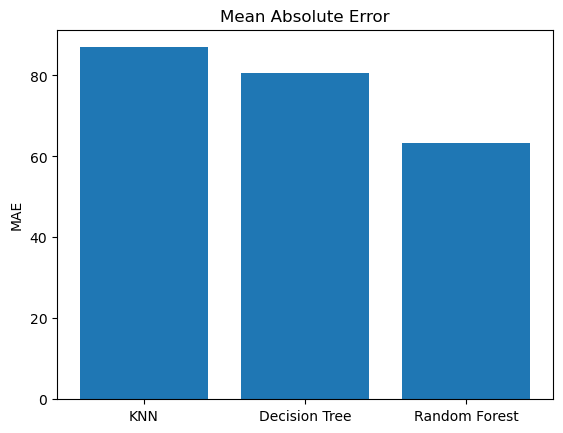

In [291]:
# Evaluation Metric: MAE, MSE, RSquared, MAPE

knn_mae = vz.mae(np.array((y_test)), np.array((knn_predictions)))
knn_mape = vz.mape(np.array((y_test)), np.array((knn_predictions)))
print("KNN Regressor MAE: ", knn_mae)
print("KNN Regressor MAPE", knn_mape)

# MAE and MAPE evaluation of Decision Tree Model
dt_mae = vz.mae(np.array((y_test)), np.array((dt_predictions)))
dt_mape = vz.mape(np.array((y_test)), np.array((dt_predictions)))
print("DT Regressor MAE: ", dt_mae)
print("DTRegressor MAPE", dt_mape)

# MAE and MAPE evaluation of Random Forest Model
rf_mae = vz.mae(np.array((y_test)), np.array((rf_predictions)))
rf_mape = vz.mape(np.array((y_test)), np.array((rf_predictions)))
print("RF Regressor MAE: ", rf_mae)
print("RF Regressor MAPE", rf_mape)

# Mean Absolute Error Visualization
trained_models = ["KNN", "Decision Tree", "Random Forest"]
mae_scores = [knn_mae, dt_mae, rf_mae]
plt.subplot()
plt.bar(trained_models, mae_scores)
plt.ylabel("MAE")
plt.title("Mean Absolute Error")

- The above MAE was analyzed using vz.mae() function
- Based on the visualization,
    - The Random forest error rate is around 62 units which is better than compared to KNN, and DT models.

In [292]:
knn_r2 = vz.rsquare(np.array((y_test)), np.array((knn_predictions)))
print("KNN Regression R^2:", knn_r2)

dt_r2 = vz.rsquare(np.array((y_test)), np.array((dt_predictions)))
print("Decision Tree Regression R^2:", dt_r2)

rf_r2 = vz.rsquare(np.array((y_test)), np.array((rf_predictions)))
print("Random Forest Regression R^2:", rf_r2)

KNN Regression R^2: 0.43700871974687194
Decision Tree Regression R^2: 0.4566947065752187
Random Forest Regression R^2: 0.7220887226957295


Text(0.5, 1.0, 'R-Squared')

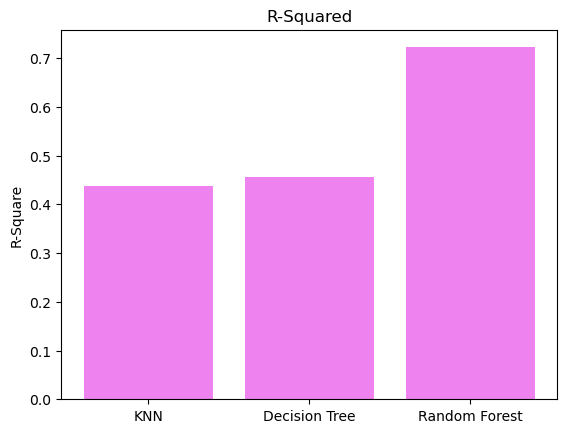

In [293]:
trained_models = ['KNN', 'Decision Tree', 'Random Forest']
r2_scores = [knn_r2, dt_r2, rf_r2]
plt.subplot()
plt.bar(trained_models, r2_scores, color='violet')
plt.ylabel('R-Square')
plt.title('R-Squared')

- The above RSquare analysis was performed using vz.rsquare()
    - Based on the above visualization, the Random forest model produced the predicted values closer to the actual values which indicates the model has better accuracy 
    
#### Note: Considering from performance perspective such as speed, I would go with Decision Tree model.

### Evaluating Model performance using Sklearn

In [294]:
knn_alt_mae = mean_absolute_error(y_test, knn_predictions)
dt_alt_mae = mean_absolute_error(y_test, dt_predictions)
rf_alt_mae = mean_absolute_error(y_test, rf_predictions)
print("KNN Model Evaluation using Sklearn: ", knn_alt_mae)
print("Decision Tree Model Evaluation using Sklearn: ", dt_alt_mae)
print("Random Forest Model Evaluation using Sklearn: ", rf_alt_mae)

KNN Model Evaluation using Sklearn:  86.94490358126721
Decision Tree Model Evaluation using Sklearn:  80.6988062442608
Random Forest Model Evaluation using Sklearn:  63.30717171717171


Text(0.5, 1.0, 'Mean Absolute Error')

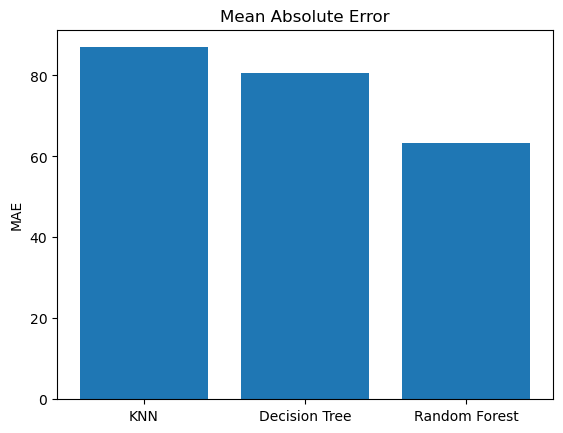

In [300]:
trained_models = ["KNN", "Decision Tree", "Random Forest"]
mae_scores = [knn_mae, dt_mae, rf_mae]
plt.subplot()
plt.bar(trained_models, mae_scores)
plt.ylabel("MAE")
plt.title("Mean Absolute Error")

In [296]:
sample_data = X_test[[15,4,40]]
predict_count = random_forest_regressor.predict(sample_data)
print("The predicted Demand count for the samples:", predict_count)

The predicted Demand count for the samples: [  6.55 144.74 192.56]


#### The above experimentation represents the bike rental demand count prediction based on n-samples